# Session outline: Pandas

- Introduction to Pandas Series object
- Pandas indexing
- DataFrames
- Getting data into / out of Pandas
- Data Cleansing
- Handling time series data
- Aggregation and grouping
- Merging, joining, and concatenating

# What is Pandas, anyway?

**Pan**el **da**ta

- Uses Numpy for efficient data access & manipulation
- Adds labels and indexes for ease of use
- `Series` and `DataFrame` are the two core classes in Pandas

# Pandas Series

The `pandas.Series` object is like a 1-D array with an index.

In [1]:
import pandas as pd

x = pd.Series([1,2,3,4,5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [2]:
(x * 5) + x

0     6
1    12
2    18
3    24
4    30
dtype: int64

In [3]:
pd.Series([1,2,3,4,5], dtype=float)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [4]:
import numpy as np

In [5]:
np.float128

numpy.float128

In [6]:
pd.Series([1,2,'hello'])

0        1
1        2
2    hello
dtype: object

In [7]:
data = pd.Series([1.0, 2, 3, 4, 5])
data

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [8]:
data[3] = 3.14
data

0    1.00
1    2.00
2    3.00
3    3.14
4    5.00
dtype: float64

In [9]:
data[3] = 15
data

0     1.0
1     2.0
2     3.0
3    15.0
4     5.0
dtype: float64

Pandas uses `numpy.array` objects to store data:

In [10]:
data.values

array([ 1.,  2.,  3., 15.,  5.])

# Pandas indexing

To access values (or slices) and Pandas indexes, we can use either the label-based index, or position:

We can use non-integer indexes:

In [11]:
data = pd.Series([1.0, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
data

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64

In [12]:
data['a']

1.0

In [13]:
data[0]

1.0

If we use labels to index, Pandas considers slices _inclusive_ of both bounds:

In [14]:
data['a':'c']

a    1.0
b    2.0
c    3.0
dtype: float64

Using positions, however, Pandas uses normal Python half-open intervals:

In [15]:
data[0:3]

a    1.0
b    2.0
c    3.0
dtype: float64

Pandas has several different index types:

In [16]:
data.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [17]:
pd.Series([0, 1, 2]).index

RangeIndex(start=0, stop=3, step=1)

In [18]:
data = pd.Series(range(100))
data.index

RangeIndex(start=0, stop=100, step=1)

In [19]:
data[::20].index

RangeIndex(start=0, stop=100, step=20)

In [20]:
data[::20][0] = 200

In [24]:
data.head()

0    200
1      1
2      2
3      3
4      4
dtype: int64

In [22]:
data.tail()

95    95
96    96
97    97
98    98
99    99
dtype: int64

## Datetime indexing

In [25]:
from datetime import datetime, date
data = pd.Series(range(300), pd.date_range(date.today(), periods=300, freq='1D'))
data.head()

2019-03-22    0
2019-03-23    1
2019-03-24    2
2019-03-25    3
2019-03-26    4
Freq: D, dtype: int64

In [26]:
data.index

DatetimeIndex(['2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25',
               '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
               '2019-03-30', '2019-03-31',
               ...
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
               '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', length=300, freq='D')

In [27]:
data[::30].index

DatetimeIndex(['2019-03-22', '2019-04-21', '2019-05-21', '2019-06-20',
               '2019-07-20', '2019-08-19', '2019-09-18', '2019-10-18',
               '2019-11-17', '2019-12-17'],
              dtype='datetime64[ns]', freq='30D')

In [28]:
from datetime import datetime, date
data = pd.Series(range(300), pd.date_range(datetime.now(), periods=300, freq='17s'))
data.head()

2019-03-22 16:16:37.583774    0
2019-03-22 16:16:54.583774    1
2019-03-22 16:17:11.583774    2
2019-03-22 16:17:28.583774    3
2019-03-22 16:17:45.583774    4
Freq: 17S, dtype: int64

We can be particularly perverse when using integer-based indexes:

In [29]:
data = pd.Series(range(5), [1, 3, 4, 2, 0])
data

1    0
3    1
4    2
2    3
0    4
dtype: int64

Label-based indexing with a single value!

In [30]:
data[1]

0

In [31]:
data[0]

4

Location-based indexing with slices!

In [32]:
data[0:3]

1    0
3    1
4    2
dtype: int64

## Using .loc and .iloc

To eliminate confusion, Pandas gives us explicit indexing via `.loc` and `.iloc`

**`.loc`** uses label-based indexing
**`.iloc`** uses location-based ("implicit") indexing

In [33]:
data.loc[0]

4

In [34]:
data.iloc[0]

0

In [36]:
data

1    0
3    1
4    2
2    3
0    4
dtype: int64

In [37]:
data.loc[0:3]

Series([], dtype: int64)

In [38]:
data.iloc[0:3]

1    0
3    1
4    2
dtype: int64

In [39]:
data.loc[3:0]

3    1
4    2
2    3
0    4
dtype: int64

# Dict-as-series

In [40]:
population = pd.Series({
    'CA': 38332521,
    'TX': 26448193,
    'NY': 19651127,
    'FL': 19552860,
    'IL': 12882135})
population

CA    38332521
TX    26448193
NY    19651127
FL    19552860
IL    12882135
dtype: int64

In [41]:
population['TX']

26448193

In [42]:
population['NY': 'IL']

NY    19651127
FL    19552860
IL    12882135
dtype: int64

In [43]:
population[1:3]

TX    26448193
NY    19651127
dtype: int64

In [44]:
population.loc['NY': 'IL']

NY    19651127
FL    19552860
IL    12882135
dtype: int64

# Dataframes

Pandas also provides a `DataFrame` object that can be used for 2-D tabular data:

In [45]:
area = pd.Series({
    'CA': 423967, 
    'TX': 695662, 
    'NY': 141297,
    'FL': 170312, 
    'IL': 149995
})
area

CA    423967
TX    695662
NY    141297
FL    170312
IL    149995
dtype: int64

In [48]:
data = pd.DataFrame({'population': population, 'area': area})
data

population    area
CA    38332521  423967
TX    26448193  695662
NY    19651127  141297
FL    19552860  170312
IL    12882135  149995

In [49]:
data['area']

CA    423967
TX    695662
NY    141297
FL    170312
IL    149995
Name: area, dtype: int64

In [50]:
data.area

CA    423967
TX    695662
NY    141297
FL    170312
IL    149995
Name: area, dtype: int64

In [51]:
data[['population']]

population
CA    38332521
TX    26448193
NY    19651127
FL    19552860
IL    12882135

In [52]:
data[['population']].values

array([[38332521],
       [26448193],
       [19651127],
       [19552860],
       [12882135]])

In [53]:
data['population'].values

array([38332521, 26448193, 19651127, 19552860, 12882135])

In [54]:
data['population'].name

'population'

When creating a DataFrame, Pandas conforms the indexes of the Series objects to a shared index, filling in NaN where it can't:

In [55]:
area = pd.Series({
    'CA': 423967, 
    'TX': 695662, 
    'NY': 141297,
    'FL': 170312, 
    'IL': 149995,
    'GA': 153910,
})
area

CA    423967
TX    695662
NY    141297
FL    170312
IL    149995
GA    153910
dtype: int64

In [58]:
population

CA    38332521
TX    26448193
NY    19651127
FL    19552860
IL    12882135
dtype: int64

In [56]:
data = pd.DataFrame({'population': population, 'area': area})
data

population    area
CA  38332521.0  423967
FL  19552860.0  170312
GA         NaN  153910
IL  12882135.0  149995
NY  19651127.0  141297
TX  26448193.0  695662

In [59]:
data.index

Index(['CA', 'FL', 'GA', 'IL', 'NY', 'TX'], dtype='object')

In [60]:
data.columns

Index(['population', 'area'], dtype='object')

# NaN

In [61]:
import numpy as np

In [62]:
None == None

True

In [63]:
None is None

True

In [64]:
np.nan is np.nan

True

In [65]:
np.nan == np.nan, np.nan < np.nan, np.nan > np.nan

(False, False, False)

In [66]:
pd.NaT is np.nan

False

In [67]:
type(pd.NaT).mro()

[pandas._libs.tslibs.nattype.NaTType,
 pandas._libs.tslibs.nattype._NaT,
 datetime.datetime,
 datetime.date,
 object]

To get a series back, we can simply access the `DataFrame` like a dict:

In [68]:
data['area']

CA    423967
FL    170312
GA    153910
IL    149995
NY    141297
TX    695662
Name: area, dtype: int64

In [69]:
data.area

CA    423967
FL    170312
GA    153910
IL    149995
NY    141297
TX    695662
Name: area, dtype: int64

We can give a list of columns to get a sub-dataframe:

In [70]:
data[['area', 'area', 'area']]

area    area    area
CA  423967  423967  423967
FL  170312  170312  170312
GA  153910  153910  153910
IL  149995  149995  149995
NY  141297  141297  141297
TX  695662  695662  695662

In [71]:
data['population']['GA'] = 10.43e6

/Users/rick446/.virtualenvs/advanced-python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
data

population    area
CA  38332521.0  423967
FL  19552860.0  170312
GA  10430000.0  153910
IL  12882135.0  149995
NY  19651127.0  141297
TX  26448193.0  695662

## Indexing a DataFrame

It's clearer to use the `.loc` and `.iloc` indexers when updating DataFrames

In [73]:
data.loc['GA']

population    10430000.0
area            153910.0
Name: GA, dtype: float64

In [75]:
data.loc['GA', 'population']

10430000.0

In [76]:
data.loc['GA', 'population'] = 10.31e6

In [77]:
data

population    area
CA  38332521.0  423967
FL  19552860.0  170312
GA  10310000.0  153910
IL  12882135.0  149995
NY  19651127.0  141297
TX  26448193.0  695662

In [79]:
data['density'] = data.population / data.area

In [80]:
data

population    area     density
CA  38332521.0  423967   90.413926
FL  19552860.0  170312  114.806121
GA  10310000.0  153910   66.987200
IL  12882135.0  149995   85.883763
NY  19651127.0  141297  139.076746
TX  26448193.0  695662   38.018740

Multi-dimensional slicing works, too.

In [81]:
data.loc['FL': 'IL', 'area']

FL    170312
GA    153910
IL    149995
Name: area, dtype: int64

# Filtering

In [82]:
data.population > 15e6

CA     True
FL     True
GA    False
IL    False
NY     True
TX     True
Name: population, dtype: bool

In [83]:
data.loc[[True, True, False, False, True, True]]

population    area     density
CA  38332521.0  423967   90.413926
FL  19552860.0  170312  114.806121
NY  19651127.0  141297  139.076746
TX  26448193.0  695662   38.018740

In [84]:
data.loc[data.population > 15e6]

population    area     density
CA  38332521.0  423967   90.413926
FL  19552860.0  170312  114.806121
NY  19651127.0  141297  139.076746
TX  26448193.0  695662   38.018740

In [85]:
data.loc['GA', 'population'] = np.nan

In [86]:
data

population    area     density
CA  38332521.0  423967   90.413926
FL  19552860.0  170312  114.806121
GA         NaN  153910   66.987200
IL  12882135.0  149995   85.883763
NY  19651127.0  141297  139.076746
TX  26448193.0  695662   38.018740

In [87]:
data.dropna()

population    area     density
CA  38332521.0  423967   90.413926
FL  19552860.0  170312  114.806121
IL  12882135.0  149995   85.883763
NY  19651127.0  141297  139.076746
TX  26448193.0  695662   38.018740

In [88]:
data.loc[data.population.isnull() | (data.population > 30e6)]

population    area    density
CA  38332521.0  423967  90.413926
GA         NaN  153910  66.987200

In [89]:
data.dropna(axis=1)

area     density
CA  423967   90.413926
FL  170312  114.806121
GA  153910   66.987200
IL  149995   85.883763
NY  141297  139.076746
TX  695662   38.018740

# Getting data into / out of Pandas

Pandas comes with some convenient data sources

In [91]:
!pip install pandas_datareader

  Using cached https://files.pythonhosted.org/packages/cc/5c/ea5b6dcfd0f55c5fb1e37fb45335ec01cceca199b8a79339137f5ed269e0/pandas_datareader-0.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/b2/0f71ca90b0ade7fad27e3d20327c996c6252a2ffe88f50a95bba7434eda9/wrapt-1.11.1.tar.gz
  Running setup.py install for wrapt ... done
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [92]:
# I have to do this because Pandas is currently ahead of pandas_datareader:
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web

In [93]:
start, end = datetime(2014, 1, 1), datetime(2018, 1, 1)
data = web.DataReader(['F', 'TSLA', 'GOOG', 'IBM', 'AAPL', 'CRM'], 'iex', start, end)


In [94]:
type(data)

pandas.core.frame.DataFrame

In [95]:
data.keys()

MultiIndex(levels=[['open', 'high', 'low', 'close', 'volume'], ['AAPL', 'CRM', 'F', 'GOOG', 'IBM', 'TSLA']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=['Attributes', 'Symbols'])

In [96]:
data.head()

Attributes     open                                              high  \
Symbols        AAPL    CRM        F   GOOG       IBM    TSLA     AAPL   
date                                                                    
2014-03-24  70.7117  57.51  11.7963    NaN  156.2531  229.75  70.9849   
2014-03-25  71.1162  56.81  11.7506    NaN  157.3618  224.14  71.6744   
2014-03-26  71.7755  57.08  11.7201    NaN  162.5472  221.95  72.1012   
2014-03-27  70.9212  55.00  11.6211  568.0  159.9879  212.37  71.1162   
2014-03-28  70.6986  56.07  11.6744  561.2  158.3455  212.80  70.7800   

Attributes                            ...    close                            \
Symbols         CRM        F    GOOG  ...        F    GOOG       IBM    TSLA   
date                                  ...                                      
2014-03-24  57.5500  11.8421     NaN  ...  11.7277     NaN  156.9367  220.17   
2014-03-25  58.1013  11.7811     NaN  ...  11.6820     NaN  162.5972  220.44   
2014-03-26  57.2100  11.7658     NaN  ...  11.6211     NaN  160.5798  212.96   
2014-03-27  56.6600  11.7201  568.00  ...  11.6211  558.46  158.2538  207.32   
2014-03-28  56.9400  11.8725  566.43  ...  11.7735  559.99  158.7707  212.37   

Attributes      volume                                                          
Symbols           AAPL        CRM           F     GOOG         IBM        TSLA  
date                                                                            
2014-03-24  88924871.0  6299376.0  27033551.0      NaN   5738492.0  11332947.0  
2014-03-25  70573356.0  7589329.0  24656682.0      NaN  10912699.0   7865375.0  
2014-03-26  74942224.0  6485360.0  24444055.0      NaN   6851772.0   6907306.0  
2014-03-27  55507676.0  6206120.0  28244793.0  13052.0   6767653.0   9505307.0  
2014-03-28  50141063.0  5109517.0  36615051.0  41003.0   5194443.0   9684761.0  

[5 rows x 30 columns]

In [97]:
data['TSLA'].head()

KeyError: 'TSLA'

In [ ]:
closing_prices = pd.DataFrame({
    ticker: data[ticker].close
    for ticker in data
})
closing_prices.head()

In [ ]:
closing_prices.tail()

In [ ]:
%matplotlib inline

In [ ]:
closing_prices.describe()

In [ ]:
closing_prices.plot()

We can also read CSV data, if we have it:

In [99]:
!head data/closing-prices.csv

,F,TSLA,GOOG,IBM,AAPL
2014-01-02,12.089,150.1,,157.6001,72.7741
2014-01-03,12.1438,149.56,,158.543,71.1756
2014-01-06,12.1986,147.0,,157.9993,71.5637
2014-01-07,12.042,149.36,,161.1508,71.0516
2014-01-08,12.1673,151.28,,159.6728,71.5019
2014-01-09,12.4022,147.53,,159.1716,70.5887
2014-01-10,12.5822,145.7199,,159.0696,70.1178
2014-01-13,12.6136,139.34,,156.4363,70.4849
2014-01-14,12.8406,161.27,,157.9314,71.8874


In [100]:
closing_prices = pd.read_csv('data/closing-prices.csv')
closing_prices.head()

Unnamed: 0        F    TSLA  GOOG       IBM     AAPL
0  2014-01-02  12.0890  150.10   NaN  157.6001  72.7741
1  2014-01-03  12.1438  149.56   NaN  158.5430  71.1756
2  2014-01-06  12.1986  147.00   NaN  157.9993  71.5637
3  2014-01-07  12.0420  149.36   NaN  161.1508  71.0516
4  2014-01-08  12.1673  151.28   NaN  159.6728  71.5019

We can use various options with read_csv to get better data:

In [1]:
import pandas as pd
closing_prices = pd.read_csv('data/closing-prices.csv', index_col=0, parse_dates=[0])
closing_prices.head()

F    TSLA  GOOG       IBM     AAPL
2014-01-02  12.0890  150.10   NaN  157.6001  72.7741
2014-01-03  12.1438  149.56   NaN  158.5430  71.1756
2014-01-06  12.1986  147.00   NaN  157.9993  71.5637
2014-01-07  12.0420  149.36   NaN  161.1508  71.0516
2014-01-08  12.1673  151.28   NaN  159.6728  71.5019

We can use strings to index dates:

In [2]:
%matplotlib inline

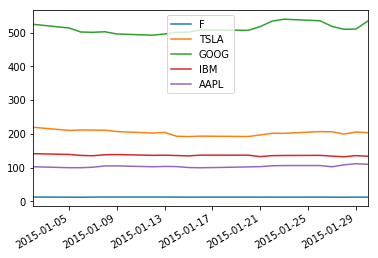

In [3]:
closing_prices['01/02/2015': '2015-02-01'].plot()

# Data cleansing with Pandas

We might want to ensure we have all the days in the range:

In [4]:
closing_prices.index.min()

Timestamp('2014-01-02 00:00:00')

In [5]:
closing_prices.index.max()

Timestamp('2017-12-29 00:00:00')

In [6]:
data = pd.DataFrame(index=pd.date_range(
    start=closing_prices.index.min(), 
    end=closing_prices.index.max()
))

In [7]:
for ticker in closing_prices.columns:
    data[ticker] = closing_prices[ticker]

In [8]:
data.head()

F    TSLA  GOOG       IBM     AAPL
2014-01-02  12.0890  150.10   NaN  157.6001  72.7741
2014-01-03  12.1438  149.56   NaN  158.5430  71.1756
2014-01-04      NaN     NaN   NaN       NaN      NaN
2014-01-05      NaN     NaN   NaN       NaN      NaN
2014-01-06  12.1986  147.00   NaN  157.9993  71.5637

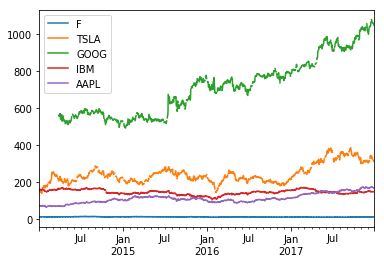

In [9]:
data.plot();

# What do we do with NaNs?

For GOOG data, we probably want to leave them

For other data, maybe forward-fill?

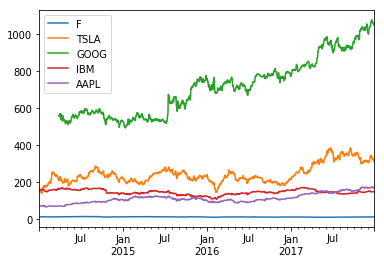

In [10]:
data.fillna(method='ffill').plot()

## Cleaning up string data

First, let's make some reasonably dirty data:

In [12]:
import numpy as np
data = pd.read_csv('data/dirty_prices.csv', )
data.head()

sku category      price
0  sku0000  Toilets  $2,085.11
1  sku0001     Misc  $3,601.62
2  sku0002     Misc      $0.57
3  sku0003  Faucets  $1,511.66
4  sku0004  Toilets    $733.78

# Question: what's the median price?

First, a naive approach:

In [13]:
data.price.mean()

TypeError: Could not convert $2,085.11$3,601.62$0.57$1,511.66$733.78$461.69$931.30$1,727.80$1,983.84$2,694.08$2,095.97$3,426.10$1,022.26$4,390.59$136.94$3,352.34$2,086.52$2,793.45$701.93$990.51$4,003.72$4,841.31$1,567.12$3,461.61$4,381.95$4,473.03$425.22$195.27$849.15$4,390.71$491.73$2,105.54$4,789.45$2,665.83$3,459.39$1,577.58$3,432.50$4,173.13$91.44$3,750.72$4,944.31$3,740.83$1,402.22$3,946.40$516.13$2,239.47$4,542.98$1,468.07$1,438.88$650.14$96.83$3,394.18$1,058.14$1,327.73$2,457.87$266.81$2,870.59$733.64$2,946.53$3,498.79$511.67$2,070.28$3,472.00$2,070.90$249.77$2,679.48$3,318.97$2,574.45$4,722.97$2,932.78$4,517.01$687.37$696.38$4,036.96$1,988.38$826.77$4,637.54$1,738.83$3,754.06$3,629.99$4,416.53$3,118.36$3,754.71$1,744.49$1,349.64$4,479.43$2,140.46$4,824.20$3,317.21$3,108.48$573.73$4,747.45$2,249.56$2,891.95$2,040.68$1,185.13$4,516.90$2,868.40$14.35$3,085.72$1,633.22$2,635.29$4,429.71$1,786.35$4,542.68$3,116.80$79.11$4,647.19$3,454.48$4,986.61$861.70$685.68$4,662.98$3,484.09$330.00$3,777.32$3,769.38$4,615.12$3,557.62$621.35$99.40$131.05$141.53$1,231.06$4,300.14$2,694.16$2,764.11$4,210.15$620.87$1,395.92$2,928.80$4,847.98$2,805.15$93.24$4,003.16$1,164.87$4,035.53$1,939.30$4,317.71$3,735.61$2,781.20$682.28$299.59$606.72$222.76$537.47$1,128.55$3,564.94$2,798.58$62.78$359.87$4,836.38$2,840.50$1,016.47$1,261.63$3,719.13$977.15$2,906.79$4,850.10$4,234.14$1,199.24$2,468.85$3,099.78$4,144.90$783.96$92.88$350.11$2,431.73$3,031.65$2,844.26$1,586.81$4,943.08$2,898.73$1,900.71$2,754.74$3,726.67$3,346.16$1,324.60$331.67$1,850.42$3,148.59$1,050.87$3,763.78$332.68$1,301.58$4,023.77$967.17$3,197.30$2,623.35$4,624.04$1,316.48$329.81$3,675.33$3,860.89$4,539.08$4,659.86$69.76$1,171.81$3,083.89$4,745.08$4,750.88$2,783.27$4,578.03$3,207.83$1,950.04$2,429.95$3,021.55$2,747.74$4,630.91$4,593.67$1,974.38$4,816.31$869.78$631.65$675.40$2,528.31$107.62$4,739.85$4,135.58$75.09$880.98$1,660.32$654.98$4,047.45$1,723.68$4,700.54$2,910.07$4,394.16$4,223.67$4,526.96$2,299.40$2,731.73$3,993.02$1,428.59$2,451.27$2,995.55$77.67$2,967.41$2,168.38$4,036.80$1,576.22$4,464.44$2,889.29$920.05$3,939.65$3,060.16$269.55$2,100.97$3,395.34$4,593.01$2.01$4,883.80$1,882.90$4,868.92$3,023.58$4,144.23$2,873.56$3,140.38$1,427.88$2,934.17$3,750.11$4,291.57$3,775.41$3,490.29$4,322.40$1,613.40$3,353.94$2,254.37$1,910.51$2,054.06$2,007.40$1,586.92$3,109.60$2,151.24$4,869.01$3,389.00$992.85$2,133.51$1,716.73$3,988.19$4,399.99$4,519.21$3,313.60$1,351.04$1,261.83$4,274.49$2,638.57$4,010.81$2,862.44$3,665.71$2,595.06$3,854.42$2,844.29$2,328.55$1,713.44$341.05$1,889.62$398.13$4,914.09$908.06$4,059.29$4,374.81$3,442.07$2,847.47$804.86$2,334.40$1,725.86$1,125.20$2,962.56$1,561.35$4,581.53$4,548.18$1,285.59$554.46$964.81$2,497.92$3,642.93$1,040.97$1,240.17$4,258.36$2,079.24$3,083.43$1,168.33$509.84$2,579.29$2,385.70$763.36$3,109.03$2,720.05$3,270.69$722.73$3,757.64$1,110.25$2,596.76$3,926.48$111.65$1,621.81$4,364.61$4,223.55$2,692.20$4,333.04$4,749.03$4,132.03$4,270.58$493.72$3,256.52$3,517.58$3,051.20$3,998.08$172.86$3,851.19$3,658.64$1,298.49$1,285.35$3,161.52$1,726.49$3,982.94$2,230.73$3,913.75$4,952.36$1,501.24$715.03$4,506.54$2,707.80$4,873.70$3,183.02$4,969.57$2,730.35$2,632.13$677.14$1,778.53$131.09$801.98$3,728.19$152.00$1,832.72$4,311.73$3,463.39$3,454.71$943.18$2,209.52$2,907.89$4,948.76$1,019.53$1,238.66$1,310.87$3,750.86$2,284.88$284.65$2,542.58$1,059.80$3,993.02$1,486.66$138.03$2,967.16$4,219.20$1,905.08$3,749.29$2,555.71$2,704.76$4,797.17$4,019.80$161.62$3,546.94$2,325.01$4,737.74$1,107.16$1,335.36$407.37$2,143.09$545.09$3,168.93$4,014.82$3,484.00$3,831.06$1,712.27$4,229.26$2,143.84$4,120.05$3,132.48$717.12$391.93$91.66$333.62$2,292.92$566.71$138.92$3,774.31$1,974.25$3,734.69$2,262.02$2,250.43$2,390.36$2,370.02$4,015.82$2,011.96$4,523.43$185.31$3,869.37$628.21$3,092.57$51.82$2,693.14$15.09$4,755.97$4,527.01$3,979.83$4,576.37$727.79$788.65$938.16$3,112.48$4,529.05$4,949.78$3,555.61$3,659.00$4,546.47$2,004.37$1,249.25$867.15$597.29$4,063.05$733.96$1,321.49$4,095.45$1,552.94$4,912.09$1,333.19$2,668.27$1,572.34$4,553.86$1,832.78$2,167.96$2,561.46$4,694.43$154.75$3,584.39$4,455.09$136.44$2,610.26$1,629.95$4,297.45$2,792.58$3,451.14$2,264.27$3,141.55$1,450.48$46.74$2,883.78$1,557.22$2,586.34$4,582.03$2,132.37$1,236.98$1,856.47$4,659.31$4,684.34$4,221.65$4,601.03$1,139.50$437.41$1,136.55$1,571.88$873.83$3,035.47$2,067.93$4,081.76$925.65$3,509.38$1,201.78$2,871.10$1,744.94$284.82$1,144.07$3,320.51$2,486.25$2,595.08$873.60$2,853.58$4,983.77$4,084.18$2,971.86$4,879.95$4,507.81$2,978.04$162.13$467.89$326.86$2,258.67$1,877.17$4,876.75$839.92$4,863.94$3,837.37$4,121.19$3,163.08$3,343.66$2,384.41$65.68$1,765.03$2,460.36$3,650.46$2,343.14$2,287.02$688.31$54.44$3,791.39$1,599.76$4,921.92$1,101.17$1,693.54$2,619.48$3,774.46$2,319.29$624.11$1,562.51$2,522.60$3,369.25$3,850.75$651.68$114.58$2,595.41$4,049.94$63.02$3,362.35$3,434.04$2,246.23$4,573.94$3,221.81$26.20$2,422.14$4,296.59$4,152.00$3,245.77$3,368.49$2,892.50$1,370.60$2,802.65$3,358.65$1,762.15$4,279.14$975.19$3,736.60$1,448.01$3,869.00$2,138.69$4,038.49$1,767.67$1,068.47$3,836.42$1,543.21$3,666.23$3,722.37$1,106.98$1,070.56$994.74$712.59$1,885.41$133.14$554.60$3,372.82$3,998.88$402.65$1,158.51$1,038.13$4,586.67$3,556.57$2,769.42$1,522.59$4,174.27$2,176.53$4,617.28$3,530.26$2,390.16$631.05$4,880.22$799.17$1,013.01$2,155.91$20,210,095.29$733.76$3,646.59$943.73$3,219.48$3,771.53$1,053.66$3,004.77$3,744.64$3,191.09$2,985.64$1,477.41$3,658.03$4,726.54$2,127.81$3,910.91$280.71$4,176.36$961.25$1,975.48$1,500.41$400.52$4,523.16$1,850.77$2,653.49$2,470.58$660.81$1,032.27$380.94$2,539.61$1,307.75$1,785.31$540.33$3,937.76$532.92$4,928.54$885.81$2,862.03$224.23$3,935.58$948.03$2,639.52$3,700.39$749.66$2,755.44$1,083.09$3,795.98$3,614.58$882.75$4,309.83$98.88$4,301.18$2,794.52$2,016.10$3,793.73$3,584.65$4,936.63$1,390.43$18.97$4,669.51$4,289.49$3,644.25$2,583.44$3,534.78$3,902.65$1,874.38$3,851.61$3,753.12$3,066.06$2,009.33$3,486.54$15.56$3,874.48$4,482.08$1,196.58$603.84$1,101.42$1,510.48$4,415.14$2,715.83$1,433.56$691.77$1,450.72$3,069.36$1,620.69$2,286.80$2,220.59$4,140.68$2,131.74$1,728.49$3,374.86$1,107.41$2,336.23$1,573.83$3,134.28$4,386.80$2,238.45$3,922.29$2,284.83$3,281.15$659.20$2,164.91$4,546.56$3,027.40$3,833.87$2,523.50$2,490.28$4,214.50$339.03$2,866.36$4,713.81$2,589.30$972.33$4,239.70$1,258.20$3,503.63$2,701.30$4,744.18$3,121.68$4,189.89$39.66$4,946.70$388.57$1,610.65$4,730.76$44.70$4,113.65$4,306.06$2,199.15$1,278.73$4,013.45$2,389.31$671.69$4,639.24$4,479.85$2,457.73$4,283.51$2,092.89$3,417.32$1,989.95$2,528.71$947.76$4,824.94$1,471.08$517.30$721.58$70.46$3,579.73$2,822.49$3,972.89$2,535.40$3,959.11$3,478.82$3,889.24$2,032.41$3,238.85$898.97$1,609.10$863.02$2,043.19$1,207.09$2,034.61$4,876.11$1,601.60$4,912.45$3,181.53$1,875.46$4,287.42$3,097.93$1,260.17$3,964.28$2,164.69$1,787.56$1,651.38$3,486.84$1,343.25$4,041.39$1,476.44$2,720.61$2,439.61$4,276.78$4,441.93$921.92$2,926.74$4,491.03$2,230.59$4,609.34$1,394.95$3,044.16$3,412.27$1,141.03$68.84$2,083.62$4,692.41$1,715.14$3,898.72$873.68$1,709.76$722.99$3,583.85$3,496.54$3,442.49$1,266.98$3,461.80$1,136.49$2,123.25$1,859.61$1,776.54$288.27$3,158.23$3,536.58$3,067.94$3,241.56$849.70$747.23$2,570.88$4,376.66$919.77$2,314.20$2,144.66$2,486.45$807.55$1,712.20$1,309.40$4,222.63$4,001.66$2,133.20$3,035.08$727.33$2,548.07$1,484.74$4,298.25$3,357.99$3,167.37$623.76$2,352.94$4,932.86$4,741.50$3,225.43$758.62$3,195.63$2,828.31$2,343.33$2,140.19$2,996.35$4,249.85$3,755.61$2,896.80$4,623.52$323.70$4,956.73$264.97$997.48$2,113.76$537.54$3,118.35$239.96$1,423.12$305.18$3,517.60$3,342.28$1,892.90$940.97$3,735.02$1,701.90$3,976.51$2,439.50$2,628.35$142.45$3,221.16$1,753.28$1,146.03$2,169.42$1,912.34$2,348.95$4,897.42$1,821.89$3,872.05$2,763.84$4,445.66$1,774.76$1,227.59$4,555.10$217.67$4,753.77$2,782.03$1,881.82$4,975.26$291.81$2,583.53$155.49$2,855.88$902.34$3,154.80$4,904.62$4,374.51$2,259.18$3,542.30$3,887.34$2,474.22$2,642.67$753.92$1,847.00$711.11$3,634.47$2,385.06$2,244.39$4,429.99$2,638.09$2,045.45$1,344.46$360.06$2,090.68$128.77$1,455.77$2,517.55$4,829.67$546.91$3,365.21$2,499.66$3,885.49$718.03$416.01$1,996.09$3,984.81$958.38$3,838.89$1,451.49$1,084.46$83.58$1,993.30$1,905.41$3,296.72$354.59$763.02$82.88$568.98$3,258.95$2,013.28$1,605.13$2,789.56$4,967.30$4,172.43$3,498.12$4,591.29$198.64$351.67$2,370.03$1,745.84$4,686.26$2,447.82$2,698.25$4,476.30$2,233.18$4,385.17$1,267.91$1,369.05$1,641.81$2,737.82$1,100.64$3,357.15$713.97$470.50$4,350.96$1,184.34$1,930.02$2,857.71$2,629.01$380.12$4,370.63$4,755.68$4,062.54$1,419.01$2,639.23$1,697.08$2,773.34$4,872.02$1,558.51$3,343.98$1,629.84$3,872.39$1,629.05$4,449.14$3,758.54$3,813.16$2,347.40$1,053.82$207.38$1,609.14$185.56$3,469.28$3,351.75$2,152.36$3,838.94$2,680.04$199.30$673.97$967.08$1,678.32$261.56$3,025.58$2,560.31$3,087.31$2,161.78$4,238.50$2,270.30$77.02$4,365.34$3,281.01$4,115.02$4,758.88$254.56$1,175.36$316.72$2,108.29$4,319.15$408.12$2,365.56$627.72$3,864.43$4,207.11$216.45$2,432.20$1,197.06$4,762.37$4,719.46$3,069.67$4,867.44$1,724.31$4,489.25$2,172.97$1,179.07$4,704.14$3,421.09$324.56$4,352.12$3,506.90$3,024.63$3,661.87$1,267.20$3,002.44$4,073.10$270.57$652.55$4,212.23$3,091.73$2,656.44$1,241.45$1,475.39$4,363.43$2,108.33$322.15$4,484.93$1,016.90$4,131.14$4,408.85$2,433.75$2,992.32$2,636.34$3,124.11$4,275.21$1,410.70$4,418.78$2,838.45$575.52$1,135.01$2,979.91$1,197.23$657.08$809.24$4,224.36$3,010.92$4,817.84$1,728.40$2,978.13$2,994.93$3,078.52$295.89$3,751.59$4,741.05$2,673.40$962.78$3,764.63$36.59$1,641.28$4,588.03$2,941.84$4,275.95$3,023.36$4,112.89$4,397.42$1,604.93$614.77$3,606.52$2,201.74$633.68$2,949.12$180.34$1,000.91$3,941.51$60.48$1,516.73$106.88$4,987.42$2,910.15$1,466.88$4,644.75$2,535.60$2,273.46$2,939.36$1,320.69$1,526.44$1,858.27$1,222.24$2,922.74$3,479.23$359.74$4,855.42$3,765.35$4,030.82$3,758.20$400.30$2,408.48$2,228.36$3,362.36$2,243.69$3,521.57$3,408.23$3,485.74$3,093.00$754.90$3,804.01$3,905.23$4,520.51$1,168.84$883.39$1,955.50$1,602.82$4,077.38$3,067.63$3,800.01$2,138.33$497.20$575.18$1,867.04$969.24$4,103.73$2,998.18$3,444.23$2,455.55$440.87$1,175.39$2,308.01$992.96$127.38$3,646.99$3,624.58$1,651.96$4,217.47$2,142.21$4,323.43$3,285.33$2,905.18$1,003.64$2,647.73$4,472.16$1,524.97$4,354.73$4,543.73$1,649.22$3,415.37$4,496.10$378.48$4,392.94$954.20$4,248.84$3,335.59$1,721.70$756.88$3,176.85$4,238.94$4,109.25$3,141.20$4,781.51$2,949.62$989.16$2,146.65$1,683.73$4,959.73$1,901.18$4,963.50$2,594.02$861.40$372.87$1,851.53$617.09$3,172.59$2,069.60$4,954.58$4,649.78$746.18$1,974.41$2,307.90$2,804.74$3,901.82$2,435.97$2,099.97$1,310.00$4,554.03$111.36$4,105.61$942.34$3,428.78$1,776.05$4,871.06$613.86$937.85$4,447.21$2,917.03$1,546.23$3.82$1,137.99$727.02$1,017.17$4,481.61$4,365.47$3,501.45$2,352.49$4,135.68$2,479.13$1,817.44$1,378.02$4,623.70$1,934.95$2,464.40$1,272.19$4,424.83$1,916.32$1,487.87$3,587.97$954.35$590.96$4,184.99$3,720.68$2,952.60$1,214.46$3,116.24$3,191.78$1,637.85$337.45$4,402.69$2,299.78$3,819.36$1,269.44$2,956.94$2,143.98$1,910.50$633.57$1,221.33$396.71$1,514.29$3,708.52$3,075.08$3,362.06$41.92$3,391.88$2,515.90$1,154.54$874.48$924.91$4,221.30$4,912.95$4,568.70$1,736.85$3,901.12$2,732.27$4,082.21$2,418.63$2,949.76$3,936.32$501.17$2,685.04$1,829.92$3,021.53$4,794.01$1,964.11$1,964.86$3,953.18$3,225.39$1,969.42$3,444.78$2,020.01$680.57$2,253.22$1,672.10$1,089.84$4,628.87$3,448.20$2,994.10$3,733.29$2,709.86$3,502.67$4,652.80$4,313.08$837.21$1,315.70$358.05$4,893.36$1,181.92$3,302.99$448.15$1,053.85$2,514.12$524.77$1,944.37$2,689.94$1,696.02$2,779.50$2,683.84$1,953.05$3,481.35$3,392.41$3,436.52$2,807.46$1,790.40$3,065.56$4,678.68$2,984.44$4,897.95$2,205.03$3,698.06$188.02$3,823.63$2,591.41$26.58$1,386.00$2,674.16$3,839.81$265.46$2,745.27$4,004.97$3,247.92$4,657.24$373.66$1,384.03$4,596.19$3,825.03$2,998.70$4,164.84$4,480.22$4,863.60$4,992.60$698.25$352.71$367.33$73.72$4,859.10$473.83$4,208.68$3,425.86$2,437.79$1,733.47$1,768.24$1,269.19$4,555.09$3,628.21$129.63$2,307.61$1,406.51$144.83$4,423.41$3,855.03$1,648.68$3,982.79$1,623.19$1,539.41$4,640.55$4,884.58$2,617.78$4,759.68$4,439.98$2,590.16$1,863.74$3,551.77$2,278.22$3,026.06$4,952.03$3,869.58$1,671.38$444.99$924.53$2,634.26$2,085.51$4,003.30$4,666.01$889.32$4,300.33$4,786.97$4,797.35$189.31$287.92$28.99$1,563.41$278.49$1,469.31$1,780.08$4,768.39$2,384.75$1,391.19$2,515.03$3,216.79$556.23$3,790.31$4,259.73$4,221.25$4,452.53$1,909.21$2,219.03$507.91$1,129.03$4,856.60$1,423.12$4,536.98$4,452.76$4,612.52$780.75$4,398.61$3,159.97$1,053.14$1,725.58$799.59$2,221.74$418.87$826.59$985.98$3,455.14$2,869.01$4,366.62$1,223.17$3,148.04$172.16$2,580.99$4,316.13$4,920.63$49.36$1,264.21$1,119.25$237.69$50.86$2,450.98$227.41$1,391.64$3,199.87$1,473.46$1,348.27$2,952.73$1,902.67$3,512.62$2,480.62$3,166.05$1,766.97$1,435.22$666.04$4,685.40$4,024.18$4,690.14$926.90$4,665.78$4,678.77$1,417.72$1,373.17$2,757.16$926.45$2,210.51$926.59$4,736.88$2,469.12$4,819.59$3,224.71$2,421.58$4,838.48$715.95$3,161.65$3,309.44$2,169.20$296.79$2,463.61$2,325.67$4,033.73$1,283.30$1,957.15$1,200.86$3,432.22$4,949.42$887.15$4,107.23$1,154.94$289.88$694.08$4,675.77$4,442.71$1,446.30$4,738.82$4,249.65$2,173.27$2,340.25$3,149.27$790.16$73.91$1,327.56$77.22$3,372.49$2,757.34$1,608.24$3,901.01$728.93$1,224.40$1,461.57$979.66$439.69$4,349.88$440.94$3,418.55$602.00$53.50$2,786.34$4,535.55$4,302.28$1,692.26$135.79$4,004.30$4,029.92$4,342.44$3,348.23$4,038.89$4,487.49$2,269.15$2,789.13$2,530.66$3,459.92$3,414.53$2,601.57$4,142.34$2,528.90$4,124.29$1,409.23$892.47$4,849.35$3,709.70$1,298.96$2,906.18$4,776.31$403.77$417.67$3,095.67$1,122.47$3,825.92$2,840.76$3,330.94$539.07$421.42$3,125.61$2,048.66$436.26$1,855.32$3,360.72$947.94$4,478.65$4,749.23$4,807.86$3,650.41$2,031.44$3,718.75$1,439.93$1,572.09$3,029.48$2,974.24$4,393.30$1,273.00$3,830.94$4,705.07$5.16$2,380.45$3,285.20$4,216.62$918.70$4,280.80$1,821.83$4,461.37$138.56$426.95$4,907.05$3,047.51$2,088.16$846.07$3,249.51$184.88$1,558.07$1,617.40$3,037.21$3,254.16$4,230.27$4,637.90$3,302.29$2,890.87$1,993.58$4,833.06$770.40$4,475.43$1,555.07$2,742.45$3,410.33$1,182.35$838.68$2,542.41$3,959.32$3,462.07$594.87$4,503.71$2,398.69$4,733.38$2,767.17$424.01$1,012.32$4,271.19$3,529.64$4,474.70$1,645.73$2,640.01$3,251.99$2,971.45$1,157.31$2,134.11$1,240.56$4,228.07$4,933.39$332.85$3,569.64$1,650.58$3,127.18$1,290.65$3,255.04$1,855.74$1,474.10$4,558.82$4,712.49$3,067.75$1,072.34$4,697.09$3,752.27$3,755.45$1,058.61$4,150.78$1,200.48$3,158.10$3,553.70$3,711.92$1,951.32$3,799.13$4,514.68$2,937.10$452.05$644.88$526.31$863.64$632.15$3,891.50$197.06$1,207.79$4,395.33$4,867.59$3,027.11$4,881.19$217.26$4,742.86$1,556.48$3,994.86$4,053.15$4,299.99$2,292.75$4,653.22$1,289.46$4,672.23$3,095.60$4,927.22$163.22$3,625.83$2,827.77$2,462.12$1,296.09$1,634.15$1,247.31$1,096.34$3,998.30$2,511.98$415.95$3,884.92$2,668.25$3,696.94$2,576.97$1,999.73$4,931.23$141.21$4,663.82$4,654.27$1,954.59$1,072.32$3,096.07$889.86$4,016.04$1,269.67$1,454.03$4,579.58$4,514.58$2,676.90$4,314.19$1,762.66$4,989.42$2,168.45$1,474.06$207.87$4,948.53$2,324.44$3,672.93$3,204.04$3,615.47$255.55$4,600.23$4,634.21$2,759.98$4,819.58$1,404.78$3,010.73$1,982.31$3,140.12$1,503.16$4,096.79$348.93$209.39$246.98$752.28$1,976.75$4,776.95$553.98$3,237.76$2,638.11$1,766.21$991.00$1,102.97$219.11$3,565.82$3,269.20$2,218.85$3,594.70$549.88$4,693.60$4,238.13$3,295.18$1,894.16$2,082.83$2,410.77$4,676.42$4,317.96$2,389.62$2,772.59$4,377.02$4,746.32$3,195.92$3,742.60$1,758.12$4,590.14$4,183.76$2,760.28$4,338.14$4,249.36$4,042.06$653.46$2,680.01$4,503.92$3,854.16$2,103.57$4,889.40$1,253.87$1,668.05$4,771.00$4,043.58$4,501.70$57.95$1,898.82$1,177.61$1,479.68$3,689.98$3,620.42$2,309.00$1,826.37$2,923.46$2,668.54$2,752.90$3,077.39$1,978.24$3,858.59$1,256.02$3,278.80$4,801.99$17.77$3,616.81$544.98$2,718.94$3,134.58$1,214.74$4,569.22$3,111.56$1,158.47$3,850.66$527.54$2,776.13$474.78$2,904.92$1,264.90$3,247.33$3,579.13$2,620.93$3,287.61$4,066.47$4,037.56$3,098.41$2,255.51$2,039.75$4,373.74$3,514.66$924.68$2,828.66$4,544.04$753.45$4,227.59$4,101.01$2,496.71$187.92$737.51$4,613.19$220.77$1,862.49$3,095.20$984.74$4,905.40$779.88$2,698.40$3,090.06$1,154.95$2,331.54$2,455.04$3,834.31$3,171.40$2,337.75$3,334.71$2,266.89$2,628.56$3,292.84$905.98$3,940.25$3,014.33$4,901.66$1,111.92$2,331.33$4,478.21$3,007.17$3,629.79$2,068.35$3,421.55$4,730.28$1,000.93$4,036.83$4,847.69$72.84$1,076.05$586.88$3,837.12$406.08$4,992.07$1,948.06$4,526.01$942.89$2,204.36$4,224.06$2,976.35$2,310.79$2,563.25$2,869.43$2,201.60$967.79$569.83$756.14$262.45$2,793.38$4,238.61$1,795.60$376.55$2,128.62$3,010.04$2,127.02$4,053.61$4,709.43$4,349.55$3,520.00$2,351.49$3,413.49$67.09$4,912.39$860.39$4,531.30$4,035.55$4,000.70$1,344.68$1,095.77$2,144.00$4,246.86$2,251.90$4,677.10$1,763.40$3,096.96$4,903.50$3,217.31$227.49$2,317.79$1,673.76$2,660.91$1,423.73$611.31$3,341.44$3,406.80$4,335.70$661.91$3,993.10$4,133.84$3,232.75$1,024.61$1,307.10$2,092.48$2,709.00$2,387.19$2,337.30$4,199.20$4,350.51$4,083.77$4,389.01$2,855.04$4,820.18$3,032.72$3,019.74$1,596.49$3,406.02$259.83$672.73$651.21$3,276.01$876.66$1,705.73$221.56$1,168.67$4,821.12$2,545.70$755.37$2,615.04$4,717.55$4,328.43$1,960.33$1,419.34$3,808.65$1,202.42$1,271.16$420.43$4,320.72$2,239.49$2,808.93$3,683.55$3,982.44$2,237.54$920.64$4,143.66$154.99$4,733.64$2,884.89$4,376.94$3,042.83$1,258.30$1,480.65$2,664.61$4,810.39$922.48$2,549.49$1,718.94$3,848.63$4,014.33$2,122.80$1,020.61$335.45$993.24$1,362.00$2,993.94$4,365.42$641.15$4,790.94$3,415.85$3,709.82$4,914.40$2,080.50$2,657.92$3,396.06$2,564.38$1,495.56$526.92$1,424.66$3,844.26$3,203.91$4,006.65$2,585.60$1,160.50$3,139.81$1,520.03$147.64$4,516.66$2,101.85$2,130.65$3,706.26$4,742.29$362.58$863.51$1,611.79$1,242.12$2,477.47$4,122.30$4,269.86$2,979.15$1,200.87$932.46$3,716.95$1,186.07$2,697.45$3,746.40$1,141.25$872.51$198.68$737.84$4,257.19$523.18$1,118.23$163.79$3,381.78$1,158.52$2,067.96$696.51$1,886.09$2,122.19$2,364.82$2,114.21$513.78$3,862.90$686.03$2,121.46$1,359.78$1,505.04$3,362.10$2,588.93$950.44$2,345.67$1,697.70$3,522.49$1,130.48$4,224.94$2,631.15$2,503.10$1,268.43$930.78$2,359.10$4,909.12$664.53$1,417.31$4,003.21$3,323.88$1,393.79$1,573.24$2,099.74$3,013.93$3,596.69$4,286.50$3,405.56$1,184.91$4,628.60$3,905.98$1,536.91$1,524.83$4,405.84$630.39$3,167.30$1,388.56$4,136.00$1,822.62$3,666.83$962.09$2,407.23$4,017.97$1,984.94$807.87$3,244.91$3,766.63$1,400.96$2,256.81$4,502.24$4,359.93$3,535.94$2,954.50$4,086.91$4,538.22$12.54$1,986.14$2,807.05$3,669.62$437.36$1,998.77$1,398.11$2,117.55$2,489.89$3,300.08$2,481.18$3,102.34$2,912.20$2,141.66$24.88$972.58$1,601.03$734.89$2,993.32$3,057.50$2,500.47$1,604.24$3,266.29$951.42$29.40$3,674.71$2,217.52$3,489.21$925.22$313.10$1,890.54$3,479.98$514.09$979.17$2,269.76$3,105.75$3,750.62$548.68$3,123.12$1,936.80$3,350.45$1,017.80$2,639.59$860.81$93.41$2,434.75$920.89$3,191.72$2,682.87$3,874.73$1,964.80$4,947.26$2,576.07$2,394.12$3,747.21$2,863.44$1,812.33$2,446.22$945.69$1,967.92$149.81$2,312.65$1,372.37$2,633.58$146.36$2,775.43$1,464.99$2,887.45$3,663.85$2,201.69$3,315.78$1,194.55$4,993.00$1,214.39$4,704.14$1,086.10$2,487.82$4,105.88$3,582.94$3,527.90$2,202.20$3,770.88$4,599.77$2,206.76$2,639.83$330.18$1,953.87$2,336.19$4,475.69$552.79$3,655.69$2,727.36$3,032.68$148.91$733.74$1,419.92$24.36$3,345.79$4,351.29$2,734.84$2,715.82$3,078.63$1,510.91$1,833.66$2,874.70$4,046.08$1,007.98$1,637.62$3,714.61$1,704.60$238.05$781.78$969.32$2,475.56$3,175.62$4,401.10$4,512.68$1,535.80$3,766.90$1,412.14$1,842.88$1,463.63$2,068.45$1,073.58$1,594.93$609.60$4,815.09$2,519.92$4,615.50$3,730.80$2,288.53$3,773.11$3,140.12$1,518.79$2,608.30$3,561.56$1,526.57$62.61$1,341.31$3,983.73$4,649.97$3,126.66$664.04$3,787.85$2,634.53$3,769.35$4,293.06$4,737.71$3,272.69$4,271.29$3,712.94$3,635.51$4,293.95$4,615.02$4,510.38$1,978.75$420.11$4,147.87$2,694.66$2,710.38$4,125.88$159.92$4,389.80$173.17$3,465.97$2,937.42$3,208.75$1,870.40$1,377.31$2,547.04$4,429.12$2,826.45$3,315.74$2,206.90$4,860.70$3,712.61$1,774.51$3,267.66$2,713.08$4,420.28$1,375.27$540.34$956.36$1,935.23$4,270.30$1,354.22$3,131.79$3,117.76$2,040.24$251.68$3,724.17$1,478.63$1,992.29$1,886.20$3,318.01$431.67$2,749.45$77.11$4,915.19$2,992.14$1,920.57$733.74$3,484.39$4,529.04$1,590.54$3,832.46$1,437.49$4,786.13$3,511.58$3,125.08$4,653.67$1,345.21$4,618.08$3,390.41$3,856.81$2,858.18$4,169.52$3,491.41$733.04$3,062.31$1,396.60$4,579.39$991.16$1,428.58$238.27$2,237.90$2,787.94$2,867.81$4,526.89$1,737.07$2,237.64$4,256.19$2,884.15$3,269.96$1,391.80$2,437.36$3,104.76$666.97$164.54$567.06$2,387.31$120.13$3,131.04$487.91$1,254.81$2,132.46$579.13$1,352.76$105.40$4,925.23$3,057.87$1,891.77$132.64$1,949.19$2,262.79$4,655.02$1,392.52$3,073.91$3,325.84$929.80$2,528.82$3,932.50$482.90$3,030.18$130.30$35.23$297.64$2,407.00$4,628.52$2,027.79$375.16$4,306.76$2,596.49$1,594.68$4,815.16$4,691.31$1,300.09$1,006.96$2,944.54$4,212.59$1,683.61$2,932.15$811.22$972.97$3,806.68$750.49$1,329.54$3,447.47$75.45$160.97$1,437.63$1,683.12$1,811.08$4,035.95$179.90$1,791.98$3,191.39$715.02$4,288.69$3,227.82$576.47$1,040.49$3,727.49$2,017.03$2,422.35$4,437.28$687.22$4,821.86$213.15$497.20$1,116.19$4,032.93$2,279.36$3,266.26$871.61$833.61$2,604.24$3,701.47$2,312.37$4,348.07$3,302.06$1,245.45$1,174.51$1,870.23$3,783.08$4,689.69$4,309.53$1,308.05$2,061.39$3,057.72$2,734.17$1,946.37$507.10$3,561.22$440.68$4,330.39$4,317.24$3,542.25$2,432.12$3,495.73$1,974.94$3,987.48$3,932.09$777.64$1,589.09$1,719.92$1,820.85$2,833.23$208.44$3,299.85$1,008.16$2,082.31$2,254.46$1,743.63$1,916.40$901.53$340.65$2,756.28$2,979.33$727.50$1,154.71$1,431.89$4,153.76$767.10$2,760.69$2,840.70$1,717.10$1,753.09$4,795.56$2,766.72$3,263.66$2,453.70$3,233.25$3,026.25$725.87$1,673.40$2,302.17$639.11$1,815.37$1,140.71$4,237.51$1,707.37$1,133.95$2,040.91$3,415.32$328.11$903.65$3,471.53$3,761.28$3,088.77$4,395.99$844.00$3,517.74$4,586.30$753.70$1,218.82$2,733.42$1,720.60$3,453.20$287.84$803.82$3,581.19$4,853.09$4,647.75$4,505.33$638.72$729.64$361.32$2,712.70$4,412.43$2,658.96$3,908.58$942.27$4,315.56$937.12$273.82$2,107.46$2,775.52$4,853.71$458.77$1,369.59$525.54$1,952.20$1,445.06$2,566.50$1,741.28$4,641.14$3,949.74$4,305.06$647.50$2,875.35$1,073.91$4,341.19$75.10$528.72$1,880.29$2,010.47$1,386.10$480.31$593.65$1,589.72$4,753.96$1,037.03$3,736.40$1,290.94$186.20$80.26$763.53$2,310.42$3,779.51$3,644.07$1,761.95$2,395.70$4,070.37$4,192.01$1,599.58$21.33$234.65$3,689.04$1,363.16$2,407.43$960.16$4,235.56$2,516.89$2,635.80$1,440.40$2,560.00$9.82$1,386.48$1,743.81$1,419.75$429.76$2,608.91$3,942.40$4,712.99$2,486.45$2,968.77$1,454.30$745.80$659.36$3,661.80$3,672.35$896.75$2,067.80$2,970.72$626.41$3,926.84$3,099.96$3,076.11$3,506.04$4,935.92$2,811.97$4,322.08$2,093.54$3,272.35$4,626.31$3,320.75$1,515.40$3,099.73$1,756.59$1,611.83$3,051.03$801.62$2,433.69$4,728.17$1,919.57$944.81$2,344.19$4,204.54$4,213.34$4,139.02$57.38$1,335.20$4,999.38$598.42$2,450.45$3,950.13$611.07$3,312.05$2,440.40$971.45$4,393.15$907.44$3,195.26$3,704.13$2,813.36$3,144.21$594.83$1,540.18$2,934.81$1,977.32$3,319.73$4,259.77$951.11$4,516.36$1,915.88$4,715.62$3,086.91$3,950.48$2,573.88$2,655.72$1,637.97$646.82$1,919.11$1,074.88$164.33$1,374.43$902.88$4,377.65$406.18$919.48$3,520.15$4,596.13$1,257.29$106.51$4,802.52$3,411.10$1,553.31$2,361.87$2,996.28$1,869.34$4,372.44$3,630.86$4,771.70$1,755.33$4,685.87$2,395.50$3,211.61$3,683.24$4,046.69$1,981.30$2,239.73$4,086.39$3,587.79$4,704.25$4,897.99$894.57$1,139.60$3,579.93$3,736.91$3,015.90$4,386.50$1,259.95$1,697.44$2,473.23$1,575.14$2,727.20$3,412.39$1,101.83$2,426.69$4,964.91$1,620.81$176.81$4,086.76$2,516.53$263.92$4,451.53$2,022.57$4,646.37$2,010.39$384.16$1,226.51$1,751.30$3,753.64$923.74$2,154.87$4,366.23$2,668.81$515.77$122.61$3,529.05$4,895.64$3,925.83$3,823.63$3,377.24$3,977.51$200.09$1,323.41$3,476.99$4,334.94$3,373.03$881.38$4,681.54$4,516.89$433.39$965.00$1,375.97$3,692.06$4,296.87$2,891.61$998.23$2,075.45$689.30$4,586.98$3,822.65$2,551.07$2,267.88$489.21$1,593.38$603.16$3,911.69$2,724.42$1,136.39$1,121.01$1,301.99$1,544.36$1,938.53$1,487.74$3,397.78$175.37$1,640.55$3,726.46$4,714.04$4,013.66$1,204.13$1,164.58$951.68$4,412.49$1,189.28$3,790.90$1,305.25$165.41$3,667.24$3,631.01$444.80$1,633.51$4,741.83$814.74$433.36$2,973.02$4,654.95$668.89$2,565.06$3,420.00$859.15$56.30$4,438.42$176.16$1,287.29$3,258.42$1,428.91$48.54$2,877.26$1,538.96$757.57$4,856.42$824.86$3,636.18$4,453.62$4,293.58$921.29$1,184.04$91.81$4,657.03$4,435.61$2,977.33$546.84$867.71$2,884.80$1,258.28$1,500.86$854.94$947.96$2,317.11$2,549.37$2,557.90$4,985.69$647.98$3,780.85$3,968.78$2,924.41$2,313.69$4,467.13$4,140.90$251.45$4,814.92$36.70$2,865.66$2,862.15$4,171.90$1,923.58$455.20$2,908.44$124.23$1,808.98$4,926.58$4,343.89$762.48$3,994.13$4,054.98$4,641.04$1,121.92$2,494.84$4,137.22$3,336.67$2,969.68$3,259.88$1,192.58$127.70$3,681.29$1,633.96$1,883.78$3,063.08$3,285.83$1,014.49$4,130.16$1,901.03$3,158.72$4,832.06$2,823.93$1,794.56$3,094.85$2,508.97$2,261.88$3,661.35$4,622.55$2,396.36$441.15$2,848.27$1,224.75$197.89$3,940.70$1,363.84$3,885.35$2,441.04$1,589.68$1,570.13$210.12$2,672.00$4,117.76$419.48$542.79$2,646.28$3,300.71$3,473.73$1,566.11$188.89$2,072.81$1,130.22$5.57$3,428.58$4,760.31$1,955.76$1,501.49$2,768.76$4,259.88$3,974.84$3,423.78$2,160.54$3,452.17$1,080.13$1,419.72$3,889.10$4,649.90$950.25$1,480.32$31.05$2,157.81$1,051.48$3,207.12$3,547.95$593.89$410.72$4,531.68$1,946.19$2,667.02$4,816.21$3,795.27$1,627.70$429.25$2,680.12$1,680.63$108.43$3,855.76$1,924.55$2,856.61$3,778.71$4,704.24$3,061.61$1,576.98$550.38$369.59$1,598.45$3,304.20$3,475.76$1,038.59$413.98$1,527.55$2,737.87$3,773.35$2,648.29$1,434.92$3,120.90$1,324.18$3,263.46$4,209.49$3,194.74$2,828.16$1,535.71$4,383.89$4,944.11$3,887.40$2,868.22$706.40$1,574.65$1,834.30$1,459.48$2,229.76$3,053.16$1,064.57$1,248.80$560.75$1,537.94$2,487.24$2,449.04$4,977.89$4,905.54$2,182.81$4,860.10$1,071.99$2,705.60$2,267.18$4,838.04$4,180.88$1,070.73$2,197.70$842.38$2,645.44$3,967.42$179.40$956.79$4,887.28$4,803.99$2,782.96$3,230.45$1,360.47$4,760.46$3,348.87$3,334.04$55.52$4,264.85$3,891.63$3,424.62$3,703.91$782.86$3,593.88$484.09$3,534.75$13.16$3,881.03$2,457.79$1,021.93$3,646.23$1,578.27$4,419.09$901.17$4,692.75$4,853.75$1,522.43$4,312.43$4,210.90$2,123.06$1,818.42$1,412.19$4,966.18$1,278.76$4,603.38$2,141.68$4,677.14$4,194.22$778.89$2,871.42$3,367.52$2,029.10$24.39$1,626.66$4,194.72$314.12$527.10$3,508.94$2,570.79$2,490.83$1,868.05$3,017.57$4,257.34$1,384.62$4,223.81$2,083.10$2,504.92$3,648.12$1,293.61$4,608.18$3,510.35$3,094.65$1,365.04$3,479.24$1,286.07$4,082.26$57.36$832.69$2,789.14$3,561.40$2,462.40$4,389.05$4,879.35$2,321.39$3,839.93$2,473.86$3,325.49$1,124.37$547.71$4,895.04$4,074.97$1,426.92$2,929.14$1,900.36$881.69$2,094.18$1,485.94$83.12$1,936.84$4,604.57$4,141.00$2,870.37$1,593.23$1,156.32$4,780.10$2,823.05$1,088.03$1,247.41$4,797.98$1,194.07$533.57$919.81$3,831.12$3,543.82$2,189.71$3,969.02$2,587.56$2,067.99$587.21$4,419.56$1,377.97$3,081.30$4,922.90$947.09$4,825.94$3,263.58$643.66$3,859.64$4,758.88$2,813.90$3,442.78$131.74$4,945.38$1,592.29$119.52$4,042.82$4,866.26$3,687.94$13.68$316.80$2,921.35$1,678.58$4,409.17$4,368.35$4,937.59$3,579.16$4,384.42$1,598.25$555.88$4,326.82$1,517.36$2,096.66$3,230.15$3,025.50$2,104.62$1,930.75$613.41$2,669.31$1,164.27$3,774.04$3,374.35$359.63$4,946.32$3,902.28$1,139.13$153.71$2,391.86$1,763.71$2,732.56$3,298.32$3,986.10$67.72$3,571.48$1,476.57$4,932.01$4,231.21$2,802.01$2,988.83$960.38$1,131.26$770.07$1,889.07$559.78$2,556.36$3,192.39$611.06$1,720.98$351.74$2,628.81$3,251.45$3,077.36$4,069.35$1,177.83$3,090.91$1,514.14$443.84$1,526.31$356.78$4,792.87$3,635.83$507.30$3,931.35$1,760.78$4,557.18$2,477.49$4,363.46$1,102.65$1,835.96$1,834.18$485.66$1,655.07$3,298.55$2,332.72$4,396.16$1,348.35$1,774.10$1,601.77$2,758.69$941.10$866.22$4,697.41$1,883.24$2,935.49$275.76$704.29$481.79$4,060.58$515.73$2,581.58$777.89$1,394.08$4,413.01$3,157.97$4,818.31$2,998.57$47.60$2,078.21$112.21$1,569.92$2,408.12$2,877.30$1,193.25$2,791.43$1,974.60$2,532.91$979.84$783.76$3,772.59$1,649.87$3,220.98$2,827.28$4,497.65$4,403.42$2,215.56$1,023.68$3,160.96$3,184.18$3,462.09$4,537.37$3,912.90$3,126.45$3,004.83$1,063.80$3,256.83$4,072.50$4,611.61$4,583.25$2,805.49$1,299.17$1,668.99$4,988.81$2,627.99$4,079.53$2,985.08$2,534.65$1,742.70$2,688.85$33.67$4,383.43$2,807.43$121.41$4,090.87$676.77$153.19$2,311.68$4,803.28$468.07$327.99$4,399.68$4,106.86$4,099.85$2,339.09$2,137.46$2,005.34$2,911.08$3,644.85$3,921.46$3,274.00$2,812.33$2,061.96$1,599.58$1,431.24$1,480.88$3,413.76$3,812.21$2,988.10$1,114.32$971.98$3,828.43$4,893.47$79.55$1,244.49$3,961.56$3,595.83$1,229.90$2,774.46$2,927.93$3,606.92$2,318.37$2,024.24$1,540.05$1,191.54$462.52$3,229.42$3,347.85$3,436.72$15.73$2,191.27$612.77$2,633.05$4,898.70$2,496.39$1,873.25$4,069.20$4,841.01$1,435.62$4,015.00$4,980.71$559.12$2,655.24$4,067.63$1,881.47$2,228.87$3,754.51$491.73$1,802.63$2,818.53$1,192.93$4,199.77$3,829.25$4,827.71$2,614.94$532.62$4,683.09$4,171.18$2,722.09$4,181.51$4,408.45$3,880.41$2,856.27$3,076.49$4,221.95$3,111.08$1,032.40$3,457.44$2,660.07$1,316.24$3.93$1,177.49$3,367.83$4,391.60$4,153.51$540.54$355.62$3,807.96$1,424.17$1,359.02$10.00$492.70$677.99$796.80$2,226.57$4,070.68$4,061.49$4,549.95$2,217.96$3,543.55$2,441.67$249.21$402.16$1,229.71$4,908.11$3,459.59$1,340.04$3,531.32$3,306.73$216.45$1,807.44$3,868.64$392.61$4,421.92$4,654.34$4,265.43$586.89$2,825.87$3,537.80$4,439.90$478.88$4,078.85$1,390.08$2,961.44$3,598.98$3,885.10$1,473.32$3,036.88$1,437.36$4,991.58$4,072.53$2,069.89$4,395.71$3,662.51$4,643.73$858.05$1,474.18$468.68$1,589.91$1,905.94$3,163.56$2,357.60$3,588.34$1,346.12$865.28$1,895.61$2,190.41$2,110.63$4,567.85$1,347.84$1,760.22$1,076.05$1,859.62$1,949.28$2,877.14$1,391.82$1,297.46$3,595.31$4,550.89$610.48$911.44$665.55$3,418.04$1,070.05$3,022.86$1,008.39$4,088.79$1,580.54$3,348.08$743.67$1,529.73$1,486.21$3,175.40$3,404.40$4,226.24$916.73$3,802.15$3,559.70$2,787.72$3,250.81$449.98$734.38$2,077.86$3,556.85$839.11$1,944.90$2,489.73$4,675.23$275.98$4,145.04$4,920.80$1,336.36$4,450.29$1,451.50$3,995.04$2,299.29$2,988.04$1,183.34$3,438.07$743.42$2,798.43$2,471.64$4,186.03$2,407.34$3,923.65$2,001.47$1,539.53$3,936.14$2,092.32$2,483.83$2,886.61$4,098.33$2,906.60$2,030.71$802.93$3,510.56$4,416.16$541.89$2,331.07$4,672.68$2,817.55$2,726.27$317.38$2,676.50$3,272.71$732.96$4,781.82$980.75$3,369.63$1,371.71$542.15$1,304.50$1,670.76$2,323.66$1,171.78$3,637.52$4,035.96$3,954.88$3,578.74$1,348.22$1,052.29$545.64$1,983.41$436.33$3,276.95$4,749.14$3,778.17$584.46$102.41$1,674.44$4,964.38$1,564.16$3,687.54$3,582.65$2,862.79$1,838.23$1,041.33$4,900.00$329.47$1,181.14$1,544.50$4,547.52$3,566.85$1,326.86$822.51$4,402.49$3,968.92$191.94$4,396.50$2,939.70$2,287.69$3,369.26$197.21$1,651.61$440.24$3,418.19$1,990.06$2,394.77$1,449.02$3,941.47$232.56$1,405.63$2,952.98$3,950.67$3,008.00$3,652.44$117.64$1,274.62$210.46$2,500.06$4,945.70$67.65$2,204.40$23.93$3,064.44$916.79$3,563.71$798.24$4,142.88$1,030.89$1,761.08$1,152.89$4,038.42$2,451.35$4,369.17$650.43$2,494.79$3,883.07$4,906.05$3,366.89$915.01$3,798.86$373.18$3,813.86$4,139.08$2,796.05$2,463.60$4,682.64$0.48$47.83$1,259.76$2,528.38$2,702.08$1,856.46$1,463.56$1,011.84$4,001.41$1,579.61$2,462.34$4,056.45$3,061.79$2,043.04$884.52$1,988.26$2,426.06$4,952.92$1,420.98$828.20$1,102.88$1,057.34$380.24$1,824.54$1,423.67$4,437.94$3,901.30$545.32$4,252.52$547.99$3,601.04$2,864.12$434.04$4,526.64$4,372.83$4,219.26$1,847.84$1,114.76$4,985.56$4,086.69$210.64$1,866.39$4,060.93$2,641.92$1,235.65$3,964.44$1,308.76$1.99$1,156.59$4,966.85$3,281.00$1,103.34$3,430.70$3,434.68$3,203.71$352.74$1,214.82$4,354.19$3,673.70$839.08$1,492.95$2,813.61$4,132.23$1,002.58$508.33$1,909.34$4,561.77$1,302.57$541.52$279.71$1,758.35$188.13$2,915.17$3,362.78$2,302.42$3,705.58$2,505.12$3,511.76$1,153.20$3,723.06$2,508.19$3,526.84$2,233.49$2,529.70$207.68$2,446.55$711.44$712.48$2,166.75$2,881.07$1,715.24$802.46$3,707.05$4,815.46$3,668.21$385.32$4,204.54$337.57$2,181.56$4,644.31$1,315.90$639.77$3,811.19$4,643.04$1,628.84$1,162.29$912.43$4,816.18$2,883.17$4,300.44$1,541.72$282.18$2,269.02$1,035.55$2,594.92$2,689.94$1,471.44$1,537.27$120.87$2,102.01$1,618.45$3,097.45$4,298.82$2,463.20$413.54$4,667.40$4,041.63$1,827.59$1,653.64$4,689.67$1,874.47$3,179.01$4,926.72$183.70$1,573.15$1,156.18$4,611.83$2,755.68$268.57$3,776.24$3,420.42$3,310.87$4,778.64$4,373.01$3,766.26$1,113.33$690.07$1,104.44$1,027.55$2,839.82$3,315.22$2,637.09$281.75$1,815.81$4,838.64$3,477.56$1,848.70$3,358.13$1,325.55$387.39$2,640.34$1,448.85$2,408.26$4,509.97$3,258.70$3,616.60$512.93$2,398.29$2,021.71$3,234.29$1,438.68$1,915.32$4,905.08$574.05$999.54$1,195.23$3,483.27$3,568.44$3,923.77$1,905.22$4,262.02$3,486.73$3,566.30$4,109.94$3,144.62$2,111.14$153.99$2,977.28$2,818.82$3,004.04$1,614.27$2,774.41$858.28$3,249.30$358.37$4,375.39$1,080.69$1,469.22$4,423.68$4,417.96$4,181.34$1,634.68$4,511.72$3,859.01$3,290.41$4,499.02$3,915.66$2,123.75$1,621.28$1,969.39$307.06$1,817.15$1,765.22$4,328.12$4,443.50$4,815.26$1,641.00$3,466.60$3,165.33$1,212.22$4,349.94$1,070.51$3,738.57$723.32$534.10$3,601.61$2,631.59$2,214.58$3,890.90$1,793.72$4,266.75$4,810.86$4,895.63$1,388.14$2,075.04$3,625.05$4,474.33$3,556.56$3,790.66$4,417.02$1,834.74$2,712.72$2,673.85$3,237.91$4,475.92$3,004.14$4,849.69$3,660.68$2,076.46$2,905.69$4,611.60$3,092.50$3,549.64$3,306.46$1,680.73$1,016.67$2,039.06$753.85$4,131.67$3,552.30$2,005.28$856.91$4,379.00$3,195.32$4,983.01$505.49$1,224.24$418.27$3,723.71$797.88$4,408.30$2,457.40$2,630.85$212.60$3,070.27$1,138.07$1,067.52$4,476.59$4,440.07$26.33$4,161.52$4,511.49$2,559.74$3,280.87$3,838.93$3,427.20$2,295.58$2,867.26$2,870.30$4,210.65$1,202.21$3,786.13$4,061.69$3,985.16$4,038.54$4,146.40$2,087.58$3,089.43$3,776.23$3,848.83$4,793.02$4,875.38$2,823.67$2,328.70$4,177.63$1,099.80$3,831.99$960.06$2,958.14$3,034.16$2,209.22$4,322.75$2,717.41$2,463.65$2,090.63$311.13$1,810.75$464.08$2,828.19$3,202.51$3,838.91$3,162.68$935.30$3,751.22$2,744.30$510.85$124.14$1,493.73$3,450.08$4,663.94$4,832.49$3,822.74$1,466.25$3,110.35$1,155.48$3,753.45$829.34$3,782.35$4,342.94$2,597.53$328.17$2,244.46$4,189.14$898.76$192.80$3,663.47$2,815.20$210.30$4,924.43$2,846.66$2,925.78$3,949.53$4,513.17$303.75$1,742.57$1,000.46$2,325.76$457.34$340.43$1,504.45$4,521.73$4,877.71$3,818.60$3.70$3,676.08$109.96$842.83$52.57$745.63$3,437.53$3,510.08$1,855.39$3,655.95$4,236.52$651.79$437.04$1,859.61$2,019.42$1,382.02$3,770.84$1,608.93$4,000.72$4,556.54$2,565.75$2,147.11$457.97$1,368.39$4,433.24$1,229.72$3,105.95$2,475.04$471.86$4,496.84$338.85$3,403.51$4,859.99$3,546.87$1,629.54$367.20$2,898.69$3,667.59$1,794.23$3,268.76$2,832.96$170.53$4,603.47$1,900.03$1,897.01$4,231.78$2,421.39$2,255.34$3,199.28$1,058.86$2,641.50$3,342.84$2,693.88$3,543.81$2,992.68$4,207.03$4,395.85$489.20$1,292.97$273.28$1,144.46$3,604.58$392.73$775.60$3,853.84$2,221.63$1,450.60$3,219.92$4,434.69$188.03$3,465.47$3,342.75$4,340.06$981.86$3,563.96$519.51$283.13$3,403.98$113.17$221.50$184.77$2,327.05$3,789.35$4,961.00$1,133.04$3,961.90$3,976.23$4,361.21$1,571.28$664.63$3,983.51$2,837.32$2,073.27$293.21$32.78$1,580.12$1,357.29$2,378.62$4,618.06$2,083.42$1,439.42$4,226.23$1,534.75$4,577.92$4,317.06$3,194.10$3,738.38$786.61$3,014.37$1,635.19$2,443.39$1,126.93$4,509.79$2,057.67$2,383.67$3,607.01$610.98$2,515.33$4,065.74$3,386.71$1,608.25$3,553.33$4,672.20$4,473.88$3,711.17$1,330.51$1,862.44$2,792.09$1,905.24$2,278.73$3,967.63$519.70$4,864.98$3,523.10$4,323.64$3,908.40$2,160.92$4,712.56$1,265.43$231.24$484.39$1,003.68$2,695.40$1,118.01$4,176.60$46.69$3,729.50$4,845.04$1,335.92$3,119.08$3,573.90$1,634.79$2,165.63$3,672.04$655.75$718.43$1,877.03$1,142.05$1,534.93$750.33$483.18$4,579.92$1,729.47$2,829.83$2,735.99$2,251.79$3,739.10$1,657.88$4,462.39$340.17$2,874.45$1,695.26$1,819.50$1,525.49$3,017.93$1,172.04$1,471.53$1,427.47$33.98$1,858.09$244.49$4,371.88$3,609.11$2,976.54$3,719.39$4,505.47$3,470.45$2,953.78$621.30$2,022.91$2,894.76$3,014.22$4,803.89$1,027.50$3,315.76$1,282.15$2,088.81$4,859.75$1,655.39$1,810.12$2,197.84$203.34$1,992.85$3,094.93$2,890.40$4,367.06$3,205.93$2,784.78$3,203.24$238.08$4,980.61$758.53$2,092.23$1,476.26$2,886.08$2,797.81$1,760.57$4,868.15$3,756.36$4,449.21$2,277.05$2,997.03$2,067.27$1,521.28$2,627.35$954.84$1,070.51$2,553.94$69.26$2,227.44$4,983.50$4,113.41$417.30$3,279.45$1,126.96$589.78$1,743.39$3,385.83$2,753.82$219.81$4,283.77$2,387.98$4,283.88$938.27$418.67$2,579.85$2,272.72$69.47$196.77$468.16$203.39$878.70$2,877.68$2,383.76$4,898.85$353.69$4,337.08$2,892.60$4,382.38$278.57$495.77$4,315.47$2,851.92$2,792.47$65.06$3,211.26$4,238.32$4,980.63$2,164.77$1,557.05$2,023.85$1,140.13$1,130.49$2,168.22$3,422.70$3,303.69$3,862.45$1,084.07$3,643.53$3,976.27$2,809.06$2,328.35$791.00$232.26$2,319.16$3,271.51$1,062.73$1,999.75$2,488.19$4,774.52$4,387.23$4,370.25$4,983.00$3,867.27$1,015.30$4,199.44$831.24$4,445.44$1,692.90$1,439.72$3,031.11$303.06$4,535.44$1,905.35$3,949.92$3,552.74$3,520.74$2,663.13$2,333.38$3,226.99$3,457.89$1,179.09$3,769.04$4,683.09$4,075.49$3,653.05$4,108.55$34.77$874.12$1,709.90$3,667.59$4,891.87$3,664.39$2,394.96$4,605.26$1,888.50$3,208.45$7.52$896.80$1,474.19$1,934.95$2,299.10$3,983.59$1,399.23$413.31$2,606.85$4,905.76$2,003.79$1,285.96$3,881.71$3,077.92$37.74$4,931.03$2,444.59$1,520.11$3,325.39$1,427.80$2,317.72$3,259.11$609.41$2,336.12$3,676.03$4,802.59$106.95$4,162.40$4,695.73$4,929.09$4,689.16$646.26$4,430.10$764.31$1,802.58$1,805.81$1,398.93$1,774.02$2,715.01$392.59$1,864.35$2,916.09$671.25$1,214.94$1,563.90$372.67$4,038.45$1,316.99$2,053.01$2,027.06$1,523.68$638.69$4,467.80$3,406.97$1,334.46$462.15$617.48$1,382.18$245.22$725.73$2,375.15$4,679.90$2,170.34$3,545.70$2,851.53$4,881.22$891.06$3,695.53$1,752.03$4,956.06$1,764.06$4,893.92$4,301.86$2,988.68$137.24$927.66$282.56$3,962.31$369.76$3,932.30$139.76$1,276.03$1,487.92$2,823.03$2,810.31$4,437.00$3,186.89$807.31$134.97$3,809.91$2,677.84$2,893.15$2,070.53$2,949.08$2,028.16$2,228.46$2,963.70$2,461.72$295.52$4,883.95$4,275.69$1,895.43$2,732.62$4,664.37$1,989.83$4,723.86$152.43$3,729.00$3,985.03$969.18$814.33$2,955.39$2,398.46$2,932.71$661.36$1,388.69$348.36$539.98$3,581.89$132.01$2,698.25$1,493.31$4,342.49$2,725.19$4,987.74$2,805.38$2,810.49$1,675.53$1,261.62$2,136.85$1,135.88$354.38$2,125.26$532.09$3,615.60$1,491.97$2,451.81$977.92$3,404.13$4,154.13$1,102.03$39.04$1,254.52$3,138.18$1,554.08$4,181.03$4,263.70$1,858.70$1,826.67$82.81$2,748.39$771.35$563.40$266.69$896.42$779.65$177.45$4,912.16$3,291.52$1,934.97$312.43$236.23$4,024.76$2,113.90$541.30$835.17$3,400.97$2,136.17$484.04$1,960.05$223.78$1,355.13$2,515.40$2,287.40$3,843.17$801.15$2,550.22$707.64$946.85$2,049.49$729.31$2,811.64$2,276.16$4,710.48$3,349.97$515.71$3,035.53$2,101.65$2,503.16$3,279.03$928.59$1,797.67$2,401.90$3,073.91$1,427.79$2,513.87$1,392.73$2,861.95$1,711.45$4,195.80$3,429.56$4,080.64$771.23$925.97$2,712.97$306.99$2,690.29$1,679.99$1,622.27$1,149.27$23.43$3,435.37$3,763.91$1,691.42$2,349.02$3,986.91$3,237.34$114.89$1,419.86$4,771.97$4,415.77$1,626.09$4,553.17$2,395.88$1,010.34$1,357.25$1,204.91$277.88$2,185.68$4,522.91$2,628.79$2,727.28$1,135.00$232.00$629.04$1,075.63$4,366.97$4,941.64$88.83$2,216.55$1,845.99$2,682.32$3,082.61$1,980.00$919.32$2,926.37$166.48$4,469.89$3,222.05$472.72$2,756.87$644.87$594.10$1,327.74$3,814.54$3,491.10$2,794.26$1,276.13$2,589.34$4,648.75$926.60$3,671.04$4,360.91$3,347.28$1,018.48$645.83$2,575.16$651.54$4,128.50$2,618.22$1,457.12$2,840.63$1,303.19$2,922.35$1,160.61$1,095.26$2,592.53$4,177.08$3,223.85$470.95$670.34$1,951.50$1,597.82$4,456.10$4,456.46$149.12$1,052.61$1,941.76$881.87$4,593.43$947.99$3,669.93$4,784.58$2,388.59$4,071.10$2,141.10$4,067.25$3,808.49$4,798.02$1,683.00$3,832.97$4,608.09$4,053.86$4,071.69$4,741.49$1,453.41$2,200.73$530.29$4,386.41$1,718.50$4,526.22$1,019.29$1,748.03$3,452.40$4,613.53$3,439.73$1,700.47$200.22$1,658.75$2,380.81$3,652.00$4,468.14$31.55$383.67$1,408.95$2,678.09$2,678.93$2,126.32$4,418.19$3,636.76$679.81$1,175.68$2,526.53$1,812.59$4,043.10$2,096.68$4,705.81$912.28$2,413.94$4,471.24$328.68$1,396.16$1,013.86$4,924.06$2,342.27$4,440.86$4,269.63$519.84$1,749.72$2,483.48$4,394.48$4,909.27$1,684.74$3,909.74$4,293.59$1,406.25$994.64$3,233.07$2,820.70$772.88$3,710.86$1,800.46$3,023.37$32.46$2,952.58$3,667.13$1,728.37$3,796.65$2,134.85$2,116.00$1,496.76$3,705.29$4,585.42$2,215.51$4,934.92$3,997.44$1,556.18$1,165.53$1,794.68$2,023.35$2,479.49$3,507.67$4,204.99$295.37$2,265.36$2,137.78$2,120.16$2,818.39$4,699.01$1,651.61$4,744.84$1,229.42$2,742.03$3,567.00$4,403.11$3,908.49$4,828.81$2,755.72$4,527.13$3,273.42$845.05$153.30$3,803.90$3,388.10$1,441.57$530.08$3,447.30$3,747.26$2,791.41$3,326.19$2,020.30$4,330.44$2,662.01$4,474.20$3,698.55$2,614.51$3,598.29$4,433.73$972.56$2,149.03$4,296.76$152.48$665.41$2,026.73$561.79$3,630.76$4,874.05$2,445.33$4,801.34$678.85$3,502.22$2,914.29$3,958.67$2,688.50$4,899.46$2,198.26$4,751.36$4,591.39$2,119.35$2,052.61$99.74$2,242.47$997.05$1,679.63$1,412.58$3,350.99$2,200.87$3,001.25$4,217.59$4,163.86$2,927.79$2,202.68$2,002.05$355.64$2,336.91$2,015.21$1,007.65$4,013.62$3,490.74$4,877.04$1,927.58$2,084.64$2,598.67$1,766.44$2,726.23$4,448.76$3,652.60$1,032.56$4,000.76$3,976.54$3,995.45$1,584.01$3,064.76$3,261.45$601.13$4,593.38$1,840.68$3,441.88$4,641.69$3,374.36$4,692.39$3,495.54$854.29$3,644.53$2,028.60$1,592.87$3,903.23$3,952.45$4,745.06$1,015.93$2,663.32$3,860.61$2,581.74$1,143.93$4,976.45$4,446.60$2,885.72$2,690.24$4,199.88$4,573.17$4,097.93$2,164.05$4,278.12$1,128.03$2,702.58$1,575.75$598.17$727.56$4,683.02$974.96$3,249.55$1,195.61$2,627.35$653.17$1,447.70$2,002.62$3,533.39$4,505.35$2,142.89$3,569.11$695.43$502.88$2,240.55$3,802.53$1,158.08$4,045.66$1,262.04$419.01$2,565.00$4.89$3,540.57$3,695.30$4,866.60$3,315.82$2,471.08$368.12$2,671.48$709.15$4,011.94$2,880.74$1,064.57$3,535.28$1,665.04$3,345.49$3,897.76$432.88$2,553.28$518.37$3,247.31$1,577.49$3,217.51$242.77$4,334.98$2,390.80$3,967.77$1,133.18$1,674.87$3,818.87$4,267.11$2,185.62$4,651.66$2,898.07$245.49$2,264.31$802.00$3,664.12$1,736.76$1,005.89$4,213.94$4,088.98$1,718.23$2,018.11$303.00$894.42$3,679.59$2,830.65$4,116.18$2,505.75$3,839.31$2,549.59$2,840.35$923.09$2,722.01$1,005.17$2,781.10$707.21$930.05$3,823.92$354.43$1,846.57$4,389.39$521.69$1,795.77$569.80$4,382.70$631.19$1,272.78$2,109.53$3,326.28$1,723.53$1,067.51$1,866.93$2,855.12$4,953.76$1,635.83$1,811.02$3,531.18$1,494.68$1,748.50$4,973.54$3,021.34$4,144.05$158.33$727.45$3,638.64$2,698.72$4,976.32$2,478.15$1,920.52$971.87$2,950.83$3,833.13$4,622.20$688.13$40.45$2,389.80$914.74$3,051.69$3,101.35$2,048.15$3,386.03$998.35$4,042.91$251.70$859.31$4,903.01$4,501.89$4,698.65$4,542.22$2,207.09$4,694.02$1,187.07$247.57$2,786.32$1,566.60$2,660.39$2,358.04$2,415.66$2,850.39$4,617.21$1,180.96$4,380.40$3,669.18$396.05$4,176.94$1,988.22$1,678.69$1.97$1,229.03$3,439.73$4,255.86$1,205.25$1,854.70$752.12$4,017.50$3,585.12$3,502.39$3,394.27$4,460.23$4,415.15$3,126.84$1,443.89$2,015.51$144.79$4,582.42$3,437.24$4,540.85$1,510.44$4,724.13$4,320.16$4,430.06$0.71$1,886.20$611.63$4,664.04$2,568.54$2,446.68$2,434.61$2,851.46$2,722.54$4,585.55$4,421.92$3,918.60$1,613.64$3,922.19$725.93$4,301.13$3,865.00$3,879.84$2,643.49$2,250.93$1,133.16$4,043.39$4,829.65$2,717.66$4,511.04$1,411.75$2,588.78$1,640.81$4,959.01$1,251.58$3,393.78$3,821.01$161.13$4,911.36$456.61$3,070.37$746.75$2,603.98$466.73$3,906.00$3,864.66$2,990.74$72.72$210.12$904.85$4,860.15$1,273.00$3,755.04$1,406.18$1,277.59$1,289.32$1,485.26$44.72$4,935.88$2,832.30$3,009.21$2,691.30$219.19$2,357.60$2,698.38$3,364.78$2,670.84$275.36$3,100.49$2,905.88$2,727.98$4,216.41$2,236.93$3,017.83$618.06$1,261.90$4,251.77$81.12$781.25$4,116.92$1,146.69$1,295.97$3,503.95$4,832.63$991.40$3,737.49$702.53$1,912.49$1,616.45$4,418.93$3,276.91$1,667.88$108.04$1,845.04$4,860.90$2,645.50$3,710.72$1,726.94$2,302.95$1,058.18$4,184.80$1,799.04$185.44$3,444.95$778.94$3,993.76$76.31$2,928.12$2,477.58$4,987.31$671.85$3,362.77$474.73$808.84$4,941.66$4,033.33$1,223.20$4,231.50$178.00$2,678.04$457.37$4,854.53$2,915.50$2,778.71$1,589.87$4,249.52$2,650.77$85.49$924.47$2,167.34$399.88$1,403.29$1,251.98$3.04$3,464.43$3,869.45$4,101.75$4,258.15$757.62$4,450.18$3,291.06$3,480.67$2,820.36$4,698.41$1,259.24$3,934.42$2,476.29$4,454.50$1,380.99$76.23$324.46$4,498.18$3,205.75$3,651.34$2,521.81$2,787.87$1,819.47$3,913.18$3,784.33$3,500.03$4,809.46$3,844.19$4,889.61$2,951.38$3,096.30$3,195.27$1,631.86$165.15$3,940.88$3,550.94$395.16$742.91$3,431.70$2,675.19$956.07$279.77$3,057.06$268.06$1,067.88$2,513.31$470.16$2,044.53$100.58$597.32$4,700.31$2,794.31$3,432.31$1,888.85$3,815.61$4,481.95$4,550.96$2,482.43$3,813.05$3,544.81$4,756.48$1,207.77$2,806.70$218.87$4,615.89$4,726.28$2,504.53$2,930.59$3,859.71$1,246.66$1,894.95$1,443.03$2,694.02$4,744.78$1,927.00$225.05$3,412.59$2,475.15$1,482.56$2,079.44$4,312.55$4,105.09$854.23$3,425.67$4,988.32$3,921.80$3,625.23$1,550.10$797.35$4,321.61$3,051.73$1,950.45$3,777.95$3,593.14$3,236.67$1,036.32$4,427.64$3,595.03$1,513.15$317.99$4,563.98$3,969.25$2,492.92$2,069.63$3,077.81$1,992.58$194.59$1,509.84$1,231.39$4,861.51$3,837.49$2,018.48$3,683.14$1,513.28$2,636.48$1,035.72$1,271.30$2,170.12$412.13$4,266.44$4,581.65$1,065.54$2,368.61$4,207.30$1,441.39$3,053.54$2,210.24$1,987.46$3,946.87$2,322.56$2,324.01$4,960.14$4,811.15$1,175.40$1,134.77$3,313.69$2,059.73$3,593.77$3,667.27$3,916.47$1,316.57$4,991.79$2,468.50$419.63$560.08$2,807.50$2,550.54$4,674.18$4,504.13$2,327.02$1,032.39$2,822.09$1,543.67$3,252.93$2,575.52$4,215.90$658.70$1,255.03$2,987.66$3,126.07$2,062.97$4,502.96$4,051.38$2,704.25$2,025.15$1,985.89$569.94$4,686.22$1,172.68$764.08$2,550.08$2,275.22$370.13$2,877.86$3,492.68$2,452.74$364.47$898.32$579.68$2,917.31$425.44$1,920.27$735.78$2,057.43$3,126.37$1,797.70$4,479.92$2,087.40$4,668.28$4,102.28$583.21$519.83$664.05$3,192.34$3,422.96$3,950.05$2,711.63$3,376.79$3,433.76$1,691.15$3,252.58$2,020.48$3,200.82$4,673.10$2,149.85$2,530.84$1,660.32$2,893.60$4,317.10$1,418.25$4,171.95$2,597.39$1,130.38$2,097.24$834.97$4,561.97$289.74$3,020.02$519.76$1,567.39$714.71$2,497.55$3,180.49$4,146.28$2,250.06$3,847.25$2,976.69$4,861.32$598.58$4,081.59$4,175.78$3,957.86$2,274.12$2,636.05$4,926.92$4,723.18$3,815.01$2,301.31$2,701.18$4,022.80$1,384.35$1,282.67$1,069.31$2,756.03$4,756.98$1,188.68$4,008.00$152.05$2,531.10$1,420.13$1,413.61$1,959.87$2,677.29$3,864.43$4,808.29$751.93$1,973.95$813.70$4,183.21$424.01$4,281.43$3,704.23$4,291.68$4,449.60$753.88$2,783.43$1,512.59$1,356.12$82.17$2,575.90$95.25$4,491.14$1,334.91$2,466.87$3,182.09$7.50$566.19$2,332.71$3,116.39$4,098.36$2,074.03$4,634.27$2,986.92$9.15$3,400.19$1,063.87$76.28$3,678.74$2,759.55$3,918.11$440.85$1,778.50$1,498.51$2,845.01$2,550.77$3,910.63$935.29$2,882.48$3,221.89$2,299.34$2,789.89$4,871.63$3,758.36$1,904.93$2,170.08$3,564.16$468.56$3,189.04$571.79$509.24$3,333.34$835.50$3,823.59$3,752.95$1,560.10$2,854.32$3,225.70$4,057.32$1,007.33$3,381.21$4,114.45$2,071.93$2,468.48$2,571.25$4,696.64$258.25$2,857.76$2,448.80$1,719.14$3,349.58$3,847.20$2,700.30$208.19$1,175.40$102.20$1,638.89$2,340.28$3,922.85$2,661.36$2,387.13$3,489.75$87.09$3,474.95$1,559.80$2,798.95$3,034.03$910.71$1,251.36$2,894.09$1,313.11$1,197.09$1,795.16$4,522.05$4,346.05$2,570.18$258.74$4,001.69$905.95$3,343.71$4,176.86$4,823.98$634.23$2,616.56$4,253.06$2,688.05$3,650.23$3,927.30$4,182.98$3,332.66$4,488.70$3,238.96$4,723.19$3,146.49$4,362.14$2,978.28$1,721.74$4,067.29$2,161.91$632.73$4,842.84$4,262.82$2,806.30$3,353.06$4,988.62$806.54$2,672.70$1,954.89$2,705.74$516.89$2,203.71$2,307.32$2,979.46$3,311.88$2,950.75$3,646.91$2,904.51$2,215.52$2,483.94$2,150.44$1,050.37$1,134.01$2,286.94$2,167.76$3,896.42$2,104.29$3,366.84$830.19$4,120.29$3,427.03$3,945.26$1,797.42$3,312.75$1,085.45$1,105.03$1,212.28$1,322.94$2,042.06$4,143.48$4,737.10$3,162.29$673.70$2,099.97$4,680.93$1,602.72$3,096.40$4,675.67$2,303.41$2,502.00$4,593.47$4,649.12$4,522.43$2,568.17$3,199.06$2,945.03$792.47$3,117.25$1,595.72$653.68$1,075.02$1,568.30$4,757.26$4,953.84$4,334.43$2,309.30$2,328.09$3,823.64$492.04$4,970.19$3,461.07$1,496.43$4,544.24$2,762.89$425.95$541.23$158.32$1,080.97$257.07$2,551.36$414.70$2,215.61$1,181.00$2,798.60$2,194.84$4,187.70$1,682.72$1,151.16$4,700.58$2,331.82$140.79$397.18$2,777.86$1,053.86$741.18$977.66$3,723.74$4,745.07$646.89$4,398.90$3,559.60$2,784.22$335.09$3,938.71$4,061.40$3,772.91$2,752.45$3,158.02$2,183.31$1,539.24$1,038.56$3,853.80$4,673.88$3,107.58$2,671.24$4,416.35$224.01$1,513.38$1,912.36$155.50$2,599.66$4,702.88$3,986.23$2,675.47$3,382.71$3,926.17$1,305.47$1,378.32$3,026.12$3,370.91$18.07$4,278.50$724.56$2,561.76$2,810.90$35.96$2,144.25$2,668.71$3,453.53$4,515.87$342.81$1,415.49$2,639.66$1,451.17$2,100.66$4,910.26$284.67$4,644.57$3,339.89$2,492.90$2,323.49$2,794.67$1,457.94$859.00$3,098.70$4,942.39$2,581.10$3,355.04$2,597.66$1,000.15$2,893.48$4,789.40$3,462.12$136.68$1,815.59$3,169.43$2,835.37$606.67$4,682.37$1,969.20$3,646.31$3,928.44$1,064.96$3,313.12$2,616.84$891.49$3,592.20$2,702.88$1,070.47$2,090.31$3,403.81$4,968.81$2,742.19$3,969.60$1,652.89$2,557.81$4,175.13$4,852.29$892.36$4,256.54$4,941.98$2,252.31$1,539.80$4,562.30$1,099.29$4,941.32$2,007.71$461.17$683.87$2,385.36$304.74$1,259.43$3,975.01$3,926.66$4,054.10$231.31$3,832.24$4,034.23$80.25$1,956.64$4,327.89$4,792.37$4,597.96$2,734.94$1,549.61$2,946.32$2,979.95$3,322.76$2,954.08$4,340.28$1,869.89$1,220.08$102.43$1,163.44$808.01$1,190.80$4,404.82$3,658.00$1,216.95$3,965.27$2,720.60$2,032.43$1,029.01$1,553.66$396.23$1,168.12$3,328.76$1,755.10$4,098.60$3,305.77$3,121.76$2,101.39$3,225.01$4,374.15$1,556.36$1,713.76$4,243.40$2,649.47$4,618.44$937.76$1,074.37$4,312.29$497.45$2,358.31$4,197.02$3,468.68$2,311.21$825.99$2,754.08$4,939.89$4,025.79$274.64$3,554.64$4,883.08$966.87$4,782.04$1,166.73$4,096.99$747.09$2,570.52$1,820.07$3,353.44$895.59$2,898.74$12.12$2,128.27$2,578.97$4,188.98$3,788.19$459.46$3,125.17$3,300.01$3,670.14$2,774.30$536.78$3,201.74$3,352.65$1,250.53$4,741.38$2,263.25$4,333.58$3,265.41$3,082.68$2,747.00$3,237.84$4,221.68$3,884.39$3,363.14$159.23$43.47$1,792.69$153.17$2,589.24$17.77$2,403.65$1,888.04$4,787.32$279.27$325.95$4,246.33$3,976.29$4,679.23$391.18$3,100.50$2,572.02$1,607.87$3,054.06$4,590.39$312.83$3,298.63$1,425.86$2,027.24$4,248.47$608.65$4,214.86$2,021.21$4,919.44$4,590.08$2,038.37$1,489.60$1,104.73$1,088.68$3,843.69$3,777.21$4,891.27$416.55$1,100.92$4,918.55$2,731.87$2,768.35$1,743.85$3,518.93$2,498.82$2,347.47$2,748.86$125.90$2,656.30$664.82$2,294.65$411.36$4,444.81$1,892.13$2,151.77$3,710.31$778.87$2,875.12$2,555.24$1,841.52$3,416.68$3,972.43$2,338.42$3,136.76$4,562.70$2,284.86$675.10$2,716.17$2,150.14$3,841.57$3,988.37$859.23$2,189.69$1,334.10$4,773.45$4,684.36$2,171.74$2,155.05$3,732.39$2,979.88$1,295.35$2,415.85$4,450.54$3,407.77$2,815.63$4,383.77$1,381.38$4,984.24$999.20$4,198.97$3,711.71$4,320.27$2,924.59$1,161.91$2,417.60$4,311.88$3,989.02$867.55$4,961.05$152.06$1,963.24$3,772.01$4,868.70$710.63$4,620.20$1,095.12$2,763.19$2,164.04$4,040.28$692.85$954.35$2,837.56$1,049.76$4,399.96$2,891.77$4,558.78$3,821.71$2,374.72$3,462.04$299.01$3,156.29$4,920.24$596.92$2,257.83$92.67$3,440.64$97.11$2,276.36$1,095.75$4,036.08$3,228.19$3,331.34$2,749.46$1,252.23$4,078.46$4,400.60$2,191.59$2,931.65$3,121.50$3,638.03$2,954.52$4,032.99$4,120.44$2,782.75$4,414.77$1,014.69$2,068.08$3,150.55$512.86$3,593.22$2,398.42$1,894.97$2,259.23$1,837.93$1,197.69$4,579.36$3,996.81$1,669.70$845.26$583.13$3,976.66$3,510.14$376.16$582.97$4,569.02$4,348.86$1,459.76$510.00$4,044.46$130.87$3,181.74$800.44$3,458.12$840.10$1,745.24$610.43$1,435.44$645.49$2,316.93$3,247.04$1,972.55$4,764.79$3,774.33$2,721.88$2,817.61$1,603.02$2,562.60$3,789.06$9.05$2,402.96$4,520.78$4,247.50$1,104.98$3,681.18$2,924.37$2,627.68$3,307.22$3,160.34$357.09$2,084.21$996.49$3,502.92$1,366.55$2,182.10$4,108.13$3,915.31$4,270.80$2,395.27$4,632.47$157.77$4,691.42$1,743.14$4,064.12$4,741.61$4,459.07$3,490.10$3,350.92$4,867.89$2,325.54$520.09$120.74$4,406.50$130.96$4,754.14$2,849.59$3,287.84$4,545.85$4,509.76$1,954.28$3,062.70$2,609.18$4,085.21$280.91$3,134.88$2,148.69$4,304.65$3,439.33$1,305.12$671.19$2,706.71$4,909.50$1,749.54$4,977.06$2,590.38$951.69$153.08$1,515.12$175.39$2,950.26$3,508.10$3,349.94$1,781.05$558.22$3,206.60$315.99$3,221.82$4,176.44$285.80$1,779.35$3,093.60$3,193.00$989.69$3,116.81$2,787.70$4,428.59$3,485.13$1,821.32$1,126.74$3,054.55$1,277.83$379.07$4,113.51$1,139.76$1,897.76$4,232.44$515.75$4,846.95$2,614.12$3,366.68$3,657.65$4,904.89$2,763.78$3,498.62$3,413.43$3,151.17$3,996.72$1,728.27$2,409.46$390.61$4,550.53$2,796.13$2,624.93$1,334.76$4,499.96$69.57$485.01$300.37$1,204.61$2,484.25$2,317.62$1,352.73$2,775.55$1,136.68$1,828.48$849.82$3,321.36$408.34$1,716.44$2,655.13$2,747.65$1,838.27$3,218.76$822.24$3,621.49$4,626.25$4,949.13$4,392.41$1,304.59$190.47$4,870.13$2,785.60$2,698.55$732.31$4,562.46$4,788.05$4,298.15$3,463.80$1,929.51$4,633.64$4,272.33$4,189.43$2,920.28$349.89$128.27$1,128.01$461.51$3,725.53$4,255.28$2,702.35$3,056.36$2,365.69$4,675.94$3,064.06$3,101.81$4,290.03$1,918.69$320.55$3,700.74$4,220.95$2,601.17$2,338.22$493.12$1,566.29$936.93$3,737.12$801.83$3,423.15$2,203.36$21.26$3,511.69$3,964.46$1,692.45$2,386.68$243.58$1,132.85$3,481.28$705.69$1,152.95$3,473.94$341.83$3,646.66$3,137.29$3,260.33$1,607.33$2,692.21$393.91$1,422.58$1,014.33$2,556.74$3,261.05$3,075.43$668.19$900.78$2,486.28$100.24$3,680.69$2,962.12$794.17$4,586.56$2,718.63$4,988.81$211.62$4,064.73$386.90$4,701.23$1,807.18$3,333.06$3,573.03$3,565.49$3,469.76$58.25$1,102.38$3,986.36$3,934.85$4,008.31$39.14$206.73$369.13$4,368.74$2,387.20$3,658.62$1,091.58$3,349.15$2,220.14$4,943.20$1,431.24$542.47$2,734.51$3,405.86$673.60$2,696.22$3,721.96$559.22$3,928.36$2,720.79$52.62$2,945.49$4,023.35$4,954.72$4,956.55$2,069.75$186.68$4,852.06$1,102.70$4,775.06$4,826.86$1,641.68$3,813.78$3,159.61$4,232.15$4,771.99$1,029.02$2,046.72$3,642.79$2,949.59$4,705.98$2,234.44$3,087.92$412.44$1,152.06$609.93$3,833.45$96.34$4,704.99$4,179.45$3,395.05$143.25$1,289.49$681.41$3,553.49$347.33$4,449.44$2,771.85$516.95$2,302.63$709.93$2,115.72$3,569.37$3,481.47$1,740.75$1,743.80$380.62$437.56$249.41$372.38$1,925.45$4,081.86$1,705.89$2,530.59$3,117.44$2,926.44$669.38$3,097.07$2,611.78$3,757.39$3,378.39$2,394.79$4,780.67$1,304.58$3,553.24$1,008.21$3,318.09$1,247.58$1,031.24$1,850.86$2,544.28$3,404.63$1,547.98$1,911.68$3,804.64$1,650.15$319.00$230.52$674.63$2,347.58$1,920.52$3,375.99$476.97$809.02$4,845.72$2,122.43$4,580.27$1,171.73$4,912.74$632.44$3,899.61$4,903.16$2,435.13$2,449.43$875.73$3,044.71$1,214.41$3,583.99$2,370.33$1,161.94$2,303.40$123.04$485.66$507.27$1,946.11$3,579.83$264.41$62.44$737.35$4,683.38$4,328.68$2,012.60$806.47$1,774.12$4,674.16$3,217.74$2,355.34$2,011.84$4,482.77$4,867.36$3,893.38$4,166.72$1,535.45$4,697.59$2,263.49$896.53$2,981.51$3,420.52$2,186.72$1,866.72$3,521.57$1,298.71$3,431.74$2,874.60$1,675.04$3,383.45$214.48$2,744.13$2,978.00$1,436.10$1,781.41$4,315.09$3,096.85$3,199.71$523.05$1,189.59$3,596.40$3,497.35$2,233.11$196.26$251.98$442.52$4,321.63$680.47$3,291.31$2,884.83$3,632.98$2,912.84$897.09$3,670.42$2,977.22$2,730.92$3,635.62$1,569.73$353.04$441.07$1,638.64$1,158.41$3,741.09$3,038.19$477.16$3,599.27$4,580.49$4,121.90$3,366.55$3,883.20$750.62$327.56$3,739.90$4,923.91$1,201.22$2,809.68$404.13$2,805.93$2,252.18$1,202.76$2,826.90$3,269.97$4,558.36$3,913.22$4,884.14$2,213.59$705.11$2,049.84$3,961.49$1,055.18$886.91$3,225.51$4,735.18$2,046.32$3,484.36$2,019.87$1,749.08$664.84$99.56$598.35$2,221.20$3,648.92$268.45$1,108.34$155.32$4,166.62$1,909.38$1,422.90$3,918.36$1,394.52$1,404.09$4,675.01$821.07$189.55$4,780.21$1,530.67$2,070.38$3,983.96$1,780.92$524.29$3,944.50$648.08$990.20$698.54$1,108.30$1,176.73$3,632.02$476.22$3,341.22$4,554.66$3,149.99$1,684.42$4,197.25$4,492.82$2,467.29$2,817.41$2,903.32$663.79$1,865.30$4,058.07$2,598.02$4,697.92$3,079.09$3,897.27$1,240.14$2,796.54$4,053.20$763.56$2,700.80$3,051.51$935.28$3,184.45$337.87$3,897.70$1,629.87$2,413.92$1,911.55$1,634.89$4,938.40$4,394.99$1,511.47$803.24$2,646.57$690.30$3,248.95$1,164.77$482.78$109.96$4,295.32$713.55$2,014.64$467.82$589.47$1,874.08$826.93$3,594.76$629.26$3,694.17$4,206.92$413.40$200.39$2,467.66$3,003.79$3,420.00$2,391.37$2,715.79$2,748.05$3,568.91$780.80$108.71$2,540.26$4,768.44$125.77$3,064.01$2,469.41$4,500.98$118.04$3,297.53$3,281.10$4,418.76$2,682.11$3,453.24$2,063.33$4,132.95$3,425.06$540.07$699.47$790.36$602.70$1,151.39$2,116.81$3,353.81$1,683.11$2,598.77$4,105.60$4,422.96$3,522.47$4,172.45$1,545.38$3,953.09$4,583.31$192.03$2,228.14$1,199.65$2,470.08$3,087.38$1,045.24$4,372.14$1,279.46$3,568.05$4,261.15$4,662.06$4,778.65$3,401.00$3,142.60$2,979.83$2,425.61$1,802.16$103.83$3,743.36$1,968.38$1,396.69$3,887.66$3,301.33$4,548.98$638.07$1,911.79$2,886.92$1,772.49$1,740.24$2,420.44$357.19$193.43$4,203.05$36.84$3,518.79$2,227.82$4,847.55$4,049.61$1,998.06$1,969.15$642.97$1,822.96$1,020.91$1,580.36$2,811.58$4,309.56$491.01$4,150.28$4,603.33$1,118.14$1,004.24$3,842.18$102.64$2,449.72$111.88$4,036.49$121.81$802.77$1,230.66$4,985.59$2,103.75$361.31$1,251.36$2,057.85$2,101.30$610.86$47.52$4,077.28$1,209.78$417.12$1,951.12$2,162.70$2,620.48$3,801.57$3,940.69$2,346.90$4,423.84$395.72$1,778.40$1,799.39$3,554.54$4,227.22$3,616.12$554.21$2,996.76$2,548.11$3,026.92$60.84$1,442.01$259.28$1,929.36$3,795.43$1,380.01$3,070.57$3,137.17$1,258.16$2,375.21$717.48$350.09$3,964.83$897.37$631.04$4,835.58$278.21$3,409.74$1,874.75$867.44$1,364.31$3,658.48$4,277.37$1,344.15$1,735.72$2,047.76$4,137.23$3,749.61$1,047.10$2,714.27$3,833.70$2,393.71$2,777.50$1,062.57$3,296.68$360.38$1,808.67$2,002.01$3,043.90$4,743.35$1,095.61$2,720.79$4,011.20$3,014.78$3,694.14$582.27$4,178.94$1,556.50$2,185.55$424.40$3,435.89$4,236.54$2,418.44$506.76$514.79$578.14$2,474.56$3,110.12$166.31$312.92$4,932.75$1,455.52$2,383.66$3,153.17$3,574.50$547.23$548.27$4,560.31$1,620.46$3,619.30$3,548.11$2,344.04$456.55$4,449.16$4,172.59$2,158.36$2,279.49$2,729.51$1,892.48$2,523.40$2,363.37$1,429.34$4,362.43$235.80$1,821.55$3,870.18$2,427.57$3,931.40$2,413.03$4,947.32$4,420.21$38.66$2,375.25$4,287.07$1,717.63$3,644.97$2,091.58$478.82$1,576.28$1,565.08$3,272.75$4,634.36$3,518.45$1,615.17$3,415.60$420.51$1,877.51$950.29$3,465.24$3,310.53$1,765.36$903.01$783.30$1,184.95$1,642.30$4,347.98$609.57$840.71$1,852.28$3,021.73$279.07$1,226.13$4,169.86$3,314.42$1,757.15$571.06$1,624.52$1,222.58$3,552.83$1,502.73$3,386.18$2,063.28$1,749.69$3,929.11$927.02$2,284.11$2,917.56$1,606.00$3,531.24$4,589.13$365.35$907.14$2,545.56$3,999.40$3,154.79$98.45$1,649.91$3,269.14$3,435.69$2,411.24$268.67$3,138.94$2,520.15$3,627.07$1,952.47$4,178.63$1,537.51$4,318.93$72.40$3,813.71$4,136.84$3,404.49$4,513.67$1,008.67$1,759.75$1,145.70$4,224.59$3,732.05$4,345.26$1,738.11$769.75$4,841.41$2,244.62$3,649.51$3,270.83$714.23$4,220.89$4,892.32$4,831.24$1,682.02$4,629.74$666.22$4,698.61$220.50$2,045.39$4,215.03$3,631.15$3,604.64$1,386.73$2,106.07$2,947.75$1,945.69$2,529.88$2,701.75$4,121.35$3,624.89$3,302.44$179.42$776.93$4,432.63$3,828.78$901.92$325.78$813.66$4,187.03$4,865.53$3,775.52$3,923.02$146.92$4,373.19$3,405.75$1,745.23$2,497.90$4,750.29$270.44$958.50$750.75$2,691.23$1,178.13$383.67$2,575.00$4,181.27$3,409.73$183.62$226.35$2,690.43$707.08$3,536.16$1,237.23$2,199.80$3,101.45$4,863.69$985.03$4,559.20$1,753.88$809.62$2,104.32$4,207.39$218.93$684.86$2,949.70$2,042.90$2,391.39$4,110.27$836.36$1,610.11$1,027.55$496.61$2,621.78$1,062.86$4,521.88$230.15$4,486.37$2,938.67$4,307.98$145.85$1,665.05$2,505.55$1,085.56$2,112.98$147.66$2,935.92$4,648.67$379.04$4,209.12$3,738.90$1,149.93$2,590.59$1,568.79$3,078.93$1,065.86$2,179.44$3,945.38$2,332.34$3,367.77$4,424.18$4,690.69$4,923.69$4,417.78$1,217.90$2,041.52$1,874.03$761.14$352.28$1,478.72$4,299.81$194.92$1,077.33$1,732.74$3,240.80$2,815.83$3,980.91$3,434.82$4,447.52$2,434.51$2,679.60$4,188.23$28.47$1,212.86$1,107.53$2,807.73$3,588.06$1,262.48$2,530.10$3,696.35$3,611.51$2,341.56$3,530.97$2,795.33$392.05$4,764.02$4,878.27$810.07$2,089.13$3,097.95$2,840.60$1,873.66$4,517.77$3,385.90$563.15$3,347.82$1,089.95$430.47$1,799.66$248.04$733.08$2,265.33$4,916.01$4,209.34$66.02$4,344.47$1,417.07$988.19$1,548.16$2,646.17$2,413.43$3,149.36$833.86$1,871.48$2,912.44$4,053.91$1,842.23$4,196.91$2,084.05$4,712.44$1,481.81$1,843.01$3,263.65$2,917.08$1,770.85$2,421.53$3,321.61$281.70$3,032.01$3,733.91$3,969.85$1,068.92$3,205.53$3,655.67$475.31$350.36$4,429.77$1,806.62$3,517.16$2,800.74$1,688.73$1,728.26$4,527.31$2,267.42$2,412.65$4,895.73$2,058.45$1,847.23$399.82$1,938.91$889.66$656.71$1,838.37$794.05$1,537.82$3,439.89$4,192.20$1,524.11$1,765.49$3,653.21$3,889.16$885.16$2,008.78$14.71$2,002.99$4,466.01$287.32$1,948.15$1,326.72$183.88$2,002.52$1,189.04$4,154.85$3,218.13$2,382.84$3,544.03$496.92$3,784.89$1,492.96$2,513.87$470.89$4,072.78$2,552.33$2,209.85$674.46$3,174.38$1,761.55$3,413.54$3,812.29$33.74$1,295.30$3,389.57$1,680.50$3,750.63$2,784.89$4,291.20$2,852.91$4,447.00$1,137.39$3,969.90$169.73$386.34$1,979.51$928.83$4,720.97$3,898.42$3,718.33$2,459.99$2,450.24$2,905.55$2,983.13$4,490.13$604.17$2,548.07$4,977.61$2,407.15$4,189.06$3,018.28$3,321.87$1,362.31$4,154.67$1,222.33$3,366.81$440.65$94.26$2,361.73$4,694.98$1,627.87$1,610.77$260.15$3,376.43$3,608.70$4,518.59$2,185.74$547.58$188.04$4,403.84$3,261.28$4,577.48$4,402.98$2,351.20$3,351.70$3,725.33$2,111.06$769.59$1,420.41$2,742.39$1,278.68$4,458.67$2,903.75$3,593.37$4,310.16$4,482.81$4,788.05$3,137.54$4,994.90$3,952.54$1,354.12$4,952.75$4,007.53$1,265.57$159.49$4,764.05$2,784.16$2,763.55$236.89$3,195.19$2,500.52$4,021.47$347.75$2,814.65$2,043.40$2,758.84$1,792.32$4,996.88$2,251.62$1,729.12$948.63$4,617.64$521.47$2,201.72$3,431.00$712.03$4,657.48$294.37$1,090.50$385.98$2,057.56$2,986.29$3,655.71$4,392.17$1,766.24$3,512.31$243.08$4,096.31$1,591.38$1,108.21$1,805.18$570.35$1,468.53$43.95$1,266.32$4,188.56$4,038.78$1,912.84$2,153.40$912.94$1,584.37$2,086.84$332.34$1,689.44$2,478.36$33.61$2,190.38$1,093.45$1,066.99$1,246.19$641.63$4,724.07$845.37$2,838.06$857.54$1,304.59$3,383.88$2,516.33$786.44$412.53$4,409.47$1,209.46$4,794.87$4,461.82$799.89$2,518.53$594.60$554.19$3,481.48$1,357.75$4,831.94$4,196.23$462.60$1,952.79$621.09$2,776.96$810.53$4,158.83$1,288.47$2,552.83$3,912.27$2,691.69$2,644.12$4,274.20$1,225.50$635.50$2,801.22$641.90$1,655.79$1,632.20$4,740.22$1,879.57$2,345.55$4,736.71$4,141.90$3,360.00$1,336.56$666.32$1,669.81$799.10$4,802.00$1,004.69$1,553.33$3,307.10$2,188.11$2,949.16$4,244.23$2,940.74$2,484.89$4,177.89$3,989.83$4,905.80$4,743.03$4,585.95$2,474.13$3,685.76$3,002.61$3,690.00$1,878.80$4,555.53$4,361.54$3,523.33$1,306.14$2,505.35$1,088.53$512.60$2,889.81$2,397.98$1,237.46$2,233.38$691.97$2,614.01$4,851.86$4,118.91$22.20$458.10$127.88$1,542.14$4,903.21$2,302.02$2,048.73$2,041.09$4,124.07$2,908.53$596.76$2,223.67$732.02$3,330.36$611.85$433.45$3,516.80$2,056.29$4,980.55$2,670.25$3,895.07$4,343.15$3,993.74$1,070.43$3,401.84$23.12$3,978.99$1,079.16$4,933.61$4,720.73$2,925.58$802.34$3,517.01$2,087.27$2,333.84$1,524.84$4,345.83$2,347.10$4,030.79$4,034.00$2,785.13$1,930.64$3,435.33$3,404.52$909.71$3,820.76$825.88$1,620.54$4,351.05$2,858.34$1,283.00$4,619.62$3,302.89$2,772.55$4,966.60$4,227.77$3,385.96$408.65$1,822.23$2,510.84$3,088.28$3,199.39$3,625.57$4,551.19$2,841.39$4,901.34$565.99$2,328.39$508.36$3,712.25$4,034.13$2,615.78$2,162.66$334.97$2,823.06$1,274.14$411.66$3,668.55$3,717.21$1,855.40$922.37$2,564.45$467.28$3,892.21$2,379.77$4,804.82$545.10$3,489.80$4,017.81$3,634.37$2,307.27$2,730.55$3,075.94$295.53$4,978.37$1,274.54$3,217.04$632.17$839.32$2,455.52$1,442.50$2,521.20$510.91$2,096.47$1,343.01$2,909.51$858.53$4,811.61$2,721.06$3,509.76$4,661.83$1,726.84$2,578.58$3,932.96$347.05$3,766.11$587.40$1,945.65$3,484.96$299.36$3,324.91$4,859.57$1,247.10$1,295.69$436.15$465.12$1,572.03$4,162.66$2,562.10$1,928.20$912.52$4,880.09$3,707.19$1,700.82$4,611.67$2,931.65$1,325.99$2,407.83$2,171.93$1,512.50$3,283.81$3,960.97$1,766.32$2,189.37$4,815.18$1,297.56$3,596.30$4,255.69$3,709.16$1,082.77$2,176.54$3,043.80$2,957.78$4,759.43$1,792.02$2,658.97$1,991.89$3,073.65$2,324.23$4,777.43$3,542.44$2,494.24$2,464.54$1,242.48$1,076.93$1,919.30$1,347.08$1,491.53$1,074.87$2,153.58$1,186.74$2,145.24$3,691.14$951.56$4,902.40$1,254.70$459.64$3,311.02$620.68$2,292.72$2,774.55$4,561.09$4,203.90$2,382.37$4,403.00$4,067.66$973.19$3,362.25$3,596.14$3,262.86$2,028.29$218.05$1,894.97$165.81$1,221.02$4,213.92$2,373.57$977.71$4,667.19$879.22$3,550.95$1,260.79$628.78$2,117.61$1,534.37$2,781.18$28.48$2,009.37$1,621.87$1,044.39$3,823.48$1,078.64$1,836.14$307.31$3,995.37$4,288.82$4,895.02$4,753.22$2,435.45$1,481.57$3,470.83$3,623.03$4,341.78$1,031.61$1,994.77$3,944.22$1,113.44$2,410.90$3,904.83$3,023.30$995.21$2,461.70$4,901.37$959.58$1,213.54$2,077.27$3,975.22$4,299.62$3,843.92$2,113.29$1,312.97$2,955.54$2,781.63$1,615.09$1,224.02$3,145.85$1,807.20$2,232.81$2,118.45$3,024.91$335.58$2,323.92$4,681.59$740.42$4,407.95$992.96$2,414.14$2,454.84$1,174.00$2,982.92$4,185.30$1,213.86$2,528.63$2,341.97$4,024.51$2,427.33$239.97$1,494.54$3,608.17$2,703.81$3,565.06$4,452.13$184.74$807.87$1,030.91$2,740.96$3,437.49$1,711.66$4,349.01$4,395.99$950.61$2,659.13$4,947.66$287.86$417.15$2,088.15$4,273.06$1,992.95$49.74$3,227.71$1,469.02$749.65$538.93$4,344.49$16.33$2,592.93$2,754.10$579.75$1,000.21$4,311.11$584.86$4,123.52$965.45$4,977.73$2,357.06$2,736.35$411.37$256.47$1,037.12$803.94$2,255.32$3,149.74$3,631.65$2,280.24$1,884.65$322.07$2,691.68$2,255.18$2,011.79$369.19$969.08$3,042.16$4,575.42$3,157.60$2,888.38$1,711.90$677.36$2,541.94$3,231.32$4,837.58$3,809.76$914.99$1,198.31$4,785.03$3,790.00$964.60$3,509.76$4,167.37$2,181.25$47.38$3,340.55$348.68$1,189.01$485.15$4,352.34$4,170.19$1,175.80$3,771.92$2,541.82$2,105.78$1,093.60$1,108.29$454.01$1,244.09$2,948.26$4,411.07$775.24$1,309.40$3,167.89$505.98$2,576.72$2,234.27$252.17$3,828.88$475.98$1,691.85$2,894.83$4,254.27$1,304.27$4,051.41$2,183.32$4,138.09$4,607.96$2,191.02$1,310.29$2,307.21$474.06$3,293.89$3,161.73$2,484.00$2,350.78$642.53$1,671.94$1,342.98$2,679.05$2,099.04$4,180.16$3,506.04$2,479.49$2,997.60$1,983.59$1,087.25$3,711.19$4,613.19$1,306.43$3,161.46$3,547.89$3,685.40$1,351.10$511.72$3,592.78$2,215.97$3,413.52$292.15$3,271.41$1,441.89$4,389.23$826.50$2,227.85$4,845.77$430.64$2,002.32$1,427.29$413.39$3,548.86$2,812.20$4,940.21$1,138.05$523.31$2,349.54$3,626.31$1,015.59$967.25$82.25$3,066.88$2,933.35$2,300.72$3,531.01$296.57$3,324.90$942.56$670.92$4,474.36$3,442.89$3,173.91$312.16$501.85$2,090.72$3,880.88$46.30$2,323.70$1,001.12$4,467.92$2,991.42$3,437.77$4,037.87$2,939.48$4,237.13$2,352.28$871.87$3,207.74$4,882.23$1,751.21$4,013.54$3,386.37$2,602.32$722.17$4,194.17$2,130.87$3,914.74$2,958.16$1,252.70$867.80$3,690.22$560.58$1,088.12$4,326.53$4,523.01$467.56$72.78$1,520.19$641.44$1,285.21$2,511.67$2,807.06$4,902.83$2,147.88$3,396.53$4,447.06$759.45$465.85$1,483.74$648.39$805.12$1,717.90$1,556.68$3,811.77$4,744.58$2,903.59$4,917.36$4,759.15$1,288.22$1,506.77$4,209.47$2,924.44$875.25$260.63$2,725.69$739.74$3,862.17$3,018.20$1,272.48$48.55$1,463.59$3,069.18$965.42$1,455.41$4,913.21$3,898.46$1,152.38$1,367.39$3,429.17$4,864.95$1,839.11$118.70$4,057.10$2,298.13$2,913.53$2,757.31$3,155.10$3,605.73$1,866.32$4,313.79$224.68$3,163.42$1,647.14$2,686.02$1,256.12$1,500.78$3,424.59$1,543.33$2,427.86$3,617.56$4,696.71$943.61$2,649.85$3,708.16$2,672.37$3,926.28$3,725.86$3,843.09$3,857.76$4,420.71$2,271.81$2,298.67$733.82$1,178.20$1,348.45$3,687.34$785.10$3,615.76$2,979.70$4,651.48$3,626.38$3,494.38$379.81$2,532.56$3,814.81$1,459.04$2,492.88$1,508.83$2,250.99$1,218.84$2,828.48$4,748.16$1,089.49$2,192.51$3,844.71$704.66$4,565.52$1,970.80$1,626.24$2,883.65$1,240.35$4,059.61$4,414.53$4,172.06$1,756.19$730.22$3,024.04$4,981.52$4,018.36$3,707.72$1,933.31$2,030.86$1,473.23$1,496.19$3,265.34$213.09$3,005.17$2,275.04$1,920.12$3,605.20$454.21$1,244.70$802.95$3,362.61$989.47$2,370.95$4,762.40$3,952.96$3,339.49$4,282.69$1,444.87$3,890.09$95.34$4,367.66$1,238.59$615.39$631.75$2,939.03$4,459.46$462.36$2,417.43$4,426.59$4,785.79$4,953.87$1,809.59$2,926.59$1,924.63$679.34$3,807.62$1,104.30$3,483.98$4,047.30$1,362.81$2,542.50$2,111.47$273.32$3,708.03$4,043.59$2,690.66$3,796.66$205.43$911.30$2,835.49$3,106.03$3,910.09$3,007.45$2,801.34$3,348.11$926.96$740.66$1,166.99$4,433.03$3,134.20$3,285.87$1,531.99$1,295.25$2,985.43$1,074.63$4,677.45$4,018.38$388.24$874.35$2,435.84$1,346.69$1,451.00$4,806.84$1,710.29$4,179.48$1,722.96$3,607.24$919.96$3,429.76$2,871.27$3,639.39$2,184.47$4,744.31$4,949.67$1,892.03$3,779.32$4,669.63$4,063.32$2,248.25$9.84$4,733.84$1,746.96$185.18$1,222.17$4,814.71$2,318.85$621.06$3,337.41$69.38$3,994.59$2,674.67$4,251.04$1,146.00$450.67$3,463.98$4,074.96$3,157.72$3,864.13$3,155.54$4,453.30$4,963.80$868.85$2,746.95$599.97$3,835.73$1,140.54$554.60$4,844.11$2,237.64$4,149.71$129.89$452.55$4,076.13$4,546.82$341.20$3,251.37$2,766.58$1,032.69$2,123.98$2,363.02$57.42$2,724.72$3,912.01$4,572.32$230.22$3,958.88$2,196.94$3,523.10$3,046.92$4,570.80$3,397.70$1,022.89$4,948.47$4,041.80$255.75$4,951.23$421.87$2,079.87$4,440.25$3,810.57$3,365.24$2,668.45$1,734.88$4,499.72$4,094.79$4,729.46$1,997.79$1,168.11$3,616.10$3,445.49$2,716.83$2,685.53$4,048.45$3,997.92$4,238.87$951.81$1,001.37$3,868.32$2,827.67$1,344.51$2,396.78$3,373.29$3,421.15$4,106.96$1,823.32$3,363.75$2,765.38$2,032.08$1,989.79$3,064.40$306.75$3,822.50$1,168.24$829.69$2,117.42$2,342.24$1,372.18$1,550.65$3,365.74$150.27$3,275.92$2,607.27$2,393.54$3,602.45$3,441.26$324.05$4,001.18$195.88$135.06$2,629.33$3,673.99$2,527.87$1,468.34$930.91$3,313.71$4,710.63$793.89$1,379.32$4,955.47$4,168.70$3,750.78$210.37$135.09$2,436.05$160.98$507.63$2,816.47$2,139.02$3,954.34$1,369.95$1,362.25$2,029.11$3,366.15$4,907.49$1,987.42$3,722.87$4,283.62$3,375.03$3,897.43$4,059.61$2,984.63$2,194.98$843.75$3,906.96$970.46$4,993.60$2,713.02$46.83$2,093.99$1,205.26$265.69$3,580.67$1,582.46$4,105.35$3,822.10$328.36$3,563.62$974.84$3,882.79$1,252.15$2,018.73$4,416.48$3,284.89$407.50$672.53$38.41$4,910.95$238.37$526.89$2,287.33$272.00$1,445.43$3,389.87$243.15$2,289.86$2,863.79$996.33$930.84$513.44$344.00$844.92$304.08$2,758.39$4,039.53$4,021.71$3,155.91$2,708.73$2,335.68$4,800.69$1,449.48$1,832.17$2,876.71$2,562.90$3,371.19$3,873.36$912.20$3,144.49$3,470.12$1,361.54$4,640.39$1,726.25$3,190.40$4,628.98$4,903.15$1,243.64$4,709.76$4,545.39$1,254.88$505.26$1,811.79$4,618.14$4,226.35$1,290.60$1,378.09$1,491.39$407.09$841.67$3,072.19$2,461.98$2,059.53$2,578.52$4,436.82$4,775.49$1,278.38$1,168.33$350.77$1,298.50$871.06$137.81$872.35$3,902.28$4,601.32$3,607.94$1,492.09$3,157.28$3,850.92$2,212.51$3,097.23$2,868.74$4,513.71$3,761.95$1,324.77$1,146.83$3,468.01$1,165.06$3,109.63$1,274.68$4,602.10$1,512.78$4,242.71$1,148.54$2,860.49$944.51$2,100.04$1,881.20$195.18$639.75$3,768.80$2,063.06$4,020.43$3,349.49$1,914.10$2,474.16$4,752.78$4,739.73$2,424.92$3,562.17$3,749.15$2,552.99$2,235.06$3,845.11$2,078.14$2,500.44$437.40$4,521.68$2,273.64$2,995.28$352.78$2,647.20$1,106.56$1,925.95$2,799.99$4,075.17$1,314.21$3,639.08$2,460.22$1,521.22$1,452.04$1,205.51$365.82$2,905.60$3,124.70$1,176.21$2,821.47$4,362.99$4,038.29$2,036.74$2,481.12$3,531.94$2,889.61$3,773.45$4,750.79$885.12$3,946.29$1,674.83$2,818.92$1,034.45$3,704.86$4,900.01$4,166.65$3,102.55$2,460.54$2,617.88$4,657.67$791.74$2,952.55$3,190.03$4,539.62$1,346.99$3,553.75$1,751.63$1,821.93$407.03$1,641.52$1,622.15$147.90$2,747.84$3,533.72$2,492.50$2,636.52$529.07$3,423.72$2,355.71$1,146.35$4,278.61$2,825.96$4,995.81$385.49$2,575.01$1,519.78$4,308.05$808.88$6.92$2,214.93$3,385.78$4,839.54$3,100.56$951.77$1,810.86$3,900.28$1,648.72$821.21$1,425.35$201.70$3,775.59$1,426.43$3,822.48$4,212.85$2,275.09$4,291.94$4,957.15$4,708.76$4,896.37$4,753.27$4,819.43$3,489.68$780.92$3,233.79$4,953.63$1,221.45$3,408.82$646.31$4,990.92$2,099.29$1,753.40$1,032.95$4,250.79$3,062.02$2,876.68$1,240.24$667.54$324.83$3,036.26$3,647.97$2,124.50$495.00$446.38$2,647.60$1,679.85$3,306.98$4,769.48$244.95$606.25$3,041.16$1,480.97$3,593.71$2,424.07$4,770.81$1,793.89$3,625.61$2,964.83$3,508.64$1,430.43$2,751.82$36.03$4,754.44$2,191.18$1,780.73$509.70$1,186.90$1,485.43$2,392.82$2,075.08$280.92$2,944.68$335.02$1,394.15$4,656.75$3,508.27$3,418.47$1,781.14$2,979.69$4,103.55$3,895.06$3,754.58$2,657.70$3,725.95$1,088.60$2,592.76$4,063.23$1,384.70$2,518.38$3,261.94$406.20$727.63$2,967.40$2,069.63$655.73$4,043.86$3,578.19$4,879.15$200.17$4,015.46$2,457.77$973.88$710.67$994.66$36.78$605.11$3,452.69$1,460.99$2,462.84$4,404.73$2,618.98$3,530.07$755.27$2,182.20$4,454.32$798.85$593.28$4,111.04$290.37$1,161.23$2,974.78$3,557.29$2,164.78$2,399.60$434.65$3,050.19$1,401.60$4,594.58$1,191.09$3,753.27$3,525.72$613.91$1,043.64$985.85$3,921.65$2,755.76$2,539.93$3,712.88$4,387.44$350.23$1,881.61$1,708.87$4,221.40$3,844.26$2,662.49$447.74$4,625.54$2,789.72$119.55$3,230.32$1,368.55$2,268.38$4,478.09$1,020.22$568.19$3,090.84$3,377.44$4,944.26$1,607.84$4,536.13$2,952.36$384.18$4,652.94$2,712.32$2,369.31$2,722.38$2,636.69$3,307.39$3,222.24$864.67$2,537.69$890.94$2,328.32$478.03$4,544.67$4,215.08$1,023.30$1,110.04$2,824.04$206.38$4,895.80$1,722.06$1,481.22$4,639.72$1,222.29$2,025.93$919.01$430.08$4,566.27$1,386.55$3,891.52$810.78$3,328.83$1,371.80$3,626.27$286.17$3,310.59$280.48$3,287.61$1,748.55$3,679.07$2,089.54$2,777.18$948.29$1,388.37$2,430.46$232.65$4,244.67$2,193.07$951.50$747.98$631.19$2,411.05$4,972.10$4,178.24$4,399.66$2,566.31$65.53$3,946.21$4,572.23$315.81$874.96$2,547.78$2,154.38$4,794.38$4,923.05$771.66$1,765.52$2,884.28$2,111.13$2,539.50$4,385.10$302.32$4,576.77$1,562.79$3,645.69$1,375.55$3,649.31$3,921.78$2,836.03$554.84$623.50$4,278.54$4,669.42$3,243.27$924.87$3,611.63$1,120.23$3,763.73$4,993.13$4,606.54$2,636.33$3,113.22$1,577.09$4,402.68$4,301.45$302.82$2,748.21$1,902.83$2,784.22$910.86$3,960.95$589.47$1,015.16$119.75$292.49$595.89$2,256.82$4,478.43$518.85$4,986.93$4,612.09$629.85$2,808.04$2,893.61$3,907.43$496.89$445.30$4,723.55$2,127.40$4,095.79$3,914.95$4,189.50$698.76$458.66$2,214.26$4,040.52$701.57$898.73$802.99$1,153.10$1,640.22$338.90$1,932.62$1,402.42$765.92$1,566.37$2,496.29$3,354.55$1,457.88$2,434.15$3,470.30$4,711.59$566.56$1,885.26$4,333.36$3,839.65$4,129.71$184.52$4,020.28$476.32$1,763.54$1,165.12$4,921.90$2,411.71$1,401.64$2,103.87$695.03$3,906.06$4,105.27$29.85$1,793.05$4,639.66$2,792.94$851.47$1,988.43$3,153.56$3,817.51$4,927.40$4,888.43$2,220.69$4,589.90$3,618.80$774.70$2,846.59$2,647.77$4,697.71$3,463.12$2,697.11$4,593.62$404.58$1,547.11$1,831.79$58.74$2,725.79$1,927.88$2,325.72$263.07$4,902.75$4,376.86$1,563.08$408.85$533.00$556.39$1,570.82$3,733.60$4,339.11$2,251.90$3,677.00$977.06$969.52$1,837.22$1,746.21$1,510.40$2,748.80$63.48$1,796.15$3,424.96$1,037.71$904.19$1,470.58$28.04$1,723.92$4,142.02$111.45$151.60$1,871.78$326.80$4,265.24$1,817.76$3,543.44$1,712.54$1,427.07$27.46$1,350.17$2,791.04$1,976.06$4,225.76$1,267.82$4,600.95$724.79$2,419.58$1,009.93$560.91$394.68$489.81$2,217.12$2,469.68$1,472.25$3,551.66$107.50$1,547.96$4,213.92$2,737.29$275.85$2,550.83$1,471.27$831.64$3,396.42$984.08$1,979.46$3,638.82$4,049.68$3,007.42$654.04$54.45$1,462.86$2,419.42$378.35$417.46$4,897.47$3,121.35$4,114.54$3,905.05$2,551.19$3,034.81$1,412.26$4,679.98$3,084.35$2,034.25$250.89$524.22$2,219.70$118.81$1,442.85$1,074.48$1,107.55$963.42$4,195.76$2,330.22$2,715.70$2,904.09$471.73$320.05$4,934.05$1,419.16$709.51$93.90$4,353.54$868.73$857.68$1,863.48$912.54$2,205.05$2,893.38$4,180.80$2,941.47$4,620.16$2,406.42$3,109.22$2,208.53$4,562.55$3,552.04$3,013.98$4,216.94$4,532.48$2,889.93$1,037.98$1,665.45$4,600.06$2,455.79$4,225.76$2,457.88$241.24$2,942.11$4,899.44$757.33$3,134.61$3,222.07$531.13$1,494.88$1,947.69$4,771.81$2,883.77$436.79$535.80$4,768.41$4,026.72$2,141.51$3,362.46$1,059.64$2,600.82$4,877.71$4,152.12$1,079.90$2,242.12$2,863.41$2,854.01$4,652.63$1,275.48$3,281.70$3,906.24$579.86$2,631.95$2,061.72$2,511.46$326.58$1,347.68$1,250.01$3,343.39$250.37$4,865.67$1,878.44$4,359.35$3,471.46$147.90$436.35$474.82$2,821.13$2,830.21$1,553.04$565.97$3,843.03$690.99$2,925.16$2,543.39$2,550.61$1,796.69$277.39$1,680.97$4,749.26$4,741.66$2,146.60$3,710.24$2,788.08$4,570.02$3,682.05$1,969.65$302.68$4,053.06$1,582.10$2,471.03$2,707.65$2,587.64$730.96$1,796.72$1,806.55$1,078.98$184.25$4,620.89$1,771.59$978.99$4,320.46$2,490.27$4,099.63$3,816.60$583.62$2,580.39$1,671.20$3,429.72$3,936.09$1,423.55$2,100.03$4,411.77$3,820.02$1,424.51$3,619.41$135.70$2,816.48$205.39$630.41$4,102.99$3,408.04$2,194.16$1,978.55$4,378.98$1,193.84$1,969.92$717.39$3,362.13$878.05$4,998.77$4,822.16$338.77$354.25$1,235.45$1,556.26$3,989.69$3,764.32$894.52$3,702.61$1,884.16$1,576.70$1,000.55$2,784.25$2,539.79$4,522.59$822.24$130.41$696.03$181.77$2,843.37$3,857.89$4,935.88$4,236.23$847.88$4,889.80$2,892.54$4,051.20$57.10$989.78$4,625.19$1,212.80$2,697.85$3,630.17$504.56$2,863.66$1,063.35$1,790.73$2,219.11$3,746.78$4,569.82$4,847.73$1,908.15$1,258.99$1,355.08$3,822.82$4,212.89$823.72$149.70$4,236.90$798.53$4,726.21$4,837.56$2,890.93$2,430.18$1,769.64$3,297.00$1,921.80$2,174.48$3,066.50$173.17$1,094.02$100.96$3,815.67$1,949.34$2,113.35$2,748.42$1,942.30$4,053.16$2,179.52$2,900.78$4,855.86$4,960.50$1,014.37$2,222.60$2,373.74$1,488.19$1,417.52$4,198.11$4,810.47$1,053.45$4,458.67$1,959.88$3,257.13$1,419.30$4,705.41$3,934.09$963.87$3,075.20$4,843.98$1,422.93$1,807.66$1,018.06$3,193.84$4,464.10$1,708.48$621.99$1,738.38$3,133.61$3,674.19$3,032.65$381.03$4,699.11$946.96$2,870.43$4,534.17$4,866.93$4,288.86$645.46$4,535.09$1,637.57$2,911.93$702.30$2,563.62$2,336.65$26.56$1,431.04$717.24$1,767.62$1,358.36$2,355.63$3,857.76$103.18$1,137.90$4,917.65$298.05$2,977.53$4,991.41$3,003.94$263.17$623.37$4,475.73$4,342.09$2,743.89$1,312.90$2,551.74$1,268.87$3,450.67$3,020.62$3,939.91$2,438.19$191.80$3,950.11$1,046.88$1,133.19$2,708.19$4,112.97$4,745.47$1,203.87$4,480.99$4,555.16$3,722.10$1,871.31$2,739.27$688.17$2,876.37$2,878.07$2,917.37$4,601.15$2,665.50$1,204.47$2,726.17$636.87$373.90$4,153.05$3,615.78$419.56$2,787.91$2,625.53$2,536.56$162.02$4,801.85$4,638.25$4,822.07$2,666.91$633.20$3,661.45$4,748.66$1,296.33$1,418.84$2,235.28$793.09$2,842.91$2,247.66$4,437.12$1,074.16$839.75$2,478.17$2,583.13$2,030.98$1,183.98$2,681.82$4,810.70$1,282.18$1,415.95$157.32$4,380.53$1,371.92$298.81$3,760.26$4,645.95$2,119.65$1,625.53$3,444.12$1,035.30$2,757.59$2,472.67$2,936.80$4,176.20$3,420.64$4,411.94$1,396.78$1,249.78$940.56$41.78$3,287.28$1,859.09$830.63$1,295.89$912.51$890.36$1,138.84$482.05$2,720.53$4,180.98$1,733.20$4,563.00$3,419.60$4,130.19$4,624.27$3,594.73$3,852.14$370.09$943.43$1,570.26$1,671.95$2,326.52$476.29$1,721.14$365.79$1,617.07$3,307.50$14.61$1,421.82$364.23$3,553.81$4,206.34$4,891.65$3,085.84$1,124.50$1,141.56$2,467.63$4,656.73$3,140.28$907.00$2,580.05$2,045.61$4,345.34$522.08$1,088.14$3,796.64$4,866.23$4,044.15$2,852.16$4,048.03$1,893.19$1,199.04$2,211.68$1,465.23$3,221.80$4,580.62$3,356.98$3,918.65$4,599.51$3,659.89$2,281.67$3,710.98$4,952.94$3,369.28$3,635.68$676.66$4,086.72$4,645.89$414.70$4,611.07$3,800.06$1,263.37$173.90$2,966.65$699.98$4,403.19$3,217.40$205.95$972.06$3,122.57$2,633.26$1,451.28$1,975.59$1,232.84$4,991.95$4,416.47$3,704.85$1,232.69$444.41$480.66$4,407.37$1,119.56$275.18$3,043.74$3,770.20$4,527.68$2,420.14$3,592.72$234.21$1,522.70$435.76$2,001.68$996.78$2,492.68$1,208.96$956.36$3,008.93$2,403.03$1,907.64$2,095.06$4,734.79$3,056.25$1,008.99$1,333.93$1,498.53$3,557.31$2,547.59$1,063.09$2,902.81$4,378.60$631.65$4,962.27$2,866.56$377.58$4,623.49$3,306.51$1,291.82$56.56$4,139.15$984.05$4,551.95$1,310.33$1,537.69$2,145.01$4,247.60$1,881.55$3,345.41$3,655.93$4,473.35$4,692.63$4,361.76$2,262.75$2,754.17$2,887.11$2,427.90$4,570.28$3,931.73$466.64$4,954.66$956.30$1,346.96$755.92$1,317.59$1,863.82$4,869.44$834.64$3,050.92$2,239.43$2,935.14$268.25$1,546.65$454.56$2,317.24$4,459.93$4,106.92$4,360.77$1,997.98$2,546.69$1,286.03$3,034.94$2,231.56$2,482.03$2,704.82$2,902.31$2,323.31$3,992.44$2,046.17$218.16$4,167.06$2,423.96$2,392.37$884.17$2,215.02$717.36$206.19$4,815.81$1,309.76$680.49$3,440.28$1,869.66$3,115.40$3,532.23$3,310.55$1,134.57$3,916.87$354.85$3,940.71$811.73$2,025.05$30.99$814.26$3,389.29$3,750.72$4,550.96$2,101.13$3,051.64$2,460.21$127.04$2,241.37$3,447.25$3,384.36$1,467.18$4,387.38$3,856.12$4,268.61$4,685.76$1,175.02$3,586.42$219.76$1,518.12$2,415.24$1,822.10$992.37$3,493.42$4,626.51$499.29$1,150.69$1,424.23$3,339.87$1,933.08$3,827.99$478.23$2,300.90$1,463.08$2,567.08$678.73$2,229.99$2,581.94$1,721.03$2,773.26$3,571.45$3,319.40$1,778.36$382.89$4,168.36$4,631.22$1,170.82$7.62$2,398.18$3,076.71$3,264.23$3,017.80$3,393.33$3,666.23$4,217.05$2,875.61$166.63$4,663.18$2,086.14$2,336.04$3,095.32$1,382.29$4,547.11$3,289.52$667.45$1,867.56$1,066.21$2,216.63$1,031.37$489.57$1,602.30$672.42$175.13$2,491.97$3,023.16$982.35$1,752.63$2,267.82$1,264.19$1,690.14$1,304.23$3,313.08$1,947.18$2,328.94$1,294.88$2,894.47$2,078.27$2,285.92$1,047.82$2,558.45$2,105.17$2,690.82$2,577.64$3,561.58$1,727.15$1,146.21$4,594.73$1,970.42$4,075.73$4,402.45$3,259.46$3,837.38$4,487.67$2,492.43$2,108.79$3,642.71$2,892.22$350.56$4,035.30$1,010.22$1,075.04$4,371.45$4,051.16$3,935.78$4,892.38$4,678.73$646.58$2,341.25$1,520.82$4,452.44$686.56$239.86$4,887.30$2,824.31$1,424.42$1,659.03$691.92$4,956.33$4,353.57$1,208.24$1,662.20$827.07$2,565.17$4,898.59$2,981.38$3,322.31$3,355.87$955.59$1,204.42$2,504.56$2,334.73$1,620.47$3,600.17$1,379.84$4,477.92$613.71$4,608.16$517.58$9,649,098.09$2,261.73$4,411.74$1,537.65$3,287.12$1,694.67$80.69$3,122.14$1,190.35$972.68$4,044.26$3,086.75$3,977.19$1,326.72$235.89$4,267.26$3,821.65$22.50$3,499.24$1,208.30$1,798.37$3,903.71$4,932.58$1,227.81$2,337.50$2,001.68$2,791.30$2,646.32$3,290.13$2,483.65$3,426.92$1,564.29$1,071.88$4,535.88$2,788.01$145.09$609.83$3,406.99$4,043.55$4,117.40$2,165.48$2,902.15$4,037.82$4,787.92$4,398.75$1,942.55$4,807.42$685.24$4,543.69$2,606.56$3,574.44$3,923.35$1,673.40$4,388.43$1,290.06$417.87$3,796.85$4,475.41$4,632.24$1,870.36$1,707.30$1,278.43$2,353.96$4,835.87$2,494.33$1,195.37$1,039.57$4,633.55$3,439.67$3,523.91$2,944.48$3,093.63$229.99$1,780.81$398.80$1,628.86$3,552.84$362.39$4,495.04$1,771.55$448.87$502.38$734.87$3,524.03$4,715.70$3,802.70$1,961.04$3,839.07$4,179.65$307.39$1,552.74$3,711.39$1,302.13$4,552.65$1,211.25$3,936.23$1,994.72$4,439.80$1,440.64$2,881.97$76.87$4,025.94$167.82$3,204.55$2,818.24$4,642.06$4,595.57$1,244.40$1,327.58$3,287.13$1,411.34$879.11$863.15$139.36$2,335.43$2,442.81$2,118.56$4,941.83$3,217.68$2,811.27$432.28$2,261.77$348.62$2,435.78$77.95$707.63$3,094.65$3,380.76$3,018.62$1,254.87$330.93$3,386.37$3,841.70$596.38$3,697.81$3,865.94$549.86$2,432.35$28.62$3,129.56$4,294.92$4,300.86$4,686.39$3,919.19$2,160.19$3,870.09$4,917.78$1,836.26$179.47$2,538.71$1,762.50$880.31$4,671.51$598.09$3,271.30$843.65$3,982.19$1,290.53$3,490.04$3,139.47$3,578.99$1,254.15$2,520.12$1,710.67$901.50$2,377.53$4,560.62$2,839.71$3,154.45$2,746.25$225.15$4,343.34$623.97$3,682.04$2,258.79$3,551.37$4,305.64$3,482.86$4,269.51$2,435.35$458.99$1,892.95$957.09$3,817.58$3,476.85$2,897.65$3,844.21$1,846.82$1,845.88$3,501.05$2,261.52$4,059.58$773.06$2,949.28$1,867.84$1,235.39$1,271.65$3,718.74$1,644.32$1,139.58$4,526.78$2,081.47$2,671.98$1,860.30$1,169.28$511.72$275.91$4,364.36$864.85$2,694.76$4,893.62$836.65$2,978.82$3,756.83$399.44$2,263.64$3,959.14$3,608.89$3,392.82$3,833.45$2,910.51$1,874.48$2,235.47$1,402.13$1,696.28$4,400.83$2,681.75$368.72$3,361.34$3,648.78$1,978.05$1,737.67$537.66$2,733.15$1,314.11$4,590.08$4,253.23$3,268.04$4,379.19$4,844.55$2,953.93$4,900.66$2,746.31$1,467.98$2,456.18$2,025.43$2,998.88$2,403.49$1,433.51$3,125.94$4,027.00$393.74$2,118.12$3,225.01$36.42$4,378.45$3,470.11$3,748.84$2,616.48$4,877.33$765.43$4,779.08$4,977.99$392.77$1,684.42$4,963.72$2,133.80$4,116.74$1,440.58$2,560.47$2,330.52$1,664.71$2,635.41$402.56$1,105.98$1,679.80$4,844.37$2,203.77$4,806.57$2,868.09$233.08$3,293.57$73.87$3,712.36$2,103.52$2,669.42$3,944.16$4,527.98$4,934.39$4,010.38$12.71$3,000.43$1,444.23$3,548.58$1,527.72$2,779.34$4,590.35$1,239.35$559.21$2,567.70$4,568.58$896.19$1,279.39$169.98$76.86$2,711.09$4,276.80$2,232.61$1,178.19$4,682.67$3,096.04$4,322.88$640.57$2,206.19$4,287.77$4,490.97$4,386.32$3,127.36$3,790.56$3,377.49$4,225.82$3,162.24$859.45$3,252.60$2,276.70$294.25$2,679.31$2,196.46$4,373.63$3,303.62$1,303.94$1,083.83$486.62$2,345.72$1,749.00$2,886.75$284.71$1,249.59$2,561.47$1,879.79$3,134.51$1,866.10$2,301.57$1,171.08$1,497.95$576.42$3,862.20$3,969.41$219.68$804.81$4,014.29$4,552.38$1,845.95$3,376.55$949.97$4,356.16$4,123.53$1,250.06$2,964.25$3,678.81$4,419.22$2,338.64$673.10$546.98$2,648.39$246.44$3,104.48$166.64$105.92$376.05$1,840.14$1,908.76$3,834.85$4,229.73$3,636.00$4,422.17$2,874.51$4,699.42$4,533.95$2,242.18$2,398.63$4,283.30$1,992.03$4,710.00$1,466.56$1,295.04$544.64$1,235.22$2,688.77$4,901.19$1,038.65$2,735.10$4,391.95$2,948.31$4,176.38$1,196.43$365.40$4,764.83$561.63$4,011.98$3,255.08$4,325.57$3,148.75$1,490.89$4,657.41$3,461.51$4,383.18$4,077.46$680.01$3,497.06$3,405.03$3,778.98$3,998.25$4,707.23$325.74$2,543.08$2,498.28$3,503.82$4,978.02$4,539.91$1,484.44$1,678.77$4,100.85$1,808.07$1,626.87$2,223.52$1,385.60$3,745.03$2,263.38$819.62$4,952.30$1,689.99$1,508.80$1,126.63$2,128.72$3,475.60$3,012.03$907.30$1,322.81$2,991.25$4,290.23$2,064.58$1,079.24$1,616.94$3,458.45$3,504.74$1,116.75$1,982.48$3,496.65$3,602.87$652.58$3,046.87$4,430.33$2,911.81$1,536.04$3,725.70$4,888.48$4,523.12$4,358.02$1.46$2,913.08$1,313.60$4,065.03$2,617.39$4,469.50$2,618.72$4,455.68$2,248.61$2,807.50$4,062.42$2,015.86$2,843.34$4,492.31$2,423.11$2,952.95$4,681.90$4,416.26$3,788.60$3,556.15$4,095.98$530.41$1,905.17$2,728.95$4,292.55$732.01$3,570.20$2,954.84$3,043.60$1,863.09$4,579.11$3,569.53$3,341.50$1,107.33$4,064.38$2,479.27$2,541.85$423.67$2,186.34$4,316.01$3,401.18$947.12$2,920.37$4,720.03$2,537.30$4,837.01$1,831.34$1,453.74$4,199.25$4,348.63$1,008.33$3,597.26$2,960.53$4,472.56$747.23$3,815.14$3,449.78$3,975.08$2,266.44$1,142.15$1,430.27$1,521.51$4,201.34$2,685.79$2,817.92$1,420.84$4,170.79$3,524.65$4,390.70$657.63$4,247.99$260.56$4,385.64$1,198.71$4,428.32$1,896.55$4,214.59$2,698.07$2,820.88$4,920.11$4,818.74$571.62$1,820.74$1,252.73$2,241.48$631.76$2,557.84$4,327.91$1,761.77$778.20$1,536.31$3,714.37$456.38$3,677.91$3,069.61$3,701.29$45.25$3,602.36$1,602.92$3,164.86$269.18$2,782.17$4,707.99$1,600.43$2,613.68$2,038.56$2,848.27$341.59$1,809.40$2,603.29$424.12$2,338.23$3,861.15$2,215.02$1,954.63$1,364.38$259.26$3,809.11$2,428.89$806.73$330.39$3,789.50$2,942.06$2,793.82$1,031.62$2,971.70$4,671.06$3,627.40$2,932.99$4,326.48$4,982.84$4,325.54$895.91$3,473.32$1,481.16$297.67$540.22$3,813.97$3,827.48$1,540.86$3,676.89$4,060.99$1,183.47$314.12$3,110.22$4,719.69$1,738.30$2,168.13$1,386.13$3,460.37$917.97$3,660.56$3,751.48$2,275.36$3,770.14$775.05$3,302.59$1,469.56$2,223.82$4,159.49$4,502.56$1,591.39$895.41$2,293.71$3,394.90$2,072.11$282.60$4,270.14$4,428.11$4,441.19$2,385.98$3,899.84$1,996.10$1,331.28$1,355.43$3,235.95$201.28$1,922.07$3,414.64$3,468.18$4,350.43$3,907.73$882.26$1,202.62$4,716.12$3,326.82$1,322.94$850.62$740.17$4,549.85$3,880.80$1,440.34$3,736.26$4,312.82$3,068.38$4,697.48$3,028.05$511.44$4,946.92$4,934.08$4,503.76$3,658.96$4,818.10$4,971.55$103.79$821.65$4,423.57$583.33$2,273.31$4,156.73$3,471.20$3,476.28$2,893.30$419.15$1,338.69$3,816.25$4,370.02$2,496.12$2,893.20$3,135.41$1,925.58$2,597.84$1,959.08$1,264.09$2,851.52$4,641.64$837.04$3,804.41$2,112.62$2,953.40$2,991.05$80.40$3,983.36$238.26$347.13$2,290.14$3,816.80$4,320.20$3,539.64$4,740.09$234.97$4,369.94$4,039.92$202.44$4,103.80$2,606.76$3,230.26$2,627.66$3,850.71$2,212.24$533.01$3,824.48$3,428.08$3,932.58$4,121.71$3,322.94$2,257.63$2,064.11$2,090.63$3,060.92$1,467.91$4,468.31$3,488.91$2,135.24$2,325.84$2,473.14$260.29$1,410.88$438.38$2,129.06$4,112.77$4,791.72$2,682.46$1,808.24$3,982.50$4,770.19$2,469.76$1,076.80$2,898.16$696.69$3,981.89$3,371.97$3,915.45$3,315.24$346.52$1,918.41$417.92$4,549.18$4,804.37$4,350.09$1,455.90$1,521.35$3,157.48$4,318.60$3,530.16$1,356.63$2,503.54$3,976.33$3,020.91$1,929.40$3,727.30$684.69$4,966.23$419.71$3,963.13$1,149.33$1,895.17$731.81$1,867.61$127.11$3,921.98$1,701.68$1,732.10$3,286.28$4,901.93$2,487.85$2,000.66$579.31$1,072.68$1,582.34$3,912.20$3,963.58$3,875.61$3,373.32$252.30$276.88$2,072.35$249.72$978.48$74.64$4,062.19$1,673.84$1,322.04$99.57$156.38$433.75$2,365.46$383.63$2,890.92$3,455.15$3,373.29$113.42$4,639.17$185.42$912.41$3,004.11$3,821.75$1,159.53$4,011.53$4,771.01$2,464.12$2,813.95$1,932.70$1,396.66$976.30$2,780.16$3,993.84$4,378.36$196.67$2,213.48$2,504.44$4,873.52$1,459.20$4,237.13$4,251.63$1,972.86$3,144.00$2,075.26$4,564.42$4,461.39$303.84$124.77$3,546.24$155.71$4,700.11$4,334.94$2,893.32$4,111.20$3,086.14$2,568.39$3,502.29$1,664.43$3,747.84$805.04$376.58$380.80$73.43$4,845.12$3,680.35$840.95$1,674.47$3,111.80$4,245.65$3,051.96$3,191.83$956.89$4,662.78$3,291.09$264.93$4,720.37$509.77$2,911.55$965.82$78.41$744.88$3,316.44$3,291.28$3,014.47$3,281.20$4,520.16$1,280.33$4,581.47$1,313.87$2,632.54$2,778.42$3,338.78$1,044.15$3,497.19$4,454.17$3,426.56$3,367.51$2,862.68$4,537.77$3,019.86$2,232.00$1,995.67$353.73$4,740.79$482.50$3,443.68$1,643.35$1,303.66$4,170.46$1,600.75$3,010.98$3,967.02$4,556.45$1,349.58$3,762.84$3,789.33$2,505.95$727.51$1,977.35$688.70$2,936.74$1,109.54$3,395.78$2,358.04$4,568.35$859.16$2,672.09$4,312.91$4,972.80$3,591.68$1,281.75$1,744.07$2,104.76$3,114.45$4,626.63$4,020.29$92.05$1,746.38$2,332.27$1,065.02$114.60$3,755.04$3,453.56$563.98$647.78$1,397.33$1,277.07$2,317.60$2,106.13$2,921.76$3,267.77$993.69$2,550.84$2,830.06$1,949.94$4,243.02$3,034.85$2,601.88$3,681.87$2,175.00$3,103.31$1,779.44$4,423.75$4,699.91$775.45$3,057.94$2,774.77$406.11$4,792.85$2,506.92$2,499.46$2,722.09$3,439.51$3,385.66$1,743.50$1,065.55$3,038.42$3,870.57$3,086.60$2,333.08$1,376.32$528.69$1,953.07$3,461.22$241.74$2,825.40$279.68$705.13$2,528.55$4,750.63$40.47$1,916.51$700.76$4,572.46$1,887.37$3,600.25$2,689.66$2,175.78$545.17$4,353.21$813.30$3,794.21$3,178.43$2,291.11$257.64$1,536.46$2,646.17$2,343.78$3,135.90$1,544.80$4,488.80$4,772.13$2,101.02$3,536.86$2,866.19$2,860.09$1,238.92$3,553.67$1,616.76$4,515.60$4,621.18$136.73$2,996.43$1,316.40$2,306.77$1,657.78$4,465.63$1,044.99$904.45$357.98$4,994.02$1,027.70$2,544.99$1,171.19$1,684.32$2,118.23$1,765.33$4,857.69$6.85$4,838.91$1,736.40$934.41$1,271.41$1,811.07$714.73$3,634.81$1,929.97$1,816.33$1,119.68$1,300.15$2,730.36$1,805.17$110.97$1,510.42$3,679.54$3,355.39$3,083.66$854.06$3,531.63$549.60$4,313.70$4,005.93$1,903.82$2,252.21$4,518.80$2,303.79$4,593.98$4,902.21$2,014.05$3,725.41$4,262.55$3,421.81$795.90$3,951.77$4,852.05$4,216.70$666.31$3,626.05$1,578.05$2,672.50$1,756.48$4,797.87$85.14$3,653.17$2,757.90$1,955.78$4,282.52$171.27$3,637.63$1,822.26$1,573.82$4,263.63$1,372.32$4,612.54$1,697.67$1,277.94$3,450.15$4,349.08$3,288.76$137.78$1,046.35$1,435.37$1,370.51$4,611.67$4,175.83$3,456.94$1,841.27$352.91$638.84$3,649.97$3,786.62$629.46$719.62$1,252.20$3,983.20$1,083.81$184.27$4,106.42$4,944.21$2,321.70$3,307.21$1,411.96$2,302.68$2,343.55$1,623.61$4,053.13$4,686.73$2,544.06$2,358.19$2,579.24$3,787.32$2,703.53$2,348.22$804.98$1,444.42$4,355.13$3,934.19$4,647.63$90.44$2,452.86$2,654.33$168.29$3,619.03$3,477.63$3,242.62$4,479.09$2,820.97$4,345.73$1,131.22$4,301.98$1,824.19$3,712.04$2,342.97$4,700.41$2,372.01$4,280.30$25.11$4,415.96$1,324.18$3,433.61$4,187.29$4,302.17$1,597.26$2,176.48$2,545.36$3,068.37$45.81$1,872.18$1,400.72$1,499.80$2,614.35$1,593.40$2,712.81$896.71$1,792.06$12.46$104.32$2,268.93$279.49$2,175.01$1,436.97$987.66$2,101.50$1,035.54$2,864.23$702.21$83.16$4,019.49$1,966.96$1,243.44$4,038.64$3,553.60$3,105.76$1,723.22$3,263.67$2,576.33$4,348.03$1,766.74$993.62$2,989.15$4,538.01$3,116.59$4,005.26$4,090.16$3,664.78$185.94$954.48$862.51$4,165.43$2,473.90$3,947.54$3,534.74$4,123.42$1,204.23$2,895.13$2,888.09$3,507.83$3,017.16$1,339.85$4,669.86$1,249.67$1,929.49$2,670.57$4,036.75$2,969.81$3,920.51$110.54$1,846.91$2,442.81$1,294.28$2,573.92$1,916.16$4,674.16$2,639.06$2,235.69$2,942.84$3,070.09$4,028.89$2,656.74$2,779.23$2,371.49$4,623.59$3,225.25$4,376.55$3,469.92$2,195.86$3,177.48$776.79$973.35$3,440.25$143.39$3,536.85$3,422.99$1,384.97$565.08$1,082.04$3,352.92$4,226.68$537.60$305.44$1,921.40$2,840.52$3,183.06$993.99$4,207.82$651.06$4,664.57$4,355.34$4,648.99$785.17$3,779.97$2,813.17$2,195.67$1,519.37$2,626.52$1,831.04$3,011.94$2,265.79$3,612.28$1,248.86$420.19$1,041.12$4,495.14$3,133.19$2,718.16$4,639.55$4,409.72$3,689.16$1,305.48$3,017.89$2,488.01$4,855.55$357.86$3,710.23$4,632.35$3,258.68$4,652.10$2,276.83$554.36$4,789.69$522.47$49.73$2,271.76$780.31$4,780.80$140.94$4,684.97$295.23$1,336.03$3,393.21$4,361.75$461.94$3,432.18$4,985.95$4,188.51$1,810.93$1,697.09$2,247.52$169.93$778.03$1,428.24$797.08$4,323.64$2,864.34$1,587.25$2,938.21$2,730.97$1,270.32$4,906.28$2,256.12$1,449.83$3,460.49$3,827.09$2,594.74$1,089.25$4,233.73$4,344.06$3,324.78$1,136.82$530.28$859.79$3,557.36$140.49$118.76$3,671.99$3,169.67$385.32$2,955.03$3,962.32$1,227.22$1,429.17$653.83$1,718.09$1,857.20$4,719.11$3,709.33$1,925.45$4,560.91$4,427.50$4,931.44$2,641.12$1,462.62$591.98$570.87$3,684.35$1,423.07$3,070.15$444.82$4,703.98$1,976.64$121.98$2,518.24$348.67$4,065.36$4,524.35$1,407.53$1,437.58$4,886.17$3,043.30$2,706.06$2,473.15$578.05$3,918.14$3,724.37$2,142.48$3,317.43$3,979.36$1,472.89$3,738.94$4,264.18$2,284.94$2,202.27$1,255.39$2,551.58$226.31$2,481.35$3,657.49$2,608.92$3,548.35$2,566.31$1,513.36$1,839.90$1,019.01$1,522.05$4,733.38$1,508.78$1,945.70$943.51$1,598.69$3,358.66$2,012.03$1,798.18$98.37$3,768.64$2,499.76$1,859.71$103.96$4,850.29$1,795.64$2,482.94$3,087.91$1,705.57$4,725.66$139.64$3,890.24$4,276.70$4,304.68$1,814.28$3,176.85$2,072.26$3,039.28$3,310.97$3,909.31$1,111.18$3,748.44$908.50$3,239.09$3,204.26$369.61$2,220.14$4,283.27$4,065.51$1,238.51$3,395.04$1,542.35$166.42$2,154.39$2,794.89$1,501.66$2,717.73$2,324.21$3,897.55$3,533.15$4,289.95$2,204.58$3,511.30$3,492.90$2,239.87$4,950.68$2,319.48$54.02$2,808.00$2,937.90$2,164.70$1,572.95$2,052.75$766.76$2,227.43$1,616.04$3,658.62$1,927.84$4,370.57$4,318.64$3,692.25$4,899.44$2,796.29$2,883.99$2,548.44$2,633.89$1,239.30$2,775.16$2,780.23$357.87$930.23$436.41$3,037.99$2,421.23$791.99$1,363.56$367.80$2,915.60$2,633.27$3,507.69$2,814.75$3,435.50$101.15$2,545.89$4,044.93$2,618.77$2,825.46$4,849.84$2,891.19$3,322.32$2,085.72$4,937.71$1,157.36$3,742.57$4,956.93$1,779.83$2,126.09$4,656.89$2,294.83$4,132.36$3,724.87$633.08$2,470.41$3,308.09$3,545.74$2,513.51$3,001.73$4,479.99$2,542.72$4,031.23$3,726.17$5.58$3,498.14$1,936.52$3,876.29$1,093.41$1,960.17$3,890.50$1,559.06$2,314.20$4,123.60$4,780.90$4,331.34$2,649.44$3,986.69$582.47$2,424.07$1,825.13$1,024.13$1,097.17$554.05$2,837.48$2,609.39$2,290.67$4,732.29$2,628.07$3,262.42$120.10$613.21$1,391.60$3,370.95$2,544.11$4,806.03$1,611.39$1,684.11$1,420.35$3,278.77$4,949.54$3,637.70$2,099.45$1,216.15$4,020.20$3,544.38$501.46$4,107.44$1,975.89$4,661.48$4,352.89$4,453.49$1,200.07$58.92$1,278.37$3,210.66$2,357.59$2,276.57$2,926.80$2,156.61$3,612.26$1,907.34$3,663.36$3,737.95$4,793.76$1,936.09$2,402.90$4,657.22$4,583.16$4,890.62$2,738.94$1,636.91$1,043.61$1,235.95$3,181.88$3,607.35$728.26$2,361.43$3,012.98$92.63$1,289.20$4,519.57$1,789.66$3,877.23$3,197.91$985.75$2,711.89$3,458.51$3,577.84$4,288.42$4,319.54$4,991.79$4,406.02$1,746.88$1,250.57$7.91$1,074.14$1,767.04$38.51$681.22$1,848.46$1,761.64$629.86$4,350.27$3,202.19$2,289.37$2,387.90$3,894.57$4,114.26$3,016.38$1,035.58$3,140.76$4,684.01$4,552.49$2,518.86$2,575.80$1,315.53$3,484.35$4,296.37$4,973.67$883.60$4,369.37$2,481.69$942.52$1,112.54$2,565.44$3,905.75$517.89$3,818.08$2,179.60$2,523.66$1,094.01$4,865.67$1,677.77$3,027.04$10.54$2,732.75$4,659.54$2,389.12$427.17$3,080.34$3,148.59$3,774.52$1,765.40$3,876.44$51.46$4,453.58$317.44$2,329.08$270.77$742.93$714.12$259.20$1,221.88$1,822.96$2,294.03$3,172.65$0.24$3,349.72$430.42$132.02$3,634.90$1,492.93$3,636.44$1,579.66$3,106.53$1,737.01$1,274.14$4,005.48$2,776.17$3,161.30$2,909.94$3,301.92$3,125.63$1,039.45$4,849.99$1,087.54$1,530.42$3,748.21$267.26$3,555.57$3,358.35$67.37$3,755.74$4,138.49$2,392.86$7.20$524.37$3,871.21$3,697.21$2,555.07$4,303.42$1,247.94$735.17$200.74$3,815.37$4,008.42$1,508.40$766.20$2,219.53$3,978.03$22.29$3,892.62$2,935.78$2,297.51$2,739.92$1,324.59$538.04$700.05$1,769.55$1,785.06$388.87$1,015.73$2,606.18$4,419.13$555.90$4,820.49$4,614.54$1,963.91$4,971.74$614.91$1,381.27$4,476.77$983.80$2,386.83$742.82$2,661.63$408.78$2,019.74$4,156.44$3,876.55$1,164.86$3,044.99$677.15$4,590.85$4,867.92$4,047.29$1,935.21$2,091.61$2,319.27$185.61$1,714.76$4,638.55$78.94$4,485.51$1,938.31$1,551.35$3,069.29$3,861.75$559.13$4,461.51$4,071.61$3,825.10$1,222.69$1,300.75$358.58$530.02$1,671.16$2,194.78$4,757.63$1,738.60$2,881.34$344.43$1,791.81$599.30$4,362.03$2,375.23$3,699.89$627.18$3,504.28$4,915.26$1,190.40$2,703.53$397.20$4,388.26$110.47$124.82$1,314.42$113.08$572.95$2,136.47$4,754.78$3,812.42$2,421.38$1,881.75$1,437.24$2,064.71$422.93$2,796.03$4,805.72$3,941.03$1,697.75$2,171.14$2,550.57$3,711.90$486.26$2,265.10$646.64$3,031.64$2,002.39$1,928.35$666.39$2,554.20$1,706.46$1,610.46$1,435.80$4,241.10$271.27$4,654.67$4,632.82$2,904.58$4,139.45$3,381.24$339.73$2,934.64$817.50$1,913.63$555.08$257.63$1,098.37$417.68$4,586.97$4,370.85$4,184.60$2,509.71$4,624.98$2,121.07$1,075.58$1,716.60$2,238.39$2,033.38$3,414.95$2,459.26$3,669.68$4,949.10$665.33$3,826.77$2,139.39$3,055.48$1,279.89$4,470.23$2,616.73$1,745.49$2,259.38$3,281.96$3,138.57$4,979.83$3,660.29$75.35$2,081.82$3,430.80$4,669.13$669.47$4,208.41$1,177.99$3,922.65$4,167.50$2,080.54$1,601.66$3,473.32$1,799.29$4,834.71$878.52$4,611.79$1,904.98$2,698.21$315.82$3,632.07$4,997.28$2,991.25$4,016.90$2,620.11$2,070.68$1,869.27$527.15$2,167.90$4,768.74$2,535.20$4,208.87$778.03$3,162.24$3,205.37$2,035.83$1,320.39$2,344.20$3,314.45$4,316.97$982.47$1,861.34$348.40$2,916.06$3,149.80$2,548.60$4,070.38$2,276.08$722.84$2,670.34$1,033.32$1,755.20$2,497.53$3,613.73$3,871.57$3,604.24$561.18$4,343.15$4,139.38$3,651.19$780.58$494.63$4,342.63$1,639.36$1,318.79$2,472.49$291.14$115.09$4,359.52$4,217.12$4,851.15$797.16$1,969.74$3,340.97$1,170.30$2,628.11$2,520.23$1,502.60$3,832.38$2,915.89$195.93$4,574.81$2,576.72$4,145.96$169.48$4,158.43$4,462.13$3,956.57$4,319.29$3,282.59$1,519.79$2,226.92$3,194.38$3,495.95$2,015.58$792.84$1,226.56$3,319.14$4,119.04$2,945.75$2,458.92$1,368.17$308.23$1,426.94$1,320.88$4,854.65$266.45$1,175.26$3,216.11$779.20$4,991.95$1,619.70$329.85$212.66$4,800.56$3,238.61$2,866.29$3,405.85$4,481.03$3,696.80$2,972.43$4,018.30$621.97$3,582.60$3,261.64$4,126.83$1,658.99$4,887.89$1,461.01$781.93$4,331.76$1,753.25$1.97$4,198.85$4,515.82$4,124.99$819.68$3,987.93$3,823.12$1,591.92$2,271.67$4,753.14$878.39$3,637.37$827.53$3,119.10$3,754.84$4,033.19$1,543.84$2,150.17$2,853.75$1,421.72$682.36$3,630.91$2,706.06$876.01$1,882.87$3,295.55$412.60$2,765.20$3,825.79$4,334.38$2,711.30$1,281.56$4,634.86$3,292.16$2,897.70$4,587.12$439.15$497.04$3,867.28$3,328.95$1,806.96$3,223.74$2,304.28$130.17$50.81$4,151.99$2,655.93$4,726.96$4,694.27$4,476.65$2,375.33$2,784.27$4,330.88$413.70$234.40$1,545.08$1,249.78$3,064.50$2,835.36$4,345.42$4,530.25$3,624.13$2,411.32$2,331.18$1,673.66$331.36$771.16$2,046.12$204.35$4,787.72$3,698.11$3,974.43$294.17$1,634.59$174.50$1,000.68$215.72$4,338.80$317.26$4,602.22$2,449.99$287.08$4,871.92$1,161.59$3,764.95$2,366.66$2,024.20$4,934.31$2,767.85$4,731.64$3,674.70$396.99$3,807.96$3,172.17$1,911.52$762.99$1,662.39$1,143.30$4,776.52$3,435.51$4,807.70$1,322.42$4,349.57$1,584.07$4,577.46$3,951.17$49.33$3,240.50$2,207.44$2,448.39$906.27$4,315.00$1,235.29$152.94$2,856.56$614.09$810.58$2,252.46$225.89$1,092.15$1,208.97$1,936.98$386.09$942.59$4,043.94$4,256.75$950.16$4,282.06$4,718.05$2,442.66$4,287.73$4,887.38$1,706.37$566.96$2,806.40$2,877.30$2,221.52$3,835.89$2,447.45$436.09$2,084.27$2,201.16$4,434.14$4,296.71$190.85$3,479.67$4,793.28$1,908.22$3,323.77$1,052.58$2,448.35$1,471.18$4,830.39$3,468.94$4,204.17$3,571.53$4,940.09$4,364.48$3,883.90$3,736.81$3,419.93$2,311.11$664.91$2,097.83$4,583.89$4,143.31$4,292.26$4,907.72$1,591.28$4,098.58$2,960.66$186.32$3,891.51$1,291.95$4,047.58$2,569.69$4,022.51$3,091.65$2,304.98$4,209.15$4,340.69$174.22$1,401.83$4,743.80$3,895.54$2,294.90$616.17$3,204.97$3,682.14$2,762.82$2,812.04$4,718.29$1,251.74$1,177.22$4,489.07$4,945.85$2,254.92$4,830.78$4,681.39$3,180.55$679.37$3,203.43$2,589.98$2,912.21$626.99$2,132.20$694.73$4,154.78$457.46$862.81$1,437.20$3,766.62$1,597.08$390.38$2,557.68$2,500.98$11.25$1,964.59$3,418.77$1,847.02$1,083.79$1,217.48$259.54$1,523.74$3,950.80$4,090.57$4,993.59$2,424.83$4,606.10$4,589.28$3,563.43$1,189.54$3,144.61$3,316.32$219.30$2,351.37$2,352.88$4,405.24$1,033.93$1,592.70$4,876.01$596.01$1,177.98$2,985.32$3,395.41$3,788.50$805.32$3,354.21$2,392.25$2,428.80$3,149.41$2,886.22$1,714.81$4,354.06$121.00$4,873.07$480.17$1,155.22$4,208.86$24.29$2,340.44$3,784.92$3,978.37$3,768.10$675.62$3,681.56$2,656.28$922.23$867.66$550.08$1,527.74$3,137.17$1,858.09$364.51$2,877.11$4,005.88$3,695.26$660.38$3,318.31$297.70$2,809.24$4,096.82$498.68$1,265.32$1,996.66$809.04$3,796.76$273.58$2,582.91$197.26$25.54$2,580.16$691.50$1,539.10$617.51$3,628.34$3,652.33$4,605.54$17.39$1,861.73$1,617.41$525.35$415.81$3,399.07$413.83$1,108.04$3,520.27$2,324.00$110.13$4,704.74$528.66$3,530.88$94.54$4,647.75$2,391.66$40.18$4,939.74$3,272.68$4,109.92$534.43$1,721.39$1,010.13$3,255.21$2,493.33$2,603.42$2,645.43$1,170.32$1,294.66$3,394.53$1,155.20$535.67$2,706.91$2,270.45$1,492.88$4,377.58$3,385.16$1,344.04$3,902.55$4,787.59$175.58$1,193.94$2,728.96$136.42$4,143.89$3,030.92$1,505.34$2,285.96$860.27$3,817.70$4,838.95$287.06$1,385.58$2,823.76$4,378.33$127.64$1,974.47$1,992.18$348.17$2,429.87$4,120.01$694.16$3,548.67$4,514.46$1,754.99$863.40$1,347.24$534.18$3,733.40$4,695.32$3,096.33$3,254.91$1,281.37$2,953.81$490.64$1,540.80$2,132.93$4,195.31$4,067.20$412.16$2,465.79$4,593.44$542.88$4,736.39$1,987.92$1,277.92$2,546.38$4,246.07$989.66$4,901.48$3,780.88$3,630.39$3,063.32$4,227.72$2,524.20$4,199.29$2,648.28$3,858.66$3,009.54$4,996.26$2,545.67$4,240.07$4,613.24$4,463.92$1,726.38$571.60$2,507.49$4,042.44$3,991.14$1,708.89$3,194.06$2,988.29$357.02$3,455.29$3,127.61$273.33$1,928.98$2,170.11$3,826.40$2,595.99$3,854.51$4,118.47$4,721.02$4,254.86$3,291.05$1,985.74$4,402.36$688.06$2,041.43$3,007.84$3,299.06$4,899.14$3,955.93$402.79$2,581.26$4,327.08$2,717.17$967.24$1,737.43$2,886.35$2,825.10$2,393.96$2,426.46$4,667.29$25.24$4,116.51$3,252.09$258.15$3,413.84$1,444.14$1,119.05$1,179.25$4,976.49$2,742.28$4,992.49$431.04$3,114.27$1,261.45$3,631.27$3,042.78$2,081.01$151.98$0.39$1,602.87$4,728.74$526.40$2,324.10$3,597.77$4,638.79$2,981.78$3,669.46$2,124.26$1,153.50$52.59$1,106.14$3,650.18$3,825.57$3,623.30$2,392.32$3,728.74$2,905.16$97.10$3,956.95$463.61$4,756.54$4,483.19$1,743.91$2,124.34$4,057.21$2,796.57$3,985.40$1,153.34$422.57$4,933.50$2,934.82$4,401.22$134.51$1,892.75$1,424.88$3,314.96$695.46$2,721.55$55.50$2,411.77$3,100.96$195.07$1,866.72$3,696.46$695.33$4,101.04$3,219.25$485.30$4,220.12$4,409.93$263.60$148.59$2,656.85$2,758.94$2,709.91$4,833.98$707.98$3,649.83$1,762.32$155.63$761.38$3,607.58$4,626.55$2,611.25$764.93$92.97$2,209.10$3,701.78$2,627.92$606.92$3,837.36$2,043.58$3,895.76$4,286.76$4,962.64$2,803.25$1,818.48$4,604.30$1,681.29$4,035.36$3,358.64$3,258.07$822.73$1,421.27$3,643.50$942.18$3,057.98$4,207.41$4,305.08$4,988.01$3,547.35$1,176.12$1,202.36$4,138.55$4,064.22$2,386.67$4,558.58$4,268.73$2,769.16$3,311.31$56.83$2,904.36$1,520.95$691.19$3,824.96$4,824.50$2,206.89$4,109.30$4,615.42$1,397.82$177.27$2,296.27$4,081.73$2,697.20$968.83$4,120.26$1,418.51$4,806.31$2,736.40$142.56$3,104.37$4,317.68$3,553.38$4,759.25$4,820.67$3,194.53$3,302.95$1,229.75$643.88$3,658.30$2,303.40$328.60$3,063.62$4,357.42$3,513.60$4,402.09$3,782.10$2,521.78$4,052.16$160.21$3,979.06$4,098.32$2,480.23$1,479.82$1,499.73$2,148.28$2,425.35$3,456.14$22.01$1,619.90$1,632.99$3,431.33$214.92$2,902.03$651.15$1,317.94$3,557.16$366.49$1,759.64$864.48$3,818.27$1,262.65$367.19$4,339.17$2,928.64$1,968.68$3,599.92$1,108.80$3,860.16$2,036.90$372.52$4,678.10$2,184.60$52.39$4,678.12$1,597.31$965.14$3,306.40$1,255.83$633.06$3,953.69$771.18$2,532.50$3,932.95$1,161.86$3,782.58$4,303.91$2,262.08$3,068.05$3,769.93$1,925.48$3,810.55$1,255.81$4,931.30$4,635.42$3,880.27$2,948.75$1,561.32$3,451.13$1,424.01$2,182.30$4,095.99$169.65$1,687.02$2,180.00$1,404.09$4,736.86$1,927.86$4,066.78$4,711.84$324.51$593.49$4,714.60$988.64$2,122.62$1,603.74$4,512.88$3,964.15$2,003.95$3,589.82$4,005.74$3,555.75$3,307.12$2,263.41$2,932.88$3,196.43$1,712.43$4,080.07$4,143.20$115.61$3,766.92$2,850.39$2,060.66$3,598.92$801.26$911.95$4,651.89$3,321.48$457.78$1,739.86$295.12$4,722.83$1,209.96$4,808.10$4,055.46$2,545.47$197.38$289.29$509.72$2,642.70$3,565.41$4,955.64$1,174.88$3,855.74$2,367.76$2,078.61$1,253.47$4,195.92$2,596.17$569.70$2,480.67$2,443.13$4,345.24$67.41$2,664.45$4,448.05$2,631.88$580.00$1,809.44$1,601.07$1,975.27$363.33$4,686.54$3,924.27$4,569.67$4,062.69$3,686.64$549.38$2,862.93$22.28$4,364.89$2,020.89$3,753.90$54.55$4,613.05$2,435.55$1,249.47$2,200.96$1,703.15$4,695.96$1,507.44$227.22$2,458.11$4,956.65$2,376.28$3,188.81$3,372.08$3,888.41$1,635.80$4,459.51$193.33$431.72$2,989.78$137.34$2,945.45$3,642.32$4,072.09$4,418.38$4,332.46$4,740.32$626.20$3,587.76$4,028.08$2,437.09$1,275.13$1,761.78$1,902.69$405.14$2,752.90$4,339.67$2,996.75$1,021.65$290.78$3,239.84$2,997.68$461.31$4,435.93$2,713.07$1,073.85$1,803.99$78.48$1,669.80$3,093.13$741.69$3,254.58$94.17$791.32$1,159.10$4,802.87$394.83$727.84$3,814.93$246.96$189.25$3,946.24$2,715.93$866.02$1,216.60$1,723.78$3,797.61$769.82$4,138.31$1,928.96$3,743.30$3,145.97$1,082.19$4,936.33$1,097.16$4,524.39$3,148.99$3,757.25$2,826.10$3,128.53$379.18$2,915.83$908.57$3,175.69$4,719.71$1,984.46$941.48$2,410.34$3,310.73$3,272.58$1,506.48$2,586.73$4,739.06$2,961.06$2,045.51$1,105.18$1,078.18$725.82$3,211.06$2,021.30$2,811.31$2,888.81$2,394.36$2,920.47$1,547.06$286.83$4,193.51$68.80$4,323.55$202.92$3,271.05$4,701.25$1,332.28$2,902.88$3,946.61$3,164.29$10.46$2,018.30$310.93$1,679.18$3,571.98$3,182.04$3,691.35$1,473.15$4,369.26$2,130.77$3,585.26$576.50$3,380.14$4,424.67$4,938.49$4,422.87$4,973.22$2,227.62$2,363.09$3,665.60$4,889.87$951.92$3,334.02$4,438.89$1,012.47$4,255.98$2,200.01$4,781.88$46.29$2,148.28$743.48$3,840.95$4,459.27$107.49$871.01$1,361.21$2,361.86$3,646.89$1,687.81$561.46$2,685.24$3,539.67$1,688.63$3,539.77$940.92$217.40$3,231.13$4,290.91$541.33$3,772.62$3,065.52$4,948.04$4,490.75$4,435.03$3,981.40$2,654.58$4,038.12$3,330.49$3,629.28$4,762.75$3,492.75$171.18$4,297.53$3,403.15$2,842.06$3,556.01$2,489.42$1,391.20$135.97$42.10$1,712.97$1,459.21$2,757.89$1,713.62$4,007.42$1,725.24$5.96$2,518.85$451.00$3,279.57$4,745.31$4,245.54$333.91$1,124.95$3,411.23$921.62$902.61$3,528.22$525.00$179.34$3,881.64$2,483.91$435.85$4,385.08$4,972.08$2,846.08$304.71$2,378.10$182.73$2,165.50$1,382.47$3,937.43$1,956.76$1,820.42$1,027.09$1,148.30$2,934.55$2,471.81$835.87$4,157.40$997.19$3,885.49$2,583.33$1,011.19$4,523.20$2,286.53$3,056.38$455.35$417.25$2,775.24$37.08$1,218.11$871.13$4,713.48$3,642.66$2,160.50$2,050.45$4,682.89$2,355.67$2,309.67$2,903.61$775.32$3,247.88$2,055.13$4,558.19$4,563.29$1,586.63$2,385.34$502.49$3,013.86$1,000.72$1,174.21$2,281.20$2,330.98$1,140.72$615.54$2,934.71$1,562.50$108.37$516.08$4,086.56$145.41$3,753.32$1,521.83$2,025.34$2,604.50$3,436.01$1,547.73$3,137.56$4,049.53$2,045.50$4,861.66$3,236.35$3,942.35$30.57$1,084.54$2,878.87$4,767.00$302.22$4,835.49$2,410.98$1,446.84$2,266.90$3,513.85$1,051.79$683.28$1,340.96$4,083.49$4,436.88$531.63$2,076.89$3,480.75$2,199.77$4,645.31$4,474.10$3,267.39$4,779.77$1,161.13$3,882.65$3,524.28$2,432.10$1,758.89$779.73$3,161.56$3,453.93$771.84$709.81$3,523.05$3,800.74$3,239.08$908.13$580.57$2,546.78$2,286.55$4,754.75$2,114.22$2,426.79$561.78$4,799.32$1,454.44$2,950.15$4,344.46$544.96$4,136.83$1,694.13$3,118.97$4,914.94$3,148.97$4,585.82$1,294.12$666.86$2,257.19$2,814.74$99.25$4,957.10$1,782.08$239.34$869.62$4,468.43$1,964.55$3,654.34$804.22$3,067.23$3,816.95$3,533.62$4,084.01$1,117.48$834.03$4,400.10$1,801.76$2,714.42$4,088.07$820.89$2,223.51$1,896.65$793.60$3,709.55$4,975.76$159.68$163.19$989.94$3,818.92$4,988.59$2,892.73$1,093.97$4,247.76$2,229.36$428.36$3,693.50$413.00$476.71$4,647.63$4,074.63$4,918.22$1,013.96$3,575.27$2,204.70$3,818.22$1,447.59$1,879.61$3,757.66$3,397.76$734.65$106.64$1,033.36$2,377.09$4,507.32$91.39$354.42$2,639.03$63.61$4,992.82$2,448.10$4,118.55$4,834.82$1,207.02$1,100.55$4,849.85$1,702.53$1,034.87$862.05$1,536.08$2,131.57$575.97$1,876.29$3,912.59$1,929.79$1,505.00$3,576.36$4,512.17$3,974.87$3,143.25$819.30$3,744.74$2,961.93$1,417.95$2,405.41$3,884.05$1,134.03$376.82$3,365.73$2,056.59$2,163.75$4,437.48$269.22$1,353.22$851.39$513.64$3,000.95$1,493.56$3,096.54$4,693.26$3,713.59$4,518.61$235.43$4,261.62$504.22$777.71$3,685.67$416.53$2,575.56$537.40$2,430.63$1,558.33$1,288.43$3,727.64$3,588.11$3,920.74$2,498.31$4,623.22$4,337.62$3,542.94$3,360.52$2,186.73$1,359.12$2,286.82$4,365.87$3,273.22$1,712.99$2,951.62$2,959.21$25.03$1,323.09$4,113.58$2,195.89$283.11$2,485.01$3,127.97$2,303.22$2,106.97$2,862.14$2,860.45$3,083.87$3,328.41$3,672.35$1,716.34$2,200.65$2,626.30$1,246.88$1,530.92$142.01$2,673.10$4,886.47$718.98$3,617.94$1,153.26$4,731.42$924.05$2,336.59$1,810.90$4,475.81$116.88$1,733.68$4,896.63$131.98$4,320.34$3,875.11$4,930.72$2,821.85$4,357.19$131.11$1,987.99$1,265.84$736.72$28.65$346.31$333.24$3,763.21$4,169.02$1,322.55$3,618.23$1,072.14$3,137.03$3,857.00$3,859.24$3,758.94$3,344.62$2,735.97$3,247.98$3,567.27$1,587.00$3,353.53$3,491.58$1,528.44$4,120.08$344.69$422.18$1,671.03$4,776.24$1,899.69$854.75$2,586.90$4,127.40$2,001.25$1,979.59$1,615.54$4,531.49$1,392.51$4,302.37$3,675.69$2,836.96$3,489.25$566.32$2,472.65$3,488.67$1,596.61$668.01$571.88$669.26$2,791.53$217.45$859.83$3,291.02$1,011.91$2,435.11$4,325.41$164.27$4,666.11$1,337.30$622.24$1,703.49$3,827.93$452.76$1,550.60$4,454.57$4,470.73$1,353.68$1,676.92$388.80$848.52$1,400.40$1,571.98$3,948.39$4,914.11$1,973.41$3,938.95$1,021.49$4,241.34$3,525.91$4,595.61$845.55$4,649.24$754.12$677.96$4,977.35$4,214.28$3,401.72$4,217.48$208.40$2,020.13$2,907.28$3,350.04$3,109.77$4,357.49$2,762.34$4,172.28$1,921.62$4,452.35$855.96$1,545.17$744.77$3,560.30$4,637.64$1,323.52$2,506.04$1,801.76$1,147.42$3,644.46$1,189.39$2,808.64$914.44$1,657.99$1,001.52$1,700.01$1,450.17$4,300.26$620.46$3,717.57$1,995.77$4,917.32$4,758.88$1,226.26$2,727.42$2,153.76$663.82$4,514.24$1,244.35$4,174.94$354.45$1,765.09$4,365.51$1,756.23$4,945.32$1,579.15$1,533.94$4,379.06$2,897.97$1,479.74$929.87$4,112.92$4,284.17$3,642.91$1,605.00$3,159.24$2,864.66$2,404.60$132.40$2,604.82$1,150.08$2,328.89$221.00$2,168.31$4,824.29$3,326.62$4,021.45$1,452.44$830.02$1,567.40$361.37$4,893.49$1,009.06$2,636.57$3,032.45$1,555.01$542.28$2,098.74$4,621.98$3,007.71$2,099.18$787.67$3,917.53$381.40$4,924.79$1,160.45$707.41$1,548.66$4,707.08$4,104.41$3,385.80$4,394.50$4,205.93$3,104.69$1,900.94$3,291.16$3,799.93$3,093.69$56.66$174.07$572.14$3,747.00$3,654.37$4,284.95$4,716.25$1,908.97$3,085.00$1,638.24$2,000.36$2,290.05$3,835.05$2,980.18$4,382.43$1,926.51$486.06$906.11$4,419.18$360.21$4,223.24$4,608.69$2,812.63$4,550.01$3,462.95$3,893.92$3,472.89$1,956.36$3,167.08$4,651.96$2,597.20$885.73$1,533.60$4,075.39$2,740.67$2,270.86$2,687.64$1,847.91$1,052.26$16.26$223.50$1,004.00$153.41$2,355.02$4,747.51$3,222.02$144.73$3,880.24$2,513.67$3,984.88$2,531.15$3,121.90$1,310.98$2,236.87$63.23$1,908.27$3,145.70$4,668.49$854.29$1,312.55$3,374.10$2,358.80$3,384.39$3,964.99$3,159.26$3,567.83$4,735.41$2,929.71$2,201.56$1,047.06$4,492.14$3,569.66$2,900.05$4,466.38$2,101.13$4,578.52$2,505.79$71.59$4,727.42$3,364.10$1,852.07$416.54$612.09$4,239.34$3,638.28$2,558.39$4,115.88$3,336.16$4,439.51$3,119.91$1,689.97$929.74$4,806.53$1,673.56$2,334.91$4,142.78$4,625.27$4,089.29$2,413.69$1,570.65$3,207.92$4,272.73$2,907.35$3,438.20$4,379.92$4,330.92$581.86$2,863.21$1,691.01$3,937.88$2,459.11$4,044.16$2,886.13$1,151.76$3,385.79$2,618.17$3,924.18$2,756.30$1,453.13$4,197.62$1,627.78$1,722.31$4,481.86$3,280.31$4,682.77$3,087.39$3,759.25$1,257.36$1,146.35$3,706.88$4,742.87$2,096.56$1,806.00$1,839.40$3,691.56$3,391.15$2,640.85$1,795.79$868.79$2,205.37$4,046.46$4,539.68$792.59$1,776.52$4,460.17$934.91$1,718.28$966.93$3,339.30$4,848.18$1,652.04$200.97$2,673.42$4,817.15$4,014.45$4,523.02$2,298.63$1,300.00$1,330.78$2,372.89$1,077.60$4,162.07$824.30$1,807.25$4,479.84$3,897.83$4,227.61$4,679.89$4,377.17$3,580.96$2,299.61$59.14$4,655.15$423.82$4,672.79$4,228.03$4,808.18$1,365.21$2,426.46$133.51$1,408.60$62.70$4,085.53$3,426.66$4,227.00$187.21$1,058.05$97.01$866.68$2,950.05$36.72$3,369.63$4,154.95$1,677.29$2,852.34$3,505.84$4,468.19$512.14$4,480.90$848.80$4,541.80$2,093.42$2,720.73$4,550.65$1,582.49$3,619.85$2,081.44$614.10$1,971.55$637.17$1,229.67$2,283.88$2,058.30$2,717.44$820.10$2,109.68$3,336.61$1,922.72$175.66$4,163.92$4,400.11$1,668.40$4,183.88$2,006.37$3,120.32$753.69$2,696.21$382.69$4,665.50$2,929.70$488.62$699.54$4,704.80$1,751.93$4,034.82$4,753.52$3,183.47$2,555.76$4,907.21$4,923.31$3,013.06$656.38$1,679.67$4,508.02$3,549.92$376.58$1,822.66$866.73$388.84$2,534.21$3,888.08$693.08$735.64$4,581.01$4,362.09$4,694.12$2,961.35$382.15$4,820.42$1,947.71$2,360.49$3,904.33$2,634.35$886.98$2,347.35$1,290.59$1,741.24$4,742.67$1,480.48$3,928.86$2,817.57$2,236.70$3,146.97$1,227.31$3,454.04$3,853.04$1,813.25$2,358.09$3,150.93$4,506.39$1,324.18$4,628.41$3,505.66$215.18$4,160.40$2,080.97$771.32$1,681.03$4,107.76$3,477.57$1,353.04$4,201.60$358.23$2,137.48$2,746.68$3,718.86$1,369.30$3,104.55$528.80$4,232.50$4,143.48$424.79$1,215.99$2,053.38$3,311.78$2,756.89$2,592.82$3,327.39$2,930.24$4,705.71$4,247.66$1,348.74$2,832.61$4,250.14$4,226.40$2,837.74$3,603.92$2,652.09$4,760.05$4,724.97$2,610.54$4,678.20$4,960.20$367.56$736.14$666.62$3,128.62$1,767.79$4,387.89$3,371.28$4,959.87$1,652.11$4,266.07$3,194.50$1,427.38$2,941.72$1,543.34$1,539.48$1,898.24$3,793.83$4,778.44$2,697.82$4,792.63$3,700.13$1,193.26$2,469.82$2,351.71$2,683.68$373.56$3,838.32$1,202.42$990.47$4,316.30$3,511.03$4,158.50$3,439.06$298.66$3,365.81$2,395.06$3,449.60$1,723.53$296.45$2,757.22$25.29$4,695.03$689.60$2,673.11$1,131.44$3,584.33$4,295.29$1,046.87$680.17$3,920.77$4,129.66$2,833.30$4,444.98$3,949.20$4,551.16$150.64$3,213.34$1,490.51$801.56$4,372.47$1,835.19$640.42$4,134.76$3,178.61$2,077.31$4,116.95$809.14$3,734.82$2,690.82$3,543.54$4,543.05$4,785.12$1,416.26$2,206.63$3,435.95$3,735.09$2,866.79$1,118.64$4,487.06$1,803.49$2,059.11$2,407.27$1,019.59$4,522.10$1,379.43$3,487.86$1,355.77$455.55$2,137.58$1,721.12$3,294.44$583.73$3,298.50$2,010.32$1,767.21$188.38$1,510.53$2,611.10$2,889.74$4,670.27$3,649.98$3,082.25$4,272.86$572.57$3,043.48$899.32$4,229.55$3,983.13$125.32$1,287.73$280.70$1,395.29$2,100.11$722.21$4,378.49$515.60$1,181.75$340.29$3,775.04$4,302.00$2,108.65$4,006.98$401.53$4,925.01$3,604.62$3,529.58$1,580.61$175.80$1,792.67$594.30$388.61$741.97$2,941.37$1,440.75$1,012.71$2,665.65$2,476.44$2,755.62$3,429.76$642.58$3,587.70$4,270.08$67.84$1,174.64$2,745.41$1,848.85$2,647.98$2,337.76$4,064.32$3,056.60$2,986.22$2,585.27$93.53$2,929.10$1,918.66$4,030.26$3,010.01$3,402.44$2,013.17$4,743.00$811.93$1,996.50$4,297.75$89.98$144.11$23.29$4,811.20$1,953.40$4,247.39$2,414.96$3,517.80$1,368.11$4,595.49$1,888.47$3,322.40$2,231.85$3,463.64$1,833.29$4,059.12$2,819.12$2,215.29$2,437.85$1,573.71$4,410.22$3,226.20$2,475.32$4,508.17$2,348.21$3,454.53$2,533.29$2,746.57$1,446.19$4,128.73$613.24$1,836.16$1,375.62$4,020.80$1,115.97$3,085.85$4,411.46$1,122.37$3,565.58$1,638.60$3,284.53$3,351.46$3,312.98$1,344.08$4,433.41$3,257.76$813.16$1,162.86$4,670.82$1,032.31$4,369.15$1,967.35$2,523.74$193.70$1,070.53$2,279.93$3,536.11$2,743.21$550.40$1,796.41$4,505.02$941.83$35.88$3,121.11$2,063.17$3,384.19$1,704.30$4,618.96$463.98$4,451.95$156.05$1,920.96$4,395.57$1,966.87$1,307.52$4,355.87$1,862.24$1,402.56$2,500.14$4,196.30$2,683.60$982.41$2,142.29$1,362.14$897.98$4,407.80$1,098.89$2,585.41$3,404.23$1,649.29$2,970.07$1,999.94$2,891.11$2,717.03$4,896.06$2,069.49$1,626.20$4,718.44$4,434.62$1,154.28$4,250.41$4,746.98$2,384.17$3,356.16$322.26$339.87$2,035.49$3,736.16$2,473.40$3,053.44$349.69$283.01$2,265.60$1,253.31$2,570.74$13.96$478.03$2,754.43$3,730.89$445.23$3,397.01$277.97$1,472.85$1,637.97$1,104.18$1,514.51$1,017.05$1,732.40$10.65$4,517.86$151.49$2,027.25$1,201.76$1,800.50$3,906.72$3,630.77$414.56$2,572.76$1,372.05$878.88$3,719.44$749.59$3,593.35$456.31$3,265.08$3,426.39$1,819.61$4,689.78$1,088.16$1,489.61$1,234.31$3,666.30$690.32$2,419.42$1,485.76$2,620.05$702.63$4,170.21$4,612.63$2,764.22$4,900.00$4,845.24$3,653.10$399.98$797.26$2,355.21$4,570.26$429.84$4,782.30$4,762.23$3,587.75$599.01$3,902.88$4,443.83$4,463.23$4,005.56$4,287.81$3,195.71$3,222.58$670.35$2,785.39$2,170.89$1,295.43$3,830.04$2,127.82$3,817.79$4,931.01$2,279.84$2,281.87$4,310.06$700.53$4,022.18$2,310.01$4,247.20$1,448.24$1,604.51$1,951.98$769.81$2,540.25$2,498.39$2,604.97$2,943.13$1,760.92$1,684.57$3,866.94$4,650.07$3,631.79$470.91$2,676.23$4,621.75$2,491.68$3,615.15$2,612.91$1,685.65$2,093.50$1,287.06$3,461.40$1,071.01$3,554.02$1,375.02$2,251.67$2,274.38$2,691.27$1,065.69$2,462.04$4,687.48$3,381.78$3,497.59$707.56$1,844.53$3,716.95$4,064.73$3,872.31$2,362.39$3,701.80$4,379.31$775.44$4,106.62$3,267.61$1,623.62$3,840.80$3,968.08$4,038.07$128.78$3,455.79$4,114.58$2,507.09$938.75$3,913.18$1,837.75$4,182.16$3,921.75$1,906.70$2,599.26$4,089.78$4,786.68$2,372.34$3,524.82$321.98$2,321.12$3,943.28$2,512.21$4,535.92$3,837.46$1,665.57$525.74$138.06$3,487.31$4,123.05$2,657.92$429.13$2,035.65$2,585.35$1,354.64$3,718.68$160.72$4,054.92$454.85$2,358.08$4,010.45$4,846.58$104.75$1,904.32$2,804.91$1,689.44$2,753.73$3,972.52$120.37$2,786.85$375.18$3,317.68$4,349.02$2,662.69$823.62$865.75$139.45$3,319.22$4,722.60$47.71$3,115.63$3,546.64$2,886.78$3,842.36$2,938.14$1,230.51$2,741.74$364.92$2,519.76$1,721.13$1,868.95$3,879.11$4,673.98$2,561.37$1,737.37$2,315.96$297.57$2,451.46$4,611.37$4,763.93$4,409.56$1,191.63$1,666.89$4,374.04$2,257.47$4,221.28$1,186.79$2,595.49$2,152.37$2,526.34$403.34$4,804.74$678.17$2,538.89$2,468.84$3,413.23$1,164.13$3,606.85$1,910.47$4,076.58$2,385.59$1,409.10$4,915.58$4,364.02$1,574.40$2,927.22$4,725.27$1,056.64$850.93$745.87$3,631.69$1,526.63$1,808.41$4,958.37$820.16$4,993.72$2,672.89$1,218.44$2,648.28$2,827.96$793.63$1,624.10$1,876.60$2,859.27$1,952.84$4,455.14$4,628.34$712.98$2,599.65$1,749.19$236.11$3,895.55$3,400.75$401.45$1,740.23$3,401.18$2,690.10$4,395.14$1,665.54$2,008.08$4,642.22$2,496.25$1,693.66$3,877.53$4,925.36$2,282.16$2,635.88$665.52$1,951.99$4,474.68$3,279.39$3,427.65$516.78$1,143.57$1,825.90$1,227.54$1,070.51$3,853.02$3,080.94$4,905.24$1,561.17$3,879.27$1,206.08$4,279.06$1,659.51$1,944.31$1,543.12$2,722.86$1,702.23$1,813.08$4,335.62$597.80$1,223.48$3,231.66$462.11$3,596.05$172.94$2,995.34$4,410.46$361.98$4,327.08$3,954.94$3,193.21$1,639.99$3,288.53$46.76$3,631.92$3,075.96$1,750.85$4,031.12$2,617.06$3,589.60$1,711.37$114.64$3,218.70$2,177.38$2,006.73$2,385.85$2,319.83$3,407.36$2,120.02$629.53$197.47$1,495.53$195.51$4,352.94$4,359.08$3,458.46$3,092.09$3,803.66$4,093.03$453.55$328.90$2,924.94$3,179.49$596.50$1,430.59$387.60$816.03$3,632.73$1,431.51$3,995.92$943.37$1,362.96$1,047.61$2,093.76$2,141.97$2,823.99$4,655.97$463.85$4,020.78$2,066.90$3,014.57$4,085.36$534.70$1,423.78$1,955.21$2,217.91$1,573.83$543.01$211.66$1,050.78$1,412.13$3,240.75$2,126.80$4,047.90$4,747.77$1,428.77$4,550.46$4,376.87$3,334.26$4,127.00$3,387.79$1,546.87$4,517.99$1,602.99$3,385.55$973.41$1,276.67$1,507.94$1,972.16$1,248.09$536.54$3,856.49$3,274.52$2,882.72$4,069.81$136.87$4,775.42$2,997.00$3,974.32$4,450.78$1,455.57$4,864.06$4,825.93$610.91$4,786.92$4,712.72$1,392.46$4,797.76$3,560.12$2,476.38$2,853.37$4,271.36$2,444.06$4,428.67$1,507.45$1,767.19$785.16$4,492.90$1,818.70$1,630.14$3,470.13$2,841.27$2,253.22$2,993.47$43.65$904.58$3,599.95$3,882.44$3,935.26$3,832.24$279.88$4,331.10$4,182.27$816.95$3,416.55$3,014.39$2,951.59$1,334.22$3,945.21$3,090.72$247.12$3,172.25$4,465.27$1,084.35$4,937.53$3,334.19$1,176.38$4.52$1,429.49$3,511.36$4,992.91$2,096.14$3,921.10$4,268.30$3,572.55$3,585.81$1,133.49$3,975.22$3,239.92$1,440.72$4,508.62$4,270.72$3,341.94$2,070.56$4,163.82$4,873.90$570.04$3,852.54$2,375.12$4,895.15$2,823.96$3,751.14$4,030.37$1,333.18$4,689.70$3,270.96$3,848.62$2,594.36$49.69$87.83$187.76$4,613.95$4,019.82$252.76$443.41$3,905.51$4,765.55$2,173.18$2,031.99$3,895.38$3,345.78$4,143.88$2,769.34$1,107.36$4,322.29$4,863.90$4,216.35$4,071.71$626.15$2,778.89$1,918.06$827.95$1,436.75$4,162.65$2,597.15$3,557.99$242.63$3,045.03$2,637.09$448.24$2,235.34$1,222.87$4,654.93$1,582.34$1,236.04$10.69$2,816.14$3,872.04$2,476.08$4,827.54$938.39$3,988.80$1,594.36$3,236.57$2,325.68$2,538.35$2,116.48$3,987.75$4,847.09$1,710.47$1,283.07$2,209.85$2,434.53$2,125.80$4,275.45$559.03$116.49$1,720.94$3,236.59$824.98$494.75$2,120.70$3,504.48$2,538.98$2,445.06$4,445.77$2,953.50$3,306.26$4,244.98$3,316.09$3,120.28$1,948.03$4,674.74$1,736.10$1,589.20$1,935.93$1,842.55$1,344.33$4,747.74$1,902.97$1,627.78$52.17$1,708.69$4,258.04$4,467.28$2,873.14$1,129.80$4,238.22$2,005.65$667.34$1,969.36$1,166.50$2,101.40$4,977.08$189.60$3,035.35$2,213.34$445.57$2,273.10$2,730.20$1,508.13$2,253.59$1,411.82$4,050.10$3,552.27$1,964.19$2,367.89$4,756.95$3,709.92$2,919.12$389.51$1,886.04$3,297.68$3,693.74$2,673.03$2,551.64$1,361.82$4,889.10$3,458.89$4,571.14$4,065.63$3,633.75$3,630.66$4,612.54$1,340.23$1,490.89$2,661.90$3,061.74$1,292.64$260.28$3,913.14$1,063.80$1,748.70$3,996.34$4,772.59$4,063.18$781.33$280.49$2,733.80$2,037.04$4,820.13$2,803.24$3,250.62$4,936.24$4,890.87$1,798.27$258.50$4,963.98$3,173.70$3,650.40$993.99$4,883.79$2,331.48$3,644.09$4,768.71$1,418.41$2,869.49$3,783.45$405.25$535.10$3,500.22$1,148.79$541.14$4,581.16$3,916.47$3,637.10$2,061.69$2,270.34$595.94$2,590.13$2,013.94$3,865.84$1,646.77$254.12$3,015.18$2,113.57$3,530.86$791.79$882.22$3,439.63$1,807.81$3,490.92$4,004.89$195.14$2,924.22$2,547.65$749.82$4,653.64$4,311.71$1,583.38$350.66$4,224.72$904.28$3,568.56$4,613.15$4,264.02$2,603.80$3,440.54$1,994.61$3,316.31$3,818.42$3,430.60$291.93$4,610.12$4,600.13$4,821.41$1,941.54$2,917.12$75.50$41.31$3,715.36$1,648.26$2,631.80$3,989.00$4,522.16$2,743.15$2,861.37$2,378.84$3,478.34$988.58$4,418.53$360.13$924.79$3,237.79$563.03$665.26$2,774.41$3,700.92$4,326.39$2,269.95$4,790.95$2,562.07$4,806.74$2,156.75$3,338.22$1,889.04$4,743.17$2,337.45$2,191.80$2,102.47$2,918.22$24.46$383.38$748.45$4,633.79$3,106.74$3,636.62$4,474.89$2,694.67$3,901.47$1,274.08$671.06$2,378.89$1,966.36$2,887.10$1,254.85$1,422.92$3,564.61$4,514.12$3,972.73$1,096.92$4,029.41$4,440.90$1,148.99$4,917.40$3,765.07$1,736.60$3,461.33$2,413.30$1,447.17$3,387.54$4,071.64$3,444.35$1,147.23$4,089.05$4,014.07$4,051.97$1,923.55$1,933.79$2,962.49$371.79$2,381.34$1,769.39$1,937.56$1,330.32$4,090.96$4,416.55$2,304.21$1,812.67$1,516.51$2,277.51$3,017.14$680.10$1,976.68$2,188.13$4,562.90$4,636.86$4,437.67$2,471.78$3,141.95$2,398.42$3,921.64$43.94$3,818.25$2,010.65$922.97$2,956.05$3,766.35$396.07$4,019.26$686.62$2,109.92$2,000.63$3,843.12$1,474.67$2,717.87$475.93$1,822.11$2,285.43$3,755.92$3,830.91$676.88$328.04$1,683.58$874.76$3,258.07$4,480.74$558.62$2,950.77$1,934.17$1,552.70$950.83$839.80$2,096.52$4,080.65$1,117.43$1,616.66$4,285.87$1,388.19$1,253.30$2,035.35$2,950.06$2,502.67$4,816.91$413.57$1,678.97$674.90$4,034.43$1,171.08$1,565.28$669.25$2,812.37$4,678.22$4,564.02$830.48$2,319.31$2,016.89$3,082.02$4,038.65$4,509.32$1,195.50$4,511.48$3,425.57$1,812.91$2,339.56$987.79$4,296.48$3,854.83$1,380.32$978.02$4,419.76$263.10$3.27$4,026.24$2,344.42$4,327.15$2,271.81$227.77$601.92$1,557.25$2,785.88$1,315.50$2,314.86$704.24$1,059.63$2,522.84$3,058.67$1,758.97$4,670.56$4,015.07$288.75$2,200.02$3,259.77$477.45$2,968.29$1,171.18$340.35$2,834.55$2,655.77$4,493.64$1,634.75$3,987.56$1,839.60$3,723.58$3,687.05$3,464.08$2,088.72$3,502.73$3,293.11$2,276.92$4,028.39$1,041.03$3,544.99$3,664.33$4,496.50$3,186.73$3,336.73$2,521.90$4,097.20$725.16$1,584.73$2,272.89$1,982.30$1,548.49$331.19$3,305.83$4,268.94$4,279.98$1,167.14$745.41$4,138.61$60.24$4,483.79$375.86$1,322.75$1,717.55$638.21$2,290.32$4,175.95$4,969.23$1,358.09$1,360.23$1,584.52$955.98$4,207.55$3,651.06$1,673.51$4,701.17$1,856.11$3,689.49$701.33$2,374.76$3,560.59$2,544.80$2,763.05$2,917.66$3,505.75$3,228.80$1,916.69$651.37$754.16$3,202.33$4,550.17$1,618.46$194.55$137.84$3,307.84$4,831.35$4,943.89$4,587.76$3,260.06$3,891.72$1,945.73$4,676.68$3,806.00$4,909.33$1,995.76$1,856.23$4,594.51$1,271.14$4,477.56$119.11$561.86$2,729.01$2,152.30$3,145.37$1,553.27$3,566.11$2,146.60$2,721.22$2,509.54$235.54$3,191.31$3,598.29$3,554.34$2,136.08$4,566.57$2,280.03$3,298.74$248.22$260.33$266.17$2,535.11$413.49$3,483.19$1,680.41$570.60$896.29$657.32$4,577.01$3,812.28$1,961.77$4,400.61$102.77$3,624.94$1,555.15$3,856.95$1,095.18$4,104.51$637.83$1,065.48$3,829.60$2,784.62$1,985.40$2,843.19$1,227.93$2,146.91$135.35$3,048.86$2,506.94$3,056.89$751.99$4,436.72$1,443.54$4,449.92$1,671.62$3,382.23$878.37$801.01$3,350.54$1,124.32$3,898.27$885.03$4,870.06$1,302.40$574.06$424.95$3,748.44$2,764.10$317.87$3,789.65$4,514.28$2,268.26$4,650.12$2,409.18$4,671.82$2,599.32$3,734.53$1,725.01$252.14$2,508.73$4,650.13$3,665.97$2,550.58$328.67$2,365.32$2,878.89$4,354.63$4,993.16$266.48$199.90$3,772.39$4,847.23$1,047.58$1,980.44$1,740.11$3,425.80$1,940.87$4,879.82$2,393.00$2,926.90$4,617.73$512.77$4,232.36$1,407.81$4,690.78$4,683.49$1,487.31$4,545.26$2,755.81$2,522.45$2,972.54$3,869.98$2,921.87$2,024.20$1,788.45$4,398.82$2,548.34$4,145.46$3,082.03$4,488.59$3,417.32$661.09$2,566.87$1,109.08$3,115.44$2,469.44$2,696.10$1,949.14$3,046.64$4,684.69$2,732.79$1,659.95$32.23$746.24$300.87$250.47$4,441.79$1,903.21$413.36$153.92$2,751.93$2,885.85$3,092.68$2,075.78$3,709.39$4,750.48$2,315.72$823.00$247.48$2,050.75$4,822.89$3,047.78$758.84$820.48$3,295.38$2,864.84$4,058.05$451.18$1,939.41$4,322.72$3,147.83$342.81$4,885.82$2,532.95$1,025.58$3,535.71$3,124.61$3,780.18$1,499.85$3,573.69$3,330.70$4,280.47$777.71$902.93$1,331.40$2,952.02$251.64$4,144.70$4,396.50$3,570.75$1,778.57$521.35$62.83$3,765.30$3,274.38$4,754.02$4,711.73$416.20$4,823.53$2,502.39$360.63$4,809.03$1,712.23$720.68$3,957.19$1,045.91$2,251.08$2,718.70$1,602.14$2,092.11$3,909.61$2,250.32$1,991.27$4,001.04$4,654.33$2,781.62$1,028.61$1,132.76$3,443.53$2,004.41$4,096.97$4,474.91$1,885.55$1,459.46$4,764.27$4,006.38$787.80$4,476.72$4,602.76$977.35$4,015.92$3,883.70$2,813.19$2,688.56$1,885.99$4,620.35$865.45$1,258.72$1,124.73$4,260.17$1,605.46$3,657.80$1,309.33$940.98$4,753.87$4,824.03$166.49$3,078.61$4,046.01$635.27$559.07$599.68$2,701.09$324.96$151.20$2,050.23$190.73$4,532.58$3,178.40$3,166.01$1,075.42$4,643.36$1,993.36$4,395.59$4,747.55$392.15$4,122.62$6.20$1,711.94$1,301.20$2,656.08$387.26$222.26$4,476.65$3,824.57$3,583.89$3,850.22$685.31$3,114.15$4,221.10$276.16$3,992.98$3,997.14$4,439.90$1,959.21$3,778.60$3,714.60$1,958.65$4,759.94$200.99$953.79$1,828.43$3,973.66$3,225.16$2,536.81$4,920.93$663.59$2,072.78$3,397.50$1,896.19$1,034.49$2,193.35$3,930.71$1,524.85$2,288.48$2,090.56$1,074.14$3,402.83$2,217.46$2,923.09$556.39$4,369.68$4,293.44$1,603.57$1,474.26$769.78$3,820.03$3,903.04$1,918.76$3,969.35$2,607.40$4,690.19$3,098.90$599.46$40.82$1,893.42$4,087.43$1,352.27$822.62$3,241.57$1,175.51$1,506.98$153.38$3,676.14$1,786.45$2,938.42$4,028.60$3,805.31$256.15$1,529.51$4,065.93$311.41$4,806.82$212.62$1,823.95$3,200.31$2,989.05$3,187.11$802.03$2,535.36$771.10$161.87$3,740.49$1,960.71$2,798.49$347.07$4,197.88$2,031.67$766.86$915.02$3,301.12$3,261.10$292.59$2,131.65$2,248.74$1,711.73$3,527.34$3,090.99$4,929.97$193.93$4,123.82$3,683.57$4,905.57$2,045.48$3,085.28$4,633.83$3,875.59$3,226.28$649.81$3,672.55$4,987.87$124.87$4,155.55$2,490.79$4,677.38$717.92$3,256.15$1,046.62$2,980.07$2,467.16$4,347.96$4,951.88$4,244.62$2,338.23$4,208.74$804.13$89.66$3,125.30$2,122.51$4,240.31$3,731.84$921.82$2,670.70$3,055.24$1,797.85$1,847.20$1,761.31$3,737.80$1,534.01$2,411.87$2,897.69$2,672.12$4,621.71$3,674.64$1,180.49$1,217.24$1,424.97$3,302.22$4,257.34$3,382.68$4,849.69$475.35$2,191.49$3,316.26$1,620.03$2,099.37$719.34$4,992.78$882.54$2,262.33$1,719.92$4,279.40$2,590.62$4,929.79$4,690.18$2,025.80$2,997.47$4.46$856.85$1,338.44$1,314.55$1,828.70$920.19$3,029.60$2,288.90$4,738.73$903.83$3,452.07$4,065.05$1,450.30$4,154.90$3,541.51$1,478.31$2,546.99$2,260.46$2,015.55$2,988.59$290.99$1,611.06$1,170.78$2,401.12$3,453.01$374.72$1,267.80$329.62$855.97$615.12$169.12$335.84$3,383.67$1,179.94$2,394.42$2,538.38$98.73$1,274.19$4,989.01$4,560.63$1,751.10$2,781.78$92.61$4,967.92$354.11$1,842.48$449.96$4,762.82$2,806.80$2,894.91$780.53$553.80$2,004.64$1,490.88$4,309.54$541.20$96.95$944.22$2,185.46$2,983.44$2,967.66$3,007.67$4,145.28$565.73$600.83$599.62$1,146.67$3,353.40$1,305.45$1,418.87$1,353.46$768.50$4,073.67$2,178.18$4,898.55$356.96$1,003.04$688.28$944.23$1,365.31$1,311.19$4,223.34$2,937.67$4,870.02$629.05$3,194.97$2,762.25$496.02$2,222.46$2,569.12$82.53$4,701.75$1,126.43$185.27$2,317.17$3,158.83$4,122.99$3,488.37$3,173.14$3,497.57$2,464.86$696.21$914.64$1,768.89$3,405.44$4,635.46$3,164.66$3,088.11$4,651.48$4,655.20$794.83$672.07$2,144.03$2,675.19$4,375.88$2,572.56$1,794.05$690.34$4,718.65$1,970.77$3,548.10$1,833.00$1,178.49$3,569.27$3,485.62$4,139.98$1,060.07$1,154.40$3,202.13$782.88$2,160.79$3,350.45$4,043.71$3,743.13$142.05$4,324.60$1,178.83$404.88$1,251.09$526.54$1,231.80$490.75$3,212.60$1,913.07$1,044.95$2,581.35$989.99$3,847.85$1,672.40$688.56$3,943.77$1,086.81$3,512.46$4,018.98$2,378.34$4,070.86$2,361.82$2,193.85$2,920.62$148.87$178.28$1,958.88$4,421.95$2,222.08$3,443.82$4,143.73$3,726.50$1,175.52$4,114.84$456.04$4,881.03$4,151.66$3,870.99$3,297.36$91.96$4,678.15$3,308.06$3,550.25$88.87$877.97$623.83$4,138.61$2,579.87$994.51$3,043.24$1,373.03$649.16$3,576.14$4,502.49$3,460.43$903.83$4,803.79$4,734.28$2,871.78$2,638.74$227.07$2,604.62$3,396.10$2,783.74$2,688.65$3,371.18$2,024.55$1,103.11$194.32$2,940.08$1,946.10$1,096.13$1,245.21$2,536.46$3,217.71$4,845.87$3,384.38$1,387.44$2,416.02$2,553.30$686.54$3,421.59$2,878.12$3,175.33$1,777.05$3,258.29$1,115.44$1,942.59$1,784.58$3,788.75$2,072.80$1,474.72$920.21$4,308.58$4,968.91$704.34$1,568.90$4,011.65$4,781.19$3,797.26$4,632.68$446.43$4,334.28$4,919.88$2,708.11$4,243.10$1,909.50$3,402.26$2,255.89$3,096.83$458.78$4,517.29$76.29$2,776.26$511.34$4,828.28$2,495.39$4,924.35$2,918.80$2,495.70$1,974.38$4,315.92$1,685.19$3,643.85$545.75$3,829.60$3,635.07$3,833.54$4,734.27$566.64$992.81$391.28$1,810.77$2,347.75$2,610.13$1,611.01$4,545.21$3,200.55$3,807.23$1,981.68$4,896.91$1,214.95$4,705.11$3,394.94$2,662.80$2,267.15$1,664.00$3,256.92$526.61$1,266.95$4,648.96$1,031.51$4,087.26$1,748.74$3,658.74$87.93$3,462.06$1,895.95$3,916.68$2,666.32$4,575.25$490.25$2,615.48$2,219.07$3,994.46$3,564.89$2,930.44$3,678.81$2,844.47$2,793.19$2,763.78$4,727.41$1,692.98$2,462.77$775.21$83.91$2,682.39$3,807.53$4,651.33$1,218.91$3,662.20$3,541.62$2,482.46$1,495.17$4,566.69$4,665.28$333.84$2,867.94$4,401.96$4,876.38$4,888.93$1,896.64$4,584.32$888.04$840.99$1,810.68$485.01$4,954.66$3,399.10$2,719.33$4,648.84$4,987.37$4,057.35$511.66$405.86$2,071.24$2,773.76$3,334.80$3,970.59$3,275.62$1,658.54$3,936.13$1,120.29$1,274.08$1,751.30$2,227.64$2,349.81$4,541.14$107.42$4,392.02$3,249.46$2,122.80$1,266.48$4,315.32$4,900.42$1,394.05$4,804.45$1,547.95$3,312.49$4,011.84$2,018.96$4,905.86$1,714.67$548.34$787.69$412.06$3,083.07$3,017.49$1,732.86$1,939.84$2,978.89$2,544.85$3,596.53$2,834.89$3,830.39$4,337.63$1,246.50$789.69$1,564.76$1,946.02$1,023.72$2,851.30$3,107.65$2,035.32$2,221.40$62.12$1,832.84$1,187.04$11.71$4,184.51$2,941.49$4,271.18$2,900.42$12.59$2,816.33$4,408.83$138.71$1,200.20$392.15$1,482.50$4,243.19$1,270.65$2,803.91$1,860.43$4,253.94$2,582.75$779.73$484.57$302.10$1,269.59$498.65$1,926.81$3,282.35$985.55$3,729.71$4,757.17$3,887.60$4,267.45$2,883.05$219.26$2,633.95$3,003.05$4,026.52$2,689.77$3,626.28$4,076.21$2,877.75$2,823.32$4,480.11$2,754.53$139.92$1,673.67$3,749.52$4,327.14$3,843.18$3,663.57$1,616.29$3,804.27$1,540.26$2,617.38$4,072.94$3,960.24$1,010.87$3,273.01$4,067.44$2,038.74$2,183.83$4,680.30$1,126.24$2,114.05$3,195.97$1,688.30$1,820.43$712.25$2,009.42$336.98$4,365.98$187.69$1,459.72$4,609.46$3,842.05$4,691.69$270.30$2,713.88$1,206.29$3,628.79$4,853.63$3,786.67$596.82$3,050.06$1,221.40$3,567.11$4,231.07$523.24$1,314.08$1,615.66$4,359.79$4,288.89$331.30$2,337.67$1,797.43$1,543.54$2,915.34$2,502.84$241.56$4,971.50$3,988.81$2,392.00$4,297.62$4,986.57$4,298.60$1,813.79$1,889.37$4,758.36$2,781.34$621.78$863.52$2,312.18$3,592.00$2,604.38$3,897.68$3,719.66$1,527.30$717.39$592.91$2,195.77$856.36$1,152.44$4,851.08$2,095.35$292.37$2,570.54$1,200.18$1,090.02$4,957.61$3,347.64$496.58$3,603.93$2,552.46$1,429.66$3,389.59$1,273.92$4,470.94$4,585.26$2,081.63$2,561.16$3,242.64$4,629.61$4,533.77$1,649.77$4,020.69$633.47$4,562.29$2,939.03$1,990.18$1,691.12$4,108.31$522.88$4,429.90$92.12$122.57$4,408.70$1,002.51$2,254.85$1,878.03$1,118.85$4,689.52$3,718.78$1,206.12$16.57$2,210.65$2,553.37$3,831.83$1,760.64$917.64$3,266.08$2,444.54$3,984.90$3,975.07$4,525.71$166.40$3,796.11$4,505.96$1,403.10$2,513.54$151.82$1,764.04$2,471.55$4,202.82$4,955.78$4,311.49$2,536.33$257.01$2,951.11$2,232.49$1,535.54$472.84$379.86$2,906.20$3,149.69$1,749.71$4,209.26$503.40$4,784.30$1,312.97$2,045.36$2,800.83$43.92$766.67$2,496.81$1,863.92$2,920.18$4,556.75$4,155.22$3,426.31$805.99$1,948.29$2,439.89$2,877.23$3,815.45$1,718.33$2,820.27$3,400.67$3,173.05$2,728.95$4,858.77$3,718.40$3,146.85$3,995.59$462.99$1,047.23$923.89$1,646.56$2,322.07$541.03$1,769.41$1,122.45$3,989.80$446.71$2,266.99$3,292.68$4,460.37$2,590.27$2,949.29$4,332.54$2,879.06$817.81$3,289.95$3,817.99$3,332.63$3,110.59$761.13$2,451.12$2,370.15$1,297.89$2,836.44$732.12$2,693.81$2,891.12$4,184.49$4,077.19$335.73$3,420.35$1,783.59$531.52$629.35$124.35$223.11$4,786.53$3,192.57$2,557.81$4,923.46$3,309.74$2,238.23$4,591.51$3,184.09$3,722.98$2,124.07$3,084.15$3,564.52$3,032.55$2,233.33$113.23$2,234.46$2,915.89$1,708.39$2,290.69$1,909.38$4,893.90$903.12$2,576.10$2,932.87$4,949.02$4,870.73$1,853.76$277.76$2,906.99$1,198.70$2,176.51$4,459.20$3,282.29$4,267.17$774.86$4,605.26$1,113.77$2,969.48$60.84$3,190.34$1,611.10$2,250.97$1,909.97$3,444.98$3,584.19$4,917.40$1,504.92$3,705.70$4,926.63$3,136.56$2,462.79$3,374.84$763.61$692.61$1,161.57$4,159.62$3,152.03$511.43$2,197.60$2,146.02$3,734.03$1,891.74$775.20$3,336.64$4,729.16$4,551.02$1,016.08$2,690.22$3,070.32$2,378.92$222.26$2,552.22$2,323.62$4,418.04$4,471.54$4,496.54$603.73$922.07$1,229.72$2,655.95$2,188.97$4,500.89$3,671.38$3,804.49$4,022.15$3,200.69$4,058.39$3,114.06$3,403.30$3,066.57$2,011.81$1,009.16$186.65$756.59$2,989.77$186.27$647.46$4,685.34$4,329.42$1,948.79$18.10$3,875.78$2,250.76$2,710.72$2,021.58$2,162.44$1,350.89$2,612.20$286.40$1,215.23$782.23$1,907.94$4,579.46$346.24$2,537.10$4,207.95$4,272.01$2,571.16$356.32$782.39$468.34$3,382.62$3,201.73$524.56$4,458.37$2,439.95$2,220.38$3,302.28$4,899.91$1,589.73$4,030.95$1,234.60$616.77$4,900.74$4,178.43$190.64$2,258.60$4,398.15$1,581.53$4,558.33$4,360.20$2,144.23$1,381.60$4,286.68$1,784.24$2,924.77$4,364.79$131.51$4,104.37$1,351.44$692.55$3,177.62$1,465.63$4,866.16$3,322.16$3,565.24$1,594.51$2,105.39$3,645.16$4,757.89$2,250.78$385.86$2,150.48$336.03$4,521.96$4,997.89$1,521.60$2,252.78$1,127.30$1,347.53$191.42$2,215.19$92.84$4,244.34$2,626.40$2,596.87$4,969.91$4,464.05$1,056.85$1,045.05$2,695.92$3,134.64$4,386.47$1,082.99$193.59$183.02$2,542.23$357.32$975.20$91.87$1,769.22$3,781.17$4,222.01$2,657.66$3,264.44$2,619.60$3,040.54$3,528.05$1,204.37$4,642.29$1,962.96$3,740.95$302.07$4,838.10$4,996.96$4,041.47$1,456.78$26.08$3,786.80$1,384.16$62.73$3,926.63$2,589.62$4,645.20$1,400.57$923.89$1,343.91$213.75$2,254.95$1,130.00$2,249.53$734.07$918.26$1,260.62$47.11$222.07$4,948.77$96.52$3,794.69$3,571.12$2,033.40$913.83$1,784.84$872.21$3,053.40$267.17$2,243.58$3,664.90$1,271.59$833.62$1,281.68$3,921.69$429.07$2,687.83$632.78$2,904.36$4,176.99$4,550.85$2,616.33$1,575.64$3,231.54$4,445.54$1,960.95$2,840.89$32.94$3,969.05$2,604.00$2,655.96$1,678.05$3,842.91$4,875.26$3,556.41$3,981.44$563.99$4,154.77$61.08$1,489.82$3,863.93$1,944.12$3,292.49$4,927.93$54.41$2,619.70$4,444.83$1,547.29$3,235.19$2,844.79$3,617.46$4,540.24$4,410.29$4,654.48$4,018.03$2,653.27$2,669.48$1,917.10$1,194.86$3,390.17$1,838.15$2,784.39$3,022.18$2,170.86$2,618.37$1,910.43$4,263.60$4,476.95$2,772.18$4,535.36$315.94$476.75$2,760.89$4,927.71$4,393.87$3,094.55$2,179.11$2,460.89$2,016.08$4,382.33$3,628.33$191.09$4,579.16$1,065.94$1,125.75$3,660.54$4,159.22$1,087.81$4,340.42$353.53$2,344.06$1,904.50$2,031.20$3,262.92$4,745.19$2,908.51$1,203.15$2,622.23$3,061.38$1,802.68$1,704.50$4,956.52$1,631.91$3,642.88$4,627.24$2,775.78$3,306.01$4,816.21$253.74$4,622.02$3,849.75$3,402.95$90.22$1,625.49$2,960.04$3,012.80$3,410.30$4,571.06$892.06$662.87$3,297.55$3,167.40$772.37$2,699.16$2,562.43$3,894.09$2,561.44$3,411.52$4,399.92$2,901.57$2,553.18$1,668.89$3,361.95$1,187.62$1,692.08$1,670.75$4,744.02$3,764.76$1,779.98$3,693.98$3,150.02$695.54$3,083.50$3,948.59$4,667.46$191.72$3,831.09$946.19$2,896.25$3,008.77$382.76$3,742.97$2,313.60$4,873.61$3,958.09$575.48$1,074.44$775.45$2,427.96$4,133.81$2,799.55$2,287.25$1,330.07$482.22$655.01$1,678.90$1,223.82$2,279.30$2,983.05$2,759.36$215.85$1,142.42$767.85$4,405.69$2,976.41$3,696.49$3,783.20$2,055.61$899.25$1,860.29$1,399.79$150.94$409.47$536.60$419.40$1,879.95$4,906.58$3,959.72$117.81$3,857.30$3,881.61$2,194.98$1,125.54$2,523.71$1,509.55$2,571.30$1,672.63$499.10$3,415.00$2,582.00$178.18$585.77$539.83$2,451.30$2,972.87$3,020.26$2,876.64$1,697.81$98.14$372.22$290.61$4,621.90$3,402.80$4,377.32$3,244.66$3,077.26$265.49$4,214.95$3,885.09$4,076.30$1,473.94$4,573.50$3,866.37$4,395.50$3,705.67$917.23$503.86$3,012.25$178.16$520.84$4,894.65$3,141.66$3,118.02$3,826.58$3,795.10$4,584.15$4,091.50$4,473.20$1,080.89$60.51$788.14$774.13$2,960.62$406.34$2,943.76$4,245.29$1,098.39$2,643.58$3,172.88$1,172.82$4,722.90$415.44$705.88$396.37$628.75$3,214.48$3,082.47$4,090.42$1,849.50$4,225.22$2,688.07$3,833.39$2,194.68$17.93$4,139.73$3,020.82$4,607.51$3,849.98$815.71$4,005.23$1,707.20$2,894.80$4,191.51$4,828.17$3,699.10$830.84$3,233.70$3,127.78$4,540.94$3,751.86$706.30$3,171.61$572.64$2,263.01$3,011.87$225.69$3,933.12$477.80$2,643.08$1,409.14$3,607.37$3,318.18$902.43$2,876.27$1,312.12$769.34$4,663.69$3,513.48$334.93$4,133.85$197.96$2,042.09$4,581.02$1,111.07$3,421.52$2,160.76$2,326.69$2,064.89$4,634.72$2,165.02$294.55$4,437.77$3,866.90$1,364.60$4,221.57$2,994.35$198.37$3,164.61$568.23$4,383.77$4,941.31$4,600.75$3,871.39$3,796.82$4,032.29$124.59$1,601.19$4,835.53$1,625.87$3,432.31$4,174.15$3,015.09$3,119.12$1,059.80$3,970.08$3,472.45$3,521.27$2,837.38$2,611.08$1,657.07$4,010.67$765.18$1,988.20$610.70$2,167.57$4,679.96$1,886.19$4,809.66$1,852.07$4,759.50$4,012.31$4,960.69$1,224.49$1,574.18$755.41$3,694.03$4,484.90$3,594.96$3,022.01$3,559.62$1,588.52$4,794.63$2,672.86$170.43$3,629.07$4,711.20$259.23$1,016.89$233.72$4,533.16$3,917.13$3,772.43$2,411.85$3,239.79$4,690.60$2,306.97$972.95$253.31$842.81$1,759.79$837.09$4,916.41$2,984.96$4,138.89$4,153.83$4,481.41$227.04$3,294.95$3,605.97$4,789.00$2,671.15$3,167.60$4,045.98$560.43$1,927.65$3,432.06$683.93$4,490.46$3,192.00$1,188.73$1,902.55$3,338.70$229.21$386.34$3,650.46$1,650.74$943.30$1,386.02$658.26$905.14$2,701.61$960.44$1,488.41$363.84$542.44$1,834.62$2,387.24$9.82$88.20$118.75$3,834.16$2,628.09$3,434.98$3,395.94$3,707.18$869.41$4,841.54$3,146.83$4,157.43$964.17$3,957.50$4,588.57$659.19$3,370.47$1,723.31$1,309.94$698.85$3,634.54$2,852.21$3,237.28$388.84$123.94$3,851.70$3,478.61$1,204.61$4,682.73$649.73$1,638.18$1,580.70$1,026.61$552.90$793.16$1,430.67$150.83$3,945.63$2,869.98$455.05$3,384.68$3,339.31$1,303.80$249.21$2,753.93$2,422.52$1,502.51$3,619.63$3,739.10$2,390.71$2,016.90$2,764.48$2,275.47$4,462.15$3,085.35$1,370.58$406.72$1,737.08$4,875.76$4,237.24$327.91$1,385.52$2,421.27$1,745.39$260.94$3,734.07$1,621.96$1,821.49$922.43$96.91$3,972.07$1,781.25$3,813.71$2,153.24$1,269.05$3,688.88$3,317.68$3,565.88$4,271.65$917.24$1,924.28$59.13$3,735.85$1,578.15$1,316.94$2,311.93$3,383.96$580.06$4,963.86$2,111.10$4,238.85$953.38$2,767.59$4,678.10$2,077.62$3,010.74$4,376.98$3,959.92$2,309.77$3,242.12$651.35$548.87$2,654.47$1,977.28$3,253.61$1,921.32$279.71$4,996.22$533.46$4,460.90$1,861.72$4,543.52$1,739.59$258.86$3,519.64$2,036.11$387.29$4,601.10$654.49$3,821.19$560.00$3,573.13$1,468.03$2,279.92$196.24$4,854.22$4,663.78$2,187.04$4,247.97$1,635.85$431.31$2,264.50$1,302.04$715.09$3,133.66$2,224.69$1,971.22$2,175.01$4,783.90$3,352.23$3,020.96$4,754.83$3,294.92$866.83$442.59$4,207.07$4,791.69$2,461.83$759.91$3,657.38$3,597.32$4,810.31$3,454.79$1,487.77$422.83$1,184.29$1,835.56$3,248.88$1,795.49$4,010.41$3,027.08$4,090.74$1,165.68$1,550.38$125.46$1,964.36$4,702.81$3,492.14$73.79$4,913.65$3,488.64$4,520.29$2,348.41$453.01$4,169.49$2,078.44$861.09$1,757.74$1,940.01$1,708.91$1,147.03$1,636.28$1,809.52$345.82$2,778.08$1,684.03$4,934.43$4,569.16$43.80$814.52$1,425.35$63.88$496.27$1,513.21$1,319.64$1,881.22$2,507.44$2,168.92$2,126.41$622.08$54.54$1,718.51$2,793.75$4,273.97$3,642.94$1,123.92$4,438.86$3,816.42$3,960.93$1,689.11$4,406.47$4,448.48$1,203.62$4,259.28$242.05$1,925.09$2,633.81$574.28$1,611.46$1,549.80$2,329.13$3,732.71$2,900.85$670.17$3,723.88$2,356.27$665.62$4,303.62$3,576.94$1,901.95$4,437.96$683.46$3,632.21$211.74$3,199.59$4,314.51$4,872.24$1,421.83$3,098.71$4,838.93$3,289.51$48.58$844.10$1,951.41$2,295.87$2,612.22$3,171.75$1,571.44$704.49$1,006.76$915.36$4,658.76$3,274.07$2,311.68$3,223.47$615.62$156.97$4,094.29$3,881.00$1,841.83$1,201.76$829.80$1,362.15$3,979.18$4,684.22$4,747.04$2,283.91$4,949.72$910.59$2,176.14$2,056.46$4,884.63$2,182.78$2,985.27$1,895.52$1,748.36$3,289.58$108.12$4,689.90$266.33$886.13$1,926.96$4,590.42$4,943.22$2,388.07$940.37$1,231.57$4,930.70$1,685.49$3,596.87$3,618.86$581.60$4,801.07$11.41$3,278.67$915.20$4,040.40$4,328.85$4,422.98$4,854.48$1,772.74$2,774.32$443.36$1,112.83$2,301.61$4,136.28$49.32$1,256.23$4,321.21$3,504.27$1,684.18$3,257.07$1,481.84$324.89$2,617.52$688.96$238.78$1,949.08$2,051.72$1,887.77$4,590.62$2,334.87$2,484.75$2,654.54$3,008.84$4,430.69$2,878.55$2,120.63$2,160.96$4,274.64$2,104.63$4,881.22$1,977.43$4,341.87$1,450.08$904.62$2,934.79$1,415.36$4,387.78$2,395.58$2,708.40$1,354.80$1,049.48$764.14$873.74$241.73$4,964.21$2,790.09$2,556.11$3,298.36$1,854.80$4,295.00$2,403.48$1,695.31$3,332.31$4,099.64$2,739.03$2,419.27$1,658.81$303.12$2,004.14$768.48$3,003.14$4,418.30$2,017.97$2,341.75$288.26$3,117.07$1,005.14$3,951.96$1,694.99$395.84$1,043.98$1,570.32$1,066.71$3,577.27$4,811.96$1,619.68$4,515.56$3,640.76$901.74$2,267.85$4,019.57$3,604.16$733.28$477.21$4,688.45$182.53$3,082.11$2,311.75$821.36$1,914.03$1,343.95$2,457.42$184.59$2,503.61$1,226.96$1,864.07$2,158.05$2,864.04$247.27$2,995.81$4,954.47$4,487.76$1,409.04$3,098.26$3,588.06$1,517.96$2,043.39$2,648.94$384.62$1,284.29$128.79$3,909.46$119.89$3,893.29$691.28$4,943.87$1,708.32$1,063.06$515.61$2,088.17$1,213.47$4,583.76$136.07$1,948.43$1,562.98$3,396.44$2,611.85$948.27$3,231.62$1,095.20$2,693.24$4,325.39$1,208.40$1,873.57$4,817.26$454.83$2,010.28$1,886.96$2,251.81$1,498.95$3,632.94$3,222.66$3,261.81$3,257.07$4,874.26$2,043.90$3,639.37$4,197.55$4,471.61$2,646.30$519.54$4,903.35$3,561.63$350.98$3,391.61$3,640.55$2,450.56$1,924.08$2,247.64$2,921.08$1,411.95$4,902.04$4,178.65$1,935.69$1,914.38$2,473.23$4,182.70$4,569.47$1,677.86$1,058.00$3,671.17$1,639.07$3,924.83$2,447.11$3,292.53$2,200.25$2,155.92$3,488.69$3,021.49$1,984.44$1,537.49$776.76$3,367.80$2,778.93$417.62$224.12$32.04$932.53$532.12$1,704.39$4,761.72$1,117.27$2,449.60$3,272.69$3,605.53$510.21$380.44$2,408.41$44.22$3,310.71$4,407.80$2,959.96$793.20$4,843.59$3,756.22$1,192.24$4,743.07$3,230.75$2,237.87$49.41$2,848.94$2,290.08$1,356.80$3,476.46$4,648.71$934.56$1,777.83$998.21$1,069.33$1,627.45$2,898.31$4,105.59$85.00$1,096.14$2,460.57$1,685.15$3,209.99$818.64$4,070.60$2,556.10$3,828.89$673.82$1,126.33$4,725.72$4,305.70$677.54$2,559.23$133.25$4,964.83$4,993.11$2,095.88$2,377.59$3,798.85$784.89$657.11$1,871.82$1,487.86$3,913.38$114.70$3,548.45$4,777.91$3,951.26$208.98$2,665.63$1,602.20$2,408.78$1,682.52$2,257.75$1,450.13$1,083.06$506.54$4,863.74$3,777.56$3,444.11$661.48$977.09$4,460.28$2,996.45$3,865.18$549.79$4,873.33$62.06$4,119.18$2,809.87$2,867.62$1,399.78$2,823.07$3,408.20$2,125.21$4,631.45$3,896.28$4,679.55$2,255.01$4,695.83$1,161.63$4,552.19$3,926.06$2,933.92$1,770.65$4,510.25$711.59$2,849.20$262.30$277.27$3,799.30$3,779.00$4,414.33$818.62$2,183.34$2,307.21$2,577.27$4,807.36$532.53$1,062.08$1,981.16$206.57$1,353.92$3,667.54$415.34$4,805.73$3,952.36$213.70$3,096.22$1,956.36$3,439.24$88.40$3,596.42$4,259.50$4,165.65$684.34$4,794.29$567.95$2,271.38$4,837.53$1,026.03$3,357.78$9.89$1,328.63$4,142.54$4,262.07$944.89$841.38$4,212.14$2,291.47$4,380.67$2,857.16$2,285.13$3,904.78$1,024.29$2,813.33$2,546.46$4,536.60$4,833.08$3,552.90$1,072.47$2,137.00$3,879.24$2,162.08$2,185.51$3,842.94$3,022.91$2,973.48$2,008.98$4,259.73$1,983.55$4,094.64$1,968.07$2,092.79$1,762.48$904.98$2,298.80$4,409.12$3,241.60$2,350.05$3,728.89$802.31$4,012.10$2,681.06$328.92$4,993.41$4,115.40$3,700.24$1,003.19$1,116.01$1,342.67$958.28$4,929.51$1,728.37$1,349.91$1,905.22$1,657.67$247.16$2,604.46$4,302.17$142.22$1,132.95$2,301.54$3,435.51$4,729.38$4,599.01$2,606.80$3,872.24$1,290.71$4,300.73$2,912.24$2,532.37$793.90$491.52$3,531.64$3,615.72$1,089.40$1,863.92$2,232.56$2,096.44$4,181.49$4,664.80$105.54$4,171.28$3,956.62$979.75$2,987.66$1,247.34$2,829.19$2,782.45$2,427.35$4,004.69$632.75$4,228.76$3,460.35$908.03$4,501.29$4,053.78$3,298.14$4,665.83$3,752.58$1,251.70$2,337.12$4,521.89$4,241.79$2,773.35$129.94$192.95$361.62$1,151.11$585.66$945.57$4,425.25$1,766.30$1,211.50$2,475.31$4,626.50$4,874.10$3,187.68$1,724.72$391.00$4,678.73$700.88$1,668.81$4,845.73$2,746.59$1,828.35$3,961.95$3,504.94$2,296.65$3,599.90$1,383.55$3,324.51$2,568.06$1,134.93$3,851.04$10.83$1,657.72$2,179.48$3,221.90$2,437.95$1,190.40$2,521.18$1,291.54$2,868.42$3,495.78$992.40$2,025.44$134.22$2,360.69$4,618.58$944.35$1,015.38$4,835.00$3,065.46$3,010.03$4,482.86$132.37$2,099.47$2,791.43$2,398.53$2,004.78$2,561.33$3,710.63$1,275.48$4,037.16$1,604.19$3,264.66$3,653.15$4,475.73$4,265.74$2,130.28$2,673.30$4,669.91$241.30$1,932.88$4,034.75$4,596.35$2,569.32$1,554.71$4,392.55$3,394.33$1,142.59$3,041.92$685.98$4,282.33$615.44$1,980.47$1,983.60$3,930.67$615.37$876.96$4,019.38$3,762.38$2,558.45$888.26$2,416.13$4,223.47$2,752.55$1,486.50$3,544.53$4,057.10$1,889.61$3,741.53$1,949.25$4,718.08$1,156.82$343.75$1,116.27$1,835.81$338.96$1,693.02$1,044.58$819.43$2,859.56$1,603.74$1,917.60$679.49$3,401.22$4,523.30$4,460.27$4,918.20$706.86$940.68$2,882.05$2,485.74$314.89$3,963.11$3,072.90$783.96$1,892.79$2,549.88$2,719.44$453.36$4,665.16$2,258.99$565.22$1,620.19$2,635.34$750.41$2,573.13$4,627.85$1,585.29$916.49$3,103.51$4,581.76$2,109.50$3,841.94$2,918.31$2,585.68$2,204.00$2,419.13$597.86$2,698.12$3,114.83$1,400.53$2,457.50$3,723.83$3,955.22$3,687.79$4,295.49$1,063.34$3,980.05$1,246.55$2,716.28$4,180.15$1,030.00$3,293.41$4,078.41$3,622.06$431.16$462.16$1,724.66$3,894.68$2,014.72$341.81$3,956.01$2,295.49$4,522.46$3,732.85$4,011.35$2,714.72$3,857.02$4,650.76$3,942.43$2,746.96$814.29$2,747.76$4,452.37$1,777.05$768.44$356.26$329.50$2,340.19$1,141.82$553.68$1,436.18$2,041.99$3,518.14$1,298.22$4,581.88$4,793.44$4,527.16$1,273.14$4,971.60$4,940.38$2,697.83$4,486.74$4,449.64$3,797.40$3,985.43$3,577.67$2,722.91$3,312.09$3,714.10$1,367.62$721.64$4,566.72$4,952.92$2,928.78$4,585.15$88.09$1,187.20$1,822.15$250.52$3,112.79$4,159.88$4,516.39$3,292.63$4,801.10$4,887.60$4,838.83$11.31$1,692.89$1,340.07$278.50$699.01$4,230.66$3,647.36$2,758.74$4,359.57$1,813.08$1,479.24$4,044.77$3,570.85$1,853.99$4,686.30$3,176.43$697.72$1,523.77$3,291.30$3,674.37$1,409.59$4,526.88$358.77$4,949.58$983.58$4,142.66$4,567.64$4,679.68$4,220.18$4,523.08$4,183.69$943.20$3,055.72$1,986.64$3,311.23$1,456.57$2,116.67$3,683.69$3,668.86$775.14$4,124.75$2,567.70$1,705.34$962.58$4,788.83$4,439.84$3,186.50$1,366.82$1,261.91$2,473.31$4,894.32$3,770.81$346.88$2,447.62$1,562.27$3,227.54$727.53$3,516.26$4,482.42$442.38$4,105.11$2,504.08$4,150.98$1,380.06$4,199.88$3,996.92$2,937.49$3,861.38$3,161.21$1,951.72$3,512.73$4,201.51$4,097.71$995.37$4,638.40$1,965.71$458.38$41.47$3,843.22$1,337.59$554.62$3,040.87$3,141.10$243.05$924.82$4,656.20$563.04$120.19$4,300.17$1,099.12$4,246.45$3,221.20$3,857.30$3,140.97$867.71$934.53$2,340.31$3,444.07$4,514.87$1,240.40$114.23$4,826.18$3,136.18$3,963.80$4,442.83$3,164.30$2,169.26$3,891.84$3,319.08$3,728.03$1,590.18$796.45$3,455.98$2,380.11$1,938.22$3,164.38$852.53$2,404.94$3,441.89$3,039.81$246.89$1,219.59$882.77$995.66$2,844.47$4,585.17$1,033.17$413.39$4,355.21$3,526.55$3,153.27$35.57$3,046.31$3,984.07$2,630.96$793.53$3,360.50$758.46$2,198.87$2,626.67$2,238.09$3,223.33$2,632.24$823.77$4,398.97$1,853.69$4,660.92$39.06$623.99$3,551.55$276.33$3,968.54$2,825.94$2,469.24$1,819.43$2,470.76$1,351.60$967.30$2,617.03$506.28$1,966.86$3,385.52$2,251.47$2,618.52$3,143.42$2,899.18$565.10$2,783.12$3,210.47$1,571.12$3,490.04$4,053.09$18.89$2,877.49$542.22$129.58$3,680.95$2,939.31$4,266.23$524.05$3,722.15$4,492.06$2,096.92$2,226.00$286.30$4,068.40$1,497.58$1,364.74$2,063.13$3.57$2,061.74$179.71$1,865.25$801.95$2,903.85$950.87$4,456.22$4,356.76$1,123.34$4,724.49$2,779.16$3,466.29$2,745.60$661.40$93.33$3,159.42$1,301.06$4,783.67$3,309.27$1,829.50$4,479.25$3,915.44$2,297.57$2,961.77$4,211.23$4,743.03$2,924.00$1,190.64$3,752.14$1,257.83$2,178.39$4,261.12$1,362.50$964.55$1,110.31$3,577.40$2,840.49$14.37$2,850.60$610.81$4,522.48$879.77$4,781.93$1,519.49$4,287.06$2,713.91$2,403.84$2,663.78$229.14$1,351.61$4,021.88$3,174.60$3,806.48$4,367.94$3,385.17$4,519.15$1,769.80$3,667.98$726.43$1,875.91$3,029.67$4,660.17$1,577.99$1,491.54$1,971.19$2,623.06$2,625.21$1,788.97$1,440.32$3,719.89$4,585.73$1,398.40$1,760.09$486.14$3,343.05$898.65$4,951.28$2,935.05$3,297.69$3,096.07$2,850.57$3,520.54$3,272.72$3,036.64$561.52$266.85$858.60$3,651.59$215.92$2,384.29$1,560.37$2,310.84$4,756.65$3,557.63$1,606.48$1,801.87$2,567.32$565.00$4,217.53$2,095.02$195.88$1,627.38$2,121.20$4,770.94$3,202.73$2,895.26$3,579.75$320.71$3,007.80$1,292.71$1,665.54$3,083.68$3,419.37$553.32$1,538.85$1,080.83$4,236.48$4,880.51$2,383.40$4,562.88$3,968.39$9.31$4,224.86$2,212.00$2,314.21$3,112.51$3,133.87$4,162.31$868.53$3,465.32$2,282.21$90.96$2,377.14$4,222.99$1,081.83$4,816.92$4,367.17$3,044.33$3,274.84$2,809.77$786.56$362.19$4,612.84$1,033.09$258.64$1,273.72$2,709.17$2,249.40$4,731.53$1,387.36$1,993.78$818.18$1,717.95$1,764.47$1,681.77$102.05$775.05$3,795.45$854.27$3,029.18$599.24$809.36$861.00$2,299.02$4,784.21$675.30$2,415.41$4,198.62$3,205.55$3,990.63$2,623.19$4,101.45$841.04$1,981.12$2,941.11$2,099.44$625.29$4,030.09$4,940.43$1,155.59$4,308.03$2,434.67$2,384.22$3,236.16$3,027.23$444.49$3,474.77$4,307.64$1,530.77$3,389.42$3,052.17$1,085.11$884.46$844.29$3,642.28$428.40$2,959.28$733.46$2,952.18$972.95$1,961.43$152.81$4,648.71$3,841.15$2,633.37$3,370.56$946.88$3,015.70$3,163.27$3,406.83$1,069.90$1,767.83$584.67$4,920.49$3,581.54$4,901.34$4,370.48$99.53$3,983.53$1,661.42$33.30$4,946.56$375.08$4,407.94$1,010.41$4,682.11$2,126.45$2,051.32$2,745.89$3,476.73$1,503.83$2,995.96$3,300.34$663.10$20.30$2,352.68$3,922.21$560.16$4,307.00$245.11$1,832.70$3,136.73$3,985.27$2,330.76$2,348.55$3,805.17$4,919.31$4,700.83$3,669.96$1,235.16$3,229.35$3,496.86$3,954.94$2,845.10$274.44$3,903.06$2,780.08$3,968.97$2,204.29$1,310.05$3,415.51$4,669.09$1,824.46$660.19$1,076.76$3,657.33$715.22$3,691.28$389.07$1,181.16$902.68$617.16$1,858.90$4,322.55$4,366.94$1,175.65$4,165.87$3,081.34$1,979.97$3,829.19$4,518.31$845.10$2,594.35$2,800.78$4,152.00$3,595.46$3,852.79$4,962.24$1,034.16$3,283.76$4,222.44$2,752.98$257.54$4,126.07$900.28$4,628.06$2,407.88$1,466.07$4,152.36$3,422.04$3,547.00$4,414.92$86.84$1,931.36$3,471.60$1,218.39$1,060.36$1,795.79$3,484.62$3,860.70$2,367.13$880.78$3,454.07$621.31$1,366.20$1,956.91$4,077.96$4,274.30$3,220.60$1,116.81$1,698.01$1,155.55$4,235.16$1,922.06$3,009.63$675.74$2,268.18$2,395.37$2,353.58$1,782.08$126.03$583.06$2,323.50$4,662.61$3,925.32$1,851.44$709.42$726.26$4,694.57$3,804.85$133.64$3,143.88$3,157.71$4,663.25$3,346.17$2,456.30$3,696.98$2,856.68$3,862.03$2,918.62$4,666.82$880.90$791.16$4,456.85$869.59$657.79$1,726.06$4,431.87$4,701.52$1,286.98$479.42$3,882.13$4,624.32$10.52$1,529.50$342.77$3,768.08$3,145.52$1,971.60$3,275.24$220.56$1,651.22$1,027.24$1,047.59$3,385.37$1,032.06$3,702.87$966.07$1,286.91$337.58$198.90$4,345.78$4,292.83$2,817.53$3,688.29$717.91$2,799.16$3,063.64$3,014.78$2,688.99$399.81$3,292.71$2,509.04$4,713.20$811.95$3,386.01$3,990.61$494.95$2,753.41$1,121.88$4,197.06$538.40$2,794.02$1,313.29$555.81$387.91$988.99$1,894.57$3,531.05$668.50$687.79$2,802.08$488.52$1,423.16$4,891.57$2,057.82$1,876.82$2,236.99$1,327.11$2,971.10$1,817.69$2,807.74$1,882.49$4,730.64$5.06$2,260.98$4,145.05$2,930.02$1,803.85$556.38$3,032.81$1,500.99$1,107.14$4,370.63$4,681.01$1,160.20$2,739.97$3,780.82$1,336.75$3,765.50$1,125.98$2,181.40$39.07$891.81$909.29$1,225.62$1,586.24$999.36$1,377.71$3,332.44$354.38$4,090.14$3,720.85$238.87$3,961.99$4,172.52$4,452.59$284.22$4,191.09$2,991.34$2,286.25$2,162.91$3,134.24$946.03$1,592.14$4,683.35$4,476.00$3,808.08$1,986.36$2,049.56$4,080.61$4,873.53$2,335.08$1,474.29$2,817.88$2,900.16$2,514.39$2,047.32$1,182.22$3,933.27$4,309.01$1,957.26$706.69$2,478.89$1,641.82$1,736.27$4,148.93$3,917.64$434.86$2,840.24$828.25$935.65$3,039.85$4,846.98$1,704.87$2,697.01$1,392.16$3,203.17$2,975.53$2,807.95$2,851.86$1,845.72$3,709.30$852.20$838.20$2,664.50$198.58$3,293.42$1,635.87$1,380.73$2,491.17$3,847.62$3,479.64$3,941.80$4,030.62$1,563.29$4,691.22$307.90$4,388.86$2,429.84$1,402.38$2,622.38$2,147.02$1,210.96$2,937.01$75.27$4,327.33$2,476.94$4,918.02$989.24$1,810.03$3,624.97$2,940.47$152.07$42.82$2,729.67$2,187.79$4,229.15$771.22$2,932.72$4,370.91$2,072.49$2,938.03$2,568.54$3,970.10$131.21$4,153.95$3,992.98$3,870.18$4,792.29$623.60$1,711.28$1,960.17$519.22$403.53$3,179.42$1,218.88$1,499.31$4,179.22$2,004.42$4,921.23$1,818.79$2,964.25$3,218.80$1,269.86$1,345.10$922.54$4,844.59$4,057.45$2,900.13$698.36$2,542.80$13.68$3,612.58$3,864.48$4,518.77$1,165.72$4,023.83$3,674.22$3,777.08$3,313.89$1,163.01$1,315.07$2,172.28$1,552.18$2,223.58$816.60$4,105.32$1,543.33$4,530.35$4,944.87$3,156.39$2,569.23$2,584.41$286.48$1,258.36$1,419.32$1,026.27$1,307.30$4,069.22$996.25$4,289.92$4,435.78$4,925.23$397.27$4,449.12$2,799.41$3,128.95$1,428.73$4,594.65$4,097.46$720.41$4,638.56$3,985.25$4,299.41$2,931.78$2,966.31$894.29$4,547.56$4,804.31$508.69$4,615.46$4,945.60$3,371.82$4,797.93$3,930.11$3,249.09$4,889.80$1,485.10$2,003.15$3,743.85$2,887.85$3,283.61$725.46$3,539.25$4,151.59$4,250.40$801.61$4,060.21$3,355.40$1,593.94$2,543.82$2,334.23$1,873.90$3,050.77$3,697.86$4,289.39$1,948.74$4,429.05$4,778.03$1,510.73$2,304.75$2,019.92$1,270.62$1,427.57$3,507.00$2,422.53$1,992.67$58.41$3,914.63$2,188.97$94.80$1,002.25$575.00$2,873.55$490.30$1,523.01$3,381.54$586.61$549.33$286.19$4,927.27$2,117.83$1,416.63$2,458.86$1,987.38$3,765.59$4,351.25$4,428.63$3,767.07$1,263.62$3,478.34$1,058.57$3,416.38$762.59$4,496.10$2,592.32$3,129.30$679.72$4,681.12$3,385.32$2,964.68$4,690.16$3,778.98$4,435.26$2,124.66$3,949.34$2,740.33$2,859.34$4,093.39$4,173.10$1,839.39$1,206.12$988.41$150.96$2,812.72$3,482.67$2,812.00$4,235.89$2,471.92$4,128.50$3,604.79$456.86$1,079.19$3,089.31$552.05$4,844.16$4,241.91$2,771.06$2,110.18$3,425.51$2,433.27$4,250.55$1,115.00$4,790.20$3,372.05$1,244.95$3,842.64$2,816.35$3,061.52$4,444.78$2,264.90$3,585.45$1,809.16$4,589.83$4,273.56$4,696.09$1,150.37$89.04$1,069.83$1,876.64$2,973.80$473.74$2,371.15$1,976.95$1,357.35$2,055.61$23.73$1,221.95$1,785.89$650.96$1,740.41$4,059.33$363.92$3,388.14$4,695.21$2,782.11$782.85$3,603.53$3,225.71$1,857.16$2,416.91$4,612.17$4,232.05$4,969.43$3,000.37$389.86$313.84$4,259.30$885.90$1,579.56$3,665.86$1,167.22$2,485.38$3,544.22$4,795.52$1,866.30$4,573.26$2,892.21$3,299.93$4,786.11$3,461.82$924.51$2,375.84$1,365.13$2,961.78$1,928.19$3,776.30$343.68$1,044.23$1,158.53$3,593.03$2,528.11$2,539.88$1,671.54$3,187.71$4,380.43$3,508.72$2,465.47$987.08$3,116.67$573.43$2,407.20$1,465.23$4,559.46$3,246.02$4,278.55$1,063.75$335.72$4,184.58$2,753.35$3,603.21$2,222.58$2,771.05$2,515.01$2,765.00$2,388.96$527.15$3,165.83$3,172.31$1,907.59$3,340.78$2,537.99$4,872.65$4,134.29$4,895.96$4,779.88$1,874.85$464.13$91.45$4,544.61$4,000.72$3,957.79$150.89$4,653.73$776.32$511.17$1,371.78$658.51$4,895.01$1,380.88$763.20$3,116.15$2,209.73$2,820.80$2,429.10$1,835.83$3,959.55$4,781.42$1,381.62$1,975.80$2,231.54$2,645.71$2,201.70$4,874.39$2,736.37$107.42$4,556.49$4,308.91$809.50$2,937.26$3,960.12$864.22$2,564.41$4,385.54$3,340.52$3,538.57$806.94$14.15$28.30$3,451.06$601.68$2,286.66$3,153.19$4,772.18$1,488.83$4,831.55$1,929.74$3,262.63$3,688.88$4,684.81$4,536.62$1,001.51$2,820.97$2,479.15$746.49$3,657.18$1,171.55$955.47$693.58$1,451.37$1,562.53$1.24$1,729.47$4,801.83$2,946.34$4,442.43$1,284.05$0.95$1,298.35$1,423.85$2,850.23$3,058.35$864.45$243.61$680.00$1,698.61$3,281.43$1,422.97$3,399.37$2,503.09$2,470.85$2,290.33$264.22$2,385.71$4,603.32$3,933.38$550.23$1,568.95$4,378.87$1,209.21$1,458.13$2,050.24$3,333.19$738.15$2,546.58$633.32$4,098.84$2,895.66$4,709.64$1,509.07$1,582.34$3,587.17$999.23$4,270.48$1,988.38$1,093.31$1,573.04$4,777.70$3,288.57$3,213.36$4,920.96$1,065.36$2,521.95$1,439.79$2,165.92$4,245.45$2,368.64$1,826.99$1,786.79$970.62$198.28$775.76$1,705.00$2,173.36$2,607.47$2,003.27$3,946.50$1,807.41$2,642.17$2,094.57$213.32$4,130.74$24.08$1,202.99$2,131.78$4,704.13$969.76$2,024.87$1,040.38$227.66$2,568.16$993.23$2,446.95$2,684.39$2,328.16$3,493.39$2,011.93$1,712.78$1,229.88$1,368.94$1,703.00$2,542.17$3,811.99$4,845.94$1,195.73$2,797.23$2,126.46$1,144.56$1,683.53$1,938.52$4,401.96$1,477.26$2,691.62$4,396.71$564.46$4,396.51$4,259.28$3,840.12$4,482.43$1,589.86$869.89$1,028.08$3,931.78$2,220.66$2,199.21$824.26$4,998.67$1,793.66$642.47$4,631.77$1,459.30$824.86$796.04$1,592.36$4,965.83$4,146.57$4,861.56$4,731.78$1,557.82$3,151.87$3,441.63$3,293.14$4,743.79$4,102.13$2,477.10$4,458.74$4,247.25$3,264.93$2,192.16$1,432.70$4,927.33$1,783.62$2,634.68$4,721.64$2,009.00$1,917.48$3,497.75$958.90$41.31$4,128.88$3,372.90$953.03$270.97$3,492.09$1,562.26$2,896.81$2,188.28$4,596.11$3,003.48$2,401.31$1,292.31$2,933.97$3,573.52$669.52$2,974.81$345.38$4,225.58$3,888.81$4,043.98$4,513.46$1,251.80$3,832.69$1,363.07$4,347.16$3,214.11$36.59$4,982.49$3,671.21$1,856.12$3,657.98$2,908.47$1,654.07$892.90$911.96$3,166.20$1,302.89$3,100.20$679.83$4,526.59$3,347.92$1,524.95$1,110.35$1,159.66$2,618.08$3,431.31$3,044.64$3,891.88$280.41$4,113.48$2,098.91$2,896.93$4,329.94$1,282.62$2,715.20$487.70$1,414.64$1,366.21$4,671.06$121.15$1,963.04$4,340.70$1,439.23$1,427.25$3,866.13$3,935.65$3,820.13$2,571.57$4,980.75$1,658.86$1,682.46$2,678.37$1,590.96$4,471.96$4,479.33$4,057.13$3,205.00$3,342.62$3,994.05$608.24$4,742.19$978.30$2,037.05$4,302.69$1,822.21$3,409.19$4,945.58$2,071.72$364.80$25.42$3,949.62$4,739.80$4,409.14$1,727.89$494.03$490.87$3,706.25$506.86$3,674.55$1,690.86$3,438.83$238.23$4,236.33$1,615.77$3,871.64$1,048.35$3,996.38$1,758.85$1,223.54$3,387.66$3,931.94$185.62$3,520.23$272.89$3,092.60$3,634.64$4,761.73$3,204.63$2,777.30$1,248.10$628.60$4,143.42$1,897.66$2,419.90$2,856.29$3,098.51$4,206.67$4,079.65$129.77$3,727.90$4,718.76$257.72$4,958.17$566.23$4,668.31$1,498.20$337.87$4,420.42$3,781.77$696.48$1,459.40$3,444.40$870.36$2,103.54$298.31$2,775.97$4,016.83$1,114.58$60.53$2,399.60$1,506.15$4,603.56$4,483.98$3,956.81$3,124.24$1,622.07$3,136.13$2,545.47$1,505.67$4,000.28$2,734.97$1,530.78$1,605.24$3,090.22$3,878.63$4,297.64$3,950.79$148.44$2,721.27$3,955.28$2,857.32$1,619.72$3,384.71$4,154.77$581.36$4,166.01$2,444.17$1,016.56$1,171.40$3,548.94$4,967.65$1,085.77$2,400.73$4,377.78$319.91$1,966.03$2,516.21$1,561.58$3,649.24$4,722.54$2,602.85$825.55$2,714.04$22.48$339.36$1,806.81$4,216.96$257.38$4,598.48$56.44$4,340.57$2,956.16$2,669.92$1,326.37$3,638.92$1,494.26$3,424.70$1,603.53$453.89$50.88$2,109.50$3,625.04$2,918.85$4,723.09$4,167.91$3,682.23$3,632.30$4,276.08$3,451.42$1,282.41$2,516.93$3,706.64$2,345.97$2,477.35$1,926.04$2,950.13$2,875.59$2,992.04$4,614.88$689.16$1,253.94$1,886.24$1,659.96$750.75$4,745.73$1,543.82$2,400.75$1,399.42$2,746.72$4,608.39$3,952.47$3,194.14$991.05$3,842.48$2,586.30$1,634.16$3,780.53$626.74$1,146.15$1,855.60$4,038.92$2,176.83$4,630.02$4,656.82$4,287.46$222.36$313.96$2,020.25$406.76$3,095.90$3,836.15$4,378.76$2,779.14$3,504.95$1,347.43$3,507.59$4,685.24$172.95$879.12$3,039.27$2,663.79$1,051.85$4,059.14$629.93$1,914.41$1,903.37$2,116.81$491.64$4,261.73$633.15$447.62$4,280.22$657.01$2,109.54$2,974.76$4,330.43$4,037.13$4,537.57$2,886.58$1,706.07$3,269.72$1,378.75$63.92$670.41$641.56$3,989.50$4,090.83$1,253.47$3,835.21$1,491.27$2,369.15$433.90$2,376.38$4,030.74$4,249.47$1,210.52$1,035.50$724.52$3,608.23$1,650.51$2,504.69$2,981.90$968.66$1,768.43$1,322.71$4,033.67$1,260.63$958.78$507.53$792.60$4,854.18$1,722.39$9.83$4,625.34$3,886.98$4,527.80$260.04$459.26$2,382.38$3,191.49$615.87$2,295.36$4,313.63$3,379.24$3,248.79$4,733.66$3,908.62$4,297.71$467.35$2,729.90$2,313.94$2,568.32$2,434.53$2,309.80$4,359.41$4,796.28$271.94$4,213.56$1,599.55$2,714.43$4,831.37$1,574.42$514.26$3,702.42$3,850.09$2,771.53$973.34$4,908.52$1,737.05$3,511.91$4,450.12$426.53$1,584.35$4,328.78$4,527.16$3,536.88$2,473.98$3,333.85$4,988.56$1,827.48$804.78$4,096.51$4,537.91$103.07$1,945.65$2,735.34$4,463.56$1,434.38$3,624.23$3,570.51$4,043.53$4,381.91$3,374.24$4,905.74$2,732.94$2,773.54$4,798.07$4,915.84$1,163.33$3,881.18$4,440.41$4,388.84$2,902.17$3,475.99$4,360.11$1,192.44$4,309.62$1,678.26$4,448.57$1,575.68$3,367.29$2,709.58$385.71$531.55$1,607.70$730.85$4,911.89$713.41$3,538.37$1,960.82$1,171.63$4,483.34$1,377.70$1,282.07$563.16$3,378.31$3,310.04$3,778.36$359.80$1,316.57$3,725.35$4,996.24$4,407.23$1,468.87$432.27$691.53$4,958.57$4,087.43$1,606.85$1,725.26$2,431.11$65.19$3,298.79$3,064.50$74.33$2,493.61$1,135.19$1,661.32$4,999.17$4,597.85$177.33$475.97$4,589.54$3,907.99$4,701.06$2,591.34$4,680.00$2,130.89$948.11$4,241.83$3,236.13$186.34$2,186.39$2,697.70$3,390.57$4,172.86$392.44$2,814.97$28.98$3,737.72$3,429.76$1,749.48$381.35$651.89$4,748.22$3,046.27$2,644.60$530.61$710.36$3,845.31$2,517.86$230.40$3,504.96$4,648.55$3,737.84$2,276.83$331.05$1,524.99$2,610.44$4,264.21$4,694.76$2,098.32$3,808.39$1,871.17$2,539.73$1,167.98$1,920.00$4,362.24$2,624.72$4,219.14$477.62$4,871.41$69.13$3,640.29$724.68$248.68$69.53$3,910.27$2,248.95$742.86$864.22$4,377.80$1,966.29$3,183.90$3,759.44$2,936.90$4,871.08$3,406.04$3,217.50$3,931.37$660.68$481.19$3,185.39$4,153.71$3,082.60$3,451.87$4,034.57$2,706.88$4,168.13$4,956.85$645.94$3,819.27$590.30$192.37$256.48$2,973.27$3,596.01$281.66$1,062.66$615.51$869.26$2,923.33$1,239.14$4,401.29$653.33$1,531.59$4,603.39$3,415.45$1,810.20$1,372.91$3,084.41$2,432.50$2,783.49$9.19$2,533.27$3,429.13$822.00$2,939.57$306.72$3,129.75$3,408.95$4,948.86$4,724.64$2,365.24$199.64$3,146.22$4,878.07$1,981.56$3,500.63$2,228.32$4,591.76$2,521.87$3,523.30$1,739.64$2,972.30$4,776.43$2,744.29$721.41$4,038.00$2,156.10$1,400.88$4,902.80$3,556.43$4,545.21$3,951.73$764.61$3,014.98$2,609.94$3,706.74$1,285.44$3,533.36$3,017.95$4,079.60$2,991.92$1,328.09$5.63$4,107.02$1,857.49$991.66$2,877.00$3,648.78$1,374.89$1,880.90$1,097.90$1,484.13$2,164.84$4,074.32$996.21$740.32$1,779.04$4,169.61$3,179.55$1,780.64$1,489.71$1,906.34$4,507.32$2,604.89$1,014.99$561.22$4,676.91$1,619.92$4,202.30$3,665.84$4,725.15$2,155.98$238.35$1,979.55$1,600.24$4,569.20$167.95$2,765.41$2,798.62$2,151.07$1,563.92$1,652.72$1,150.51$1,852.20$2,074.95$788.41$3,497.33$3,841.83$2,290.59$3,932.20$4,816.56$883.61$1,928.93$2,124.03$2,653.43$4,232.70$2,499.15$2,230.22$4,011.08$4,955.82$1,131.54$4,191.62$2,193.49$551.56$1,798.71$1,032.93$1,883.39$845.84$2,036.91$4,835.03$4,557.39$1,684.96$3,378.03$2,762.11$4,658.62$2,867.20$1,696.16$3,771.42$3,689.03$4,227.49$1,324.73$3,848.83$2,805.52$3,904.37$2,014.59$3,908.88$3,947.37$3,481.63$3,618.73$4,741.87$2,402.99$2,774.89$546.48$3,825.34$3,669.55$1,247.58$2,949.61$85.86$3,554.41$1,294.18$4,433.63$4,162.83$1,628.17$29.35$4,528.81$2,440.97$3,530.75$1,372.64$2,042.79$3,833.08$42.11$3,575.73$2,535.54$661.06$3,510.39$2,828.67$2,295.07$3,925.36$3,556.02$3,038.29$3,959.52$4,804.30$3,111.38$3,023.69$2,493.84$2,522.96$4,921.70$2,224.45$4,703.13$1,184.58$4,512.56$2,776.14$1,603.79$4,762.69$3,072.66$644.41$2,730.09$2,385.57$1,529.95$2,997.53$2,220.70$3,565.14$273.18$4,123.87$2,770.21$3,111.44$2,512.64$2,546.72$1,745.01$1,481.12$2,757.50$4,121.00$1,255.81$3,059.69$1,603.85$4,385.40$3,681.30$4,775.31$1,207.89$263.52$2,323.41$2,329.89$4,287.78$800.58$1,046.66$3,929.48$1,476.02$3,053.54$2,097.45$261.51$4,188.37$4,888.10$454.03$4,518.74$2,181.63$3,791.54$3,307.15$1,687.84$3,914.77$3,127.52$1,437.33$3,190.12$3,162.15$4,595.37$3,020.69$3,343.08$3,166.11$824.49$1,428.95$4,398.27$3,644.46$2,506.58$2,965.92$167.11$877.15$2,365.95$3,054.61$3,649.61$4,075.06$2,240.29$128.43$4,447.19$3,563.26$2,006.78$2,733.27$3,623.52$507.29$1,260.19$2,253.23$3,237.50$1,978.87$4,453.66$1,278.88$3,449.52$1,320.71$183.36$3,545.02$3,108.12$2,451.47$608.66$4,019.51$1,507.48$4,903.99$2,380.02$323.36$2,704.12$555.46$2,686.69$3,368.73$4,115.77$3,279.17$141.34$2,691.83$757.57$1,440.33$4,290.83$36,594,646.07$1,766.38$2,564.96$2,339.64$2,843.75$1,419.88$1,089.28$1,926.63$3,834.22$3,171.64$2,988.02$169.27$4,366.25$721.30$3,787.79$3,361.38$3,531.24$3,111.20$3,861.16$961.01$4,241.09$1,971.40$2,689.97$2,288.74$99.44$378.27$1,059.21$4,779.62$1,465.67$4,127.96$4,227.28$1,799.56$354.37$450.38$2,321.98$4,727.88$2,377.44$4,010.92$921.85$3,530.89$522.57$3,332.78$4,190.65$239.31$3,940.76$163.03$596.07$1,869.56$3,100.48$885.30$297.25$3,840.49$2,312.19$504.66$3,002.21$731.97$3,699.16$2,161.51$886.42$421.73$2,202.25$3,012.98$617.32$4,296.34$939.52$1,316.55$3,701.08$2,642.13$2,631.44$3,240.18$4,046.23$1,220.81$3,161.21$3,931.07$3,237.57$2,461.06$3,216.70$2,633.77$1,870.84$4,343.00$2,951.56$3,113.24$4,613.86$171.77$4,350.75$2,548.52$2,962.29$801.33$2,979.85$928.54$2,195.42$1,662.06$3,698.51$1,209.42$4,816.05$858.58$3,860.95$2,567.17$4,624.25$27.85$4,524.68$4,565.13$2,265.23$896.29$1,869.41$142.85$3,174.71$1,626.32$3,390.00$4,362.05$3,908.04$3,764.01$1,181.55$4,322.17$668.99$388.04$3,905.56$888.05$1,142.18$745.58$1,877.17$3,740.32$4,919.44$4,693.49$2,702.55$4,078.29$3,367.57$4,514.16$3,759.74$3,743.18$4,313.78$2,449.19$461.26$1,393.48$1,695.22$2,356.79$3,677.06$4,086.38$4,516.07$2,907.15$856.88$2,752.08$1,861.05$1,306.65$2,867.40$3,244.46$3,522.81$2,414.65$2,609.32$1,978.85$3,289.91$4,789.67$3,346.45$4,467.63$3,635.96$1,179.49$4,705.29$2,161.56$670.09$3,347.52$4,062.66$4,345.57$3,975.23$4,623.28$4,008.35$1,129.85$2,114.09$3,937.61$4.84$3,058.49$2,006.17$4,354.21$437.98$209.68$2,957.05$2,336.18$4,478.11$1,029.88$4,460.29$3,456.28$1,826.13$4,143.80$3,843.47$3,346.63$3,769.45$2,996.87$4,804.97$2,588.03$573.70$1,166.58$4,539.88$1,038.77$4,213.95$958.62$2,605.22$973.61$3,294.50$4,086.30$4,122.07$3,954.49$142.66$2,944.23$1,693.53$4,873.68$2,455.24$3,677.42$3,444.61$3,780.28$1,310.14$2,585.50$1,127.13$3,676.74$1,015.96$2,047.02$1,734.35$97.44$3,212.92$3,474.44$4,224.61$1,257.09$1,971.11$4,731.64$996.03$3,870.74$171.68$2,648.63$2,616.68$3,720.38$585.39$3,971.71$4,472.56$4,912.57$2,520.26$2,381.94$941.79$4,417.32$869.49$3,658.72$3,514.81$3,701.04$94.83$2,701.68$502.96$3,651.05$946.92$3,531.62$4,029.70$2,968.74$3,827.20$2,143.11$4,627.20$1,267.89$1,209.91$591.64$630.92$658.60$1,524.95$3,558.79$4,569.13$544.35$2,078.96$543.25$14.19$926.24$2,648.40$1,589.75$3,821.76$4,726.66$1,011.64$388.84$675.16$4,585.40$3,272.71$1,328.00$1,284.69$4,886.55$488.39$786.25$296.29$1,000.85$4,715.28$1,821.21$800.79$213.55$3,169.21$794.75$1,035.12$2,540.06$4,036.18$4,090.73$4,914.60$760.94$3,927.24$1,597.79$2,800.12$2,894.09$4,085.44$2,520.28$1,662.72$4,953.79$1,351.56$2,315.00$920.35$4,250.00$3,698.48$3,557.49$2,647.88$2,249.17$1,833.87$1,900.07$3,438.61$3,947.55$2,891.65$2,972.70$470.45$2,302.71$1,215.26$4,850.60$1,698.34$3,377.21$4,651.12$1,567.27$1,336.03$3,364.94$2,663.18$2,998.90$66.57$2,822.32$1,636.22$2,673.74$4,967.15$4,824.69$4,465.52$2,726.89$852.74$35.20$4,201.39$161.67$1,546.97$4,267.48$1,312.03$2,562.88$4,280.88$4,764.77$868.75$1,993.53$4,963.35$3,352.89$3,206.99$1,043.11$86.75$4,509.89$2,042.37$524.07$3,817.25$674.66$243.00$3,377.40$1,160.48$2,234.61$2,559.54$1,509.82$4,470.92$1,333.47$787.55$1,595.75$1,325.78$4,328.20$4,743.21$2,326.94$2,605.94$818.66$1,896.00$1,987.88$3,382.54$3,149.45$2,536.91$2,434.88$3,783.89$360.29$4,103.00$4,986.22$4,969.52$361.89$263.53$3,644.46$3,805.31$3,225.19$549.09$2,063.34$1,427.03$4,874.88$2,398.51$4,245.05$3,116.42$4,462.12$486.27$2,431.13$949.01$1,973.93$346.88$1,465.73$1,999.73$4,628.59$2,042.07$24.71$572.21$2,610.35$4,154.72$2,181.33$4,841.58$359.14$866.32$819.04$4,044.40$3,447.47$4,976.62$3,997.58$2,264.98$195.29$7.95$3,290.31$3,467.37$4,152.06$3,096.59$2,184.16$1,133.68$4,984.57$1,724.56$2,587.99$3,381.52$4,642.19$4,631.14$2,499.53$810.45$3,155.29$4,109.87$3,960.42$1,519.46$1,913.07$4,694.85$1,425.87$4,127.50$468.10$1,457.69$336.20$1,993.13$2,694.02$550.57$2,012.45$3,930.08$3,842.31$1,735.72$546.55$358.89$2,260.22$3,311.47$35.19$3,613.60$4,345.79$1,357.89$3,368.84$4,921.14$771.21$4,056.58$3,264.78$1,568.48$2,249.86$2,327.60$3,473.60$4,550.90$882.88$4,326.63$4,222.96$3,734.32$4,329.88$3,659.85$1,247.49$1,678.04$1,347.88$4,031.19$2,431.89$2,087.13$689.15$314.22$4,580.80$4,516.66$2,744.27$4,869.99$3,807.89$4,658.66$543.53$4,100.95$3,420.54$3,404.96$3,946.09$234.12$556.91$4,242.54$2,485.93$743.26$3,849.44$3,072.66$2,564.16$2,439.48$228.27$2,666.45$2,197.94$2,189.22$3,665.22$3,606.58$4,041.01$4,999.50$3,302.45$1,672.25$2,872.12$3,607.66$4,747.04$2,879.82$2,695.25$2,296.75$2,738.43$2,705.42$2,544.14$4,498.85$61.20$4,179.23$2,115.99$2,451.91$1,077.63$991.78$3,651.87$167.93$1,548.53$369.00$4,358.98$3,067.92$2,850.21$1,551.69$4,737.45$824.72$628.50$2,418.05$2,178.80$1,585.75$4,426.52$4,825.47$1,308.65$1,109.79$2,770.52$1,483.70$4,447.38$2,420.02$4,359.19$3,511.02$1,278.36$4,932.46$2,174.52$1,496.60$3,562.41$1,423.71$4,332.43$2,157.33$1,040.79$1,039.07$2,653.92$3,086.48$4,712.52$2,813.10$3,995.93$2,164.76$364.85$3,201.87$441.76$292.57$285.80$4,268.45$4,478.71$4,022.82$2,237.49$2,321.92$415.52$3,549.36$4,584.63$701.28$4,367.79$4,745.61$4,338.07$2,528.03$731.40$4,031.77$3,450.67$108.54$2,076.53$3,867.68$1,812.78$2,085.25$821.28$3,041.72$1,848.74$836.08$1,620.32$1,803.44$2,105.37$4,426.25$3,958.94$2,211.19$4,365.51$784.70$121.72$3,411.71$1,294.99$2,452.78$2,867.78$4,529.84$4,025.99$3,471.55$3,652.67$1,899.45$2,294.58$2,332.93$2,684.11$932.92$3,295.18$2,791.88$3,989.74$2,258.60$2,753.04$4,023.71$3,170.19$4,808.55$3,006.46$1,022.55$1,441.07$3,541.21$3,015.36$472.93$1,413.40$3,921.34$1,181.80$3,158.08$4,421.87$4,975.73$3,185.13$168.16$1,642.16$4,285.56$3,940.10$1,894.56$4,730.64$452.01$825.74$4,114.44$3,433.04$1,188.59$57.80$2,595.31$3,312.57$284.53$1,645.33$2,130.44$2,452.07$466.09$2,195.58$1,871.95$488.98$1,928.43$197.17$579.40$1,594.12$3,254.15$3,224.71$1,423.00$1,730.27$3,314.09$3,193.06$1,301.74$824.59$1,149.50$293.60$4,048.09$4,997.45$3,045.55$4,819.66$3,951.73$1,524.35$2,681.34$4,295.41$4,583.95$2,880.45$4,774.64$1,006.83$2,708.70$1,422.23$4,841.33$1,341.68$2,395.50$2,822.29$314.53$2,275.95$3,314.51$3,176.54$3,935.20$2,021.37$957.35$4,423.75$1,161.36$2,969.22$3,507.16$1,129.93$380.37$862.37$2,225.28$2,432.85$4,658.21$2,966.15$642.87$3,705.84$530.63$1,395.37$3,485.36$256.98$4,651.85$2,884.67$3,243.41$1,172.47$4,205.21$19.88$2,905.22$3,730.64$1,790.84$1,270.11$3,338.66$2,845.61$4,502.01$2,622.21$4,592.36$666.64$634.14$243.22$1,131.48$4,131.53$4,840.31$3,131.12$3,549.24$405.54$4,808.91$2,757.18$3,828.99$2,782.62$1,876.93$4,241.24$348.85$3,611.39$1,130.66$1,656.57$1,815.45$627.82$1,364.49$2,126.96$4,219.10$707.77$3,747.72$60.39$3,404.70$3,501.61$945.87$3,569.66$2,245.94$1,762.51$512.16$1,385.55$1,322.05$2,116.26$1,357.24$4,241.42$2,728.20$1,276.49$625.22$25.21$948.69$1.75$1,968.52$2,666.59$1,422.36$4,040.62$2,461.89$753.96$3,010.61$4,125.24$1,387.49$1,305.89$1,198.33$4,928.88$4,291.16$3,031.25$3,540.93$3,696.08$2,452.21$1,305.66$3,753.24$2,553.16$4,212.64$4,651.70$4,562.45$1,158.52$1,327.75$856.49$3,792.48$2,905.49$4,586.74$2,274.17$2,214.71$1,844.62$4,748.47$361.69$1,867.57$4,851.34$4,971.35$2,940.73$2,133.54$1,782.12$3,555.12$3,258.44$990.93$3,019.46$3,016.77$1,290.21$965.40$537.23$4,152.07$485.88$2,579.28$1,309.69$1,220.32$1,250.50$3,740.10$1,819.23$607.83$1,606.41$3,632.70$2,806.80$651.20$2,687.03$3,707.52$4,670.61$1,327.78$4,544.13$4,327.22$4,046.10$2,440.12$3,937.78$1,472.71$2,851.22$2,361.83$3,177.60$1,788.71$2,595.93$4,316.06$250.63$233.48$1,108.59$886.12$3,582.65$1,801.11$1,696.42$772.48$3,607.50$3,783.84$4,420.22$4,789.87$187.26$3,925.18$372.31$3,697.92$1,468.43$2,340.58$2,289.15$2,576.86$4,124.72$3,634.90$2,507.24$261.73$874.72$2,266.76$225.94$3,482.64$1,498.21$4,029.01$2,707.94$4,394.43$4,737.67$4,163.95$4,993.97$2,464.20$1,999.90$850.22$1,804.91$4,483.33$4,636.15$976.50$2,877.37$1,273.05$3,985.14$2,785.25$4,530.48$2,889.57$662.21$2,223.98$170.63$3,506.36$543.88$1,844.40$1,011.91$914.56$2,101.61$3,805.65$4,151.94$2,903.76$1,578.40$1,587.97$3,409.99$652.63$2,199.06$168.95$4,250.21$2,597.80$2,069.01$2,934.27$544.17$1,468.60$1,658.68$2,636.84$827.89$2,374.06$3,456.37$1,016.76$3,652.74$265.04$4,733.65$3,814.60$867.75$2,455.38$1,112.05$34.33$2,068.88$2,271.05$4,922.52$1,364.49$653.47$2,231.42$2,310.02$664.04$1,736.16$2,121.89$4,121.24$1,206.81$3,338.43$3,591.80$1,375.28$2,609.35$3,569.38$92.95$1,655.08$3,587.31$3,074.39$3,204.53$4,525.04$3,504.85$2,057.60$3,033.89$4,262.14$3,286.40$4,548.41$2,838.01$3,396.81$839.62$2,791.29$3,415.44$3,026.03$2,734.24$4,714.89$2,290.90$344.96$3,755.11$2,111.29$766.54$4,229.93$1,393.64$4,509.25$1,886.67$3,864.52$2,636.70$2,723.77$662.98$1,554.22$732.29$1,637.29$3,167.16$465.19$2,976.60$3,340.81$409.72$3,795.74$1,810.60$276.37$437.60$478.61$4,746.59$2,900.45$4,903.93$1,520.02$211.65$246.93$1,203.42$2,692.37$3,721.29$1,002.01$2,130.92$4,463.62$801.33$1,409.03$2,624.12$3,882.26$4,017.79$4,737.36$4,763.23$1,502.34$977.89$1,921.69$223.23$657.08$456.41$3,928.21$3,300.44$1,673.97$2,764.05$4,414.30$583.77$1,482.53$4,441.03$860.89$3,572.54$759.59$630.12$1,198.64$2,142.30$3,634.62$2,414.89$2,284.47$3,332.33$3,895.43$4,874.90$1,928.60$641.76$305.74$216.46$534.19$1,375.41$354.91$3,124.10$716.34$162.19$3,738.29$48,289,766.08$4,378.17$4,373.71$2,916.04$209.35$3,419.44$2,496.58$529.58$1,871.40$2,038.69$434.31$4,868.58$3,879.01$1,014.42$2,814.41$1,725.98$1,175.08$3,450.80$4,716.09$1,772.29$2,284.87$4,910.01$778.08$1,178.59$1,200.02$900.33$4,396.40$4,566.14$4,555.15$4,811.52$3,764.65$4,528.58$3,214.64$594.59$3,715.40$4,922.79$2,926.35$2,694.32$2,395.53$1,381.69$1,343.02$104.12$4,706.30$1,745.45$3,703.51$1,589.70$1,208.92$2,369.04$624.99$1,855.51$1,394.87$3,187.70$3,284.95$2,042.34$1,605.91$2,369.06$3,223.53$585.95$2,412.94$714.06$671.05$3,119.32$4,441.80$2,130.76$932.69$2,084.75$1,089.03$1,288.46$1,124.64$3,022.40$1,171.84$4,797.53$3,951.16$1,132.12$929.63$4,446.90$4,471.76$1,258.43$4,177.92$4,968.19$478.61$73.31$2,931.91$2,134.02$4,503.02$3,148.08$1,471.22$1,440.38$1,838.39$1,863.45$1,079.11$1,879.72$2,136.04$4,872.55$2,022.06$2,127.69$2,597.54$4,743.18$2,835.39$2,255.32$4,073.01$331.52$3,437.54$696.19$992.31$1,748.21$4,881.29$1,354.78$4,743.21$1,963.91$837.11$4,054.18$365.05$4,131.33$8.05$74.06$1,377.78$1,983.99$4,723.93$4,910.81$1,305.76$2,956.03$4,171.35$1,862.22$3,956.58$2,192.91$2,500.79$2,930.67$4,383.60$3,729.40$890.44$914.72$1,377.08$1,559.05$1,203.37$2,698.44$3,470.27$2,689.38$1,422.62$4,367.87$104.40$1,700.91$3,835.56$1,911.27$979.07$3,871.88$1,875.23$519.89$50.63$1,271.91$4,140.47$3,248.92$4,177.56$3,204.72$3,159.00$566.39$2,781.68$3,549.80$742.91$1,479.23$3,357.97$2,546.85$204.17$1,769.06$3,539.75$527.08$3,050.26$4,302.96$1,765.63$3,488.23$618.33$816.01$3,007.04$2,669.03$728.59$2,235.53$2,089.61$692.27$3,234.83$3,595.44$3,784.37$448.08$2,567.90$4,027.07$3,613.72$3,058.48$1,067.91$2,508.40$3,748.10$1,152.38$2,015.49$3,433.94$2,162.61$3,480.22$4,261.58$193.91$4,382.59$3,183.99$3,481.96$1,757.55$2,931.09$1,103.17$3,836.15$3,277.32$2,251.55$1,692.15$3,920.43$3,355.03$4,001.73$1,063.63$2,675.83$3,322.87$1,137.09$4,728.27$3,127.20$4,192.63$2,719.13$4,565.47$1,952.14$695.65$4,401.80$1,360.99$412.55$202.25$2,445.62$3,400.44$2,476.68$2,178.07$2,159.62$4,693.16$3,276.00$635.35$1,557.40$1,733.69$1,288.99$4,211.66$4,606.29$4,429.57$2,841.22$4,217.64$2,980.93$2,463.60$215.37$4,718.36$1,899.66$158.71$3,304.60$3,886.88$1,987.17$4,101.64$3,527.63$4,415.01$3,654.55$4,599.12$1,465.80$11.44$4,833.87$3,618.51$1,657.74$1,747.28$124.07$1,577.19$1,962.93$4,221.07$2,681.14$1,348.72$4,455.37$3,914.11$2,191.07$1,256.90$2,240.87$3,969.82$1,916.02$4,940.27$4,246.48$1,881.52$425.95$3,642.16$3,093.50$4,285.36$3,142.76$2,210.02$2,148.96$1,416.08$4,511.79$4,935.05$2,047.13$4,435.93$4,314.64$3,412.63$2,246.74$2,370.16$1,943.68$913.32$579.81$267.17$4,644.47$4,215.42$175.39$3,523.18$1,183.38$4,459.66$4,789.77$4,874.40$3,482.52$2,033.82$187.40$919.19$942.78$3,414.92$1,251.66$856.73$3,946.50$3,042.04$1,517.40$2,043.61$3,336.92$4,940.61$1,434.60$1,264.79$4,449.56$1,155.21$2,446.19$4,269.35$3,440.81$97.21$2,158.12$152.91$1,913.69$969.99$3,191.84$652.92$1,222.21$3,034.82$1,474.87$4,575.38$1,173.42$1,398.51$2,067.80$362.20$3,765.78$3,161.56$3,388.13$4,122.14$2,972.37$1,430.63$3,302.72$2,107.81$4,241.72$4,183.54$3,036.86$1,748.18$3,699.61$727.73$2,010.15$3,085.12$1,453.40$4,961.54$4,547.82$2,728.62$122.95$3,445.11$3,211.24$3,712.08$3,788.77$3,536.16$4,106.89$2,915.04$3,375.10$4,780.25$917.17$4,997.70$2,209.19$392.59$408.66$3,951.01$4,320.89$1,631.97$4,355.71$4,794.06$958.27$3,225.90$727.28$2,758.47$4,450.04$565.22$3,815.92$2,614.80$3,623.02$1,658.36$3,899.36$4,644.21$2,426.25$3,571.93$3,962.72$1,928.86$1,676.86$1,145.57$2,085.11$4,282.43$1,672.02$689.85$641.80$997.74$3,901.82$4,564.18$2,528.85$1,725.17$4,661.56$2,770.13$1,838.93$431.24$545.99$1,811.73$1,066.33$2,328.65$2,822.19$4,520.53$1,966.28$649.97$3,962.63$3,534.15$400.98$2,520.34$309.24$4,546.73$1,915.71$773.48$1,625.96$33.17$4,296.55$289.85$1,374.51$2,828.94$968.74$4,752.10$1,162.06$1,439.00$835.91$1,381.02$1,141.16$4,996.03$1,632.33$4,779.80$4,748.11$379.34$772.91$2,284.29$2,689.45$4,584.89$2,105.34$3,595.00$3,347.63$2,789.43$243.41$4,639.84$4,488.37$3,894.12$4,949.93$4,600.10$2,904.46$4,974.34$255.99$2,460.65$2,612.02$68.20$187.68$2,006.40$1,659.89$2,055.12$3,588.64$2,787.60$1,008.77$4,381.62$4,981.53$3,616.83$3,080.73$1,160.14$4,964.90$1,963.11$1,330.17$1,333.72$3,584.27$3,788.34$4,505.70$4,660.08$1,152.92$2,025.87$2,967.21$572.80$1,517.59$431.81$4,307.74$3,308.00$1,009.12$4,568.10$2,472.57$414.13$4,288.41$411.83$1,703.01$4,854.80$211.51$194.67$3,599.32$2,487.20$679.70$3,380.14$818.61$553.85$528.82$2,403.16$2,245.57$3,522.71$591.18$4,473.12$4,019.12$3,475.87$2,726.91$1,872.46$3,215.44$1,335.03$2,269.37$4,693.52$1,917.84$4,580.77$498.66$334.37$3,865.36$102.44$650.26$2,784.06$4,450.87$1,055.70$4,548.17$331.61$4,148.66$323.09$3,513.94$2,419.59$981.86$981.13$3,672.52$1,121.84$3,327.65$2,643.44$2,443.35$3,786.24$1,444.56$28.21$2,348.07$2,765.57$4,039.26$4,016.27$28.31$907.34$4,192.90$2,616.88$2,515.76$1,115.56$3,605.18$668.37$3,126.75$4,853.48$2,933.52$2,159.91$3,964.16$314.03$1,261.82$181.24$4,584.14$3,916.03$4,930.71$4,840.92$303.00$1,347.72$1,919.06$82.04$1,304.06$888.42$4,876.94$2,015.28$1,665.67$3,940.72$4,839.66$651.09$1,791.80$2,710.54$1,171.98$98.71$4,830.01$2,149.59$3,390.26$1,635.08$284.28$481.10$2,012.03$4,044.80$3,064.82$3,787.17$4,613.25$2,647.79$2,268.28$141.56$1,777.81$3,356.70$1,052.92$4,279.38$803.86$4,214.09$3,614.72$2,741.46$1,737.02$888.71$1,774.69$3,337.17$880.29$2,455.32$1,551.29$4,860.01$3,740.83$695.20$4,898.19$731.17$2,494.32$1,605.32$3,335.35$4,619.54$3,988.63$2,261.29$2,560.97$3,712.98$2,143.51$590.97$2,971.78$4,828.42$1,721.96$759.14$2,717.53$156.68$4,697.43$2,839.40$1,622.58$485.41$4,688.15$1,934.85$3,185.31$4,554.47$3,813.72$3,725.95$2,432.16$4,255.71$677.05$129.04$1,210.89$192.53$4,430.22$4,360.64$4,248.35$960.47$428.63$2,625.35$3,184.33$686.32$3,880.83$2,680.11$1,160.55$4,353.01$3,176.25$568.46$3,571.90$2,727.12$4,938.48$1,402.70$2,082.03$2,618.47$501.23$1,111.60$3,621.26$4,415.09$3,925.77$4,353.18$1,639.21$1,322.11$4,465.94$672.28$3,021.69$3,908.64$3,986.45$2,219.22$2,445.74$1,059.87$4,152.35$1,726.95$4,715.17$1,066.68$1,809.95$470.83$1,090.13$1,797.29$778.53$3,005.76$1,178.47$4,510.28$3,360.51$83.09$4,482.30$4,027.35$2,010.74$1,364.76$3,078.66$859.55$3,368.66$2,653.88$1,835.62$810.63$3,881.41$2,894.42$919.33$3,091.40$2,818.99$1,644.03$1,730.26$1,699.86$4,952.39$1,036.95$2,047.48$4,918.82$2,753.23$1,246.21$1,380.29$2,038.50$2,703.12$4,253.79$1,515.40$948.76$2,772.28$3,050.68$2,555.21$4,145.23$3,429.86$3,515.70$4,515.58$2,995.65$687.32$4,591.33$4,750.98$1,372.72$2,750.28$3,133.74$2,691.93$330.46$2,367.86$4,911.87$1,077.06$4,247.86$2,981.44$1,922.70$2,776.87$2,840.89$2,689.54$4,660.16$2,623.97$2,094.44$3,327.64$3,338.82$2,973.60$1,589.02$1,741.71$3,498.65$2,163.02$4,319.05$886.36$1,505.69$2,411.93$2,386.68$2,596.08$4,204.03$759.40$2,038.75$447.07$2,799.83$255.51$958.78$2,631.22$115.03$4,320.14$3,315.68$4,362.82$1,829.24$4,426.76$608.35$273.58$371.84$4,812.85$4,843.32$4,762.05$1,295.41$3,619.63$48.46$819.35$441.90$3,549.80$3,181.55$4,100.44$4,458.26$4,086.95$3,073.86$754.62$1,115.84$3,383.98$2,933.42$403.77$2,887.46$2,913.75$893.13$666.29$2,268.56$2,262.87$3,035.71$1,900.52$437.44$2,263.12$3,044.22$2,863.26$2,066.27$2,602.27$3,096.83$3,926.67$3,772.79$2,830.53$985.66$4,782.31$2,818.37$4,083.63$4,877.48$1,433.30$1,972.41$3,966.96$3,820.43$1,139.30$1,647.70$4,748.46$4,946.34$256.24$303.92$76.14$3,155.11$3,998.83$2,249.22$261.89$3,062.25$3,755.27$941.12$4,914.15$4,790.72$2,679.96$2,395.64$2,546.83$1,358.93$3,715.72$4,033.81$4,991.16$2,075.97$1,026.13$2,449.76$1,744.87$744.34$4,274.11$1,139.26$638.20$3,539.95$2,885.65$354.81$4,581.28$3,699.67$100.33$2,001.09$1,970.04$983.78$4,936.50$2,847.02$2,079.72$1,981.40$4,401.32$164.83$2,551.49$4,735.41$4,597.10$314.93$4,371.91$2,675.07$4,603.49$4,831.67$1,227.23$779.95$3,880.87$3,089.60$4,303.45$3,620.16$3,695.11$2,128.47$2,769.75$4,989.90$4,099.56$231.69$3,300.76$3,204.87$2,070.23$2,311.44$3,073.13$4,017.51$682.97$4,031.80$62.36$961.83$1,247.33$2,404.66$3,772.33$3,066.19$180.88$3,181.48$3,969.29$1,657.77$377.73$2,445.51$1,011.03$115.34$4,381.00$2,735.62$17.01$2,116.26$1,851.11$1,645.13$1,020.06$316.23$3,845.25$10.99$4,284.59$877.36$271.26$4,676.58$3,680.01$3,450.37$126.98$2,968.41$4,248.79$25.43$3,518.16$3,982.66$2,541.75$4,763.79$4,865.52$1,736.18$2,289.49$124.42$4,961.30$2,768.05$3,460.98$22.44$2,201.22$2,272.08$4,266.26$4,854.76$4,348.55$4,340.03$3,404.23$428.03$1,126.74$317.40$2,738.52$3,684.18$18.00$3,148.11$3,324.65$1,841.81$860.73$3,999.63$1,942.08$794.91$2,363.85$2,220.53$3,592.33$985.36$1,468.71$135.21$1,082.03$974.31$4,457.90$1,884.47$4,700.70$3,297.10$2,843.49$4,952.37$4,322.87$1,130.02$3,427.05$2,529.49$932.96$631.26$4,359.29$4,997.32$331.41$1,145.72$3,803.90$2,220.52$2,708.56$2,853.50$3,816.58$4,217.06$111.49$1,205.73$2,512.44$1,934.57$587.47$1,651.40$3,417.77$3,892.32$2,973.13$1,866.35$3,623.12$4,851.75$3,914.00$2,478.57$3,600.14$4,154.92$2,293.17$4,006.00$587.10$1,069.21$4,832.70$4,492.71$4,212.64$3,782.45$3,825.30$1,100.04$4,451.98$3,968.92$4,625.39$2,603.10$3,600.17$3,330.90$2,863.34$2,523.45$530.15$242.85$1,187.18$3,472.84$2,643.60$3,981.01$1,003.13$3,778.72$2,988.42$3,711.09$552.73$2,985.93$4,664.70$2,570.45$4,497.12$1,890.34$3,095.58$2,067.23$1,540.22$2,359.72$67.00$1,193.70$2,094.48$859.88$1,482.53$3,409.59$4,040.21$3,147.61$2,160.17$2,807.89$4,903.13$2,023.33$2,568.87$4,978.28$4,549.60$1,574.03$4,955.43$1,780.01$1,329.88$1,673.52$3,995.90$3,951.49$4,775.49$2,983.03$1,927.59$4,381.41$4,712.30$3,737.60$3,683.64$3,035.71$1,659.72$4,995.60$176.74$1,846.67$311.42$1,342.61$2,427.56$904.63$1,151.55$1,562.80$3,472.91$1,466.45$1,689.36$4,747.47$1,453.15$3,728.03$931.60$2,137.28$4,957.88$1,971.06$3,883.75$435.77$3,845.58$552.10$1,548.46$2,331.33$4,121.17$2,923.39$911.87$1,211.42$2,974.11$2,515.66$2,381.72$1,876.48$4,295.21$2,227.16$1,142.94$1,412.12$4,535.36$4,705.20$492.17$4,343.77$4,354.38$970.32$3,108.91$4,787.27$1,776.27$4,990.36$4,333.69$63.36$2,743.81$1,938.46$3,611.70$4,562.37$3,543.88$4,737.32$1,702.25$3,049.65$3,591.50$4,144.86$4,436.14$77.65$3,888.05$4,519.66$1,102.43$3,576.16$3,602.05$2,225.04$2,736.48$1,925.13$182.82$786.35$698.45$1,356.02$487.46$3,673.93$661.81$306.51$707.23$2,241.40$1,883.53$1,813.51$1,393.40$4,839.55$3,456.88$555.78$2,034.06$1,403.48$3,912.78$2,982.35$2,567.79$435.19$987.84$268.98$2,254.06$3,803.51$2,218.01$245.00$4,296.60$1,239.30$1,461.56$4,439.88$1,383.42$3,152.51$396.75$944.50$4,143.54$2,089.32$3,422.45$326.10$2,932.91$2,861.43$2,212.29$4,997.17$3,769.66$1,806.07$1,126.68$4,191.47$1,158.75$2,400.35$4,363.71$4,695.88$2,910.09$4,819.65$562.32$544.04$2,223.80$3,305.02$531.69$2,129.12$100.71$1,716.39$2,117.10$4,042.80$1,484.47$4,160.60$1,329.58$2,148.48$3,837.04$4,427.29$2,183.60$1,657.79$2,645.64$2,833.28$1,721.71$3,143.54$3,017.99$1,191.28$1,026.87$9.00$4,408.99$980.91$3,227.78$2,850.11$3,187.57$2,704.91$1,154.65$2,258.73$3,329.77$2,592.84$2,991.05$2,886.22$926.36$972.70$68.17$4,220.18$4,531.53$4,009.59$3,865.18$635.62$1,097.90$1,964.04$3,734.16$193.04$3,110.04$4,756.04$2,989.80$1,474.62$1,709.88$2,923.34$3,452.18$1,478.62$393.32$1,631.57$3,995.09$255.99$3,466.12$3,643.25$982.44$3,235.05$1,486.96$2,425.49$1,799.63$3,199.07$2,741.40$2,698.01$715.78$3,526.97$4,621.09$4,100.78$26.04$2,598.41$4,982.48$4,711.60$3,336.71$4,967.90$2,920.10$4,661.88$853.36$4,584.01$4,263.05$3,465.11$2,250.12$2,318.60$2,335.09$2,427.04$301.59$427.85$4,941.82$620.95$4,631.74$4,890.39$1,004.92$2,875.88$562.37$3,084.96$334.29$3,297.12$3,275.94$413.71$4,268.15$720.15$4,640.33$2,837.98$4,953.01$1,211.17$3,604.80$1,702.88$3,007.50$3,320.50$4,815.56$2,944.54$3,161.28$1,404.10$4,032.32$4,197.97$2,009.47$3,366.04$1,527.14$2,496.55$2,011.29$3,655.76$2,201.00$878.95$3,183.29$1,954.62$541.52$1,693.35$3,170.69$2,595.82$3,887.86$4,843.57$1,267.15$877.49$475.64$3,089.79$1,801.29$1,800.64$860.17$4,017.20$965.92$3,399.84$3,864.37$4,787.36$2,283.42$1,042.89$341.71$1,579.89$895.17$818.39$3,734.90$4,001.46$390.10$3,325.70$3,602.15$2,413.46$4,907.19$4,114.04$1,785.86$3,076.75$1,857.98$1,408.16$376.22$1,707.31$736.60$3,338.98$845.01$345.35$4,383.42$1,756.40$3,160.01$3,476.14$2,360.04$4,508.07$4,784.28$1,799.74$4,749.01$4,949.08$3,675.04$1,669.19$4,763.42$1,846.69$2,383.92$2,878.19$1,669.30$1,229.75$72.92$3,166.05$289.69$2,445.76$1,942.92$1,817.92$494.07$3,461.43$3,537.94$4.08$349.64$2,388.81$4,752.72$1,687.49$1,616.45$1,892.26$1,365.86$4,129.12$2,722.35$3,802.06$1,133.23$113.83$262.38$2,929.67$2,334.11$311.64$3,720.70$378.20$4,296.00$1,746.51$3,420.12$2,779.98$2,177.46$3,967.28$713.00$2,765.03$1,205.14$1,325.14$2,564.90$3,853.22$4,675.94$977.50$3,651.87$1,972.44$3,660.13$2,365.17$2,450.56$4,556.56$1,520.33$1,922.84$4,169.81$3,231.35$2,111.76$532.09$38.16$1,463.69$761.82$451.39$2,200.69$4,718.93$4,364.92$4,184.10$2,876.44$2,202.32$1,829.89$3,085.97$3,546.21$439.09$118.73$575.23$173.91$1,625.43$3,186.95$4,810.66$4,128.67$1,277.52$178.71$449.61$2,852.74$2,617.28$1,261.67$2,392.04$1,993.93$3,015.58$4,722.00$4,140.63$1,869.69$660.55$674.39$3,169.68$1,497.14$833.57$2,979.19$3,426.38$3,835.96$3,437.06$1,121.59$4,374.14$3,095.83$560.55$1,463.14$1,498.97$2,671.08$3,957.70$2,731.09$269.54$4,638.12$262.23$2,045.48$2,597.97$3,824.80$1,676.66$869.31$2,191.25$3,619.87$1,375.40$2,974.71$4,423.92$3,421.69$1,927.51$2,793.46$3,114.73$559.91$4,823.22$1,993.53$2,645.99$3,619.11$284.85$1,504.62$592.54$4,867.88$3,180.98$1,356.78$2,981.11$2,239.42$2,971.21$1,144.52$4,682.97$2,373.20$1,825.75$1,690.65$3,130.87$4,471.83$1,352.67$3,273.50$4,013.07$2,909.45$1,536.17$394.12$817.00$1,153.00$2,133.36$4,676.23$4,305.22$2,673.92$2,524.31$2,075.78$3,939.36$2,795.36$4,635.36$1,878.53$3,787.27$3,471.16$3,456.44$4,195.35$115.45$3,471.15$1,711.41$96.73$2,755.85$4,156.07$4,323.94$1,085.86$2,951.59$563.19$169.94$739.11$4,483.14$4,119.49$1,575.76$4,849.10$3,942.27$2,682.35$2,105.48$914.79$2,399.50$3,711.09$2,974.91$1,830.34$1,595.52$3,694.37$3,741.27$764.05$2,265.86$4,952.67$2,583.81$2,235.77$3,210.88$1,684.76$362.21$3,612.73$1,721.01$2,432.74$886.51$1,344.62$4,067.12$2,099.72$3,406.39$1,501.60$1,667.39$2,967.95$2,354.13$2,951.74$2,573.30$3,300.43$2,798.38$1,764.17$1,832.53$2,959.57$4,871.31$1,453.19$1,222.25$384.93$2,046.42$218.97$2,453.71$4,366.05$3,893.69$3,081.92$685.24$1,751.84$2,397.65$1,813.77$2,062.84$2,917.77$4,742.39$2,711.54$2,943.18$1,458.04$929.54$2,152.33$39.92$2,201.95$2,282.51$1,111.83$161.77$4,109.30$3,675.33$2,652.42$2,079.13$1,502.02$4,578.79$4,152.84$3,465.97$4,754.61$434.78$1,501.92$4,190.22$1,727.73$279.29$631.89$3,637.37$4,693.58$1,447.87$3,003.48$4,336.18$3,846.53$4,619.43$3,348.86$4,228.80$1,659.55$450.41$4,936.79$2,822.47$1,573.45$3,001.92$1,372.61$2,757.48$512.39$2,607.31$4,750.81$4,338.64$2,129.33$467.28$1,434.56$4,491.13$1,979.02$1,507.18$3,521.00$739.77$1,460.61$1,165.63$4,142.92$3,664.09$4,936.90$4,811.58$4,985.15$3,664.80$155.64$4,415.43$509.39$2,381.09$2,269.96$2,932.62$4,156.54$4,061.18$4,710.29$3,756.68$3,846.49$329.49$4,720.57$3,789.10$1,464.22$2,051.73$2,429.17$976.51$1,224.68$3,216.18$908.23$2,107.34$2,644.91$312.80$4,130.08$2,208.22$1,225.72$3,023.96$1,385.51$4,438.06$4,163.29$4,474.83$2,138.78$3,477.28$245.39$3,486.95$2,990.74$2,786.07$1,421.91$909.13$3,933.88$71.95$4,456.63$2,544.15$1,664.94$4,870.27$4,451.14$608.58$1,769.82$4,246.66$1,451.93$3,148.46$373.81$3,463.21$4,610.90$857.67$1,157.87$3,023.32$277.42$4,257.41$260.89$1,864.85$3,700.15$3,680.16$554.11$3,983.87$4,278.17$1,350.38$3,479.34$3,505.46$4,653.00$2,412.58$87.39$4,078.00$3,515.37$4,850.87$4,173.17$538.90$1,870.94$3,017.97$4,732.87$2,591.30$1,087.87$736.48$2,197.71$4,640.45$1,880.98$4,218.25$4,696.10$1,960.28$2,977.74$2,868.58$2,777.40$1,659.05$1,217.69$4,744.01$3,010.32$4,965.99$4,901.90$5.96$4,443.31$4,632.84$4,725.82$567.21$957.08$4,884.43$2,709.29$2,807.39$2,011.52$1,152.97$2,892.81$400.58$3,221.43$4,591.94$1,066.04$2,005.89$1,325.33$1,223.20$3,427.96$4,425.82$2,754.06$2,465.70$74.76$2,210.24$4,882.50$136.97$536.49$3,209.95$4,789.77$1,343.58$4,861.61$2,833.30$3,703.46$4,636.37$3,857.26$3,670.80$3,899.69$3,580.84$2,901.54$4,503.26$4,459.39$237.64$1,210.06$4,695.96$4,665.63$898.29$3,234.35$3,981.01$1,360.52$4,827.32$2,270.61$468.06$240.14$1,048.16$1,353.23$2,551.21$4,743.75$3,073.11$3,702.38$2,823.56$1,312.20$4,329.31$3,300.56$1,645.01$484.78$838.58$3,769.76$2,796.83$625.64$3,048.99$2,777.55$3,479.44$3,369.04$150.75$2,718.06$2,420.42$3,054.79$3,409.49$3,098.69$1,013.86$4,067.96$4,644.26$4,673.91$260.98$4,002.69$3,820.38$4,538.21$459.32$257.20$2,864.47$2,721.40$3,252.77$2,518.65$2,211.87$3,702.20$3,789.69$408.39$4,715.72$4,419.50$2,518.43$3,179.99$4,784.22$3,756.99$2,242.03$422.46$668.77$2,472.14$3,536.65$4,423.11$346.56$4,420.65$1,282.74$4,004.89$3,588.26$4,727.05$1,504.37$2,728.54$2,634.09$203.01$4,176.95$3,479.75$196.98$111.38$420.66$1,186.20$2,581.41$331.10$1,425.29$30.55$760.66$4,743.89$4,616.55$4,691.13$4,762.46$2,974.68$1,572.94$1,003.51$1,142.14$3,731.48$1,416.93$4,813.60$4,178.99$4,898.06$1,211.88$2,680.62$3,463.16$1,956.08$2,028.07$2,111.49$3,079.70$2,282.87$3,371.40$4,392.61$611.34$3,488.95$4,631.20$14.70$4,908.85$2,499.11$819.18$3,883.17$3,711.55$2,176.05$4,830.17$1,515.85$2,572.15$1,225.61$2,525.39$2,680.57$4,177.90$2,830.83$4,546.91$4,581.00$1,193.63$3,948.88$1,227.24$2,259.73$2,526.55$4,742.78$3,840.26$1,193.26$1,481.08$346.84$4,274.45$240.65$1,550.28$1,672.99$1,288.75$3,677.08$2,439.74$2,296.86$3,405.32$867.19$4,657.12$1,292.84$3,423.65$1,871.10$1,799.03$4,154.79$605.80$449.76$2,402.55$4,025.31$4,284.89$3,839.87$1,075.23$2,085.36$297.32$2,812.72$197.32$2,347.67$2,388.30$3,613.71$186.70$2,178.00$3,569.46$3,085.91$1,996.95$225.73$1,617.57$3,517.64$3,118.43$2,404.58$2,843.25$1,629.52$4,178.05$3,364.68$1,683.88$3,197.52$2,898.12$1,393.46$4,780.31$1,925.90$978.23$3,954.50$3,056.87$3,661.54$2,394.73$2,454.92$1,236.98$1,753.33$2,400.41$4,069.15$4,034.32$3,163.59$2,379.54$4,236.76$636.71$1,689.84$1,028.47$1,724.86$4,643.83$3,341.30$1,825.02$1,650.12$320.19$2,728.65$3,615.27$1,586.23$849.91$4,324.37$4,756.65$1,284.29$1,921.53$3,231.33$2,909.76$2,663.28$3,819.53$3,216.42$1,518.74$3,232.13$4,146.53$2,788.67$3,258.26$365.27$4,480.68$2,921.70$1,977.06$2,203.59$1,799.87$4,603.70$2,533.22$488.62$3,592.63$4,569.01$4,448.16$4,901.05$2,852.39$2,954.43$4,322.86$3,165.69$539.58$3,505.38$3,776.98$3,368.18$4,032.04$2,913.04$3,531.73$159.70$3,702.77$3,711.35$2,983.80$1,834.71$4,691.72$2,074.87$4,401.21$638.64$1,093.56$1,945.72$461.64$29.79$1,111.40$4,771.30$92.77$3,943.96$1,251.67$246.84$2,329.42$1,172.64$992.71$3,085.41$3,887.09$929.54$1,712.35$3,805.41$2,190.16$931.17$3,069.56$2,579.40$3,444.48$3,544.99$1,710.67$171.27$4,123.37$2,294.92$3,783.46$842.74$1,087.53$1,700.90$3,709.84$3,493.11$2,334.96$4,514.91$2,749.07$3,457.88$2,065.45$1,460.07$4,564.95$3,483.86$3,361.61$1,904.97$230.62$1,186.07$1,544.16$268.18$6.04$3,105.07$2,669.69$1,773.93$1,514.25$1,019.91$873.29$879.11$1,111.50$4,134.30$4,371.33$1,832.74$1,706.56$2,995.93$300.12$523.01$4,756.95$4,117.84$2,703.93$2,106.40$3,953.76$3,043.95$1,160.48$718.28$1,335.99$3,258.36$2,829.51$1,673.18$3,262.35$2,255.32$555.23$1,565.33$2,847.76$1,936.57$1,347.01$1,885.46$3,810.82$1,201.97$4,176.12$760.24$429.70$96.40$1,813.82$3,975.40$419.24$3,177.32$487.18$75.62$3,160.75$2,006.35$2,615.42$2,292.29$382.00$52.52$4,573.54$1,903.43$4,895.40$2,985.41$875.94$4,806.37$1,318.70$4,933.38$3,791.80$3,658.25$1,855.42$3,552.43$4,271.63$2,888.65$4,570.40$567.72$726.22$3,165.52$4,304.64$570.93$3,346.01$1,598.87$1,544.52$434.54$552.22$2,950.08$1,435.02$4,956.82$449.32$3,421.09$3,287.89$4,378.92$1,274.24$2,086.36$3,366.05$2,052.76$3,485.40$4,148.83$522.71$3,169.68$1,098.34$998.82$295.39$2,398.79$4,581.29$4,405.00$1,756.14$511.45$3,106.20$2,441.41$4,026.79$1,577.91$2,563.95$2,331.40$578.06$3,928.84$4,612.83$3,005.20$957.51$577.89$398.63$4,190.78$2,226.46$3,386.98$4,344.21$1,691.96$2,316.96$571.45$2,566.72$952.44$4,523.38$4,899.47$279.18$2,736.61$4,933.65$1,534.81$1,476.23$2,881.77$1,471.16$3,309.84$1,567.39$3,475.19$1,550.87$974.43$1,984.82$4,167.63$3,334.23$486.29$919.38$821.61$2,259.91$3,204.89$2,451.74$4,517.81$2,749.47$4,290.64$3,802.03$2,546.06$770.68$724.08$4,096.41$2,103.93$2,742.99$2,463.89$1,892.54$1,889.09$1,958.86$3,505.26$1,743.75$4,485.64$2,179.09$4,227.24$2,528.51$2,148.99$1,368.37$4,382.69$2,553.09$4,394.26$3,065.70$2,533.25$4,699.45$626.78$601.34$150.17$552.95$3,690.15$422.85$509.49$1,096.12$4,168.12$2,592.77$633.02$495.18$3,772.64$638.12$508.49$1,772.58$1,722.33$747.98$1,920.74$1,445.80$2,731.76$3,856.83$3,089.24$2,306.00$246.15$820.03$4,420.17$4,313.00$175.17$474.60$1,598.60$2,132.16$1,110.28$599.26$3,404.85$2,372.62$1,190.47$3,997.77$714.49$279.29$2,380.80$3,676.23$4,563.57$1,652.16$2,821.58$670.93$985.88$4,966.55$3,346.22$968.96$1,588.21$1,586.97$920.40$2,852.22$1,075.09$1,204.53$2,682.38$317.23$2,561.68$126.31$1,119.16$1,349.71$1,626.27$249.19$1,684.39$4,127.59$236.66$4,152.94$4,022.07$83.00$4,945.10$3,499.18$493.77$4,660.84$1,777.43$3,182.55$3,143.79$422.57$2,303.24$4,307.37$3,482.63$3,133.31$2,391.97$4,000.46$1,382.08$1,334.05$587.00$2,643.38$1,267.11$3,423.59$1,652.84$3,204.39$3,334.20$2,511.78$3,493.60$1,270.49$1,391.48$4,947.08$1,097.05$944.28$4,360.78$423.28$3,273.89$4,706.11$142.04$3,814.45$1,297.53$3,600.08$4,726.82$753.03$3,301.02$4,030.46$3,330.52$2,152.96$3,255.67$4,801.75$3,703.74$305.38$908.15$4,495.17$4,916.91$2,781.92$3,580.22$767.30$97.27$1,370.86$3,345.95$3,886.66$70.34$2,611.51$3,182.26$3,920.50$3,316.17$4,916.11$4,941.32$926.88$4,501.62$333.14$1,286.77$1,164.82$2,770.83$1,835.22$1,037.83$1,788.26$3,861.57$1,862.35$3,200.52$2,807.18$2,769.94$2,211.72$801.21$2,326.05$3,512.27$2,988.43$1,450.44$4,820.44$2,216.34$4,916.59$2,158.66$2,109.59$1,539.46$607.67$3,874.37$2,863.91$4,961.67$3,131.69$4,560.52$2,771.40$4,855.76$1,826.90$2,964.33$2,487.68$2,452.00$1,369.11$4,368.76$591.77$126.18$4,310.96$1,886.24$3,478.00$1,207.52$3,237.72$3,427.43$1,279.50$2,521.49$4,020.47$1,693.74$2,574.63$416.44$2,660.44$1,709.79$3,653.48$1,762.46$2,600.68$2,727.13$4,829.89$1,929.77$3,798.29$652.34$3,852.46$1,574.79$1,545.22$888.20$625.40$2,414.89$4,118.63$2,740.92$3,442.10$3,678.43$3,502.24$3,261.97$853.17$2,092.25$2,940.28$2,161.00$3,705.78$1,250.53$1,815.66$935.62$2,321.65$2,979.88$2,956.79$3,043.95$170.05$965.78$68.75$1,641.54$2,301.88$2,602.37$3,923.11$1,622.08$4,946.09$4,421.45$2,669.50$2,416.13$4,721.17$1,960.88$3,797.25$13.80$4,140.01$2,275.04$3,944.45$758.12$2,485.20$2,087.70$2,036.11$1,155.88$1,927.65$2,566.33$3,625.92$1,165.82$2,783.76$4,379.44$268.13$131.20$1,519.35$2,072.40$2,291.70$3,315.60$1,663.89$1,170.31$757.05$2,665.30$1,413.13$3,210.59$3,710.00$3,587.08$3,421.10$1,204.76$1,127.16$1,981.95$2,637.40$3,072.22$2,355.87$4,696.86$2,557.32$1,371.90$3,079.05$672.42$927.11$1,117.57$4,678.56$691.62$4,144.83$3,467.98$641.92$1,714.32$2,354.44$4,195.46$4,642.60$1,375.81$2,008.20$4,767.41$2,037.49$4,416.01$2,811.25$2,331.51$3,137.42$1,291.25$1,699.39$1,731.72$620.62$2,821.69$4,510.04$3,205.52$469.41$1,555.34$1,780.57$1,943.09$2,524.71$1,008.24$3,271.53$4,953.22$1,903.02$3,916.41$50.58$891.86$3,142.55$1,690.96$746.96$2,715.33$790.60$4,257.54$4,819.05$1,328.65$3,288.36$1,995.26$4,443.35$3,497.23$1,352.78$4,579.94$1,140.60$3,433.49$1,041.17$4,215.56$941.02$3,880.30$114.89$1,544.05$3,679.30$1,436.31$499.12$3,053.63$4,287.37$841.66$57.58$3,930.31$1,914.75$1,974.75$774.46$3,318.74$4,273.01$4,209.47$3,691.61$1,046.13$4,467.07$1,575.30$291.13$4,216.95$3,439.19$1,971.40$1,979.37$2,679.74$4,608.75$3,737.31$3,264.25$3,380.57$1,670.82$4,565.47$1,462.20$2,913.12$3,787.02$4,357.02$4,825.03$1,306.23$302.17$708.29$652.18$3,516.80$347.85$2,676.38$4,169.11$487.47$1,205.40$1,009.36$3,149.97$140.66$3,883.77$2,259.34$3,155.79$3,834.79$1,005.71$3,610.78$651.48$3,778.58$2,421.14$279.69$1,667.07$1,474.63$2,792.01$3,767.18$4,200.07$3,396.24$4,394.30$2,631.73$1,016.24$3,620.87$4,652.56$3,966.51$127.14$2,473.75$2,320.11$4,857.04$1,206.13$4,435.45$1,936.11$4,095.40$4,234.78$4,845.20$2,641.50$514.83$3,300.97$2,056.38$220.36$2,979.04$499.61$1,591.04$1,180.09$2,419.30$781.97$4,719.16$2,564.91$3,499.72$1,436.67$4,702.41$1,556.03$1,579.20$1,600.78$959.50$1,958.31$2,633.58$2,418.59$3,786.53$1,371.27$2,512.41$517.12$3,623.23$3,523.76$2,020.22$4,540.12$941.13$594.21$3,760.34$4,465.13$1,874.61$3,201.52$3,330.10$2,772.78$3,885.28$1,956.35$3,173.79$2,467.13$4,775.17$379.55$2,592.66$683.32$1,451.41$3,661.06$485.78$3,433.48$4,925.37$3,796.73$1,048.35$2,813.50$2,511.75$179.90$717.99$534.83$656.13$1,952.01$3,983.81$2,219.74$719.06$579.66$1,628.21$3,973.54$1,242.86$4,559.71$1,367.65$1,282.92$4,104.94$2,608.11$1,811.40$3,010.63$2,419.86$1,502.67$3,665.56$3,467.52$2,177.42$4,073.01$4,790.80$680.90$3,667.65$2,083.97$2,286.33$4,124.16$2,110.27$1,729.70$1,652.29$3,175.50$3,828.08$198.10$1,324.48$3,704.61$1,303.61$4,972.52$1,258.67$114.44$3,884.66$4,063.32$4,264.96$4,600.55$3,124.19$1,083.05$900.11$2,922.03$4,562.15$1,894.20$4,459.83$2,573.66$182.48$3,604.76$2,879.14$3,147.46$1,445.70$1,784.61$450.87$4,650.72$4,179.23$3,024.89$2,637.91$514.54$2,607.65$602.58$2,264.11$3,282.96$1,650.83$2,332.24$807.16$716.19$1,521.86$3,261.33$1,223.06$371.65$2,953.15$2,189.81$4,962.84$3,206.67$2,121.49$13.73$1,061.54$1,206.67$4,724.55$4,824.69$3,511.99$3,550.66$633.62$4,224.44$4,977.97$2,825.02$4,711.38$1,056.27$2,226.56$1,155.53$1,440.00$1,159.93$1,778.40$1,646.82$389.98$4,327.96$3,047.64$6.56$1,142.76$707.64$4,823.57$2,877.65$1,544.56$2,101.61$3,462.35$4,121.23$2,496.29$1,954.77$1,059.52$3,908.92$1,477.13$1,912.83$931.96$4,921.00$655.34$4,763.44$2,807.85$126.69$4,117.09$1,198.88$1,723.52$4,106.38$805.84$4,773.24$2,716.85$3,309.20$4,953.41$4,176.41$538.32$2,587.08$2,552.55$4,646.45$1,873.39$1,735.26$328.42$4,277.46$4,543.65$2,533.76$3,163.64$1,472.61$4,595.54$830.25$4,715.36$4,365.68$536.66$2,407.68$4,618.68$4,427.95$909.46$842.21$4,082.27$1,382.66$3,677.79$3,766.67$2,423.30$429.27$2,125.90$981.60$3,250.34$1,515.31$2,985.03$317.40$3,586.52$4,238.00$1,958.03$345.35$2,218.40$3,943.80$4,945.12$3,357.45$2,549.11$1,726.20$3,522.04$4,044.68$3,886.94$2,181.00$4,503.61$1,721.43$2,783.89$29.31$1,837.99$3,800.80$2,429.14$1,504.75$3,052.48$4,657.05$500.18$1,398.59$3,418.50$3,570.95$4,877.21$3,746.26$3,392.84$3,519.78$1,309.01$2,258.89$3,409.30$113.12$246.14$30.42$4,482.78$191.97$3,233.32$1,603.56$3,484.57$4,900.18$4,432.20$3,044.72$3,889.04$2,181.92$1,511.56$4,037.05$689.61$4,617.01$1,468.35$4,775.00$992.34$3,804.22$187.69$3,268.67$2,355.29$3,127.90$3,025.92$3,808.60$1,842.34$4,777.58$293.50$3,539.54$2,220.75$1,167.50$462.71$1,705.76$4,950.59$4,371.27$2,603.17$3,440.66$3,961.27$2,416.88$2,167.86$1,386.64$2,209.48$3,276.17$419.67$3,276.73$2,408.16$3,141.79$1,602.83$1,317.91$2,584.32$309.41$4,450.45$1,561.84$10.00$2,842.15$2,166.76$4,456.64$3,844.22$2,446.07$3,490.49$3,986.79$1,177.76$2,259.85$191.00$3,708.03$1,778.39$947.15$385.66$692.01$947.06$4,007.22$1,873.70$4,369.50$2,303.57$4,231.82$2,848.70$4,373.05$1,498.10$1,147.95$1,964.13$1,789.56$3,533.25$1,832.95$1,011.48$1,791.60$1,626.66$4,668.04$2,360.70$194.58$3,237.26$1,860.93$1,421.34$1,546.54$1,665.71$1,266.29$36.93$1,566.17$4,095.93$590.24$1,624.48$875.69$1,301.30$2,337.39$675.53$592.38$4,808.18$855.09$988.78$3,757.45$3,826.57$3,699.65$279.81$3,535.06$2,714.73$2,316.82$4,481.21$1,418.33$2,235.59$4,166.98$44.62$1,297.60$3,018.84$2,278.48$1,994.82$3,959.99$1,290.83$4,474.11$355.65$1,347.08$893.59$1,699.99$2,663.99$430.82$2,820.90$2,745.08$3,223.23$4,337.24$4,915.48$2,369.60$993.89$834.36$526.20$4,811.13$4,456.97$4,446.46$2,870.13$2,087.39$2,845.09$3,552.19$2,935.71$4,416.73$491.44$2,298.68$1,056.70$3,241.82$1,837.76$3,024.93$2,277.45$4,388.22$1,884.86$4,053.06$329.81$1,739.10$4,125.95$1,544.19$1,121.68$293.92$873.48$2,444.14$721.92$919.86$4,424.24$3,546.38$1,691.43$3,645.10$1,786.09$4,966.65$873.99$2,964.68$3,373.55$2,679.82$889.37$1,228.51$1,525.02$3,296.44$2,299.13$4,365.26$1,061.94$4,472.67$1,861.00$731.35$4,121.22$3,173.16$3,579.73$4,910.11$1,591.74$1,317.35$2,145.24$4,794.59$2,093.50$2,539.85$2,625.93$4,785.71$3,505.51$4,387.39$1,146.49$1,358.09$1,176.88$1,785.31$4,451.04$935.58$1,688.59$3,374.85$2,296.66$4,627.53$1,150.22$892.02$3,404.11$4,218.60$88.59$1,746.12$3,348.62$1,426.44$4,906.17$1,572.59$4,004.51$657.11$4,658.57$4,693.07$2,201.39$1,023.02$2,438.34$4,245.93$1,730.01$4,028.78$3,869.04$3,582.50$715.28$4,813.64$1,529.93$2,857.36$1,457.54$2,877.94$872.81$4,156.70$3,063.88$2,421.83$4,156.86$1,718.23$4,304.16$1,948.71$1,543.93$2,490.45$2,906.47$589.34$1,881.37$738.25$4,106.73$593.39$4,989.34$4,857.37$1,312.16$4,392.70$4,575.31$3,460.49$4,846.61$1,509.95$942.70$2,274.36$4,085.73$1,515.14$4,554.29$221.06$517.29$4,811.73$4,202.49$455.68$4,185.19$4,457.53$900.96$2,997.64$529.75$346.82$4,151.08$3,542.64$3,649.06$3,554.01$4,694.00$2,121.41$2,672.92$366.62$2,499.01$3,842.60$1,478.88$240.96$279.30$242.17$751.32$4,949.20$3,978.20$706.68$3,390.21$4,026.30$970.36$3,081.78$86.46$757.21$4,903.41$1,428.44$3,319.29$4,712.58$3,167.06$1,467.05$921.74$107.64$1,222.05$1,545.16$1,864.34$4,362.68$3,866.15$255.77$4,177.09$3,833.04$410.89$3,489.33$4,875.65$1,420.89$2,171.86$3,849.60$4,496.58$3,576.49$1,873.10$4,071.79$241.58$2,509.83$2,589.33$3,075.97$2,614.15$1,069.68$1,379.20$1,707.30$2,685.74$4,608.42$3,289.45$756.09$655.04$2,186.25$2,609.75$2,172.11$519.54$1,278.20$514.70$3,073.18$432.42$272.52$1,374.99$4,665.61$54.93$339.67$3,210.87$4,083.15$1,134.47$1,300.17$307.27$552.74$2,849.15$4,660.39$4,607.71$4,668.75$711.31$1,672.76$3,969.42$696.87$3,395.47$2,051.25$3,304.27$450.21$13.16$1,680.32$2,247.05$1,989.65$3,548.51$4,643.19$1,465.23$3,871.85$1,488.28$109.34$3,172.35$16.33$1,912.70$2,298.52$2,205.04$894.33$3,986.15$1,636.31$3,462.43$588.06$182.83$1,491.28$1,077.11$1,962.93$977.04$2,713.04$1,777.95$3,365.70$4,710.71$4,559.53$2,370.97$4,350.59$3,506.75$2,196.60$4,612.88$319.92$1,034.94$2,629.10$834.21$4,533.28$242.82$3,231.93$4,126.30$3,850.46$4,570.30$2,447.97$2,676.36$2,256.41$3,149.24$2,214.81$3,350.66$4,155.24$2,532.63$4,541.96$3,232.48$2,789.89$1,874.72$4,199.34$3,633.76$4,767.58$4,444.09$129.53$1,396.34$1,489.14$2,487.77$2,276.48$594.67$4,020.03$1,419.15$1,056.68$3,202.88$752.41$3,836.64$4,126.05$4,810.02$543.04$2,555.83$1,999.12$384.92$2,688.74$158.64$2,907.87$1,319.73$2,169.91$439.60$3,918.77$670.51$323.44$439.17$1,564.68$416.67$2,470.03$2,788.50$3,353.28$3,455.42$2,053.14$3,333.16$4,603.14$3,487.88$54.85$3,719.29$4,873.77$528.33$2,970.95$3,566.81$4,762.50$2,350.09$537.23$4,643.24$4,249.51$2,107.43$4,755.68$2,147.11$4,314.12$3,261.39$367.07$2,368.39$3,083.04$3,186.16$2,957.26$1,913.28$722.91$3,221.29$970.74$2,977.95$2,349.40$2,780.18$4,368.10$3,053.41$986.40$4,084.90$4,578.54$487.79$3,628.28$4,961.01$1,497.71$725.38$1,201.71$1,802.63$3,094.90$3,162.04$2,649.71$3,786.36$2,756.03$817.87$2,522.51$4,628.34$575.62$1,366.05$3,212.41$3,068.94$4,422.75$4,022.00$1,157.91$1,850.44$1,290.34$4,915.97$2,371.05$4,674.09$1,456.10$2,311.40$1,957.50$2,353.56$4,112.19$1,273.13$2,636.85$1,568.90$1,498.45$3,255.04$2,359.94$3,278.07$4,377.36$3,946.47$3,759.06$1,171.47$3,486.19$1,660.95$972.88$4,025.71$4,156.95$4,799.30$3,970.76$16.01$2,734.62$4,572.32$2,772.76$3,087.63$273.40$673.39$2,903.95$3,440.02$3,064.79$1,805.14$2,479.63$3,595.81$3,672.94$1,616.52$3,881.13$1,198.36$2,669.20$4,173.88$3,999.99$3,080.45$2,802.80$3,096.30$1,865.67$333.55$1,239.75$754.95$2,979.27$3,969.66$1,684.09$1,615.46$1,833.59$2,017.91$2,497.88$3,596.42$3,758.84$2,993.68$3,131.54$4,533.30$1,212.88$4,842.59$1,441.41$2,795.43$906.22$2,514.96$361.77$3,162.28$4,573.57$820.84$4,601.38$1,998.61$2,552.68$3,292.00$4,125.57$1,820.73$3,891.14$4,373.98$516.31$4,064.77$3,356.61$1,043.15$3,619.02$4,921.34$1,700.12$442.44$3,052.33$4,810.18$2,945.77$1,922.02$3,062.38$214.81$2,145.90$705.67$2,316.86$3,633.58$4,066.49$3,049.57$46.13$81.10$675.16$2,240.88$3,300.36$2,969.12$3,587.46$1,322.49$2,559.42$6,326,230.69$3,279.55$241.62$3,105.26$665.37$4,757.08$4,012.08$1,743.00$2,032.24$4,484.11$94.84$4,435.63$2,843.03$3,582.23$4,382.21$2,440.76$3,604.04$54.37$1,676.41$4,563.51$958.35$3,376.98$988.03$4,300.51$2,933.74$1,975.59$4,674.59$1,467.98$1,856.46$3,028.96$3,552.38$3,390.96$3,235.42$4,193.45$1,599.53$1,511.36$2,140.74$4,463.30$1,484.82$3,248.82$629.12$4,908.06$1,214.57$1,079.94$3,690.21$2,419.74$3,908.96$4,996.86$3,342.68$1,330.10$1,840.38$750.68$2,363.05$1,740.29$2,847.06$446.77$3,119.64$4,107.16$1,831.05$2,772.90$4,213.82$3,843.85$2,397.30$271.54$3,381.23$3,554.24$3,948.69$3,134.01$1,427.41$4,923.08$4,324.37$2,323.83$2,478.51$3,903.08$1,769.73$4,619.17$1,850.22$54.93$939.43$4,718.43$4,314.04$1,610.57$2,299.79$4,740.65$4,560.02$944.51$3,160.68$2,445.65$2,343.38$3,673.86$3,648.78$4,808.03$3,702.62$3,343.95$3,286.78$383.13$3,536.70$3,936.06$2,765.98$4,747.24$460.31$3,845.64$765.28$2,353.01$4,631.97$3,422.03$3,067.70$2,609.98$2,558.59$1,376.87$4,302.84$2,023.26$1,369.00$1,121.71$4,178.99$4,701.01$2,780.42$509.01$3,487.34$1,940.53$1,887.33$4,739.96$3,023.39$213.70$368.31$3,623.16$3,854.05$226.55$896.10$2,083.57$4,428.76$1,847.45$4,730.19$2,886.71$2,274.96$1,116.48$990.45$3,255.92$353.44$4,903.32$4,902.82$2,894.44$4,139.69$1,529.31$3,778.01$2,486.48$2,884.53$2,000.11$1,903.30$1,310.07$1,345.51$4,851.60$4,543.79$971.86$226.59$2,236.04$2,267.04$2,830.82$1,882.23$805.50$1,136.49$302.58$472.77$814.61$4,361.07$477.87$244.33$1,055.10$3,858.48$1,208.10$1,485.72$3,361.44$3,823.45$4,530.74$601.12$1,871.77$4,965.42$4,529.82$1,894.51$1,639.27$2,848.20$1,263.40$3,676.10$4,659.92$1,177.17$3,411.38$248.36$4,484.31$251.15$3,841.78$4,072.15$4,082.60$3,009.45$528.77$3,956.35$737.16$3,960.82$4,005.72$901.79$2,091.44$2,389.19$3,913.74$4,158.96$1,074.85$2,090.46$4,128.00$3,019.01$850.48$3,082.43$404.31$3,650.63$3,838.18$3,719.92$2,094.53$3,875.01$345.03$3,017.34$4,251.58$1,928.34$1,232.78$4,764.76$1,437.54$783.17$3,519.59$1,873.77$4,322.03$3,548.45$3,607.79$4,081.17$4,980.40$694.63$835.70$60.93$131.86$456.03$1,853.82$2,493.85$230.87$1,466.42$2,892.21$4,934.80$3,651.30$4,670.75$1,822.56$2,694.65$1,137.46$2,009.46$3,716.52$1,940.51$2,079.82$1,816.51$2,833.61$2,025.47$3,656.06$842.53$4,227.03$1,226.29$3,664.71$2,237.25$3,530.58$510.71$749.73$3,395.79$4,864.35$387.46$4,780.65$1,280.36$911.78$3,233.84$2,278.50$2,450.90$3,785.37$3,020.12$1,034.61$4,495.75$423.07$41.66$2,152.49$3,957.87$4,018.73$895.63$409.43$3,660.89$1,867.20$4,541.64$3,040.56$3,267.47$1,237.64$2,054.15$593.41$4,100.70$545.62$1,322.91$4,999.31$2,340.93$944.99$4,971.52$51.20$3,079.63$4,937.73$1,721.36$3,063.50$170.15$4,061.02$703.49$880.78$712.10$492.50$4,463.13$353.05$4,893.37$2,217.38$4,918.15$2,492.99$4,894.78$2,036.43$1,691.55$2,724.19$2,619.94$2,649.70$2,226.04$27.66$1,721.01$3,193.39$2,825.23$2,281.46$2,397.50$1,022.12$777.36$696.94$3,203.31$1,989.73$2,517.69$1,842.56$2,444.79$3,962.98$1,014.44$2,049.58$450.95$2,314.59$3,810.88$909.28$2,240.37$1,294.34$352.70$1,860.86$4,230.85$3,667.21$1,690.61$3,221.44$196.13$3,443.00$1,878.58$809.77$4,114.52$4,074.31$266.97$288.64$4,920.22$3,091.57$1,591.71$2,225.96$1,983.74$4,929.77$4,543.70$3,494.34$2,063.88$17.82$499.86$3,920.73$4,072.91$4,635.63$4,024.26$4,887.06$1,735.27$264.89$665.99$41.06$4,714.79$4,771.64$2,445.47$3,142.77$3,862.45$583.28$170.86$2,794.92$4,402.14$2,678.24$2,344.25$481.14$4,998.79$3,958.84$2,663.13$3,870.28$4,226.72$2,775.48$749.39$3,860.72$1,684.70$1,409.10$2,529.96$4,555.86$3,854.03$3,942.99$3,766.35$3,840.51$4,018.44$3,642.77$2,902.33$2,558.56$4,015.70$2,968.15$975.38$2,245.45$679.42$1,884.39$751.24$3,418.71$134.28$2,734.93$2,218.36$282.77$4,312.00$3,458.77$1,448.11$4,647.96$2,996.64$4,104.24$94.14$1,434.86$1,717.05$596.44$3,378.00$1,387.02$3,271.31$4,660.12$2,958.94$1,849.25$1,155.77$3,388.54$2,859.60$3,836.89$4,235.65$3,560.64$2,242.78$451.01$523.26$1,340.05$4,215.84$3,354.83$4,471.12$2,477.73$2,118.44$2,774.30$546.44$846.22$1,741.72$2,365.91$244.87$3,297.14$3,667.16$1,427.18$1,793.01$2,964.57$231.92$4,472.56$4,027.73$487.26$3,090.46$2,079.48$4,148.24$2,161.41$984.86$953.93$1,564.32$4,047.33$2,093.50$3,167.54$3,170.16$224.94$4,396.41$2,902.34$1,719.39$3,503.23$4,860.23$1,200.00$4,571.30$928.69$4,239.32$2,063.17$1,898.92$2,426.19$1,721.81$1,035.88$4,328.71$1,983.58$4,032.67$4,306.04$4,724.28$1,434.82$3,138.55$4,311.72$165.10$1,134.67$3,365.16$4.67$398.60$1,961.55$691.87$445.70$3,300.74$4,633.68$4,825.00$2,581.85$715.93$2,923.20$4,296.87$3,973.58$3,227.23$3,475.36$371.86$4,472.53$3,824.35$3,304.93$3,516.14$1,764.18$1,611.81$4,196.78$600.29$3,896.25$2,131.06$4,749.37$2,533.44$2,587.20$679.69$4,629.59$2,254.83$3,977.63$764.83$3,799.12$1,930.86$4,672.31$530.72$3,397.34$2,266.53$1,340.31$1,272.81$4,551.09$1,908.29$164.19$2,373.98$2,607.56$2,583.11$514.14$1,802.87$2,689.69$2,739.26$3,569.64$1,253.83$1,500.80$2,800.05$4,443.01$2,414.08$964.73$290.30$838.60$4,869.70$1,293.38$1,884.57$3,007.47$2,557.63$3,166.14$346.15$2,719.45$191.86$1,499.71$4,923.44$3,484.53$2,491.76$1,880.66$1,824.58$142.52$2,769.18$934.52$3,954.75$4,690.47$543.69$2,546.91$2,933.49$4,904.11$2,485.74$4,486.51$3,726.90$1,442.93$3,459.52$437.62$4,472.35$3,691.80$4,152.13$3,625.48$3,985.90$299.37$1,925.55$4,569.28$2,102.94$3,607.13$285.60$573.27$4,964.16$4,500.99$1,223.73$2,833.62$4,388.09$4,339.69$2,795.80$4,048.66$1,176.29$1,708.13$46.14$4,490.57$1,860.41$3,101.17$461.58$2,607.69$274.43$1,578.02$3,289.38$1,103.83$3,750.92$3,590.70$2,158.30$2,179.64$2,385.94$4,455.88$231.53$717.56$1,880.77$3,581.49$1,440.28$3,968.79$3,926.22$1,643.38$3,814.23$3,144.82$4,179.95$80.25$463.72$561.84$3,120.95$672.40$181.01$1,339.97$4,748.57$2,198.07$4,002.42$1,547.65$3,763.36$4,085.20$3,556.44$4,590.42$1,403.44$2,843.02$1,480.36$2,234.08$1,026.14$1,148.97$1,681.74$4,856.88$1,370.77$964.38$3,123.07$120.55$702.06$1,930.91$206.50$3,722.26$2,333.19$979.80$4,526.97$1,441.68$2,227.95$4,787.81$3,604.92$1,484.47$1,679.28$4,473.78$4,960.18$1,847.54$3,802.62$744.50$1,768.19$2,118.19$3,407.49$4,036.96$927.97$3,072.27$3,191.38$4,082.95$3,016.45$2,543.99$1,031.68$832.03$402.64$838.13$2,590.85$2,705.80$873.75$1,803.02$1,503.13$2,099.27$292.73$3,647.74$3,598.76$657.83$401.50$4,222.67$4,598.75$4,333.16$2,179.07$3,587.49$70.84$3,000.71$2,795.81$2,219.89$1,324.06$1.25$124.44$4,693.01$1,043.49$4,214.58$3,221.10$2,110.20$3,892.97$1,749.33$4,506.69$39.76$518.89$492.93$1,187.66$2,404.42$1,246.28$3,743.68$1,843.55$3,807.80$3,735.94$3,258.30$1,568.93$2,602.92$407.88$2,862.18$3,549.99$2,940.69$1,546.18$4,314.30$2,434.98$692.89$3,773.73$4,198.90$1,766.16$3,266.68$927.50$134.37$3,968.63$3,699.96$4,134.54$723.81$2,253.63$4,162.26$1,768.31$939.46$4,706.40$3,127.41$4,958.96$4,393.05$3,917.69$1,338.48$3,346.75$4,685.64$4,268.18$487.02$1,757.10$4,063.54$4,166.83$1,896.79$1,204.84$4,912.57$4,902.70$2,672.35$1,270.77$3,934.43$3,180.95$2,249.09$3,772.84$213.74$445.13$1,111.57$4,379.19$50.54$4,665.85$643.06$2,237.84$2,198.53$4,813.70$2,507.59$644.56$3,558.38$144.04$945.49$2,814.85$2,998.94$4,973.94$4,746.17$4,216.47$2,248.56$787.72$923.48$1,928.97$4,394.43$2,234.55$3,669.05$4,706.60$4,905.05$1,094.33$934.71$773.65$2,075.46$3,674.41$3,621.02$4,392.57$3,793.07$1,060.98$2,573.04$2,742.27$1,622.84$1,825.32$2,174.89$4,170.28$1,352.24$3,131.99$715.99$2,460.42$4,898.99$670.02$4,501.94$1,056.81$2,548.91$3,268.86$3,500.39$1,318.03$1,441.54$4,573.52$3,573.40$16.74$4,742.30$4,156.34$1,059.73$4,917.55$116.66$2,337.12$2,812.73$4,884.42$1,427.87$2,313.98$4,915.49$2,004.91$2,471.45$4,860.24$879.53$3,840.06$4,290.17$3,483.44$168.91$1,362.86$1,545.66$4,631.57$1,229.61$3,217.52$2,447.62$4,053.07$4,418.94$1,822.13$592.89$3,468.77$1,943.52$1,560.07$4,002.72$3,240.93$3,522.46$4,195.44$1,894.01$3,638.54$1,521.64$3,133.88$571.11$2,897.04$3,353.38$1,133.32$740.01$1,701.93$4,937.72$312.08$527.11$4,977.03$3,535.26$3,310.39$89.39$3,179.35$4,094.32$2,491.93$2,626.41$3,543.41$1,779.15$2,849.78$224.12$12.26$4,757.96$433.25$3,004.69$2,890.28$150.52$168.31$1,228.09$4,143.60$447.08$12.69$1,367.93$551.73$2,182.01$4,840.51$3,351.12$3,730.59$2,655.53$3,349.89$266.62$694.69$928.54$4,268.76$1,401.31$2,762.98$4,353.71$3,816.42$3,326.51$2,052.04$4,241.46$1,239.68$2,487.25$2,090.63$1,902.44$903.04$2,394.10$3,237.29$3,547.21$832.25$3,981.13$4,510.94$4,010.65$4,807.20$1,320.32$2,923.84$740.82$4,233.81$848.28$2,547.74$1,080.22$2,260.13$4,533.45$3,727.49$749.40$2,597.59$2,870.55$170.35$2,112.78$2,672.89$2,601.95$1,324.69$1,999.28$421.64$1,028.28$4,511.57$716.84$2,196.88$3,412.12$3,526.64$477.26$1,825.97$106.19$1,846.30$2,233.06$3,281.21$3,793.78$3,157.24$4,098.55$4,524.43$4,017.77$4,715.46$2,990.84$3,325.00$1,485.53$2,226.28$2,186.85$1,208.21$2,555.62$3,979.77$2,803.00$4,957.31$3,914.76$4,663.52$3,712.20$1,372.32$3,679.01$1,743.95$1,295.77$4,162.59$3,931.99$1,091.82$4,076.39$856.77$2,926.49$2,982.63$1,391.00$1,003.73$4,304.10$1,893.70$4,210.56$878.22$1,017.85$1,592.13$4,974.09$1,855.63$3,408.74$1,848.28$105.53$4,523.90$1,703.17$3,250.44$4,950.11$2,536.69$540.78$3,703.84$4,464.48$4,794.03$2,891.02$414.04$2,681.24$3,953.33$3,560.74$299.07$4,603.02$4,643.45$1,458.69$263.19$1,684.19$2,943.19$38.54$4,323.87$725.09$3,446.06$774.26$3,862.69$1,628.40$1,824.29$3,962.58$4,811.72$4,848.32$2,778.76$796.63$3,003.02$3,544.89$1,401.92$1,828.15$724.90$252.66$2,313.74$993.88$3,102.25$3,828.33$1,804.68$4,388.72$2,544.91$3,224.62$891.90$452.39$2,202.00$1,910.07$3,638.70$1,200.51$1,840.23$2,532.83$2,067.90$3,453.78$4,361.19$4,141.11$1,272.97$1,097.46$944.99$1,008.52$2,634.45$4,496.34$4,377.37$3,696.61$3,206.24$1,299.68$3,026.58$2,635.25$2,619.76$2,710.58$1,119.96$2,300.80$4,583.62$831.96$185.84$2,161.45$4,137.18$1,475.28$1,252.62$4,631.04$1,888.23$648.76$2,556.23$4,393.62$2,972.86$4,529.29$1,999.90$1,021.05$1,399.13$3,324.12$4,475.52$82.28$312.15$4,662.10$2,309.30$2,683.75$1,196.58$3,485.14$1,046.79$3,847.62$1,128.15$72.06$1,779.05$858.27$5.47$3,935.85$4,540.30$637.93$4,246.67$1,376.40$1,296.69$3,682.79$4,870.87$716.16$1,684.82$2,389.38$1,707.57$3,771.40$2,242.75$1,448.32$4,945.35$622.34$4,577.37$4,330.53$3,294.44$3,870.68$2,951.40$2,379.34$2,445.10$2,290.61$430.37$4,372.71$1,220.37$841.28$3,622.83$3,635.89$3,317.33$3,080.80$1,609.15$362.12$1,077.41$3,082.19$1,233.07$1,370.24$743.56$3,553.97$1,064.70$4,911.41$177.09$2,207.40$692.56$4,503.64$435.37$2,050.24$1,250.56$844.53$962.59$3,750.02$4,207.73$1,858.63$784.78$2,753.58$4,494.55$3,894.03$2,992.12$1,709.21$1,387.19$213.35$3,624.90$3,887.98$931.54$4,901.08$678.66$968.76$2,764.62$1,026.31$2,751.56$492.13$2,131.05$17.61$1,773.63$3,081.88$2,786.84$2,873.18$2,514.34$4,449.46$332.95$3,125.21$1,734.20$522.05$3,824.89$781.91$3,823.46$120.85$2,623.77$109.11$1,912.35$2,977.90$3,973.93$4,212.71$2,035.32$3,785.72$786.47$661.81$1,577.85$1,871.44$3,274.18$4,737.05$79.90$4,337.44$1,509.38$4,011.10$3,361.45$3,462.65$2,734.19$1,697.00$940.95$4,435.37$418.60$2,266.42$2,021.60$2,906.97$953.97$1,142.28$2,007.46$839.73$4,173.52$1,769.70$2,871.89$3,835.18$4,005.82$571.91$1,897.51$1,118.58$2,880.01$1,431.26$4,358.33$3,861.45$2,486.56$3,554.43$792.90$1,677.73$3,010.64$4,314.30$3,089.43$228.60$2,458.14$2,476.10$4,301.13$3,666.62$4,719.76$2,989.55$991.98$4,066.66$3,331.22$328.60$1,437.97$4,471.51$2,104.58$905.95$2,473.97$4,978.50$4,756.23$4,790.59$3,946.23$1,121.03$1,452.49$1,781.89$2,980.50$1,573.78$4,833.45$1,543.02$3,730.57$325.14$4,717.03$3,975.32$4,243.36$440.59$2,380.51$135.26$2,051.83$2,963.94$2,692.16$1,719.64$534.31$3,031.79$681.94$3,027.73$3,487.18$2,708.01$1,938.57$4,005.89$3,481.62$4,726.43$1,961.32$1,960.96$2,544.90$4,096.89$370.21$4,392.36$453.97$4,743.33$2,921.23$2,883.88$2,446.69$1,689.35$3,258.37$3,324.69$1,595.69$3,445.11$2,300.18$805.29$130.42$2,377.76$786.39$2,914.12$1,018.64$4,824.07$497.01$320.25$3,867.87$3,819.06$1,477.44$2,434.17$2,235.79$3,222.97$1,855.01$713.75$3,104.75$3,833.13$2,336.63$1,160.30$2,246.21$3,639.56$209.42$3,556.88$572.14$252.35$2,853.95$4,720.53$1,779.29$4,238.78$2,376.13$3,142.51$1,088.52$668.06$614.78$279.04$1,135.25$110.40$2,936.31$2,371.14$901.80$384.40$2,767.56$2,339.92$4,527.81$2,110.50$1,043.30$369.99$1,844.11$3,976.30$3,721.71$4,607.29$964.31$2,634.66$201.45$749.94$363.37$4,866.31$4,843.05$2,154.68$3,018.87$3,077.28$4,468.39$3,850.79$4,078.04$792.90$2,733.47$1,447.61$1,859.48$2,994.76$532.71$3,965.19$189.25$3,144.52$475.62$4,868.05$2,730.54$3,182.35$1,748.48$2,645.93$2,953.65$3,417.03$3,912.58$563.46$3,827.85$4,954.03$2,357.55$680.31$3,012.05$2,174.07$707.57$3,695.97$753.81$3,643.09$1,004.84$979.77$4,857.49$1,048.11$154.73$2,438.83$2,346.44$1,478.20$4,981.56$610.01$4,155.69$2,755.24$2,742.40$4,431.25$1,383.13$397.34$3,286.10$1,198.46$664.90$921.57$2,047.92$2,060.98$197.47$3,812.12$4,961.62$4,582.57$4,623.22$3,861.36$761.09$2,117.54$3,630.21$3,107.76$4,157.17$3,092.63$3,415.68$1,309.45$4,089.06$702.60$4,349.17$503.81$4,712.19$4,496.33$2,555.24$4,228.07$741.71$1,235.98$382.76$2,810.38$3,702.33$3,009.17$3,859.70$2,138.82$4,304.33$2,220.40$4,796.87$2,315.16$4,594.64$1,130.32$4,687.45$3,761.72$1,673.10$2,382.23$1,318.84$4,387.81$2,052.34$3,713.73$315.13$150.37$4,332.49$2,608.31$2,437.06$4,166.40$1,347.71$4,971.35$3,914.57$4,504.26$4,552.55$4,830.48$516.83$923.60$2,996.92$1,606.02$918.93$3,970.68$3,265.46$3,135.56$4,033.43$1,228.26$2,658.53$2,061.74$2,676.70$1,382.90$2,053.72$3,478.37$221.29$479.89$4,330.11$4,413.50$2,608.63$2,306.82$3,774.88$4,793.73$351.02$2,089.78$3,348.05$258.05$1,849.52$1,963.74$329.87$1,429.28$1,237.14$1,032.00$2,038.20$4,142.85$4,837.67$1,344.70$1,106.04$3,482.00$1,252.63$363.41$3,956.71$1,499.10$4,940.43$30.19$2,487.26$3,719.87$4,874.67$3,673.48$867.61$4,500.62$2,475.83$4,321.95$1,853.12$1,855.50$3,448.22$3,196.23$4,430.27$4,669.04$2,934.39$324.75$1,856.54$1,740.39$1,461.10$2,215.95$2,036.11$1,591.92$3,573.03$4,567.90$2,287.34$1,468.88$1,889.96$3,211.06$268.38$4,240.12$4,840.05$3,266.78$2,295.43$3,864.01$4,153.09$3,446.01$1,791.91$1,221.19$563.52$2,016.81$1,163.49$4,391.08$4,079.10$585.75$1,953.81$4,543.63$957.54$4,711.99$2,889.62$3,067.80$3,169.20$4,787.52$4,482.94$870.81$1,331.97$884.00$3,493.90$23.03$655.06$3,365.18$2,228.64$2,094.55$1,547.12$3,620.95$2,978.57$2,655.43$214.60$78.02$243.97$3,828.45$2,269.91$4,539.41$2,419.10$1,525.97$1,999.89$480.69$3,543.11$3,603.65$1,423.10$287.63$3,963.53$1,724.80$3,444.83$1,319.57$810.87$4,689.23$4,745.51$3,914.79$4,922.43$2,226.87$3,690.59$1,553.54$3,866.33$1,535.75$4,072.23$3,250.80$74.44$4,759.74$3,680.77$1.56$807.19$518.23$197.12$2,041.90$4,510.63$893.81$4,790.87$4,163.17$2,646.85$2,518.56$2,446.60$4,530.86$3,764.55$2,316.19$3,948.07$1,617.84$1,880.92$3,357.36$3,296.56$4,602.65$2,238.64$1,943.97$4,533.04$592.66$4,339.99$3,563.19$4,456.66$960.24$3,040.72$3,969.78$244.07$458.30$2,943.24$2,500.36$2,608.68$3,505.41$123.52$3,760.25$2,321.80$1,523.26$1,550.21$4,846.13$3,826.68$1,060.37$4,592.78$3,462.26$2,259.71$4,345.99$3,103.64$4,489.06$3,782.22$2,663.47$2,599.78$2,313.51$1,442.56$3,572.46$4,064.74$1,086.52$4,729.80$4,911.66$3,901.96$2,665.40$1,031.76$2,715.28$72.78$1,851.74$331.28$2,762.89$294.50$1,931.97$2,104.75$2,672.48$2,085.59$3,228.11$787.43$3,077.58$162.57$478.68$2,809.78$3,296.72$2,670.75$1,734.70$4,596.70$3,859.06$2,085.07$3,974.87$4,478.20$4,975.46$2,543.98$3,934.57$3,252.60$656.20$2,594.81$2,382.70$2,684.41$2,641.27$3,297.43$2,317.09$4,593.85$3,089.24$2,334.06$2,055.65$1,465.48$2,302.96$1,561.74$91.34$2,949.00$4,356.39$3,375.08$900.33$1,532.63$3,631.39$4,346.29$950.97$4,626.88$3,539.65$3,938.65$1,556.61$89.46$47.87$2,493.69$3,136.87$1,435.22$4,810.24$3,047.88$1,391.41$3,896.36$186.14$2,882.80$1,618.34$993.79$4,774.98$4,982.27$2,339.45$1,708.10$1,033.60$4,754.70$4,301.99$3,822.07$4,594.62$4,417.18$1,291.37$1,434.30$324.92$681.10$3,250.87$3,455.18$1,010.95$920.53$4,229.93$416.87$4,969.41$1,754.82$3,260.81$4,931.01$210.52$320.71$4,182.40$1,269.98$2,569.26$1,470.52$2,793.92$1,552.43$4,009.66$467.39$2,425.47$2,298.72$3,447.95$63.89$1,087.97$4,930.72$2,976.19$4,692.24$2,804.46$1,619.51$4,993.11$4,352.72$3,525.82$1,694.53$1,515.75$1,359.83$4,878.12$1,957.87$1,842.99$1,800.24$3,053.84$1,044.75$2,800.40$71.39$486.87$2,357.00$4,895.25$1,468.32$4,016.77$2,991.39$3,827.33$4,117.88$1,655.16$2,318.67$2,517.07$2,703.98$4,416.77$704.14$2,029.92$4,683.16$4,796.17$4,319.31$3,759.13$1,906.20$1,511.79$1,629.80$3,447.07$4,819.92$779.92$4,918.04$406.06$198.06$1,196.40$2,123.60$2,143.65$1,005.14$228.00$3,679.73$2,647.22$3,534.89$3,797.73$2,158.14$3,831.45$3,153.83$3,732.43$102.23$45.15$3,314.55$3,614.05$1,178.43$2,207.48$473.83$1,167.26$2,833.72$3,004.28$2,414.19$870.18$1,074.76$3,692.61$2,846.56$2,059.67$1,417.07$4,687.22$3,644.92$428.10$2,962.98$3,018.35$1,528.44$3,296.60$4,830.47$3,772.52$4,141.47$91.20$1,136.81$2,321.02$207.03$982.76$1,776.09$4,344.83$4,148.92$1,765.68$3,644.85$3,912.10$4,790.10$965.08$3,237.51$1,050.02$1,427.85$1,866.99$2,026.16$4,926.95$1,651.94$3,162.31$1,190.82$2,920.19$4,605.00$2,178.87$10.83$515.13$2,500.10$2,447.14$1,133.41$196.03$1,209.71$3,730.67$4,656.95$336.22$4,412.60$2,061.67$1,927.91$2,101.53$507.42$1,309.25$3,438.49$3,199.08$1,298.76$2,330.21$2,525.67$4,806.29$745.50$1,946.38$1,270.36$2,325.86$253.15$2,413.26$2,898.50$3,039.56$2,444.07$4,626.37$2,630.15$2,957.55$2,710.12$3,359.69$4,161.23$3,573.86$1,588.88$4,085.15$4,367.72$2,550.41$2,603.98$715.01$993.69$777.13$3,716.66$316.98$2,069.98$1,345.23$4,415.42$2,919.72$727.05$2,364.88$3,054.41$2,562.39$1,609.67$2,604.86$559.71$1,750.31$4,838.33$1,213.98$728.96$4,841.95$983.18$643.77$785.09$1,569.56$4,602.81$908.05$1,448.94$2,136.77$4,846.53$4,648.20$4,149.04$1,674.24$3,862.24$3,780.00$159.13$1,529.51$3,740.66$3,976.22$1,154.73$4,779.89$1,368.08$1,858.96$4,927.67$3,730.98$4,435.04$1,954.95$1,046.50$3,724.45$2,413.98$1,667.31$4,679.98$1,613.15$997.26$1,084.51$4,812.68$4,911.84$3,991.51$4,514.21$970.08$1,901.88$3,869.45$1,523.78$813.18$4,815.49$4,611.63$1,906.36$3,644.03$978.96$4,711.55$4,979.08$1,042.86$2,723.30$2,975.94$4,860.35$2,048.55$4,924.88$1,767.58$832.09$136.00$2,946.71$2,829.96$2,535.36$441.50$947.01$635.42$2,205.83$4,462.60$2,558.11$347.92$2,730.06$3,009.15$3,931.98$2,704.71$3,179.48$344.83$839.94$1,232.98$671.47$1,892.25$1,653.03$1,635.34$3,599.62$345.83$884.51$2,133.12$1,411.53$4,583.56$44.92$3,261.18$2,032.30$4,709.51$412.20$2,971.72$1,123.13$4,853.76$3,088.59$2,174.52$1,781.40$1,997.12$1,502.98$4,779.65$1,960.71$2,783.98$4,500.83$4,654.42$1,302.73$4,013.26$41.24$3,444.60$238.46$700.29$2,486.97$4,261.74$211.66$2,886.85$568.23$2,784.07$3,338.91$1,611.79$1,928.69$1,478.73$1,452.49$3,106.46$2,486.44$1,743.96$2,107.82$2,468.40$1,731.68$476.64$3,601.16$3,173.10$329.54$3,472.85$4,663.50$2,557.85$2,186.56$3,486.54$2,365.90$4,445.62$2,807.21$492.98$3,325.09$4,698.34$3,827.72$770.07$1,736.22$3,675.88$802.97$1,740.73$393.11$675.19$4,814.84$3,280.53$4,979.38$1,043.76$474.64$686.06$302.06$2,605.94$771.96$2,148.62$3,663.28$2,211.78$3,224.25$1,199.84$1,647.01$4,493.78$2,358.33$1,522.06$880.72$2,160.49$2,226.50$993.06$4,383.36$2,863.06$4,712.53$4,770.62$4,813.61$1,061.04$19.50$2,228.85$4,647.54$2,940.79$2,542.16$1,773.29$1,484.31$2,854.76$4,329.34$32.12$2,277.33$1,447.25$2,075.02$181.83$2,584.62$725.47$1,606.65$3,354.97$1,953.36$2,933.61$1,002.80$3,262.47$2,935.43$2,460.08$1,379.67$4,127.05$3,982.07$1,184.64$3,121.11$1,414.04$4,343.09$1,894.00$1,183.27$2,509.09$933.20$12.85$4,758.18$576.32$2,106.45$4,829.99$3,586.98$2,986.88$4,879.82$3,689.79$3,079.88$1,595.27$1,309.86$1,640.76$4,679.43$3,868.30$2,708.00$1,478.94$77.87$1,349.46$824.63$2,376.26$1,498.83$2,492.70$314.12$4,247.27$4,920.12$2,060.78$3,430.39$2,600.09$276.68$3,536.04$1,042.95$2,405.22$374.94$996.36$3,250.11$4,881.53$4,805.69$4,981.55$4,902.28$2,203.95$3,137.91$966.76$459.10$346.68$4,796.27$2,802.04$4,021.18$3,763.72$1,126.63$2,317.38$4,078.61$3,967.32$2,687.18$244.54$1,337.85$484.95$1,091.32$386.18$10.30$689.45$4,973.06$1,391.53$2,498.75$4,515.91$3,777.16$4,202.89$836.23$681.93$2,369.28$235.99$205.28$2,121.94$1,230.90$1,996.63$4,159.39$2,160.22$531.14$2,950.67$2,857.20$88.19$1,311.64$1,309.56$1,056.66$1,160.44$3,692.43$3,174.27$4,989.13$3,612.70$3,787.08$234.88$1,816.11$4,099.96$2,720.14$2,168.72$234.70$1,174.68$2,942.25$357.59$2,015.95$3,727.61$3,782.86$1,000.66$4,732.45$1,700.06$1,342.41$1,508.19$4,710.17$4,817.44$4,218.51$2,145.74$797.27$4,699.11$1,152.48$1,968.04$494.09$3,174.38$380.47$483.32$3,732.40$2,316.99$4,293.58$618.63$3,657.46$3,555.88$2,119.43$1,889.95$221.24$2,632.55$2,766.61$664.74$4,662.85$437.49$3,340.80$4,217.38$942.64$3,149.51$2,929.77$483.99$3,822.87$4,019.42$4,183.93$4,458.22$3,871.47$4,797.26$3,134.00$2,087.96$605.00$4,289.34$3,204.92$4,395.46$395.44$2,908.88$3,352.15$4,693.90$3,299.90$132.23$4,383.46$4,804.51$1.58$4,774.34$1,391.89$2,850.25$932.32$1,787.71$1,039.17$4,437.93$4,305.14$2,361.78$972.26$755.15$1,196.75$577.06$1,121.02$3,724.70$4,210.97$2,195.33$1,127.06$827.20$3,077.11$124.58$2,671.53$1,869.20$2,823.67$2,597.69$285.67$2,338.45$1,426.67$2,037.54$39.67$4,838.28$4,558.16$2,279.33$854.29$1,793.10$1,490.66$1,448.91$3,948.77$717.32$3,224.49$2,969.90$1,279.61$4,848.17$2,486.42$2,450.50$908.54$3,502.62$2,240.95$1,812.64$1,710.17$75.04$529.67$871.95$433.02$636.90$760.24$33.34$1,071.63$3,084.22$4,995.51$3,241.71$2,144.52$880.84$1,248.53$2,586.56$1,976.49$3,919.57$616.80$1,427.08$1,523.29$680.22$2,806.83$1,457.52$3,189.26$3,945.27$1,695.17$4,371.81$4,468.64$992.00$253.22$222.61$4,986.74$4,607.56$4,359.80$774.39$540.96$3,624.66$2,150.89$1,727.47$2,072.18$1,015.56$957.53$1,194.32$2,768.29$1,757.76$4,443.33$4,474.36$115.76$211.76$422.33$4,046.46$2,870.97$2,416.80$2,090.01$3,289.19$4,015.27$4,570.73$3,307.78$4,685.31$4,723.81$642.13$2,060.09$4,191.01$1,616.57$3,719.51$383.70$3,917.48$527.96$3,006.32$329.25$4,986.15$240.99$2,915.45$122.01$4,438.67$1,855.97$4,605.99$4,615.06$2,019.41$3,791.72$2,328.58$4,834.89$261.66$792.13$4,223.60$3,568.28$2,610.51$3,781.46$991.57$4,978.79$2,706.90$906.97$4,873.46$512.86$319.21$3,770.27$3,757.20$4,929.15$4,694.15$829.44$2,053.06$1,912.43$4,619.52$1,689.81$4,402.07$2,639.67$3,323.15$3,014.13$2,905.63$708.03$4,940.11$1,878.16$4,347.92$1,854.15$3,008.68$4,300.87$3,677.18$2,590.94$2,970.39$444.50$2,182.17$1,115.82$1,567.70$1,969.63$1,301.06$2,118.98$2,810.70$4,465.19$1,268.57$2,075.46$3,164.40$2,717.82$2,235.43$2,730.30$1,321.89$2,222.86$3,179.09$3,908.66$2,481.34$4,360.30$2,296.50$2,656.12$3,371.01$451.60$3,394.78$1,009.70$412.84$2,744.57$2,044.34$1,069.47$2,071.39$3,590.20$3,239.42$2,473.12$3,229.51$3,018.01$140.15$2,519.82$2,711.62$1,572.55$3,419.50$2,393.73$3,779.54$4,572.90$4,010.42$444.27$2,906.45$3,450.55$3,935.69$4,778.32$1,183.12$2,922.11$3,234.75$4,609.01$135.02$1,285.99$113.73$2,316.14$1,657.02$2,335.94$2,906.64$1,372.36$4,715.95$4,377.58$2,018.96$738.18$4,640.52$997.83$1,341.33$576.87$2,366.46$3,620.08$973.39$3,222.77$4,032.22$899.28$4,063.10$3,628.81$587.83$4,735.33$3,792.00$3,783.50$2,308.55$183.02$693.55$3,506.52$2,538.67$1,038.47$2,394.34$710.09$785.66$2,868.20$483.11$2,914.84$4,241.51$1,590.12$375.40$728.69$4,772.67$3,341.93$4,095.53$3,030.14$377.09$1,872.33$1,168.82$1,537.54$1,848.74$1,631.60$4,189.49$4,471.03$339.46$1,217.22$1,605.76$4,933.37$142.48$3,810.04$313.30$4,411.66$180.58$1,647.95$1,133.72$4,428.48$3,254.60$904.74$1,093.72$3,003.14$1,538.72$4,867.31$3,908.75$3,344.24$238.58$4,684.13$3,361.87$4,224.47$966.02$201.43$121.24$4,784.52$1,617.12$2,306.96$3,705.42$3,777.28$2,508.72$2,639.00$1,613.90$4,685.93$754.61$1,850.83$1,113.00$3,415.92$2,500.41$1,306.82$1,720.88$1,170.24$3,250.88$223.06$4,697.93$4,926.22$1,795.29$4,990.03$3,450.89$4,228.74$3,679.69$1,043.21$4,880.10$2,517.12$1,366.94$3,273.29$486.98$858.50$3,124.98$330.45$3,909.28$3,808.51$3,514.41$2,861.37$2,816.69$1,909.40$2,288.61$293.09$4,717.01$3,499.71$1,176.03$3,839.81$4,000.02$2,339.43$2,517.20$1,442.01$1,246.57$1,835.94$1,449.20$1,914.98$2,848.47$2,059.72$1,661.88$2,364.97$4,499.78$4,065.48$4,887.69$3,989.97$1,131.43$609.09$1,450.87$4,127.33$3,752.13$568.18$78.29$3,419.87$2,041.60$4,864.66$4,940.87$2,440.06$2,427.30$1,589.17$4,759.60$4,218.06$3,367.39$1,938.57$3,276.90$3,302.72$2,983.09$311.50$139.97$1,002.08$3,704.91$3,423.93$316.91$4,337.32$4,429.95$1,065.71$4,506.89$1,759.45$2,046.34$2,128.04$636.73$810.07$2,646.12$4,741.62$3,525.47$2,310.24$20.67$1,191.91$4,012.41$3,527.49$806.95$3,467.06$181.37$4,868.56$2,057.45$2,771.18$2,815.99$2,391.16$2,978.24$3,322.01$1,134.33$3,130.74$1,886.62$2,584.13$23.71$1,436.97$2,485.79$1,116.63$3,580.48$976.74$1,922.01$2,445.60$2,596.05$4,255.28$2,535.40$1,169.21$1,247.51$1,963.79$4,750.82$2,879.88$752.37$1,714.36$3,059.96$4,879.41$683.91$3,358.35$2,352.43$3,585.81$1,303.24$4,248.72$3,798.13$3,112.16$2,240.97$784.65$2,224.82$1,307.36$662.85$2,759.90$4,007.04$1,319.41$2,503.24$3,770.47$872.95$4,373.80$2,044.64$1,248.17$639.59$3,086.26$3,961.18$4,894.76$3,724.22$2,305.13$2,288.31$1,963.93$4,836.08$978.78$272.51$4,364.30$1,307.62$3,925.75$642.82$402.66$2,991.49$88.52$3,939.98$1,078.30$1,003.45$3,933.61$3,279.93$3,048.96$4,399.28$251.39$4,459.08$3,467.06$4,352.82$1,310.30$2,279.79$2,240.18$3,242.10$388.86$259.53$4,752.32$1,604.24$2,059.41$4,110.88$751.25$4,955.72$4,996.75$3,596.06$1,868.06$2,135.89$307.55$2,015.06$1,280.64$961.65$1,296.70$262.26$4,676.47$295.62$2,315.17$2,468.54$4,166.37$1,240.45$3,986.99$3,380.85$1,821.91$3,218.26$1,059.73$1,801.97$4,238.41$2,543.29$2,078.57$1,584.97$3,084.31$977.35$4,330.20$4,789.80$1,648.00$2,988.61$311.90$3,348.21$836.98$119.94$4,537.09$2,055.92$1,783.05$4,613.42$4,257.70$3,352.20$3,939.77$4,635.67$474.65$3,134.86$4,723.88$2,461.38$2,032.48$4,332.95$2,140.17$4,946.54$1,343.52$1,589.00$4,184.89$343.49$1,023.99$203.94$899.01$2,735.84$2,889.13$3,160.38$4,829.51$150.90$2,163.53$2,975.45$4,454.64$2,777.73$3,170.39$1,557.78$634.39$2,287.06$2,780.96$3,130.04$4,330.24$2,046.65$1,090.25$1,972.02$934.96$3,662.05$3,742.94$3,664.30$2,865.57$3,514.82$1,868.94$4,709.83$530.71$1,912.09$146.63$4,762.10$2,717.48$120.22$3,203.38$1,158.57$1,247.15$1,606.59$3,844.94$1,184.01$4,165.09$1,787.62$3,645.19$2,874.26$3,882.30$4,877.23$2,197.48$992.53$2,354.30$2,309.36$4,389.94$1,686.94$1,158.09$164.21$3,927.50$4,235.35$4,418.74$695.98$2,394.81$2,698.33$1,520.69$337.62$2,660.84$1,240.72$2,188.36$446.66$1,556.51$4,275.26$840.85$564.75$3,363.23$2,849.73$3,118.10$1,778.99$1,096.92$639.06$4,417.10$2,068.47$505.34$3,120.33$237.64$2,365.09$2,323.03$1,505.93$868.13$3,999.91$4,550.17$1,320.34$2,206.43$3,664.87$296.28$2,881.14$1,197.37$926.11$805.37$1,525.00$353.37$4,714.10$2,041.14$2,030.41$4,992.18$614.59$536.32$633.08$2,122.13$1,631.67$281.84$3,152.20$663.03$440.35$1,777.40$30.23$4,914.63$2,402.88$253.35$4,870.02$4,110.72$2,771.46$3,148.71$3,055.61$1,252.18$4,141.36$2,184.72$4,881.61$2,031.51$3,838.34$1,804.54$197.30$1,705.84$2,548.41$2,309.17$2,821.16$1,682.22$3,803.87$2,271.57$3,001.35$3,434.14$383.20$643.69$2,145.99$3,666.79$545.17$1,810.61$4,077.84$2,135.52$1,646.83$3,268.98$4,215.67$1,502.79$3,365.77$2,653.48$2,113.56$2,344.91$1,654.03$4,030.36$1,941.72$3,022.82$2,755.66$3,750.77$4,432.92$3,157.40$1,701.03$492.65$4,850.63$527.43$3,381.60$2,447.15$331.67$2,717.30$3,068.28$2,153.22$932.76$1,018.47$302.68$2,151.63$215.40$1,384.06$2,460.66$3,051.35$4,699.63$3,895.23$1,150.38$3,000.04$739.07$3,338.88$4,875.32$3,269.22$4,182.71$2,669.82$2,719.93$1,776.01$109.37$461.84$2,874.17$4,453.39$1,750.48$1,051.73$1,021.32$3,938.39$3,166.53$1,158.21$1,620.29$260.69$4,883.34$581.79$4,923.25$4,044.99$156.55$416.65$2,404.63$4,682.17$706.71$3,104.95$4,244.80$3,974.70$3,760.84$2,360.98$2,441.20$2,266.84$1,077.29$1,180.94$440.19$3,513.10$1,696.94$134.65$1,872.57$4,049.92$4,987.33$1,825.95$3,728.14$3,988.22$1,271.49$1,480.70$220.96$2,258.22$4,595.46$356.28$4,686.24$1,450.72$4,925.80$4,827.06$4,068.83$562.01$4,542.45$1,968.52$581.65$4,463.84$2,614.77$1,925.45$2,985.70$1,791.31$2,054.33$3,904.71$842.94$276.93$3,964.73$4,016.95$409.08$897.47$4,041.57$2,000.03$1,407.54$1,335.53$1,466.69$722.50$898.04$4,293.95$4,521.16$53.06$660.61$2,000.65$2,469.13$85.99$3,573.12$4,817.40$1,014.56$2,404.73$263.82$552.36$4,028.78$155.10$4,590.41$1,872.46$449.22$4,517.52$2,545.09$3,595.09$710.03$4,929.36$3,022.51$3,032.13$763.98$1,507.45$2,402.06$1,297.58$3,492.36$1,835.12$4,593.18$4,466.49$2,915.76$637.62$1,072.60$2,043.64$2,243.62$3,258.78$1,810.62$3,395.74$274.35$3,674.72$4,865.34$345.13$3,992.71$3,274.43$3,003.17$2,470.17$2,328.46$2,674.50$3,253.28$1,685.35$2,671.88$723.95$2,655.15$1,116.36$895.63$4,523.01$642.03$4,406.19$4,665.42$3,753.99$1,365.61$2,782.49$2,943.81$2,726.34$1,828.09$1,634.19$1,864.45$1,665.27$2,491.82$1,260.83$3,756.27$510.90$91.70$1,062.95$3,026.07$2,482.12$1,009.14$280.86$1,185.38$4,698.62$4,446.28$4,797.67$401.30$2,888.97$3,117.37$4,660.12$2,862.23$3,492.37$1,143.36$2,188.58$2,922.94$3,220.45$2,330.69$2,030.41$3,389.44$4,359.52$2,943.39$2,086.64$4,107.33$1,344.15$4,168.93$326.35$716.14$381.25$3,874.81$2,725.02$2,839.77$2,716.60$1,023.82$50.58$2,430.02$4,051.12$4,229.05$3,688.23$3,729.28$1,304.97$1,783.96$2,507.49$1,785.14$1,249.60$2,612.98$3,877.19$2,237.40$4,379.65$3,336.98$2,929.28$4,646.39$849.33$2,040.63$764.70$972.89$1,410.19$4,943.83$3,237.82$1,136.09$4,329.70$3,005.91$4,310.39$457.62$4,631.55$3,106.26$4,576.40$1,860.29$2,735.15$3,956.71$1,704.51$626.66$2,437.08$3,869.78$1,831.99$2,173.88$1,472.62$4,244.97$2,560.21$2,700.97$862.89$1,957.43$3,729.72$1,639.98$4,787.21$4,269.88$4,573.06$3,705.57$2,526.76$3,703.90$779.55$3,877.92$4,799.46$4,068.38$4,774.29$2,922.92$2,994.29$3,642.22$499.25$3,058.67$895.57$2,672.78$4,378.47$4,876.17$2,668.58$2,084.75$445.32$2,864.38$3,685.82$3,900.86$4,096.34$3,584.17$2,263.54$3,536.55$2,283.54$3,986.38$2,512.82$401.26$59.37$2,248.97$1,959.88$998.95$307.51$1,966.81$4,882.81$2,862.15$81.63$4,472.58$3,272.43$3,036.59$4,625.66$233.56$1,456.91$618.83$213.91$823.78$1,021.05$3,035.15$4,027.73$1,071.49$0.71$2,668.59$2,855.09$1,784.95$1,238.37$2,194.21$940.02$3,463.23$1,224.47$1,792.23$1,786.00$2,234.24$1,791.28$3,315.12$2,033.39$2,143.42$4,370.76$2,833.94$4,291.49$4,772.84$4,482.65$2,551.48$3,043.12$116.60$3,714.56$2,347.44$3,891.36$1,088.36$1,341.86$3,596.01$940.86$4,093.92$380.39$3,917.58$4,398.53$1,431.30$2,974.15$4,217.18$564.46$3,585.32$1,646.20$4,187.08$4,712.80$4,234.01$1,199.03$4,938.74$1,498.74$3,504.20$1,218.97$4,334.37$1,096.54$1,945.06$1,089.27$304.80$462.13$2,490.15$4,368.17$3,932.17$1,770.57$4,279.63$3,237.50$4,357.59$2,509.89$1,726.24$1,808.45$3,861.32$3,650.19$2,980.55$692.20$2,315.77$3,938.98$1,334.17$4,733.57$1,260.94$4,966.57$3,160.52$655.40$4,408.16$4,360.26$724.22$2,335.22$814.15$1,461.99$1,619.93$500.05$1,117.92$708.47$4,151.16$4,204.10$3,521.86$853.37$144.63$626.20$4,669.18$4,691.40$3,991.60$4,760.02$1,184.01$4,113.71$1,141.99$2,421.77$4,033.50$674.02$875.70$2,745.24$3,932.81$2,206.76$2,769.95$2,748.66$4,216.57$1,868.60$3,979.61$419.66$1,590.85$2,666.55$2,275.19$3,789.55$1,001.36$2,451.36$1,330.88$3,704.49$1,983.72$2,446.00$944.50$349.94$147.46$4,978.75$4,313.76$2,458.55$4,907.51$3,431.25$2,978.52$3,416.01$541.94$4,630.58$590.96$105.56$2,195.95$1,174.97$3,733.62$2,315.53$4,438.80$4,964.08$1,977.24$616.46$2,655.55$2,068.09$2,103.89$3,893.44$4,121.06$4,739.52$4,276.30$2,350.04$1,247.95$4,113.24$3,471.20$3,604.51$3,518.02$3,098.05$619.12$1,228.47$703.49$2,364.77$4,900.30$3,017.78$3,769.27$4,249.57$155.27$2,937.23$4,062.92$597.03$2,808.81$416.12$393.53$2,863.75$349.21$2,284.25$1,828.49$1,047.06$3,606.60$1,026.52$3,496.73$4,188.23$1,495.13$771.31$389.23$4,285.69$770.98$4,035.68$438.34$4,806.87$4,537.59$4,561.86$943.19$1,943.38$3,175.86$4,232.64$2,487.33$3,410.03$3,344.49$4,838.80$1,781.51$407.18$1,236.06$4,073.15$80.97$1,639.21$2,721.67$2,119.11$2,349.39$4,629.44$1,502.83$4,077.87$613.96$2,293.25$2,059.26$1,080.79$1,321.86$167.25$1,196.00$4,225.91$2,994.05$2,456.86$4,202.91$2,865.33$3,832.46$1,556.00$2,030.09$345.13$2,652.26$4,536.73$2,377.91$2,654.89$938.90$842.37$2,637.45$551.57$670.54$1,393.48$4,328.68$769.97$999.26$2,838.43$2,653.86$1,256.63$1,457.49$2,408.75$4,536.24$3,415.24$1,756.48$2,611.80$4,952.41$2,548.48$2,793.73$2,253.95$629.78$644.98$2,994.19$4,510.78$1,224.12$3,582.76$3,971.92$3,117.03$37.42$3,107.81$2,361.98$1,625.93$1,299.61$4,834.71$4,208.22$3,365.05$2,270.07$4,669.86$3,093.64$832.51$2,396.27$2,046.83$454.10$1,539.47$4,386.82$1,178.07$4,493.13$4,083.17$2,002.69$4,686.66$4,556.98$2,057.88$2,515.61$3,234.44$4,470.63$4,301.05$121.67$3,365.30$3,108.86$3,515.10$3,757.14$2,986.45$2,039.18$4,975.84$4,374.65$1,781.50$2,480.52$3,448.34$4,894.53$4,217.15$1,041.33$2,931.60$1,822.01$4,018.95$35.95$1,781.93$2,984.44$1,054.80$1,763.03$1,055.81$793.81$3,239.94$1,781.18$3,366.81$1,860.27$117.28$1,886.81$2,220.55$527.07$2,710.02$1,410.10$1,440.00$558.69$2,183.49$4,749.61$4,591.70$4,678.61$4,999.26$4,794.96$4,010.29$353.08$2,818.96$4,279.88$4,729.56$1,151.16$1,865.57$3,588.24$312.68$273.16$3,745.12$991.03$4,928.30$26.11$2,692.48$1,076.36$3,494.52$3,375.38$24.57$3,963.43$795.34$4,712.48$3,892.34$412.90$807.82$1,885.10$3,295.18$2,850.37$2,558.49$3,274.60$3,862.65$3,377.30$4,960.63$1,108.25$25.96$2,727.67$877.27$4,350.44$4,381.93$1,503.27$3,183.41$1,163.21$3,890.18$4,886.51$3,207.26$2,380.60$355.39$3,076.18$2,062.05$4,522.25$889.68$1,157.39$3,349.19$4,703.04$4,067.70$2,849.71$3,528.37$86.93$2,605.72$284.95$3,389.46$2,458.21$3,213.59$2,397.57$1,469.75$2,679.28$3,981.58$2,779.26$550.69$2,540.18$837.93$3,325.70$2,390.02$2,871.22$4,008.88$4,229.03$1,135.05$3,303.42$1,097.29$1,491.31$1,043.30$1,919.05$3,258.23$530.74$3,631.96$4,460.50$903.49$519.33$2,235.46$1,364.02$1,872.23$1,320.42$1,124.03$1,013.98$2,246.87$3,898.25$4,001.08$1,842.09$336.48$1,205.74$2,134.83$3,078.27$4,460.65$2,212.38$846.85$1,576.97$4,533.33$1,276.29$2,639.82$3,021.32$2,679.45$3,163.08$456.76$1,462.68$4,507.28$2,968.71$4,026.09$490.53$3,136.10$2,627.92$4,820.52$3,193.88$4,520.97$3,764.29$4,156.16$1,601.38$4,026.79$2,167.58$828.59$3,655.39$248.80$4,197.43$1,117.93$4,526.51$3,300.29$1,622.84$3,976.19$3,446.14$2,957.00$3,572.56$4,122.37$4,661.89$1,236.75$1,176.88$2,113.72$2,100.23$3,662.72$3,669.98$3,374.40$2,552.84$3,983.99$1,347.34$2,126.39$1,856.07$2,824.04$3,901.08$1,532.73$3,506.96$2,368.17$2,837.01$2,414.41$2,393.57$4,559.86$2,217.93$4,791.36$4,186.88$4,286.82$3,453.43$193.67$4,016.11$4,301.66$942.00$429.49$1,033.76$2,232.43$4,722.02$119.31$1,552.43$3,998.02$2,927.41$1,151.65$3,973.30$2,861.08$2,499.79$4,397.80$3,692.17$1,856.69$1,702.57$3,016.75$589.02$1,494.49$1,088.76$1,912.58$4,530.70$4,742.94$1,036.01$1,462.87$4,895.37$2,947.94$378.38$4,179.94$3,083.26$1,945.81$3,807.56$2,067.53$1,830.92$3,023.97$3,841.78$396.71$4,583.98$1,694.62$3,044.67$3,652.16$922.99$4,721.66$2,099.59$4,972.99$1,560.53$1,109.75$4,674.42$1,010.71$41.69$1,110.31$1,599.99$1,609.40$393.38$1,249.04$3,860.66$4,747.57$256.17$4,717.87$205.25$2,017.09$3,283.06$1,865.90$3,175.75$4,043.49$2,900.31$2,347.95$1,622.69$3,483.63$4,486.47$2,519.11$483.50$3,887.35$2,441.05$224.38$3,365.79$974.92$3,650.60$713.48$4,188.66$1,918.33$4,362.35$3,972.00$1,425.98$7.93$2,737.67$4,796.18$2,519.71$2,946.01$1,415.70$2,394.03$1,602.47$4,773.81$2,221.16$3,310.06$818.84$1,542.75$613.11$935.62$4,925.43$2,035.59$3,434.99$1,777.71$1,255.29$4,826.61$1,474.36$522.52$4,774.88$2,588.73$4,429.82$4,739.13$1,827.47$4,404.55$1,950.46$292.16$4,580.50$837.66$4,969.59$1,679.56$4,491.47$2,368.64$3,086.39$844.14$2,973.98$4,878.43$2,138.21$4,876.54$2,384.37$3,999.54$4,265.83$325.32$4,224.20$1,767.23$317.03$752.32$4,432.18$2,749.79$3,846.23$1,671.43$1,934.27$2,503.32$4,330.50$4,626.99$407.26$2,581.55$863.42$3,954.04$4,644.80$1,528.06$4,369.08$360.33$156.73$1,706.60$2,835.83$2,561.23$121.18$1,167.90$189.54$3,676.27$968.27$646.45$848.34$2,804.30$258.43$1,111.12$121.93$7.19$1,438.77$1,621.72$680.19$2,536.53$4,699.22$4,081.66$1,608.02$927.35$2,551.99$1,392.81$2,341.67$4,152.05$241.01$169.22$4,558.78$4,604.20$4,812.25$1,888.59$4,877.99$1,240.29$1,889.66$3,562.82$2,993.27$3,500.56$595.81$4,155.99$2,461.84$3,621.51$1,977.35$4,743.09$714.42$3,388.11$4,264.75$3,288.95$2,808.62$4,637.85$2,060.07$4,432.40$4,557.52$3,125.45$1,339.49$791.36$3,848.66$4,724.75$2,597.10$2,775.59$4,931.28$116.50$1,253.59$2,792.16$3,155.57$4,468.97$4,040.05$73.78$2,318.07$3,953.47$1,604.06$620.55$2,339.15$639.54$1,013.02$3,981.51$1,793.57$2,315.49$3,822.66$2,551.14$4,540.79$3,488.44$2,009.11$2,231.25$3,314.56$474.61$3,109.03$1,899.59$4,531.40$3,695.35$3,113.37$3,134.64$2,010.24$3,557.79$4,406.54$2,618.70$799.91$3,339.45$3,956.49$761.63$3,846.39$204.46$3,667.39$1,293.76$1,103.96$73.82$2,545.93$60.42$4,790.85$3,367.54$4,372.89$178.53$1,473.66$3,192.36$441.31$4,179.18$3,171.54$2,359.55$3,123.88$2,128.11$3,999.56$3,680.18$139.00$1,203.56$4,033.70$350.36$2,076.36$2,688.11$3,264.64$173.28$1,175.25$1,784.65$464.88$4,934.52$449.29$730.90$3,399.13$4,968.71$1,949.90$1,846.03$3,931.52$3,083.83$4,001.25$3,070.81$1,339.09$86.42$2,627.58$1,687.86$3,289.61$357.38$4,829.39$3,904.89$1,301.63$898.95$2,048.11$240.23$1,487.31$3,036.78$1,967.45$382.02$419.91$4,388.88$3,434.06$1,018.03$731.44$1,675.80$1,345.28$170.17$610.11$4,332.01$4,684.57$973.47$2,197.36$4,850.90$1,662.58$1,934.09$3,091.16$2,935.38$4,100.24$3,788.92$1,462.37$3,505.36$4,763.69$2,412.47$3,429.91$129.60$2,841.09$4,566.19$2,019.86$2,698.38$4,668.71$2,213.72$409.08$739.07$339.86$2,308.06$2,064.85$4,565.10$202.50$2,334.03$171.45$233.09$3,830.35$4,154.60$4,587.86$4,040.25$3,489.83$605.79$866.10$492.29$1,176.46$1,322.08$3,402.34$1,636.91$1,410.69$1,560.46$2,126.81$1,814.22$788.80$4,166.34$2,565.20$1,050.67$3,571.54$77.45$4,315.55$1,484.98$4,902.29$2,095.35$3,506.79$165.02$3,316.42$2,900.65$4,668.49$1,553.95$1,057.91$4,057.42$2,122.62$1,687.46$408.30$4,001.11$3,176.72$1,538.54$967.94$4,645.64$4,177.77$3,137.36$2,216.18$1,924.84$3,115.84$2,640.46$758.70$3,922.76$4,938.92$3,110.89$1,873.69$2,887.93$3,244.16$2,795.38$2,884.05$2,430.28$3,541.43$423.82$2,098.35$3,453.95$4,255.63$4,180.39$1,850.87$1,230.10$3,389.18$2,778.09$3,111.30$4,440.57$2,692.53$3,039.21$2,478.55$191.37$3,616.33$2,037.38$467.32$3,798.00$2,638.99$3,537.37$1,989.87$3,620.32$1,894.82$4,923.24$2,286.52$230.94$2,301.62$967.56$2,801.56$1,923.65$1,972.09$3,112.90$414.48$3,527.44$1,727.52$4,742.50$3,992.43$349.79$961.24$1,578.78$1,443.77$4,861.22$1,525.69$4,919.12$4,292.98$1,609.38$4,665.41$1,936.55$4,679.97$3,614.79$2,899.63$755.59$4,541.32$1,817.70$4,522.70$1,965.12$2,050.35$4,617.43$1,796.09$1,238.07$1,282.50$4,398.30$1,339.79$2,770.12$3,788.98$1,878.77$1,582.36$3,600.47$377.12$3,233.61$2,314.78$500.73$3,157.88$3,843.38$984.81$1,883.77$3,016.71$4,334.60$3,758.77$2,105.77$320.10$3,997.08$975.79$2,258.37$1,170.50$4,935.64$2,946.86$1,074.90$1,017.53$1,263.30$303.07$3,054.84$2,142.69$4,317.78$4,879.66$849.91$1,308.05$2,294.18$2,753.01$3,724.23$4,092.53$4,006.78$4,614.31$434.24$3,938.59$2,841.14$2,510.72$1,848.43$2,713.52$4,605.90$2,302.45$4,065.03$2,410.39$3,629.36$1,484.98$2,642.74$4,068.63$3,586.02$4,581.78$3,753.27$2,554.15$3,681.46$4,558.48$2,454.67$2,797.88$4,612.98$1,658.99$1,567.86$4,190.37$3,846.34$3,394.62$1,670.63$2,334.58$2,320.21$2,601.64$1,797.90$3,830.70$4,501.99$145.75$1,690.57$82.45$3,926.43$4,048.29$3,373.98$3,549.51$3,964.13$2,156.19$818.51$2,547.68$914.37$1,938.38$3,881.12$399.64$1,249.88$3,109.57$1,421.63$4,891.99$86.52$4,342.92$4,118.73$3,046.77$4,703.20$3,537.63$4,614.39$4,917.73$4,470.78$983.05$4,036.45$3,393.23$1,554.25$2,906.76$4,477.97$1,460.60$3,701.48$4,286.91$1,206.86$3,525.23$4,245.94$4,243.94$550.07$980.05$718.49$3,727.08$1,392.22$2,994.84$2,151.24$2,416.07$1,317.16$322.60$4,524.50$2,380.59$2,925.26$1,114.20$2,422.28$862.74$2,385.93$618.08$158.68$1,833.14$2,811.22$2,366.17$1,841.07$2,496.44$291.03$2,256.35$977.37$919.11$1,121.13$854.43$2,592.33$4,854.55$1,675.57$1,375.59$1,913.63$1,177.55$3,185.36$638.71$3,833.26$4,518.57$3,369.12$4,017.57$1,198.48$4,631.28$1,037.74$4,222.25$1,848.95$111.99$1,102.66$4,212.42$1,134.30$1,613.06$3,344.16$2,939.91$3,567.54$1,541.80$3,839.22$2,560.80$393.97$2,132.44$1,465.73$661.99$3,684.40$2,787.58$897.25$2,686.16$1,634.21$4,962.06$1,909.93$2,282.36$2,512.04$3,551.98$4,030.11$3,035.24$1,195.00$69.63$4,211.40$395.90$1,000.41$3,671.12$4,871.82$4,152.72$3,570.10$4,994.66$2,824.31$540.76$4,934.59$4,377.60$4,801.43$339.87$2,375.60$2,580.61$3,240.33$1,404.21$3,679.15$4,246.56$4,313.90$4,418.71$3,221.13$1,655.83$389.96$3,230.96$1,903.50$4,363.77$2,197.21$853.69$3,928.48$3,001.99$817.76$4,330.18$3,439.82$674.97$3,129.68$2,279.76$534.48$1,615.10$1,362.89$3,879.45$691.98$3,956.90$727.63$1,366.79$4,908.31$1,181.21$3,153.49$3,578.75$2,415.28$296.12$3,225.01$2,062.65$4,980.14$3,290.99$2,476.04$4,469.83$2,379.33$4,567.81$2,942.25$1,958.16$2,697.08$1,656.22$1,880.03$887.16$928.77$203.19$403.75$2,937.10$857.28$3,598.80$1,579.08$2,081.94$50.08$1,331.47$1,002.29$1,306.75$4,215.54$1,372.48$3,363.85$1,373.06$870.41$4,899.31$2,515.97$507.78$1,273.74$2,759.12$3,142.28$3,314.12$730.30$1,720.86$2,129.44$4,320.33$4,973.61$4,829.95$1,492.31$1,962.49$609.26$4,393.11$4,755.35$1,035.49$1,996.11$3,509.22$3,730.16$4,409.72$1,746.59$308.05$1,415.83$4,134.78$423.73$4,098.25$2,467.17$3,735.15$3,879.88$8.12$951.98$2,319.24$3,869.09$4,531.42$707.59$1,224.86$3,339.00$60.85$4,928.51$682.05$2,943.07$1,505.32$1,479.26$3,923.31$4,433.40$1,449.11$3,816.51$2,837.10$2,323.55$4,742.18$1,306.66$1,555.68$3,056.32$81.18$1,349.47$2,451.63$4,036.83$1,187.04$4,171.36$4,239.43$58.50$2,000.08$3,017.51$1,359.90$654.47$2,610.96$3,310.32$1,896.77$824.60$3,287.05$4,356.62$4,967.93$2,208.84$477.50$3,693.53$2,112.11$1,120.77$336.43$4,401.65$1,118.46$2,072.14$1,555.61$3,936.44$15.65$2,282.35$4,642.80$3,883.63$3,808.50$3,270.61$891.58$3,904.41$2,838.03$4,630.46$3,802.05$2,887.55$4,400.73$518.00$1,196.40$4,940.84$997.96$4,488.09$223.77$1,445.28$4,491.31$798.34$1,771.96$2,421.65$25.75$4,484.16$1,078.80$3,039.88$1,196.12$776.72$135.74$235.36$1,621.23$3,299.62$148.22$27.27$222.29$287.74$2,870.35$4,734.53$4,220.53$2,706.53$998.08$2,539.70$4,159.51$1,468.09$4,482.40$867.76$4,557.33$1,603.96$2,366.81$4,566.04$3,301.30$1,006.33$2,095.61$4,033.25$2,528.07$2,517.02$3,038.87$2,523.09$4,920.96$4,734.24$3,709.39$2,894.14$2,510.25$997.41$3,069.91$4,990.14$2,344.55$2,290.29$3,344.26$1,087.43$3,305.58$4,108.15$4,396.25$2,092.95$3,683.65$1,029.70$4,559.88$3,016.00$4,269.02$3,552.88$3,459.32$4,274.32$4,694.49$2,224.41$2,653.71$4,219.93$583.68$132.59$3,571.68$3,129.87$4,610.18$4,000.40$3,054.43$4,398.01$4,587.36$4,738.72$3,296.77$731.70$678.15$685.34$1,454.65$4,689.34$443.62$4,256.73$4,909.96$1,231.89$3,486.76$2,858.96$2,947.90$3,516.05$573.94$511.57$418.71$896.34$4,623.09$2,494.75$2,651.33$3,289.75$4,288.06$4,344.36$3,339.57$2,264.55$253.90$257.63$3,501.71$202.80$2,700.07$4,615.31$39.46$1,019.23$2,999.77$837.90$991.56$4,594.46$3,624.60$2,854.80$3,021.86$4,187.18$3,595.07$385.67$1,770.72$2,286.48$620.84$2,230.18$4,674.55$723.01$4,110.08$2,285.04$2,885.16$1,767.38$1,393.35$2,816.36$4,270.76$4,578.91$647.90$4,099.83$1,793.36$4,976.10$1,956.98$2,891.69$1,987.36$2,001.23$123.07$4,367.28$4,030.18$1,685.56$95.09$4,477.61$2,766.09$183.60$4,259.47$2,681.57$3,180.37$229.66$860.37$2,640.06$4,263.62$2,203.61$1,426.18$1,376.79$89.98$333.60$4,794.04$1,776.35$1,945.93$212.61$142.99$2,255.27$3,431.63$413.11$4,508.30$3,585.48$3,915.16$2,877.55$1,841.94$2,720.66$196.01$62.01$3,894.96$4,539.02$3,117.84$4,188.76$3,501.18$656.51$3,816.55$44.87$3,464.35$981.72$3,484.70$1,446.72$1,540.14$4,010.88$3,634.42$3,937.79$692.93$3,772.31$2,501.89$853.73$878.67$545.75$3,155.12$1,498.12$4,948.38$2,713.64$3,669.14$3,732.83$4,414.90$3,590.98$247.11$1,497.03$2,722.15$2,611.70$678.63$1,916.99$2,718.69$2,695.94$1,731.04$4,405.58$85.45$1,009.90$3,566.70$2,604.66$4,305.89$4,222.37$923.77$1,309.69$2,981.71$3,346.81$1,930.49$3,475.26$2,851.17$3,775.19$2,000.31$3,631.09$1,686.97$3,431.34$4,659.99$3,048.39$72.69$4,469.17$4,382.84$3,389.50$4,746.04$4,270.96$3,052.95$4,451.75$4,658.56$3,140.43$1,309.36$2,205.13$2,117.38$1,922.41$567.75$3,570.11$1,027.22$3,328.14$1,224.61$1,531.21$4,516.77$1,079.99$1,926.58$1,620.27$1,600.15$3,029.35$994.98$511.16$3,083.20$1,659.36$2,193.18$695.43$4,885.33$762.55$4,656.80$335.73$545.56$4,632.90$4,224.17$601.96$4,304.65$882.74$2,565.90$3,591.78$1,724.22$4,964.92$1,705.83$4,909.50$4,531.49$4,444.13$1,680.35$88.14$4,726.03$4,437.38$1,868.78$2,461.44$2,037.13$2,145.49$2,122.71$806.74$639.63$3,722.70$4,985.55$1,129.83$2,384.84$797.04$3,133.95$4,393.46$1,891.46$2,126.74$1,243.07$4,545.58$2,193.75$3,748.00$396.29$2,106.36$4,541.83$1,609.56$1,287.10$2,071.00$2,130.43$2,628.63$4,392.57$2,452.29$2,421.46$1,623.54$3,605.86$3,033.07$2,537.42$4,474.89$1,366.65$4,402.19$2,885.34$708.31$2,243.02$826.41$569.01$615.07$4,202.17$1,651.56$1,010.92$1,099.30$2,458.86$498.60$2,223.53$4,501.14$2,718.61$1,497.24$4,026.78$4,782.00$2,824.86$3,849.78$1,598.62$2,420.86$3,602.22$3,926.55$4,936.53$1,533.74$4,962.19$3,577.36$1,675.14$3,991.67$4,662.22$2,443.45$4,110.43$1,271.23$2,521.19$2,973.80$3,598.77$3,439.34$67.63$3,986.91$1,749.26$33.11$164.71$3,759.54$3,850.96$3,976.18$2,715.46$3,502.98$4,762.19$100.95$620.49$4,981.87$2,463.42$1,825.08$2,394.49$3,373.72$4,479.13$870.86$778.23$923.83$2,776.52$4,716.19$3,142.73$1,100.58$2,154.49$3,197.21$4,038.22$78.03$2,349.94$3,935.83$4,214.95$4,770.46$439.29$4,769.59$4,060.52$3,039.30$2,159.56$1,686.95$1,336.49$4,345.47$113.52$1,961.10$2,627.82$1,755.42$1,020.84$488.71$4,688.33$3,626.04$419.05$3,968.81$2,199.54$2,650.59$4,276.47$1,874.65$104.75$2,953.06$1,745.09$893.63$2,863.91$141.67$239.45$4,645.98$3,845.49$3,586.48$42.53$1,430.24$4,027.34$1,759.32$327.35$1,117.14$3,663.53$4,328.37$669.11$914.49$3,734.13$413.62$1,085.08$4,678.82$1,803.00$2,360.14$1,621.29$4,902.76$1,209.81$226.21$4,515.80$4,208.31$1,026.33$3,855.44$4,902.75$4,557.72$2,811.46$410.76$3,473.45$1,912.05$2,853.32$576.30$332.66$319.66$4,272.37$1,565.76$3,669.62$2,685.75$180.45$2,107.10$2,459.09$1,547.50$2,657.34$555.39$511.40$4,706.90$2,545.57$2,839.68$2,486.87$3,196.87$4,271.85$3,367.47$3,214.24$4,028.84$1,828.27$3,284.10$1,772.55$4,247.90$2,104.74$460.84$198.80$996.43$2,062.42$110.50$2,916.99$3,478.61$734.29$2,623.58$1,254.51$3,676.22$4,693.56$1,171.11$1,692.51$4,078.70$3,916.81$4,452.48$2,232.49$118.50$4,873.48$4,609.56$830.32$876.76$3,164.25$2,634.16$1,376.05$189.03$824.25$577.44$3,443.72$3,280.38$1,767.47$2,059.29$1,366.26$4,881.97$318.45$1,756.47$343.52$3,538.04$1,299.48$3,703.15$3,392.85$490.22$4,745.18$2,579.16$2,434.66$711.16$4,035.32$665.30$2,029.01$44.30$2,164.44$1,834.18$1,842.03$764.35$3,513.66$3,052.49$1,621.76$2,698.50$3,409.53$925.99$4,347.74$1,236.14$212.92$4,124.42$1,862.75$496.27$4,125.67$2,148.80$2,865.35$1,321.56$1,415.12$3,819.36$15.36$3,302.40$1,104.46$808.83$644.42$3,304.74$1,146.10$3,983.39$2,160.97$4,830.88$1,996.01$2,363.81$3,634.32$1,948.47$4,792.47$4,049.02$1,804.18$410.25$1,044.92$527.97$770.53$775.23$2,346.18$4,323.34$1,587.73$709.64$1,246.53$4,373.93$1,185.46$3,660.82$4,192.63$597.56$765.08$3,243.78$605.49$18.29$3,773.80$2,709.55$4,266.26$3,374.07$4,900.54$4,361.69$1,458.87$4,093.29$4,711.06$2,157.94$972.00$1,597.19$2,654.88$703.82$2,792.25$3,206.10$1,990.18$3,285.47$2,680.01$1,559.07$2,714.75$1,344.53$1,449.78$708.85$4,335.59$31.37$1,926.26$4,778.15$4,062.30$554.46$1,122.01$3,073.05$2,930.12$473.50$1,015.88$4,907.07$3,039.22$1,958.23$497.18$4,182.98$3,938.88$4,654.38$4,391.08$113.71$2,106.07$3,390.95$1,118.07$2,151.38$1,176.73$3,644.12$228.52$314.61$4,894.02$567.10$1,302.30$2,183.12$4,679.37$1,867.41$1,247.40$4,484.73$2,577.54$731.37$3,159.61$4,591.82$961.27$644.54$1,903.21$2,537.93$2,427.91$4,551.10$3,389.33$2,766.50$3,011.23$453.81$3,686.64$1,777.86$78.22$1,468.43$873.54$379.74$1,230.30$1,199.10$4,710.45$1,033.01$4,173.65$4,675.25$1,423.25$333.30$4,684.71$311.81$2,753.45$2,183.44$4,762.68$4,582.24$2,284.13$1,752.88$3,712.67$3,413.60$3,739.50$2,312.74$784.36$3,006.06$3,690.27$2,671.98$3,370.31$4,456.11$1,672.24$3,807.42$4,029.61$2,992.47$2,539.84$279.37$4,612.64$3,248.11$1,471.20$86.50$1,862.83$3,028.01$2,393.99$4,648.58$3,566.94$148.25$370.29$1,593.20$3,812.65$819.91$2,904.30$2,906.70$4,172.16$3,244.97$4,012.14$920.33$2,950.25$1,059.59$2,961.67$38.21$1,480.40$3,466.22$1,628.04$467.28$1,133.80$2,096.18$4,667.16$1,179.71$3,196.80$4,787.13$3,871.66$3,818.16$937.52$1,118.15$1,281.53$1,322.32$529.19$1,941.71$1,953.86$940.04$4,981.88$885.96$218.03$579.08$881.30$2,390.09$2,592.57$1,177.14$1,427.03$74.19$2,972.17$3,915.30$2,410.13$2,605.80$2,941.47$2,513.78$3,804.30$3,376.55$6.92$1,770.11$2,725.76$2,891.19$4,901.81$4,397.38$1,118.72$133.74$1,279.30$2,100.58$2,127.29$819.27$1,252.34$2,353.61$3,931.26$416.93$2,863.91$483.46$1,241.45$3,657.80$1,288.25$340.97$764.77$4,179.50$3,770.11$1,429.24$2,601.14$145.94$3,284.62$582.06$2,985.94$798.88$4,548.71$869.77$1,271.85$3,132.38$2,754.10$559.54$4,421.32$193.95$656.80$2,781.08$705.50$3,452.70$2,974.15$1,620.34$3,776.79$294.07$2,970.96$1,174.93$6.94$3,990.77$1,560.63$2,321.91$3,507.84$845.27$3,873.44$1,644.80$3,133.47$874.94$3,705.12$1,341.95$386.45$2,728.87$4,818.72$2,252.06$3,328.11$1,876.77$819.95$4,984.86$2,517.71$4,243.38$2,490.06$3,135.56$2,319.88$4,745.84$4,703.49$185.28$2,819.52$115.71$471.73$1,401.42$3,568.05$550.36$135.17$4,144.14$2,567.44$1,601.41$513.55$4,154.81$2,785.49$4,199.54$414.44$1,215.05$4,600.92$596.03$3,159.94$192.92$4,605.40$4,274.75$4,395.69$871.67$2,185.25$2,853.66$2,678.87$2,112.02$251.40$1,577.00$4,644.21$3,789.64$2,300.16$1,775.40$2,810.19$2,705.78$4,248.23$818.45$4,873.36$1,631.39$2,646.37$3,670.78$1,889.23$215.85$3,182.14$4,799.54$3,735.89$2,712.99$4,721.88$3,360.38$2,544.17$3,642.34$3,092.58$4,465.48$1,597.30$3,674.32$903.17$1,871.99$2,265.65$1,803.06$1,771.07$4,315.68$833.79$3,618.42$3,458.88$1,967.46$3,569.94$621.54$2,636.61$3,801.49$4,614.89$2,194.67$713.73$3,263.73$1,698.72$3,457.42$3,036.46$1,863.67$2,372.86$3,734.98$1,428.85$3,129.05$1,246.90$1,917.80$616.72$1,353.06$499.74$407.99$1,623.81$4,656.69$3,615.75$3,409.83$72.90$498.14$661.13$3,969.51$1,658.79$3,743.26$441.93$2,803.29$3,103.37$2,864.24$1,970.38$2,071.22$1,176.24$3,131.49$1,219.95$4,655.81$3,360.20$4,693.69$3,143.37$1,544.68$3,221.10$3,907.44$335.33$47.96$4,469.23$2,686.87$1,753.91$4,894.19$2,440.53$572.61$4,026.03$721.45$2,389.61$4,780.48$3,234.98$1,854.41$2,900.80$227.29$1,314.75$4,083.24$90.69$2,754.01$1,034.12$3,099.16$983.43$351.47$2,059.14$3,437.05$2,564.03$2,481.60$700.98$2,899.49$2,913.42$4,435.08$535.95$1,135.75$2,336.01$4,932.34$527.30$1,759.16$3,147.04$2,944.27$65.10$4,601.85$3,312.69$428.59$1,883.36$4,556.37$1,388.35$3,441.00$74.26$2,157.21$4,572.36$667.21$3,921.26$3,127.70$1,059.41$2,534.06$4,805.49$2,384.10$2,382.53$600.00$3,675.35$2,931.14$1,691.27$690.10$4,863.66$2,589.58$4,101.90$4,115.34$4,423.33$1,535.02$2,387.22$851.84$4,657.40$4,890.30$184.14$1,650.13$2,989.15$1,998.91$1,282.13$3,979.82$1,937.78$2,814.06$1,567.80$3,123.84$3,505.07$3,362.66$4,472.61$2,046.39$230.11$3,620.66$982.80$89.25$3,096.16$3,013.97$563.41$4,422.85$871.85$4,484.13$2,643.97$4,288.58$4,594.06$4,104.78$1,591.90$2,593.86$3,214.76$3,235.51$3,247.48$2,990.83$1,756.78$2,412.63$331.37$2,100.98$4,378.21$3,304.49$1,761.43$2,070.57$2,825.13$4,895.18$4,986.97$4,003.04$1,845.42$3,982.35$3,919.12$1,012.22$4,163.88$443.44$1,292.00$361.00$789.41$3,815.27$756.21$1,978.76$978.24$3,330.91$944.55$1,624.17$3,868.72$4,240.34$381.89$1,516.98$984.73$3,984.49$24.24$4,902.68$1,281.71$4,165.65$4,853.58$4,305.98$3,888.26$1,335.41$898.31$4,254.49$71.96$4,735.61$303.24$470.18$2,960.58$304.15$4,845.30$1,159.00$277.98$4,335.39$2,756.65$1,631.76$2,678.42$1,735.88$3,978.72$2,771.47$3,574.45$916.54$1,536.10$4,604.68$1,648.76$1,513.97$2,016.78$1,787.45$697.76$2,539.92$4,925.61$54.46$1,375.93$1,211.55$2,211.67$3,972.46$4,389.14$3,752.70$4,077.35$2,509.22$2,441.70$2,551.02$2,616.32$4,544.00$869.02$3,774.59$2,243.81$3,719.67$630.05$4,997.74$1,414.95$4,803.98$691.09$3,574.78$4,372.16$1,173.55$4,865.19$1,717.61$3,260.78$1,427.62$3,985.06$4,613.17$954.65$4,584.42$3,439.50$4,929.82$669.32$1,353.38$3,361.03$3,697.75$4,011.99$4,032.14$1,070.57$607.99$3,455.03$2,902.89$1,826.25$4,779.86$2,763.51$896.54$486.74$4,349.94$3,378.93$3,582.68$225.53$3,524.98$1,662.48$3,191.47$1,644.66$1,594.95$1,712.14$874.41$3,095.27$4,637.28$1,960.77$4,771.16$4,925.95$250.61$464.67$1,575.41$1,078.84$4,264.74$1,732.74$2,478.73$3,252.56$479.11$2,828.16$3,676.11$2,488.53$4,366.64$3,788.88$996.93$1,392.37$1,738.21$2,134.43$69.49$1,956.59$1,221.09$2,032.91$4,954.89$1,486.75$2,635.01$1,032.98$2,930.72$512.10$2,814.98$1,160.03$1,197.67$3,351.73$3,344.49$1,080.17$2,443.87$1,305.95$286.74$2,095.19$1,700.82$3,194.72$521.30$147.54$3,925.46$3,197.77$1,988.75$1,116.73$3,823.68$1,771.71$4,427.02$4,547.63$616.17$3,287.64$4,173.45$2,715.44$2,011.39$3,898.66$4,522.27$53.94$144.80$3,422.40$613.04$3,584.35$3,145.79$2,252.27$1,741.39$2,474.55$267.00$4,112.25$1,510.37$4,758.04$1,793.89$4,693.53$2,814.69$4,699.85$2,584.07$1,446.30$355.29$2,876.33$3,324.54$4,383.90$2,103.46$3,613.49$3,236.23$598.08$2,045.12$1,176.51$1,168.34$1,055.27$3,941.92$1,189.34$3,098.48$2,175.32$2,804.95$944.20$877.39$2,031.29$2,139.56$4,184.97$3,865.11$1,088.28$2,929.64$1,035.43$568.25$1,064.60$1,823.05$3,123.87$329.71$4,113.60$1,440.46$4,611.30$3,053.99$2,135.40$391.31$650.37$1,342.93$2,717.46$4,853.20$2,570.68$4,787.13$824.73$4,136.76$601.04$3,393.03$1,576.84$1,427.17$1,185.45$4,044.16$4,868.14$1,543.38$1,821.28$1,862.23$2,787.83$2,194.55$4,790.07$3,324.87$1,357.07$2,122.30$4,851.13$2,650.31$1,796.70$4,725.15$4,176.70$605.12$1,879.47$3,531.69$4,853.76$3,222.10$2,939.02$3,641.67$2,989.71$449.61$3,822.96$2,307.76$1,193.13$1,979.14$3,615.29$4,470.17$676.95$397.80$3,567.44$3,970.11$1,531.15$3,271.40$2,228.48$2,194.27$2,915.31$2,745.76$1,042.17$1,633.18$2,281.35$4,457.59$1,879.20$3,949.39$3,872.23$2,268.94$726.95$4,225.27$4,252.08$1,185.99$4,777.54$2,634.07$1,600.73$4,509.64$4,914.40$3,432.49$3,764.27$1,060.53$1,280.74$4,365.72$1,754.51$379.38$4,278.55$3,842.12$497.75$985.32$162.69$4,060.98$4,428.68$4,880.20$2,357.13$2,395.76$538.53$481.57$4,525.72$1,007.20$1,947.11$2,565.20$4,241.31$1,738.94$1,221.88$2,552.51$3,090.05$2,129.58$2,818.15$2,956.93$1,558.40$865.13$4,055.19$4,371.35$153.35$1,171.40$1,821.11$1,258.28$4,151.68$2,250.59$3,914.83$510.35$1,624.17$702.46$4,223.92$2,284.71$2,834.48$3,114.89$806.71$2,964.71$962.67$3,021.29$1,345.70$2,171.26$1,295.69$1,975.14$4,848.93$3,371.16$3,979.25$2,750.86$896.33$2,488.85$1,462.41$4,989.94$417.85$1,147.50$229.81$2,862.95$2,431.93$218.10$4,757.48$4,299.91$4,488.22$4,767.61$3,343.04$4,445.80$1,343.87$3,700.50$2,469.42$2,267.66$856.94$4,541.44$2,359.96$4,896.08$927.62$4,013.99$4,157.47$234.53$214.00$2,714.32$4,503.03$3,904.60$4,428.45$1,331.43$770.89$2,627.59$4,516.49$3,681.21$4,537.92$4,011.42$2,708.99$2,491.20$3,109.90$3,141.54$3,866.87$1,419.22$1,687.80$4,063.63$53.01$3,153.50$3,720.03$539.04$3,012.20$980.12$1,745.74$2,074.90$1,251.38$1,515.05$618.61$2,724.28$4,583.43$71.89$2,190.85$2,162.66$1,382.04$3,110.55$54.33$3,985.56$3,088.59$2,062.23$346.10$4,752.52$4,535.96$4,226.54$4,447.21$4,842.18$3,597.34$4,620.81$43.36$4,640.34$1,140.07$4,212.04$957.46$4,455.09$4,346.80$4,394.27$1,619.22$4,313.21$3,276.45$315.39$1,323.51$2,463.49$2,148.45$3,462.82$1,136.32$3,208.94$1,410.37$3,919.85$2,131.42$3,999.67$3,022.37$1,511.95$2,662.21$1,898.53$2,632.35$3,804.96$4,918.93$3,567.73$927.65$1,753.85$3,073.43$3,029.04$2,743.93$722.35$1,223.52$290.42$864.32$2,712.76$648.67$1,715.89$1,106.10$2,931.16$535.19$4,083.20$2,154.37$4,967.64$2,994.57$4,010.11$4,965.44$2,774.98$2,867.34$4,621.85$400.93$4,530.41$1,737.90$4,027.00$2,437.53$4,126.01$4,986.95$3,163.28$584.01$4,885.07$3,309.78$4,057.08$3,412.41$4,384.95$4,818.16$1,016.56$1,186.09$1,470.43$3,030.77$2,934.84$4,711.88$3,078.23$861.14$2,011.39$967.59$1,030.94$3,421.60$2,949.88$3,966.03$61.82$1,970.02$3,151.30$1,233.15$162.92$1,988.96$4,822.40$4,912.47$3,495.00$1,501.63$3,028.51$1,498.14$1,721.36$4,424.24$3,723.68$3,079.57$164.42$2,966.49$567.02$3,432.71$3,507.10$160.45$2,650.41$3,209.15$1,613.62$2,747.99$732.45$3,797.65$3,979.30$1,562.39$560.87$1,971.68$486.09$2,896.80$3,838.38$648.65$2,198.43$3,662.40$503.55$3,991.47$3,114.72$4,519.08$3,708.76$4,331.22$3,247.43$2,190.25$3,631.98$264.75$4,344.99$1,769.41$2,592.15$2,690.76$4,442.25$1,253.49$4,624.07$4,509.81$2,968.15$1,081.06$2,418.07$3,491.30$2,010.95$3,699.79$3,312.96$617.64$4,500.65$2,155.57$4,818.96$984.37$925.21$2,236.06$937.44$4,959.23$3,535.65$348.92$4,873.91$1,046.18$3,152.35$3,027.29$456.21$685.20$3,546.58$657.37$3,727.65$2,698.50$3,407.59$3,889.60$4,459.41$2,795.38$1,384.63$3,026.80$1,642.71$546.96$3,808.45$4,034.33$3,100.05$1,078.10$4,677.24$2,647.20$2,715.88$711.32$1,132.13$4,468.11$3,085.04$4,890.38$3,539.97$2,675.14$3,386.98$1,744.34$996.60$67.79$3,151.56$1,424.19$4,861.95$4,351.83$3,592.99$3,712.35$4,814.88$3,516.58$2,695.56$1,883.52$3,354.88$32.20$253.24$200.06$4,434.87$268.84$4,597.57$1,156.95$2,910.21$1,478.79$1,101.40$991.91$2,470.48$4,636.25$3,510.21$359.11$2,056.12$3,751.83$4,286.59$3,640.89$2,180.05$2,054.03$3,118.22$99.78$4,329.04$1,319.13$2,483.07$4,008.15$4,934.66$3,840.17$3,475.27$4,820.66$4,778.36$1,952.24$4,649.40$1,227.77$1,538.29$2,821.40$3,684.59$318.31$2,719.72$4,317.74$502.07$4,231.16$2,900.51$432.04$3,050.26$4,056.80$4,623.85$4,571.74$2,034.95$472.66$4,827.98$2,296.51$3,524.15$408.13$618.19$2,305.24$1,533.42$3,286.60$4,582.61$2,879.68$1,018.16$4,958.44$3,179.45$895.68$4,726.74$60.71$3,090.22$1,130.94$4,173.89$2,069.50$1,221.81$494.63$600.73$349.75$160.81$2,615.26$3,966.39$93.59$725.83$4,736.18$3,223.64$2,695.87$2,992.70$2,101.99$4,875.88$2,871.06$411.29$1,523.16$4,686.76$4,590.24$2,066.48$3,478.75$1,516.90$230.87$2,849.33$1,126.76$2,365.90$3,005.31$4,675.47$3,141.57$3,370.68$1,362.20$929.79$2,857.25$2,621.44$1,480.10$2,964.14$3,391.77$3,126.68$2,122.74$4,339.53$4,027.85$2,406.28$4,120.21$2,382.37$3,044.38$4,775.31$437.74$3,247.50$2,444.55$1,553.96$2,901.90$4,264.23$3,933.71$2,731.55$2,069.15$2,771.47$3,880.02$3,571.38$1,375.70$1,662.89$4,119.33$1,139.91$902.12$2,185.95$4,795.32$936.15$2,454.35$926.99$2,872.83$3,380.82$3,523.50$60.96$4,891.89$2,478.16$1,038.75$2,333.36$4,641.53$1,576.97$2,786.75$236.34$2,921.39$3,054.78$2,257.00$2,189.20$3,677.14$4,788.40$1,072.41$1,381.03$3,275.68$1,834.05$1,945.03$2,434.69$469.66$269.62$1,305.78$2,977.97$84.05$1,839.27$2,256.09$3,922.78$1,263.89$742.66$2,831.98$940.44$84.47$3,631.79$4,171.36$1,285.43$359.52$4,967.54$4,605.15$3,946.38$2,929.15$3,666.22$4,450.39$4,696.63$914.76$3,242.59$2,524.23$1,107.08$2,012.20$2,874.73$1,852.29$4,239.41$4,107.93$3,528.59$502.96$3,634.24$4,397.12$3,392.22$1,728.39$984.51$2,526.31$363.42$3,381.09$4,752.23$3,375.42$4,040.49$1,293.69$39.73$940.94$1,623.49$4,376.39$4,569.40$3,869.09$4,961.47$1,403.88$287.27$2,031.85$3,202.10$3,324.71$4,603.05$4,026.50$3,608.15$1,684.36$4,109.14$3,825.46$3,149.13$3,415.41$4,774.39$3,230.37$2,557.47$718.25$1,481.93$4,512.37$4,350.02$1,549.40$4,802.70$3,112.61$3,364.61$790.43$4,418.48$4,309.27$608.58$1,282.66$4,248.48$3,984.22$3,171.57$4,837.50$41.41$417.85$1,292.98$2,536.05$4,049.66$2,317.05$3,305.77$642.05$4,559.51$4,460.53$880.38$3,057.62$2,667.93$2,666.16$4,400.87$974.00$382.54$168.43$321.35$3,200.52$919.39$1,053.84$4,609.34$1,213.63$569.59$4,409.54$4,374.35$1,965.45$2,799.33$3,458.61$2,524.76$4,264.25$955.60$751.27$2,018.67$2,022.86$1,073.12$54.07$799.93$353.14$4,997.06$3,847.72$20.03$1,398.68$1,483.55$3,082.49$3,324.17$2,490.49$889.17$1,737.53$3,217.51$3,237.54$2,711.74$464.38$31.34$2,005.52$4,098.58$3,054.54$4,282.27$216.19$2,617.28$1,966.23$1,426.98$1,176.08$3,299.58$2,292.33$300.31$540.59$4,169.78$1,614.99$3,161.92$146.64$4,805.22$3,440.03$3,080.75$4,361.71$3,706.97$120.32$2,593.93$1,650.83$980.87$3,735.52$2,553.18$4,353.38$2,213.36$4,286.91$2,315.33$713.62$2,379.78$3,591.80$2,940.18$1,025.18$1,730.19$851.39$3,700.32$1,729.06$133.08$1,772.28$248.67$4,201.85$330.49$181.98$3,471.13$385.76$1,302.67$4,471.00$2,719.20$4,836.40$2,742.92$2,948.26$2,911.89$1,425.45$301.00$3,206.24$2,499.86$3,370.60$722.21$4,555.58$1,852.86$1,728.70$4,594.87$3,898.92$3,832.14$2,984.50$2,453.49$922.90$2,527.06$1,039.11$536.05$2,044.10$3,292.47$315.87$2,640.67$2,793.43$2,799.41$3,640.32$138.60$4,730.32$1,419.34$4,950.05$3,100.29$3,292.23$3,832.26$101.93$1,141.97$4,850.05$253.11$3,887.27$4,474.65$1,572.65$3,500.99$4,577.60$2,224.69$2,470.93$1,162.45$2,643.33$4,879.98$1,832.81$2,853.81$3,774.58$3,386.36$2,173.04$2,074.96$4,910.57$1,104.40$2,457.16$361.38$3,615.39$4,163.68$3,278.50$3,081.21$4,431.04$1,107.48$3,401.99$2,875.79$3,185.16$4,460.93$6.35$1,691.12$713.43$2,701.00$3,348.42$3,554.67$989.56$4,907.49$948.63$2,938.64$3,267.60$4,111.26$1,538.78$3,721.60$155.02$2,493.13$3,549.93$3,237.34$782.80$4,117.07$940.69$2,948.21$233.06$1,046.30$3,666.44$3,371.73$2,238.47$3,748.98$1,784.75$3,176.04$174.37$2,516.81$1,945.00$596.23$1,941.33$2,399.62$1,936.12$2,623.89$2,759.60$456.79$3,756.49$4,573.83$1,603.69$3,435.92$1,796.64$3,848.80$4,790.43$2,970.78$15.41$1,042.01$2,422.07$2,626.24$1,050.20$1,528.33$2,508.80$4,783.99$3,017.63$3,257.64$1,523.55$3,188.30$4,361.36$4,392.40$3,671.57$3,736.33$2,587.53$2,334.62$922.87$1,043.80$383.89$4,545.60$4,723.65$882.90$3,055.60$4,438.19$4,506.50$3,446.46$4,464.49$2,393.12$2,042.88$4,254.71$1,642.64$3,924.24$1,890.91$3,483.25$1,535.78$4,543.77$2,151.30$1,407.24$3,209.78$2,631.37$4,719.92$1,246.96$529.36$1,336.65$811.64$1,880.47$3,497.14$1,553.98$4,954.10$417.67$241.46$944.87$1,379.41$349.88$2,907.41$4,219.35$3,916.07$1,906.52$1,976.61$3,559.11$3,665.02$4,583.08$874.97$3,981.73$2,500.92$754.60$708.51$3,212.80$3,399.83$2,858.14$759.24$4,586.41$2,094.34$118.07$1,606.58$1,262.33$4,857.52$568.77$2,353.68$3,570.99$2,698.04$2,248.92$1,304.47$2,815.83$1,333.24$2,245.37$148.59$2,785.46$1,632.23$970.64$1,632.12$1,997.59$1,656.53$2,066.33$3,598.86$3,050.55$1,633.94$1,319.57$4,539.64$3,454.50$3,308.90$3,310.43$1,402.94$4,890.84$120.57$3,906.33$4,137.64$2,294.42$3,199.32$3,985.28$2,561.32$3,114.31$3,947.88$3,424.37$383.31$3,046.61$3,999.53$174.79$4,007.78$521.89$299.70$2,565.31$3,778.71$59.14$63.25$4,274.73$4,572.54$4,015.99$608.52$3,898.75$3,064.03$4,461.66$122.28$4,848.88$4,232.04$3,745.49$3,380.57$2,479.24$2,153.10$478.87$569.29$1,139.83$565.13$1,597.12$1,566.49$4,736.64$617.66$670.09$124.53$2,925.40$255.05$2,243.54$3,021.69$3,754.42$3,659.08$2,045.66$3,131.99$643.47$2,570.95$3,227.93$3,211.02$1,603.12$3,206.69$3,635.08$4,442.02$226.72$1,892.55$1,353.30$1,334.22$707.12$2,770.52$2,719.85$1,380.73$3,529.96$1,916.69$1,948.93$2,531.24$1,674.89$4,975.38$300.61$1,974.80$573.44$488.16$904.84$870.34$4,474.06$1,318.33$4,213.99$2,778.48$1,772.66$57.43$4,286.35$2,076.49$3,389.51$2,968.89$4,315.87$412.54$419.25$3,722.33$4,737.93$3,320.66$202.80$1,213.58$2,667.34$3,697.51$4,902.62$3,765.82$1,268.31$2,755.34$92.81$942.76$228.49$4,695.58$1,073.66$3,633.21$1,270.37$1,512.30$3,598.77$1,116.05$399.20$1,598.48$2,467.88$2,089.15$1,569.84$1,118.68$2,851.31$3,899.62$3,846.50$3,468.36$2,875.65$4,533.42$476.29$176.82$1,566.31$2,751.89$3,452.76$1,382.92$1,359.93$430.01$1,727.85$574.16$1,856.84$2,955.62$4,191.29$1,021.60$1,450.86$2,611.49$1,925.55$295.81$3,823.52$913.78$820.66$3,378.92$4,158.00$2,977.44$451.21$2,606.17$1,641.92$2,980.70$2,471.11$3,147.23$4,701.00$1,134.57$4,157.15$610.05$4,717.79$4,309.44$2,416.59$2,331.79$699.23$4,865.19$461.83$1,597.88$3,718.06$1,938.38$3,840.04$1,178.04$4,471.34$2,803.08$935.79$4,794.37$1,163.69$3,279.41$2,812.63$1,345.40$2,010.69$1,480.99$1,107.71$349.05$1,250.29$4,781.91$276.05$3,546.71$3,741.36$3,323.38$2,455.25$4,048.49$4,563.29$647.85$4,762.87$334.16$1,113.59$2,144.45$2,331.09$3,247.93$2,707.28$4,339.56$1,702.33$4,051.43$4,525.12$1,249.92$246.28$1,621.04$2,253.38$1,141.49$992.38$2,901.88$618.43$3,544.04$1,576.98$3,130.76$1,501.90$465.52$761.81$4,367.27$3,886.67$354.76$315.52$3,769.56$746.62$2,903.28$166.52$389.24$1,834.75$3,695.97$1,110.30$3,685.70$1,842.01$349.85$4,383.76$3,184.77$762.62$584.11$455.73$1,603.53$4,517.94$896.14$4,906.15$1,186.28$971.57$482.51$3,640.06$603.32$1,219.16$3,380.51$4,939.68$1,310.94$450.33$2,789.94$396.94$1,866.90$1,118.18$1,439.39$3,370.52$956.13$4,551.64$3,470.30$1,169.35$1,172.16$1,369.00$1,915.96$4,559.28$2,045.21$1,852.67$2,819.70$166.12$4,437.96$1,212.26$3,576.43$1,324.92$1,649.98$453.82$1,779.25$3,573.83$2,839.63$80.94$3,819.71$3,940.73$2,220.41$1,507.66$3,605.43$2,224.28$1,577.37$872.86$3,020.96$505.61$2,858.50$947.57$3,768.58$1,893.44$3,798.76$4,292.19$821.42$3,658.45$918.93$3,161.34$473.17$4,203.90$1,835.19$2,738.66$4,990.79$4,837.06$936.24$688.28$3,155.39$3,282.63$3,918.24$967.53$4,813.58$4,883.92$3,394.22$1,549.09$2,135.87$1,864.73$135.74$2,182.98$3,098.68$1,039.98$477.57$3,455.13$4,417.79$2,811.51$3,249.58$3,152.04$2,402.56$1,456.98$1,526.11$2,804.67$3,515.68$1,048.39$1,782.32$2,199.57$1,009.62$3,049.00$936.99$621.20$2,470.05$158.60$625.40$3,218.99$904.89$1,970.42$902.00$4,468.50$2,013.09$4,418.42$4,939.25$2,621.14$3,823.21$4,138.87$4,606.47$1,454.12$2,746.04$957.88$4,846.17$2,045.64$2,032.42$460.97$1,128.97$194.11$788.65$2,199.95$876.42$3,428.17$2,270.30$3,999.88$2,671.47$3,870.60$2,257.71$2,676.01$2,990.75$2,507.63$3,491.43$3,293.64$3,130.74$3,521.94$1,340.15$1,528.97$82.93$2,498.34$3,450.52$3,361.45$3,437.06$3,874.04$2,177.15$58.62$1,556.81$3,627.89$3,428.42$3,848.64$3,346.77$3,879.45$3,411.66$355.67$1,346.24$396.82$3,931.77$3,309.16$2,607.83$3,180.97$3,561.03$491.23$4,697.37$4,343.74$4,085.13$3,096.30$3,374.49$2,425.15$3,701.97$2,981.70$1,720.03$522.25$2,987.09$723.81$3,652.49$368.25$2,487.69$4,053.31$2,279.39$3,047.67$2,569.77$2,200.98$1,025.71$3,450.58$3,498.93$4,859.69$1,264.70$797.10$4,743.80$1,271.23$1,026.57$4,821.61$2,978.50$2,537.93$937.61$3,107.95$3,703.19$431.80$0.36$4,512.79$840.31$103.13$1,999.80$4,672.40$3,646.43$344.39$3,625.22$567.01$2,219.62$2,562.95$1,923.02$161.29$2,165.24$1,043.86$4,499.40$3,616.05$2,725.44$87.18$1,906.06$3,319.77$3,389.30$1,008.57$1,141.82$944.48$2,523.02$680.91$367.92$1,069.05$2,346.96$1,537.51$1,557.55$1,005.44$109.81$1,824.98$1,667.71$1,530.61$1,764.65$4,201.76$2,358.30$171.84$3,842.16$2,942.15$3,299.37$3,691.69$221.56$983.85$3,469.55$2,684.40$875.85$3,168.61$995.31$1,418.96$974.52$3,137.14$3,247.61$3,829.20$4,183.50$931.72$3,530.99$2,647.91$4,958.63$3,612.42$4,109.67$1,104.40$3,572.15$625.81$4,818.46$599.68$2,871.62$782.38$3,603.21$748.33$2,996.92$3,404.65$1,427.71$4,421.53$1,756.55$1,659.48$3,665.92$1,635.30$73.13$311.25$68.61$4,519.17$1,854.98$85.37$2,306.82$791.21$3,491.04$2,623.08$1,156.27$393.80$3,289.00$2,236.10$4,573.95$3,682.01$2,406.16$54.24$4,619.49$168.62$3,832.22$4,970.65$2,520.85$1,438.81$4,897.59$3,578.65$2,716.04$2,860.16$2,953.90$4,668.03$22.00$1,772.01$846.62$4,909.26$1,694.23$4,375.16$2,866.32$473.44$3,858.14$2,465.05$4,684.71$1,664.53$2,745.12$1,340.35$4,840.99$3,289.94$2,888.40$509.08$4,192.75$2,081.25$1,540.94$1,570.94$2,896.04$1,892.97$3,870.63$144.57$2,883.76$2,292.88$2,191.95$4,934.61$673.75$254.33$2,425.94$3,759.81$3,978.81$1,705.24$3,920.28$933.23$1,856.74$1,780.62$2,653.19$4,148.65$2,474.43$1,970.00$3,493.62$2,543.13$4,176.74$3,689.72$283.35$4,623.79$57.63$1,449.43$524.14$576.76$1,493.46$4,678.19$4,502.32$155.57$4,911.97$4,463.26$3,280.96$2,218.76$2,065.81$2,855.54$4,995.40$753.94$4,061.00$1,878.19$127.35$3,131.82$2,940.33$3,441.26$1,086.18$633.91$1,431.00$804.81$3,218.53$970.83$2,894.85$1,563.18$552.56$1,343.31$719.73$1,683.63$1,212.08$2,080.58$2,136.52$2,379.41$677.21$1,158.20$362.47$4,415.71$4,733.05$4,764.18$515.06$3,439.59$3,184.51$4,602.88$1,469.51$4,698.91$2,717.77$584.28$2,510.82$2,024.97$3,835.59$1,755.03$3,653.03$4,380.74$4,003.23$1,684.77$2,277.90$379.30$159.11$1,360.25$3,618.07$2,200.21$673.94$2,694.90$3,919.23$4,599.83$4,641.14$4,783.89$2,483.83$1,014.98$591.46$951.29$2,767.76$4,791.15$2,001.84$601.44$3,650.46$655.91$2,641.90$3,485.99$4,651.79$2,495.48$4,493.52$3,582.10$1,831.31$3,422.66$2,226.56$1,187.31$4,344.16$2,729.46$3,396.13$4,810.88$3,016.35$4,417.85$2,450.73$887.35$4,582.14$3,649.84$4,412.36$577.93$2,950.18$1,984.54$4,637.56$2,252.84$3,816.81$2,046.49$2,543.19$613.81$4,002.91$3,628.17$1,739.75$4,203.74$2,572.83$3,885.09$2,973.23$4,143.11$3,682.05$2,749.00$4,707.75$4,805.10$2,964.51$725.08$2,564.23$683.93$1,476.32$4,352.21$1,454.49$920.90$347.13$521.22$1,297.75$3,965.04$913.28$4,084.37$1,710.83$3,139.95$940.55$773.46$2,390.12$2,133.08$85.06$4,059.23$782.34$1,300.16$1,938.53$1,936.67$1,570.65$4,600.83$166.79$3,738.29$3,035.41$227.72$4,267.03$4,647.14$1,198.34$3,947.97$2,726.14$515.62$399.69$3,013.36$2,258.26$4,087.79$4,543.85$732.15$3,436.84$1,453.39$2,471.44$2,631.10$4,370.10$2,055.35$822.28$1,239.62$3,841.60$644.59$889.00$4,190.64$4,021.11$4,039.90$1,824.21$1,886.03$1,527.97$3,538.56$222.41$4,809.10$651.02$2,709.21$2,420.31$3,734.07$1,584.28$3,905.40$2,766.56$2,485.69$1,741.10$685.86$2,587.00$4,655.35$4,383.89$154.72$947.63$4,058.38$1,191.22$452.46$2,367.53$2,476.82$2,689.39$2,667.86$3,815.66$3,078.71$4,471.91$4,063.03$3,508.58$2,408.00$1,904.80$3,518.57$3,942.26$3,818.92$1,486.85$3,716.02$659.23$2,050.54$1,482.64$1,369.05$1,777.83$3,415.08$3,460.74$4,512.82$2,504.42$3,263.35$3,224.30$4,542.19$973.62$1,624.14$4,440.65$3,350.70$1,564.49$3,591.19$463.59$1,991.26$1,834.99$3,965.81$672.54$4,415.12$1,942.90$2,563.34$4,869.59$3,257.69$903.39$4,597.80$1,475.12$939.38$1,038.54$4,600.73$1,977.94$860.52$2,038.65$48.97$3,133.27$3,092.94$1,292.19$3,332.90$4,900.57$151.61$1,328.22$4,089.20$2,989.80$4,742.78$602.79$4,705.45$4,270.42$1,643.61$1,725.50$3,307.03$3,535.88$2,568.40$59.21$1,083.61$2,402.81$2,427.38$172.97$2,530.23$1,927.58$2,351.79$1,340.77$2,667.70$4,067.56$4,270.00$2,027.90$1,450.40$3,900.11$3,269.69$2,019.28$2,060.90$4,069.83$2,786.06$1,941.68$4,177.07$341.59$1,250.05$3,239.28$229.91$3,446.17$1,352.49$2,896.24$1,776.10$65.50$2,973.59$1,086.43$3,770.87$3,634.47$4,323.93$3,603.11$4,102.21$539.81$1,948.70$4,008.25$1,613.63$3,800.01$1,344.85$2,911.79$1,442.57$3,407.25$3,078.97$216.29$3,195.68$2,289.07$1,572.80$2,356.41$79.79$4,696.01$530.64$2,020.85$4,840.48$4,525.61$4,302.81$3,980.87$4,466.37$4,422.37$2,089.64$22.11$1,147.03$1,333.20$1,423.74$4,563.09$755.35$3,334.01$2,522.43$2,164.79$4,081.87$83.52$3,643.82$3,340.98$1,118.74$4,440.95$4,344.22$959.37$232.49$4,391.32$1,052.58$1,987.88$4,296.53$624.76$3,632.18$1,882.02$3,756.11$4,015.95$3,456.61$2,082.27$3,209.80$691.80$3,547.96$456.46$4,987.18$837.79$972.97$1,677.18$1,847.04$741.92$1,871.47$2,774.31$3,999.61$475.56$30.67$3,835.75$1,918.62$3,042.81$2,611.53$766.30$3,518.84$1,551.89$1,955.51$4,760.46$1,000.41$1,663.38$3,980.82$529.44$2,932.93$1,668.62$4,436.06$2,798.83$3,262.89$145.87$1,626.81$4,758.39$4,445.90$3,279.07$4,942.11$2,339.34$3,757.18$1,855.02$1,303.83$2,088.19$2,315.13$283.01$577.03$2,376.03$2,969.15$1,549.75$4,351.07$3,167.68$3,090.79$3,408.50$1,513.17$1,888.29$2,739.90$1,704.87$2,033.95$3,068.11$1,218.42$4,454.31$4,822.31$2,322.40$837.12$3,512.50$3,487.35$4,501.01$4,239.74$4,380.60$2,235.46$1,400.94$4,257.59$1,583.97$2,459.52$2,855.68$645.43$1,675.37$2,758.49$3,913.90$1,159.08$128.65$4,930.66$2,452.29$52.96$524.26$1,304.23$1,150.18$4,023.10$3,711.09$4,620.03$2,749.50$2,669.77$2,666.71$3,710.23$3,530.36$4,121.97$4,098.21$3,745.77$3,037.61$3,696.76$433.33$3,147.04$2,958.77$2,048.38$1,172.41$1,473.40$4,986.60$3,120.53$2,488.21$486.21$4,819.70$2,116.72$2,849.40$459.49$1,388.17$2,613.13$3,788.45$2,975.70$47.58$440.42$1,999.92$139.56$4,926.38$2,838.09$838.48$2,980.46$1,791.40$3,444.48$2,514.97$2,088.20$745.80$4,904.69$3,092.30$3,711.59$723.76$999.88$2,780.08$2,642.92$51.42$4,432.12$2,035.31$3,007.93$1,171.08$651.39$3,844.09$1,469.31$3,163.17$4,080.43$4,053.84$4,971.75$2,194.33$1,046.79$1,734.79$4,995.06$3,228.18$3,959.69$4,177.11$3,083.12$3,531.66$2,784.12$2,445.30$3,441.94$1,210.24$4,350.65$1,421.87$4,056.92$1,956.69$4,552.71$2,736.96$1,944.67$3,581.78$3,792.91$1,995.07$4,865.05$4,709.81$2,701.67$4,401.06$3,006.82$3,456.62$780.19$4,815.71$3,588.03$2,572.48$893.40$2,296.34$4,407.23$393.69$2,476.10$401.68$3,382.83$3,732.94$1,010.48$307.44$1,590.55$327.25$4,520.81$2,861.04$1,420.59$1,276.91$727.74$1,246.69$4,341.01$2,772.58$641.55$21.76$3,460.51$4,373.86$2,303.00$3,986.78$1,905.95$2,694.95$859.80$653.48$3,161.60$4,179.37$2,322.41$4,951.99$1,135.11$4,581.49$1,192.93$1,131.14$2,373.20$4,691.43$4,960.25$1,241.57$4,359.41$1,307.51$3,770.02$321.88$4,928.86$4,671.60$1,338.93$4,546.58$4,882.07$1,934.00$2,196.12$1,983.27$314.41$3,922.70$900.08$3,268.46$3,879.51$1,390.76$3,235.08$2,721.66$578.47$4,200.22$4,662.57$3,094.54$3,868.54$2,360.68$1,103.21$2,773.41$1,130.03$1,361.08$4,356.83$4,193.58$2,758.70$3,768.26$1,818.63$2,929.34$648.92$2,448.76$3,074.84$319.46$1,728.67$3,964.71$4,699.82$925.35$2,213.25$3,510.40$3,580.26$4,884.67$1,529.80$993.94$1,095.42$3,138.12$510.97$1,792.38$1,388.63$883.32$4,550.73$2,764.27$31.51$4,930.22$3,435.73$4,126.42$4,590.79$323.66$3,936.11$3,483.82$3,911.53$2,173.16$3,467.26$1,424.37$4,620.55$2,188.51$2,143.27$1,751.40$2,058.12$1,018.07$2,761.92$1,217.48$1,284.49$577.23$2,933.54$1,045.36$2,268.29$4,128.03$928.22$4,840.24$368.24$4,916.76$1,952.91$4,172.80$4,075.03$327.39$2,867.40$1,619.62$3,510.07$3,286.64$1,763.37$3,825.66$1,100.01$1,009.32$345.68$1,382.01$3,746.95$2,543.33$1,404.02$1,083.59$4,928.15$1,598.93$2,220.27$532.03$4,601.45$1,530.11$4,518.81$1,486.24$4,636.23$2,294.86$484.95$4,040.95$4,351.47$359.06$3,481.29$4,154.42$2,162.81$52.61$1,984.38$2,134.40$4,187.33$4,885.93$990.50$3,355.37$4,521.55$2,554.28$3,897.83$3,037.54$2,711.49$3,195.91$3,954.15$2,046.32$2,863.84$52.24$4,893.93$482.91$4,426.88$116.80$2,268.59$4,426.09$1,729.93$2,825.02$1,024.17$4,479.57$574.86$3,220.82$4,295.60$4,148.54$1,387.78$1,578.07$4,204.47$4,866.71$2,240.20$4,584.20$1,216.46$1,834.06$95.18$552.11$148.97$4,424.47$2,251.98$1,038.83$2,385.35$1,182.01$1,020.32$2,902.78$529.89$1,186.97$1,414.21$4,871.61$1,441.80$4,792.29$4,957.07$4,521.24$1,138.72$3,173.55$4,981.61$1,560.04$4,994.18$1,857.44$1,238.35$3,720.60$1,773.72$2,774.26$2,787.72$2,404.72$2,465.26$3,041.36$4,146.75$4,889.37$3,596.28$2,013.72$2,972.00$1,397.99$4,433.53$4,602.97$2,317.25$3,734.87$2,936.88$1,741.72$4,495.93$1,052.63$3,712.91$1,298.64$3,631.98$3,794.51$4,739.94$2,564.04$868.39$4,811.12$1,544.64$1,393.38$387.55$191.82$2,827.17$4,465.23$3,829.79$2,994.86$3,858.88$70.52$3,094.07$491.99$4,914.48$1,348.07$3,680.95$3,674.06$1,937.13$4,236.23$273.92$4,170.81$832.40$4,360.48$3,766.41$3,650.95$3,766.18$4,639.08$1,874.68$4,698.81$2,066.36$3,429.00$2,548.99$4,403.24$1,731.88$300.41$4,622.95$230.37$3,124.78$714.17$1,920.56$2,666.91$4,227.88$620.36$374.49$586.97$4,350.78$3,750.74$358.93$541.25$4,799.07$3,001.97$4,649.47$1,474.24$1,949.37$1,972.77$558.98$1,289.50$1,028.86$619.57$432.09$1,650.07$4,988.18$3,342.46$2,699.00$2,893.84$2,152.96$4,739.69$4,685.68$4,060.83$3,644.79$1,868.69$3,169.07$308.65$3,452.85$3,703.54$2,324.54$4,051.35$1,412.26$4,393.80$3,188.10$2,946.55$3,928.81$310.49$4,510.04$2,975.20$3,561.02$1,684.96$697.19$731.24$475.29$428.47$4,602.00$4,225.06$686.68$3,392.57$965.25$1,606.46$3,905.91$2,511.64$526.76$1,950.40$3,272.80$4,328.50$2,938.03$3,997.15$455.56$723.64$4,018.76$748.47$2,918.21$1,334.17$3,977.01$3,743.76$562.10$2,731.15$4,094.43$522.16$1,522.16$3,358.41$813.98$2,642.26$445.74$1,649.11$1,566.18$4,241.12$525.82$3,271.92$4,880.61$3,534.82$3,664.78$3,916.17$4,652.47$4,536.94$4,384.63$3,956.37$1,311.63$33.61$1,705.97$2,771.14$2,886.22$727.50$4,122.03$1,867.61$4,405.90$860.00$740.94$3,066.61$4,255.69$694.03$1,116.85$1,669.23$2,826.87$2,070.98$3,014.99$446.34$85.06$2,347.96$2,367.73$1,457.56$4,272.56$2,020.02$1,665.79$4,356.01$1,045.92$510.14$141.22$4,511.04$3,928.63$1,372.61$2,947.30$2,204.28$3,719.15$325.62$2,772.79$2,880.08$1,982.28$1,860.42$3,470.62$2,635.23$3,497.50$330.80$3,336.61$2,359.80$777.55$304.10$3,256.13$2,169.32$2,096.20$101.32$4,196.09$2,090.87$4,163.11$1,136.10$2,579.84$1,933.01$195.12$4,072.89$635.31$2,830.76$2,802.19$2,871.95$4,359.96$4,368.31$2,984.91$3,721.33$1,477.25$1,065.01$4,909.00$235.03$4,433.53$1,622.78$2,354.18$1,471.76$1,705.84$4,764.83$3,516.47$2,448.99$1,130.15$785.19$390.32$1,046.40$4,542.43$3,589.42$1,408.40$3,519.04$2,323.75$3,578.37$990.72$4,073.12$1,047.92$4,903.55$4,591.28$3,993.36$628.34$2,425.43$2,028.60$1,226.63$4,916.70$3,796.09$3,964.18$293.40$3,760.52$788.91$3,291.67$3,210.15$3,627.67$1,099.95$820.95$564.61$494.52$4,581.06$1,614.54$810.30$636.30$56.32$2,242.99$1,762.04$4,269.79$4,017.22$1,111.11$232.15$1,109.22$3,544.90$2,141.98$1,944.86$1,607.49$2,640.64$898.53$1,518.06$4,328.21$2,741.69$616.84$671.48$1,565.10$449.68$2,606.19$1,467.16$4,656.78$741.77$1,084.97$1,551.28$91.42$2,747.25$2,879.04$3,645.06$57.07$2,618.36$3,506.64$2,906.51$2,711.19$908.04$4,357.97$909.88$2,902.51$2,481.95$746.87$1,871.70$4,875.94$224.38$1,489.73$3,990.72$1,592.41$69.45$3,998.40$883.90$2,561.13$2,413.10$2,691.85$4,213.42$1,581.02$4,016.30$2,692.23$4,352.75$985.19$3,777.00$594.05$4,666.42$71.53$4,371.02$1,318.56$1,455.06$4,001.45$2,285.13$3,246.59$4,083.80$2,551.49$653.12$3,977.75$4,454.76$626.96$1,604.58$1,870.58$2,815.85$4,301.97$1,158.94$4,808.42$3,721.55$3,318.52$4,290.96$1,593.92$4,528.66$3,406.55$583.41$2,674.30$3,617.87$3,454.07$4,283.34$3,848.82$3,345.18$4,396.51$4,322.62$4,517.89$4,509.54$2,319.21$2,635.76$3,802.33$2,972.62$1,789.13$179.84$2,871.61$3,243.47$30.97$3,842.11$1,476.12$3,913.10$3,229.75$1,012.55$2,007.32$721.96$282.58$3,654.72$3,542.11$2,164.29$64.66$3,935.34$677.15$983.59$196.23$1,188.73$397.12$3,302.26$489.25$4,279.50$1,439.19$1,321.60$114.38$1,311.44$4,581.54$3,788.63$2,547.86$804.35$1,141.37$4,042.38$4,828.67$4,148.20$3,854.12$4,048.97$2,617.03$3,133.39$402.67$96.66$4,052.70$2,741.59$487.99$2,145.37$133.99$2,952.10$1,677.11$1,960.57$4,933.48$4,119.35$517.48$2,961.80$4,004.48$1,961.51$2,293.26$2,319.57$4,681.77$662.91$4,364.27$3,761.18$3,805.93$4,498.97$2,139.31$4,800.87$366.96$3,748.64$3,145.30$4,687.49$3,982.87$1,543.34$2,371.76$1,030.19$4,738.41$2,044.09$4,767.16$2,205.45$2,301.45$2,075.74$4,507.69$2,715.44$816.28$1,089.02$1,313.44$4,735.40$2,151.74$4,412.98$1,630.01$3,666.47$1,959.14$529.85$4,176.12$4,655.66$848.81$160.64$3,955.68$2,014.22$177.39$2,736.91$2,383.54$1,728.21$3,397.08$2,927.06$1,186.07$26.33$2,038.64$841.13$4,526.74$4,573.67$2,085.61$3,538.42$358.82$3,176.28$2,923.90$4,127.51$422.72$1,368.65$1,332.28$1,792.14$3,859.82$4,077.54$1,798.42$2,615.56$581.39$4,167.88$1,756.74$3,788.25$4,251.31$3,323.76$4,042.04$1,817.95$4,379.74$2,287.27$3,149.43$3,527.18$123.86$4,981.50$2,273.44$1,636.95$2,367.58$2,970.59$1,677.81$2,204.55$3,006.41$4,108.10$4,086.41$4,381.52$432.94$3,942.00$178.99$3,822.56$978.26$4,140.67$4,469.79$1,596.29$146.32$2,681.36$1,541.92$4,535.52$625.62$162.74$600.54$2,823.19$4,149.25$3,193.33$957.70$2,943.18$4,642.46$837.68$3,092.05$3,825.35$4,071.72$2,235.31$2,568.79$509.84$234.10$1,104.85$54.73$2,340.76$2,460.31$4,098.26$4,955.53$1,094.52$4,025.17$4,146.39$2,157.36$447.55$2,135.78$466.18$2,279.90$1,466.79$288.48$3,384.92$3,045.71$2,775.98$4,043.27$3,784.50$490.82$4,846.98$675.83$1,088.00$3.06$583.61$4,146.81$639.10$2,073.78$3,547.36$2,116.41$2,159.99$39.19$2,000.94$2,235.08$3,481.41$2,327.21$1,068.38$934.72$752.68$1,516.43$1,990.56$4,748.71$1,541.67$3,172.14$561.49$343.67$1,832.42$2,148.51$3,640.84$4,111.38$1,092.33$3,419.34$1,628.06$1,496.09$480.10$2,640.43$1,014.66$1,916.70$567.77$2,187.59$4,447.73$4,184.82$4,130.47$3,305.45$878.28$4,070.87$4,451.51$4,595.42$86.95$3,695.22$2,231.92$3,388.89$597.42$3,670.54$4,968.67$1,214.83$2,887.30$4,672.60$690.92$4,309.32$448.36$4,799.95$4,665.44$238.67$2,760.31$4,954.94$3,355.62$3,858.17$1,856.19$4,260.64$1,025.69$1,758.98$4,889.48$3,464.37$4,227.14$1,227.45$2,061.01$1,452.32$3,955.84$2,581.39$3,604.02$1,196.74$669.67$4,535.48$922.52$735.06$3,163.75$3,628.50$4,388.27$2,265.67$3,502.94$4,761.42$3,907.00$3,542.34$1,261.18$553.60$3,904.20$4,056.10$385.31$3,150.69$625.06$794.67$3,923.99$4,866.99$4,665.14$3,681.08$4,890.62$1,230.53$1,097.45$4,561.21$2,747.43$782.75$1,044.87$1,836.92$2,455.58$2,072.85$844.63$4,227.75$4,442.82$372.09$1,947.19$1,488.87$697.36$740.26$4,014.03$1,181.60$2,691.03$3,119.20$3,756.38$78.69$2,864.09$4,576.87$688.31$2,163.28$4,529.45$1,673.53$4,439.75$1,349.30$3,472.88$4,806.28$4,209.29$3,376.25$3,849.17$3,991.17$2,478.16$533.38$889.28$33.08$638.14$4,732.65$4,544.19$4,281.28$509.90$298.67$4,044.33$86.75$948.13$3,936.43$422.32$1,093.19$1,885.60$417.21$2,598.03$1,598.53$1,945.19$4,354.55$4,399.00$3,411.93$1,988.44$4,703.30$4,209.16$1,929.93$467.69$4,308.56$343.46$1,438.94$521.26$362.60$2,786.71$4,019.62$4,541.11$1,791.19$3,989.36$2,730.79$1,655.74$4,413.82$715.41$2,355.47$236.73$1,055.55$315.33$1,766.26$1,740.10$3,969.26$1,637.92$1,590.73$3,856.43$1,577.96$2,228.27$2,853.50$2,810.89$2,486.17$1,917.32$1,914.74$2,838.01$729.07$2,433.74$3,296.12$4,386.77$4,170.52$1,817.21$2,407.25$135.07$1,288.40$474.45$955.32$1,818.09$2,099.43$3,168.39$1,577.68$2,693.28$2,391.91$3,325.61$4,198.48$2,655.77$4,105.42$781.01$1,775.70$4,987.13$1,588.79$1,358.38$3,472.12$245.11$1,305.53$515.49$201.08$753.52$30.12$2,472.84$4,598.22$2,861.10$4,103.29$535.42$23.32$3,759.42$635.41$4,058.95$2,855.72$510.85$3,795.18$251.51$3,234.05$1,141.74$1,587.65$3,493.34$4,239.69$149.72$4,856.23$4,692.67$904.68$924.38$1,291.52$3,121.99$4,634.62$4,529.63$1,249.58$4,751.36$4,283.33$3,129.94$4,847.57$1,015.94$1,595.49$3,353.13$1,806.17$1,890.13$2,071.21$2,081.02$3,661.24$36.49$185.97$2,775.19$3,366.22$2,931.73$892.97$2,099.32$4,033.35$457.62$391.55$2,553.98$1,409.27$4,885.87$4,808.50$3,628.01$2,714.94$767.91$921.87$742.23$4,724.74$3,469.43$2,061.14$3,246.34$2,334.55$4,828.73$3,052.61$2,534.41$2,912.57$3,004.40$1,744.44$1,552.55$43.70$4,044.01$4,420.93$2,606.50$2,914.04$2,253.23$2,902.76$3,632.59$3,625.44$2,884.57$4,442.66$4,727.23$4,159.35$4,614.25$1,882.47$1,934.42$1,398.55$3,407.27$4,454.64$3,077.54$3,193.72$1,907.08$3,782.32$4,785.11$3,452.13$1,066.60$2,677.22$4,560.58$3,622.80$4,204.23$4,294.85$1,843.76$667.08$3,240.88$3,856.87$1,223.39$3,839.53$1,134.11$4,007.43$1,786.51$2,645.06$2,002.18$358.63$2,893.01$3,299.19$4,734.21$214.33$4,059.33$4,093.36$3,791.60$3,239.84$3,901.46$2,380.17$195.74$1,528.72$4,122.67$4,416.55$694.75$1,129.58$1,968.80$1,463.77$2,777.14$843.99$3,963.38$4,479.93$1,964.76$221.29$853.49$2,541.22$1,463.44$3,058.20$4,738.61$1,113.64$1,261.10$1,469.49$2,422.03$1,063.54$2,922.36$2,185.84$2,207.65$3,245.64$4,137.80$4,603.35$2,615.52$4,526.83$2,935.84$4,741.91$312.49$3,792.61$2,195.80$4,528.95$1,477.22$2,420.81$4,564.60$2,678.09$1,297.69$2,379.30$3,479.25$2,110.48$1,219.49$2,214.95$446.75$4,077.31$4,477.07$3,911.68$991.00$4,197.47$38.46$1,534.41$2,494.26$2,736.69$828.96$1,323.03$163.84$1,048.92$4,485.70$415.26$4,870.69$3,355.59$2,989.00$622.20$1,482.33$821.40$1,544.98$944.36$2,163.94$367.09$2,831.37$294.40$3,256.71$1,023.05$642.55$1,067.31$2,957.27$3,171.01$4,628.72$548.75$1,749.93$3,621.80$2,695.31$1,851.77$4,031.30$3,978.04$3,097.82$87.61$3,659.73$467.69$4,411.83$1,190.57$2,685.55$4,142.50$786.62$2,826.38$584.20$1,377.48$2,184.53$101.11$1,569.10$4,464.31$986.18$2,474.58$1,601.09$324.28$2,879.11$1,915.81$4,228.04$2,786.63$760.51$4,234.26$3,825.61$1,152.48$3,446.36$3,582.53$148.10$2,524.34$1,130.52$4,170.36$3,179.56$4,297.37$4,053.06$688.13$1,868.58$3,771.12$3,522.49$3,699.23$2,936.92$1,028.70$2,845.62$512.96$1,373.28$61.99$4,736.16$188.95$3,554.83$962.88$2,806.20$2,344.78$3,386.19$3,534.63$2,495.03$2,478.00$6.51$1,775.37$1,223.29$1,487.18$3,165.81$4,666.93$983.47$4,674.66$2,566.12$3,266.01$3,796.19$4,230.88$3,123.89$1,612.24$2,469.29$2,285.45$2,252.17$1,315.21$4,508.27$2,575.35$3,344.54$2,873.30$507.71$926.14$2,924.57$4,568.08$1,513.73$4,066.12$2,279.47$1,962.66$3,468.19$2,050.93$1,918.72$1,929.59$88.75$3,763.97$818.34$4,920.77$2,929.63$2,081.89$1,621.50$989.67$511.26$3,110.53$3,118.78$3,193.48$2,643.96$1,806.71$2,666.41$3,312.09$1,143.63$2,062.89$3,778.71$3,042.26$1,979.29$871.39$2,602.21$4,301.61$93.97$3,287.37$4,661.02$3,925.17$4,421.06$4,807.55$3,652.61$1,709.72$1,128.64$566.22$3,080.37$2,668.93$1,114.50$2,157.37$3,774.93$246.85$2,305.40$733.02$4,268.81$1,925.04$1,921.39$723.14$3,066.35$1,700.70$3,541.98$3,747.04$2,684.62$3,206.32$2,009.84$2,371.77$2,254.60$45.76$3,160.77$1,862.64$15.46$1,288.88$167.32$828.22$2,636.01$3,565.23$2,523.42$3,190.42$3,189.95$1,423.86$974.68$395.19$4,934.08$1,415.42$3,784.84$3,440.31$856.10$4,889.85$511.82$1,242.72$3,514.12$3,350.21$2,653.06$3,866.02$2,797.49$1,104.58$2,782.19$245.05$2,730.24$4,041.88$3,399.65$2,747.78$1,121.79$218.08$4,842.94$4,485.35$1,780.08$2,263.96$2,777.60$428.11$514.94$4,477.99$2,780.61$2,804.95$865.07$1,495.60$2,690.90$4,636.70$190.24$3,076.65$1,851.99$3,835.66$485.39$2,742.00$1,921.57$4,819.30$4,196.14$2,635.55$698.96$86.83$4,334.44$3,528.43$2,364.97$3,972.47$4,086.25$3,943.28$686.80$1,983.72$1,919.03$302.39$2,596.57$2,904.11$2,992.04$1,333.05$609.54$4,906.85$3,351.97$3,311.79$3,101.96$644.69$4,576.39$1,472.15$1,096.48$3,892.30$1,756.23$95.03$4,107.14$2,531.81$437.99$1,516.05$3,855.67$4,611.30$4,060.70$4,596.11$1,082.97$4,821.06$3,346.58$2,261.99$4,457.49$163.43$1,323.08$1,522.90$4,793.35$106.09$548.63$2,312.58$2,540.57$3,639.29$1,429.82$221.51$2,659.73$768.47$1,796.36$3,493.13$142.18$3,535.12$3,585.52$2,875.89$1,487.46$4,219.79$1,782.38$1,471.87$4,480.04$4,320.94$1,635.07$2,171.87$4,645.32$1,982.22$3,369.39$635.58$1,200.67$3,524.17$977.63$2,971.43$3,732.20$2,217.20$1,493.68$2,547.36$4,646.11$1,352.91$175.66$307.17$2,522.34$608.46$863.35$4,078.49$577.23$1,175.95$4,517.00$1,261.50$2,045.10$3,714.85$2,188.09$4,919.41$211.42$3,248.66$1,380.70$4,233.62$3,844.91$4,589.41$2,635.24$1,068.86$609.02$508.39$1,846.44$2,037.39$1,560.06$4,397.25$1,252.80$2,990.90$2,714.54$2,408.53$4,882.25$678.27$794.76$345.11$3,647.09$3,587.21$1,819.56$2,865.62$4,425.32$4,082.48$2,902.51$739.09$1,402.52$1,055.87$4,642.56$1,474.27$1,867.24$853.63$2,429.91$3,268.07$616.04$4,112.13$907.73$3,040.36$3,095.26$4,526.15$4,007.93$2,991.84$4,074.97$1,786.35$2,145.26$231.75$731.76$4,445.42$4,038.70$3,067.18$1,689.52$1,410.26$4,493.45$4,751.26$728.03$3,990.71$1,466.25$4,173.58$50.39$1,710.82$1,267.90$232.23$2,872.14$1,466.65$2,104.05$390.49$1,639.17$1,390.80$1,829.76$610.68$2,918.56$4,971.50$3,449.57$1,143.37$1,475.16$4,767.05$1,063.56$1,860.64$4,783.77$2,620.69$108.20$2,780.99$4,938.51$2,546.64$1,341.99$2,124.88$3,056.05$2,922.77$2,611.76$1,278.19$116.53$2,859.70$2,042.09$3,383.41$4,305.71$3,567.24$3,800.50$971.55$478.43$4,175.96$4,200.86$1,609.80$351.80$4,484.02$1,989.92$3,423.47$2,357.57$2,598.71$3,263.89$3,247.21$1,449.31$4,722.65$2,247.16$455.76$1,516.13$3,896.59$1,870.19$2,271.86$58.43$2,256.73$2,124.10$687.95$398.18$79.78$4,634.01$81.98$1,301.38$16.36$76.75$1,707.65$957.55$3,918.57$4,069.99$1,391.93$3,906.77$3,180.77$4,885.39$1,104.31$4,656.54$1,323.92$2,554.26$4,994.27$1,178.64$4,165.68$1,524.53$3,454.75$4,248.72$3,064.91$1,008.55$3,118.49$566.04$1,371.41$3,363.40$1,643.54$3,272.58$1,656.65$2,278.50$949.24$787.14$4,966.13$2,909.72$3,767.18$2,267.16$3,663.99$384.12$4,520.95$3,485.17$3,364.36$442.99$1,884.03$2,053.16$309.48$759.56$959.96$3,775.66$697.90$1,060.64$796.06$701.66$494.98$1,579.68$4,817.65$1,385.28$2,478.68$1,014.50$2,069.65$3,452.20$1,622.26$4,752.93$4,230.35$2,134.42$413.48$3,977.91$3,344.49$1,232.67$2,635.96$4,385.33$4,948.52$2,491.73$4,996.17$2,148.48$2,372.49$4,981.50$2,266.22$3,526.62$4,832.93$4,589.27$1,665.16$2,842.86$1,525.90$4,891.43$765.30$1,246.06$4,922.52$472.32$264.00$2,734.42$53.31$3,260.57$2,552.01$521.72$4,810.30$4,304.58$4,827.75$1,972.76$4,312.42$3,083.66$3,173.32$4,372.82$2,262.10$2,067.45$3,002.19$2,577.44$4,844.75$4,721.23$2,846.29$3,547.12$3,374.85$2,397.68$3,590.85$526.40$696.37$2,877.71$2,440.07$2,518.82$2,817.51$1,251.17$3,622.22$3,307.57$99.34$1,891.11$2,838.04$53.99$4,913.76$2,117.18$4,916.74$3,635.55$1,110.84$4,366.28$4,238.29$4,607.03$2,389.24$3,246.32$2,583.71$352.67$2,538.01$751.12$2,852.02$340.02$760.52$1,258.81$4,466.68$2,793.50$1,836.37$4,655.95$4,001.23$1,844.30$3,961.03$1,805.90$923.98$3,480.21$3,900.82$3,983.98$4,376.51$216.60$2,739.33$3,946.77$1,354.62$2,931.03$586.46$2,230.43$2,019.26$847.75$3,189.36$4,805.82$1,686.31$1,670.53$1,905.75$1,416.47$1,922.75$537.33$3,405.03$640.51$3,850.49$1,170.72$614.89$1,091.20$1,368.98$2,870.21$2,989.69$2,868.06$3,565.88$939.29$2,672.86$2,654.74$2,914.48$4,787.21$4,684.97$3,558.30$3,414.90$2,044.63$577.57$349.81$4,744.01$3,487.86$4,778.16$1,874.08$3,425.26$888.42$3,833.51$4,230.66$1,507.51$2,053.10$4,111.85$330.64$4,716.03$789.15$4,112.05$4,938.44$2,779.38$1,514.14$301.15$3,609.32$2,955.07$4,177.51$4,122.96$4,409.42$2,513.24$1,024.39$3,970.29$1,185.23$1,078.54$4,951.14$2,925.00$2,343.87$171.90$2,112.28$2,307.86$858.39$4,177.89$1,702.08$2,094.86$936.22$782.74$4,902.95$435.03$2,483.59$4,945.23$3,730.96$4,531.37$1,020.16$4,427.48$2,861.00$4,040.93$1,625.04$1,199.24$843.14$1,424.32$2,589.09$2,464.11$1,292.80$1,714.94$2,060.37$996.14$2,282.66$3,810.18$4,127.63$1,837.69$2,318.86$2,457.66$1,859.41$1,499.79$3,113.11$984.43$1,572.00$3,879.69$1,840.31$2,312.55$3,735.52$4,802.44$1,990.95$444.68$4,075.67$3,490.17$1,199.95$848.11$3,289.03$3,092.62$1,597.86$700.24$4,254.50$4,843.10$2,364.35$1,003.86$1,285.74$2,614.35$4,991.59$3,711.93$3,645.70$106.44$4,465.45$3,027.04$4,700.28$2,470.71$341.53$4,785.63$4,433.19$1,759.37$2,004.15$724.03$667.28$3,604.05$4,709.80$3,590.43$1,384.29$3,931.26$4,797.80$2,063.44$2,782.74$3,476.68$1,158.18$2,793.27$1,741.83$4,015.86$3,448.42$4,016.60$4,426.76$4,336.66$4,079.26$1,674.52$1,579.21$1,753.30$1,444.41$2,929.42$4,659.03$3,169.57$42.69$795.67$4,726.47$7.93$1,871.35$2,002.35$4,629.78$442.43$4,951.29$1,843.64$2,587.53$617.40$3,151.22$1,777.55$3,592.42$4,253.14$3,320.84$303.70$3,402.22$3,161.43$1,051.80$4,940.35$2,443.02$1,729.74$4,508.39$2,583.06$3,051.98$4,304.64$1,962.70$972.09$1,401.70$140.90$1,164.21$2,783.73$1,339.43$748.05$3,737.82$3,478.97$3,167.41$782.23$2,626.16$4,458.70$288.13$4,409.25$2,544.39$1,179.98$4,706.90$4,694.29$1,463.57$1,352.93$1,550.10$4,902.15$4,052.82$4,108.08$2,938.98$3,809.30$4,669.65$2,763.42$1,121.07$673.24$620.68$3,161.30$317.73$4,548.15$3,903.13$3,054.06$3,369.78$3,316.56$4,395.83$1,224.00$251.02$2,850.15$1,222.45$2,639.34$637.36$1,986.77$4,957.13$568.28$891.72$2,227.95$914.74$3,931.77$274.02$4,993.22$1,189.68$4,791.58$932.59$2,108.06$1,446.27$4,560.70$30.01$1,661.20$3,138.25$3,075.12$2,532.14$4,806.90$1,048.09$4,388.27$3,739.04$674.70$628.98$1,450.17$4,102.33$3,085.99$973.16$2,340.39$2,544.35$2,339.06$2,967.35$3,479.77$3,207.93$647.94$2,850.91$4,595.48$833.59$309.69$290.45$3,417.16$2,007.84$908.75$457.49$1,982.22$455.14$4,374.90$3,618.52$4,210.09$2,483.53$1,175.35$2,315.01$3,685.33$95.94$11.45$2,550.25$1,508.92$2,388.56$1,384.80$2,301.77$1,825.36$380.51$3,009.39$1,249.07$2,180.00$3,337.14$1,601.69$2,728.88$3,505.66$3,963.58$1,835.67$1,588.69$1,210.63$3,733.17$4,968.90$2,520.41$2,700.59$3,434.34$3,265.84$4,839.20$1,297.33$70.98$977.31$1,409.20$2,160.78$90.88$4,602.49$621.10$4,932.04$4,645.48$3,457.44$3,985.30$458.69$2,778.33$829.10$127.20$2,694.67$991.87$3,245.71$497.00$823.57$4,502.72$3,077.84$743.11$1,838.40$3,639.74$669.93$3,896.94$1,864.31$4,903.95$10.39$324.05$679.91$4,956.50$1,902.22$2,575.20$2,305.05$3,117.47$2,812.54$347.08$2,616.40$3,476.03$359.85$1,249.04$3,829.01$2,778.72$4,074.59$4,228.90$3,964.64$2,186.45$1,404.37$2,819.76$100.39$4,080.21$1,682.22$1,474.77$68.52$4,777.42$505.23$2,037.35$1,985.68$3,737.84$4,643.30$2,120.44$4,606.49$484.60$2,231.55$2,142.12$394.59$3,393.51$3,853.27$2,871.75$1,955.02$3,329.06$1,918.87$154.55$461.23$3,722.70$2,058.50$4,530.17$853.04$4,575.77$1,682.16$4,582.30$1,450.14$1,493.78$726.00$689.94$4,471.74$1,603.41$1,782.72$3,247.31$894.16$1,546.75$3,383.96$1,552.91$3,206.97$896.69$954.34$4,044.53$3,275.12$198.88$2,834.01$4,010.94$4,531.90$791.37$1,248.46$405.42$2,812.00$159.23$3,409.21$4,223.61$4,206.37$2,176.39$151.26$4,729.19$2,248.92$62.98$772.69$601.04$3,095.42$4,905.55$2,154.72$2,127.43$961.15$2,841.96$1,636.45$2,422.14$3,115.82$4,096.92$4,662.88$3,095.48$3,993.19$4,195.12$3,271.91$3,162.28$646.17$436.60$517.70$2,917.08$4,671.07$2,767.51$4,400.01$989.73$4,354.75$4,109.33$2,052.48$1,429.37$3,249.67$794.17$1,737.61$4,064.96$682.09$3,401.38$2,741.92$2,374.39$2,632.15$429.19$3,959.54$4,373.18$1,422.70$444.67$3,199.68$3,436.71$990.16$4,430.94$3,645.81$4,040.84$4,927.38$4,541.48$874.64$3,206.13$4,563.99$4,414.22$3,655.29$3,090.54$1,718.44$787.24$2,346.01$4,381.47$2,820.84$4,879.75$2,379.70$4,095.08$1,883.88$1,991.01$1,329.62$4,716.19$4,777.65$4,433.22$1,422.42$1,158.50$3,862.76$488.32$1,084.81$586.23$2,774.99$184.30$2,436.84$4,710.17$4,668.58$555.13$4,245.73$1,041.04$2,743.48$1,144.17$2,634.92$1,661.84$943.07$1,475.67$4,580.92$4,541.30$3,832.38$589.19$3,906.35$4,161.25$619.02$1,282.43$864.85$2,775.63$1,488.87$3,975.87$1,426.32$2,726.01$1,318.42$990.40$2,872.10$733.02$2,676.72$4,228.12$196.33$4,911.52$3,269.65$3,121.39$3,063.65$4,973.24$4,157.81$9.57$4,924.43$4,077.83$4,693.17$1,914.14$4,075.37$1,152.98$1,618.57$1,020.90$1,974.47$4,232.78$2,671.87$444.27$1,200.41$4,244.97$774.42$2,757.20$980.11$1,042.79$4,875.07$4,546.53$672.19$1,850.46$1,796.17$1,988.00$3,054.30$414.49$888.78$2,483.12$1,107.05$622.21$1,792.79$1,890.42$995.87$4,515.95$4,237.55$1,889.12$862.46$4,417.18$503.50$1,963.07$1,652.39$1,438.91$706.36$2,587.48$2,435.13$3,001.79$3,518.39$2,588.03$1,686.31$1,568.06$3,088.77$2,601.74$4,155.19$3,419.25$421.66$4,750.25$2,962.67$734.58$1,469.71$2,677.79$899.74$1,998.40$3,059.32$3,431.91$2,529.03$945.25$1,804.29$4,528.00$620.21$4,647.80$3,536.67$4,503.54$2,930.18$431.46$3,475.37$2,130.51$1,418.44$2,331.07$3,204.32$2,023.25$3,742.46$2,203.48$4,526.50$3,160.24$2,308.24$2,414.85$65.10$48.78$4,226.61$1,358.85$4,967.35$4,756.87$210.65$180.99$2,696.22$245.95$3,878.73$261.90$3,401.49$2,374.76$119.14$4,017.30$1,632.69$3,803.32$3,601.68$3,547.94$3,001.12$2,960.32$3,304.85$2,876.89$1,869.77$747.49$1,695.80$3,436.17$823.29$4,765.77$1,681.56$1,979.75$1,979.97$2,062.83$3,851.53$1,280.15$4,980.63$3,997.23$4,900.73$3,960.40$2,672.95$2,222.91$1,377.50$435.06$409.94$399.13$2,072.08$3,541.27$1,256.34$4,571.05$1,575.33$2,563.87$2,723.80$2,688.15$1,344.81$1,044.73$536.57$2,115.55$1,830.24$3,060.35$1,046.86$2,936.24$3,242.56$832.33$2,409.52$1,939.57$1,156.74$3,532.30$1,547.05$4,975.41$1,097.70$1,118.42$4,541.40$3,340.49$3,141.80$4,304.07$1,534.48$4,779.95$1,224.84$3,387.84$4,169.19$4,923.44$3,844.97$1,126.63$4,598.34$85.36$862.32$2,909.86$273.49$2,915.24$3,147.90$1,018.97$4,237.40$4,768.94$2,005.61$3,141.51$4,624.67$453.15$4,650.41$3,234.49$367.51$3,536.45$3,581.07$4,705.36$3,533.70$2,723.20$4,883.58$3,558.00$2,422.96$2,737.25$419.91$3,205.06$2,649.11$4,682.96$3,410.55$3,242.36$2,541.73$1,592.61$714.41$4,959.40$4,775.65$1,135.61$3,929.41$428.65$442.06$507.19$2,924.46$4,473.73$13.95$3,834.14$2,867.93$4,762.88$1,891.07$451.01$2,467.54$4,402.86$1,529.62$617.49$1,433.40$3,782.27$2,086.26$2,568.51$2,729.33$2,513.95$301.20$2,086.48$741.57$1,232.56$1,101.32$3,919.19$2,676.76$4,561.20$935.21$4,189.96$918.88$4,724.92$2,233.94$3,503.87$1,627.92$3,499.49$356.48$1,569.53$2,250.76$3,447.22$2,400.75$3,370.04$4,625.62$4,936.90$1,366.90$3,950.56$2,512.05$2,164.61$945.80$770.43$4,160.33$553.05$261.54$4,618.76$2,716.03$2,672.78$2,766.52$3,029.04$4,233.88$3,074.31$830.49$330.04$2,428.58$2,196.46$1,867.89$1,677.77$3,935.18$1,460.81$2,995.64$587.26$3,942.71$3,406.48$3,694.16$2,417.69$3,729.44$4,749.33$3,943.24$3,408.66$3,394.05$3,392.81$1,692.55$1,440.32$3,415.34$1,245.55$2,709.69$1,939.27$2,038.79$4,436.08$4,939.26$4,774.09$4,092.09$3,912.35$1,247.95$4,919.71$4,458.26$4,223.18$948.08$1,202.17$147.12$2,482.70$4,679.66$2,821.81$291.95$1,505.98$1,910.19$1,854.54$1,645.30$102.03$4,182.17$3,197.80$1,085.09$1,940.89$3,513.73$2,050.55$1,164.35$3,078.36$4,587.69$2,130.92$2,384.64$4,316.49$3,822.82$297.93$825.58$339.73$3,822.69$3,416.58$4,604.36$397.58$556.64$3,714.64$3,129.03$2,418.82$1,497.06$1,278.63$2,872.75$3,292.27$1,819.66$3,786.92$2,493.93$329.83$257.18$2,325.48$4,047.27$3,299.75$1,176.49$1,310.01$4,222.36$3,833.66$4,047.34$459.56$2,335.43$3,898.02$3,944.34$3,223.46$4,676.40$3,184.38$705.29$3,071.34$4,766.80$296.44$3,195.32$927.29$3,622.73$270.98$3,940.49$4,017.79$4,205.31$2,006.01$4,366.36$185.90$2,018.35$3,846.11$4,365.78$1,064.05$1,053.22$3,275.88$2,691.24$160.20$4,507.38$206.03$4,278.51$2,038.66$2,662.37$1,234.35$1,541.63$2,047.22$626.79$2,497.57$4,813.51$4,468.72$1,514.81$961.59$3,149.14$2,422.52$1,498.21$4,186.43$3,049.71$3,518.37$1,809.08$355.42$1,323.80$1,625.49$2,420.32$1,640.38$4,640.46$348.37$2,288.21$2,948.25$3,803.81$4,162.94$3,867.65$3,736.59$1,145.29$981.04$3,350.64$3,637.24$412.99$3,840.34$2,951.02$1,941.48$4,686.59$2,741.97$2,536.47$1,771.74$1,136.95$2,092.59$2,829.59$1,092.25$1,520.00$4,949.20$4,382.39$3,558.63$4,120.54$4,595.13$3,567.15$779.32$1,527.45$72.40$412.27$3,825.43$3,519.12$2,992.20$55.36$1,127.52$3,362.58$2,835.46$943.74$3,698.48$84.85$3,775.13$452.64$1,295.37$1,229.44$4,879.70$1,447.46$2,635.19$472.40$999.91$746.08$2,190.84$4,977.19$2,368.15$1,867.78$4,511.59$4,253.21$2,749.51$4,398.10$4,494.93$4,907.47$4,844.70$4,108.36$2,617.70$1,992.58$396.57$1,431.95$2,095.77$3,079.12$4,005.23$3,629.79$4,692.92$206.08$979.50$1,018.39$4,595.92$4,933.28$4,923.65$1,935.26$2,826.74$1,436.48$4,618.80$2,591.46$1,422.65$757.61$4,029.41$4,669.15$1,138.26$41.30$2,880.42$1,884.97$1,198.01$1,034.33$2,096.11$2,875.50$3,059.48$4,564.04$185.16$1,532.22$2,448.02$2,703.93$3,687.61$903.06$310.20$2,760.17$404.73$352.69$4,170.26$1,357.47$1,699.10$1,917.03$1,484.63$4,319.65$4,085.92$383.88$1,046.73$3,910.29$2,704.90$779.41$3,985.58$2,484.55$499.60$3,966.00$1,584.98$1,519.81$893.85$1,935.04$3,334.72$886.93$1,254.64$2,116.06$2,347.40$2,882.77$1,957.56$4,994.66$1,579.66$3,261.38$3,268.78$149.68$2,985.75$1,025.46$4,383.40$4,460.57$4,920.46$1,994.75$4,272.98$672.40$2,375.51$4,612.53$4,206.78$3,762.60$4,785.20$599.60$3,010.87$3,916.27$4,354.50$3,308.83$3,162.65$831.19$4,112.91$1,531.38$3,542.32$499.51$129.40$3,924.47$2,357.68$1,824.71$1,908.42$267.99$2,946.58$4,540.48$3,442.78$794.08$4,772.71$1,977.78$1.01$4,546.70$195.78$484.73$2,120.05$1,476.75$2,005.35$3,213.95$1,814.20$599.58$3,965.74$803.83$2,301.23$542.91$3,645.10$1,418.12$1,540.85$4,100.08$3,407.96$4,196.92$2,051.57$686.49$3,452.94$2,600.27$3,520.81$4,081.69$1,382.34$4,539.30$1,444.00$2,394.39$195.02$1,903.82$597.42$1,058.44$321.51$841.39$13.56$83.90$1,605.96$2,319.00$775.16$1,811.00$2,306.06$3,303.80$42.91$4,663.80$4,225.94$4,202.24$1,312.66$1,137.61$1,083.79$1,364.57$2,889.07$3,281.78$4,559.37$759.98$1,032.91$3,935.30$3,725.48$1,562.90$141.86$2,826.57$398.43$1,612.98$3,562.49$1,378.11$2,908.59$611.30$2,273.65$587.92$683.12$955.25$4,678.56$3,967.88$1,160.27$4,619.74$2,420.94$906.48$565.95$3,143.03$2,864.86$3,878.30$4,661.46$1,207.88$2,977.69$3,073.78$4,368.38$4,682.83$3,064.54$1,941.63$3,071.23$1,698.06$780.34$530.24$3,488.99$2,477.61$3,899.07$4,554.34$3,172.28$1,637.56$212.25$2,515.83$4,764.54$4,249.53$2,146.30$4,587.41$4,789.49$2,584.15$4,577.19$304.20$4,832.78$4,024.06$4,507.88$3,405.21$2,227.47$1,146.20$1,386.73$2,234.57$4,382.73$168.88$688.92$3,296.92$4,572.66$4,770.79$1,448.58$1,884.86$1,670.45$3,702.22$4,563.19$2,628.81$4,767.34$33.17$1,441.03$4,383.11$3,962.49$911.84$3,243.22$353.53$317.96$3,251.46$513.26$393.77$1,299.19$488.60$1,670.24$4,119.98$338.45$3,119.93$1,350.76$769.01$999.35$54.78$50.66$4,963.82$4,074.62$2,405.83$1,890.58$2,339.47$3,348.57$4,254.83$587.43$3,443.90$994.98$915.33$450.81$974.96$3,032.14$3,410.71$3,330.02$420.22$255.75$4,897.41$2,720.98$3,529.44$4,398.38$1,714.69$1,900.97$646.03$2,062.54$45.27$59.20$0.94$184.20$3,472.29$2,790.78$4,739.53$3,500.87$4,620.13$732.53$1,309.37$1,428.36$4,674.94$4,545.72$1,453.03$2,793.42$776.81$4,741.22$2,076.86$1,579.60$3,487.46$2,370.29$51.96$2,031.31$191.72$3,218.92$3,340.35$442.23$1,497.65$3,330.09$1,693.96$108.58$3,935.34$4,444.06$4,556.64$4,083.97$387.64$3,527.21$2,628.51$2,873.96$573.69$2,434.75$3,192.71$2,203.75$133.18$3,167.60$83.00$4,084.92$4,275.94$4,290.19$224.21$3,017.62$437.47$4,527.10$2,840.40$225.64$1,921.77$479.21$1,720.20$1,307.49$2,535.90$2,373.99$1,334.98$1,626.19$1,633.38$196.86$4,841.60$4,543.18$261.04$1,708.40$839.07$739.64$3,326.09$3,020.21$1,998.06$4,689.60$358.47$2,032.18$4,183.04$3,278.47$302.38$3,337.52$3,210.93$3,444.47$4,122.22$1,218.86$1,635.31$1,620.06$2,888.94$1,566.65$1,886.60$3,056.44$3,560.51$1,636.00$1,826.59$3,262.93$175.45$688.71$1,039.10$2,312.66$4,350.92$2,726.49$3,956.03$4,559.01$2,070.86$1,328.74$1,890.58$2,590.79$3,955.38$3,130.63$1,552.76$3,879.04$2,811.46$2,229.11$4,496.97$4,181.80$4,855.17$4,364.34$164.30$1,854.77$4,760.13$3,270.03$3,793.66$17.64$712.02$4,661.01$686.75$2,862.23$3,546.01$4,728.76$121.29$3,342.22$2,175.55$357.00$2,939.95$4,175.29$120.20$2,182.54$559.29$239.03$3,658.65$1,364.10$1,214.92$4,241.62$3,578.61$2,103.00$3,810.35$4,202.69$3,876.20$4,876.26$440.55$2,489.99$4,937.56$4,077.22$683.60$1,409.31$3,312.46$1,603.64$1,646.72$1,066.79$3,444.05$4,329.25$2,070.24$2,218.05$3,174.03$1,753.69$1,193.45$1,334.80$4,478.72$4,123.25$1,804.41$1,983.99$4,478.44$1,639.55$2,858.10$667.47$1,824.08$1,793.83$4,926.69$1,377.42$1,819.64$3,247.19$4,329.00$2,076.63$650.41$2,789.02$952.07$2,138.36$2,577.72$1,178.84$3,332.64$3,511.35$4,843.49$2,546.28$4,477.12$2,345.81$4,255.38$1,514.73$359.31$2,233.08$4,786.75$438.87$1,437.88$4,191.67$2,813.76$2,968.13$3,654.37$593.02$1,459.49$4,476.59$2,403.28$181.26$1,942.30$728.59$1,972.29$3,019.61$944.60$3,551.47$772.06$2,336.22$4,693.28$3,962.27$3,855.70$363.23$4,619.54$1,378.35$2,709.84$2,451.46$4,506.39$3,002.33$3,248.42$1,242.82$605.53$4,608.48$3,063.46$1,837.24$4,159.62$1,557.55$1,785.48$919.01$4,182.95$1,251.23$4,232.23$4,559.88$4,346.85$1,272.20$4,499.12$2,156.35$4,701.85$3,284.15$2,092.14$1,180.86$2,801.39$1,399.43$392.08$2,956.02$385.27$3,473.28$3,709.56$4,209.84$4,283.91$1,848.47$3,751.40$233.58$316.89$1,599.55$2,923.36$1,820.02$2,523.68$4,190.73$2,778.33$4,528.56$4,523.66$3,124.96$2,060.94$3,811.21$1,875.89$218.56$3,229.94$940.39$4,196.63$4,844.87$1,477.22$3,870.78$321.86$1,706.22$71.58$166.23$3,058.01$3,466.29$141.17$3,229.24$1,633.07$4,300.56$1,417.02$2,302.00$1,570.21$4,328.00$3,139.12$4,391.49$690.77$1,622.98$1,181.83$486.88$4,599.51$448.66$1,371.68$825.42$1,551.61$1,434.77$2,659.53$1,624.25$1,606.05$2,773.23$1,242.25$2,886.43$2,025.57$1,368.83$2,943.50$4,326.75$1,698.94$3,874.60$1,615.47$4,855.05$1,163.21$1,978.84$1,345.86$3,714.61$1,942.40$2,329.31$2,236.79$613.75$1,139.41$223.31$413.05$4,804.63$3,866.48$3,113.85$901.70$3,793.90$1,993.89$1,999.18$347.80$947.21$3,289.16$2,871.78$2,220.81$3,624.83$3,969.61$3,173.26$2,380.78$3,192.14$1,371.06$1,696.76$3,526.50$778.59$3,525.60$1,668.88$1,575.20$2,337.47$3,495.55$775.72$4,711.24$2,000.31$2,581.38$4,170.51$799.83$4,166.12$2,898.51$2,828.16$2,293.21$2,994.67$3,687.37$1,553.60$1,975.60$2,352.19$3,740.70$4,225.90$3,651.20$1,644.08$3,233.39$700.83$1,391.19$461.82$1,847.94$1,171.21$1,311.01$1,115.16$2,034.27$2,528.38$3,224.47$3,254.45$4,978.08$78.46$1,496.22$693.26$1,688.05$952.67$279.10$4,893.47$1,190.33$4,715.67$4,031.81$1,512.92$2,241.69$1,088.41$3,943.43$2,496.18$1,277.24$4,596.06$3,542.04$2,117.49$637.47$2,789.43$3,702.54$238.23$1,431.74$3,538.57$1,911.67$3,962.86$4,776.48$355.79$2,620.71$1,553.55$87.22$3,982.39$2,385.13$4,814.88$1,753.32$1,055.41$4,561.84$2,310.80$4,631.72$1,016.05$3,606.38$2,322.80$3,137.81$1,010.03$3,136.49$1,711.77$2,880.21$3,351.43$3,682.62$194.51$4,905.70$571.93$3,464.09$1,963.36$3,057.54$3,814.56$2,157.53$4,687.51$4,946.36$2,416.41$4,058.22$1,432.06$1,685.95$4,193.23$4,618.55$2,111.85$4,126.34$4,030.61$1,259.34$2,398.32$4,811.00$2,282.79$4,597.11$2,285.53$511.69$3,422.07$643.11$1,941.16$3,361.13$4,073.48$1,972.40$177.62$123.46$1,627.45$728.08$590.76$3,932.12$2,668.99$2,906.67$4,700.53$2,103.70$4,250.91$310.47$2,778.43$4,215.73$1,333.02$4,630.78$4,975.84$1,296.79$2,466.82$1,394.29$1,450.90$636.57$93.26$257.83$4,527.51$559.18$3,241.39$3,979.55$4,846.17$4,235.16$4,518.99$1,282.03$724.62$4,458.86$3,333.29$1,432.29$478.78$1,789.36$3,974.45$1,166.61$4,569.02$619.76$3,706.21$1,414.82$2,174.95$1,278.93$1,788.65$4,231.65$4,573.55$1,488.71$87.69$3,351.26$177.53$2,816.55$3,621.21$4,418.93$4,090.96$4,026.85$3,172.28$1,273.81$2,096.33$1,320.39$2,923.98$905.80$3,897.37$1,289.28$4,353.33$2,661.77$4,858.53$1,531.82$692.80$832.22$2,953.05$1,216.07$1,980.12$3,000.50$4,309.89$2,982.63$499.68$2,909.95$3,593.79$2,252.41$3,590.13$628.59$4,736.00$3,035.22$692.79$207.15$4,219.55$4,458.14$1,501.40$4,300.96$1,549.81$3,556.56$2,823.97$3,209.52$2,961.77$203.74$887.13$468.33$459.71$2,087.77$655.05$4,996.02$88.24$1,727.79$4,284.07$2,720.88$4,421.27$3,959.97$1,692.22$1,684.58$3,757.04$3,148.72$646.50$3,604.89$313.50$2,142.75$2,998.68$3,524.39$1,152.16$1,084.28$2,671.31$195.18$3,967.14$3,511.94$411.62$1,169.41$4,771.86$4,471.25$1,049.34$2,463.86$1,513.89$2,295.67$1,115.18$3,666.04$1,632.97$1,075.86$1,445.64$4,936.39$2,876.05$4,430.74$2,017.78$1,792.79$787.10$16.77$4,191.03$747.39$204.49$3,927.76$384.58$1,804.26$4,368.08$1,649.24$490.18$2,056.29$3,936.58$1,169.08$2,560.24$2,727.39$1,228.94$2,287.56$3,134.46$3,563.90$1,416.22$3,681.71$549.60$1,083.99$2,799.87$3,481.21$3,572.49$2,212.19$1,134.35$3,653.88$3,450.97$956.93$324.49$2,381.96$4,493.22$575.42$1,044.67$4,659.38$4,897.60$3,296.04$2,540.67$1,303.55$336.34$2,789.91$1,289.89$1,247.09$1,372.67$670.84$1,802.39$2,448.80$2,016.06$2,794.58$3,215.32$99.85$3,774.31$4,414.16$931.19$1,359.15$4,158.82$2,162.60$2,253.46$4,933.89$1,718.98$1,892.32$1,521.73$2,641.67$2,091.21$3,951.40$1,786.27$4,197.47$1,803.66$4,167.62$666.12$2,067.85$2,690.96$3,903.17$4,016.92$3,307.45$3,431.25$4,944.53$4,925.74$1,903.82$4,725.87$3,461.86$2,347.01$1,252.74$3,082.08$4,031.02$2,644.69$563.84$1,153.22$3,990.92$3,818.46$2,715.18$4,150.73$1,705.55$110.19$3,230.58$526.56$3,491.72$1,510.14$3,899.93$1,450.98$4,301.03$3,773.68$1,402.00$1,447.24$2,808.57$3,942.51$3,696.55$4,950.73$1,312.13$4,835.20$654.70$2,871.43$1,766.13$10.78$4,266.62$2,863.35$4,741.09$167.20$2,787.62$95.83$1,138.22$2,081.26$1,346.04$3,658.79$4,357.86$3,038.46$2,471.14$4,412.03$235.04$1,263.43$3,154.94$3,075.49$2,124.86$255.77$4,026.77$1,581.55$426.63$3,752.30$2,976.50$2,323.74$2,959.84$8.40$4,300.31$4,054.83$3,708.47$770.96$2,903.05$3,859.76$3,190.21$4,176.55$3,559.79$4,192.46$555.49$3,321.94$711.66$3,412.06$3,448.59$3,332.73$1,178.01$593.61$992.15$1,953.97$4,903.28$4,063.95$1,707.50$3,436.44$2,552.52$1,278.72$4,965.93$2,094.79$4,400.20$2,802.31$520.65$2,094.53$1,393.05$3,621.38$1,014.89$4,111.14$677.67$342.30$3,225.57$843.07$2,976.16$2,698.31$3,854.17$1,303.15$2,774.76$3,967.22$687.13$2,291.62$4,663.92$771.08$3,221.13$3,563.06$4,942.40$1,836.89$3,369.78$2,546.94$4,127.59$2,796.24$2,321.72$2,941.25$1,849.13$897.57$1,601.63$2,878.59$3,326.30$2,633.07$1,523.49$1,244.93$1,803.45$2,047.43$515.88$3,571.70$3,903.52$2,427.40$4,159.85$4,921.34$3,402.87$4,416.13$4,014.57$989.40$652.84$3,907.06$3,638.69$546.77$4,766.92$3,099.43$1,325.03$385.71$3,160.48$4,249.54$231.92$1,254.38$4,728.97$2,757.25$784.04$4,992.23$2,525.79$716.83$1,840.57$3,180.56$1,684.29$4,804.02$626.15$3,711.44$278.72$843.19$4,028.87$418.63$643.64$443.23$1,354.32$3,417.28$4,626.83$3,350.15$3,960.06$61.47$3,827.30$4,595.57$2,255.09$4,277.93$4,106.20$1,600.51$813.93$3,748.38$3,480.25$3,068.09$1,973.42$2,792.18$2,360.13$3,044.68$4,751.36$2,147.58$4,034.30$2,488.07$119.01$941.13$4,721.63$3,953.60$1,938.61$4,779.98$4,548.91$1,699.59$5.54$3,001.85$1,856.62$3,541.21$3,701.61$4,355.20$4,917.16$2,030.38$126.50$1,597.11$2,494.40$3,840.76$2,697.21$3,310.36$857.39$4,097.81$1,302.47$136.15$562.46$142.69$853.85$3,132.71$4,467.58$3,137.18$1,115.12$4,441.07$1,612.70$3,238.70$1,604.79$4,092.59$468.79$768.86$4,406.84$393.12$1,874.80$3,648.27$4,349.86$4,928.84$942.93$4,298.82$3,189.93$298.96$3,080.18$1,215.50$1,392.30$4,740.68$818.90$3,884.77$3,587.19$1,360.46$1,923.84$1,451.66$631.91$2,321.86$2,374.95$3,336.32$85.83$4,588.25$2,445.29$407.25$954.88$3,344.84$519.17$1,375.11$4,439.32$2,032.90$2,005.87$3,615.78$903.78$4,793.73$304.23$4,647.91$2,714.50$4,641.15$454.46$3,756.18$2,432.07$467.06$2,220.23$3,314.61$682.33$821.27$2,528.58$9.11$3,264.38$2,916.39$1,449.74$4,835.59$116.68$677.61$2,931.94$1,351.05$2,332.61$1,172.31$4,746.50$1,497.59$3,535.73$1,435.61$1,438.56$826.06$1,349.09$3,484.63$2,399.76$787.96$3,778.92$1,907.30$3,623.40$4,602.36$3,243.86$847.04$2,105.03$2,075.37$292.05$790.88$4,513.61$1,101.52$198.59$832.49$2,672.52$3,601.69$2,344.56$3,102.47$636.71$1,572.65$4,802.40$1,950.03$2,830.25$514.37$2,096.55$326.12$2,746.19$3,167.93$4,830.65$622.75$4,490.66$1,428.88$4,138.45$4,834.49$1,135.48$3,306.34$681.61$3,527.75$1,431.72$557.89$3,132.83$1,354.58$2,292.30$3,898.56$927.98$2,089.50$4,635.43$2,552.20$493.30$1,698.13$4,040.80$2,959.82$4,961.89$2,346.76$2,721.44$2,204.70$524.23$1,017.65$3,497.57$4,165.37$2,126.48$1,924.51$761.52$656.78$2,924.40$2,823.22$3,876.17$1,635.56$4,445.30$3,458.74$1,080.12$4,283.35$1,024.05$1,824.04$3,146.64$2,579.75$620.20$914.54$2,608.23$4,935.19$1,299.23$2,671.52$2,950.13$1,078.53$1,195.97$2,460.10$4,491.19$114.93$3,024.78$3,655.54$3,493.26$123.02$3,196.14$775.68$4,376.32$948.69$185.88$2,406.71$4,211.23$3,735.72$2,582.60$16.48$2,247.86$2,205.16$4,199.35$3,270.87$4,909.96$4,127.02$1,535.53$4,050.88$1,238.18$3,208.44$431.06$4,316.89$4,769.02$1,514.07$116.00$663.96$3,016.88$3,947.52$2,027.06$1,956.34$670.44$2,762.91$2,482.75$1,780.29$3,358.63$3,022.37$1,566.69$1,846.32$4,515.03$2,585.04$3,060.27$3,878.00$4,970.10$3,240.37$2,436.69$2,525.88$1,636.25$1,494.79$2,708.56$3,963.42$4,951.86$4,811.32$522.09$2,936.04$3,826.64$1,619.64$1,480.39$3,778.53$4,495.93$67.78$2,534.49$469.21$1,989.28$3,681.30$2,703.51$2,118.31$2,515.36$2,490.52$2,837.53$353.75$2,321.39$3,485.95$3,314.06$2,513.15$1,275.33$2,608.00$3,446.00$2,453.02$1,923.10$1,435.92$2,497.97$1,451.54$74.64$508.64$2,922.79$4,856.95$466.53$2,194.99$2,328.75$2,998.51$2,159.06$1,485.20$1,545.61$1,353.26$511.19$2,150.78$4,839.97$3,708.39$2,839.49$4,197.54$1,731.69$1,723.50$1,103.26$4,945.31$4,037.05$2,501.17$3,345.65$404.85$1,990.35$4,184.02$1,625.12$2,824.34$1,396.28$4,052.11$4,597.46$702.66$1,437.78$1,851.44$8.60$1,113.61$3,544.34$4,213.89$294.94$1,226.30$3,700.56$4,454.55$3,932.55$1,197.41$518.14$4,928.30$4,313.06$3,821.99$2,222.39$620.36$788.06$4,957.53$2,499.97$93.14$4,333.10$4,452.24$4,098.29$2,335.60$3,723.76$3,056.93$4,187.39$4,363.83$1,858.36$4,277.38$2,460.78$2,605.27$469.60$2,827.87$708.48$1,021.49$393.77$4,455.91$3,683.69$2,235.91$4,874.15$4,405.86$1,930.18$2,504.22$468.74$3,162.49$3,614.37$2,085.26$2,935.55$544.81$3,844.21$1,882.64$3,307.75$4,614.26$4,740.35$2,297.79$1,755.97$3,218.26$1,127.02$4,436.58$4,244.58$4,909.38$2,738.94$3,417.12$2,357.45$3,200.54$3,975.47$2,785.39$400.73$4,369.22$380.00$527.55$3,831.94$4,616.17$3,499.51$4,079.37$3,230.32$2,726.45$3,394.28$2,328.84$4,526.59$4,094.96$4,470.18$2,234.03$3,886.30$3,414.50$1,248.35$1,677.80$1,319.04$4,560.37$2,018.92$4,870.91$4,828.26$3,161.41$4,019.19$4,866.51$4,093.70$4,145.83$577.07$2,141.38$3,356.49$1,656.58$1,267.06$1,726.07$2,378.39$803.38$4,623.53$4,565.68$1,652.93$3,612.21$4,442.47$1,325.03$2,345.94$3,640.37$2,995.19$55.83$153.09$2,405.50$1,610.16$2,460.16$325.91$982.78$242.14$930.67$3,138.31$350.10$4,048.97$2,599.69$1,169.30$31.32$4,450.27$2,400.89$4,653.10$1,916.48$1,959.08$798.57$858.73$936.55$3,690.84$2,518.86$2,037.93$4,378.70$4,683.12$3,574.44$1,330.88$3,924.92$1,761.53$3,816.74$3,334.29$847.64$131.90$1,482.35$1,325.25$906.75$3,530.00$887.14$2,934.10$4,488.10$159.59$4,777.43$704.97$4,426.30$4,807.09$4,752.13$3,781.72$2,109.86$2,330.86$915.54$4,608.14$276.77$795.62$3,921.33$2,537.46$1,220.56$2,682.52$3,691.61$433.86$561.18$3,253.01$3,385.35$3,641.36$2,763.31$2,875.02$623.61$241.68$3,093.32$793.93$7.93$1,378.45$4,701.51$4,741.12$565.11$4,699.03$2,666.86$3,562.44$1,782.24$4,698.19$80.50$2,920.12$1,015.06$464.68$170.83$3,210.96$3,194.27$1,304.91$1,836.18$1,528.56$2,319.54$2,089.44$3,316.13$2,677.28$2,672.93$1,757.05$1,390.44$3,045.13$1,862.72$4,305.88$848.26$4,266.99$4,264.54$2,762.24$1,086.50$3,134.83$3,898.47$4,455.08$4,910.04$560.29$579.42$1,291.99$2,215.61$3,653.87$1,719.36$2,742.56$742.91$4,817.70$2,813.20$434.99$3,184.87$2,417.54$450.07$4,572.84$703.93$4,483.09$2,046.92$3,064.39$1,144.57$2,504.23$1,140.86$3,273.87$4,928.81$2,003.45$750.38$2,764.89$630.14$4,895.86$3,533.92$3,104.02$2,799.58$699.37$926.87$4,999.07$1,347.49$2,185.12$3,235.47$4,386.10$1,355.29$4,872.52$2,132.31$2,799.39$2,957.31$642.47$1,698.77$2,333.14$1,543.38$3,914.78$2,956.11$869.54$4,774.54$3,241.23$2,887.51$2,062.75$794.41$1,368.08$2,010.91$1,721.70$244.86$1,977.56$2,002.05$2,714.40$2,139.73$3,564.36$2,938.88$744.49$1,229.80$3,904.29$4,231.89$4,880.25$3,068.33$4,648.37$931.00$1,209.29$4,977.41$691.51$2,870.38$211.36$1,785.92$218.61$124.01$1,914.81$2,444.16$910.02$2,357.00$1,393.01$252.91$4,134.14$557.67$1,676.63$451.23$3,384.37$1,399.03$4,422.65$2,830.84$3,255.26$1,139.81$1,483.72$4,367.84$31.37$2,510.05$2,178.49$2,418.41$598.90$4,092.42$3,932.80$3,175.26$1,481.33$4,901.86$2,795.54$4,122.54$956.90$4,894.75$4,500.45$1,797.76$4,333.52$4,893.10$1,297.55$1,342.59$4,459.45$176.84$3,778.27$1,909.84$2,397.65$3,542.59$4,659.24$3,918.72$4,172.69$2,371.21$1,209.64$4,075.42$129.38$3,630.69$3,616.49$3,079.09$3,124.31$2,378.91$2,806.04$1,033.17$1,712.47$3,321.16$4,058.24$2,212.01$4,913.09$1,108.27$1,262.39$4,873.64$4,728.26$1,563.74$4,148.84$466.11$4,220.80$3,968.00$410.83$2,519.22$1,391.79$4,496.49$3,024.07$1,822.56$4,701.95$1,195.75$954.19$3,225.30$3,665.02$1,392.95$247.24$4,232.53$4,178.83$1,074.06$3,531.48$2,065.22$134.34$1,207.80$1,786.42$290.61$4,262.69$1,534.82$4,733.90$1,966.75$616.85$319.98$4,246.48$2,548.82$1,041.20$264.21$265.40$1,259.76$4,098.76$2,341.95$4,362.46$3,147.56$284.85$2,462.99$2,522.17$2,608.41$604.82$3,909.85$757.75$1,643.99$3,913.38$1,850.22$2.40$3,173.13$2,190.89$1,009.73$2,806.28$373.64$762.95$4,383.02$19.33$593.96$1,569.84$4,702.38$718.95$4,166.18$1,319.07$4,285.52$2,914.15$1,663.65$835.70$2,411.61$1,024.27$4,819.20$1,151.38$4,944.97$1,522.07$201.47$128.21$784.04$486.48$3,825.04$4,432.33$1,277.61$1,345.84$1,092.25$81.71$3,629.79$4,888.73$3,691.37$2,228.22$2,352.12$4,001.75$3,127.49$2,962.10$3,431.44$1,539.33$149.61$4,288.97$4,170.80$4,924.51$2,989.28$996.37$1,620.37$1,456.41$2,802.40$1,751.26$2,985.77$480.12$1,131.22$645.35$1,718.89$4,391.42$4,139.69$1,805.19$1,955.33$1,489.48$231.55$4,086.11$3,002.92$3,008.86$4,995.35$1,316.57$2,753.78$455.66$4,543.79$2,181.99$4,855.27$978.75$1,035.92$4,760.83$4,897.86$2,221.83$3,235.70$1,435.05$2,083.22$3,227.98$590.74$3,402.47$334.17$1,995.65$2,873.43$858.27$2,672.52$3,365.58$4,471.34$1,155.39$610.62$3,648.07$4,817.48$2,633.25$1,483.76$914.98$459.23$4,325.56$3,536.00$538.60$339.10$412.92$2,621.94$409.19$4,917.87$4,520.54$282.67$4,161.09$2,932.35$1,797.71$1,956.53$523.18$3,699.19$1,764.59$4,247.30$2,925.39$4,966.39$3,813.92$2,580.79$2,016.05$3,069.61$1,091.87$3,661.74$4,001.67$213.48$538.65$2,898.23$3,939.08$3,494.06$1,346.22$4,369.67$3,692.41$1,081.40$1,126.93$63.37$3,421.71$306.22$3,119.50$829.42$1,832.52$1,332.21$1,857.97$1,020.66$2,049.50$3,719.65$1,695.24$2,629.04$1,436.31$2,233.46$2,467.26$4,385.80$4,756.22$3,021.54$2,633.95$4,617.74$3,261.62$2,563.68$1,542.12$4,868.60$865.17$2,442.43$3,919.66$1,108.31$1,100.31$4,495.98$1,399.16$1,766.80$1,980.85$1,077.26$3,213.16$1,682.92$4,818.31$1,673.16$935.36$1,315.36$3,481.67$3,722.75$3,345.69$3,697.04$522.26$238.25$3,006.67$3,598.75$2,927.85$276.75$1,065.73$4,517.33$1,910.50$1,913.48$1,359.67$4,342.78$2,402.47$2,560.21$1,562.12$1,515.53$679.67$1,005.37$261.29$73.47$704.11$790.85$1,996.89$4,585.50$1,111.29$1,083.71$281.17$1,776.03$3,920.58$2,886.69$2,413.60$3,627.57$4,056.12$3,031.21$1,802.57$1,397.76$2,950.35$403.75$825.92$3,545.53$989.51$1,959.99$4,945.54$3,192.40$3,679.92$3,776.21$2,786.93$4,106.10$4,058.82$4,354.86$1,162.48$1,075.09$2,705.01$121.08$247.81$3,027.16$3,851.91$3,251.87$1,152.09$4,673.95$1,224.40$278.35$2,248.51$4,633.26$3,410.17$2,865.78$3,457.13$1,955.18$2,538.70$1,720.54$2,844.42$2,151.86$3,167.31$4,214.32$2,316.18$2,885.62$195.61$1,924.91$3,661.02$1,775.80$886.04$1,922.76$1,283.27$857.46$1,889.41$2,454.68$3,354.29$2,286.42$4,362.12$2,407.52$4,194.07$3,648.79$2,437.62$1,264.15$344.34$3,147.39$1,085.53$1,646.70$2,672.87$2,106.19$2,324.26$1,947.72$49.52$325.92$1,279.80$533.02$2,496.49$796.80$1,218.08$3,620.88$4,626.63$1,833.44$3,621.52$1,820.31$3,038.96$1,774.33$749.92$4,656.17$3,679.75$1,610.20$1,054.51$3,512.21$4,384.68$3,422.94$2,051.31$2,310.49$2,746.59$3,584.56$4,002.19$349.43$717.94$504.78$2,231.72$1,663.25$1,359.84$43.49$3,642.01$3,023.54$2,589.16$902.82$3,222.84$341.90$113.74$1,783.21$4,963.91$798.38$3,561.83$1,068.13$966.85$4,571.22$4,713.71$4,283.80$3,297.80$4,427.21$1,811.72$2,736.52$3,875.50$2,274.88$291.98$4,325.30$2,171.95$2,280.77$1,694.76$202.56$4,216.74$138.47$2,427.54$2,630.77$106.11$4,154.04$2,351.25$209.12$2,282.94$2,402.40$833.23$232.11$1,438.22$2,590.07$3,783.30$4,510.22$1,688.35$3,716.49$4,663.52$4,075.17$4,134.43$2,365.48$559.16$2,348.05$1,354.31$2,573.64$2,476.20$4,580.06$585.49$1,259.81$1,708.35$3,200.07$3,913.74$2,473.91$1,166.13$3,402.11$605.81$4,918.76$3,449.32$282.54$371.59$2,822.12$3,846.80$2,149.86$3,386.38$4,452.16$1,353.93$614.28$4,191.65$4,573.52$4,803.97$2,992.99$3,552.87$4,291.60$4,234.20$1,503.72$3,059.16$2,276.87$409.80$1,761.99$728.12$322.22$1,947.87$3,312.52$1,651.91$2,204.79$2,855.35$743.00$3,661.20$4,441.48$4,342.93$3,017.14$4,659.83$706.83$2,438.37$4,809.08$4,848.24$384.73$2,494.67$715.96$209.27$1,976.20$645.12$4,907.10$2,297.15$4,987.11$212.91$3,341.17$2,341.85$3,392.99$1,842.12$3,660.98$832.79$4,269.27$2,767.31$1,205.72$3,754.22$2,518.17$2,660.99$4,679.33$3,105.92$5.45$4,195.62$2,835.01$3,596.47$153.04$2,607.63$1,704.82$399.94$3,596.53$3,024.38$4,397.36$2,740.84$329.97$3,831.84$1,859.69$2,269.89$1,489.92$2,125.99$1,015.98$1,581.66$134.97$2,919.38$2,635.75$1,609.94$3,499.44$1,951.40$2,953.15$4,422.08$2,029.80$1,989.80$3,327.74$2,372.08$1,718.79$1,425.75$4,138.59$2,375.84$4,079.97$2,629.22$3,613.14$2,314.22$149.67$4,624.54$406.96$2,216.12$1,304.28$4,310.35$4,058.89$3,862.57$4,506.14$3,347.94$2,239.66$2,053.47$3,463.54$917.86$1,936.89$76.66$758.08$198.63$650.72$3,886.87$153.95$322.78$4,574.42$1,194.61$1,068.83$4,150.93$3,626.20$1,093.37$2,774.08$420.49$1,972.67$300.46$786.82$4,865.00$2,932.83$2,011.33$4,589.72$4,252.29$710.48$1,663.50$79.60$182.77$1,916.18$162.25$4,441.44$3,019.86$3,780.50$4,967.48$2,056.33$2,523.32$3,817.92$3,356.32$2,678.70$4,586.99$1,818.62$4,079.19$2,015.38$635.25$288.56$4,481.98$4,752.91$2,318.90$4,875.59$500.27$925.73$917.78$3,119.04$4,283.21$3,999.99$1,480.93$280.45$4,470.65$4,302.16$4,361.37$2,205.09$909.02$2,093.79$4,578.34$2,472.61$931.89$2,071.48$2,334.61$3,339.82$1,124.79$2,495.05$163.09$4,167.85$3,207.62$174.46$61.18$4,614.14$4,874.67$687.17$2,127.59$4,917.20$2,753.69$587.49$4,154.99$1,138.87$4,831.37$4,814.08$4,478.87$2,774.74$3,419.61$3,216.62$1,463.14$125.49$3,380.67$660.61$822.43$1,020.75$2,272.30$1,756.38$970.45$4,950.95$2,583.28$4,483.29$3,461.30$4,600.49$943.63$4,149.14$2,461.90$2,641.14$4,372.92$1,188.99$116.80$2,108.22$4,194.17$4,363.34$1,095.40$2,019.18$3,926.80$2,664.59$3,227.63$1,177.52$1,439.21$386.66$4,942.14$4,535.11$346.79$3,021.58$1,596.23$4,868.18$370.90$2,679.19$4,759.90$4,115.65$1,948.21$4,961.52$2,992.16$3,180.44$3,831.22$66.06$3,110.79$247.09$1,238.92$31.20$2,638.62$4,239.70$2,909.78$554.19$2,057.69$2,805.15$820.74$128.88$4,239.80$3,865.14$2,243.17$2,174.57$74.71$1,442.81$2,749.90$1,301.92$1,339.22$2,482.78$964.07$4,335.88$331.61$4,651.85$3,332.03$4,198.94$3,525.65$4,232.46$3,719.99$1,676.49$1,348.70$1,064.08$4,829.35$3,735.93$812.13$697.66$404.03$3,713.51$1,910.04$2,182.36$1,081.49$1,045.83$2,706.24$526.57$297.29$1,964.84$137.46$4,784.07$2,225.19$199.16$88.86$3,379.72$532.98$4,517.41$4,039.95$594.05$2,707.68$446.60$2,184.45$46.36$2,385.33$883.07$4,301.73$3,411.00$1,962.01$129.23$42.09$1,059.78$69.30$3,380.26$485.71$3,319.71$2,701.22$875.51$527.68$2,425.85$4,415.82$3,022.05$429.89$38.62$1,717.57$159.68$3,859.38$3,919.66$4,270.87$2,281.41$312.44$4,100.32$2,525.07$1,279.42$1,237.85$3,775.36$3,452.26$4,741.61$896.27$4,939.54$605.31$4,509.77$3,420.66$988.43$2,983.33$2,054.81$1,939.34$2,923.00$2,828.54$1,898.53$1,032.53$2,710.50$1,122.53$936.83$4,477.94$2,423.22$357.37$22.97$3,905.54$2,804.78$2,508.64$4,157.04$2,610.60$1,886.00$1,460.58$2,521.15$2,591.03$364.71$1,189.67$36.65$3,182.41$2,517.55$2,420.21$3,077.80$3,192.82$4,947.28$3,900.00$4,642.86$3,516.46$2,865.86$392.66$943.45$3,623.87$3,774.78$4,014.65$1,117.17$771.24$1,351.36$4,994.37$2,810.65$1,548.01$4,545.38$3,343.31$3,089.56$10.31$1,948.21$4,989.19$4,093.47$2,807.17$4,622.67$2,237.32$1,860.67$4,665.16$802.97$376.15$3,352.28$2,589.67$2,596.41$2,215.32$1,157.88$2,362.34$4,852.34$1,425.24$3,951.78$952.77$1,226.86$1,857.76$663.47$986.50$443.39$1,535.81$2,454.49$1,989.94$3,790.78$820.21$4,459.06$1,295.09$3,521.36$3,152.63$1,768.64$455.50$2,449.51$2,773.97$1,197.10$768.48$225.48$570.58$4,199.71$3,174.83$2,845.53$126.51$1,124.02$1,230.38$212.61$3,775.91$4,653.32$4,811.96$3,663.85$3,334.27$2,543.02$507.06$3,020.34$2,807.00$1,320.52$352.14$2,756.34$3,811.04$3,959.32$871.00$2,858.02$2,802.78$2,502.09$353.85$478.76$2,214.83$3,736.33$4,992.00$31.51$1,813.55$890.35$2,017.32$2,354.96$813.69$1,040.43$3,830.20$2,788.89$1,547.06$1,390.13$1,416.83$4,490.04$3,042.69$1,352.18$117.44$3,393.78$2,771.09$2,049.66$750.51$1,904.72$3,968.45$928.42$2,341.21$1,759.49$852.91$3,503.98$779.45$142.48$97.98$3,014.04$2,988.95$2,071.04$1,729.32$989.67$733.54$285.94$2,655.61$4,092.68$4,051.90$1,172.05$150.11$624.89$2,864.88$2,599.33$4,613.17$3,790.19$4,785.07$3,731.38$3,853.46$3,585.97$4,498.59$947.03$2,736.75$1,107.36$25.89$4,962.25$1,652.33$4,942.52$3,061.63$3,501.27$4,483.02$932.67$395.90$1,235.00$2,740.03$4,837.01$794.80$2,856.11$3,691.99$2,548.30$4,835.04$3,771.71$2,850.26$3,070.21$1,907.82$3,882.45$912.96$1,234.02$2,495.75$2,784.79$1,668.25$795.29$985.30$2,243.76$3,161.74$689.43$2,207.96$4,524.06$1,959.54$4,543.55$3,117.45$3,936.39$1,608.80$673.60$354.32$4,984.29$3,050.12$1,032.30$4,174.49$1,450.74$3,035.69$4,907.53$259.74$2,970.71$856.83$1,305.05$2,409.02$4,678.47$1,445.91$3,235.14$975.49$2,590.30$1,906.21$4,511.27$1,102.98$2,666.00$3,088.00$3,498.34$416.39$1,176.97$733.22$1,739.08$4,418.15$9.47$361.79$2,106.16$1,563.85$490.85$4,579.56$957.66$4,858.64$4,759.83$3,107.68$26.51$936.93$2,435.87$4,919.83$2,655.71$2,786.90$2,087.77$2,117.63$4,380.32$3,029.08$2,276.99$1,166.61$1,816.57$4,414.68$3,626.40$3,947.33$2,248.05$432.85$2,371.83$1,208.39$2,178.85$1,979.45$2,986.15$3,797.63$998.60$4,859.45$1,384.88$2,336.53$1,326.66$810.02$2,119.73$564.29$1,941.49$1,770.80$1,057.99$1,609.70$4,141.52$143.22$2,993.71$1,898.68$1,263.03$2,924.92$1,416.26$4,739.19$1,423.95$4,136.32$3,462.16$1,718.91$572.15$3,712.45$1,193.33$870.26$4,786.67$4,029.33$733.93$4,182.16$1,320.13$851.56$1,818.07$4,254.40$4,590.48$1,198.27$1,574.33$3,152.86$296.82$4,692.53$2,456.68$4,723.30$2,413.56$1,230.41$4,128.04$3,064.24$705.53$2,307.99$2,840.76$3,433.25$4,746.54$389.96$1,931.30$3,405.62$1,968.51$1,344.89$2,556.45$1,360.35$2,619.72$3,792.85$3,245.03$4,857.09$1,023.84$1,922.02$1,759.48$73.13$950.90$3,638.63$88.13$3,333.51$3,631.00$3,632.38$4,921.82$1,121.03$2,131.02$1,020.87$1,138.20$1,575.45$1,685.85$4,537.91$594.66$3,137.07$4,903.99$478.51$1,239.95$1,432.17$2,366.78$354.81$1,449.13$256.45$579.34$2,992.99$1,815.15$1,281.71$2,885.71$3,846.84$4,442.37$4,420.82$1,902.05$1,479.44$3,995.18$898.51$2,500.72$1,793.76$1,428.79$1,291.64$1,798.20$1,505.16$2,991.58$2,013.67$1,367.34$3,598.40$3,234.07$309.29$1,359.60$3,014.65$1,613.86$4,526.70$822.35$2,808.46$2,525.66$1,727.06$1,671.69$586.40$1,543.20$4,745.35$1,109.21$1,519.54$34.85$1,166.42$4,162.97$3,836.59$2,314.78$2,648.66$4,013.17$1,053.97$3,370.99$2,981.06$4,132.99$2,855.75$912.35$2,449.00$2,032.18$2,959.01$2,481.39$4,768.77$3,952.24$4,713.25$1,774.76$1,487.82$4,855.18$2,595.78$3,663.38$66.04$2,532.65$4,242.74$2,307.76$2,048.59$2,141.02$1,680.72$652.08$561.14$4,346.45$1,691.16$2,035.25$290.51$3,223.45$4,714.81$904.76$3,097.53$562.49$2,796.91$4,159.77$4,966.15$3,174.12$4,056.60$4,446.65$205.84$3,768.10$1,469.60$1,998.60$1,000.43$4,756.22$611.57$4,064.61$623.86$4,471.18$2,018.13$414.17$1,257.89$1,214.24$99.77$3,919.16$4,329.20$1,631.88$1,607.51$1,964.63$4,294.29$4,044.76$3,372.96$344.79$4,152.86$4,023.69$1,496.76$4,197.44$3,333.44$2,766.27$2,347.18$2,530.97$2,412.34$2,057.26$4,630.17$2,580.71$4,090.86$276.26$386.45$1,360.38$1,661.88$2,982.05$3,420.20$3,191.37$2,981.31$1,357.87$3,274.63$2,996.22$1,222.58$4,226.21$3,984.95$2,229.52$3,191.90$1,005.40$3,530.00$4,214.62$4,996.08$1,812.17$2,008.30$3,482.41$810.07$1,630.82$217.57$3,288.01$4,002.86$929.06$741.58$4,114.00$3,468.90$1,411.36$4,681.99$3,845.30$2,235.64$4,919.12$3,756.04$3,472.89$4,564.83$4,793.76$3,265.88$1,602.29$1,347.14$4,686.35$4,725.80$142.89$4,483.83$1,711.97$3,050.89$351.14$283.09$525.44$2,435.29$1,038.35$1,028.13$63.86$3,818.74$1,596.70$2,297.44$1,706.19$4,667.80$3,542.40$53.27$2,825.45$3,866.80$3,047.97$894.64$680.53$4,304.05$1,515.03$2,567.52$4,637.00$3,177.85$1,809.01$2,787.48$819.76$2,452.19$3,374.67$3,890.83$2,153.33$4,785.90$2,914.42$946.09$709.83$3,884.55$2,076.86$4,045.54$2,588.38$2,573.43$198.79$1,278.30$1,634.15$4,193.46$1,079.03$823.06$4,609.10$4,619.49$967.69$1,611.58$201.83$2,801.04$915.05$2,183.38$4,630.64$4,277.72$1,853.23$2,356.69$894.62$2,713.24$1,300.41$1,147.96$4,214.28$540.29$2,843.04$3,702.84$434.47$133.67$3,074.64$923.54$1,560.92$4,722.40$3,878.75$3,126.91$178.59$1,507.58$4,522.50$3,058.02$1,807.33$4,322.58$1,771.73$3,433.61$1,282.93$1,008.13$4,455.84$3,680.52$759.74$4,312.97$2,427.73$1,662.11$3,185.80$2,589.00$88.16$368.96$3,552.48$908.78$40.78$3,492.43$2,156.76$4,461.03$96.17$1,663.96$681.98$3,996.12$1,357.50$3,824.66$1,298.41$54.39$997.19$1,197.41$1,725.23$3,033.49$2,661.47$2,156.11$1,991.67$3,484.16$1,854.91$3,236.94$3,158.80$1,242.25$2,770.91$716.16$1,006.28$3,539.13$1,381.09$3,670.20$520.72$2,921.17$3,783.22$4,375.31$3,545.35$4,154.66$1,490.22$3,674.47$4,683.18$3,610.63$3,800.07$2,272.10$2,576.80$2,517.79$120.56$4,466.98$3,233.70$1,778.79$1,920.41$2,332.48$1,662.95$2,990.10$3,843.56$365.90$2,225.03$2,873.29$44.25$112.77$2,465.71$21.72$1,252.99$2,349.26$4,227.70$4,289.34$4,142.60$3,540.53$1,253.29$4,191.81$3,698.61$2,954.69$1,193.48$3,855.22$2,611.56$3,638.37$3,090.62$4,048.44$3,052.96$800.88$534.71$1,432.02$4,178.69$2,653.98$4,311.85$1,567.04$113.32$2,451.67$3,791.95$3,681.64$153.15$1,205.65$1,146.87$4,319.11$3,455.70$3,483.77$1,004.47$3,072.99$2,711.94$2,063.79$2,032.09$4,313.93$2,624.98$1,626.08$765.24$4,230.08$3,385.82$3,570.17$1,444.49$3,586.04$3,713.40$1,988.65$822.88$2,813.68$2,991.67$3,011.33$1,621.78$2,237.98$2,304.14$2,441.05$2,583.33$1,215.91$3,145.55$1,978.74$1,392.25$158.82$3,735.96$724.69$2,208.21$2,971.49$98.19$1,972.04$3,466.53$3,241.50$151.80$2,784.33$4,440.74$1,172.41$54.48$1,809.53$4,253.90$4,993.97$1,375.56$3,156.26$1,382.69$1,845.06$339.20$1,306.24$1,046.25$3,984.61$1,491.25$3,231.96$436.94$3,209.38$2,661.61$4,212.27$940.54$2,078.85$2,353.10$111.80$3,345.13$2,312.74$4,457.07$1,174.19$2,138.49$1,336.21$4,022.62$1,663.00$1,436.96$1,448.96$3,362.65$1,201.40$4,934.63$2,259.54$1,493.35$3,260.38$1,036.21$4,105.39$3,272.85$4,230.49$3,124.64$2,859.85$4,738.55$1,876.56$2,924.90$4,601.52$3,748.10$3,138.95$4,244.87$2,246.19$2,866.21$4,588.72$2,040.07$2,375.37$180.13$237.62$4,019.55$3,890.58$190.15$87.96$3,286.52$219.20$1,637.10$1,810.66$1,341.45$605.71$3,758.76$1,570.09$1,142.36$101.30$4,520.70$3,074.21$3,444.10$3,406.04$1,523.84$2,378.14$2,591.04$1,633.88$3,837.44$3,340.49$1,081.54$3,832.80$1,700.84$3,489.59$1,105.63$1,726.97$3,420.96$4,156.44$457.30$3,212.17$135.02$174.88$2,469.83$4,690.47$1,837.39$1,536.23$4,718.13$3,192.24$4,680.46$3,933.58$904.25$3,251.72$1,200.03$2,321.80$4,874.79$7.40$1,554.70$3,346.99$2,239.88$40.87$2,955.07$2,228.47$4,200.46$50.28$2,694.20$140.97$2,805.67$1,602.48$4,468.35$1,441.88$1,254.94$2,366.30$3,598.39$3,456.54$4,963.16$1,628.21$1,412.83$4,506.55$1,994.00$1,735.37$4,171.97$441.20$139.84$4,755.24$2,550.98$4,736.32$4,589.47$741.40$4,053.49$1,484.11$866.00$4,991.80$4,150.89$1,820.26$796.29$3,207.85$3,791.65$1,616.67$1,965.62$4,260.41$691.23$4,159.03$882.65$4,141.52$4,608.90$4,148.47$3,798.84$2,327.73$2,847.19$3,311.62$324.41$3,423.53$2,360.66$4,240.36$3,368.48$698.63$1,178.79$386.35$1,593.49$600.90$3,231.00$1,549.17$1,857.35$2,804.14$1,207.81$3,583.88$4,286.21$3,349.41$956.13$932.81$629.04$2,646.56$4,775.26$765.32$425.30$4,599.78$1,493.09$1,931.74$4,132.50$2,392.05$2,372.18$2,802.75$341.26$2,100.97$4,089.32$1,456.26$352.25$4,126.51$3,371.31$4,741.95$3,148.96$785.52$4,405.87$4,170.77$4,390.18$4,307.49$3,810.42$2,831.69$2,127.27$2,941.17$4,288.43$11.77$3,050.07$2,572.26$3,011.40$320.11$1,578.74$2,464.84$1,638.04$4,826.12$4,116.17$4,307.16$1,315.96$4,933.93$1,838.41$4,290.93$1,911.91$3,146.54$3,479.02$4,707.56$1,487.79$2,741.15$4,565.30$1,694.10$946.41$1,485.54$4,291.30$3,037.64$1,051.30$4,997.64$368.64$2,737.19$1,199.72$2,001.87$2,422.84$4,904.40$1,538.46$2,434.79$2,861.55$1,576.14$4,454.93$74.66$3,107.30$1,107.88$3,706.29$2,458.34$773.68$812.44$1,529.14$3,520.27$3,703.08$4,319.86$2,726.38$1,016.84$4,680.63$4,073.20$1,158.42$3,299.51$3,579.13$221.93$2,443.40$4,808.07$4,236.69$1,177.57$653.83$95.15$2,101.78$3,713.41$3,462.24$4,062.48$2,055.46$3,955.36$3,782.23$4,877.81$74.94$3,442.29$3,669.43$3,634.01$2,532.74$75.98$455.29$2,887.98$4,938.79$3,742.67$1,788.41$858.51$1,511.07$2,119.40$2,336.65$592.78$3,244.16$53.81$1,771.17$4,999.95$3,746.70$1,308.88$92.86$71.47$2,395.47$2,628.22$4,882.01$3,684.28$2,888.88$704.49$1,595.00$4,842.94$874.38$1,134.40$4,644.87$4,637.68$2,617.59$1,331.88$3,227.20$1,066.54$740.32$131.56$4,755.00$4,459.63$3,891.14$2,830.65$811.66$2,711.32$4,846.72$1,658.69$1,435.75$1,191.70$2,707.47$86.31$491.19$3,868.77$1,915.83$915.31$1,610.13$3,847.58$2,577.47$3,062.32$2,760.83$3,434.64$4,588.73$659.80$1,326.60$3,028.99$3,721.26$3,272.95$2,760.21$3,712.23$147.79$920.94$4,791.09$3,678.29$2,367.71$4,507.51$3,688.85$2,440.85$218.03$4,042.32$1,582.15$1,115.92$745.98$2,982.27$775.18$4,651.24$204.57$61.10$2,330.38$3,074.56$3,345.00$2,890.61$667.69$3,420.93$2,151.50$1,159.04$1,549.96$4,597.95$4,431.09$4,122.30$873.81$378.09$4,467.59$703.46$492.88$2,496.74$4,578.46$644.34$3,280.51$1,465.33$3,211.92$1,730.00$169.37$2,019.44$1,630.47$3,037.67$124.44$1,687.96$151.91$4,848.77$1,156.71$708.53$2,746.47$628.70$423.41$4,525.22$1,867.06$4,606.46$1,324.21$2,627.83$373.44$4,981.23$791.45$511.49$1,694.29$3,699.54$2,615.35$788.88$4,764.05$4,811.20$682.34$4,595.27$4,554.47$1,853.05$2,815.97$2,500.51$4,815.93$165.30$2,017.57$4,943.00$4,826.86$749.08$605.99$586.27$2,054.19$4,276.95$4,147.46$1,153.97$1,689.99$1,177.69$4,315.89$3,823.37$3,851.89$3,215.79$4,498.36$3,238.89$4,512.44$2,692.54$1,234.76$572.96$2,133.72$3,561.61$3,335.06$2,410.97$2,455.80$4,743.48$4,220.25$4,880.11$3,320.58$2,551.97$1,202.12$4,440.78$1,865.91$4,713.96$3,600.54$293.80$3,217.34$2,542.21$2,212.67$2,873.22$58.04$4,855.35$520.89$1,295.51$1,479.11$2,778.98$1,641.55$4,892.24$397.85$564.40$3,542.65$4,551.10$202.35$328.32$3,661.42$2,786.93$930.06$4,703.88$1,574.14$492.29$3,004.23$1,133.28$4,215.47$166.83$1,824.89$2,008.34$4,764.27$4,939.27$4,342.85$4,989.75$579.60$3,108.14$371.63$2,753.47$1,242.90$580.51$703.56$3,830.81$93.21$1,737.76$4,305.45$2,447.74$4,715.18$3,299.50$4,783.11$4,567.63$2,577.01$4,435.72$3,520.95$2,591.38$985.13$3,384.49$4,143.33$4,445.12$1,245.54$2,604.54$1,737.85$2,976.73$2,238.09$1,388.21$4,932.32$1,404.77$4,939.48$1,824.82$2,635.88$2,837.53$1,113.34$4,727.14$482.89$2,222.31$1,738.55$1,714.84$3,340.71$244.39$1,927.31$2,052.61$273.59$3,831.37$550.39$3,348.44$1,328.79$2,366.78$4,405.60$3,116.18$1,394.12$3,448.74$1,784.26$381.42$2,510.93$893.85$3,674.38$2,053.71$3,448.17$1,138.28$2,949.64$346.54$2,404.21$3,852.66$1,872.87$760.60$3,319.48$2,868.59$2,281.98$2,389.38$4,983.52$2,510.48$672.93$2,433.64$3,360.25$4,446.15$4,374.73$1,312.36$4,252.93$1,659.93$4,789.22$4,142.83$2,773.50$4,462.73$4,079.77$524.58$1,667.84$995.15$845.25$4,987.40$266.41$318.56$1,634.35$4,986.10$3,798.88$3,234.71$3,720.00$3,960.81$2,842.29$2,282.03$3,092.61$1,289.70$624.76$4,171.13$354.05$4,562.28$778.73$2,133.63$2,234.72$3,165.01$190.37$2,277.48$3,323.94$4,091.29$1,666.95$4,145.43$4,071.79$663.85$4,843.42$4,012.26$1,315.94$4,389.51$615.79$674.52$159.08$4,751.82$1,420.05$1,641.25$3,236.54$1,490.37$4,711.54$2,191.66$1,713.93$2,208.12$3,390.35$1,326.52$523.12$4,926.09$3,946.22$3,848.19$1,945.73$4,960.41$2,526.13$3,845.05$2,247.28$4,405.71$83.66$926.62$4,263.08$3,164.67$2,157.33$2,661.91$4,538.50$3,920.56$1,642.78$4,704.68$2,881.69$486.27$1,371.58$3,278.89$4,022.21$4,584.86$4,042.08$1,529.89$2,483.14$3,838.66$3,651.03$353.36$4,319.20$2,425.75$1,861.91$1,097.67$2,303.07$4,426.22$402.76$4,275.93$1,164.30$4,214.16$1,824.05$2,482.81$2,763.63$2,775.49$4,644.99$2,011.99$1,853.43$3,715.39$2,380.30$902.61$2,586.35$20.87$2,433.93$3,513.94$883.13$4,512.72$151.65$3,548.85$2,859.23$4,661.84$1,216.77$1,802.90$1,973.49$2,819.79$4,148.89$93.57$2,727.87$2,778.58$1,152.60$4,702.72$4,293.65$3,316.10$1,887.23$1,928.99$2,721.93$1,763.78$4,264.18$3,523.24$248.24$4,089.63$3,241.97$4,049.66$447.78$1,216.48$3,385.36$1,561.13$4,894.05$2,608.16$2,219.70$2,884.62$4,395.67$1,086.73$3,809.48$3,003.46$3,799.26$1,087.14$3,153.48$4,226.37$1,183.32$363.47$1,156.13$4,069.05$1,420.13$4,386.74$2,294.97$2,901.63$424.76$2,993.13$2,921.13$2,659.48$1,112.86$3,411.29$1,109.74$891.72$2,822.10$2,830.39$2,550.47$326.41$3,023.32$3,343.88$983.15$186.60$532.12$3,065.10$1,745.59$575.17$3,877.47$1,466.50$3,718.65$4,306.85$3,004.43$4,215.42$642.03$4,968.93$930.79$4,514.98$3,311.91$56.86$2,604.19$2,608.98$537.11$3,955.40$3,237.98$1,694.59$1,068.81$388.35$4,174.62$4,950.41$782.10$4,134.97$1,544.31$3,519.24$3,399.45$1,875.50$3,862.52$2,531.14$1,364.07$2,605.63$40.44$2,279.51$547.58$4,718.43$3,376.92$346.24$3,742.87$4,858.93$1,423.52$2,268.35$2,254.43$1,467.97$2,930.96$2,141.58$1,256.28$3,718.33$872.72$4,030.87$1,098.47$2,767.71$3,765.38$650.48$4,070.72$3,147.91$4,102.84$4,673.69$271.67$4,867.29$2,550.38$1,263.18$4,752.48$1,304.69$4,614.09$1,297.10$4,658.82$83.12$1,895.95$1,039.85$3,424.78$3,300.48$3,340.87$3,976.67$773.33$1,280.18$3,201.87$4,817.46$3,183.66$882.03$4,293.04$866.23$734.76$1,908.41$2,690.84$3,418.27$3,298.29$3,010.24$303.03$1,849.79$4,252.93$3,720.61$4,192.99$3,139.81$53.72$1,311.08$4,877.95$2,709.91$4,312.98$2,282.91$1,234.59$2,498.51$4,589.94$2,854.18$3,229.45$2,406.96$2,096.60$3,760.87$1,779.23$3,960.25$4,761.07$2,080.52$4,941.43$3,580.52$1,615.55$1,922.73$2,358.77$79.34$357.62$1,172.70$3,058.10$3,463.17$2,698.30$1,968.20$1,362.61$404.41$3,052.11$3,513.80$3,012.58$4,505.13$4,743.32$1,998.71$1,044.20$2,642.60$326.29$2,851.28$1,866.88$2,596.68$2,297.18$252.77$969.91$2,169.50$1,090.51$3,292.99$2,961.29$4,667.20$4,531.46$4,805.45$4,075.67$1,099.52$194.70$4,458.33$2,339.85$3,039.58$1,402.09$1,689.50$4,166.01$4,323.96$3,495.73$2,953.81$4,283.59$660.51$115.77$2,200.78$1,745.40$1,696.34$3,883.95$2,775.13$920.27$3,556.06$1,158.54$2,810.63$1,885.13$2,075.80$1,993.30$3,201.97$4,774.04$2,365.53$3,110.12$2,543.50$3,455.58$2,217.67$4,707.93$3,526.48$2,184.37$2,022.68$3,696.67$3,802.36$3,986.46$4,838.04$1,936.73$2,057.01$3,615.68$3,838.66$135.77$1,013.86$1,586.19$1,779.03$2,111.02$2,465.14$4,830.58$1,810.15$4,252.63$4,830.13$4,420.13$1,551.86$236.75$959.67$4,988.07$2,868.20$4,303.94$1,436.42$3,750.06$3,543.66$513.68$3,513.15$3,911.92$4,907.01$3,134.07$3,171.77$1,928.49$2,909.16$2,730.58$2,045.96$1,046.84$4,432.55$192.56$4,546.66$680.70$1,510.25$2,787.90$3,630.15$1,250.65$4,222.42$665.88$2,592.79$3,845.95$3,578.92$114.05$4,376.27$3,181.83$1,388.77$4,788.70$2,158.87$4,310.64$1,943.81$388.67$4,721.33$1,937.35$2,294.16$1,460.74$1,390.23$3,722.82$3,500.33$1,109.62$2,392.82$977.07$695.38$2,619.48$1,418.85$3,308.06$4,658.68$4,070.06$791.29$1,598.56$3,633.17$2,950.14$4,916.82$2,539.75$1,217.47$3,930.24$1,093.21$2,748.54$2,266.56$748.07$4,858.16$1,558.94$781.94$2,874.21$3,946.73$2,720.99$215.85$4,786.31$1,447.71$2,487.12$536.42$4,001.58$3,604.57$417.70$3,295.10$2,860.00$3,227.90$2,688.74$3,568.45$133.48$1,474.87$3,718.26$2,748.28$4,053.40$1,240.11$1,954.94$2,864.34$196.58$4,003.93$4,941.07$4,796.74$4,402.14$2,164.38$3,756.52$2,038.11$1,723.19$3,756.74$565.81$4,631.50$1,880.57$3,240.03$3,006.33$1,563.49$2,737.96$1,388.87$4,276.55$770.56$3,749.87$1,857.90$4,257.16$2,220.40$3,144.36$1,806.04$3,311.42$4,333.69$4,237.57$3,054.88$714.18$824.25$1,544.71$1,017.82$3,762.55$2,273.99$3,738.11$2,635.49$4,231.18$2,231.48$3,443.14$2,208.54$1,602.45$197.71$3,361.09$107.83$4,017.11$732.12$1,041.60$3,488.76$4,717.43$4,816.87$2,275.25$1,988.41$3,184.57$1,162.41$1,504.55$846.28$4,289.42$1,742.86$1,015.39$2,672.87$2,301.20$2,946.75$1,247.56$3,837.80$3,318.77$1,493.86$3,690.10$683.49$4,396.25$248.46$4,810.62$4,973.43$3,279.14$4,788.67$2,560.97$1,959.33$375.25$3,607.95$2,982.68$4,837.91$3,559.47$4,147.98$1,103.53$4,949.92$2,921.42$3,269.15$1,798.52$3,948.75$570.18$3,227.30$4,206.04$1,242.60$2,833.80$4,251.28$3,776.29$3,187.89$3,400.34$507.58$3,153.38$3,988.52$343.39$2,630.44$125.57$3,900.45$3,169.02$2,999.50$286.36$2,426.30$4,195.14$34.03$4,959.21$87.84$1,178.08$3,033.36$898.70$1,009.32$3,107.04$337.49$1,771.81$4,508.67$3,926.57$3,261.20$1,384.76$1,011.02$3,722.61$3,820.55$2,367.58$4,484.79$2,250.37$3,495.41$3,795.80$965.86$4,992.81$4,626.25$564.61$2,402.90$4,364.37$1,061.12$1,842.36$736.23$3,665.80$358.72$4,122.48$2,219.51$1,852.86$4,873.92$2,141.81$1,556.02$2,416.97$3,257.39$4,657.06$3,886.83$2,602.60$1,791.85$94.04$3,974.54$2,923.23$1,506.87$2,930.52$1,629.19$1,555.12$1,404.07$3,227.96$4,801.26$2,595.51$1,452.30$4,034.52$128.64$1,682.97$1,977.67$4,932.32$2,865.74$1,658.45$4,620.82$4,286.86$3,016.87$4,035.20$646.17$4,480.29$1,275.52$461.56$279.23$3,505.25$3,524.48$4,907.72$3,360.43$4,527.38$1,430.74$4,460.54$2,958.92$4,431.22$3,457.98$2,693.33$4,410.18$2,240.42$2,366.14$4,998.30$172.47$3,084.99$3,224.47$2,105.82$2,181.55$4,447.33$908.13$779.33$3,340.28$1,933.87$1,849.13$970.45$2,924.76$3,080.12$3,858.10$3,125.24$4,249.30$281.42$4,477.45$1,519.93$1,446.08$3,653.45$2,964.79$4,411.74$4,867.23$1,037.79$1,429.19$1,429.07$3,693.13$2,099.34$4,150.12$337.60$1,429.81$4,713.00$3,920.23$1,793.94$4,180.49$245.39$2,651.77$3,620.73$3,554.34$2,911.89$2,863.71$2,643.49$861.08$390.75$3,885.02$1,942.82$4,314.69$1,288.47$3,256.38$1,027.34$2,403.12$33.46$2,719.89$3,930.26$3,423.76$939.84$964.80$4,930.96$2,568.79$3,699.05$1,053.17$3,692.99$4,790.64$2,902.45$4,437.60$3,151.01$3,133.91$1,287.80$4,611.78$1,347.67$4,557.47$163.94$3,200.39$2,211.72$475.94$394.95$250.62$1,573.48$3,320.01$4,201.84$1,042.15$714.32$2,970.49$3,267.46$710.19$1,594.02$3,583.32$972.66$3,844.46$3,973.70$2,660.62$2,390.25$627.60$2,133.26$1,540.37$4,021.43$397.34$2,934.11$4,085.71$4,922.31$359.66$4,221.17$1,863.35$1,416.95$4,063.55$3,534.17$3,834.55$1,079.99$2,633.40$302.71$2,030.62$3,596.87$870.29$1,334.69$4,699.57$1,782.57$3,569.41$4,282.71$4,758.07$1,311.49$4,801.16$4,947.30$4,933.13$4,844.31$4,598.69$3,276.88$4,650.10$1,682.00$4,133.95$2,597.38$2,196.63$1,563.74$2,022.08$2,365.28$3,185.93$3,653.75$3,771.07$1,465.60$1,026.08$2,744.16$3,058.23$4,072.83$4,372.11$3,887.58$3,487.19$4,427.85$1,422.06$1,968.35$2,191.45$1,220.84$2,654.98$3,422.75$1,877.61$1,575.30$1,178.01$1,089.13$1,844.97$4,726.06$544.00$2,055.66$4,345.78$2,426.80$214.11$4,331.68$3,477.70$528.86$2,368.15$4,587.06$4,469.75$2,933.87$2,179.90$2,925.00$1,653.95$1,033.05$2,916.32$1,874.09$4,606.69$954.21$3,983.93$4,297.68$4,269.13$3,506.64$313.36$1,434.83$1,433.46$3,025.27$3,461.81$832.51$2,781.68$589.51$2,769.26$2,310.09$2,375.57$2,895.56$4,393.55$581.96$839.94$987.75$3,942.33$1,525.77$2,536.85$1,637.35$1,937.50$4,641.18$1,551.96$4,240.58$2,732.21$538.81$2,319.57$306.03$2,618.82$2,654.34$4,190.90$1,907.27$3,135.25$830.82$3,091.18$339.25$3,295.78$2,977.21$1,178.40$4,393.63$209.70$3,409.38$2,510.34$741.20$38.94$4,174.78$2,179.42$2,889.32$2,571.22$3,756.41$2,199.54$2,293.47$4,724.66$2,222.67$4,142.77$1,051.33$1,430.63$4,644.46$322.82$2,033.79$1,589.25$2,864.86$3,126.10$1,182.72$271.43$842.55$4,707.19$3,886.62$2,185.55$4,610.76$3,800.02$214.47$1,733.36$2,408.42$2,817.39$4,344.87$2,821.36$4,552.79$298.40$4,218.35$38.60$809.30$3,546.85$3,823.68$742.71$4,475.93$1,235.40$4,150.01$3,300.69$903.60$4,928.79$4,180.95$325.96$63.32$4,321.64$171.74$2,320.18$3,286.20$10.84$2,925.13$2,294.53$455.35$4,404.31$130.09$3,084.30$977.42$264.40$1,853.30$3,443.60$3,205.20$3,712.68$4,136.73$1,719.33$365.38$1,977.40$4,086.13$3,902.66$965.83$3,700.00$820.37$851.94$719.22$818.01$2,228.64$1,993.97$755.74$3,461.07$1,891.88$3,229.29$4,654.61$4,352.23$941.57$807.68$4,579.79$2,200.64$1,372.80$710.47$183.17$4,844.37$972.35$2,380.76$290.00$4,337.58$4,971.56$2,004.12$4,656.12$1,009.70$79.61$4,257.94$4,755.97$2,191.74$4,984.65$1,007.05$1,655.50$2,890.88$2,431.17$1,919.34$696.61$324.86$208.47$2,169.06$2,676.78$4,306.47$300.00$1,791.64$2,869.54$3,232.59$2,522.44$1,470.35$4,464.91$4,145.92$4,015.43$1,144.92$4,897.40$4,748.41$4,381.09$293.42$448.83$1,853.57$128.86$3,507.59$132.22$4,477.17$716.91$4,619.83$3,153.25$4,275.83$4,971.45$2,667.62$54.11$2,147.59$307.32$3,286.39$2,020.12$57.10$768.89$4,963.26$1,370.64$932.73$1,039.13$2,551.77$668.42$163.68$3,982.74$1,597.44$2,346.04$3,706.69$4,258.02$1,007.14$387.89$1,358.53$4,827.89$1,352.17$2,456.01$407.37$3,470.61$3,717.88$900.66$2,224.56$987.77$4,452.59$550.99$4,920.78$412.65$3,984.99$2,025.80$3,203.43$4,377.02$3,954.24$797.38$1,293.56$4,266.77$2,605.08$508.22$1,862.53$3,660.50$3,479.34$3,828.73$2,614.22$4,585.33$121.76$3,746.24$1,351.11$2,776.09$3,370.17$1,364.64$3,798.74$4,309.06$4,130.70$4,265.08$3,705.53$2,576.41$746.42$1,659.58$2,363.58$2,986.40$1,777.21$1,726.27$3,947.02$4,887.93$3,098.02$3,881.44$4,996.26$3,416.30$1,298.92$153.96$3,622.91$194.63$2,097.39$2,310.66$2,379.60$3,084.97$4,804.37$4,553.32$2,644.25$4,610.08$4,199.99$2,478.56$1,115.32$3,699.82$2,262.57$352.39$3,315.63$4,225.10$2,879.13$3,289.81$2,671.56$1,365.10$3,069.19$3,619.25$1,909.21$774.56$2,002.78$4,721.26$2,259.42$302.23$3,727.52$871.86$2,795.18$624.03$2,273.89$3,986.02$3,742.96$3,853.81$1,623.53$4,592.37$2,706.79$1,167.63$804.66$3,686.06$491.84$3,489.97$1,356.52$4,579.79$1,077.09$1,352.15$2,036.67$2,495.79$4,407.99$831.90$3,607.04$1,086.65$3,053.71$2,237.46$3,818.47$3,706.87$2,145.50$1,503.33$4,801.08$655.36$665.25$3,254.98$2,864.62$4,322.89$3,002.96$1,077.25$1,393.01$4,814.00$4,801.41$3,733.42$940.08$147.84$4,050.80$1,485.13$4,098.16$1,161.22$3,191.69$1,958.93$3,935.74$1,892.69$892.32$138.34$4,242.81$4,400.69$4,960.33$2,534.10$1,225.59$1,509.78$3,698.83$3,058.71$4,793.14$3,921.67$4,477.93$4.66$4,011.84$4,257.45$1,191.81$2,567.21$4,716.28$4,410.98$3,807.06$4,896.90$2,907.46$2,987.91$4,429.06$4,812.85$3,535.65$777.50$260.87$3,306.13$3,487.12$1,550.54$3,766.95$895.47$1,963.67$2,358.89$2,882.80$1,229.98$2,714.01$4,141.24$1,371.69$1,027.74$225.62$1,222.46$693.44$4,624.10$2,946.46$2,932.94$3,274.33$2,089.18$1,478.99$3,810.54$2.90$1,778.45$3,228.20$2,070.05$4,302.97$2,717.55$1,448.99$3,106.02$1,354.62$805.62$4,124.14$2,243.56$4,055.69$4,444.87$2,679.82$1,924.79$3,259.49$4,690.46$2,011.17$2,332.43$2,144.49$3,562.19$2,700.40$4,504.72$173.02$3,526.99$3,036.53$1,691.76$3,718.17$3,022.28$2,309.19$3,681.00$2,051.18$324.97$427.28$2,279.36$1,277.80$572.03$2,467.71$134.72$1,881.04$675.40$3,215.09$217.33$2,564.21$3,668.81$2,912.53$4,805.91$2,579.59$3,017.63$3,211.77$4,005.35$4,032.71$3,597.61$4,084.79$2,753.30$2,978.16$229.38$447.81$1,535.08$4,404.79$3,505.74$1,901.45$4,706.91$3,079.20$4,778.44$4,540.55$3,358.74$1,571.52$4,859.52$4,832.37$4,445.51$3,816.18$2,168.08$3,302.47$2,741.13$2,555.01$378.94$3,515.62$1,681.26$4,903.07$2,706.28$2,803.54$1,346.39$1,191.24$4,840.03$1,308.48$1,667.61$2,127.78$3,188.34$3,419.78$3,922.61$1,040.37$3,006.91$3,847.45$862.31$1,795.12$3,870.88$4,571.96$3,281.28$3,673.98$3,697.41$3,655.98$4,329.26$2,165.19$359.66$936.62$3,823.70$757.77$655.63$1,033.17$3,848.81$1,479.67$4,846.93$4,064.57$3,503.80$201.64$1,003.39$53.30$3,146.85$3,798.43$1,776.15$2,186.70$4,852.12$4,490.02$1,039.19$3,725.83$867.79$3,938.82$2,324.18$2,835.03$2,948.51$4,441.27$1,260.66$1,602.10$1,814.10$275.53$4,556.28$3,030.27$305.02$2,313.98$3,451.67$2,602.11$794.30$840.16$4,111.33$3,606.49$2,384.90$3,024.72$2,121.96$1,375.56$4,578.56$4,644.82$1,507.99$3,995.66$4,231.73$988.96$4,969.17$4,322.94$4,005.47$2,761.51$2,731.51$1,127.60$1,229.57$4,126.80$119.49$498.17$963.49$4,736.13$662.58$4,015.01$1,600.44$3,923.48$3,823.85$1,642.44$2,161.41$372.43$2,945.63$4,014.05$3,142.18$207.75$4,915.66$2,284.10$2,492.08$3,740.64$2,950.39$2,040.71$1,216.14$1,010.96$4,880.39$2,274.92$4,318.12$4,500.87$921.72$527.01$1,200.43$4,435.04$3,149.32$1,254.67$4,609.32$2,912.43$4,763.66$2,924.90$2,686.06$918.94$498.21$1,381.92$52.31$3,831.56$886.78$2,602.04$4,720.88$2,259.93$989.42$766.88$767.02$1,466.36$4,051.09$2,876.51$3,322.00$3,557.73$4,859.40$868.64$2,815.47$4,992.38$574.75$3,828.24$2,426.24$86.73$1,570.35$4,811.18$462.46$1,686.35$1,807.80$2,996.07$4,128.92$178.44$4,238.00$2,098.37$4,784.12$2,346.91$3,207.92$3,500.81$822.72$1,645.81$2,478.18$2,588.68$3,343.91$843.71$1,540.87$54.19$1,287.57$4,957.42$763.31$201.42$257.80$2,359.98$2,226.63$199.45$2,494.71$3,953.34$4,473.42$1,069.76$3,454.60$3,703.18$3,727.54$1,060.47$1,150.14$712.08$3,610.90$692.57$2,141.98$760.90$3,174.02$4,358.15$1,148.12$3,779.79$3,263.55$1,238.46$2,276.08$3,110.66$4,325.70$4,300.81$3,275.94$571.75$731.06$3,460.78$1,298.42$1,020.20$4,776.24$4,468.65$365.61$2,248.54$4,904.07$3,599.70$2,565.15$4,580.45$2,145.12$3,612.74$1,931.31$3,977.69$1,136.75$554.68$320.44$191.86$655.42$4,480.45$1,404.26$1,463.62$2,265.93$1,669.00$2,528.88$2,259.02$4,069.16$1,742.40$614.52$4,769.32$3,251.50$4,036.47$790.20$4,829.97$4,399.68$2,769.50$364.28$195.64$1,207.87$18.00$3,821.97$2,314.22$662.45$1,557.28$806.69$4,810.32$919.49$1,139.74$4,797.23$3,814.91$3,846.05$1,942.24$3,777.55$59.17$187.45$1,799.73$3,872.01$3,491.25$1,218.18$1,004.33$1,570.69$293.91$4,792.06$39.36$819.76$1,617.29$612.55$1,340.38$787.51$2,092.35$4,844.16$983.40$4,561.32$183.38$939.45$4,444.96$4,305.59$2,600.20$809.98$3,601.85$1,653.18$3,313.39$2,894.63$4,244.86$1,045.63$3,422.30$4,670.23$3,897.11$4,931.42$752.81$2,907.33$3,221.38$4,778.39$1,057.72$3,585.53$1,262.01$197.37$1,075.66$3,422.56$3,808.93$4,340.07$1,417.83$555.68$2,206.53$2,856.74$2,027.93$2,686.99$509.77$1,872.28$2,005.84$3,758.20$4,990.37$266.64$1,540.10$3,237.84$1,748.33$2,174.97$4,896.35$3,101.98$4,857.07$336.56$997.21$780.08$3,991.42$5.15$3,789.18$2,589.68$221.25$3,496.26$1,998.20$4,057.44$497.78$4,488.45$661.41$4,899.74$50.48$242.77$4,202.96$4,452.03$2,921.39$4,579.13$478.40$1,219.25$1,342.29$4,510.92$3,217.97$1,181.61$2,009.28$4,663.03$497.77$4,200.18$4,972.86$398.62$3,924.26$2,805.37$3,592.49$3,241.75$4,243.57$1,763.96$3,526.90$539.84$381.93$3,811.80$4,011.34$1,985.28$3,268.48$1,355.90$4,687.86$133.13$2,240.83$4,232.82$1,845.34$1,039.74$648.02$1,126.58$178.89$1,824.10$506.96$2,431.23$2,750.09$3,473.83$4,731.37$4,981.38$4,599.19$503.71$1,750.74$1,828.76$2,179.77$626.83$862.57$2,207.06$3,901.93$2,062.92$1,631.40$285.32$2,269.05$3,451.33$3,321.19$61.57$4,003.53$59.77$2,979.92$446.55$2,279.56$2,823.78$2,557.10$869.49$1,906.77$1,327.30$2,702.02$1,216.84$2,079.67$302.58$3,519.59$1,203.00$1,196.63$2,121.60$4,649.10$2,767.11$636.91$4,703.99$3,489.09$211.53$4,735.09$4,923.95$3,669.61$3,380.36$4,845.32$602.57$1,215.46$3,108.47$2,685.54$401.16$3,302.21$2,354.87$4,310.06$91.33$531.92$4,705.19$3,153.99$450.52$1,695.56$2,746.46$3,793.65$2,457.58$2,083.06$1,100.33$4,925.35$2,893.10$95.95$3,619.42$3,443.44$4,509.26$2,430.52$4,484.23$3,049.86$832.72$4,102.40$506.17$1,465.92$2,556.07$2,271.66$4,744.79$3,313.58$3,128.42$791.36$3,785.23$4,056.53$2,376.17$542.11$3,730.03$3,430.14$3,281.77$3,118.66$3,072.22$2,149.04$4,620.28$418.33$1,557.93$930.46$179.03$3,829.49$4,319.11$2,411.85$197.88$2,675.10$39.42$4,215.13$2,419.29$1,209.63$4,178.64$2,457.71$3,578.38$1,176.59$1,771.14$4,972.43$628.55$4,917.26$1,903.18$2,553.35$4,719.43$2,166.59$2,309.65$2,028.79$4,803.29$3,435.98$886.51$475.71$2,849.88$1,193.54$2,252.28$382.94$2,905.81$1,049.68$358.34$1,414.96$4,326.15$4,781.46$4,686.20$3,166.35$1,159.08$2,884.45$416.70$4,027.16$4,268.58$418.77$4,483.62$799.27$178.32$3,876.66$3,805.95$2,716.63$4,313.84$1,694.11$2,049.82$3,622.97$3,108.21$1,224.91$3,949.70$4,704.64$1,267.80$3,398.01$2,398.51$1,301.69$654.67$3,342.98$716.97$3,097.86$3,935.29$4,540.11$2,957.42$4,207.87$620.81$4,417.48$4,009.07$1,625.97$644.46$3,313.07$4,703.32$41.15$4,353.91$302.87$426.19$842.63$3,211.46$658.02$2,978.45$1,388.35$4,326.83$4,986.33$4,074.56$1,600.34$2,833.07$3,491.38$1,444.40$1,661.27$4,787.12$1,577.04$763.84$593.21$2,189.59$2,622.33$1,880.68$1,862.61$4,706.69$115.95$2,660.38$2,476.64$2,716.26$3,044.87$2,061.64$4,020.04$622.91$4,943.11$4,046.72$2,132.08$960.08$1,101.66$1,528.96$783.60$1,973.70$4,490.34$4,631.04$2,884.15$4,228.47$4,868.63$1,973.81$3,378.33$1,494.40$779.88$1,753.80$4,998.76$4,301.78$4,057.73$1,397.82$3,344.84$1,142.19$512.65$3,712.45$4,926.02$1,266.90$2,218.23$3,390.20$2,456.44$1,166.08$229.68$2,737.23$482.47$581.37$4,878.58$2,028.12$4,431.86$302.07$756.82$1,179.33$2,103.82$141.48$1,683.16$1,031.89$1,449.38$1,843.01$2,285.37$120.05$4,140.59$4,512.61$4,190.60$1,147.23$1,821.35$2,438.69$2,009.14$2,911.15$2,418.13$2,761.97$3,296.56$2,382.40$3,556.50$3,624.84$3,030.81$2,257.16$465.90$2,553.48$2,289.49$3,290.01$3,711.42$389.03$1,433.65$53.41$2,316.79$974.24$3,520.65$4,151.96$4,247.22$712.36$150.33$2,569.68$1,835.80$1,147.73$3,757.14$4,882.48$1,502.76$1,729.57$3,883.15$2,677.06$3,856.03$4,478.44$1,486.76$4,954.68$3,247.85$2,156.40$577.93$2,585.39$1,082.17$3,957.42$543.03$1,096.08$4,085.94$1,007.56$2,856.95$2,196.20$2,869.79$439.20$4,551.02$4,926.81$3,432.47$1,083.33$2,305.79$26.73$31.04$629.38$451.54$76.47$2,677.83$2,980.64$3,001.75$2,991.46$3,027.63$4,670.73$2,479.45$3,724.06$4,402.32$2,262.08$3,040.40$997.89$4,555.81$3,083.40$1,880.50$2,620.46$2,827.95$2,011.83$2,016.31$1,425.90$2,260.62$3,760.08$846.28$3,437.91$3,456.59$4,557.60$831.38$1,080.94$1,350.22$5.00$3,342.76$2,864.92$4,299.11$676.93$931.50$3,813.12$2,873.19$3,824.89$2,575.69$1,295.53$247.83$2,955.91$1,437.11$2,245.43$2,571.94$2,921.09$777.03$2,382.97$3,998.78$4,877.89$2,435.89$577.65$1,114.68$1,612.07$4,237.60$2,387.82$83.29$3,080.84$4,294.76$4,209.60$0.40$3,224.92$3,938.47$1,468.30$2,311.21$1,933.09$3,817.41$3,427.00$4,390.76$2,886.38$4,477.72$3,320.53$3,356.04$3,572.07$964.89$2,971.39$4,664.03$1,082.07$3,358.81$2,613.98$4,832.16$4,520.11$3,011.10$1,516.16$1,707.25$2,028.20$1,638.22$3,520.29$1,576.82$4,173.78$766.25$345.67$1,107.75$3,927.93$677.21$1,460.82$2,341.85$1,568.62$2,471.66$2,879.31$37.72$890.93$331.77$2,532.85$1,528.88$2,595.08$896.78$1,102.34$4,505.04$2,160.62$4,317.41$3,210.64$3,056.62$716.16$932.36$1,858.76$2,946.86$3,066.92$2,343.93$4,638.77$2,188.10$1,545.25$1,251.73$1,077.90$499.81$4,903.79$2,713.83$3,991.74$4,536.77$30.57$3,848.08$2,428.36$1,631.76$3,818.87$2,761.29$383.95$1,423.60$1,793.45$1,542.35$744.44$3,705.76$4,402.46$141.81$1,958.46$1,481.47$684.32$3,826.36$4,780.79$309.84$295.72$2,379.32$1,682.92$4,656.91$2,939.19$3,488.92$1,914.26$599.00$2,533.94$2,116.73$3,984.12$4,716.56$2,120.61$4,640.46$2,615.12$2,145.90$3,416.50$4,010.10$3,778.13$1,125.78$529.37$3,165.49$312.48$4,895.00$2,877.40$342.15$3,773.71$1,803.47$4,632.56$963.08$1,489.42$4,188.56$701.79$1,847.60$1,912.08$2,302.13$1,493.36$3,319.77$414.17$1,815.13$3,289.07$327.75$4,809.31$3,507.39$157.73$457.23$3,632.07$1,816.14$1,887.73$768.54$4,034.52$1,518.93$4,963.76$259.00$438.46$1,562.52$3,891.35$103.49$1,244.76$3,147.84$2,649.16$753.75$3,500.47$4,912.13$1,112.85$1,219.30$3,593.31$1,711.28$1,668.67$4,420.36$2,074.45$433.46$2,043.71$2,902.28$2,856.95$1,417.12$530.51$1,541.63$3,226.16$2,297.16$4,875.78$4,799.02$4,394.65$3,524.72$3,040.47$127.42$4,846.08$4,394.15$3,226.39$4,275.87$4,139.91$1,400.78$1,546.12$711.31$912.52$4,659.13$3,752.96$823.99$1,959.46$3,201.72$4,901.60$4,750.43$2,513.88$2,429.67$3,664.19$4,863.22$807.16$1,571.85$2,448.37$2,228.40$1,385.56$3,968.17$1,663.08$2,666.43$2,409.15$813.34$3,395.93$246.72$2,960.99$1,169.19$4,390.27$649.07$2,493.85$1,869.51$4,950.18$3,344.76$3,659.21$2,796.43$1,313.18$2,603.26$3,076.48$1,777.10$4,024.02$1,155.58$2,789.54$3,609.24$4,986.70$3,735.57$1,303.89$1,214.25$2,580.09$2,390.13$2,798.17$3,739.26$1,197.58$2,778.42$361.00$2,231.55$487.63$4,444.71$2,831.29$988.06$675.59$3,727.88$4,836.05$620.88$2,187.44$1,794.93$2,703.33$4,277.78$3,351.43$3,265.67$1,810.86$4,651.67$2,142.60$2,176.26$1,567.83$3,170.74$3,638.83$3,112.30$1,910.79$4,526.86$4,836.46$58.68$1,078.77$4,538.78$1,520.64$4,144.93$1,485.48$3,222.03$4,146.20$1,975.91$1,074.86$366.85$2,341.44$4,168.13$407.42$3,711.23$713.67$3,367.82$407.54$492.97$2,008.15$1,388.04$109.91$3,415.59$3,518.19$2,823.35$2,889.27$127.86$3,597.06$1,420.66$4,230.97$4,133.37$1,508.12$1,979.35$233.03$4,166.10$2,261.99$2,528.88$4,885.96$1,483.26$1,666.48$1,839.30$137.49$2,974.63$1,920.83$3,366.53$1,275.14$2,650.93$4,436.29$4,482.42$3,407.03$2,539.29$1,445.63$4,147.79$1,131.51$4,276.77$3,345.67$209.57$4,844.58$1,958.24$3,813.78$3,822.83$2,647.02$2,554.12$4,376.29$260.85$597.78$591.01$3,393.17$1,729.97$4,551.87$4,232.01$4,257.64$768.92$3,685.46$1,862.39$431.80$3,442.65$1,650.65$2,734.18$2,381.39$1,893.54$1,792.53$3,792.12$2,972.16$3,502.43$300.10$2,839.21$1,512.44$3,990.11$3,349.88$2,284.17$1,349.69$1,654.03$672.43$4,187.24$2,240.19$3,019.84$190.44$428.41$101.86$515.96$4,763.37$4,131.71$3,799.05$3,612.65$52.64$2,708.51$2,871.16$568.55$1,733.43$4,382.81$462.47$573.36$3,845.67$3,267.06$777.85$3,474.34$2,563.71$927.72$4,113.74$1,594.08$4,801.23$2,610.58$3,117.72$1,637.54$2,921.00$2,376.19$219.21$3,317.21$2,281.10$2,749.35$844.69$2,577.39$2,137.34$3,634.94$1,431.98$3,231.34$2,107.13$77.41$286.59$4,378.38$4,794.16$4,996.11$1,624.41$4,508.64$2,681.66$1,800.57$2,960.61$4,892.62$1,917.77$3,349.54$4,247.99$4,417.84$1,332.91$4,457.74$543.75$2,821.46$3,534.65$2,933.14$1,809.31$1,011.27$3,369.84$740.95$1,779.50$4,539.25$3,611.93$230.44$1,877.27$4,218.56$236.94$1,834.39$1,690.77$4,625.50$4,965.18$4,796.17$3,537.19$4,692.20$2,221.04$2,460.66$3,160.69$4,213.52$1,519.39$4,883.35$2,127.44$1,887.13$1,870.17$3,494.23$4,153.93$1,486.04$248.35$2,257.29$1,264.71$2,729.99$4,487.08$1,953.01$4,757.18$797.27$3,291.96$4,615.65$3,820.81$433.67$4,361.52$76.01$4,629.84$2,216.50$4,751.39$2,426.53$2,918.44$32.77$3,211.49$2,530.50$592.75$3,162.54$4,571.76$675.29$1,424.24$1,258.02$57.58$829.82$3,746.62$566.43$575.22$4,792.45$126.54$185.08$515.79$2,473.00$1,459.05$797.54$3,039.70$3,464.85$2,347.61$791.76$3,896.05$1,746.20$3,452.86$3,668.05$3,939.22$3,543.72$2,856.37$3,692.10$1,867.64$4,849.91$666.90$2,436.04$1,014.59$3,978.44$416.57$4,511.69$246.72$245.62$574.55$4,193.48$543.18$3,350.08$2,032.76$2,313.38$4,416.12$173.83$330.80$1,787.37$3,099.68$2,382.29$1,719.24$798.60$3,741.49$511.64$3,206.79$463.32$4,713.91$4,665.64$1,086.82$61.86$3,836.88$1,455.82$628.37$1,673.72$2,875.06$886.06$4,499.35$4,890.35$1,363.90$38.11$767.00$3,806.81$1,559.04$2,582.55$4,508.15$3,561.46$3,242.47$1,778.08$4,324.30$3,304.17$2,707.21$4,423.82$100.02$4,045.55$709.85$4,161.73$4,593.17$2,472.32$1,687.09$234.40$4,200.33$3,897.07$3,639.53$3,908.44$3,394.88$3,605.93$4,685.60$1,975.47$510.86$1,053.66$3,469.44$3,076.53$393.73$2,623.68$1,460.94$764.68$2,681.13$1,609.39$1,851.33$1,887.15$1,058.35$2,475.54$756.36$3,155.44$1,582.48$4,997.80$748.08$1,897.82$60.56$1,710.72$4,293.05$128.93$316.92$153.34$4,822.91$2,804.94$4,893.93$3,976.98$4,463.20$4,992.98$4,524.10$1,024.95$1,272.31$1,899.17$3,712.38$4,630.56$3,772.61$3,455.12$2,278.90$1,402.47$1,934.62$322.32$107.73$4,216.13$2,628.72$2,446.20$3,891.20$11.34$3,993.12$1,234.02$4,493.83$2,333.58$1,323.33$4,362.35$4,554.68$687.16$1,097.92$4,500.15$3,326.43$4,613.58$3,022.75$4,615.50$2,982.23$2,011.46$1,073.20$3,487.90$2,440.57$1,538.89$738.32$646.36$4,683.09$102.29$1,320.95$3,461.99$3,904.66$655.05$4,776.04$3,607.45$834.93$1,922.83$846.06$426.61$4,650.70$3,981.97$2,197.38$336.69$3,652.65$4,517.72$412.27$1,277.14$3,303.70$1,170.54$614.58$2,941.54$3,989.23$2,004.59$1,436.92$1,197.96$4,513.50$2,866.55$342.99$3,583.70$3,906.82$883.35$1,120.67$2,062.87$1,887.39$4,597.11$1,340.99$3,604.16$1,370.14$497.73$4,682.20$4,937.72$4,329.45$2,808.15$2,584.48$2,326.03$3,633.79$4,714.19$3,847.90$1,270.03$299.35$4,247.14$4,448.71$916.88$2,696.72$4,813.35$3,574.43$2,786.88$752.85$1,386.81$4,535.75$3,211.95$3,461.12$1,579.05$4,243.72$1,403.63$1,297.73$2,668.60$4,073.88$1,815.55$2,205.97$1,212.52$2,458.38$2,896.51$4,657.31$1,245.33$405.55$23.71$3,998.96$1,817.92$2,930.50$1,062.57$3,064.88$4,982.05$876.99$604.56$213.28$4,478.80$3,267.88$830.34$326.65$382.42$2,033.55$1,729.90$821.78$4,996.30$3,992.53$1,986.32$3,921.89$3,796.79$1,115.65$2,367.34$2,113.76$4,209.24$98.76$167.91$3,901.30$3,515.19$4,066.58$1,755.67$469.20$1,791.65$2,243.15$4,833.96$1,519.06$698.08$4,278.53$1,375.80$3,946.10$1,406.68$3,228.76$1,511.95$3,101.14$1,389.71$2,504.90$3,720.02$3,522.03$3,357.39$3,596.06$3,022.28$3,741.75$801.11$4,271.06$3,389.16$2,115.51$2,289.07$488.31$1,927.34$3,771.11$867.32$1,696.56$4.00$229.02$3,185.36$4,397.92$3,430.99$4,348.88$4,437.75$3,839.90$3,184.52$3,028.66$2,554.58$3,411.23$4,497.85$3,134.01$2,489.54$2,697.92$4,322.54$3,792.25$1,877.74$9.18$3,236.36$1,191.52$3,727.50$2,336.61$2,195.31$3,536.97$1,344.49$3,652.57$2,857.99$4,359.36$1,034.65$3,904.99$1,457.22$1,714.15$2,685.81$3,682.26$1,664.21$2,551.10$2,781.56$3,259.13$3,521.91$4,488.14$3,065.23$1,117.99$3,849.70$1,900.21$1,485.33$3,396.65$2,415.50$4,946.94$4,903.29$3,896.51$1,355.84$750.37$1,867.53$4,394.75$2,681.94$4,550.58$23.86$1,748.61$4,382.74$3,389.96$705.82$440.59$2,419.56$4,855.85$214.64$1,455.54$1,487.94$4,377.79$4,860.15$455.87$3,223.44$148.30$3,569.23$3,411.14$768.97$495.57$2,210.23$159.80$606.27$4,130.14$390.65$2,349.19$2,477.72$3,708.19$1,764.16$3,382.03$3,468.06$867.48$320.97$3,982.32$2,686.37$2,771.75$1,696.49$4,032.86$684.99$1,773.36$4,835.38$1,850.31$2,698.47$4,862.67$3,724.05$1,133.88$3,210.21$1,845.00$1,841.03$300.82$4,218.29$2,300.07$2,902.91$2,969.20$1,175.67$493.82$1,050.70$761.46$3,007.39$3,137.89$1,401.17$1,703.36$1,553.33$609.95$769.52$3,039.76$3,721.62$2,116.37$4,977.33$4,957.22$1,025.07$1,901.96$3,534.78$3,414.30$2,348.41$1,371.29$3,626.54$154.83$4,504.89$2,535.22$2,603.53$2,241.23$4,176.07$1,488.23$2,084.06$2,300.06$3,517.37$1,797.18$4,762.53$3,891.34$1,116.34$1,558.36$2,598.78$220.40$4,318.06$3,153.33$3,238.00$453.71$961.79$3,920.55$4,761.95$4,729.49$2,041.98$4,968.68$102.91$1,003.15$566.46$4,690.45$3,514.97$999.16$3,774.37$4,266.13$2,214.65$4,529.33$1,706.51$427.96$1,296.15$4,038.49$2,561.77$4,438.66$705.58$1,892.53$1,857.67$3,657.05$2,746.64$3,389.66$1,421.38$936.72$925.97$3,258.86$987.23$3,540.44$185.93$194.74$1,706.73$3,779.19$1,780.79$33.03$150.39$994.39$866.58$99.87$3,116.27$2,803.99$334.05$3,708.77$3,756.71$2,810.61$793.07$2,761.00$2,545.52$3,333.86$2,975.93$3,238.98$1,900.31$464.13$3,111.92$3,256.63$4,429.93$1,719.92$248.90$1,797.63$3,344.07$4,013.68$4,089.08$3,488.32$4,745.29$4,725.08$3,012.52$2,912.03$1,448.07$3,212.61$2,646.13$199.81$1,729.26$4,385.06$296.91$3,687.82$4,492.87$1,785.53$1,069.42$2,476.31$3,776.82$1,312.70$1,000.22$306.86$1,568.21$2,555.35$725.65$3,465.11$3,233.89$2,890.31$3,274.66$2,633.47$4,241.27$1,000.74$4,672.35$3,723.67$2,571.66$2,566.53$2,993.59$3,776.52$3,067.73$2,362.38$3,479.03$3,396.29$2,765.86$3,156.08$4,828.58$648.24$3,814.31$462.92$2,452.30$2,396.27$3,146.89$2,057.14$4,908.78$960.63$1,086.82$2,240.16$1,537.10$3,381.52$4,546.82$377.58$4,257.53$174.46$4,509.95$4,398.64$3,480.88$4,801.43$107.71$1,585.57$2,250.89$4,197.89$3,175.74$1,428.45$817.17$4,261.65$1,401.53$556.34$484.31$2,319.91$4,954.99$2,573.95$88.19$270.46$1,095.43$4,390.03$1,932.17$2,723.05$3,115.47$3,473.91$1,673.12$1,126.64$1,130.21$3,541.00$517.89$1,900.43$1,485.69$4,647.71$1,238.46$1,076.97$4,491.31$3,994.88$1,050.69$3,947.39$4,558.90$1,298.92$2,697.46$674.63$3,521.85$2,408.95$3,185.06$4,339.59$310.86$4,316.35$1,433.54$2,845.41$3,676.08$1,133.85$561.67$4,348.32$1,042.91$1,979.43$609.77$2,539.95$4,725.31$3,615.14$2,597.47$2,034.69$1,080.04$2,980.11$1,506.58$2,726.52$3,754.08$2,846.62$3,974.18$4,759.69$1,362.99$1,125.77$1,814.21$2,263.09$1,601.19$1,019.06$250.19$2,696.77$3,805.73$4,669.97$479.51$2,738.15$2,621.43$3,063.56$3,639.00$1,242.87$2,637.48$1,642.80$2,532.97$2,952.76$4,950.68$1,632.75$3,694.52$4,022.22$253.65$3,316.83$3,194.67$569.60$1,860.93$1,885.99$3,308.74$2,277.66$212.71$3,812.32$3,086.45$762.39$483.00$3,864.18$1,911.60$3,166.10$4,348.14$4,033.72$398.60$845.67$3,969.38$1,158.40$597.07$2,059.54$1,846.04$438.54$153.43$1,685.84$4,392.42$1,055.01$2,229.63$300.44$4,426.97$1,940.77$188.22$3,514.98$3,341.55$3,117.72$2,261.28$4,021.39$1,532.42$1,437.43$3,404.96$3,029.23$1,956.73$2,872.34$4,588.74$1,695.38$405.54$4,844.12$2,051.20$239.68$3,677.83$4,448.69$3,648.35$2,836.38$918.09$3,929.75$2,748.83$2,843.57$1,823.84$3,931.09$2,921.62$1,242.86$134.30$2,325.63$1,627.90$4,622.42$3,157.31$4,646.29$4,400.10$4,224.59$1,524.96$1,402.37$4,377.24$4,967.97$4,819.06$2,836.15$960.32$4,463.03$3,756.40$734.10$1,352.90$3,646.88$943.17$1,330.39$3,181.87$3,152.91$3,050.63$93.94$3,033.68$2,049.37$4,137.51$3,970.40$4,570.72$2,176.81$2,944.64$2,674.64$2,293.24$1,884.78$3,016.82$3,363.48$75.21$567.43$4,495.65$3,302.38$299.91$1,383.16$1,849.01$2,922.32$3,125.06$354.35$1,498.58$847.74$3,400.83$122.90$3,043.85$2,283.78$2,814.98$2,267.34$2,292.41$444.07$4,554.89$2,995.19$1,841.35$3,477.86$3,105.48$2,900.56$3,833.16$4,695.83$3,823.10$4,953.83$274.34$1,840.07$760.01$1,068.48$97.02$137.82$152.17$2,104.49$601.00$3,969.14$3,957.74$783.81$938.64$4,597.81$592.29$2,403.46$2,018.65$1,146.01$1,214.86$1,513.33$4,199.85$4,756.43$330.43$772.64$138.57$1,504.98$1,933.60$4,092.19$2,611.42$2,582.12$1,088.34$4,733.17$2,121.81$1,743.22$1,198.00$2,889.47$4,263.71$2,002.27$480.14$2,725.32$2,095.52$1,342.46$324.30$321.09$4,076.74$345.29$4,776.77$3,955.63$4,446.19$2,178.68$1,687.02$346.46$467.66$4,529.65$1,704.82$1,215.27$406.88$4,223.95$610.90$837.55$815.12$246.69$3,063.86$1,011.52$2,051.74$2,473.05$3,533.53$3,930.45$4,614.42$4,269.60$977.09$2,686.27$2,416.41$561.59$1,598.71$2,471.55$93.45$4,313.69$1,712.47$3,217.38$3,983.79$1,469.86$1,017.72$3,702.95$304.94$933.31$3,284.32$3,033.79$2,330.68$2,168.84$2,004.39$4,480.48$3,731.33$543.08$691.14$4,508.09$448.19$76.13$3,789.99$1,032.12$1,701.77$2,324.63$1,773.38$3,100.58$769.21$2,985.59$679.25$3,735.88$594.21$1,968.87$3,996.72$4,470.84$1,548.74$3,084.18$1,568.17$3,110.52$862.71$4,358.03$2,278.26$2,951.87$1,391.08$4,584.98$3,741.60$1,092.67$1,866.28$738.75$903.49$2,428.55$3,807.91$2,469.90$2,136.83$4,902.44$3,856.17$1,984.10$4,834.03$2,843.32$766.32$1,648.56$4,925.01$720.69$941.77$3,844.92$3,772.60$4,310.34$1,235.45$794.26$374.45$1,118.33$3,801.42$1,099.00$2,775.73$3,757.41$4,898.68$4,175.08$3,452.94$1,034.78$3,350.85$923.59$1,732.85$2,895.01$4,504.63$3,952.49$4,285.15$1,415.20$4,604.10$1,202.83$2,675.35$4,404.63$1,826.51$2,417.24$4,054.01$4,247.17$3,183.88$1,123.07$4,901.41$1,910.23$3,587.08$4,979.57$2,382.26$1,929.87$4,049.22$2,897.00$4,650.18$4,649.59$2,743.92$2,822.05$3,750.29$1,084.51$3,047.95$3,581.81$1,774.17$1,709.17$3,835.46$958.22$656.11$4,049.01$1,497.15$1,831.98$88.44$476.30$2,766.51$80.88$2,567.25$573.91$1,509.22$2,980.43$2,682.89$1,718.69$2,379.05$457.98$1,975.98$764.24$4,467.48$461.18$4,343.00$810.24$3,766.53$2,340.04$2,576.62$2,432.48$2,647.14$1,373.97$2,108.22$3,002.97$2,971.08$4,284.06$3,230.49$1,509.03$3,163.33$2,332.75$1,596.23$1,280.75$4,153.78$3,931.63$583.23$1,975.22$2,572.51$1,583.19$3,577.53$2,974.22$3,220.99$3,972.85$2,597.77$4,969.56$4,210.40$4,730.26$1,827.71$3,603.79$1,262.78$2,397.40$1,987.20$1,022.91$2,798.62$2,514.18$3,557.01$2,777.64$2,077.77$2,682.81$4,668.23$3,472.39$2,018.67$2,177.60$4,858.73$479.49$3,027.67$399.64$4,893.35$3,945.05$4,706.45$2,647.53$4,024.72$4,803.31$4,147.68$4,868.55$4,972.25$2,409.59$4,839.54$2,526.37$2,712.14$2,690.53$4,832.72$638.72$1,969.03$1,569.32$731.93$1,344.78$2,338.41$480.89$3,373.76$3,263.01$4,528.66$2,713.11$1,061.53$4,494.65$3,254.31$4,530.05$3,684.76$4,444.71$788.44$4,568.74$4,096.87$1,843.58$4,226.82$297.24$4,127.11$1,003.81$1,666.81$3,126.16$4,080.08$3,816.38$718.90$556.40$4,565.91$804.30$3,977.68$1,455.44$3,517.11$1,347.99$974.14$1,677.14$4,139.36$3,203.34$4,495.76$1,594.45$71.33$2,235.06$1,585.55$3,176.15$170.53$3,962.49$3,061.18$2,805.94$2,184.85$1,068.01$2,052.46$3,939.49$4,694.29$1,719.78$1,568.56$2,013.30$3,894.74$4,369.16$2,260.50$4,554.15$1,003.90$2,851.63$1,273.68$2,401.71$3,146.23$1,942.61$3,460.64$4,809.19$2,774.48$1,265.71$3,075.80$4,995.13$671.90$1,420.44$3,875.39$1,703.53$426.94$222.44$3,211.82$3,599.19$4,358.31$1,926.61$308.64$2,562.35$3,141.38$470.31$3,375.77$3,444.15$1,939.34$1,673.60$4,839.76$3,009.14$4,943.02$3,720.71$1,920.75$3,255.68$144.75$1,656.53$982.40$387.85$3,212.91$2,050.81$2,967.28$608.59$1,719.58$1,680.95$1,856.26$793.81$267.61$2,389.78$2,740.59$137.55$4,380.39$3,871.16$818.50$688.60$3,153.86$4,511.17$352.47$3,383.87$3,125.54$1,632.19$4,054.71$4,813.04$4,976.51$614.69$761.88$3,369.62$3,558.71$2,743.41$3,630.31$4,448.49$2,151.25$932.63$1,134.57$1,047.55$4,358.68$1,191.81$1,599.80$3,386.12$3,114.11$2,622.96$2,881.61$3,316.42$4,391.03$3,233.13$3,542.85$805.37$2,542.28$3,105.68$1,429.17$3,475.31$2,211.50$2,653.88$495.64$3,283.22$521.51$2,422.92$4,581.61$918.62$4,403.00$2,396.69$2,691.10$1,202.02$24.71$2,753.67$4,609.51$1,090.70$707.19$2,947.92$736.35$1,900.14$1,179.80$3,367.72$3,586.90$4,900.13$1,945.57$421.09$3,559.96$1,806.97$3,947.51$2,365.14$2,730.80$3,474.17$337.10$113.45$778.65$4,796.62$1,360.44$4,274.87$537.90$1,284.20$4,358.43$3,539.97$213.52$2,368.87$4,531.45$2,730.76$4,280.18$247.07$1,584.94$1,037.05$2,256.29$167.67$434.90$3,789.91$2,584.68$4,086.45$2,850.09$3,217.87$4,199.52$2,306.85$1,458.31$2,584.28$754.26$25.80$2,407.60$1,234.18$2,208.79$4,589.22$4,445.17$3,883.20$888.41$381.67$4,498.85$2,340.24$4,535.26$3,498.39$4,375.45$4,735.22$1,853.48$3,610.52$2,078.23$3,168.61$3,866.29$3,242.81$4,164.78$2,420.98$1,539.11$1,790.78$1,673.52$3,210.93$1,648.44$4,987.98$4,098.03$2,455.65$4,894.68$4,805.62$4,315.90$497.91$4,614.03$629.71$2,042.81$4,413.89$3,954.78$4,387.03$29.37$1,479.13$4,922.16$4,574.71$4,137.76$297.88$3,832.64$2,806.31$4,362.59$3,896.93$1,370.63$4,840.01$684.64$3,562.09$515.12$408.70$3,169.82$2,632.89$2,978.49$3,303.35$210.61$2,318.53$3,005.28$2,946.58$1,778.09$3,246.75$2,847.52$4,808.45$2,086.49$1,854.76$886.15$3,535.83$2,478.04$2,720.11$1,112.02$1,025.47$2,648.57$3,291.40$4,505.16$2,006.27$4,725.31$2,416.97$4,063.02$2,350.10$1,338.85$2,799.06$3,850.37$1,586.46$3,282.22$30.18$4,106.88$1,462.69$4,071.69$3,495.59$3,847.52$3,266.61$1,805.37$3,917.97$1,574.56$4,252.75$3,471.55$610.94$177.51$1,936.48$539.19$645.37$755.74$1,767.34$4,847.93$3,290.43$1,730.88$3,909.47$1,637.24$2,410.14$3,979.85$1,303.45$243.10$3,426.03$349.05$4,601.09$1,101.65$1,759.59$668.26$1,102.70$4,694.75$3,642.49$4,045.48$1,453.57$1,519.68$649.43$323.11$4,502.87$3,096.53$927.49$3,463.93$3,612.72$2,754.28$1,700.24$1,289.58$3,592.02$4,750.80$4,066.31$3,877.89$2,508.70$2,334.92$3,344.29$2,437.56$2,383.98$3,756.18$2,601.52$4,560.29$2,091.88$3,102.83$3,981.96$846.99$4,977.89$1,735.50$3,168.89$97.97$3,925.30$3,341.28$4,925.18$4,322.63$3,535.21$772.47$634.21$2,706.51$934.63$4,051.01$2,801.09$4,919.64$806.07$768.39$3,459.27$867.54$3,285.08$3,712.01$3,256.73$4,510.07$3,626.32$3,048.29$3,451.06$956.22$180.13$3,611.87$2,057.99$1,727.87$4,660.39$4,526.27$1,679.50$1,750.55$4,614.26$2,246.45$1,696.48$2,615.34$3,654.90$1,944.13$2,703.30$4,129.61$4,935.59$3,392.45$809.22$2,991.21$2,410.86$898.80$4,820.41$3,516.12$891.43$3,827.97$3,009.79$334.08$4,971.35$4,831.92$2,046.75$1,235.44$4,876.42$4,247.75$4,768.64$2,959.04$3,862.64$924.72$1,081.65$1,951.55$1,664.36$2,290.05$334.43$813.33$4,025.55$13.21$2,629.68$2,453.90$4,477.35$2,851.98$173.20$1,297.77$1,206.27$2,843.61$3,138.10$4,381.34$2,844.09$3,637.80$3,019.50$3,560.02$1,438.66$1,247.10$4,686.30$1,152.35$4,627.04$353.01$1,755.08$2,945.77$3,300.28$2,563.35$1,273.54$2,539.14$2,331.06$200.25$4,252.99$740.01$1,995.87$2,548.98$21.23$1,441.81$1,470.33$335.84$678.78$3,851.46$498.11$1,534.03$4,750.41$2,624.06$2,378.64$1,221.96$3,548.85$1,347.19$4,669.05$3,855.99$211.07$4,598.28$382.18$4,595.60$3,424.27$1,604.19$742.02$3,853.32$3,169.80$3,635.80$679.89$4,126.00$3,789.81$4,778.50$3,594.91$2,857.00$4,606.00$1,743.29$3,122.88$1,068.15$2,284.66$3,276.27$4,455.62$2,578.86$1,733.05$3,525.13$21.54$3,898.50$2,535.64$1,682.45$267.50$2,861.88$1,710.13$2,710.68$2,837.12$4,068.37$4,390.74$3,062.07$2,635.95$4,900.97$1,297.91$1,686.40$2,831.11$4,698.67$428.80$4,684.57$739.31$4,072.53$761.49$4,138.60$4,173.84$3,643.29$1,656.26$3,427.15$4,471.76$2,288.80$4,785.20$578.93$4,083.36$4,443.70$2,236.70$1,311.04$4,221.91$2,409.64$2,538.45$2,165.20$624.33$3,716.08$1,575.57$947.84$4,019.44$177.72$3,036.88$3,149.89$1,135.19$1,111.27$3,487.82$706.80$3,155.67$1,754.92$4,439.13$1,996.83$507.96$523.93$2,788.07$4,921.10$3,482.51$2,064.87$3,884.88$702.22$195.67$4,870.27$1,592.80$3,310.53$2,711.47$3,278.64$3,978.79$4,288.76$1,797.66$4,966.43$28.71$2,069.69$3,113.47$4,066.83$712.09$4,201.59$2,437.33$1,483.80$2,023.40$652.72$994.83$237.27$1,441.46$548.36$3,740.94$4,366.25$3,574.59$1,229.25$2,156.21$3,371.39$2,472.71$1,006.85$3,843.78$4,238.83$1,586.69$4,721.81$2,544.20$4,756.03$2,688.73$1,080.50$3,522.16$4,828.54$3,543.56$1,195.96$4,409.93$4,518.03$3,071.96$4,931.14$2,842.17$1,236.75$25.15$457.76$4,138.18$4,171.08$4,445.70$2,910.26$4,726.92$4,322.41$312.74$4,407.20$1,360.04$595.06$3,519.37$829.16$1,143.54$2,144.79$3,074.54$2,540.47$3,247.14$90.28$956.60$3,052.92$3,444.51$699.77$4,426.83$1,492.31$4,276.28$2,732.92$316.18$2,322.63$3,890.24$4,101.46$1,707.45$3,145.12$1,880.73$611.34$731.36$2,234.90$4,634.27$410.08$2,695.28$4,711.39$3,202.07$3,687.81$2,013.85$1,151.77$913.55$1,340.88$2,217.40$3,016.74$4,093.01$926.97$625.96$2,396.87$973.08$4,944.71$3,287.48$3,469.55$4,275.95$2,339.31$768.21$4,683.30$2,639.40$373.19$3,029.53$2,183.19$3,084.67$4,271.06$823.28$3,307.48$2,920.36$3,162.20$2,750.87$1,899.24$102.96$3,402.96$4,534.95$4,471.27$3,156.97$1,238.11$2,908.36$4,671.34$2,579.66$3,494.85$3,194.06$4,039.84$2,372.78$1,039.30$892.38$864.43$3,910.79$2,321.46$1,540.01$1,020.22$1,549.71$1,866.47$3,320.48$2,296.62$536.80$4,981.50$1,033.86$1,959.41$584.55$1,789.24$4,155.94$2,608.15$3,806.81$1,163.36$3,103.21$830.48$1,034.11$344.34$3,878.94$600.02$2,970.22$3,822.90$1,664.05$2,451.68$660.70$3,332.23$2,187.41$4,578.37$4,205.61$924.05$3,651.80$4,027.69$3,404.26$1,328.48$1,395.59$711.45$1,126.55$4,895.63$339.79$1,675.07$1,005.04$3,877.20$2,220.63$1,330.78$3,507.41$4,421.86$1,389.68$4,795.57$333.99$1,658.75$3,259.08$4,512.85$4,970.09$3,754.18$1,596.12$3,407.14$2,691.65$2,866.38$1,408.42$2,841.48$4,786.97$4,574.87$9.13$24.94$1,598.69$3,314.25$409.81$3,503.36$686.28$4,404.57$4,533.30$4,240.49$874.49$4,567.46$1,570.93$2,366.41$3,440.35$2,030.25$3,978.47$387.74$2,966.93$3,300.78$3,930.44$4,094.56$1,420.27$568.18$243.82$553.11$3,069.45$3,313.91$1,253.28$1,579.88$2,644.71$4,006.68$531.13$2,497.89$3,003.84$3,627.69$1,565.86$530.39$1,013.20$4,978.25$3,950.02$4,414.42$3,844.52$1,838.26$2,554.60$1,258.24$4,442.32$3,932.28$3,993.12$3,935.82$4,794.83$2,252.31$1,817.35$724.16$3,179.88$4,238.80$3,740.85$1,153.97$3,219.04$1,171.63$3,206.72$2,061.78$3,787.73$3,886.43$649.84$1,828.86$2,416.74$3,057.91$1,619.55$2,921.73$4,884.91$2,923.72$1,333.08$313.75$3,889.50$263.64$2,804.46$724.97$2,861.10$1,012.32$3,423.77$3,045.54$2,877.10$1,800.28$1,928.28$4,974.82$3,136.59$585.24$4,096.45$225.21$2,702.76$4,806.11$1,374.83$976.62$4,680.46$151.97$2,729.54$4,495.16$2,368.45$3,074.15$4,156.17$3,576.58$4,477.87$4,685.42$2,665.73$563.61$2,842.45$4,792.21$3,216.04$1,766.93$4,066.67$3,578.51$2,928.57$2,244.93$4,255.27$4,884.88$2,220.29$418.49$596.22$2,487.39$860.20$1,553.86$3,980.50$2,460.82$663.22$3,135.95$4,174.27$1,610.85$1,085.50$674.95$3,814.85$895.77$2,011.33$4,064.01$3,248.72$98.15$4,685.44$1,930.13$18.04$2,877.70$4,797.77$4,633.34$1,652.87$1,078.92$615.92$3,907.16$1,082.11$3,260.26$4,087.24$4,155.77$3,927.08$430.70$4,307.58$2,753.76$807.92$4,735.13$3,783.47$1,103.51$290.40$1,041.51$2,890.16$3,144.84$1,568.84$1,061.41$4,941.96$945.68$645.21$3,403.19$1,632.82$4,103.13$4,532.60$2,083.77$1,840.18$2,765.84$3,306.28$1,467.40$1,788.43$3,750.79$3,075.50$4,982.86$3,558.77$1,064.84$853.84$3,673.95$1,143.41$3,016.15$4,962.15$4,229.50$1,116.38$2,915.04$2,023.81$4,852.66$2,277.80$3,461.54$946.02$3,905.07$1,322.72$8.10$3,710.40$2,151.32$869.46$229.33$3,720.78$2,285.80$1,130.59$3,181.38$669.53$2,327.35$679.12$2,675.85$2,410.66$4,410.89$3,214.10$1,147.04$2,382.93$4,099.89$4,070.79$2,816.71$4,973.62$336.52$346.54$2,642.09$3,701.58$3,374.97$2,606.01$3,282.85$704.70$2,592.78$2,318.64$4,225.11$2,217.69$233.25$649.88$2,780.70$1,905.91$2,858.84$740.01$4,202.46$4,932.49$4,860.19$6.21$595.72$354.81$3,966.83$1,441.20$92.11$2,686.66$1,970.37$1,306.67$1,395.94$2,183.50$4,376.55$3,079.99$3,128.57$804.66$3,367.70$3,309.02$129.04$4,866.52$4,168.29$4,730.95$4,197.07$4,726.01$2,818.62$3,331.42$1,886.33$3,561.95$787.35$2,128.33$1,460.33$1,690.89$3,530.15$2,220.51$3,126.76$3,485.73$531.75$3,591.67$1,150.52$4,711.77$94.49$1,670.21$1,649.30$4,585.00$1,755.94$1,559.09$843.79$1,796.09$4,539.10$3,745.69$506.97$3,271.73$4,153.23$3,939.25$2,898.79$2,171.52$3,987.92$965.44$3,192.79$1,512.18$2,842.53$72.59$2,037.21$4,493.02$2,296.02$1,566.65$4,390.61$926.14$99.65$3,750.12$358.51$2,240.46$914.28$1,241.99$70.43$4,839.88$3,746.37$3,202.07$1,133.51$1,691.55$373.50$1,068.07$1,114.97$85.09$4,594.22$100.32$3,443.37$493.60$4,305.99$255.77$117.97$4,037.96$4,794.74$4,228.24$631.97$2,729.50$4,966.30$2,459.69$4,434.45$641.48$2,592.54$4,571.93$3,463.83$4,855.25$4,760.40$4,062.27$586.77$4,614.30$2,182.54$4,443.57$2,851.61$2,364.64$2,371.11$3,908.73$616.44$1,300.61$1,219.27$2,207.14$3,698.76$2,147.30$285.85$1,612.97$4,432.63$134.51$3,196.40$888.93$1,102.95$1,251.16$682.06$1,178.30$3,602.79$4,785.68$3,608.99$4,824.95$2,591.63$3,489.08$3,303.69$4,411.65$1,225.58$4,534.00$688.37$2,609.11$3,498.01$2,780.76$2,966.62$2,157.38$1,052.70$3,976.18$3,339.76$1,633.90$3,141.85$2,731.22$2,746.74$4,575.86$790.10$1,557.66$3,065.15$1,462.35$4,478.17$282.75$3,459.53$4,455.18$580.27$2,896.60$3,682.51$4,140.52$3,987.11$696.94$184.99$3,453.66$1,414.91$3,082.65$3,834.96$541.24$3,078.31$888.65$2,934.19$835.25$2,894.38$510.58$409.36$3,027.32$2,278.98$1,014.21$3,002.97$4,690.06$3,262.26$502.83$2,369.08$1,743.32$2,574.69$4,002.77$1,008.69$289.47$4,309.27$4,994.78$3,633.57$2,149.95$2,057.74$4,377.08$2,303.02$4,129.05$2,519.83$774.24$1,088.60$4,244.62$3,946.81$2,484.97$3,337.29$4,927.55$4,469.43$3,768.63$4,090.08$355.28$2,267.76$2,705.74$4,101.46$1,683.54$56.00$4,846.50$2,071.29$2,663.66$917.13$2,823.06$123.28$3,173.06$3,209.77$1,053.58$4,188.85$1,259.22$2,057.02$2,310.27$3,629.63$4,558.79$3,574.47$790.80$54.90$450.33$4,752.99$3,522.70$2,259.92$4,301.87$4,510.53$202.34$4,890.45$3,278.66$4,674.93$2,888.48$1,827.98$3,094.50$3,647.04$1,847.62$1,504.61$3,531.68$4,725.65$2,047.10$3,959.93$2,242.40$3,548.70$2,867.52$1,202.34$2,128.32$373.59$4,271.59$2,645.92$2,862.16$2,893.38$2,235.41$4,077.88$4,601.66$869.02$1,161.18$1,458.19$3,110.89$128.83$1,821.96$3,387.89$2,477.81$3,436.36$346.51$331.42$1,792.09$4,676.70$320.40$2,018.89$4,660.53$2,378.86$840.67$3,877.59$3,316.96$2,271.15$4,113.90$4,643.96$4,957.11$2,560.80$958.99$1,576.09$2,359.73$3,433.64$944.88$1,732.44$967.45$3,082.69$1,679.65$2,585.50$2,118.56$3,802.32$236.53$4,512.42$2,628.54$2,960.49$2,585.18$2,168.78$3,647.00$2,174.52$1,853.09$469.55$2,352.21$2,970.25$3,911.12$4,160.28$4,233.26$1,071.75$4,725.59$2,357.91$4,328.89$2,129.33$4,763.46$906.49$647.93$4,758.78$3,963.60$3,100.23$92.75$3,960.22$1,409.60$4,374.89$3,554.09$629.66$2,666.06$106.89$3,633.34$2,981.16$666.24$3,735.01$359.77$89.25$1,713.95$2,881.88$2,772.71$2,017.78$2,109.69$2,305.83$2,140.30$4,924.84$4,295.78$1,530.22$3,874.13$3,197.81$4,831.97$2,987.48$4,536.90$4,686.04$4,484.79$1,713.51$3,894.13$3.37$2,435.71$850.39$4,310.77$2,329.54$1,476.58$3,086.93$1,664.95$4,292.30$3,078.18$3,233.05$1,793.61$2,011.98$394.32$3,350.68$4,623.53$3,811.72$4,333.19$3,060.51$2,033.64$1,498.21$3,242.16$1,225.74$1,854.14$1,494.84$2,840.13$3,842.94$3,220.20$516.33$1,509.40$3,021.16$2,577.97$2,236.18$478.20$115.35$4,172.37$2,854.85$2,061.91$2,281.78$2,749.75$2,051.61$3,864.10$1,946.35$151.54$5.78$4,500.35$2,106.64$1,091.82$3,669.16$2,417.77$4,691.87$771.95$678.99$1,591.41$3,264.45$3,004.14$138.25$3,215.70$730.18$2,085.08$4,823.51$2,062.37$2,660.17$2,166.96$1,489.73$3,776.59$4,674.22$1,585.62$2,648.47$3,113.87$1,553.82$2,692.72$1,001.09$3,299.95$3,409.77$1,941.39$51.36$4,945.41$1,250.30$3,545.05$927.89$2,575.20$4,652.23$4,810.14$3,392.15$4,994.91$2,006.80$3,284.58$3,220.48$458.53$1,416.28$2,355.35$61.81$4,942.89$1,797.80$436.93$2,838.02$3,950.64$2,061.19$1,772.64$1,514.20$2,495.73$1,408.24$3,535.64$1,354.14$629.54$294.17$2,320.42$1,932.01$1,861.12$4,387.62$4,946.54$1,480.69$460.61$53.05$4,888.94$3,700.22$587.97$29.58$745.70$3,182.26$3,404.62$1,350.90$449.34$4,429.08$1,488.33$3,202.83$1,702.85$2,181.00$3,548.83$29.32$21.08$1,650.86$584.92$260.72$3,697.36$4,025.88$2,458.74$2,228.70$4,720.17$4,319.07$2,915.27$2,799.46$362.78$4,557.03$2,705.89$3,181.09$4,092.00$840.96$3,456.46$3,522.10$4,936.39$1,758.99$3,098.43$3,005.34$4,662.56$1,887.10$1,620.05$65.04$3,957.38$3,121.73$4,844.69$3,712.24$3,543.21$2,687.53$416.91$62.23$461.94$4,739.02$2,645.01$2,591.82$773.51$919.26$1,892.81$3,529.00$2,841.45$987.57$4,330.06$4,978.73$2,137.12$4,640.28$2,427.12$3,233.98$2,089.51$1,471.33$3,129.70$2,664.11$1,713.16$4,224.28$1,154.25$1,878.31$2,541.87$4,392.57$333.22$828.03$4,489.74$661.07$4,154.29$2,675.53$2,724.26$374.28$2,450.28$4,145.59$4,715.73$224.36$3,932.81$909.38$2,296.63$2,568.01$3,665.05$3,418.78$215.28$4,473.44$2,000.29$798.26$4,498.95$1,784.98$3,665.62$1,808.24$1,940.47$2,099.96$158.77$3,022.24$4,235.40$1,015.95$4,380.57$3,180.95$327.21$191.42$2,890.82$567.28$1,785.57$946.91$584.24$3,711.50$2,723.36$3,271.32$1,832.62$1,527.16$3,910.31$4,695.42$102.97$2,807.57$3,608.54$903.83$128.05$606.12$1,483.54$2,766.10$3,711.89$1,108.34$722.20$2,105.14$1,142.51$3,543.65$3,895.29$3,312.26$4,087.21$618.55$4,152.06$3,656.60$3,489.55$1,076.71$4,467.97$4,045.03$1,675.48$3,027.83$1,000.16$3,376.17$1,080.95$4,195.16$133.76$4,961.12$276.91$1,141.12$3,383.02$3,560.72$2,034.82$4,833.23$214.60$3,918.02$4,382.33$4,008.65$3,605.07$3,129.66$3,409.38$4,698.31$2,894.29$347.50$2,664.36$2,533.53$180.37$2,239.47$937.06$246.89$1,157.20$3,361.16$655.54$2,026.49$3,111.95$913.19$42.56$1,695.38$4,566.19$4,387.54$1,058.77$3,544.70$2,369.23$3,041.60$2,544.74$3,260.28$4,733.88$1,656.82$14.38$776.98$2,778.59$1,029.39$316.30$297.50$311.00$4,004.00$1,962.95$4,151.72$1,429.01$213.75$3,690.10$1,326.94$1,271.76$1,761.71$3,895.78$2,178.68$1,172.09$4,736.38$4,855.10$4,432.41$4,149.87$4,231.16$2,064.75$4,725.04$3,431.66$434.24$4,548.18$3,147.65$4,813.64$3,780.08$819.49$3,744.02$2,057.89$4,163.00$3,129.79$4,153.99$4,275.69$4,092.23$185.34$1,590.63$1,475.91$1,032.95$1,951.50$2,402.19$4,009.92$1,065.81$1,989.40$4,791.84$3,568.72$3,137.91$2,721.87$4,740.78$4,041.13$564.99$4,135.65$3,148.87$2,074.35$1,661.73$1,624.70$2,875.57$3,584.06$4,119.55$3,657.98$56.81$2,482.75$4,627.05$3,444.40$4,571.23$2,205.46$910.69$1,394.60$3,047.84$2,524.29$4,885.05$4,654.02$4,530.62$3,619.52$2,935.75$3,156.21$157.32$4,096.03$3,115.52$333.14$2,543.77$2,650.19$4,440.97$2,334.99$208.90$386.46$826.99$1,004.60$4,386.04$3,911.45$4,647.07$3,551.80$1,179.73$1,086.33$1,598.69$4,343.30$166.28$31.91$4,264.45$3,850.00$4,118.48$3,212.92$986.58$4,165.96$4,400.91$1,140.58$2,205.59$3,584.70$1,017.45$4,908.63$534.17$2,315.48$2,945.78$1,481.72$4,101.01$65.25$3,310.43$3,984.42$4,533.95$11.57$4,321.67$4,188.33$2,798.35$2,474.87$1,105.95$1,364.75$92.01$3,105.96$2,759.47$3,082.10$3,970.29$4,723.03$4,434.38$2,792.20$4,368.38$4,814.55$2,155.93$2,913.32$3,129.61$1,105.95$1,848.51$2,191.63$4,247.23$1,399.17$1,258.67$2,010.54$1,706.43$695.56$3,999.36$4,185.94$4,463.39$318.27$2,240.68$83.20$369.81$4,251.02$2,172.40$671.73$1,045.31$1,070.76$274.60$1,174.23$4,235.30$2,179.36$3,993.78$2,599.61$1,962.71$3,244.06$3,350.13$3,197.96$3,953.84$1,480.53$38.28$1,508.86$571.95$84.56$4,808.77$242.63$2,198.40$281.82$38.94$3,852.84$939.31$320.19$1,567.36$2,410.64$4,831.47$3,209.88$4,581.39$3,797.64$366.67$3,831.67$4,772.73$4,924.28$3,140.09$1,227.77$1,358.21$3,778.75$4,810.81$1,219.69$915.77$4,011.22$5.93$4,806.94$1,185.53$2,619.91$2,946.97$3,254.43$870.35$1,621.90$2,749.66$2,956.71$3,079.49$4,077.48$2,940.88$1,440.00$2,096.42$610.49$1,208.47$85.63$3,310.93$2,944.81$3,886.28$1,846.37$929.59$4,795.61$880.66$997.12$4,962.57$3,792.26$2,893.35$1,762.36$2,707.41$4,473.56$715.90$2,875.01$514.02$4,861.39$1,878.50$4,091.07$2,397.38$275.20$4,158.05$4,998.42$4,953.44$3,846.67$2,062.08$421.23$4,347.40$3,761.91$656.88$2,594.08$2,898.92$3,420.95$170.54$4,577.54$2,749.61$224.33$2,786.67$3,173.85$1,392.99$3,987.89$1,942.26$3,399.94$2,891.75$37.88$1,172.03$1,423.68$4,894.57$4,795.15$247.35$1,395.67$2,181.35$1,556.88$4,540.57$4,034.40$922.47$3,231.15$2,656.83$101.69$2,046.76$4,893.38$431.82$590.63$4,179.88$2,994.60$864.92$1,006.68$2,876.65$1,762.47$1,232.14$3,722.11$4,140.25$2,766.02$875.51$4,004.05$1,666.29$219.80$2,782.42$4,245.92$1,092.67$4,127.97$2,423.28$2,666.44$2,695.84$2,560.65$296.50$3,823.95$518.71$2,146.52$1,028.37$2,297.98$4,845.90$2,409.32$3,841.22$560.77$1,797.33$4,492.39$2,604.67$280.40$1,149.63$4,011.90$451.47$551.80$2,863.39$2,964.32$3,792.36$2,176.67$732.64$2,310.72$329.89$4,317.48$30.37$2,452.42$226.45$2,686.04$687.15$1,453.09$54.05$4,053.25$2,236.89$2,225.80$612.68$4,103.53$2,328.03$4,674.38$2,526.56$185.11$1,290.61$678.49$2,478.05$324.04$1,228.37$3,107.03$4,753.93$352.20$1,392.12$1,612.47$163.94$1,402.59$2,270.69$4,302.68$1,182.54$1,084.45$3,916.66$3,161.87$1,996.20$1,650.15$2,785.34$1,312.00$2,040.18$3,152.42$3,641.31$3,669.63$1,772.85$2,191.97$3,343.34$155.59$374.82$3,377.99$4,316.92$1,747.35$2,881.08$3,744.43$818.41$1,829.61$4,370.92$3,287.39$2,931.17$3,343.49$2,321.65$3,177.87$3,891.93$4,858.19$2,228.92$4,914.65$3,211.08$2,036.50$2,924.87$2,570.60$4,853.59$4,741.15$4,479.34$1,723.57$476.45$3,808.77$1,859.99$237.42$2,853.19$3,611.68$4,553.51$2,001.63$2,138.00$3,923.23$3,913.89$1,964.32$1,500.92$1,065.54$4,389.95$1,809.55$2,685.94$4,358.78$4,190.40$940.75$1,089.03$4,465.98$4,447.50$4,229.64$3,833.49$4,307.58$2,289.96$2,493.43$4,385.36$908.29$1,977.22$3,065.03$351.70$280.82$3,255.17$225.38$1,558.74$2,769.03$4,329.18$232.45$2,719.49$1,394.13$1,408.24$1,756.27$511.66$2,772.77$4,108.33$4,324.79$575.26$843.46$3,441.17$3,711.29$661.22$413.24$3,021.81$2,019.26$4,853.88$1,619.99$4,073.57$678.80$4,825.78$3,264.37$3,612.65$1,585.96$2,843.79$3,457.65$3,724.34$3,228.68$3,768.84$1,865.66$4,410.57$4,845.97$4,422.33$3,524.32$4,896.50$1,809.27$484.33$1,748.77$740.88$1,161.72$431.97$1,510.81$4,976.61$1,072.65$4,952.73$2,201.79$1,141.20$1,070.27$770.77$2,159.13$3,870.58$861.89$1,611.67$2,755.60$3,999.18$376.77$3,609.01$2,434.53$1,553.65$1,971.39$2,403.91$1,465.42$3,904.45$3,209.78$211.64$542.57$3,457.95$3,781.10$4,504.16$3,941.62$1,620.34$128.33$3,421.86$3,325.24$1,726.31$2,738.57$70.39$160.50$1,114.54$1,548.52$1,489.10$1,411.59$719.74$46.14$3,653.47$4,278.47$3,342.24$315.38$2,260.05$1,593.93$3,879.69$1,086.11$4,205.41$971.04$1,439.38$3,992.88$3,072.64$1,164.80$3,574.62$4,677.87$199.58$4,310.31$4,330.49$4,421.83$3,252.68$187.86$4,653.41$503.89$3,658.71$1,888.29$4,384.03$4,012.25$2,688.41$3,104.11$1,002.14$3,783.15$3,302.41$2,313.42$18.48$1,622.22$1,908.80$4,586.18$4,237.73$4,223.84$4,500.14$4,254.38$383.17$1,622.52$4,912.17$2,864.79$3,596.71$2,395.35$4,280.62$1,166.94$4,996.32$2,807.58$2,400.33$639.23$3,054.87$2,280.18$1,887.85$2,895.06$311.61$4,742.28$1,829.99$4,722.57$544.53$2,212.36$2,649.23$1,288.70$4,924.68$3,339.69$1,392.19$3,251.57$1,402.76$2,407.28$2,615.48$2,908.00$29.42$480.85$130.72$1,474.44$698.44$1,651.74$2,495.82$4,888.63$4,974.35$3,424.45$1,410.54$608.56$2,975.32$3,240.67$3,843.63$3,461.84$3,308.36$2,501.74$3,787.42$3,947.45$3,970.35$3,187.25$3,339.89$1,748.04$3,922.46$3,526.87$2,361.15$2,511.69$3,973.22$3,466.31$633.35$922.66$4,460.01$1,457.14$3,973.86$4,586.39$2,682.97$4,377.01$1,909.88$1,841.98$4,216.47$4,246.61$1,686.67$1,585.44$3,609.82$4,050.10$4,001.46$3,525.58$3,898.38$1,494.79$4,816.70$3,333.40$3,469.26$4,172.80$2,048.59$4,349.13$4,205.93$2,334.52$3,498.28$401.50$3,167.36$928.46$3,953.52$4,767.11$1,422.13$570.66$3,874.77$2,123.64$3,527.30$1,388.50$4,916.55$435.01$3,571.04$1,340.07$1,649.27$1,836.43$4,198.30$3,457.23$1,377.69$3,888.82$1,800.96$3,955.92$269.65$399.22$3,728.19$4,211.63$4,691.06$184.89$4,432.36$3,389.38$78.21$305.60$1,978.01$600.19$2,290.01$72.91$2,676.11$223.39$3,456.03$622.84$3,116.85$627.65$11.00$1,664.46$2,675.58$4,775.04$4,191.33$3,076.51$3,551.15$3,557.45$368.77$4,802.93$1,674.00$1,315.29$273.05$201.09$4,529.25$838.40$2,737.59$849.02$3,631.45$1,275.40$636.09$49.77$1,777.10$2,607.57$2,787.07$1,562.41$4,393.90$109.38$1,212.41$4,235.69$1,714.48$2,583.31$2,805.55$2,367.65$2,485.94$2,766.09$859.64$986.71$4,929.55$15.20$549.70$4,487.21$2,141.45$811.95$1,968.15$1,383.02$2,221.28$3,358.76$488.35$1,457.97$3,339.73$3,838.48$3,556.59$670.13$793.82$1,107.71$2,139.52$983.27$3,234.96$3,719.30$229.02$2,070.02$201.21$609.39$4,882.70$3,853.26$619.65$2,014.17$2,878.92$1,167.19$2,394.49$316.32$4,448.71$1,431.18$4,215.19$3,123.17$4,194.24$282.69$3,710.60$3,117.82$49.11$815.07$2,569.32$2,925.08$2,223.70$1,626.08$4,770.34$3,801.79$3,189.46$449.68$3,987.45$1,409.93$1,882.85$3,659.79$963.15$3,288.07$2,544.19$4,519.79$584.64$3,681.98$3,097.45$4,616.52$206.69$2,993.59$2,544.14$2,537.83$4,340.80$1,194.02$3,585.51$4,955.85$2,812.43$1,731.74$4,498.78$1,784.15$3,960.58$1,157.17$1,125.62$4,151.47$1,718.53$2,606.72$244.62$3,173.77$3,845.79$4,804.14$3,614.58$1,413.21$4,648.63$149.74$4,567.70$214.39$4,786.68$3,946.35$574.41$1,766.05$1,035.18$48.73$3,254.08$3,313.39$4,610.65$4,597.30$2,188.92$2,621.36$2,085.35$4,929.35$1,693.18$3,592.29$746.42$915.08$3,205.96$4,935.35$4,436.02$1,078.76$432.91$76.56$1,096.82$4,104.24$3,766.01$2,517.86$2,365.18$4,401.06$1,040.52$541.33$4,307.94$3,866.02$4,910.65$4,162.04$3,928.52$1,106.12$3,900.11$4,376.59$1,800.95$1,978.13$8.97$4,180.95$4,278.58$2,513.89$1,281.26$1,071.85$3,286.61$3,580.83$2,722.91$3,414.81$1,259.09$1,674.28$929.64$2,220.85$3,283.82$795.20$4,209.01$3,579.27$2,970.71$1,576.77$3,491.82$2,747.90$935.93$3,664.59$7.16$4,563.19$3,633.37$359.50$986.69$4,636.65$4,057.56$720.56$3,798.34$286.81$2,778.27$2,231.13$3,853.80$4,027.81$3,236.63$2,573.91$412.61$162.09$4,975.76$1,023.83$4,370.67$793.05$2,357.49$2,541.52$232.41$229.10$4,307.51$85.17$164.57$4,539.89$174.86$4,776.97$1,313.74$3,127.26$357.32$1,813.94$196.69$4,333.56$2,898.98$2,445.30$1,691.72$908.40$2,589.84$3,796.26$2,247.87$1,857.46$4,523.19$3,775.73$2,470.30$35.88$763.33$2,116.56$1,584.39$2,089.05$464.00$4,601.09$517.62$4,723.99$4,934.43$1,601.10$2,154.69$853.54$437.84$4,564.70$62.84$4,643.70$4,325.40$2,494.92$2,065.78$1,827.35$2,213.10$1,724.70$2,814.97$4,544.73$998.80$1,718.35$270.01$2,600.26$4,117.42$286.16$3,792.79$3,477.00$3,216.46$4,374.73$2,515.71$3,834.20$406.77$3,635.59$3,616.95$151.00$1,017.85$1,701.78$976.84$2,045.85$1,572.09$2,850.73$1,632.27$2,231.66$2,340.70$3,723.23$2,049.05$2,246.44$4,184.59$1,847.75$2,541.13$1,482.99$4,062.36$1,720.97$2,980.30$548.41$2,704.80$2,940.47$2,454.32$2,671.38$2,827.14$4,954.68$1,910.59$4,441.16$3,393.75$249.96$1,342.17$4,448.18$81.73$82.82$4,449.18$2,649.10$1,714.36$2,299.99$4,075.10$3,430.81$2,635.69$1,866.49$4,425.84$1,305.74$3,988.57$1,732.06$3,414.42$666.61$1,234.29$4,041.05$474.76$2,306.96$500.92$3,194.78$2,295.01$2,691.09$4,079.46$2,617.41$314.49$558.94$699.89$3,707.11$38.92$2,969.39$2,438.11$1,760.37$2,750.14$1,086.68$2,012.05$1,706.86$2,859.70$2,137.90$830.43$3,973.34$290.90$2,045.08$4,711.89$1,901.12$1,586.91$2,718.54$1,712.83$494.33$3,160.57$1,150.34$338.51$435.86$3,482.95$4,640.30$549.38$2,796.24$1,479.39$2,390.91$1,882.37$896.06$4,390.32$4,898.52$3,532.18$3,276.52$2,810.16$300.97$1,446.38$3,216.24$4,241.37$1,824.44$4,570.26$1,995.90$33.56$805.63$1,267.16$4,243.76$42.02$2,969.06$2,922.72$222.61$4,033.35$298.16$3,710.59$879.60$3,080.69$529.76$3,124.59$2,010.28$4,196.55$4,301.64$2,039.95$4,163.88$4,303.08$77.59$1,605.34$4,795.82$3,319.51$1,160.97$1,106.61$3,621.19$4,914.89$2,582.78$4,404.91$1,668.55$3,979.76$3,282.42$3,854.01$1,115.28$3,369.32$1,863.72$4,891.89$2,980.58$3,647.81$825.09$2,601.43$1,761.51$3,219.65$510.89$4,804.85$4,945.86$3,574.04$2,628.12$890.08$145.27$4,504.60$4,572.76$2,099.24$3,094.72$3,658.55$3,346.70$4,806.77$4,557.96$2,125.50$105.71$2,674.87$3,690.71$2,131.08$859.05$4,427.14$0.42$3,629.22$2,861.27$2,289.00$1,499.53$1,841.45$1,456.11$1,336.25$140.08$1,420.84$4,538.33$3,798.65$805.81$1,956.30$4,803.14$2,266.74$4,772.58$4,229.93$891.88$4,771.67$1,239.54$1,125.27$99.81$636.59$323.87$2,170.68$1,828.43$4,814.84$3,944.38$1,101.34$4,677.44$3,671.56$2,480.25$535.52$1,688.44$3,669.24$2,203.20$2,153.47$2,732.67$2,358.68$264.31$3,546.67$3,851.17$464.53$827.52$3,250.33$4,463.43$3,701.72$2,624.65$2,629.34$3,697.32$610.32$4,315.36$2,412.81$843.60$4,912.84$1,973.56$4,469.00$4,228.62$2,658.51$2,806.16$652.70$1,196.71$1,381.32$3,330.51$3,582.02$3,758.93$4,714.67$3,410.11$3,395.38$1,093.04$1,295.44$4,478.37$2,681.92$3,870.74$2,463.96$4,575.81$2,745.66$3,545.43$3,067.25$756.38$2,074.78$3,493.58$4,640.83$2,392.35$2,844.17$4,424.71$311.66$4,491.14$4,177.83$1,808.62$3,083.66$1,480.12$3,940.28$647.69$4,702.46$949.26$490.09$4,075.56$1,040.07$3,583.50$1,307.15$4,683.92$1,026.88$1,876.43$130.71$2,194.91$33.47$4,143.18$2,825.19$2,827.07$4,688.40$910.06$1,765.67$71.76$3,684.44$3,912.95$3,844.61$140.12$4,867.15$4,298.95$3,065.43$1,335.31$4,211.24$4,283.56$2,646.45$3,209.50$2,800.35$3,259.11$2,192.31$2,608.60$1,576.97$2,192.67$2,475.14$3,915.46$2,548.24$4,457.20$702.63$866.86$2,942.25$1,693.50$4,860.76$2,041.16$2,640.55$302.16$1,187.23$65.14$2,989.17$1,586.41$4,406.30$4,443.98$941.19$2,955.80$237.31$495.24$1,396.67$236.55$3,663.20$599.76$1,206.18$3,824.17$3,382.61$2,317.76$3,262.08$3,525.61$4,246.64$3,870.25$356.85$1,465.64$1,986.80$4,164.62$4,079.89$1,711.50$3,745.63$1,299.09$4,404.91$119.42$2,329.17$3,460.77$2,360.58$516.83$3,031.22$4,628.83$900.01$3,022.71$4,681.47$1,674.47$87.46$4,959.42$1,414.72$2,245.98$1,282.25$952.39$1,956.98$4,464.36$413.60$4,779.44$1,946.37$1,240.74$807.75$1,656.40$2,427.21$2,711.67$2,930.70$4,895.57$3,002.69$138.48$4,294.66$3,024.59$272.86$3,273.14$1,047.51$3,600.83$4,229.37$1,812.49$764.81$4,263.22$4,334.19$3,361.52$3,064.66$4,440.44$3,748.54$3,507.22$3,175.31$3,016.38$1,853.50$4,010.24$1,352.57$978.33$1,060.84$811.68$4,467.94$148.41$4,472.66$4,767.41$3,395.84$4,176.81$2,154.64$2,631.71$274.34$3,983.94$1,559.45$2,092.78$2,873.46$3,157.83$2,251.55$2,723.86$1,353.28$166.94$26.43$4,141.72$4,644.59$4,187.61$3,831.12$1,102.98$4,364.26$4,721.84$1,797.03$3,074.14$484.52$1,376.28$4,094.56$4,320.99$4,115.38$3,675.47$1,624.62$4,784.28$1,536.62$2,666.52$1,899.88$882.61$138.83$341.13$3,202.86$3,733.68$115.89$4,545.16$2,041.16$2,839.52$3,669.90$4,104.09$4,184.85$1,844.19$473.16$489.15$2,275.75$4,739.33$4,276.13$1,279.27$1,550.57$4,795.77$2,584.78$1,097.39$2,659.82$2,021.25$2,783.01$4,591.11$3,961.04$4,577.06$3,709.88$1,965.22$3,091.36$4,485.74$480.53$2,768.77$1,519.98$981.65$3,708.48$2,128.48$2,725.92$542.22$232.49$4,079.78$1,363.57$1,487.83$1,483.43$516.98$1,333.35$1,867.20$4,394.06$3,331.69$2,091.67$343.70$4,818.00$4,184.17$3,191.35$2,203.16$3,204.92$3,355.66$4,542.48$3,532.03$752.39$1,323.15$583.55$239.29$3,232.12$4,911.64$3,267.92$3,877.70$4,974.57$601.49$1,846.44$1,124.89$4,166.54$335.98$2,740.07$2,945.28$1,968.73$2,042.17$292.27$986.87$2,591.86$1,548.70$1,653.80$2,303.70$4,435.95$1,424.71$4,274.84$3,419.22$4,218.78$1,675.38$91.81$2,723.51$4,664.24$2,096.43$529.64$3,511.56$3,440.92$2,990.33$2,730.50$3,168.42$1,703.50$3,997.63$4,809.53$3,243.34$3,149.24$4,805.91$151.54$3,671.31$359.76$2,255.37$859.82$2,931.16$0.26$2,962.67$3,915.48$3,154.24$2,022.35$2,009.92$4,568.18$1,377.16$406.86$1,155.58$138.97$4,913.39$3,027.53$4,900.85$4,637.25$2,694.62$582.22$4,316.74$4,501.28$2,278.35$1,126.12$743.42$2,710.60$31.47$1,897.90$600.84$4,212.57$603.94$4,732.53$3,956.57$4,660.38$3,187.84$2,268.78$3,512.50$4,207.21$2,840.80$2,772.93$1,820.24$4,751.57$1,348.53$1,346.22$379.61$2,162.78$1,599.33$4,356.35$4,871.96$3,404.65$1,540.99$4,943.94$1,839.63$1,025.77$2,364.75$112.92$1,551.62$4,179.34$2,086.93$587.95$2,046.30$2,999.99$813.84$1,009.89$3,866.82$3,966.96$1,339.53$37.28$4,664.54$4,860.98$2,663.55$2,097.15$3,137.91$2,440.09$4,583.79$4,656.83$1,531.74$4,214.31$1,221.87$3,895.06$4,813.43$2,355.85$2,950.03$3,238.87$3,824.38$1,829.20$2,907.50$3,278.89$2,811.69$3,340.98$247.40$381.39$3,802.73$2,967.29$575.28$3,256.94$1,801.37$754.35$1,067.04$3,382.74$2,414.26$60.42$1,544.70$3,896.93$3,269.40$4,543.95$75.58$914.36$3,753.54$4,329.09$3,210.26$1,773.28$1,770.31$4,470.01$3,665.43$1,216.24$3,293.68$220.78$3,276.72$816.04$596.37$1,975.49$3,179.71$2,645.98$1,498.81$447.50$1,812.52$73.32$134.29$4,755.73$4,856.17$1,299.86$3,395.41$1,883.46$2,590.04$2,548.29$4,898.18$4,376.89$4,063.68$3,259.05$2,454.49$1,500.60$707.09$2,014.83$2,904.58$436.79$751.24$1,437.82$3,335.58$2,157.71$39.96$4,888.03$813.31$1,284.13$2,738.28$4,426.78$1,568.98$974.65$3,062.31$3,923.03$1,531.65$3,479.62$572.08$2,853.43$1,460.91$758.11$4,070.13$760.51$1,316.08$887.42$3,392.69$4,776.26$265.93$2,379.56$3,535.71$2,849.44$2,847.34$2,186.74$2,411.53$3,020.22$2,516.55$1,451.37$131.52$2,949.78$1,524.38$4,373.87$2,442.52$1,730.02$4,789.26$1,743.16$3,185.99$4,642.86$2,824.69$1,185.48$960.78$3,728.74$2,494.30$4,681.57$887.30$3,592.12$4,711.61$2,805.01$3,768.19$629.43$3,258.99$2,140.37$4,593.54$4,533.67$1,386.13$4,878.90$3,592.70$4,932.78$1,894.14$824.84$1,590.61$206.85$4,519.79$3,600.03$4,004.73$2,122.03$3,952.03$1,636.75$475.04$2,121.44$16.89$2,294.98$3,086.63$4,215.16$1,542.03$2,452.64$4,986.46$2,621.63$1,150.34$4,180.67$310.31$4,270.94$1,037.67$640.66$4,885.38$4,410.27$4,409.81$2,117.27$2,464.91$3,421.61$3,434.16$802.96$306.97$2,263.08$1,735.87$425.69$1,070.57$866.98$4,503.38$2,322.01$4,906.20$2,898.83$4,861.34$4,054.59$2,998.58$491.40$4,847.77$2,620.77$555.11$107.63$159.63$48.30$1,743.90$4,019.95$3,578.66$1,907.33$2,073.78$2,704.62$3,544.08$365.76$2,327.50$3,509.57$248.66$1,049.70$4,008.25$77.17$4,801.70$1,062.27$446.73$4,635.89$1,343.87$1,387.01$4,731.91$577.61$250.22$4,222.97$875.31$2,511.27$3,816.67$3,309.61$3,414.53$1,570.26$3,651.68$542.13$2,053.88$3,677.85$1,200.89$2,901.45$2,382.92$2,768.81$1,521.68$2,782.50$4,790.50$1,626.90$1,915.86$876.11$2,009.68$4,840.75$1,614.12$268.24$2,971.11$4,840.45$1,339.39$3,570.78$604.23$3,656.31$325.85$2,243.44$1,404.99$2,338.07$3,762.66$331.82$3,115.62$498.63$2,302.22$3,866.25$2,238.80$2,928.71$2,710.77$545.65$4,952.82$1,372.86$1,083.65$2,024.32$1,912.03$2,947.96$1,700.72$1,698.18$1,520.63$541.11$2,486.08$1,421.66$2,179.44$2,770.09$4,434.51$2,243.27$3,248.52$487.51$1,805.67$659.12$2,829.16$1,177.98$3,100.97$527.64$926.28$3,904.88$4,510.16$65.76$1,232.12$3,066.67$3,423.90$4,697.32$1,128.30$2,451.56$4,032.06$555.86$1,324.33$3,277.39$4,666.82$2,506.46$4,892.28$4,242.19$2,027.88$4,608.23$1,512.39$3,467.09$3,967.11$2,516.65$4,923.35$744.04$1,361.41$2,510.39$4,416.71$4,341.69$4,280.52$4,031.95$661.61$3,168.22$311.34$928.26$949.77$4,973.03$3,689.66$1,277.90$4,898.96$2,420.78$4,093.67$4,507.14$811.61$2,523.10$3,648.57$4,941.90$1,778.57$3,622.80$4,949.79$3,748.59$3,321.63$3,979.80$2,076.22$3,948.83$2,773.06$2,446.94$2,412.14$3,411.26$584.55$2,614.36$709.79$865.54$2,195.78$3,467.84$4,533.32$447.97$1,327.26$3,759.33$4,309.98$4,720.35$3,578.05$560.61$1,240.14$2,160.78$2,322.55$258.05$1,183.68$3,567.46$591.36$1,415.82$2,095.64$384.45$3,721.35$4,244.47$3,369.54$3,377.30$1,932.90$4,702.14$3,978.38$3,973.97$509.61$1,871.02$805.24$573.22$4,350.24$4,123.18$3,050.83$615.81$3,238.21$712.27$4,677.52$1,069.51$3,534.37$1,426.43$1,024.28$740.41$3,321.35$3,417.04$360.35$921.91$2,868.62$2,497.93$596.82$1,756.29$3,039.26$3,963.09$1,763.15$2,662.84$295.13$108.89$1,030.12$4,095.24$3,218.10$1,891.36$3,792.02$1,262.52$2,933.76$4,221.45$3,225.08$930.80$1,749.84$2,390.97$4,646.81$374.83$2,366.84$1,512.03$4,881.76$2,869.01$4,766.12$2,453.42$4,784.66$3,886.78$2,255.38$511.79$283.66$2,942.58$2,643.16$3,462.09$1,943.93$2,568.55$2,167.09$2,644.62$4,376.44$203.67$2,952.29$1,297.80$1,376.36$4,555.96$4,430.79$486.10$1,368.65$4,574.02$4,046.39$1,643.56$3,800.29$2,803.77$3,660.56$1,614.16$4,489.44$3,068.51$1,763.67$3,629.07$3,489.17$2,640.51$4,548.14$1,812.91$4,812.64$3,369.32$4,312.55$3,992.33$4,175.32$3,984.43$3,279.43$1,636.51$2,749.31$1,234.42$544.38$2,297.65$113.63$2,722.56$2,588.85$2,287.19$3,849.21$1,177.14$4,075.97$4,528.46$2,885.65$1,951.48$269.08$252.41$548.08$1,484.32$3,580.68$4,853.31$3,788.88$987.20$1,681.44$1,308.56$2,360.54$2,528.48$1,551.44$3,808.61$2,462.82$261.53$80.15$1,776.87$328.88$2,993.47$47.95$1,485.02$1,239.88$729.54$1,028.60$2,292.02$1,984.86$592.21$3,420.13$3,652.09$4,415.87$2,561.25$2,072.04$4,079.87$2,290.21$457.56$3,895.54$632.78$1,452.06$1,724.82$1,090.81$279.97$2,524.07$247.62$563.61$2,611.40$4,354.69$2,640.51$1,754.12$1,298.64$4,838.48$4,223.67$4,158.34$3,495.14$76.38$2,819.56$2,557.99$2,085.46$4,310.92$207.18$4,901.83$3,959.98$259.74$911.64$4,524.52$2,571.13$1,640.14$2,121.21$1,752.31$2,679.43$617.49$4,267.39$4,939.03$3,457.62$917.29$749.97$3,176.44$3,019.62$2,599.65$4,016.81$3,149.03$2,207.85$3,249.73$4,913.55$4,294.62$3,849.69$838.64$4,674.39$299.84$817.46$740.36$1,287.37$355.51$1,588.08$2,182.43$1,046.79$4,562.29$1,715.89$1,417.14$1,801.76$1,029.74$3,547.29$3,291.62$619.40$3,729.86$2,350.62$3,155.67$3,071.38$1,016.23$951.23$453.44$2,267.67$454.54$2,767.85$2,832.17$1,671.46$3,252.11$4,687.85$3,396.33$2,769.74$1,071.19$4,337.93$2,060.19$3,123.44$4,483.71$143.75$119.57$4,897.56$3,841.05$323.06$1,198.00$4,966.47$171.96$449.41$2,452.29$2,391.07$2,437.40$2,579.30$3,970.18$4,855.56$4,591.88$736.53$1,241.07$4,571.51$4,506.07$112.59$3,094.16$2,157.01$52.09$4,932.70$2,983.25$3,346.11$2,906.18$4,008.70$4,649.17$1,051.60$2,778.69$3,754.05$599.33$4,291.41$2,074.05$63.24$2,365.49$1,188.06$1,466.83$3,711.39$2,000.40$4,301.70$480.64$3,260.50$2,604.60$1,873.59$2,577.64$2,414.92$3,477.09$2,367.40$1,631.21$15.85$3,438.83$2,492.84$448.80$1,244.03$215.24$3,800.72$2,150.54$4,449.68$4,814.64$2,159.79$2,243.48$1,560.19$2,433.20$4,988.52$519.43$2,695.54$2,792.43$1,539.77$3,555.62$233.26$4,295.09$2,958.76$1,309.84$2,839.04$2,713.83$2,796.67$271.58$1,167.99$2,681.73$2,305.75$4,315.87$3,770.60$4,866.67$2,131.49$2,416.49$657.31$4,122.83$846.74$2,483.33$3,112.17$2,381.17$3,300.27$2,113.40$3,756.27$3,504.42$3,611.64$4,892.93$995.45$4,890.31$665.51$239.76$2,643.09$2,785.88$2,798.75$3,468.72$3,039.66$2,965.98$2,084.02$4,085.30$3,060.71$1,370.08$250.71$2,943.09$4,667.73$1,997.36$3,204.00$2,212.51$3,886.55$2,739.91$4,730.77$3,178.03$1,734.80$3,388.78$220.65$42.84$1,159.55$1,103.46$3,354.91$4,917.08$124.33$2,127.05$2,955.94$1,165.25$1,647.16$3,728.71$2,915.97$3,812.96$4,445.48$699.53$156.34$877.38$3,861.00$4,742.36$2,030.98$4,977.68$184.46$3,021.59$2,268.87$524.84$609.24$3,145.19$4,129.40$2,407.99$3,236.97$3,048.14$3,685.01$2,460.84$223.88$4,976.93$3,533.63$1,646.49$3,854.66$4,805.31$1,247.32$2,740.64$3,505.85$48.82$3,871.46$293.50$2,098.23$1,852.84$987.91$667.40$506.47$1,943.18$4,379.22$46.14$1,058.14$3,475.04$3,789.56$4,164.32$4,752.58$1,034.43$3,061.71$2,124.00$3,436.78$4,934.07$4,300.00$2,504.19$4,299.55$3,476.08$2,411.10$3,266.81$1,913.62$964.14$335.67$3,284.44$2,770.19$1,680.39$3,630.91$4,464.75$2,875.42$3,901.52$1,270.27$3,121.40$1,709.89$3,674.11$3,461.03$1,373.34$2,954.22$438.34$3,764.57$1,758.98$875.80$1,074.87$785.53$4,816.98$4,822.36$4,766.06$2,607.07$4,036.00$2,045.12$891.26$2,520.67$3,244.06$1,007.59$3,052.65$538.00$1,905.42$647.66$1,021.16$3,883.01$984.49$1,505.17$4,932.73$4,913.85$3,025.17$3,953.87$1,661.36$4,831.14$2,756.94$1,167.99$663.73$194.50$3,469.62$1,006.98$3,253.54$4,246.52$1,255.27$4,022.65$3,262.57$3,162.84$3,493.02$3,089.15$4,242.75$2,747.06$2,387.64$2,228.67$3,559.48$163.24$2,551.32$4,829.40$1,706.71$3,115.03$2,235.35$1,581.29$3,649.37$2,708.22$3,154.66$4,231.45$2,761.33$3,010.23$3,588.61$2,163.96$4,435.56$2,402.73$2,714.77$3,886.21$4,661.14$1,590.62$1,587.63$2,234.47$3,603.67$423.95$3,331.26$4,776.93$4,810.87$4,574.95$140.99$4,738.89$265.81$3,464.94$3,247.64$764.87$1,372.17$683.50$3,786.96$4,158.50$1,074.01$730.48$1,407.20$4,263.60$4,184.50$2,224.93$2,974.93$729.18$4,063.27$2,559.75$2,318.79$1,407.66$1,136.32$4,270.02$1,057.80$3,496.91$3,948.45$2,808.65$1,557.86$1,548.77$1,057.58$2,826.98$3,920.00$2,896.46$3,721.74$4,737.24$3,895.28$74.47$826.23$1,038.30$1,779.13$1,313.06$1,860.28$2,618.33$720.78$3,078.55$1,328.85$446.01$3,793.27$1,025.63$2,878.34$1,121.73$3,043.32$2,974.37$1,344.80$2,593.00$2,244.68$3,135.56$4,156.00$1,042.89$4,443.39$3,457.68$1,126.61$3,187.27$4,278.51$3,044.72$374.29$4,329.47$1,263.64$1,209.83$335.39$3,192.02$1,110.01$4,227.92$2,423.45$3,856.21$3,271.37$4,781.93$1,299.38$575.18$806.91$2,688.19$674.59$1,058.48$1,454.47$2,264.73$1,037.41$3,121.77$1,389.64$424.39$4,606.59$2,614.95$4,811.73$3,650.85$290.21$2,149.28$4,912.30$417.76$2,844.30$4,731.55$3,948.97$2,531.39$52.08$3,292.45$4,541.44$4,592.75$574.06$2,317.07$1,500.52$4,632.06$449.50$1,398.16$4,477.07$3,774.69$224.37$2,310.45$1,400.99$2,292.91$1,231.44$973.66$255.61$4,457.74$2,289.47$1,423.26$3,041.91$1,249.56$3,306.67$1,303.17$3,720.84$783.07$395.65$2,826.14$2,952.34$4,924.38$4,734.71$2,781.46$856.50$561.54$3,511.09$1,650.04$4,407.70$4,828.29$3,365.58$2,540.70$1,424.99$4,915.70$2,439.87$4,545.11$4,731.28$1,021.46$4,844.05$1,508.71$2,342.45$2,532.48$577.96$1,493.03$4,245.64$1,920.88$880.05$4,485.17$655.08$809.75$1,810.85$2,638.99$4,551.21$3,859.46$1,895.22$1,085.27$3,777.87$4,737.51$4,149.82$2,052.38$2,822.62$2,575.60$858.31$2,237.25$2,869.21$1,965.24$1,652.08$3,347.94$2,017.15$1,563.07$4,050.26$958.54$2,266.63$495.28$1,087.19$1,391.61$3,678.78$4,992.27$2,293.51$3,632.33$283.25$1,844.96$1,205.19$2,489.71$723.48$1,726.43$2,654.76$2,448.70$2,033.99$1,072.65$3,254.19$4,141.97$3,865.01$866.44$2,372.10$4,614.09$3,091.71$3,876.43$3,117.25$1,033.77$4,516.76$3,582.87$73.67$4,170.97$835.08$349.94$2,196.85$3,908.66$643.05$4,557.04$4,681.35$2,971.93$3,096.67$2,414.78$509.55$3,091.08$344.92$3,662.55$2,240.74$161.41$3,707.07$3,519.92$1,729.04$2,550.41$2,899.81$4,237.23$2,360.24$3,121.66$963.52$3,511.20$3,840.92$1,091.33$1,530.65$4,661.92$929.47$2,849.33$2,076.44$3,086.37$1.47$4,947.81$1,180.55$4,927.31$1,203.93$4,275.37$1,787.31$3,761.78$1,612.77$2,964.25$2,095.61$133.51$4,047.10$3,332.61$1,604.80$1,467.85$1,634.11$3,393.73$768.32$12.86$552.40$1,629.95$1,887.50$1,503.77$0.05$847.57$3,106.90$2,609.18$4,116.13$3,192.57$102.80$1,714.73$4,331.39$2,798.47$839.63$3,872.67$352.74$2,826.75$4,208.87$3,336.46$2,707.20$3,703.91$1,451.39$3,968.34$1,197.67$3,008.94$4,474.90$1,065.91$3,145.18$2,561.46$750.05$1,182.41$3,826.79$3,964.26$496.74$2,652.21$2,049.68$1,314.80$4,611.42$3,461.56$2,602.50$3,909.90$3,375.74$4,674.63$3,436.85$3,416.12$1,321.61$2,321.86$1,224.00$2,818.79$4,656.11$2,995.51$210.94$4,768.90$1,322.69$4,459.84$3,760.11$3,757.74$4,991.07$2,247.80$4,963.02$2,585.46$3,764.62$4,053.19$4,750.42$2,820.34$1,088.85$2,025.39$2,442.89$3,682.63$2,891.52$1,323.12$3,621.69$4,729.52$2,699.70$2,504.06$2,198.34$4,836.35$1,875.49$855.76$85.37$2,351.18$798.27$1,755.45$2,114.19$2,146.04$4,566.08$720.89$1,585.02$3,966.21$4,117.99$3,713.68$3,425.25$2,841.86$2,275.08$4,547.32$3,330.60$3,740.24$780.84$2,831.56$3,787.34$785.59$2,111.30$3,691.07$1,909.43$1,226.27$4,924.84$380.77$3,653.58$1,572.87$4,866.77$555.08$3,028.00$4,716.60$3,818.21$2,881.96$4,534.71$3,383.77$849.85$1,397.22$3,952.85$3,976.68$4,761.80$4,145.06$3,555.27$23.61$4,414.39$2,588.51$2,358.50$861.09$4,493.94$3,460.27$4,037.64$1,012.52$4,880.80$225.51$719.98$1,494.06$2,990.53$589.68$404.08$937.37$67.70$4,054.34$4,988.35$2,567.02$4,868.00$4,277.42$1,974.06$4,775.67$1,591.28$2,159.98$2,673.51$4,509.01$4,619.59$1,923.25$4,297.66$3,184.67$2,997.82$4,766.55$1,463.64$4,012.36$4,844.48$574.50$1,058.78$877.14$3,921.05$3,887.15$3,637.37$3,553.52$1,412.04$4,500.70$3,925.83$4,781.62$4,377.91$1,048.75$3,704.95$2,182.44$574.12$135.25$1,597.77$1,735.46$1,174.82$892.91$4,665.22$3,558.94$3,953.04$3,514.05$3,801.17$1,581.23$4,543.38$62.18$3,983.24$1,311.58$1,621.82$2,248.52$1,222.91$265.47$4,003.84$2,821.11$4,576.46$332.89$1,265.94$4,600.29$39.78$4,123.47$3,778.93$2,743.91$4,644.45$1,613.43$3,388.85$4,856.07$1,663.74$3,192.61$2,335.69$4,872.62$3,617.38$2,665.51$4,763.77$1,655.54$1,019.16$2,139.23$3,444.67$2,882.30$4,820.55$3,448.61$3,552.41$1,362.55$3,712.87$1,739.77$2,476.79$1,839.74$2,658.98$4,545.17$4,591.83$3,001.58$4,783.77$3,836.75$2,687.64$1,510.86$524.80$652.77$3,667.52$1,814.34$1,792.42$2,892.71$3,451.15$2,107.75$3,241.40$3,891.73$4,051.59$3,411.03$4,038.89$4,017.01$16.16$3,353.16$1,009.69$2,309.37$2,886.23$4,998.38$4,443.37$4,117.18$3,189.00$2,147.28$4,261.91$4,135.72$3,175.71$1,674.60$283.26$1,520.11$3,506.94$208.53$4,664.83$3,012.42$4,754.48$4,789.60$4,788.93$3,951.34$3,030.97$100.49$3,839.26$4,739.06$3,264.81$4,723.96$3,929.82$4,454.64$3,782.34$3,350.25$1,898.12$3,409.46$18.07$4,130.47$1,663.16$2,734.27$1,549.71$4,794.75$775.74$4,348.62$3,458.27$3,476.85$2,789.07$1,919.75$4,211.25$1,675.60$1,900.43$1,579.94$799.11$4,557.50$2,977.11$1,666.72$2,505.43$2,163.23$1,373.40$1,881.84$201.63$878.98$4,837.73$4,736.72$1,326.96$2,283.80$979.74$3,135.30$4,826.43$1,640.84$4,009.49$3,229.53$4,220.41$1,614.75$4,488.50$2,752.47$2,663.35$4,629.90$2,223.82$2,081.81$3,544.30$154.41$4,360.20$2,513.01$4,594.14$1,689.99$3,257.81$4,518.08$120.60$3,157.34$2,091.08$2,228.37$2,070.68$3,818.71$3,007.21$4,261.45$4,364.52$4,017.17$864.13$3,784.95$4,702.09$146.45$1,004.96$3,597.73$4,123.49$1,587.62$1,855.37$266.48$3,807.56$3,392.91$3,084.04$1,028.35$2,620.43$1,899.08$656.49$218.17$4,902.53$3,052.03$4,180.05$4,522.75$4,910.32$2,772.63$1,105.35$3,198.29$310.93$4,013.70$3,766.27$2,846.58$288.32$3,850.13$1,544.32$4,475.61$151.83$3,623.40$2,038.41$4,745.02$542.28$3,705.05$2,600.39$4,479.69$4,552.54$2,634.72$4,769.40$1,385.27$127.02$2,393.28$3,711.51$4,736.94$4,179.96$1,139.13$1,261.62$296.44$4,899.68$1,412.80$2,190.00$619.00$4,471.98$2,862.12$4,047.49$4,782.89$4,120.54$3,886.92$4,434.56$1,089.39$125.19$4,874.70$4,020.63$4,178.17$1,166.18$4,477.71$1,999.00$482.07$3,849.95$2,087.98$3,579.43$1,082.49$3,879.62$1,699.45$2,969.54$4,813.17$1,203.32$2,138.43$1,313.70$2,451.27$1,916.62$3,810.34$2,956.21$2,148.65$1,619.64$4,956.79$759.53$3,081.89$4,357.97$4,104.68$687.21$1,401.99$4,622.19$1,326.46$149.85$1,425.54$4,504.62$3,283.15$1,246.31$1,004.52$1,913.49$1,044.19$678.46$191.95$3,685.84$2,389.58$636.19$512.78$955.48$299.86$4,791.65$1,074.18$4,984.62$1,334.02$3,983.63$2,802.80$1,527.30$2,372.43$3,796.43$148.98$3,580.27$2,741.55$1,155.46$2,093.62$1,670.61$743.90$4,263.11$4,299.30$4,641.07$4,324.60$2,091.34$3,104.02$4,394.75$1,797.23$130.63$686.99$4,112.31$2,136.13$3,917.81$4,251.90$3,494.39$94.12$2,036.91$3,852.04$1,610.07$1,055.61$448.04$3,799.07$2,137.55$3,854.28$3,533.06$868.24$4,367.01$1,051.34$4,548.24$3,229.50$735.34$4,335.71$1,709.79$3,704.01$4,602.21$3,896.47$1,743.86$1,951.42$2,510.49$302.74$4,192.85$1,896.76$4,306.62$790.22$2,166.56$2,754.32$1,029.38$3,039.24$2,552.85$4,572.51$1,893.10$4,063.79$1,100.53$3,793.90$1,952.67$2,867.04$3,637.96$574.58$1,450.18$1,308.88$1,038.90$2,909.82$1,724.94$4,501.70$1,032.60$4,133.81$3,787.28$3,591.04$2,977.82$3,393.75$4,159.24$126.10$1,676.93$4,892.22$1,651.36$4,202.56$2,036.81$1,529.31$2,049.75$4,649.95$2,070.78$274.24$977.85$2,903.07$4,043.06$615.65$4,032.60$1,197.26$4,568.24$1,493.61$3,398.45$1,528.53$3,708.68$2,544.18$3,482.65$3,015.08$1,749.96$4,091.04$2,867.06$3,053.83$4,662.63$3,166.52$3,487.83$4,765.73$3,193.06$3,003.25$1,968.93$2,760.43$2,691.87$1,501.54$1,902.68$1,497.31$90.60$491.32$4,267.53$3,604.58$3,353.05$2,642.10$1,144.77$3,102.11$3,382.27$2,818.30$108.00$4,507.43$2,943.26$4,474.74$4,318.75$3,934.97$2,745.90$1,334.58$2,611.85$4,394.60$3,998.27$2,041.36$154.55$63.56$2,448.43$3,596.97$262.53$2,645.48$2,200.11$2,185.82$4,658.23$3,571.61$3,022.66$809.86$3,567.98$2,493.24$1,505.14$1,961.61$492.98$2,901.38$57.26$4,264.20$4,475.77$3,973.60$4,688.38$749.49$3,552.09$1,616.53$2,093.14$1,655.77$2,229.25$200.35$1,506.22$1,030.09$1,846.53$4,611.02$301.31$4,254.88$3,363.22$2,099.22$3,314.22$682.13$1,020.87$868.60$3,083.26$4,452.24$4,733.67$415.75$2,235.40$791.56$1,501.41$674.25$479.88$4,265.09$1,461.89$4,605.63$1,409.28$4,758.32$4,318.82$3,055.63$4,752.30$4,825.75$293.51$3,638.98$1,808.70$894.19$1,780.73$1,859.93$309.17$109.63$2,330.61$3,387.49$2,571.85$190.78$418.78$258.74$642.43$523.70$969.32$2,433.38$2,532.09$1,816.12$4,230.15$765.52$3,983.41$586.68$2,659.74$2,779.92$378.26$1,329.61$139.39$3,302.86$2,966.23$4,043.11$679.16$4,634.58$4,727.39$4,722.38$342.67$4,098.92$4,675.97$1,005.57$2,076.61$3,460.02$525.03$4,954.53$3,181.91$3,608.38$2,641.16$882.03$2,918.68$165.63$606.77$2,044.27$1,781.62$720.36$4,429.76$4,135.61$978.94$2,160.17$298.00$2,287.80$1,388.06$4,205.69$614.22$3,132.08$3,338.84$4,375.27$3,168.14$3,112.21$2,971.52$726.08$2,203.10$2,983.45$116.51$1,574.38$4,527.32$377.42$2,354.10$4,250.86$4,354.97$3,254.46$1,759.10$551.07$1,567.98$470.29$593.84$2,789.44$1,275.45$416.40$2,692.78$3,860.46$3,387.29$3,564.42$1,801.64$4,665.15$3,525.87$423.56$640.44$3,616.20$1,930.37$1,378.73$3,149.81$652.87$3,462.83$722.22$4,209.02$1,199.93$4,005.29$3,313.77$4,972.37$1,439.74$4,321.10$979.11$4,175.45$4,306.34$3,126.00$3,655.95$1,135.37$2,061.23$100.34$1,673.84$2,929.73$3,940.26$1,812.37$3,576.24$2,011.25$310.15$4,237.27$456.50$2,483.62$3,379.45$4,284.25$3,395.11$375.66$2,491.50$3,051.40$482.82$4,187.24$4,009.79$4,213.78$4,424.19$1,074.20$4,681.15$1,782.67$2,586.43$60.86$3,940.45$2,546.18$76.83$1,394.42$2,742.32$662.48$2,209.87$2,697.00$2,305.72$2,160.35$4,277.83$436.80$2,320.62$3,070.76$4,266.12$310.83$4,321.38$4,694.81$3,464.47$2,355.24$2,763.85$1,092.34$2,557.46$1,919.80$923.97$3,332.31$3,958.28$2,801.16$815.86$2,795.64$1,262.67$4,447.44$1,080.57$4,379.40$1,198.78$2,902.36$2,531.01$1,040.57$3,882.85$2,932.87$4,049.12$3,844.75$722.12$1,209.78$2,972.43$2,380.97$3,683.29$4,052.79$2,497.09$1,796.03$711.65$3,701.05$172.69$4,633.79$2,483.02$4,493.42$0.41$2,105.02$871.24$4,418.89$4,595.24$1,156.10$3,911.38$4,929.36$2,026.69$141.60$1,190.76$280.22$3,246.84$3,958.46$389.58$2,406.85$1,545.67$2,118.80$4,683.36$1,407.51$4,820.56$218.72$642.57$2,753.16$2,308.88$3,806.43$1,144.25$1,766.02$3,930.65$2,664.83$466.04$3,335.92$16.74$3,112.26$867.63$4,490.02$2,847.69$2,173.23$2,957.95$2,092.32$3,275.78$464.32$4,658.56$1,021.98$4,492.92$3,730.71$4,326.08$581.67$4,268.05$1,236.35$526.85$2,875.01$3,675.17$786.42$2,042.43$2,822.05$4,551.58$2,975.32$822.48$2,901.12$2,978.99$460.22$4,407.38$1,554.51$670.07$592.74$2,793.37$2,071.58$490.87$12.68$1,903.04$3,639.44$625.87$1,812.26$3,272.47$1,411.73$1,695.69$2,854.62$2,639.03$1,646.36$1,623.84$1,497.33$3,613.19$2,070.07$122.36$2,226.04$2,613.72$843.93$1,408.70$4,582.46$641.23$482.43$2,700.82$1,646.45$2,927.03$2,191.07$777.81$1,322.25$3,316.80$4,913.20$574.15$1,451.93$1,367.12$1,312.45$1,646.63$4,504.77$2,017.51$4,843.55$2,510.64$4,360.69$1,098.80$2,793.53$916.68$515.23$57.76$851.86$155.30$1,563.10$1,748.60$4,454.16$2,380.59$4,142.64$2,627.12$879.07$4,636.37$3,342.68$1,943.57$3,073.41$1,762.44$1,793.85$1,716.48$3,698.56$4,382.29$3,239.98$2,382.10$346.32$0.05$1,788.04$496.74$522.41$2,053.81$1,480.07$3,618.29$2,949.82$4,681.26$740.18$1,871.74$1,955.00$3,844.52$1,434.11$3,515.85$1,386.14$1,832.24$3,524.73$1,134.31$750.98$3,157.17$500.68$1,773.58$1,454.15$1,903.31$1,792.64$1,821.27$1,611.62$3,118.53$179.73$3,758.00$1,232.69$3,751.10$1,645.69$1,568.96$2,352.43$311.78$1,528.58$2,834.76$458.46$4,613.60$3,030.84$1,374.06$1,270.98$917.23$320.67$1,857.13$2,023.65$1,413.10$1,517.44$2,900.05$3,060.89$4,294.29$1,714.00$71.96$4,195.65$3,946.21$4,349.02$2,088.13$3,950.29$875.90$4,408.72$4,185.44$3,151.97$2,593.04$2,352.02$3,850.60$484.74$2,477.53$501.06$3,016.94$4,928.40$1,770.26$2,867.26$1,331.88$492.41$462.00$1,122.95$3,898.41$3,679.18$67.65$4,077.24$3,150.90$3,134.44$2,045.81$1,963.79$3,783.28$2,195.68$2,116.40$575.94$3,148.82$4,188.73$1,346.87$4,499.70$4,432.30$3,155.67$2,393.18$1,325.18$4,295.68$4,894.21$1,381.10$3,524.67$3,676.49$2,007.37$1,698.15$4,390.95$487.00$1,220.77$4,440.92$2,676.68$3,930.18$4,102.90$388.85$391.82$4,833.08$3,731.56$4,789.64$3,142.08$264.28$3,733.53$4,506.83$2,869.52$4,204.58$2,272.00$1,053.23$1,919.55$2,269.61$4,242.37$567.17$1,236.79$338.96$852.82$615.13$2,719.55$3,694.00$591.14$4,279.24$3,605.88$3,290.91$2,294.44$4,934.68$668.23$4,792.66$4,934.88$2,088.81$2,691.72$4,623.00$3,161.30$1,477.56$912.26$3,162.49$3,626.31$3,154.58$4,019.93$2,205.05$2,396.23$3,374.81$4,360.36$3,782.71$611.64$4,855.29$4,577.94$1,638.97$2,964.61$2,724.67$2,701.30$2,400.92$1,799.81$3,197.61$1,617.61$2,259.93$2,065.49$470.68$4,572.62$259.65$831.70$3,539.49$2,183.04$3,348.79$240.90$2,725.30$3,507.98$3,766.57$4,622.24$3,616.25$1,262.19$1,810.13$1,209.14$3,436.06$3,964.63$1,930.00$1,148.55$2,547.88$4,957.82$2,196.00$489.29$4,612.07$2,866.35$2,835.04$1,260.89$3,985.41$3,101.38$20.68$1,314.74$3,495.90$4,985.90$568.26$4,674.35$377.24$1,405.77$1,093.96$4,892.79$1,296.64$2,652.02$2,717.61$334.95$743.55$1,169.84$4,138.31$2,463.15$1,980.49$4,199.76$1,597.56$1,611.43$557.91$3,635.71$4,053.66$1,382.40$4,555.08$3,634.83$2,236.91$2,998.33$558.31$1,701.80$572.38$1,579.81$667.67$156.16$858.96$2,120.59$622.88$2,874.84$1,890.96$4,786.78$3,635.95$1,877.61$1,324.44$4,035.02$2,027.04$3,014.84$4,336.66$1,276.19$3,055.76$526.39$2,353.77$4,510.53$537.06$118.49$4,522.53$3,176.09$609.16$3,771.13$3,027.62$2,877.28$1,442.35$3,726.33$4,011.23$2,628.99$2,606.60$4,982.44$408.75$3,985.65$634.44$285.67$1,216.96$3,952.96$13.35$1,873.64$3,725.23$3,236.66$3,956.98$1,433.54$174.42$3,116.12$2,984.96$1,289.14$3,471.09$2,299.28$3,138.76$4,088.26$2,255.99$2,681.94$894.30$32.56$1,101.36$776.22$4,277.76$2,298.48$1,447.35$1,169.59$4,255.63$3,313.93$87.37$3,364.30$619.89$481.40$3,245.82$1,830.41$1,987.52$4,709.47$3,606.31$2,254.15$1,171.08$3,785.89$1,161.51$4,723.48$1,455.03$2,705.58$3,511.64$42.32$1,608.17$1,081.08$2,071.29$692.30$1,990.86$1,718.23$3,299.26$3,860.71$1,892.02$4,763.10$576.31$2,699.85$4,530.40$3,411.95$1,058.45$1,385.93$2,023.31$2,009.14$1,119.12$1,394.03$2,075.32$3,868.86$4,544.86$2,634.80$139.15$1,597.68$3,367.40$3,780.54$3,922.96$1,136.43$1,239.97$1,231.22$2,606.47$862.32$1,740.05$2,876.83$636.29$428.63$1,233.22$1,744.68$826.17$2,048.61$616.46$3,845.73$2,430.57$1,674.05$598.26$2,076.40$2,888.11$1,025.98$845.04$1,089.96$1,983.49$1,423.28$1,158.11$4,864.48$2,909.64$3,810.26$1,473.29$2,192.28$290.82$1,926.86$829.78$1,026.05$2,854.72$4,929.11$2,630.99$2,749.04$1,420.46$1,325.11$2,966.57$3,481.77$3,481.08$1,944.04$2,750.77$72.49$84.63$3,036.71$784.75$2,726.95$1,536.59$3,193.53$2,478.06$3,819.44$3,984.49$3,438.58$2,760.30$3,136.16$1,271.36$4,310.66$531.68$4,559.19$4,179.64$3,810.28$934.68$4,628.35$1,757.28$880.22$3,578.63$4,594.40$4,867.09$1,154.42$119.54$353.06$4,042.36$530.98$956.57$4,817.98$1,295.27$273.12$2,161.44$3,835.44$1,760.56$4,526.58$3,978.92$2,444.56$4,565.20$4,950.10$4,055.30$305.78$2,648.02$3,826.97$538.64$4,899.43$3,197.87$4,960.47$4,252.39$4,746.52$3,531.92$2,946.24$2,885.36$4,625.63$480.74$867.15$2,269.70$3,667.18$1,843.99$2,962.21$4,968.34$2,883.23$447.78$3,349.77$1,834.70$3,890.55$2,812.45$1,890.98$3,082.89$1,048.85$2,747.91$2,611.22$4,654.48$1,627.76$287.88$4,401.21$2,378.24$4,940.97$760.91$4,693.40$855.02$3,384.82$1,506.15$4,792.70$1,045.65$2,350.91$2,281.42$3,955.30$4,537.97$3,489.15$1,212.17$2,285.33$2,149.83$4,448.11$439.51$2,624.96$3,521.13$2,179.47$3,787.13$2,695.76$2,193.40$2,856.80$2,906.72$2,306.38$976.98$3,528.25$2,930.06$1,721.84$1,741.60$3,195.08$1,036.95$2,153.05$1,882.16$1,209.07$1,532.28$1,662.92$2,001.95$3,232.28$817.92$4,751.84$3,481.32$1,548.12$2,801.97$2,852.10$2,773.10$450.53$1,923.83$35.16$1,497.98$3,782.26$1,293.06$3,899.82$3,604.85$704.42$684.38$2,586.53$4,068.47$10.87$3,918.30$279.35$3,772.33$1,640.25$3,324.17$4,912.79$1,710.77$1,492.22$690.55$2,606.69$3,627.26$322.08$1,349.39$125.56$2,309.36$4,381.84$3,669.46$252.41$754.08$1,802.33$1,347.23$1,490.75$1,952.57$2,315.48$63.51$1,461.98$3,224.19$773.19$257.20$4,737.78$1,366.12$743.61$3,365.20$2,611.34$3,403.86$2,018.84$532.51$865.26$555.58$1,646.17$4,945.80$3,000.79$2,309.55$4,787.19$3,973.06$3,855.96$3,146.29$2,937.39$4,112.63$2,801.67$1,686.41$3,548.64$2,018.55$3,795.14$408.17$590.63$4,805.27$2,866.63$897.38$2,680.88$3,432.46$1,907.26$280.17$26.68$1,117.80$1,892.00$4,918.76$4,411.26$4,338.73$3,970.40$1,518.08$3,387.87$160.59$3,004.68$1,982.30$3,635.72$4,864.37$3,187.21$3,980.51$1,776.22$1,595.54$1,992.42$4,305.15$1,132.18$4,132.87$2,971.99$1,642.66$3,886.02$1,554.96$2,442.22$726.02$2,059.49$2,639.72$437.70$3,562.49$1,141.65$3,561.67$4,786.27$4,400.10$1,821.48$2,726.85$1,223.90$561.64$3,463.45$1,749.99$1,647.59$4,185.87$4,028.48$120.13$727.20$3,186.99$2,358.42$3,867.45$3,623.49$4,066.48$1,730.85$3,087.10$3,759.23$576.25$1,133.34$4,099.56$2,979.07$1,525.18$4,990.73$1,609.51$381.41$1,101.35$1,259.21$3,700.15$2,485.50$3,713.68$3,855.06$2,082.85$1,326.30$3,961.17$3,878.56$2,860.10$378.83$1,319.26$4,198.91$2,176.30$176.12$1,098.44$2,651.64$2,073.62$686.11$771.17$499.85$2,902.65$1,913.92$199.71$3,727.98$4,165.84$4,804.65$4,582.68$3,709.00$3,952.94$3,031.02$2,767.58$4,256.85$1,861.46$3,718.64$2,680.97$659.92$4,845.88$2,478.68$4,947.00$2,121.66$3,059.07$56.73$826.86$215.21$2,308.70$2,760.64$3,168.48$4,258.90$1,235.56$4,580.24$3,085.01$2,622.85$773.74$3,844.92$2,874.00$2,875.78$4,389.74$2,628.07$4,968.89$2,950.24$4,138.25$3,155.88$2,958.03$646.81$4,857.33$4,150.95$1,293.81$1,421.64$4,251.47$4,670.89$1,254.86$572.26$1,903.00$3,223.21$982.62$4,610.03$3,516.99$4,100.67$2,524.90$4,216.51$4,628.79$4,157.39$4,586.95$845.00$1,715.22$230.02$2,834.41$869.56$2,533.64$4,576.59$3,064.58$1,467.89$2,450.59$207.76$753.76$3,412.46$626.74$3,352.90$3,684.30$4,021.58$3,334.33$2,540.64$4,881.60$1,659.16$2,938.35$3,894.55$1,803.41$1,511.50$1,342.86$3,812.81$3,634.55$287.82$2,327.26$2,118.02$4,562.36$1,197.60$3,359.80$3,920.92$1,051.16$2,760.19$1,467.47$4,367.72$4,420.03$2,443.72$3,598.54$1,752.84$2,680.72$19.86$2,298.72$1,789.42$4,835.13$394.86$2,694.93$1,140.30$2,155.62$3,115.23$3,194.14$2,182.64$1,241.52$2,411.94$4,010.09$2,129.86$4,707.96$4,027.79$4,655.51$4,670.50$1,373.34$3,690.19$967.43$4,955.27$3,063.18$1,743.39$1,651.78$3,603.90$3,075.84$4,484.53$75.96$783.10$692.77$2,485.26$1,331.33$1,895.43$2,749.92$2,031.52$2,964.72$32.27$2,312.94$1,209.17$1,526.88$28.14$3,291.04$1,942.04$4,281.01$4,138.07$1,412.19$2,190.23$4,285.02$2,173.68$2,618.52$2,387.40$1,706.57$4,132.27$1,776.14$3,057.78$3,828.44$1,305.62$611.09$2,068.75$1,343.16$1,785.22$2,202.53$2,678.14$3,557.46$762.84$1,394.17$822.56$3,319.66$2,983.68$3,873.02$2,064.50$28.28$1,025.68$3,424.96$741.69$2,864.47$1,076.12$1,361.34$2,978.73$382.56$2,787.25$578.83$2,681.97$147.89$200.05$423.99$4,864.36$3,795.98$2,632.94$4,278.66$432.91$2,941.72$3,922.55$1,012.30$4,879.76$4,373.47$610.48$1,620.62$1,592.88$3,073.71$616.45$1,148.82$4,089.62$4,173.02$2,603.12$4,656.40$671.58$1,255.70$956.84$750.40$2,931.73$1,553.71$1,439.35$3,535.45$2,897.13$2,389.04$1,874.97$3,268.70$1,527.93$3,606.62$2,850.89$3,835.94$999.89$4,053.79$2,320.43$3,390.22$4,196.07$62.41$4,299.03$997.35$4,043.83$1,220.37$646.70$4,384.57$2,236.39$1,797.82$4,456.48$2,286.91$4,828.26$3,557.06$4,973.51$3,457.91$4,399.97$4,571.94$1,291.83$2,721.92$4,046.35$2,104.51$4,920.62$1,384.90$62.67$2,908.06$383.13$3,287.74$3,049.63$4,596.42$4,778.50$1,980.40$1,964.88$2,053.20$4,307.86$1,495.34$1,274.34$3,321.27$795.78$2,466.09$2,377.75$1,894.86$551.12$3,586.27$4,152.63$989.16$4,888.34$4,483.78$4,622.34$82.43$3,530.00$3,245.04$3,498.65$3,343.99$4,905.32$1,262.96$2,621.56$4,002.83$2,221.19$4,436.03$1,552.16$993.75$2,908.19$1,051.19$682.47$4,791.01$1,564.46$1,522.79$3,460.58$3,410.95$2,725.52$682.03$3,484.96$2,967.09$1,831.14$3,686.26$2,871.53$725.84$3,504.88$2,413.84$2,268.78$3,182.51$2,399.62$1,743.35$2,313.00$1,682.07$1,721.84$4,127.27$2,646.47$1,158.72$542.67$4,962.21$4,021.70$2,063.98$4,547.54$1,848.57$3,115.29$4,360.50$1,625.66$1,773.76$1,470.74$899.71$4,798.63$761.35$304.89$3,460.37$1,979.31$4,571.89$4,001.23$625.92$1,832.77$251.83$4,603.30$2,231.40$2,184.80$3,096.49$1,180.52$4,805.93$2,587.89$3,868.50$1,432.74$2,853.92$3,151.31$1,977.95$4,380.73$3,421.71$2,760.02$4,436.02$3,836.23$3,518.16$2,209.60$2,986.68$2,756.25$1,311.49$2,748.10$2,628.92$2,229.77$2,502.08$2,165.34$831.81$2,268.47$3,966.69$636.85$4,741.50$400.68$220.63$3,219.99$1,721.56$3,222.93$3,223.19$4,150.04$2,813.82$60.45$3,635.52$3,845.26$3,707.74$1,874.27$44.20$908.06$4,327.43$4,419.80$3,410.88$2,412.18$2,867.43$3,715.29$1,029.06$2,642.18$2,911.29$4,497.08$3,386.04$4,992.10$3,715.87$760.82$3,752.79$2,025.18$2,730.01$3,563.15$4,997.37$1,316.40$3,199.05$4,335.78$3,379.89$4,416.82$16.11$616.29$164.32$4,146.66$1,909.31$2,675.20$1,951.78$4,307.78$4,748.16$1,875.64$2,735.21$2,131.21$4,811.54$4,670.79$4,631.40$1,631.03$1,671.34$1,402.26$1,441.53$899.36$1,222.81$4,230.15$1,258.65$3,760.47$4,568.82$558.78$720.09$1,968.18$2,029.91$2,462.92$4,963.40$3,623.68$2,832.33$4,691.13$543.54$3,235.57$2,291.77$3,302.61$1,200.99$4,833.69$3,443.89$3,888.71$349.94$267.54$510.50$881.18$509.21$1,395.92$1,431.73$960.49$4,376.51$425.36$2,197.20$2,054.80$2,113.23$1,323.02$2,445.02$4,902.59$794.27$337.20$1,481.09$2,836.57$1,455.65$2,035.35$2,653.77$417.54$1,015.15$111.29$2,468.43$2,241.65$3,103.74$136.14$1,461.62$2,805.85$2,617.85$1,078.45$4,356.55$576.01$1,155.96$948.09$1,139.15$1,571.82$3,024.60$2,105.93$1,007.71$732.45$4,559.23$2,242.90$3,991.66$1,883.68$4,268.56$558.12$1,799.28$2,540.34$2,743.79$3,278.86$622.26$3,282.41$28.39$1,218.72$1,008.91$302.21$1,988.75$386.91$1,650.55$742.67$373.97$2,076.11$1,810.41$581.19$4,728.17$3,089.95$1,905.18$3,794.53$4,515.50$3,165.89$4,094.73$1,794.57$4,919.39$4,819.78$3,988.36$3,096.13$4,437.11$2,644.03$3,003.61$4,973.75$4,127.13$3,291.03$2,048.55$3,948.09$4,624.91$197.48$757.92$1,353.76$3,343.87$4,962.74$2,729.86$3,713.68$4,210.68$1,586.90$415.04$4,798.82$2,546.21$1,304.85$3,703.96$416.07$578.14$413.81$4,241.58$3,227.73$1,351.39$130.74$1,455.28$426.65$324.25$2,697.33$919.97$1,275.86$2,446.40$1,859.02$3,404.36$3,016.08$3,828.55$1,770.68$88.38$4,696.70$1,693.02$3,588.78$4,551.95$1,522.94$328.61$4,846.79$3,796.91$1,247.45$1,026.56$121.66$274.33$2,741.50$1,325.99$1,664.75$3,759.16$3,387.14$669.72$2,671.30$3,106.79$2,387.70$4,544.78$2,747.28$1,173.44$3,642.06$2,979.00$4,607.77$2,391.60$292.90$2,338.85$650.89$2,786.56$686.96$2,544.27$1,986.99$3,046.25$4,868.58$1,012.63$3,903.76$1,988.01$3,731.30$1,256.01$2,157.64$3,691.76$2,068.63$2,004.20$1,462.87$4,694.12$3,823.95$2,835.27$576.50$3,693.91$809.79$3,789.45$1,574.23$3,313.09$1,431.17$111.90$3,374.33$3,638.76$4,794.48$4,058.98$3,685.99$343.03$2,143.45$4,879.67$1,298.42$3,785.15$4,344.18$297.13$2,848.43$4,655.31$4,775.91$2,514.65$2,708.34$3,783.45$3,331.46$2,103.84$2,237.54$3,058.57$2,958.84$1,267.12$4,025.47$1,685.98$3,540.44$1,183.18$348.02$2,130.94$1,192.61$603.75$573.60$204.85$890.36$2,314.87$2,601.84$128.47$4,947.23$3,388.65$2,751.62$2,264.36$2,495.37$2,785.90$511.62$4,444.08$2,758.04$4,555.50$2,151.65$1,273.83$3,445.76$2,255.88$3,280.76$2,421.50$4,017.50$1,163.78$919.85$3,745.63$1,507.00$4,030.36$374.61$1,790.64$1,520.17$4,268.88$138.24$2,066.48$296.53$4,206.80$195.51$2,755.44$2,353.97$3,987.11$3,545.71$3,572.06$3,438.55$4,366.59$3,494.90$2,423.23$3,655.35$1,620.49$425.04$614.83$886.34$2,470.30$4,936.95$1,544.26$4,624.08$4,228.35$3,476.18$737.46$1,452.49$3,365.21$1,669.30$4,883.20$1,162.43$2,805.79$954.29$592.04$537.23$3,601.86$2,442.31$4,524.92$3,131.84$4,042.82$3,795.48$691.08$1,212.88$2,520.78$519.73$1,732.09$2,257.57$3,553.33$2,423.50$3,866.65$1,341.57$4,491.50$4,906.36$2,631.15$45.36$572.88$4,464.73$4,918.71$2,253.90$3,522.41$1,941.64$1,585.37$3,930.21$1,238.64$1,997.48$3,327.28$2,510.05$4,624.92$952.57$1,594.94$2,204.23$1,270.44$1,015.92$1,102.78$4,577.04$1,508.93$1,701.09$97.68$2,105.26$2,659.27$186.90$1,521.32$520.56$3,545.93$688.41$633.55$3,618.16$3,012.27$1,975.96$1,253.40$3,351.98$3,956.55$4,367.69$304.73$2,227.58$1,084.21$4,756.32$797.89$855.65$3,189.47$3,472.66$139.97$3,400.59$2,040.85$2,423.59$43.57$998.99$4,449.70$2,228.66$3,157.20$1,939.74$3,008.51$3,167.36$2,359.58$393.45$1,315.64$618.00$3,102.95$674.78$4,513.54$3,179.84$597.39$2,160.00$3,807.90$4,172.47$644.15$4,345.38$1,701.63$3,310.66$4,815.24$1,659.04$1,167.80$1,012.85$3,340.65$173.56$4,170.16$3,442.83$4,535.40$3,757.38$1,526.03$462.79$1,073.69$3,269.87$4,699.32$245.34$86.95$4,767.12$582.84$2,063.57$866.35$3,081.16$2,639.30$934.52$2,076.86$4,143.98$2,382.86$2,760.70$3,552.79$2,352.17$3,515.98$2,709.37$2,640.21$2,608.64$4,798.56$4,421.74$3,429.88$441.88$295.62$2,476.87$1,589.33$3,788.44$2,865.26$1,744.42$2,146.88$518.15$3,634.83$41.79$2,751.24$2,726.69$3,963.35$1,827.85$383.49$2,884.88$4,513.06$4,494.26$2,096.77$3,320.67$149.87$4,108.41$975.06$1,681.70$2,143.41$453.31$4,648.25$1,493.42$4,361.94$140.82$4,230.34$3,286.59$947.96$108.14$2,487.03$1,970.68$839.49$2,316.74$3,104.98$3,309.46$4,885.68$4,714.36$4,901.80$1,054.92$924.58$96.42$356.94$2,262.57$668.75$3,330.83$469.41$1,773.44$3,309.56$1,814.57$4,271.49$4,888.33$560.43$3,162.32$4,571.00$2,915.77$623.64$4,199.56$1,748.63$1,698.43$2,615.85$4,108.12$2,954.47$3,290.40$3,480.58$735.44$1,010.53$2,873.54$958.83$4,100.21$2,675.99$1,285.35$580.66$268.58$2,178.28$3,831.98$2,137.51$4,398.09$1,256.23$3,712.66$2,151.95$2,118.61$1,427.71$1,813.00$13.22$3,467.03$4,803.51$969.65$3,518.12$2,938.05$987.91$807.81$3,928.47$226.05$4,742.12$3,096.41$1,314.22$2,441.12$611.44$2,796.89$3,465.38$102.09$1,337.33$1,026.33$4,985.38$95.98$3,142.31$2,950.27$931.81$4,471.32$758.81$4,620.23$3,937.96$2,714.50$4,167.81$3,100.95$2,012.34$2,485.10$3,824.48$185.99$4,395.93$2,223.80$1,613.18$1,999.49$2,284.24$2,213.57$327.06$1,737.22$4,474.12$1,451.82$4,518.11$4,249.47$2,353.56$187.44$3,415.77$1,733.05$76.88$3,853.74$3,328.41$4,654.93$4,874.40$2,191.79$1,208.82$3,514.64$2,323.64$1,699.54$14.57$4,580.14$1,152.41$3,582.47$476.17$2,110.19$3,453.42$3,574.07$2,408.96$585.37$3,219.21$3,206.03$448.65$1,736.00$856.77$4,623.05$4,421.69$1,786.13$3,719.80$3,904.40$4,284.79$3,785.76$2,569.31$2,532.28$1,074.64$3,902.12$4,743.43$1,170.33$4,664.29$1,276.66$2,608.97$3,372.06$880.01$4,075.90$3,681.22$2,032.14$4,094.79$4,047.96$2,699.39$3,723.18$2,151.42$3,025.85$4,356.56$4,471.25$2,066.57$3,025.19$1,253.70$190.85$2,252.90$4,211.58$3,880.53$2,798.13$13.79$753.75$1,105.88$1,687.03$1,803.19$3,704.70$4,810.30$416.78$3,832.16$1,861.85$3,455.12$483.10$2,773.54$2,142.11$4,984.91$3,387.78$1,043.00$1,448.56$2,639.74$859.95$2,320.00$4,451.95$2,780.06$3,859.16$1,410.70$742.35$147.61$4,639.57$1,787.84$4,572.98$2,456.98$3,442.25$3,510.01$378.06$2,314.65$3,004.12$33.25$2,048.34$4,354.37$39.57$1,612.97$4,680.32$475.49$3,351.53$92.31$4,046.51$7.94$3,091.41$2,926.40$1,880.40$2,336.82$2,950.80$3,322.94$1,978.78$3,952.30$3,752.73$809.77$3,171.83$78.77$4,298.66$2,355.30$245.78$1,439.42$3,292.41$4,929.68$3,433.25$1,364.11$2,245.52$4,845.38$4,100.50$3,787.47$4,579.88$2,861.87$2,054.24$821.78$4,403.19$1,622.56$3,232.18$1,223.49$11.77$2,616.86$3,088.57$828.49$2,755.07$1,789.46$3,624.54$2,572.86$1,328.12$4,239.44$4,440.58$189.19$2,864.92$416.60$2,186.18$3,306.09$3,791.56$467.49$212.06$4,441.11$1,311.51$2,239.47$1,686.13$4,834.60$145.48$4,874.44$2,377.63$1,510.64$4,137.08$2,927.16$1,080.51$4,538.19$1,639.52$1,451.74$4,160.96$3,613.14$2,117.69$2,916.67$1,612.03$3,075.30$2,984.12$1,033.58$668.88$1,693.01$3,017.63$827.91$4,493.90$588.02$1,619.62$196.96$4,311.12$4,370.24$2,474.28$338.32$2,887.13$3,263.32$4,551.25$2,437.83$2,086.82$671.20$135.57$4,904.20$4,767.82$2,564.56$2,435.55$4,925.20$4,352.36$4,337.60$2,376.02$1,457.47$2,536.83$528.41$3,689.87$1,473.50$2,780.47$1,879.39$1,652.97$1,253.94$2,678.43$678.31$4,557.36$4,315.27$1,490.57$3,194.84$2,435.30$710.25$61.04$4,910.74$3,399.00$348.02$4,668.98$964.17$1,951.83$3,675.55$3,375.14$2,546.08$3,649.90$1,328.45$4,322.97$1,696.91$3,908.54$601.31$1,538.21$761.42$4,948.82$1,722.02$2,650.66$558.89$3,127.88$2,306.45$3,191.14$606.57$4,721.23$1,893.58$2,694.40$1,342.53$4,103.47$206.93$4,581.05$2,593.77$1,754.74$1,001.45$3,919.34$1,679.49$2,493.91$1,867.33$3,699.61$2,769.56$3,570.73$1,988.91$4,910.45$565.80$912.22$1,024.92$3,274.95$4,577.69$571.56$2,177.49$2,040.64$1,259.87$1,859.61$2,198.38$1,620.01$3,967.40$1,591.72$3,091.74$1,792.18$911.05$3,769.51$563.11$2,565.35$2,380.15$4,191.00$2,329.20$1,534.78$366.19$4,063.66$2,032.85$16.36$3,256.01$899.45$4,975.10$2,891.88$939.09$1,418.57$3,175.54$1.67$4,712.57$3,866.36$2,328.07$2,055.63$4,091.23$1,287.58$1,446.97$3,918.33$3,333.38$4,660.09$1,341.72$3,713.96$1,944.75$668.61$3,918.13$2,210.28$3,727.63$2,787.34$3,993.38$3,266.84$291.19$2,593.73$4,684.39$3,732.91$149.21$4,174.15$2,954.46$3,493.47$1,183.51$2,170.52$1,734.48$4,557.84$3,986.75$3,392.44$2,237.71$2,562.70$3,786.86$4,159.05$719.62$671.55$57.50$3,545.28$2,995.60$4,619.18$2,860.14$1,123.04$2,772.94$4,144.31$2,676.69$762.96$3,904.62$4,197.15$4,119.49$1,668.36$2,934.68$753.38$1,998.13$3,524.71$3,122.83$3,346.44$4,039.83$2,934.22$181.72$2,438.99$442.52$2,619.41$1,390.84$2,273.60$1,733.17$862.34$894.54$1,324.28$417.02$2,075.14$2,445.04$444.64$2,848.56$706.63$2,314.05$4,080.05$501.00$4,021.01$1,048.08$4,674.13$2,955.67$3,998.56$1,726.50$3,663.54$4,415.35$1,475.52$4,408.86$3,795.94$3,685.71$2,204.14$850.72$4,864.93$2,905.36$4,815.71$3,967.88$1,374.55$2,680.68$2,215.10$1,677.26$1,863.53$548.69$3,763.17$241.10$1,824.63$3,520.01$4,747.17$4,039.15$3,722.55$3,678.50$4,995.43$1,294.99$2,608.45$1,639.16$2,354.60$247.12$3,743.52$3,230.23$2,456.56$4,917.14$3,734.49$221.18$716.75$3,679.49$3,310.86$3,002.37$1,473.98$1,863.12$1,915.59$1,783.34$2,594.48$4,700.81$4,311.75$3,035.88$4,417.44$756.67$1,444.31$4,765.22$4,353.91$4,485.87$1,884.12$4,869.93$4,931.34$4,850.42$3,741.17$1,370.95$424.90$4,657.38$565.68$3,961.76$273.15$1,646.46$1,645.22$3,681.78$4,133.04$4,736.50$3,026.81$3,527.50$1,867.57$2,173.67$2,217.55$1,174.95$1,805.84$4,765.77$3,026.01$1,479.42$358.15$137.79$80.95$4,045.10$3,019.27$3,344.42$1,913.62$584.95$4,114.32$847.71$3,685.71$442.35$2,375.51$3,952.67$3,444.84$1,302.19$558.55$2,705.56$4,393.69$2,928.87$286.85$1,323.08$4,246.14$1,877.19$3,135.67$4,238.84$4,290.22$19.47$3,492.46$3,007.35$1,703.82$3,312.67$4,479.34$4,442.89$4.77$678.39$2,969.37$4,445.82$1,220.61$168.90$4,961.43$2,775.58$2,466.88$3,804.26$1,905.38$3,126.44$3,889.73$4,496.19$796.96$4,247.69$1,692.10$1,717.83$1,042.92$2,002.39$2,437.88$2,622.63$1,184.18$2,914.98$1,641.97$3,674.43$2,609.83$2,356.14$2,688.18$1,649.81$687.72$3,435.04$1,130.56$3,205.69$2,575.16$2,238.50$1,445.69$1,335.39$4,512.78$1,822.22$1,266.52$2,504.69$1,179.44$201.87$739.75$4,407.71$3,184.19$2,854.55$3,622.14$4,731.14$4,923.01$4,292.09$4,752.58$2,118.21$4,215.86$564.21$1,588.23$892.18$3,698.96$2,483.82$3,283.15$2,790.41$1,004.47$1,014.48$3,663.67$979.11$201.41$2,302.50$4,701.40$20.49$1,861.40$1,388.18$1,930.55$211.69$1,478.74$3,063.10$4,501.62$2,899.01$1,490.72$2,492.35$11.41$168.67$2,585.54$4,992.40$2,518.38$3,349.28$4,542.84$4,344.65$2,128.42$2,899.48$881.49$255.46$2,931.32$4,596.88$3,168.78$3,363.19$1,544.36$453.42$1,034.23$331.09$765.10$2,805.19$3,663.09$401.18$449.86$4,147.12$953.66$3,547.44$4,175.64$1,706.94$1,619.39$1,577.29$3,672.47$2,533.39$2,386.68$2,202.50$102.12$79.22$2,645.13$791.61$2,550.57$1,291.01$1,349.78$1,349.55$1,473.46$2,252.47$541.51$4,088.11$1,715.25$3,057.21$2,051.33$2,272.73$514.12$4,858.58$1,090.43$3,934.71$3,293.53$624.35$571.44$4,864.81$3,150.81$4,821.39$933.49$1,216.17$4,533.39$997.93$1,762.05$4,783.12$205.49$139.27$1,195.44$4,060.86$4,172.43$4,093.02$2,009.36$1,922.94$4,156.37$3,493.82$2,140.56$1,463.22$3,325.32$4,536.95$1,752.59$1,697.84$998.26$1,606.49$3,138.91$4,958.81$945.58$1,142.02$3,629.10$2,046.32$1,428.68$3,415.50$4,724.99$2,444.54$3,115.80$861.49$329.75$4,994.88$107.92$3,253.45$2,607.67$2,807.34$1,847.03$3,855.57$150.51$4,127.41$3,894.17$756.46$1,034.23$4,230.99$4,986.75$1,129.26$4,025.90$2,447.13$120.16$3,457.69$803.17$967.53$4,971.97$3,636.04$4,673.79$2,829.01$1,748.55$3,339.84$597.83$2,537.03$1,358.93$4,514.88$4,686.26$4,892.48$3,601.95$803.55$3,064.59$4,029.84$2,696.33$791.18$3,037.44$3,488.52$3,748.59$1,671.60$4,073.06$3,395.16$1,039.92$3,830.43$2,500.10$1,854.29$4,218.54$4,373.63$4,152.79$1,605.70$3,411.65$722.59$1,715.85$4,223.88$1,602.74$445.74$4,143.94$1,955.32$2,826.28$3,695.64$4,711.04$3,705.92$540.08$4,084.43$2,908.75$363.05$4,376.99$3,973.56$1,865.99$1,963.79$71.67$923.40$4,706.10$2,092.37$4,860.67$1,369.10$3,552.92$1,859.63$4,126.04$586.68$65.38$4,039.95$3,263.96$4,042.39$2,655.92$1,737.59$1,789.02$2,435.27$4,834.28$3,390.96$2,763.86$704.17$1,322.58$4,665.32$3,533.34$3,275.48$4,606.70$4,106.55$1,687.14$3,283.71$3,253.72$1,552.73$4,662.61$2,693.61$2,439.94$2,029.73$496.64$3,383.86$4,183.58$4,761.27$3,567.17$2,708.27$3,851.83$2,484.77$3,811.36$540.05$3,607.42$4,537.98$1,711.88$4,003.63$152.55$4,897.51$910.26$2,736.98$4,178.30$729.70$3,426.58$3,638.53$3,284.51$3,698.09$3,524.93$2,622.84$4,098.39$3,236.13$4,499.14$3,942.65$3,546.66$1,962.69$4,643.26$1,281.76$989.86$470.23$702.78$3,636.63$3,318.27$4,432.29$698.87$4,580.96$27.18$4,725.15$366.68$2,840.22$3,768.29$2,433.04$3,416.62$4,703.81$247.64$4,321.81$3,919.83$3,221.99$4,633.27$403.79$1,740.81$4,012.23$4,061.34$4,211.52$2,565.06$3,895.17$3,743.32$54.18$2,518.93$4,362.66$3,889.55$1,397.93$3,322.54$265.39$4,526.29$2,728.52$4,966.89$2,816.10$2,570.06$1,572.89$1,343.20$1,263.18$857.91$2,144.54$673.08$2,434.90$1,959.26$1,976.53$4,333.83$3,309.49$2,025.98$3,088.95$4,119.54$951.48$2,504.50$4,239.34$2,407.80$1,271.56$108.19$1,026.67$1,163.91$4,665.80$3,329.20$1,399.42$1,968.64$2,663.45$1,093.01$4,965.61$4,613.18$4,253.24$3,380.48$3,322.25$3,801.38$1,807.24$4,944.20$3,996.80$155.73$1,070.05$3,253.98$1,989.37$733.98$2,217.66$4,555.91$1,508.33$412.14$2,642.02$3,657.37$735.56$2,943.89$3,274.92$3,130.90$1,483.92$1,444.91$3,786.41$1,342.85$2,930.33$53.47$1,839.56$3,073.26$951.91$4,000.80$587.56$2,532.57$1,446.82$4,223.10$93.98$3,900.45$187.49$2,397.81$1,143.38$2,520.36$2,450.99$1,724.64$4,466.83$809.79$2,135.68$854.64$3,045.01$2,563.22$2,935.19$2,696.47$4,870.70$4,211.06$2,527.69$178.14$3,117.95$782.94$851.84$1,014.73$3,202.12$3,258.30$2,083.34$1,763.76$1,739.16$4,538.31$2,408.58$329.59$1,656.17$1,496.59$2,638.62$57.98$2,557.74$4,988.64$2,255.80$1,353.00$4,834.67$2,462.77$2,867.92$3,751.69$4,089.77$1,522.04$1,287.64$4,152.01$4,884.81$221.68$1,416.18$1,900.69$3,444.30$99.38$3,702.23$4,420.90$4,695.91$1,919.18$4,295.33$4,907.38$4,775.79$2,174.01$2,525.86$1,345.41$3,585.14$978.05$2,321.86$3,340.84$663.21$4,691.55$3,030.23$3,737.11$4,316.70$3,037.89$36.01$3,952.86$2,307.92$2,219.69$1,959.60$2,130.48$4,177.19$965.83$2,394.35$4,342.45$3,339.22$867.35$3,274.26$365.44$4,232.41$804.95$566.24$2,018.47$3,351.02$4,979.43$666.58$4,250.59$664.27$2,999.93$4,965.69$1,629.82$212.46$1,987.02$1,755.83$1,769.08$741.35$4,812.00$2,512.82$1,135.39$3,681.60$2,825.61$3,937.11$3,461.58$1,244.99$3,547.41$452.53$1,573.35$2,282.84$4,061.83$26.62$47.51$4,451.55$3,980.73$4,834.34$1,917.29$3,561.28$340.67$3,920.63$1,111.87$1,647.22$820.52$4,603.46$483.80$4,837.22$3,598.95$3,983.23$2,925.19$1,011.02$2,799.53$1,667.18$507.89$4,765.90$2,712.85$121.65$2,047.05$2,054.45$2,677.51$1,063.26$3,215.22$3,100.93$973.89$4,177.02$1,681.85$1,413.57$1,953.88$4,612.30$4,273.28$1,632.61$1,158.14$4,218.68$1,004.39$1,386.49$3,315.19$2,291.23$3,075.07$4,859.58$3,438.16$4,075.19$4,670.99$1,152.37$856.15$1,845.01$2,937.51$4,881.96$2,041.09$4,553.28$2,836.40$1,051.06$3,146.84$3,267.59$2,644.04$4,733.93$1,531.28$2,856.86$2,717.28$2,875.89$3,762.85$4,109.93$2,634.46$4,000.89$1,618.99$1,821.18$373.83$4,098.16$4,336.87$4,094.95$4,090.02$1,046.62$4,431.31$3,403.22$4,753.92$102.55$4,161.58$3,951.70$2,515.48$361.46$1,341.71$896.60$3,808.27$427.54$2,658.60$2,272.52$2,278.43$4,572.83$3,066.43$4,774.85$3,253.59$3,538.85$383.48$842.78$790.39$926.59$4,397.09$3,646.48$177.80$1,622.87$3,573.89$2,077.90$3,509.95$4,929.64$4,097.92$4,437.40$1,177.26$3,812.71$442.18$3,953.49$1,816.72$77.85$1,525.42$3,111.96$1,936.08$3,787.56$2,755.46$2,622.39$856.18$570.18$1,156.89$784.89$3,412.53$4,265.01$1,525.24$751.22$2,120.49$509.11$2,593.88$3,678.70$1,833.80$2,811.18$1,167.29$1,917.59$2,211.63$1,779.87$1,182.92$4,965.10$1,228.74$1,397.85$3,406.22$1,657.60$1,072.43$912.06$2,370.75$4,150.81$403.58$2,483.87$4,646.34$933.13$3,172.01$4,324.97$2,654.23$1,569.00$1,837.35$1,595.43$3,623.35$1,230.31$1,380.46$4,622.66$2,344.07$857.09$3,254.02$4,127.19$1,382.71$2,475.44$4,544.73$2,347.71$2,709.05$3,436.53$1,533.25$4,344.80$1,049.77$4,857.72$532.46$3,907.64$1,005.88$2,112.97$2,126.15$2,389.57$1,342.72$3,933.40$1,865.41$3,048.54$2,729.61$3,858.03$4,872.37$2,436.99$680.25$4,757.55$231.15$4,601.38$2,910.56$4,219.41$1,248.48$696.21$1,737.36$2,800.98$3,917.98$3,997.18$3,970.34$2,768.83$3,199.39$609.96$2,943.82$2,803.76$4,865.77$3,163.93$4,912.59$1,528.01$1,989.16$4,430.37$3,980.53$772.03$2,715.99$3,283.51$1,195.05$2,857.27$4,372.09$4,278.52$4,326.58$2,996.95$1,084.87$123.40$1,701.01$1,565.46$1,016.56$4,151.49$1,747.33$184.67$4,727.33$1,746.45$1,183.92$4,676.81$3,026.95$1,463.78$184.26$3,964.93$4,228.79$581.80$1,657.77$712.50$1,872.77$2,047.24$2,987.27$3,382.53$4,306.90$3,564.79$3,314.28$2,432.84$4,455.68$564.44$2,897.09$446.23$2,829.63$1,953.65$1,726.73$3,502.28$3,058.00$1,823.62$1,846.02$1,177.66$465.00$4,793.67$2,948.95$2,745.70$2,043.25$2,574.86$1,487.64$4,201.73$795.77$4,058.30$675.03$186.96$3,708.55$731.76$3,807.76$3,510.09$4,289.21$2,553.88$946.82$642.21$522.82$1,268.96$4,968.19$2,746.58$3,087.64$3,732.45$4,983.57$2,440.02$1,528.28$3,230.02$1,836.99$901.93$1,728.99$3,318.34$3,915.91$1,769.39$2,511.70$2,384.20$1,697.45$1,868.35$1,433.79$2,495.48$4,042.92$1,318.42$4,141.76$3,556.88$3,266.65$3,120.45$2,134.88$2,921.34$68.57$413.05$4,511.60$2,924.54$3,113.39$96.03$477.15$4,158.71$4,150.92$2,787.12$145.82$2,165.81$4,399.24$2,275.28$256.96$1,877.78$3,458.99$1,659.32$1,824.37$326.30$3,371.89$4,473.06$1,721.27$3,562.19$1,246.28$673.11$3,002.67$4,241.69$680.97$3,124.25$4,115.77$1,900.14$636.22$1,806.82$4,241.05$3,219.45$1,761.33$3,350.88$2,008.74$1,093.29$3,396.87$2,129.81$8.07$2,520.97$1,288.13$743.96$3,095.53$1,811.80$2,001.90$908.07$3,387.29$938.39$3,270.48$913.83$1,411.81$1,302.18$3,762.61$3,260.38$3,137.54$2,151.52$1,729.38$3,311.38$2,151.57$1,216.02$4,545.64$408.97$3,824.78$4,699.27$2,983.26$3,505.07$2,709.92$1,996.02$4,630.12$1,211.79$4,394.26$1,948.80$4,052.51$922.82$4,593.73$677.72$4,190.17$135.88$494.04$3,781.48$3,956.14$1,285.03$198.55$1,251.60$3,273.10$3,202.09$3,132.79$3,253.11$2,283.07$1,462.91$1,504.02$4,868.49$4,561.19$153.80$4,055.45$2,657.95$1,675.76$4,642.91$4,088.78$2,122.27$3,602.27$4,022.47$3,920.85$4,946.96$2,616.97$2,575.51$4,480.56$3,130.96$756.22$2,786.72$2,635.76$1,990.72$1,679.63$3,158.26$2,305.81$3,825.43$2,134.35$251.79$4,685.28$934.66$3,994.48$3,368.35$2,696.90$802.63$3,394.20$4,685.12$1,094.54$1,825.14$3,724.65$2,515.11$3,009.09$3,970.31$3,828.61$678.63$2,143.69$3,473.32$1,718.32$4,321.60$754.33$1,556.31$4,763.37$2,371.41$1,738.63$3,275.77$4,536.39$789.57$4,635.90$3,530.87$4,422.36$1,347.00$2,926.27$3,935.65$1,622.66$1,659.12$2,156.60$3,128.80$2,845.37$2,654.88$2,208.86$1,908.63$2,991.04$942.74$3,657.38$145.20$1,146.36$1,495.84$1,663.90$3,526.49$1,421.46$4,812.73$2,287.75$3,796.22$3,204.61$2,370.05$4,719.43$3,568.82$2,351.19$597.99$3,401.93$2,565.00$3,232.67$362.30$3,566.29$2,126.20$4,693.12$4,362.76$3,860.96$156.75$1,588.07$2,675.42$2,722.22$4,246.97$1,413.82$1,318.52$1,059.24$4,472.76$3,899.85$2,187.46$2,375.59$939.90$3,616.53$3,134.95$2,672.86$1,997.62$2,032.68$2,241.99$3,363.56$1,463.14$2,729.79$732.13$1,244.84$3,333.23$4,160.82$3,008.89$3,311.21$811.99$1,552.69$3,518.09$383.09$4,319.07$2,517.59$1,400.27$1,628.98$3,217.72$199.56$4,939.68$2,137.38$4,360.96$4,667.72$3,950.67$3,050.07$189.60$1,331.67$550.57$1,791.05$2,311.62$2,293.14$846.15$1,602.93$527.25$4,907.65$2,337.05$3,024.28$2,074.41$2,547.26$4,351.76$3,393.66$1,978.07$1,755.33$3,037.42$4,880.22$100.94$771.77$4,842.25$290.26$4,493.48$1,967.11$2,201.43$4,223.60$2,455.33$4,461.93$996.69$879.95$1,249.44$18.26$3,154.79$2,259.23$4,599.50$4,747.28$2,955.05$3,381.98$4,113.79$4,618.05$131.87$620.38$3,261.74$2,964.45$3,684.26$3,073.80$4,820.52$3,510.20$3,834.22$1,408.92$2,319.67$796.68$43.22$3,697.92$2,403.46$293.83$1,190.45$4,133.95$507.71$4,142.00$2,580.32$4,003.07$1,544.49$48.00$916.33$3,704.17$652.48$607.52$2,482.43$3,663.43$4,862.50$1,319.49$3,363.71$32.38$1,950.53$4,436.57$440.49$284.19$2,212.43$2,471.93$287.85$3,714.52$1,061.46$1,850.90$3,015.49$4,276.44$3,043.19$4,413.91$159.90$81.88$919.36$3,283.65$3,744.94$1,037.94$739.10$1,566.88$2,053.67$4,039.05$3,016.65$3,914.35$815.19$3,678.70$1,941.17$3,114.19$4,486.58$2,196.02$2,234.34$3,059.97$2,289.32$4,835.49$107.58$1,823.02$2,781.84$3,454.33$4,197.24$999.27$4,858.60$1,327.22$3,894.05$1,059.21$2,778.58$1,106.27$3,805.61$1,211.80$1,849.87$4,084.68$2,216.39$2,886.94$530.68$3,026.29$3,856.67$2,585.32$4,587.74$55.18$3,378.50$1,656.78$1,209.49$799.22$3,146.50$3,118.50$4,594.27$3,213.52$2,817.76$206.05$4,597.40$1,558.84$4,320.29$461.88$4,359.39$4,964.28$605.36$885.30$2,774.26$4,493.89$980.86$3,419.11$296.43$3,274.10$2,712.17$1,783.11$1,151.54$1,623.11$3,631.32$4,190.75$1,645.40$1,197.85$4,946.86$4,605.49$2,205.91$2,605.73$3,949.10$1,246.14$2,602.30$4,379.75$4,576.19$3,724.32$3,615.26$4,639.12$136.84$3,060.15$3,081.53$2,931.31$412.74$1,968.22$1,649.66$1,631.54$2,373.70$905.38$1,496.11$4,901.25$1,503.05$4,896.53$4,756.25$4,304.82$3,387.58$218.14$109.82$1,161.81$345.15$1,632.63$1,209.11$2,655.55$1,782.97$462.45$4,821.93$3,835.00$1,721.87$4,175.83$3,560.17$4,577.00$3,834.28$775.21$2,630.37$2,206.44$3,652.81$1,376.19$2,889.73$3,005.04$101.34$1,717.89$4,084.23$8.20$3,025.58$3,000.13$1,958.32$3,491.79$2,992.17$2,921.03$2,500.34$1,004.80$805.88$4,653.85$188.78$4,531.34$2,204.72$2,095.86$4,634.76$2,186.71$2,317.85$71.09$3,341.79$1,477.93$991.42$1,275.08$3,221.20$4,037.16$4,851.34$1,986.58$3,124.47$2,221.46$430.70$1,237.26$1,821.46$1,502.29$663.80$3,581.80$1,003.32$2,465.76$1,232.62$4,200.39$239.64$3,345.59$4,801.05$4,046.32$250.12$4,292.23$2,927.80$3,809.32$1,178.18$2,890.18$3,717.87$3,648.16$2,031.57$2,101.35$3,961.14$71.16$4,884.59$1,399.94$4,961.00$4,428.43$618.69$4,010.24$1,821.21$4,845.94$2,196.95$2,754.95$3,607.04$1,874.71$4,700.89$2,996.65$4,793.39$517.69$3,151.21$2,282.96$696.85$3,147.63$1,150.46$1,612.02$145.21$731.13$1,918.79$4,866.80$2,210.17$2,229.01$3,311.86$1,643.63$262.16$2,488.62$838.12$1,197.08$1,090.58$538.19$1,796.85$782.29$21.27$354.30$2,514.44$4,875.94$2,505.69$4,060.47$2,534.43$4,020.79$917.09$410.16$339.67$4,315.46$3,825.17$3,990.76$764.64$2,242.54$689.00$1,919.55$2,452.64$1,422.62$1,088.76$4,832.16$751.79$4,612.73$3,094.99$604.03$2,359.76$1,497.90$4,921.56$2,432.45$1,369.91$3,250.38$885.81$3,502.85$3,709.92$4,259.80$3,878.55$4,600.36$4,788.31$2,816.87$1,300.78$2,150.31$1,559.20$4,067.03$2,760.72$4,466.87$690.17$780.92$1,284.93$762.68$3,280.76$1,060.74$21.56$3,730.92$388.79$4,263.79$4,110.58$983.44$2,125.42$1,053.48$1,483.92$3,264.63$2,759.78$1,402.79$243.88$4,203.75$1,002.24$1,706.64$1,652.91$2,833.76$4,027.05$2,777.48$2,326.19$4,788.74$830.01$2,102.97$237.47$3,136.81$982.07$2,257.87$1,150.08$1,223.55$2,507.69$3,881.16$3,792.09$2,927.46$778.31$3,142.66$3,791.75$4,084.48$4,926.93$405.54$612.56$374.75$3,301.95$3,253.43$356.04$3,497.01$4,540.59$4,185.86$1,381.18$1,636.76$4,262.29$3,797.88$975.82$4,960.76$4,522.96$3,754.78$3,527.00$4,665.50$1,773.44$3,514.92$2,433.29$2,797.34$741.45$2,984.19$3,498.72$438.41$2,402.68$3,547.17$2,220.54$3,847.60$3,663.20$151.79$4,839.64$523.65$1,328.07$2,650.95$4,582.70$4,591.89$4,593.04$2,149.96$3,758.76$2,069.55$4,077.08$151.75$1,586.63$703.67$2,221.86$4,518.32$2,999.61$4,691.70$4,603.25$1,142.49$3,095.67$4,761.94$2,961.98$2,902.42$280.86$3,971.45$4,282.46$4,388.87$4,478.34$1,202.50$3,386.46$2,081.76$243.54$98.77$2,427.99$1,925.67$76.48$1,002.51$300.24$847.38$1,054.28$1,814.04$118.53$1,617.21$3,812.32$1,446.40$1,348.84$479.80$3,469.32$4,037.81$2,681.18$301.61$3,419.74$3,840.06$4,029.34$3,630.37$2,389.65$391.24$4,499.56$567.60$4,741.40$4,944.12$4,095.13$1,778.75$1,909.69$3,652.58$2,245.14$3,721.39$1,082.67$608.80$4,211.34$4,637.43$1,602.54$3,194.02$1,286.02$3,644.44$626.23$2,962.92$320.31$1,963.03$118.13$1,401.32$4,953.36$1,865.01$1,355.98$4,596.83$3,726.55$4,408.29$971.78$2,387.80$1,912.56$2,265.66$463.55$355.51$190.00$509.45$4,837.16$3,802.06$1,439.61$4,606.89$3,508.70$3,762.90$4,549.41$4,902.38$1,067.48$2,309.29$3,894.07$2,788.47$449.19$3,390.68$2,703.36$808.43$3,204.06$1,448.53$3,525.15$1,947.51$4,079.56$2,345.09$3,145.93$228.20$1,828.39$3,328.03$894.27$2,422.18$2,805.49$1,075.12$3,927.64$1,238.29$4,310.81$479.85$3,914.35$2,622.11$812.70$4,291.20$3,933.66$1,332.69$3,365.81$359.10$3,579.95$1,063.90$4,196.54$394.02$3,458.50$416.75$4,747.25$3,777.30$955.68$2,905.06$1,240.78$2,995.15$4,034.76$3,953.38$2,461.59$2,973.54$467.47$2,957.45$2,271.63$2,054.19$3,676.38$3,064.20$3,067.04$3,835.01$3,230.33$1,290.41$2,367.82$2,555.98$51.50$1,223.54$4,776.93$4,938.44$4,257.57$3,746.41$3,908.98$4,396.57$578.05$4,686.40$3,474.50$1,569.40$1,062.05$2,905.17$3,125.45$3,855.06$1,263.52$4,824.14$70.60$3,853.04$2,507.14$3,793.50$4,997.99$1,939.21$1,878.60$4,286.32$3,301.95$113.43$4,407.34$4,008.85$4,078.12$217.98$2,694.19$3,819.53$4,737.35$3,731.78$2,562.00$3,006.02$3,574.11$4,442.51$1,448.40$3,577.72$1,593.52$1,132.70$1,649.96$2,918.63$1,853.82$1,166.06$3,150.58$4,910.23$494.94$3,603.21$1,217.46$3,858.80$2,694.35$2,175.71$195.05$1,017.31$2,649.77$3,485.48$2,580.59$1,998.60$3,874.38$1,655.29$3,598.87$650.18$2,683.86$264.68$2,802.08$1,161.29$1,595.46$3,120.56$2,030.55$4,574.09$2,515.78$1,307.58$2,521.57$3,713.23$131.71$1,691.15$4,802.65$3,829.22$577.71$4,784.84$4,301.29$4,211.69$3,290.78$4,896.33$585.63$4,565.72$4,485.09$861.18$2,876.01$2,376.60$3,651.06$1,471.61$3,405.94$1,785.88$3,467.13$1,512.58$3,617.27$4,440.99$3,234.83$1,603.88$2,310.03$2,385.77$4,792.88$1,097.52$3,073.24$1,923.12$3,104.14$2,860.08$3,013.21$4,215.23$1,296.14$5.00$4,268.08$3,971.14$57.06$4,823.02$779.70$1,167.62$4,728.81$2,146.71$1,595.52$1,044.12$4,590.51$1,849.93$3,262.78$1,200.94$3,249.25$4,498.66$898.32$3,445.89$1,025.03$4,446.10$3,971.15$1,248.00$3,489.18$2,805.18$2,508.68$3,009.54$2,396.59$1,704.30$2,866.42$1,256.49$1,146.59$4,031.67$1,453.74$1,484.03$2,009.19$2,669.54$1,168.52$1,685.04$4,555.85$4,585.59$1,120.89$2,705.52$434.78$183.19$74.79$3,959.66$4,337.94$2,150.05$428.83$1,982.92$3,778.88$1,464.07$2,844.63$3,369.33$1,090.28$4,878.23$1,227.13$3,901.25$4,438.62$838.33$2,922.77$4,198.39$3,097.41$2,253.59$3,883.95$11.77$496.09$4,616.92$1,855.20$3,789.69$4,287.18$2,655.61$2,432.67$922.34$4,011.36$3,411.43$494.29$4,358.00$712.45$1,380.53$4,559.81$3,320.30$372.14$797.34$1,258.60$2,769.31$1,145.62$3,522.43$3,045.00$2,175.49$1,071.05$3,587.36$2,288.31$4,821.53$3,992.80$2,606.78$1,226.13$1,109.65$3,543.10$1,941.02$419.20$2,625.71$2,308.59$2,001.37$648.77$3,529.70$711.81$976.24$222.91$3,007.54$162.11$3,108.32$597.02$970.68$97.31$2,246.67$4,317.50$868.39$875.14$2,864.70$4,510.38$20.04$9.16$3,928.13$4,743.17$444.81$4,431.31$3,644.09$3,875.26$2,193.89$878.24$232.41$1,621.36$1,867.18$3,091.59$4,918.62$1,390.42$4,126.68$1,283.57$4,107.81$3,912.82$141.36$1,247.89$1,197.41$3,918.13$1,223.48$4,355.27$2,560.40$4,873.54$563.11$1,889.98$279.42$4,009.63$4,139.60$966.06$1,574.02$311.84$2,418.61$4,277.99$4,632.31$4,276.99$3,758.81$4,819.94$1,648.71$4,301.00$2,853.27$1,967.65$4,497.44$793.78$2,553.97$768.59$4,208.49$4,768.05$413.14$3,779.22$2,462.39$2,502.32$692.95$4,663.59$3,411.48$962.99$3,060.42$3,023.76$837.60$3,589.61$4,982.23$4,335.82$1,619.06$2,779.64$3,352.02$3,463.96$3,054.66$1,660.42$2,323.97$3,947.93$3,669.72$4,900.26$1,925.52$1,123.24$973.85$3,834.68$1,624.59$50.77$2,938.60$1,835.49$2,576.42$3,362.55$616.77$1,497.08$1,628.91$3,360.40$3,359.88$3,286.63$664.17$419.11$3,644.26$2,086.54$4,056.78$3,405.40$1,575.92$621.63$2,248.04$2,406.39$2,393.77$4,084.12$3,166.97$4,977.94$2,841.43$3,850.86$3,584.55$1,989.42$2,922.30$3,620.23$979.86$924.80$2,470.63$176.94$1,301.63$4,058.33$1,703.27$1,090.30$3,725.79$1,300.96$111.59$4,429.13$1,250.61$3,288.82$2,093.67$1,030.45$259.83$1,913.45$4,753.55$435.73$2,837.40$275.89$135.84$166.36$59.31$4,810.62$3,626.32$2,899.01$815.65$974.28$1,214.32$244.68$4,757.96$3,065.65$3,014.25$3,545.62$172.76$3,567.15$2,277.37$592.59$4,232.58$1,741.04$750.30$236.86$4,681.19$4,113.44$1,907.89$2,294.09$2,112.12$3,258.85$1,443.32$973.34$1,537.43$3,131.32$2,915.98$1,564.58$3,187.50$1,922.88$457.29$4,519.66$1,945.57$4,100.12$162.33$3,977.98$3,794.92$3,537.98$3,345.62$1,195.48$547.49$3,439.29$4,279.16$3,988.26$993.09$351.96$225.21$620.02$2,654.77$3,932.89$2,057.41$442.13$4,151.90$190.23$449.41$4,387.16$254.13$3,612.13$3,574.41$1,080.80$986.94$1,316.06$769.50$4,072.45$1,952.39$1,524.55$1,819.53$4,513.50$1,889.75$1,319.84$404.02$2,986.69$3,270.08$4,430.61$1,712.13$503.78$1,997.48$3,326.04$458.97$3,195.17$1,906.91$2,337.28$4,370.23$691.43$3,474.89$2,926.61$1,856.45$3,488.64$666.35$2,327.94$4,796.86$1,469.28$3,804.56$4,425.79$2,319.17$546.13$4,252.42$523.73$4,951.68$3,762.12$1,964.74$4,224.18$343.13$605.31$2,860.48$2,778.66$4,543.20$1,724.96$2,251.49$1,374.74$1,576.15$1,302.28$212.04$3,783.61$624.87$1,683.74$4,504.60$2,376.90$4,780.27$3,978.43$696.73$1,456.29$894.88$3,264.22$3,411.57$2,289.15$3,233.47$135.52$4,924.88$2,430.60$4,047.46$163.65$986.73$3,946.91$4,531.84$2,761.50$1,675.78$4,888.85$718.18$1,348.74$710.57$1,194.46$4,368.30$4,851.66$3,272.67$2,854.74$2,348.98$4,486.35$1,133.74$1,623.19$4,867.14$2,960.51$4,850.70$341.51$3,341.72$45.64$2,465.76$1,790.01$3,026.53$1,077.65$484.40$629.72$1,506.31$2,519.12$1,531.67$984.51$394.13$4,905.09$1,505.40$3,193.48$24.35$1,873.13$2,691.36$3,411.94$4,462.48$1,690.27$2,901.35$2,958.72$4,900.01$3,504.66$2,057.95$1,917.00$1,240.44$3,677.53$363.38$4,009.08$4,739.15$1,005.10$4,170.92$753.03$4,660.76$748.43$982.71$3,425.69$3,633.56$2,993.86$2,054.28$4,682.46$350.97$4,812.23$4,207.48$3,454.22$1,067.40$2,155.90$2,457.25$464.80$874.30$1,668.19$3,316.34$982.71$584.82$2,491.51$442.79$285.25$4,565.34$2,425.05$4,669.77$1,158.87$1,429.26$4,893.62$1,999.09$2,918.90$969.57$4,052.42$1,075.90$2,521.52$3,601.66$2,211.05$479.40$3,339.96$1,443.22$2,257.79$1,458.12$4,884.94$1,125.10$2,184.98$450.98$1,287.48$1,819.42$1,014.14$2,068.53$4,826.77$2,302.46$2,841.55$4,850.63$849.13$2,730.54$4,367.41$3,799.01$856.25$933.28$4,079.33$3,436.27$2,821.67$3,162.85$3,072.72$4,269.78$2,121.36$3,805.17$2,363.32$3,748.21$4,771.81$2,419.85$911.53$2,244.83$606.30$2,494.61$1,598.91$2,980.83$1,441.29$3,586.36$715.22$2,443.99$166.13$416.97$2,060.02$2,718.59$3,343.72$4,737.08$3,258.06$763.39$1,861.02$3,764.55$2,288.86$2,868.42$1,216.23$2,404.96$554.93$3,562.76$564.84$4,371.41$1,151.02$862.56$2,874.35$2,654.60$4,941.53$3,278.43$4,639.50$3,966.08$2,905.69$2,243.50$574.61$1,245.30$3,805.67$4,813.36$13.06$4,876.20$3,478.88$2,685.13$4,828.71$3,115.36$4,961.61$1,760.29$537.71$2,944.32$1,788.65$2,968.70$3,170.56$1,987.14$2,795.79$2,387.95$2,127.25$1,813.11$4,696.42$4,504.76$666.25$4,943.25$3,623.59$2,928.82$1,178.89$4,611.80$3,334.99$2,915.25$2,972.26$2,374.96$1,039.64$157.17$4,686.88$267.91$1,511.27$1,324.40$822.46$3,048.18$3,887.69$1,371.40$3,798.38$1,008.22$3,647.72$2,576.76$3,022.22$2,540.57$3,174.97$199.23$3,691.62$483.59$2,557.11$4,389.77$3,668.60$1,155.58$3,337.39$2,217.40$361.30$586.80$2,191.06$4,006.45$4,504.24$4,078.84$2,838.19$2,118.34$2,925.75$491.43$1,566.41$2,662.01$3,635.64$2,464.77$2,283.25$3,698.24$1,216.07$2,448.25$4,883.28$1,723.36$414.11$3,461.81$3,206.94$1,806.41$3,739.76$4,813.18$1,656.52$1,562.41$1,074.40$4,590.15$3,052.26$1,703.41$2,300.86$1,143.67$1,704.29$2,961.38$1,701.13$4,107.59$3,144.17$2,223.65$1,353.00$2,070.59$2,360.05$1,659.71$3,909.85$152.83$2,029.45$654.58$2,224.86$2,669.14$2,691.91$2,933.40$1,946.86$2,633.66$3,587.66$4,093.97$2,852.48$1,117.09$2,049.12$2,271.15$1,010.89$2,388.33$3,517.10$2,945.13$4,735.04$2,091.27$1,690.14$3,057.84$3,888.81$1,719.86$4,659.32$3,718.20$2,927.06$97.41$4,633.38$1,273.40$4,701.02$393.30$1,835.85$3,991.88$383.46$2,399.77$4,980.86$967.82$2,162.40$1,359.09$2,262.88$1,706.97$2,931.39$3,619.92$2,578.69$934.14$112.71$589.75$2,093.78$1,462.63$4,339.43$3,572.04$4,773.08$1,986.39$4,098.71$2,054.91$284.00$271.60$184.88$4,111.29$3,901.89$185.56$4,093.20$2,383.69$3,806.49$3,329.19$4,605.63$704.21$2,686.28$2,462.16$4,308.64$623.72$3,525.74$3,424.71$1,921.21$446.10$1,456.71$1,889.81$3,973.22$4,121.54$914.15$23.19$821.80$355.80$864.59$3,959.65$1,052.97$2,732.12$285.07$4,365.75$2,202.80$3,775.99$1,054.44$2,783.68$1,314.96$555.50$2,428.37$2,203.75$291.40$2,961.34$1,372.20$2,185.58$1,495.04$3,257.52$1,792.52$4,160.78$3,994.53$4,636.84$2,657.99$4,610.87$1,740.35$2,378.77$1,486.23$3,334.58$79.60$1,779.94$4,426.21$4,913.42$3,250.71$934.21$2,875.32$939.98$3,404.88$2,613.28$1,034.25$2,491.12$4,370.58$521.45$4,443.75$2,545.55$558.50$3,609.11$4,778.30$553.75$3,799.09$1,546.47$4,525.74$1,935.03$4,921.57$819.79$1,975.91$1,989.71$1,190.25$2,870.06$2,971.95$4,416.86$1,314.23$4,009.72$4,825.37$1,158.97$1,182.55$2,584.10$2,257.34$3,705.97$623.04$2,904.38$4,971.47$4,677.53$588.02$1,066.75$1,270.28$2,638.85$4,475.71$1,726.03$3,391.67$1,220.53$2,601.08$3,454.60$3,861.54$449.50$3,755.56$1,140.40$3,277.30$2,283.18$4,093.76$568.09$2,507.22$4,491.20$570.84$1,454.00$72.72$1,725.87$247.24$2,908.63$324.99$4,545.00$129.24$1,641.38$2,434.46$3,515.40$4,720.23$2,628.62$3,962.57$4,442.70$1,517.92$1,131.12$4,491.75$2,850.59$2,369.43$2,365.48$2,135.21$1,264.78$3,971.21$2,226.57$3,087.47$582.21$2,348.94$4,781.76$2,706.37$1,927.15$758.26$1,686.91$2,254.77$4,915.59$2,350.80$1,857.11$3,639.34$2,363.25$1,855.79$3,183.37$3,652.19$1,584.61$3,090.91$1,140.79$4,516.26$1,925.03$4,669.91$678.90$2,836.94$1,055.81$3,267.06$2,684.60$573.49$1,389.32$514.32$1,205.18$273.27$4,319.18$1,622.26$2,667.89$888.54$1,406.63$1,141.25$685.31$4,064.83$1,103.63$2,430.42$3,962.42$2,032.54$311.05$2,686.57$4,162.47$2,967.48$3,668.58$311.59$3,943.40$1,536.15$3,553.02$1,766.41$203.86$957.81$3,988.55$917.08$3,512.19$4,670.29$3,753.01$187.25$1,521.95$3,713.35$341.09$2,684.99$1,465.55$1,369.94$623.17$363.47$1,903.36$4,552.35$4,167.42$2,303.57$4,834.49$2,763.08$1,278.08$2,915.95$2,365.32$1,023.15$1,978.64$2,805.51$3,794.35$4,800.04$2,886.17$3,574.04$2,585.66$4,409.11$2,357.26$3,348.93$1,473.75$3,267.83$3,928.88$382.58$3,236.27$2,747.77$1,576.88$1,046.53$4,398.42$4,968.43$2,458.44$3,633.46$4,056.31$3,991.42$484.18$1,554.96$1,088.24$1,220.29$4,892.27$214.09$2,157.15$1,249.99$4,800.14$4,467.70$2,397.86$1,797.35$3,010.87$1,785.28$230.91$1,772.41$1,438.62$81.84$2,743.93$677.67$1,816.48$3,877.69$1,395.43$2,918.91$3,799.90$2,326.90$1,117.25$2,336.10$1,139.90$4,652.28$778.04$4,132.25$3,214.04$1,252.55$1,425.94$242.37$586.93$1,685.74$4,672.95$4,354.12$3,952.41$4,766.96$1,568.62$435.91$3,914.97$1,044.01$1,739.84$250.82$2,001.82$690.66$3,630.46$4,316.64$960.15$1,594.91$3,683.49$4,827.74$2,600.20$823.94$932.01$1,299.96$2,045.37$4,291.85$3,192.38$3,192.92$2,295.50$3,254.04$961.78$2,312.05$1,963.15$4,882.27$1,642.63$262.76$3,609.92$4,459.97$3,497.20$1,912.70$412.39$675.51$3,538.25$4,735.81$3,718.61$719.52$4,239.44$822.01$103.25$3,278.23$3,191.48$4,344.23$3,884.05$1,040.85$781.77$2,186.52$441.61$1,703.56$4,793.28$3,943.90$2,031.59$3,020.46$3,419.55$4,437.47$2,717.15$4,486.43$1,859.38$1,048.89$1,821.02$2,145.88$3,317.75$441.02$1,753.86$4,405.24$71.29$2,247.08$631.08$3,609.87$3,670.14$1,817.69$2,466.18$2,188.67$782.15$3,257.63$20.48$1,445.61$4,203.87$3,176.42$2,971.06$3,682.77$2,943.96$2,098.06$404.94$804.78$1,553.39$2,391.39$3,237.31$4,831.15$34.00$2,348.61$3,238.10$4,090.84$3,059.77$1,769.56$2,409.25$2,121.06$4,997.35$2,691.95$3,242.39$509.39$1,056.50$3,076.89$780.27$4,071.75$2,608.44$171.51$1,274.03$1,297.35$4,488.07$14.46$3,148.66$3,436.12$964.65$1,003.96$2,562.39$4,807.15$3,175.53$274.08$4,196.62$1,690.93$2,565.76$681.42$637.41$3,538.54$2,904.96$4,956.92$3,487.28$3,713.03$4,880.49$4,182.62$3,548.57$3,790.74$1,501.95$4,646.41$4,918.49$2,776.85$1,017.85$3,939.57$729.61$2,762.97$4,506.23$1,109.97$4,877.86$2,616.57$2,717.85$4,324.93$1,551.75$2,627.55$146.92$4,066.15$1,203.79$1,415.73$4,990.46$3,898.97$3,276.81$3,902.44$2,981.97$3,013.43$1,658.42$3,773.16$4,224.88$4,766.95$4,721.60$2,735.48$2,427.71$2,575.58$3,530.33$2,519.16$2,207.53$4,958.71$3,196.84$3,995.06$3,565.14$685.96$94.99$305.73$3,166.07$4,349.92$1,249.44$3,818.96$437.61$1,325.93$1,903.97$1,846.90$2,127.58$2,275.04$450.83$4,958.76$711.67$3,612.30$3,971.67$4,285.97$4,349.45$1,419.00$4,322.20$4,073.60$234.81$4,207.97$611.68$3,962.27$2,651.07$2,587.63$203.57$1,031.85$2,597.61$4,172.69$2,198.19$1,419.61$4,148.10$485.04$3,062.93$4,903.02$1,456.77$4,306.03$3,719.04$598.91$3,088.49$4,170.88$1,288.87$1,721.06$3,569.60$1,928.64$4,558.84$1,873.12$511.95$2,762.61$1,210.89$1,367.53$1,539.78$3,995.61$4,534.61$3,481.25$3,539.49$1,077.41$1,795.08$1,908.83$2,742.41$3,392.31$4,809.70$4,568.92$864.95$2,894.14$4,261.81$2,028.99$357.12$2,723.99$1,582.75$2,171.68$3,208.85$2,197.87$4,605.47$4,628.19$243.53$1,399.44$826.93$2,175.78$2,064.85$1,195.02$1,229.16$2,200.22$2,059.41$1,744.47$1,160.25$2,768.01$2,051.23$1,253.09$4,088.86$600.10$4,790.32$4,001.04$1,729.66$1,411.59$592.56$1,710.50$4,586.79$4,407.93$1,082.09$3,194.65$2,653.45$4,568.79$2,103.61$4,045.68$4,771.04$2,053.56$1,410.43$2,348.13$3,559.44$1,615.83$751.72$4,051.37$3,550.77$3,060.72$1,288.10$719.66$3,717.86$4,034.31$4,966.30$2,209.13$11.58$3,834.55$1,716.45$4,087.61$4,206.05$3,554.91$4,203.72$4,948.99$350.30$4,689.54$51.90$973.25$2,845.37$17.95$283.13$1,753.07$852.18$1,543.15$1,947.24$3,949.09$3,510.15$2,780.02$2,180.75$4,137.06$820.07$3,802.60$3,737.08$1,890.08$4,579.31$1,843.41$341.28$186.08$3,323.15$1,388.42$3,810.82$4,082.40$2,154.45$2,180.88$574.30$2,155.62$3,505.53$3,946.82$818.90$4,769.28$920.91$1,136.22$455.91$2,187.02$3,490.53$1,743.24$2,844.23$802.10$2,165.78$4,297.03$1,440.21$4,431.72$1,060.87$4,775.20$2,020.00$4,783.88$396.17$4,348.64$2,089.14$157.78$101.79$4,980.68$1,331.85$3,592.24$1,968.78$3,551.21$1,020.66$3,706.20$3,748.16$3,506.43$2,388.24$3,808.68$522.25$3,785.75$2,903.36$3,221.32$2,045.78$3,223.06$3,114.48$3,471.52$745.10$3,950.89$1,601.92$2,250.19$1,058.68$485.91$1,497.67$4,737.49$3,612.19$156.41$3,947.43$3,348.01$833.14$2,135.10$306.88$1,864.62$976.10$3,095.97$3,747.03$4,215.96$4,811.32$4,888.12$422.36$2,848.22$3,481.33$3,384.83$3,486.15$861.59$195.28$4,224.80$926.24$4,678.98$2,255.19$4,258.74$1,278.15$2,332.97$520.71$4,315.57$3,605.69$162.45$1,356.65$3,903.22$4,565.37$4,648.85$1,491.06$151.99$1,945.20$1,031.55$1,149.41$1,059.13$2,180.56$3,502.90$3,110.48$2,715.31$2,035.99$2,282.92$1,856.67$2,892.25$2,168.97$647.13$525.34$2,439.38$164.99$151.50$2,232.19$1,064.96$1,056.62$3,015.91$4,590.78$3,513.56$1,899.74$4,060.21$4,465.41$3,274.52$4,098.61$683.72$2,859.14$2,700.46$2,030.02$2,451.07$3,106.24$3,496.64$1,139.36$4,946.28$3,804.40$4,560.53$4,811.46$4,085.14$2,123.57$4,816.45$3,949.37$1,882.93$1,182.76$4,459.88$1,980.98$4,126.33$2,393.74$1,992.95$1,056.51$3,635.72$3,400.04$2,787.10$3,548.52$4,085.22$1,338.35$2,434.93$1,617.63$3,546.47$1,164.39$2,108.25$2,129.15$575.14$936.12$1,275.92$1,899.85$2,647.12$742.37$708.75$382.49$347.18$4,401.96$3,220.00$3,025.88$4,866.79$2,005.92$4,514.19$776.75$3,750.28$1,965.61$1,540.97$4,015.09$2,475.34$4,692.51$4,227.11$3,039.31$3,811.92$3,801.87$1,017.06$1,574.55$692.31$1,558.18$4,457.41$2,826.46$611.95$3,906.85$4,593.75$1,457.65$4,718.55$1,942.93$3,920.02$2,654.60$4,282.15$1,536.75$24.91$4,458.81$4,252.83$2,549.65$497.33$491.81$995.26$16.48$3,671.42$2,582.84$2,919.42$4,525.88$0.76$2,862.74$3,868.38$838.48$1,715.56$3,672.52$1,568.89$2,078.47$1,655.09$757.96$4,573.20$1,968.31$1,184.23$3,413.36$4,182.75$3,790.27$3,916.15$3,613.70$620.47$3,836.03$674.12$3,245.58$4,326.29$160.46$1,284.88$2,073.12$3,114.02$3,367.96$1,359.48$4,698.21$4,186.77$3,481.22$3,546.77$3,812.70$2,239.45$3,726.00$2,405.57$1,367.09$2,982.09$3,939.98$2,498.40$615.06$4,277.90$4,873.13$2,486.43$4,433.88$1,304.70$2,858.45$4,690.86$2,244.15$4,471.75$593.25$1,858.34$777.56$1,175.61$2,062.82$559.54$2,284.31$3,815.87$4,358.65$865.06$1,106.71$535.81$525.60$3,184.48$379.91$1,317.75$1,659.92$2,792.21$3,149.72$3,053.51$2,108.76$4,244.47$225.40$3,854.39$1,372.00$4,776.56$1,875.14$1,989.91$3,242.44$1,430.79$4,598.26$1,370.31$2,833.96$3,775.18$861.44$3,655.46$69.00$2,503.37$1,356.12$505.57$3,771.07$1,102.97$4,504.26$4,630.79$4,906.28$3,602.66$2,600.46$4,732.42$540.74$1,101.02$3,494.81$2,657.49$1,864.61$1,812.29$1,382.68$466.64$2,623.35$2,160.33$3,969.50$683.17$3,157.61$4,450.61$2,866.84$1,939.95$2,859.64$764.01$4,702.34$4,719.13$1,532.41$647.54$138.80$2,115.17$1,388.80$1,398.33$760.49$2,567.83$1,221.92$887.81$1,512.50$1,800.40$4,624.74$2,033.41$2,208.16$3,526.20$1,739.47$4,810.20$3,111.63$3,012.60$1,447.62$1,205.22$1,487.77$399.02$1,819.12$1,762.83$1,557.36$4,706.49$3,077.02$4,417.72$20.90$3,193.40$2,209.34$2,591.54$1,693.87$2,628.27$2,226.65$1,561.68$2,838.92$305.78$4,909.96$791.81$3,245.64$2,479.06$801.69$4,054.33$2,447.23$77.22$128.78$2,884.59$3,977.19$4,600.22$2,764.31$4,850.11$2,912.93$3,208.19$3,963.49$3,493.26$1,375.16$3,930.76$459.99$3,995.13$1,834.80$1,837.81$203.85$932.46$4,920.64$859.16$3,088.40$2,213.17$1,484.38$462.20$4,710.67$4,102.99$2,515.60$4,686.64$1,102.25$3,555.53$3,828.00$3,716.76$3,896.87$3,943.45$4,778.52$2,197.76$678.79$1,685.04$2,167.13$3,053.05$2,009.82$4,870.63$2,684.97$905.68$1,890.59$716.98$2,762.98$875.46$1,978.51$2.21$1,807.71$3,273.77$3,390.07$4,632.20$993.15$1,819.28$1,883.45$41.04$1,288.64$482.50$3,298.29$3,656.24$170.59$2,546.69$1,264.56$1,220.88$343.90$613.53$1,517.05$2,072.55$3,419.50$3,918.78$2,600.04$2,660.70$2,852.05$2,046.86$1,373.33$4,068.38$2,977.76$3,381.72$2,081.53$2,863.29$3,828.73$2,207.17$4,810.40$3,944.80$846.72$2,475.60$4,085.96$2,295.26$3,049.71$2,898.27$1,739.19$738.09$4,832.83$4,403.20$3,732.46$2,748.86$4,006.26$4,143.12$4,212.89$418.19$2,321.25$4,647.12$1,381.26$4,192.67$4,613.24$329.52$3,749.02$2,862.18$1,463.11$3,267.31$4,522.13$1,163.94$434.89$2,867.87$4,639.51$2,526.16$1,567.24$4,689.11$381.90$588.78$2,048.52$39.32$1,842.88$2,446.66$2,396.20$1,191.52$2,780.03$3,996.90$739.00$3,640.66$1,220.54$2,844.23$2,201.41$3,758.29$3,928.09$4,202.46$3,585.08$4,983.64$2,320.40$3,744.20$4,110.48$1,078.64$4,102.78$1,827.81$2,217.27$2,867.73$4,787.15$2,114.43$600.99$3,413.34$3,359.75$2,495.54$1,717.39$897.23$4,340.97$2,728.05$3,100.70$3,314.21$2,078.16$213.71$4,089.54$2,023.66$3,426.65$3,570.99$3,286.18$1,493.11$1,180.24$355.28$421.73$1,634.89$3,074.53$2,292.25$4,801.17$2,682.06$3,389.48$2,843.64$2,218.99$4,250.28$1,884.98$1,115.80$1,780.68$3,688.22$1,904.63$4,460.19$3,041.36$1,706.97$2,371.04$1,935.37$213.56$1,700.29$2,565.78$306.82$4,178.80$3,872.92$2,340.06$367.74$4,122.23$2,645.65$4,660.16$643.31$2,880.71$3,216.16$4,917.92$1,228.17$381.30$547.01$3,080.26$259.97$643.27$4,898.64$3,383.80$3,987.99$3,794.69$4,349.57$4,309.74$483.66$3,920.00$1,962.49$894.29$4,906.88$1,477.47$3,824.20$3,269.60$3,114.46$3,197.08$386.06$4,073.50$1,982.59$163.97$335.59$936.54$2,405.41$4,929.81$2,019.45$1,334.90$654.97$3,254.35$4,757.44$305.91$2,426.44$2,236.47$6.01$380.81$1,930.13$3,810.49$1,100.87$4,285.48$2,818.21$4,922.31$1,792.19$3,904.86$1,767.04$1,412.04$3,968.72$1,709.51$2,843.42$3,048.29$4,715.89$4,789.02$583.15$1,821.89$4,671.49$1,066.09$2,151.75$2,321.25$1,077.26$1,811.66$3,847.14$3,477.10$3,184.31$3,705.19$2,945.24$1,816.91$2,686.73$2,937.84$2,657.83$2,902.98$3,670.23$3,582.30$2,101.15$4,759.94$3,304.69$3,898.23$1,518.65$2,868.31$249.27$968.18$2,557.01$889.59$1,095.94$1,955.21$2,107.29$2,310.30$1,260.44$1,622.15$3,520.57$2,938.04$4,659.78$1,088.94$2,091.78$3,177.01$3,526.22$622.89$3,686.01$4,336.06$3,798.05$4,508.12$349.11$793.19$2,761.29$2,901.62$2,542.11$4,021.83$887.70$4,073.50$3,054.06$3,027.89$1,865.65$1,188.17$4,991.86$767.82$2,824.68$1,452.35$1,929.06$4,178.80$3,844.30$3,341.31$2,871.84$1,315.03$2,661.91$3,157.64$2,073.72$174.64$3,833.29$4,087.73$3,462.90$1,713.13$1,075.99$78.10$4,597.34$412.95$896.62$1,888.97$3,904.21$3,908.19$3,067.64$878.91$194.95$3,704.70$1,960.97$1,253.58$4,730.70$4,949.44$2,604.51$1,890.85$1,100.99$2,380.59$4,951.39$3,961.64$4,409.50$4,690.65$3,165.58$1,230.83$3,604.86$4,369.29$250.57$204.30$2,367.41$3,541.22$4,384.00$4,365.60$299.02$2,675.44$2,148.64$3,503.58$4,805.61$857.22$1,117.61$4,609.00$2,164.34$1,099.49$3,780.07$3,339.26$2,217.44$2,305.63$4,376.01$1,022.94$3,295.94$2,796.83$1,349.54$3,473.08$716.22$228.98$4,582.58$194.20$620.83$2,995.51$1,109.98$1,535.38$4,665.11$290.08$2,805.11$2,304.14$4,028.30$3,302.74$1,916.22$2,229.03$1,763.25$3,029.77$1,104.32$2,489.90$2,462.96$793.67$2,292.56$2,305.27$2,896.21$4,805.55$4,877.80$2,684.40$4,593.05$4,024.57$2,448.90$2,404.88$2,484.22$188.35$1,190.94$1,627.01$3,907.37$680.44$367.60$3,560.13$4,879.77$4,886.32$2,180.00$211.45$2,317.32$2,297.99$2,866.74$3,573.62$2,089.80$478.31$719.65$2,032.43$176.94$4,665.80$2,674.48$2,118.81$4,378.78$4,737.59$2,817.95$162.10$2,483.61$3,419.48$1,815.77$2,489.51$410.15$1,580.74$4,602.29$906.81$2,561.92$3,651.26$1,481.24$32.75$650.29$3,981.84$2,399.62$2,967.61$2,491.01$2,605.35$1,053.66$2,221.41$4,938.65$153.86$2,895.26$4,105.50$2,283.12$2,558.05$4,106.74$3,859.89$2,973.30$3,543.56$3,786.21$4,285.53$1,588.46$1,478.09$2,370.57$2,151.35$683.24$2,687.19$1,872.06$3,569.53$2,818.88$4,146.50$4,226.10$1,001.43$3,218.00$2,029.94$4,233.74$4,592.92$3,067.79$1,320.78$3,480.21$4,861.54$1,534.20$3,174.22$1,747.76$4,763.31$4,242.09$1,598.71$2,699.31$4,954.71$2,244.02$1,593.32$3,713.89$789.42$282.75$3,565.08$3,500.38$4,921.68$3,545.67$4,952.77$839.60$120.29$2,744.28$3,360.75$3,563.48$740.71$3,632.56$4,090.37$4,513.17$3,398.94$3,896.56$1,217.91$1,296.89$1,334.61$1,923.73$2,601.87$4,140.50$3,012.56$2,591.04$333.78$3,003.58$3,870.41$159.54$4,136.99$1,757.80$765.40$1,140.33$1,934.10$116.67$1,218.62$4,781.63$1,639.19$1,105.17$776.06$3,162.76$4,336.33$3,730.40$269.49$1,631.75$1,498.94$2,017.80$261.91$3,970.88$2,520.63$2,784.70$2,421.06$3,228.15$4,187.97$2,509.22$372.90$1,838.82$1,315.34$4,009.61$828.10$4,384.65$2,896.98$263.17$3,967.62$3,233.00$2,865.52$3,611.41$3,099.24$4,736.31$1,608.23$3,233.70$4,612.63$3,079.52$727.88$4,396.09$4,770.34$461.55$4,591.38$1,232.55$4,520.32$1,217.13$1,490.44$3,037.69$2,648.80$2,736.05$1,341.09$3,635.23$2,816.69$4,363.54$1.53$3,357.18$2,667.78$4,825.87$4,777.97$3,221.89$2,799.65$859.36$1,895.00$3,226.28$502.24$4,791.69$681.53$2,728.76$1,943.86$3,313.42$2,805.29$2,418.90$3,301.24$4,023.27$3,202.75$37.17$834.99$1,528.26$3,764.34$4,107.95$2,771.99$2,982.38$916.18$2,854.30$3,733.99$1,653.74$3,313.67$2,424.05$4,088.87$1,803.77$2,070.45$4,357.25$4,462.15$3,083.46$2,512.79$660.89$4,814.04$1,868.81$718.88$2,505.68$1,719.88$3,396.39$4,849.42$3,223.33$2,336.29$4,354.37$1,715.04$2,708.41$3,669.12$2,546.42$3,182.11$3,911.78$2,030.42$1,723.17$2,543.74$1,381.85$2,638.58$3,002.10$434.59$4,768.58$4,624.03$3,141.62$4,758.76$956.82$1,249.00$900.07$4,824.78$1,959.14$3,306.43$2,246.30$4,969.64$3,061.97$3,501.40$4,527.35$2,144.55$3,537.17$4,883.53$3,060.66$4,565.43$3,152.82$3,371.65$3,194.86$1,053.26$4,668.24$4,277.50$1,859.86$1,072.07$3,677.30$3,967.20$4,075.15$2,111.78$2,775.42$3,572.40$3,702.37$4,283.16$4,130.19$1,436.85$2,741.89$2,964.21$1,942.38$1,084.59$4,110.30$2,665.86$4,399.39$3,230.83$3,529.97$2,713.48$2,216.64$3,970.45$390.71$4,937.61$2,042.75$748.13$80.35$3,070.72$3,677.12$4,674.55$2,348.43$3,985.94$982.14$3,495.90$3,333.79$382.99$2,712.43$4,181.35$1,379.30$2,242.38$2,610.17$1,917.28$3,420.75$2,900.59$593.96$3,014.83$3,693.93$1,584.36$2,700.18$4,486.45$2,232.83$1,431.66$4,577.26$1,211.75$1,199.64$4,877.89$1,093.71$2,675.38$3,013.41$4,452.20$2,191.91$2,763.62$787.06$3,519.78$2,302.39$1,464.50$1,654.94$3,442.53$1,638.18$3,855.15$3,649.70$1,546.33$3,088.71$3,007.66$1,699.21$2,902.22$4,832.71$1,262.84$1,190.83$2,428.03$1,108.84$1,695.71$2,789.99$666.04$2,484.31$2,271.31$4,421.20$781.03$4,375.64$3,038.29$634.15$3,274.39$4,677.20$925.42$4,354.64$4,259.56$1,134.94$1,518.96$2,301.58$2,210.82$979.52$3,495.13$4,092.88$239.88$3,307.94$1,459.32$2,296.88$2,991.17$1,338.45$3,245.92$3,686.83$3,286.53$3.12$1,682.70$663.34$4,646.65$845.24$3,298.41$4,930.80$232.64$2,585.58$4,254.40$1,491.29$439.55$3,799.98$4,243.55$877.26$1,788.39$1,158.50$663.99$3,176.72$4,532.76$4,851.52$375.52$2,576.48$2,690.35$4,361.43$4,841.00$439.94$4,893.02$1,679.75$1,183.25$873.13$4,873.63$3,718.33$2,346.18$807.00$3,477.40$3,752.04$4,376.86$2,603.22$3,380.96$775.71$333.71$3,969.79$3,002.81$3,048.45$837.47$140.12$2,347.97$540.05$4,416.47$3,637.39$4,718.58$2,412.91$1,435.68$2,662.51$1,868.96$2,333.91$1,138.10$4,406.21$606.25$3,255.80$2,529.47$3,660.32$1,061.75$2,337.71$2,623.53$191.83$1,352.85$1,753.82$997.50$749.12$4,998.30$623.82$4,611.29$3,823.87$3,846.35$3,032.39$1,007.94$3,522.36$3,932.77$1,416.83$1,331.42$113.33$3,929.05$4,075.70$374.28$4,768.77$211.93$1,167.65$2,877.50$927.23$2,377.32$2,297.24$2,219.10$2,102.67$1,295.61$4,474.66$4,330.62$1,124.55$1,841.89$843.00$693.70$284.69$659.63$1,566.05$918.16$777.64$1,674.87$4,036.76$425.09$3,696.04$2,494.47$2,492.51$2,963.52$1,132.99$199.53$623.87$623.08$323.21$2,040.06$552.63$2,498.14$721.32$341.24$4,717.78$3,653.47$1,316.42$1,038.36$4,367.01$4,852.14$3,671.00$2,548.03$3,199.58$0.23$2,839.97$4,373.75$1,012.04$2,681.41$4,383.94$2,358.12$2,702.67$3,232.07$878.08$1,755.38$2,506.29$2,070.41$2,949.92$580.99$1,979.21$2,287.27$3,979.74$3,324.66$3,769.52$3,117.34$953.25$3,505.50$898.94$4,167.33$2,525.27$2,297.28$4,452.05$2,461.42$2,523.04$1,021.85$1,873.76$699.29$2,002.26$4,790.49$3,012.38$2,188.67$3,475.68$1,279.53$1,616.99$49.98$4,798.02$604.97$4,847.10$4,637.77$4,216.10$4,254.58$1,505.14$2,440.61$2,008.80$4,760.32$4,305.96$2,350.61$4,866.82$4,708.06$1,879.51$1,394.93$2,172.72$3,830.56$252.54$3,473.69$128.43$4,134.78$4,677.68$992.97$2,280.65$3,144.34$3,586.37$3,535.98$3,706.23$3,465.40$757.20$1,367.33$347.03$1,976.96$3,718.65$4,664.72$248.69$3,580.72$2,243.09$4,950.34$3,832.06$4,517.44$3,329.95$1,159.45$4,393.15$161.37$1,691.63$2,363.30$1,450.35$1,548.66$1,549.38$4,338.23$944.97$4,713.87$2,422.61$2,291.96$401.49$2,571.79$926.05$636.93$1,470.49$4,534.87$1,335.25$1,295.67$3,002.21$234.81$3,446.56$959.02$3,524.35$1,389.92$4,727.14$1,555.28$4,991.43$2,670.50$70.43$4,608.08$2,220.48$4,668.47$3,014.39$574.75$3,994.22$1,734.27$1,315.29$35.06$2,391.90$4,900.69$114.01$4,506.46$33.80$4,797.11$840.41$3,095.99$266.51$4,948.97$880.45$1,763.01$3,780.25$3,420.81$1,629.19$1,872.40$3,151.59$1,082.90$1,729.12$259.19$3,525.35$1,963.49$2,715.92$2,799.03$558.14$3,361.39$3,617.74$962.90$367.75$2,495.61$2,207.92$3,310.37$3,829.67$3,446.95$3,796.06$2,232.09$3,241.80$1,226.60$3,118.53$28.56$3,938.41$1,913.89$1,576.84$4,081.21$1,193.12$3,970.09$1,284.44$2,483.98$2,420.91$3,546.23$2,220.96$3,888.48$175.21$187.45$4,651.94$2,619.80$2,608.07$3,045.93$103.70$3,198.44$2,260.24$2,028.72$1,301.29$4,376.30$2,083.53$4,290.45$4,607.03$4,764.91$1,133.89$3,693.12$749.47$745.42$1,884.66$4,083.73$1,551.77$2,448.57$3,628.03$4,754.57$1,611.68$1,326.61$608.64$559.75$4,143.84$4,493.07$275.08$3,940.56$4,160.32$1,279.95$1,903.27$3,655.20$2,606.85$3,758.55$1,221.23$2,077.01$4,372.90$829.23$4,505.40$1,922.28$3,631.29$3,954.77$958.46$3,431.29$567.04$4,821.35$2,217.37$94.59$1,375.25$3,099.56$3,860.62$943.22$1,528.03$2,795.94$707.96$3,572.31$4,410.48$3,277.06$2,546.42$347.15$2,400.47$4,063.98$1,570.90$2,320.57$121.86$4,395.85$1,109.61$3,719.37$4,297.18$1,498.90$4,651.03$2,569.84$3,094.65$2,228.70$3,709.45$2,599.28$3,700.57$426.61$416.07$4,546.15$4,416.53$880.92$1,914.54$250.21$2,938.24$3,897.18$4,791.42$437.54$3,049.80$3,175.67$3,906.68$2,614.38$3,992.73$2,930.87$1,051.90$4,972.04$2,595.79$210.36$1,294.21$776.77$1,709.10$2,840.52$3,461.31$1,668.27$1,870.80$642.27$2,357.54$4,592.74$1,748.27$4,888.59$2,263.59$977.47$1,480.95$2,994.40$476.44$69.24$3,446.07$1,363.68$1,256.91$1,265.29$4,113.60$4,687.90$1,347.75$2,262.65$1,320.41$2,054.42$3,798.95$969.53$1,139.39$1,970.50$2,768.34$3,809.86$1,550.07$1,128.89$3,627.60$350.43$2,372.62$129.54$4,192.15$3,455.88$4,266.61$3,194.51$2,903.69$4,089.97$102.62$2,284.63$1,905.46$1,441.06$2,579.58$4,997.62$2,309.66$1,050.73$4,545.25$1,000.60$1,556.87$510.05$4,608.18$400.21$4,477.54$1,581.49$4,158.69$522.49$663.72$2,679.76$2,877.33$806.06$874.42$4,063.61$2,664.14$467.66$4,579.90$1,249.77$1,769.62$4,332.91$2,949.65$1,850.36$2,225.01$4,514.78$3,319.64$4,197.23$3,630.09$4,270.71$4,891.87$3,728.58$651.09$2,388.08$1,420.37$1,232.26$4,342.07$1,385.34$832.80$2,221.99$1,945.66$4,500.31$3,586.40$4,043.07$3,201.81$560.09$964.78$543.27$2,128.93$3,872.26$1,662.40$2,016.01$4,628.50$2,891.97$1,477.23$2,639.49$3,125.48$956.25$3,030.85$3,441.06$2,837.95$751.05$4,236.89$15.97$1,425.96$442.25$1,082.44$2,418.74$1,379.50$170.64$1,129.22$2,050.05$4,287.31$698.20$105.76$3,711.80$1,386.19$2,665.65$2,112.56$703.21$2,648.73$2,696.45$180.07$153.27$585.41$1,515.41$2,990.06$4,234.01$1,444.32$601.82$25.68$32.27$1,809.80$1,331.36$548.51$4,917.87$2,656.17$125.21$4,715.39$1,015.10$1,648.54$4,288.82$4,626.38$1,243.23$3,276.91$3,026.99$1,210.24$2,336.89$671.29$1,154.86$3,742.70$3,180.98$4,475.97$1,939.99$3,230.37$1,181.83$4,250.12$2,023.05$4,556.45$1,033.02$232.73$1,261.61$2,128.60$4,194.15$1,682.62$2,729.29$3,769.40$4,826.24$1,423.32$507.22$3,585.47$2,701.94$3,678.10$3,852.36$1,208.78$3,676.61$2,273.39$1,242.47$491.57$2,040.18$4,526.20$330.78$2,840.00$275.74$746.94$489.13$1,844.42$2,817.06$247.14$1,052.87$1,642.26$1,147.39$4,431.61$711.90$1,786.05$3,319.63$920.25$3,370.12$4,975.02$4,085.34$1,726.88$1,127.39$681.82$181.26$4,893.34$1,734.33$2,032.15$3,246.13$3,266.65$4,520.24$740.20$2,099.77$4,206.81$4,920.44$4,459.58$4,100.65$1,394.64$2,870.56$831.81$524.95$1,935.52$4,608.73$849.26$4,622.04$1,946.03$4,224.17$244.60$535.41$3,453.55$730.85$3,929.39$367.84$669.61$2,354.18$370.35$257.82$4,797.68$4,882.56$4,035.91$4,464.28$4,621.00$3,589.47$4,978.61$3,772.54$1,581.83$2,706.28$2,079.56$2,875.87$2,274.44$1,668.24$702.61$4,275.57$3,987.87$610.96$4,651.94$2,524.38$558.80$3,182.38$266.66$4,223.64$891.58$1,558.89$2,719.83$3,413.19$1,904.43$4,229.40$2,958.59$3,892.18$2,997.91$786.02$64.47$4,190.58$3,368.73$1,842.28$1,359.83$4,485.85$1,637.21$4,682.93$2,851.85$1,012.79$4,551.10$945.91$1,872.39$4,266.79$4,737.79$3,878.54$2,757.33$4,617.69$1,236.47$2,666.48$229.32$4,246.35$2,450.63$867.36$4,517.45$433.46$3,472.64$306.65$199.32$1,445.59$538.70$3,671.90$165.65$4,676.57$1,008.90$4,465.38$584.49$5.84$4,529.35$3,173.86$2,836.51$2,539.50$4,266.09$3,712.61$518.06$2,708.60$4,341.76$1,570.78$2,703.14$4,096.36$1,345.77$2,971.68$1,894.05$1,559.42$4,377.82$1,338.86$549.20$1,068.78$508.87$3,621.02$1,221.63$2,084.78$4,049.46$1,470.29$3,399.30$4,096.97$2,240.07$1,913.04$1,529.59$3,906.45$1,988.29$2,442.66$4,696.26$2,336.95$2,078.38$2,206.36$2,363.60$4,134.87$2,892.97$4,798.83$3,545.35$4,316.89$2,271.38$3,225.98$1,714.37$431.02$3,382.23$4,816.83$1,832.06$901.48$2,115.35$4,219.54$4,465.78$3,399.05$4,772.86$1,891.46$1,368.50$4,388.15$3,922.36$1,426.13$4,373.74$3,737.98$4,713.90$164.86$3,331.65$4,868.60$4,655.67$366.52$3,179.16$657.66$2,170.07$3,084.67$4,091.84$833.59$1,275.80$2,277.92$1,387.25$220.41$2,049.79$3,908.60$688.45$4,590.36$3,465.77$3,951.54$2,315.09$223.32$2,643.62$3,260.47$4,644.06$2,214.09$13.79$2,897.60$3,514.64$99.32$451.52$3,273.36$2,466.48$4,616.04$3,226.52$1,164.09$4,262.94$1,588.02$403.34$3,130.32$3,032.33$1,571.82$4,546.44$2,863.40$604.78$3,826.40$2,926.37$2,337.71$2,776.04$1,073.90$454.99$2,925.38$2,972.54$372.00$857.18$1,384.62$4,194.94$1,298.35$2,674.00$4,078.81$4,598.15$2,120.07$4,509.05$1,196.30$3,846.95$1,174.96$4,179.61$3,150.39$3,149.02$3,949.85$2,174.72$3,900.28$1,270.26$2,705.34$3,896.96$3,128.03$4,722.97$4,943.43$4,445.19$2,512.85$4,697.37$2,056.36$1,489.33$380.27$1,130.14$2,848.14$4,292.46$3,430.47$700.16$1,327.79$2,913.05$4,305.17$2,607.58$4,077.70$1,944.02$4,626.18$3,623.43$2,139.45$1,947.53$1,491.94$1,149.25$2,857.78$4,394.73$4,760.71$3,910.65$3,681.45$152.23$4,008.98$1,321.88$2,653.09$2,152.64$4,897.81$1,399.21$2,861.24$874.20$935.01$3,464.67$4,092.99$3,507.65$1,810.27$4,302.02$1,771.37$1,303.99$2,414.69$2,167.29$3,450.44$3,198.13$1,862.19$4,149.74$3,952.06$1,794.75$4,862.58$2,042.18$1,739.86$3,693.58$4,904.62$4,183.04$77.93$3,878.12$1,951.60$3,138.23$4,525.46$829.76$2,126.64$3,974.66$4,011.84$4,741.53$2,444.28$3,513.28$1,784.72$4,789.73$1,908.42$4,421.16$1,902.62$919.29$3,280.38$508.18$2,505.18$197.13$4,953.78$4,521.64$1,714.48$1,677.05$4,326.54$622.28$731.66$4,277.23$157.59$3,041.02$901.25$3,358.97$3,949.73$765.15$4,013.25$464.97$2,509.92$1,652.65$2,562.88$2,602.87$279.09$473.51$2,865.87$130.36$3,656.37$2,933.06$1,392.63$1,238.17$1,745.95$3,260.99$1,682.00$3,256.21$2,025.91$4,308.84$4,408.27$528.37$803.92$3,364.09$1,253.38$4,034.16$4,183.70$534.11$2,316.81$2,983.25$3,979.73$2,205.36$510.16$3,858.54$3,807.55$2,673.80$145.64$3,398.03$2,393.81$3,069.77$329.63$1,923.45$2,440.31$1,830.02$2,778.21$4,898.90$1,498.77$2,507.79$4,303.42$2,127.07$3,993.07$3,039.87$2,039.39$3,684.51$457.12$358.08$3,860.87$2,350.00$1,261.80$4,813.80$4,967.70$596.23$3,717.77$3,760.32$4,953.95$4,068.45$3,912.03$4,479.81$285.15$1,388.66$604.89$2,469.90$1,784.69$3,975.06$2,863.13$2,564.25$3,529.64$1,307.07$4,266.17$2,427.15$3,690.86$3,018.59$2,071.46$4,412.93$4,403.81$1,973.28$2,693.00$4,406.73$980.85$3,291.89$2,250.75$2,336.39$2,579.86$3,963.02$620.34$3,393.97$2,238.44$4,792.48$3,052.74$222.03$843.67$1,728.68$983.24$3,356.63$2,864.86$4,094.13$1,950.82$1,657.73$649.31$3,480.52$331.77$1,396.30$3,733.00$4,490.66$3,831.38$3,009.35$3,118.91$3,196.97$3,108.55$3,972.71$2,026.79$3,954.92$2,348.23$1,026.17$3,014.80$1,620.31$848.15$1,017.71$4,089.90$1,007.94$256.16$3,922.46$1,989.28$2,348.42$4,701.65$2,908.31$4,525.65$2,967.90$548.83$372.96$2,739.09$1,985.23$3,476.98$2,333.21$2,979.37$3,328.75$2,817.34$2,849.04$1,659.61$3,508.29$832.74$3,385.17$1,428.94$3,689.13$603.53$4,134.08$1,538.46$838.65$64.77$4,446.38$1,443.90$3,151.77$1,936.00$1,208.56$244.20$2,939.29$3,772.67$3,597.54$1,079.55$2,464.91$827.02$2,822.37$4,387.66$883.13$2,373.35$3,413.71$4,148.17$2,789.51$13.27$3,164.97$142.93$4,635.66$3,774.61$3,704.82$4,948.87$1,095.69$3,061.04$3,646.09$1,112.30$3,569.32$2,251.25$4,372.45$4,225.66$4,119.25$3,823.18$822.61$2,162.94$1,465.74$2,913.89$3,192.16$4,318.14$913.09$3,365.79$4,924.93$4,833.41$2,274.90$4,772.08$2,092.26$2,755.98$75.58$3,426.09$2,175.63$2,777.92$1,843.90$4,354.11$2,180.83$1,061.16$4,319.92$4,003.91$3,058.45$1,625.80$4,390.52$392.47$3,484.80$3,653.23$3,327.98$2,810.72$3,691.79$2,175.35$3,909.62$2,313.10$4,100.34$718.68$4,252.02$1.85$26.91$2,847.28$3,245.26$3,756.87$386.19$155.89$2,633.41$3,490.78$3,068.61$3,452.08$1,012.62$768.18$852.47$594.77$2,900.24$4,555.77$2,555.57$863.34$260.27$3,422.26$1,095.01$1,359.28$2,021.21$3,441.03$2,912.92$1,634.58$2,681.18$4,438.06$1,133.49$2,254.09$2,490.44$4,808.67$1,228.49$2,792.59$4,849.20$1,045.97$3,399.38$155.28$4,476.56$4,132.34$3,499.46$2,816.21$4,598.04$452.75$118.47$2,132.75$2,360.27$4,371.77$3,761.80$615.27$134.30$4,657.03$4,467.22$1,221.10$610.89$4,140.21$3,751.92$4,526.46$3,105.96$1,294.43$165.74$2,627.44$2,749.12$21.59$3,572.58$657.31$421.59$287.88$3,911.77$3,746.03$749.75$3,088.46$4,719.37$2,962.05$149.68$3,224.28$3,347.97$4,287.19$4,960.80$3,812.86$3,843.76$3,592.39$369.08$1,205.97$2,171.02$2,488.61$3,060.24$1,260.58$776.28$4,090.86$409.64$4,539.01$4,030.03$4,452.36$4,706.06$577.36$196.70$1,723.88$3,895.68$4,451.21$2,865.72$1,139.02$2,257.96$3,300.83$3,022.28$4,791.67$873.83$902.95$264.91$4,751.74$4,100.21$739.22$1,561.35$4,694.68$1,324.15$3,787.81$3,268.68$328.54$632.88$1,802.80$4,367.93$4,092.63$1,566.91$3,040.91$2,821.95$4,498.64$4,903.05$289.84$2,314.64$1,280.51$1,175.54$2,470.76$914.73$4,990.91$4,428.53$560.69$96.52$3,375.91$28.47$4,828.70$3,293.73$3,573.68$4,599.27$1,905.48$2,436.51$2,980.50$868.16$4,633.47$753.66$2,398.43$137.82$2,739.12$2,902.27$922.99$2,350.74$837.62$4,676.09$4,610.08$934.87$4,214.89$377.08$1,098.14$141.92$4,771.74$73.71$1,223.41$233.04$2,214.34$2,105.70$737.51$4,743.11$1,799.67$3,442.67$1,117.15$1,744.99$61.78$4,724.06$1,647.45$1,470.87$331.45$2,188.30$2,901.28$2,313.85$983.20$45.99$1,972.26$3,977.03$1,789.79$4,655.27$754.26$1,042.86$1,609.08$165.05$216.73$1,034.05$977.86$3,118.16$2,975.59$430.23$272.43$92.77$4,842.25$168.90$3,208.76$2,296.35$2,547.21$1,580.44$2,674.12$4,455.86$4,925.02$4,919.46$602.85$2,603.30$1,240.39$2,168.33$2,824.62$4,729.44$2,773.02$3,086.33$2,775.32$3,128.13$3,327.46$909.78$2,517.80$3,768.78$1,183.66$1,324.09$2,663.30$3,693.33$2,471.62$3,601.11$525.58$4,116.54$829.69$2,734.44$1,130.94$3,268.01$1,135.29$2,825.45$3,089.88$2,048.83$3,072.36$3,326.05$4,587.18$4,056.53$1,105.50$4,159.11$3,345.61$841.95$3,646.39$2,574.65$61.36$1,196.78$4,471.78$2,564.12$506.55$2,864.81$1,401.98$3,906.50$3,061.74$1,683.08$2,516.81$2,011.54$99.44$2,437.99$2,523.62$2,059.32$67.06$869.93$1,754.81$4,594.53$1,546.53$4,994.60$1,370.41$3,959.26$4,318.08$2,770.74$1,369.43$3,487.65$1,059.48$4,222.53$709.39$1,749.37$2,898.45$4,698.14$4,034.47$2,047.63$464.71$2,460.09$4,743.58$2,700.07$4,922.31$4,644.30$3,390.17$120.11$708.20$3,998.18$698.97$2,629.34$196.43$2,263.94$4,111.85$1,473.48$3,321.93$2,912.12$847.02$3,911.39$1,013.48$44.81$293.50$4,069.47$2,490.12$3,702.90$4,543.26$52.15$2,270.63$2,785.99$2,391.68$1,391.68$681.70$4,984.13$2,887.67$455.98$0.64$3,222.16$4,591.50$680.02$7.02$194.80$965.09$3,951.74$389.98$1,710.95$4,050.45$52.00$2,389.28$1,709.72$4,857.46$2,088.70$1,511.64$3,171.81$4,964.48$49.67$3,916.40$2,713.16$1,929.39$3,886.79$246.29$2,308.17$1,285.10$263.71$279.04$1,908.87$3,231.37$1,035.01$1,068.51$2,858.34$4,875.79$2,794.89$4,562.67$4,843.46$2,475.51$780.96$1,410.24$2,084.39$1,047.72$2,091.20$900.27$1,084.12$3,117.89$3,938.56$3,577.10$442.47$4,765.76$719.46$255.30$833.13$2,212.23$2,022.70$2,913.83$2,746.12$1,267.20$3,046.94$4,499.20$2,169.53$1,728.81$1,491.70$2,569.88$1,658.52$3,957.39$1,693.29$3,860.39$185.80$1,088.30$314.07$591.87$783.58$344.21$839.55$447.10$4,945.48$3,686.82$4,380.72$490.12$2,971.27$340.24$837.32$2,912.69$3,118.76$215.80$117.25$1,274.43$928.70$656.88$3,703.71$302.30$2,724.17$4,704.91$1,740.08$1,977.36$2,043.42$1,177.38$3,384.00$4,299.64$3,452.30$811.55$4,211.18$4,311.85$1,367.99$1,828.56$1,799.50$1,408.86$3,749.00$1,694.28$794.37$4,700.52$2,911.78$549.06$1,333.03$2,325.04$3,983.71$2,707.37$1,664.21$4,916.55$46.46$4,212.37$4,118.70$3,780.71$1,361.39$19.59$2,070.40$770.64$3,893.99$1,596.88$4,028.06$4,885.92$3,541.82$1,130.63$3,544.56$2,865.94$3,058.22$4,088.48$4,772.31$1,185.04$4,114.51$3,889.32$3,882.42$3,899.88$504.61$1,739.16$4,306.71$368.59$188.13$2,576.84$2,958.20$3,214.65$4,621.88$4,361.75$3,621.70$3,530.76$2,104.71$3,775.51$4,266.00$1,739.28$4,021.22$417.64$3,308.90$105.72$3,455.72$4,038.48$1,995.55$3,466.02$4,794.32$237.53$1,762.94$775.96$2,981.29$2,390.23$2,648.28$543.56$4,367.76$21.35$2,854.72$1,454.79$4,356.30$4,560.51$1,816.98$285.09$245.76$3,012.22$600.68$808.76$1,754.29$1,680.00$77.24$939.53$1,664.88$2,587.29$3,086.61$4,106.27$982.74$3,790.47$3,050.39$2,234.87$4,329.44$3,057.84$1,271.92$4,039.99$865.67$2,628.21$1,741.31$745.65$529.50$563.80$3,294.78$2,804.02$103.94$3,316.97$249.71$3,449.20$2,394.64$351.36$4,246.99$4,740.80$2,450.43$2,420.43$2,027.06$2,068.14$4,481.55$846.61$4,988.20$4,548.21$1,624.56$2,400.74$3,532.56$4,340.89$1,361.66$99.05$2,763.44$21.39$1,563.37$4,327.13$3,057.40$4,033.22$2,462.17$1,838.08$468.64$2,189.55$113.70$3,521.85$3,143.98$489.92$4,479.93$1,865.68$566.24$2,824.52$1,944.71$4,637.65$4,267.40$527.62$1,651.73$3,197.34$1,753.50$4,412.48$4,736.37$2,314.70$376.88$2,849.65$4,511.98$4,921.86$4,006.90$2,701.01$3,108.16$51.13$1,145.96$3,923.59$1,388.48$3,143.78$3,074.62$1,212.07$3,432.03$4,863.38$437.08$1,914.41$4,760.20$3,215.44$4,373.33$3,230.13$789.84$3,968.91$402.71$4,343.46$4,129.02$4,656.21$3,361.90$2,531.31$982.94$2,935.96$3,076.69$780.31$3,114.04$3,751.94$263.78$216.57$4,908.07$4,907.94$597.46$1,326.87$4,373.35$1,670.74$1,261.12$257.55$1,987.06$1,135.56$3,204.43$2,086.33$2,061.02$1,869.92$3,134.64$3,938.42$215.34$983.64$3,149.26$3,723.75$2,962.20$234.59$1,877.48$3,255.41$4,711.15$173.47$52.47$4,300.43$2,716.08$1,732.42$2,716.82$3,357.75$2,486.65$3,668.49$2,390.11$192.91$4,602.52$2,505.82$1,173.36$1,562.08$4,035.17$2,936.76$3,191.98$4,015.55$4,654.24$236.39$912.98$3,385.45$3,409.99$1,229.70$3,952.25$1,692.56$1,659.75$4,152.34$4,541.14$3,926.38$3,733.46$3,186.41$4,116.13$1,118.96$3,699.20$2,117.45$53.16$1,998.34$965.12$2,314.41$4,459.62$2,261.87$269.51$1,681.32$1,993.36$3,086.46$28.82$3,137.15$4,099.79$4,126.25$905.47$4,062.20$2,553.00$4,093.29$3,955.87$3,871.95$2,238.23$1,006.56$1,676.27$2,476.50$2,984.61$1,495.37$3,208.71$783.69$2,710.03$800.61$718.66$3,330.31$4,360.60$949.53$4,314.23$3,089.27$929.74$2,616.84$2,498.97$3,552.26$1,000.69$1,705.69$4,839.62$640.96$2,552.99$2,643.12$3,106.64$9.03$4,484.57$4,875.39$3,641.19$3,261.24$2,935.93$4,218.53$32.37$2,648.99$1,504.60$2,870.55$2,676.85$4,457.53$4,678.59$1,611.18$3,542.83$2,297.45$1,627.11$2,224.38$2,589.44$373.90$1,259.76$1,829.11$2,122.93$1,635.84$1,306.28$9.77$871.90$4,112.52$706.82$4,647.96$1,620.12$2,349.91$73.67$823.57$3,207.38$460.54$1,011.58$3,192.86$853.84$3,046.78$792.16$748.97$2,865.46$4,526.93$2,689.01$227.85$3,279.50$4,870.00$596.66$2,584.88$1,618.68$3,270.21$919.90$3,671.78$2,527.97$1,701.01$1,534.89$3,074.75$1,285.91$3,700.93$3,123.12$1,321.73$1,054.69$1,601.44$177.26$4,618.93$4,184.37$563.87$2,294.74$2,010.46$2,896.17$3,955.36$4,657.65$2,866.04$2,353.42$2,766.76$4,867.62$770.34$3,648.53$2,818.89$957.45$2,275.91$1,019.01$3,306.91$153.89$191.21$4,295.63$2,831.45$4,958.63$2,555.04$1,480.81$3,796.37$3,855.05$3,248.57$176.09$2,472.77$1,845.29$4,665.17$4,643.86$1,833.47$4,703.25$1,052.94$1,119.09$4,392.90$1,915.66$1,004.76$1,364.51$4,871.62$4,991.04$3,560.33$2,687.08$2,556.35$1,790.63$4,667.80$4,940.39$130.86$415.32$3,287.51$2,857.18$2,151.68$3,029.77$3,170.42$2,902.29$4,071.24$169.96$3,162.72$4,963.07$1,922.63$4,955.57$3,605.54$4,847.85$4,323.47$3,901.88$4,091.56$2,691.75$2,090.65$4,911.35$2,919.14$2,992.67$4,960.50$3,039.53$2,917.50$1,098.29$4,446.74$3,322.85$2,554.13$1,418.06$3,730.15$1,509.32$535.97$720.36$3,498.37$4,041.08$1,365.21$3,307.12$2,960.69$2,942.79$1,264.54$925.37$3,396.05$1,919.55$814.82$696.92$3,570.06$3,082.89$120.31$4,323.64$3,020.39$2,171.50$938.74$2,842.49$3,909.47$4,811.46$3,093.00$2,557.03$3,351.03$3,205.34$3,422.15$810.05$4,546.58$160.09$2,894.53$1,690.47$995.98$1,873.38$2,109.65$3,235.94$2,900.57$552.70$1,074.86$3,104.03$4,963.15$3,217.61$4,283.68$1,391.41$4,592.38$1,089.56$4,653.92$2,916.34$3,733.93$3,974.83$3,617.97$4,369.21$690.33$1,585.72$2,908.75$269.91$1,866.42$1,090.73$2,641.09$35.52$1,566.49$3,780.94$4,904.09$3,803.83$737.08$1,327.06$1,997.29$1,905.76$419.48$3,446.75$4,940.29$3,800.15$4,096.18$3,588.92$476.35$179.79$2,794.40$3,564.64$1,820.97$4,648.10$4,433.03$3,801.20$127.29$3,328.41$1,283.40$1,866.40$2,152.24$1,331.98$1,157.96$285.65$3,756.25$1,884.13$1,950.49$3,353.01$2,051.06$2,674.08$3,919.11$1,711.51$3,665.48$3,481.11$2,998.09$1,660.71$137.17$1,727.24$2,334.93$3,001.21$342.16$3,833.84$3,781.85$3,162.41$1,189.45$1,820.11$1,259.00$310.42$1,528.42$145.37$2,491.94$3,178.26$2,916.65$3,159.94$4,670.97$727.83$2,418.19$3,610.75$1,463.58$4,277.80$1,120.26$2,207.22$4,964.67$950.56$1,031.17$2,568.55$589.97$3,249.06$151.52$3,211.67$2,394.92$3,886.82$3,175.27$2,047.72$4,265.84$78.69$1,939.95$2,624.97$4,785.63$3,910.87$3,305.45$31.01$2,300.05$1,460.49$1,688.41$992.10$4,873.49$2,838.92$2,235.16$3,647.00$2,350.78$1,686.69$2,109.55$1,312.56$2,977.26$4,597.87$2,312.69$236.02$232.41$4,188.46$3,857.60$1,189.24$3,198.52$4,738.06$472.77$2,054.90$4,639.59$811.16$3,005.99$3,274.07$3,462.10$874.46$682.93$3,485.06$3,347.87$3,920.78$4,725.69$725.03$4,963.53$1,331.17$4,247.80$379.33$4,574.34$1,945.45$1,204.84$4,877.98$1,308.94$3,759.76$4,621.62$4,923.74$4,530.27$766.37$3,430.43$2,015.43$58.10$719.90$2,828.11$390.21$1,985.77$2,305.44$1,113.18$3,732.05$4,392.15$2,132.02$4,402.27$3,604.33$669.27$478.23$2,533.91$2,992.18$653.23$4,221.34$690.89$4,330.52$1,216.61$1,411.11$4,672.64$407.94$1,360.05$4,259.03$1,597.96$382.25$723.21$3,366.72$2,845.76$700.32$1,508.17$3,843.72$2,480.87$20.48$4,011.08$747.99$670.13$2,227.61$3,312.58$4,431.24$3,698.04$4,047.80$773.10$4,539.02$110.87$4,240.97$1,920.62$2,458.73$1,420.59$4,229.91$4,501.75$82.29$3,397.33$656.71$1,650.44$1,214.39$3,806.02$4,459.28$4,076.87$757.04$2,522.46$2,317.76$2,028.49$2,365.23$1,776.60$354.84$4,993.09$3,263.84$4,253.22$1,288.18$4,051.30$3,275.83$4,438.20$2,162.85$2,117.63$4,973.47$4,055.44$4,978.83$21.71$4,791.58$334.21$4,141.65$195.04$1,442.57$1,170.92$4,637.64$1,946.27$1,032.53$4,424.48$2,062.20$1,335.85$1,154.24$658.50$3,099.16$2,951.26$4,849.96$4,678.21$1,480.50$386.69$2,729.71$1,460.94$1,303.74$420.13$3,598.98$302.62$2,954.97$1,023.54$2,682.70$4,601.97$3,803.44$4,501.95$1,050.27$2,696.73$2,029.27$3,953.29$2,678.47$746.39$3,662.06$1,509.02$3,714.96$3,472.66$2,985.48$3,995.75$1,308.54$139.57$4,092.82$2,219.93$390.76$2,133.87$1,309.03$2,000.10$120.38$4,542.50$4,820.86$3,897.36$3,319.76$397.15$2,430.70$1,468.31$4,793.31$313.22$2,683.21$4,726.44$565.48$3,564.38$3,827.85$3,005.25$1,356.49$3,877.05$1,980.22$1,699.62$4,483.43$4,901.02$3,213.94$3,269.84$3,468.88$4,488.20$2,777.82$3,471.23$189.87$1,344.21$2,502.16$1,222.70$4,395.87$2,283.60$2,185.36$4,242.07$1,407.12$2,983.42$2,528.11$583.57$3,131.47$1,570.36$1,570.05$3,309.92$3,726.12$1,232.10$1,033.60$553.54$2,257.04$2,179.51$3,208.97$4,717.41$4,271.32$1,479.33$2,308.73$4,472.65$3,770.30$927.30$286.10$341.39$1,363.65$3,550.52$4,319.16$3,787.14$2,072.53$97.39$2,831.48$287.01$1,775.61$1,129.44$4,204.87$2,157.35$116.22$3,471.03$3,313.62$3,912.11$2,888.84$1,650.86$3,138.20$4,273.96$2,404.16$2,839.61$4,555.03$1,410.69$2,508.13$3,068.56$4,321.30$4,038.51$120.04$2,224.08$3,441.14$3,504.82$3,908.48$258.07$4,371.94$381.12$2,930.94$4,580.85$4,222.97$1,405.36$1,874.20$1,412.42$2,165.98$1,147.70$1,716.35$4,715.54$4,906.42$3,966.42$2,144.31$839.52$3,938.49$337.96$2,140.84$4,062.20$4,366.54$1,439.45$1,038.26$4,268.79$2,824.54$2,032.56$1,781.82$2,357.78$3,601.25$4,139.98$604.97$4,056.32$3,574.75$4.23$4,489.15$3,713.73$247.28$3,173.00$4,618.66$2,619.34$1,777.62$2,784.58$531.51$3,017.26$527.87$3,904.59$1,854.21$2,975.40$670.08$2,518.51$3,760.35$844.00$2,641.10$2,318.20$1,910.40$2,058.82$3,468.88$3,858.08$3,667.51$832.02$2,561.81$3,462.50$358.10$297.76$3,991.89$4,971.96$17.77$513.46$876.53$1,186.89$2,262.74$450.28$3,576.18$1,244.51$1,319.41$4,777.95$742.65$3,837.64$4,209.58$2,518.11$1,185.29$3,476.83$2,554.08$3,510.32$4,085.48$850.72$2,134.56$2,014.51$2,456.80$4,376.31$3,200.94$4,915.74$1,822.12$327.18$4,718.53$2,754.87$1,657.98$3,675.09$1,882.92$3,224.31$4,209.73$3,091.04$2,981.95$4,485.03$2,420.20$4,036.22$1,570.92$798.38$3,591.57$4,582.31$1,746.12$2,216.78$3,444.46$4,051.34$451.57$2,851.99$2,801.40$664.66$1,263.46$1,748.89$1,736.52$1,000.09$4,762.50$4,179.37$1,648.50$2,219.38$3,426.28$4,006.36$1,717.82$4,340.10$101.52$214.48$4,558.02$963.43$1,141.78$1,106.26$674.51$2,692.65$2,079.77$4,439.50$196.63$1,297.56$3,650.90$4,049.34$666.33$943.91$4,088.07$2,684.98$3,185.37$3,981.31$1,703.76$4,724.60$1,293.59$2,506.85$147.20$4,204.75$4,903.60$1,243.72$1,278.58$3,719.32$35.49$4,708.04$2,278.68$317.16$598.97$272.03$196.42$3,185.55$4,977.21$1,158.38$2,973.03$4,763.47$1,773.76$3,993.56$1,317.91$1,093.70$4,357.26$927.89$4,698.31$2,005.01$4,086.20$811.51$1,877.59$1,573.30$1,307.38$2,967.19$1,624.32$4,354.67$192.13$2,333.95$1,222.51$4,038.25$4,749.28$1,128.97$1,246.52$3,515.79$2,446.41$3,226.04$3,226.78$4,797.96$2,048.11$3,029.85$2,889.07$1,106.76$3,100.80$2,357.23$2,916.25$2,823.38$4,102.30$122.25$1,239.57$3,090.38$4,857.33$3,140.91$773.54$4,110.05$3,958.90$3,689.31$4,998.86$1,475.61$3,462.67$1,207.27$41.82$886.73$1,542.02$1,265.30$1,126.87$934.82$4,772.39$2,146.41$1,385.13$3,446.36$4,975.99$2,266.39$4,115.91$1,792.08$590.64$2,441.77$2,682.55$1,129.54$2,023.36$4,092.85$1,134.02$3,507.24$629.67$3,786.91$210.55$1,215.51$4,191.66$1,013.79$477.26$2,323.69$1,100.36$694.72$1,161.26$4,919.74$3,030.15$2,740.70$2,709.48$2,809.68$2,061.95$2,652.87$13.23$1,353.75$4,246.44$3,362.63$119.81$472.03$4,468.23$831.08$1,972.83$3,936.06$1,292.68$3,196.43$2,239.76$2,580.12$2,954.86$2,269.07$1,762.20$3,732.73$2,066.13$1,026.17$1,178.92$879.64$3,337.85$129.08$4,015.31$4,406.61$2,250.43$2,617.28$3,210.34$4,277.43$2,280.43$25.19$2,753.90$105.00$3,905.34$2,811.17$4,150.52$1,218.33$1,186.89$1,621.14$2,264.12$4,354.83$3,171.00$33.17$1,715.94$1,366.93$258.62$123.26$4,328.64$824.27$1,806.36$3,201.69$4,635.44$1,396.95$3,930.47$4,452.51$1,737.89$1,762.44$3,508.72$3,150.90$3,143.07$2,444.39$4,311.39$4,807.03$718.55$4,073.39$4,031.05$3,242.87$2,292.56$3,351.33$1,837.66$2,232.22$2,229.09$4,759.89$4,199.88$4,580.22$2,187.89$2,592.54$4,594.63$1,081.04$1,393.40$1,654.53$3,099.00$591.40$3,766.44$1,095.66$4,259.96$3,406.48$258.39$3,366.88$4,631.95$1,165.60$868.71$4,902.58$489.62$2,054.95$1,708.39$2,421.12$871.98$2,224.65$491.58$3,226.90$3,015.84$3,045.60$3,857.67$2,580.21$4,595.58$1,599.78$457.08$1,399.48$3,904.94$4,280.14$2,688.44$2,419.13$3,300.98$1,083.21$4,682.67$2,441.26$142.12$4,630.20$4,407.87$3,843.03$3,823.81$671.93$915.26$536.72$1,840.70$216.99$1,917.22$154.14$3,377.73$1,844.94$947.98$566.74$4,981.47$879.50$3,747.38$2,114.09$4,530.26$4,644.97$4,199.27$4,137.27$3,656.85$3,211.68$1,477.70$2,989.89$1,951.26$2,748.00$1,827.97$2,785.89$290.95$1,316.26$1,972.53$3,479.61$2,895.88$3,322.52$1,301.88$1,761.55$4,599.94$4,695.20$524.24$1,893.65$4,393.50$418.16$273.08$2,269.76$4,786.81$4,143.28$4,190.43$4,593.25$267.44$4,255.82$2,693.28$412.47$1,324.76$3,113.95$2,892.63$4,584.68$2,923.38$1,173.22$2,222.09$3,053.00$1,360.73$4,969.05$4,088.38$4,616.00$4,820.54$4,283.84$4,950.88$2,771.38$3,686.45$777.88$4,395.45$4,990.22$3,438.98$3,441.35$3,209.50$2,096.64$1,844.27$46.72$2,907.32$4,533.02$1,902.41$4,093.86$3,656.32$1,838.50$4,578.97$2,857.06$2,049.73$2,527.54$4,361.57$3,282.64$2,362.89$1,592.37$177.27$2,578.46$1,666.84$1,737.95$2,338.73$3,093.12$2,692.25$3,004.56$3,664.64$285.91$513.87$4,936.94$4,698.56$2,245.92$2,855.88$4,585.49$2,424.69$1,635.38$4,015.18$2,597.70$533.15$4,216.64$2,250.03$1,397.51$2,271.19$306.32$4,508.65$4,814.68$2,340.42$2,481.98$1,734.34$4,294.97$4,929.85$3,793.53$1,347.30$4,254.51$445.83$1,267.38$848.59$3,605.47$1,046.03$4,648.12$2,391.85$4,385.53$1,856.87$844.45$897.75$2,796.35$760.44$1,725.87$2,457.61$3,138.70$1,078.03$3,331.50$2,805.58$3,067.66$2,353.99$2,709.62$3,377.11$2,356.93$2,753.53$1,561.33$1,022.99$2,731.30$1,445.50$1,936.78$3,011.47$2,649.51$198.66$440.65$1,064.58$1,150.87$1,374.23$2,168.81$919.75$2,885.27$3,907.70$1,079.06$382.43$3,724.24$2,875.13$2,145.36$728.38$2,227.73$1,910.68$3,216.70$1,067.32$1,664.75$2,589.33$3,664.51$1,211.68$3,344.27$67.69$1,641.42$397.95$2,238.17$3,925.14$1,535.17$4,939.36$1,032.37$2,811.21$3,337.87$4,977.67$34.22$3,434.52$2,961.52$3,815.55$4,883.17$1,395.59$4,211.20$3,793.51$1,000.68$1,476.73$210.80$4,434.58$2,343.38$615.79$3,807.87$2,628.65$51.13$2,912.84$640.61$3,996.97$4,153.24$817.24$4,195.77$3,256.18$843.60$1,182.79$2,993.38$2,674.80$1,364.54$2,784.45$2,562.85$1,660.87$4,782.43$2,420.84$1,100.59$4,773.46$2,636.80$3,206.21$2,667.81$1,710.57$1,099.83$1,256.29$2,225.16$2,015.40$2,700.37$2,781.56$2,818.58$176.95$644.43$4,751.29$3,302.59$1,679.50$4,873.99$499.45$629.41$2,098.01$4,411.21$2,048.10$2,968.51$2,753.48$2,244.95$660.33$1,914.12$3,747.15$4,325.27$3,557.83$327.03$1,272.24$1,301.09$4,568.33$1,599.23$76.85$3,076.01$1,322.00$4,035.59$488.77$802.27$4,262.22$3,566.19$2,625.26$1,200.95$51.98$1,667.50$3,569.04$2,821.51$1,291.03$1,639.62$147.35$2,835.41$1,929.86$378.89$2,075.15$2,691.10$688.27$4,674.04$1,111.99$1,006.04$232.60$1,668.85$1,364.86$2,242.75$1,858.65$152.99$1,581.23$3,771.66$3,653.97$191.22$4,158.12$1,051.74$3,068.87$378.36$3,804.62$3,830.27$2,251.04$2,590.30$643.32$82.84$743.50$4,841.40$4,322.35$1,878.11$137.74$3,682.99$2,371.98$1,519.01$1,937.63$4,534.54$373.30$1,332.28$714.96$289.24$4,697.01$277.44$255.62$4,989.47$999.08$308.37$2,337.90$3,772.93$4,861.55$4,770.17$3,172.49$1,952.94$1,146.04$3,321.46$3,194.01$1,325.11$443.70$1,801.83$3,084.24$956.73$3,985.13$2,197.54$1,487.61$3,652.99$1,941.99$3,750.80$4,538.85$3,935.68$502.20$2,028.08$3,756.32$1,818.41$3,727.47$1,614.81$1,440.95$2,220.65$39.38$3,142.42$739.28$4,198.87$877.01$898.41$4,852.87$1,848.02$738.84$49.97$673.30$4,599.59$1,501.88$32.50$2,060.08$1,401.74$4,865.05$4,250.09$34.96$3,779.18$2,469.65$4,682.47$3,044.94$3,721.19$277.14$1,316.70$4,574.83$4,566.86$1,525.40$1,224.29$339.26$4,937.87$1,431.60$2,308.43$4,522.51$2,958.15$4,822.40$251.99$1,233.00$4,028.69$292.38$1,646.90$4,254.08$4,456.63$2,238.99$4,822.50$4,548.66$4,701.17$3,629.08$857.20$1,072.95$295.71$2,101.17$4,835.16$6.17$2,934.79$986.80$3,561.36$1,828.31$3,911.96$2,418.58$3,971.21$1,387.61$175.90$772.93$710.10$3,746.85$4,156.35$1,307.48$2,031.48$3,186.46$556.93$2,128.26$2,283.65$3,991.41$3,739.51$2,236.69$1,700.89$877.73$1,991.83$1,031.91$1,592.92$2,537.40$1,854.19$2,524.68$3,630.49$4,040.78$4,583.51$4,183.61$2,271.99$2,246.27$2,105.49$2,013.05$4,062.07$4,174.80$3,040.40$3,927.12$1,214.02$4,791.45$3,657.94$209.32$961.57$2,123.04$499.36$661.87$1,834.75$2,683.18$4,373.73$3,213.26$3,764.46$4,156.99$4,002.24$4,578.41$2,982.96$3,285.79$3,207.82$3,457.62$2,497.58$171.55$1,717.76$2,357.48$87.88$769.65$1,585.32$2,146.77$2,873.60$1,401.97$270.21$4,310.66$3,540.72$4,243.19$714.99$4,796.68$3,104.56$2,317.83$448.77$49.01$1,204.05$3,551.25$4,022.30$885.22$1,197.85$1,140.39$2,683.50$869.78$1,606.68$2,004.92$169.30$3,287.57$3,419.26$791.31$1,309.84$3,298.65$2,286.41$3,741.62$4,915.33$13.66$4,272.42$4,261.69$4,001.69$4,965.72$4,715.43$4,396.04$4,718.55$4,840.07$732.13$1,327.79$949.63$2,668.61$4,943.24$3,306.77$2,266.13$1,974.92$2,864.41$1,477.53$3,426.28$3,872.48$3,698.63$4,020.10$679.47$2,302.89$4,937.28$971.85$4,865.24$295.78$50.91$2,122.38$362.75$4,182.28$1,955.14$893.45$1,707.22$2,362.19$4,199.52$1,463.14$2,685.10$4,895.04$1,502.97$1,964.80$2,707.02$3,474.61$4,109.59$4,709.48$3,808.85$2,978.87$2,374.97$4,368.99$3,629.16$4,552.45$3,660.06$2,525.42$3,935.26$732.13$3,676.91$3,508.57$2,841.26$2,125.72$1,110.72$1,096.09$1,839.89$2,624.30$3,667.11$1,149.51$3,114.02$4,931.97$1,303.07$290.50$3,109.58$4,752.53$1,401.83$4,640.22$1,389.48$1,384.21$1,808.03$3,355.49$108.79$4,371.22$4,680.13$535.23$2,362.00$2,374.21$3,674.09$3,966.22$2,266.75$2,086.37$1,123.35$2,144.77$582.61$1,391.79$294.09$3,345.10$4,269.20$190.75$4,905.87$4,425.80$763.44$3,315.34$4,898.04$3,524.71$3,665.85$76.93$734.96$642.24$4,100.39$3,645.35$2,976.92$2,146.12$661.53$469.31$4,382.59$989.03$2,013.44$4,003.14$4,788.81$2,612.44$3,494.73$2,395.00$2,036.34$4,487.31$1,808.32$3,142.10$2,760.25$1,356.40$307.09$4,240.85$1,354.23$1,596.08$4,672.15$4,853.15$2,241.34$4,193.16$3,779.80$1,813.36$3,171.73$2,924.23$298.03$3,611.85$623.33$4,367.32$2,079.64$4,334.16$4,949.79$416.23$3,012.10$1,246.92$1,248.49$4,532.21$719.00$2,524.16$4,424.42$1,029.67$1,796.63$1,938.45$1,029.91$4,929.71$874.62$1,190.27$4,138.82$1,130.04$371.60$403.17$690.08$1,793.85$723.39$2,649.93$2,010.48$2,944.06$2,715.09$114.24$3,507.90$4,373.20$3,401.92$2,483.03$2,878.79$1,964.08$215.35$612.67$404.52$2,199.22$4,587.90$2,279.51$4,376.23$498.68$2,041.96$527.50$1,950.85$1,870.51$3,825.49$4,333.90$3,941.92$3,868.76$2,084.23$621.54$3,899.35$199.43$2,019.40$4,751.14$4,717.23$3,776.26$796.92$3,564.70$850.77$4,563.06$1,299.28$3,890.36$551.14$176.32$1,237.56$3,798.23$3,453.09$3,674.61$1,363.68$4,804.99$4,237.13$2,924.40$1,123.15$497.84$144.41$1,591.27$1,420.60$246.20$4,324.65$4,916.21$1,484.80$1,994.96$3,303.28$1,662.01$3,441.16$4,034.71$4,004.78$651.54$2,082.87$1,648.42$3,796.94$2,839.76$727.71$2,196.49$520.37$1,037.40$4,599.55$3,038.44$3,092.70$4,961.64$3,868.87$4,686.09$198.08$3,616.54$2,071.94$4,248.87$3,576.47$524.79$3,937.20$844.72$2,960.25$510.72$1,375.98$1,928.25$1,704.90$3,299.46$4,443.70$1,132.40$695.79$3,390.26$3,746.78$360.46$1,792.49$909.06$4,130.40$4,528.83$4,829.57$4,941.92$33.24$1,508.81$313.30$3,526.62$1,453.42$2,399.55$2,681.83$2,252.74$421.13$994.92$2,600.53$1,842.56$3,912.33$4,090.86$1,864.98$1,825.47$2,791.03$2,271.49$1,641.38$4,953.46$3,097.16$3,927.38$1,577.41$4,726.52$1,618.97$1,149.12$2,191.82$3,004.80$1,460.83$1,649.41$2,914.35$1,974.56$2,790.67$949.06$1,930.28$385.74$2,658.23$631.97$1,639.16$4,451.30$1,840.07$2,703.63$4,125.75$1,748.28$290.44$2,663.77$2,977.89$4,532.55$2,806.61$3,421.70$4,284.12$949.29$2,462.33$1,078.19$4,221.31$4,593.57$1,954.95$3,575.93$1,610.72$1,960.73$4,313.14$772.76$1,815.99$3,646.13$4,379.76$1,882.17$4,875.43$4,761.40$653.39$1,646.69$457.67$1,268.05$4,650.57$3,843.03$60.08$4,159.48$37.31$42.81$4,523.62$2,331.33$3,336.78$4,732.64$4,591.11$2,271.41$3,319.95$4,142.09$2,397.18$1,233.15$4,041.31$3,319.74$3,114.54$1,618.62$3,343.40$3,563.84$4,821.22$4,050.27$1,015.44$3,308.57$3,437.77$279.81$4,426.52$4,953.45$1,211.19$594.97$1,541.43$1,967.31$3,032.42$4,133.89$383.85$627.18$3,463.24$2,715.65$4,845.74$795.03$121.89$883.56$217.87$4,370.90$4,682.63$4,563.21$225.74$4,329.08$3,137.13$828.07$2,676.19$4,623.25$3,522.32$4,493.68$3,000.99$1,355.22$2,429.86$3,115.69$1,811.18$580.00$2,006.63$4,941.68$2,824.25$4,952.23$1,810.96$1,164.95$4,166.09$4,047.73$1,237.15$1,653.86$4,036.06$4,838.64$4,019.42$3,248.51$3,680.02$4,483.60$4,384.05$3,141.37$277.24$3,239.82$2,499.49$930.76$709.30$3,389.57$2,960.95$2,712.70$1,860.73$443.04$502.70$2,026.46$959.82$2,953.64$3,792.23$158.15$4,399.34$3,456.38$1,525.08$702.46$2,837.66$1,850.57$704.47$3,592.74$3,720.06$727.79$4,345.38$2,937.69$847.40$2,122.72$3,009.67$553.54$3,412.58$2,293.01$4,137.48$2,087.77$1,736.30$2,421.27$3,093.01$4,843.35$4,279.99$64.01$3,233.20$3,885.40$286.00$3,370.23$1,907.62$4,096.11$4,729.39$4,910.04$3,115.04$1,910.92$4,307.58$626.73$2,572.54$3,392.72$4,169.62$500.53$540.74$1,553.32$3,346.54$119.44$2,700.83$3,571.27$3,260.07$237.08$3,505.52$2,449.54$4,851.33$752.47$722.44$2,525.47$2,578.98$295.82$3,920.76$4,290.57$1,096.03$1,837.82$3,292.95$2,316.85$2,539.42$4,604.90$1,758.79$4,341.55$1,965.47$90.08$2,691.01$861.80$2,748.05$1,345.15$3,352.18$4,496.50$1,274.31$4,150.36$3,387.70$2,280.97$946.37$1,938.45$2,129.60$2,651.59$1,467.97$778.21$1,415.81$203.21$1,697.90$865.49$1,652.91$3,938.80$4,078.80$1,723.51$1,796.84$3,088.11$1,769.75$2,008.13$3,230.88$1,191.58$868.06$3,655.33$4,252.45$1,214.16$1,878.18$4,158.28$3,498.94$1,668.28$2,606.07$2,783.45$2,320.69$2,899.90$1,342.03$2,208.11$3,280.99$34.59$4,737.50$3,471.07$524.52$2,629.86$796.51$4,105.92$3,302.54$1,949.04$4,713.57$237.68$2,953.35$104.80$4,053.59$4,499.67$2,807.45$2,014.60$2,398.42$3,791.07$3,824.64$691.40$1,643.53$2,156.60$1,227.73$244.61$886.84$2,329.09$4,146.06$2,331.67$3,838.60$859.25$357.09$2,813.94$4,208.02$1,410.99$4,757.89$23.93$3,150.97$727.69$2,187.24$4,414.44$3,785.18$3,431.42$31.19$4,502.23$1,611.34$4,015.70$1,829.71$4,324.24$4,499.77$3,700.22$4,457.54$413.12$3,090.44$1,135.67$4,753.91$4,177.34$4,691.92$3,848.04$520.99$3,742.97$4,539.82$4,540.79$2,285.79$152.54$1,513.95$1,426.84$1,718.79$339.15$4,936.61$4,620.58$776.61$1,542.80$1,617.43$792.70$1,797.58$4,248.63$3,782.94$1,280.31$2,404.73$2,120.82$851.46$2,489.47$964.32$748.33$3,216.32$2,444.34$4,522.12$376.41$1,384.32$3,036.23$672.33$3,646.49$2,733.93$3,383.88$3,983.53$1,563.38$4,290.91$4,559.11$1,451.48$1,098.81$4,510.42$1,726.99$2,490.54$1,901.83$2,969.17$764.90$3,296.90$4,776.38$2,842.38$4,902.18$1,540.94$1,913.57$1,461.04$3,382.57$2,065.61$3,960.17$171.76$2,704.67$2,294.91$4,862.41$1,340.22$2,020.28$4,813.70$4,372.66$2,517.88$2,078.38$1,901.71$3,075.29$1,224.84$1,978.17$1,224.93$1,330.42$913.89$3,540.63$3,441.22$2,426.80$518.54$2,717.15$4,167.08$1,989.21$4,843.48$965.05$4,167.58$4,655.37$4,907.51$4,241.64$1,065.74$3,311.98$1,195.22$640.22$733.41$1,203.50$1,280.12$388.27$169.83$4,407.06$855.35$4,125.42$4,943.03$268.02$1,917.73$3,039.19$1,052.97$1,520.33$2,811.02$1,161.88$702.17$1,721.49$4,039.30$3,248.82$2,613.46$1,577.48$344.08$1,807.90$2,527.58$595.78$1,548.52$3,639.47$3,409.83$6.21$4.03$440.02$1,585.10$3,719.34$2,472.62$4,834.16$2,910.57$3,748.16$2,699.70$1,272.97$1,842.88$4,275.32$3,790.35$3,458.75$1,730.24$172.58$1,648.47$4,265.72$217.90$662.05$4,323.43$2,383.25$4,256.00$329.25$1,775.72$1,112.22$2,863.77$976.43$2,076.23$3,451.70$3,173.72$3,821.41$2,713.88$4,474.33$1,357.52$3,105.61$4,628.85$2,882.57$1,209.10$3,644.78$3,528.02$2,193.58$2,508.04$2,632.36$2,680.71$714.73$4,226.66$611.91$3,239.72$2,521.47$3,373.04$2,846.82$3,258.83$2,963.23$1,811.35$2,383.33$852.55$730.23$2,968.39$917.75$3,431.38$4,214.90$2,715.80$766.46$2,826.39$3,938.33$2,626.71$4,428.28$4,256.88$45.21$477.29$4,163.66$3,001.43$296.22$2,019.31$354.66$4,850.14$4,346.95$2,690.81$433.32$3,044.27$789.14$3,834.63$57.09$1,620.54$3,153.22$1,808.55$4,111.25$2,669.28$2,193.55$2,258.12$1,341.46$1,653.62$3,282.40$2,129.83$970.96$2,522.77$2,389.74$666.34$2,022.08$93.19$1,565.66$2,913.34$3,725.45$2,442.72$4,270.18$1,231.51$1,380.02$2,513.37$2,273.85$3,576.00$2,823.73$1,004.55$349.97$1,477.51$3,778.02$2,281.14$1,067.80$3,778.56$3,747.16$3,549.87$4,570.97$1,932.62$712.02$710.25$4,402.90$4,748.51$1,088.30$1,631.31$2,816.31$1,139.65$4,139.06$2,433.49$190.29$2,081.23$4,819.32$2,314.59$4,319.19$3,371.10$3,029.64$986.76$137.12$4,926.32$289.38$4,138.20$3,908.26$2,183.95$1,588.96$1,528.24$2,988.20$2,222.16$587.17$3,828.87$1,467.45$4,587.89$36.63$4,273.64$892.79$4,775.54$4,339.12$1,160.63$1,519.02$230.73$3,781.60$3,716.87$4,937.56$2,420.46$3,839.29$771.66$3,606.63$2,761.28$1,419.76$372.32$1,603.59$3,028.93$3,932.95$2,333.20$337.30$1,874.38$1,217.01$4,073.33$3,250.92$1,001.64$623.65$389.63$3,961.70$1,517.14$4,076.24$4,705.02$315.63$3,318.95$2,105.04$2,970.99$4,545.58$4,316.27$3,722.95$4,895.44$1,609.05$3,183.46$4,001.34$2,123.62$4,674.18$3,880.58$1,610.58$1,236.09$536.15$3,677.03$4,624.08$4,770.46$3,518.79$2,711.14$2,534.20$2,577.17$2,459.01$4,793.51$2,917.86$1,043.65$4,814.88$285.89$3,003.26$2,264.84$2,851.65$3,557.70$2,634.53$1,463.01$1,681.12$3,912.48$2,106.30$354.55$3,922.30$3,079.09$2,267.36$1,843.11$4,227.80$13.74$2,487.31$2,859.41$404.12$955.19$4,466.03$4,250.21$923.10$2,643.65$4,595.79$3,076.33$1,668.33$2,488.73$1,972.90$1,862.70$1,005.48$3,827.19$3,074.97$3,960.29$1,758.16$3,404.12$439.87$3,941.78$4,839.38$2,858.96$739.11$2,236.53$1,300.15$3,224.42$3,511.89$95.72$1,569.44$3,656.92$585.63$2,105.53$2,328.26$4,153.52$883.35$3,701.00$2,766.48$2,215.65$3,197.24$1,039.66$2,122.27$2,444.69$4,794.53$343.18$2,872.75$2,822.85$4,758.06$3,764.62$1,082.06$3,082.23$2,238.37$1,769.16$3,205.77$4,169.10$3,872.06$3,495.87$4,522.62$354.39$3,880.31$4,027.57$321.25$4,685.58$1,588.32$4,578.82$1,716.11$979.20$1,286.81$753.50$3,845.04$4,181.93$2,846.16$3,249.62$1,592.59$1,423.90$4,685.34$4,851.01$1.64$2,629.61$4,059.77$2,916.66$845.91$2,482.07$2,258.35$2,221.41$4,164.88$168.39$4,046.58$3,448.32$87.10$3,799.43$4,345.71$3,646.17$248.62$4,460.23$4,498.18$1,364.23$1,953.62$4,140.07$4,223.98$1,726.54$3,967.38$3,517.62$4,538.67$1,782.99$3,388.73$3,164.40$2,463.48$3,541.88$4,064.55$1,469.81$2,290.98$3,429.12$4,784.85$344.27$2,306.99$1,402.26$2,605.98$4,691.17$3,320.17$1,055.14$2,946.57$1,769.79$3,766.69$4,368.05$2,459.71$1,447.35$4,918.26$1,592.46$2,711.53$3,413.40$922.39$2,647.27$4,293.44$253.68$2,044.59$3,570.37$437.39$1,667.96$3,613.46$800.65$3,308.58$1,214.53$4,555.71$4,947.76$256.23$3,637.58$4,270.32$2,786.96$4,380.22$4,122.67$212.38$4,029.07$1,396.14$1,694.94$623.75$27.28$3,079.45$1,288.33$360.69$1,172.27$727.19$2,580.11$4,835.24$3,340.99$1,622.89$24.32$1,871.02$1,722.98$468.60$2,339.08$3,365.38$4,502.73$3,249.40$3,809.89$798.52$1,150.97$334.18$4,348.86$1,728.05$1,192.30$1,724.63$377.38$2,517.94$1,299.47$2,746.21$4,799.91$1,403.24$1,312.35$475.17$3,456.13$491.91$3,585.96$4,696.01$1,931.58$1,110.41$1,362.98$1,099.93$3,480.94$1,920.84$2,256.16$2,847.83$1,612.30$1,870.77$2,780.22$1,119.13$2,657.60$4,866.41$264.29$104.33$2,436.61$2,916.08$3,482.16$2,446.56$1,797.15$3,269.70$3,209.85$2,199.96$68.52$3,979.22$1,898.39$3,168.66$1,665.79$4,203.79$2,544.61$1,258.85$2,253.15$4,705.52$1,966.04$456.33$1,749.40$4,083.44$3,508.68$759.27$4,807.17$1,568.98$2,033.70$3,856.73$2,004.55$2,325.37$1,574.33$2,904.03$204.31$2,802.20$1,806.52$268.55$1,015.59$2,716.53$3,588.10$3,550.55$2,431.40$1,565.95$3,558.49$3,692.25$1,110.29$4,331.47$1,313.68$438.47$3,070.51$1,375.93$573.54$1,380.73$4,380.74$3,809.91$456.34$229.98$3,966.44$539.16$1,471.05$1,118.14$2,422.78$739.21$4,600.49$2,619.99$1,310.77$1,517.73$909.28$3,176.32$4,311.75$1,580.46$3,485.64$3,695.02$2,346.43$1,271.26$4,950.05$2,102.11$4,575.31$92.65$3,114.97$2,363.06$3,799.96$2,861.82$315.81$1,553.06$320.33$1,145.80$2,027.79$2,778.04$3,292.25$851.45$455.42$1,421.41$3,197.58$4,759.13$2,534.65$3,765.53$289.22$4,933.83$1,176.93$4,814.18$3,266.35$3,488.09$2,050.02$3,536.83$3,959.44$189.39$1,946.33$4,964.77$3,230.09$4,147.76$3,646.10$1,565.29$3,646.60$184.16$3,130.96$2,541.89$3,353.73$1,744.13$3,947.62$3,947.32$3,627.97$433.79$1,796.36$331.38$4,780.00$2,658.61$4,670.33$2,401.75$507.73$1,169.44$69.22$2,225.53$4,015.61$4,190.43$506.94$4,571.00$2,897.35$1,325.32$445.54$4,725.19$4,502.83$2,379.51$3,926.47$850.41$4,068.83$1,497.68$2,986.85$2,881.19$3,975.78$1,030.62$919.28$1,350.14$2,143.52$1,196.71$2,098.99$1,248.55$4,096.19$1,012.45$3,028.53$2,717.28$1,108.48$1,503.85$4,250.73$4,218.78$1,460.79$3,794.64$4,358.72$1,288.84$4,622.84$3,387.16$2,988.85$626.08$3,596.44$517.08$1,209.82$3,673.22$3,139.50$1,209.51$4,520.75$143.51$1,832.57$3,443.38$4,965.30$4,828.03$2,132.72$2,474.48$965.58$1,532.13$1,281.34$3,022.12$1,080.01$4,348.40$303.14$2,835.90$2,991.78$899.44$1,863.29$1,187.21$1,358.49$4,612.30$4,682.07$649.68$4,588.10$1,716.83$2,632.59$2,598.81$1,452.98$302.61$3,272.84$3,146.83$3,837.84$3,770.48$2,040.12$4,491.04$2,566.68$4,913.95$2,033.67$4,563.11$3,381.94$27.76$4,963.56$4,172.74$2,809.50$1,714.80$3,282.11$3,070.99$2,905.18$2,705.06$221.62$306.36$4,472.24$2,432.75$3,347.33$1,011.88$4,993.39$3,235.08$2,865.86$4,955.56$3,151.00$4,000.97$2,937.26$2,374.38$11.70$1,853.85$4,840.50$3,603.22$1,123.12$3,557.25$971.52$2,872.22$4,799.24$460.84$1,160.44$589.83$3,192.61$560.38$1,082.06$3,590.82$882.36$1,606.86$3,095.04$2,486.83$1,131.39$3,531.91$2,057.86$4,358.53$2,020.88$1,172.74$4,260.15$1,516.82$2,484.62$2,473.44$534.31$4,572.74$1,151.29$3,372.35$1,147.22$223.77$1,663.99$2,069.84$2,881.42$3,209.09$1,046.20$2,243.12$3,274.22$2,753.82$2,257.55$2,607.94$1,049.49$858.91$552.98$1,996.28$260.12$575.98$1,884.00$3,256.05$2,412.25$2,527.38$936.66$4,751.33$3,122.33$3,878.98$2,011.81$2,780.45$1,631.15$3,181.26$3,061.02$404.76$3,230.21$2,342.56$478.69$370.00$3,666.84$3,705.58$893.38$4,319.84$4,106.71$3,075.62$2,257.93$3,481.95$1,052.31$3,564.81$2,387.52$1,953.74$1,599.61$871.95$2,338.31$4,803.41$50.54$2,540.18$1,155.17$3,360.23$3,290.42$1,399.95$2,833.36$3,227.00$1,526.90$1,188.06$2,423.22$1,869.08$1,952.84$3,005.73$341.78$2,284.30$1,935.21$3,491.13$1,772.49$3,737.99$4,029.42$1,524.81$1,147.49$3,392.32$1,193.04$3,999.62$2,391.42$984.27$3,533.04$4,773.28$514.00$3,783.48$2,106.51$4,190.05$1,266.68$646.48$2,725.61$535.04$3,134.92$4,326.94$1,662.00$358.06$2,682.30$2,485.51$1,990.11$4,702.65$3,455.36$3,812.25$4,380.70$3,110.86$3,056.67$1,449.70$4,573.81$3,837.29$3,139.48$1,867.26$1,609.26$1,714.78$4,248.31$3,672.37$798.33$3,785.60$4,182.71$2,416.07$169.75$1,397.13$2,275.69$4,931.30$3,263.79$3,538.52$0.61$4,979.71$4,785.87$955.02$3,149.92$926.06$1,368.00$1,296.33$4,868.80$3,425.02$1,972.09$3,240.20$3,996.97$544.14$1,223.69$1,753.18$3,492.01$1,948.52$2,693.09$2,682.63$3,279.19$3,517.90$15.75$1,530.88$274.10$3,959.31$2,709.13$3,816.34$2,613.52$4,136.46$2,072.63$2,786.18$2,162.39$1,361.85$893.20$4,409.00$3,798.44$4,147.15$3,397.57$4,855.25$649.59$2,371.10$2,108.22$2,811.63$433.12$135.75$4,348.81$4,611.80$286.22$1,898.31$2,451.34$2,087.87$4,884.85$3,521.49$2,658.93$4,635.02$348.03$3,957.86$4,670.19$4,185.79$1,388.41$1,632.20$2,198.64$535.69$4,976.45$2,678.66$1,826.65$1,576.40$26.44$2,485.33$3,082.39$2,595.63$817.23$3,198.09$1,144.05$2,050.98$2,812.48$1,537.41$3,264.84$2,850.31$2,142.09$2,401.76$2,414.42$2,225.27$1,582.44$2,932.25$1,723.82$2,145.12$243.72$1,872.39$4,858.98$1,567.85$4,575.83$4,981.96$2,684.31$1,248.10$1,439.63$3,313.41$607.86$2,090.62$3,825.02$120.23$1,648.32$3,884.14$503.18$2,775.61$3,149.81$3,765.73$3,676.07$1,113.60$1,751.23$2,595.07$1,963.54$2,609.94$4,015.33$581.74$1,063.15$577.50$670.93$1,006.04$3,390.35$2,011.01$670.20$1,264.70$2,196.08$3,788.30$2,974.48$271.13$4,230.97$2,792.86$3,518.18$4,042.14$2,932.59$2,154.38$3,716.17$2,801.38$104.61$1,089.51$1,668.94$188.78$3,853.53$1,702.27$4,780.06$2,152.38$3,109.13$1,287.93$3,008.99$4,760.13$3,897.21$3,506.77$2,643.55$2,870.50$3,147.59$2,481.84$4,805.10$2,807.14$1,876.87$2,394.49$2,806.23$688.80$3,222.58$3,193.17$449.51$2,661.49$3,936.92$874.50$2,138.07$4,720.38$1,442.59$746.53$3,144.06$3,840.24$756.07$1,607.95$1,342.31$3,719.63$3,395.16$3,970.24$4,661.01$920.02$1,688.58$1,941.15$2,446.34$113.24$1,789.51$2,573.22$3,493.14$441.32$1,636.38$3,459.56$3,281.31$4,163.19$643.40$4,338.73$2,413.26$377.48$2,965.83$227.79$4,718.41$2,455.43$3,052.13$3,426.42$1,411.07$774.34$1,478.95$901.04$4,316.85$3,060.61$2,807.73$2,850.32$2,418.59$4,206.17$796.19$4,649.64$235.07$3,300.49$1,021.88$3,765.09$2,407.85$1,697.41$3,629.06$4,589.38$4,440.61$3,880.08$3,894.22$4,487.97$1,124.49$2,926.41$763.52$2,568.52$2,969.95$3,842.59$504.98$4,305.81$2,516.86$4,205.15$923.60$1,622.86$822.63$505.59$2,022.55$3,530.28$4,281.87$2,154.11$1,690.61$3,868.44$826.74$3,241.77$3,249.55$1,898.23$244.16$1,549.83$1,040.51$4,043.52$2,604.96$4,979.38$2,517.59$2,760.93$3,016.22$1,892.92$4,121.08$4,206.40$4,432.79$4,620.48$754.85$3,476.56$2,497.14$1,728.68$3,956.38$3,575.54$37.32$4,781.20$2,032.08$399.26$764.83$4,105.33$181.04$366.98$2,149.12$3,892.15$384.18$4,816.53$4,271.98$2,301.28$393.41$3,277.99$320.40$4,211.92$2,912.52$1,462.54$3,990.27$1,830.13$2,728.75$1,172.00$2,951.58$4,109.71$3,260.82$2,153.58$3,390.79$1,797.39$3,799.95$1,147.61$1,942.55$4,447.02$2,882.48$936.39$1,412.73$2,181.02$2,535.14$3,922.31$2,884.75$4,694.27$4,082.73$4,247.00$4,714.01$3,971.70$2,237.46$1,377.94$4,634.16$605.73$452.34$92.66$4,417.01$1,656.81$4,565.07$2,493.76$3,036.43$275.46$1,108.93$536.67$1,226.03$3,772.13$3,308.63$173.86$3,101.91$1,890.90$3,118.04$3,458.00$4,625.13$1,334.59$311.98$3,578.25$1,624.90$1,638.77$728.50$1,142.30$4,206.95$3,521.45$670.89$1,095.20$4,962.54$2,684.45$3,567.20$4,843.31$4,005.82$3,217.07$1,174.90$1,136.84$2,207.45$536.70$3,411.92$1,468.42$3,416.67$2,284.41$1,715.37$3,075.80$388.76$2,674.72$1,411.66$4,508.18$1,607.59$3,374.96$181.16$3,309.11$2,192.46$3,406.03$4,102.05$2,012.68$125.45$68.10$3,849.34$1,722.69$1,930.71$3,220.16$1,358.40$4,340.75$149.29$3,788.61$2,435.16$3,831.22$4,995.45$4,466.14$3,151.56$1,638.01$4,878.75$2,452.51$3,959.24$788.52$3,020.20$1,772.26$3,078.61$3,317.63$1,533.84$4,443.02$4,559.02$4,129.69$3,495.44$4,752.09$2,046.33$1,280.21$973.15$1,002.50$2,413.31$4,483.89$2,468.60$3,193.25$2,157.89$1,576.84$2,086.94$4,781.96$4,674.42$2,756.62$4,478.22$1,281.60$3,354.44$787.38$4,361.05$4,039.38$2,275.14$2,856.55$1,577.37$3,220.63$273.96$1,662.80$2,686.03$1,632.62$49.06$4,289.57$4,169.93$4,101.36$1,629.45$1,328.62$3,763.93$3,501.34$1,291.99$1,820.90$4,690.97$4,486.51$2,949.35$1,370.30$4,106.85$4,686.34$3,167.39$1,861.98$2,604.44$915.37$1,167.09$1,486.34$3,540.40$2,228.53$1,342.55$2,046.10$4,661.07$960.37$1,630.52$2,684.59$3,996.48$2,162.14$2,536.82$953.76$2,886.83$3,761.36$4,051.86$3,719.42$4,130.24$3,827.08$1,047.25$1,804.10$4,291.56$3,602.01$2,669.12$3,510.95$3,788.48$2,863.20$4,911.70$1,300.33$3,590.30$3,889.92$4,788.04$4,674.89$1,522.33$636.05$3,252.27$989.77$220.22$1,106.30$1,347.96$1,968.50$1,096.93$544.42$2,804.23$2,039.26$3,241.85$3,359.63$449.22$4,488.55$404.67$2,860.67$4,195.44$906.57$1,940.14$3,862.00$3,436.25$4,043.16$809.23$2,066.26$2,482.58$4,351.29$2,397.00$1,851.05$4,111.40$1,408.12$207.03$4,881.69$4,355.13$583.01$2,994.07$247.03$1,686.59$2,955.47$589.18$4,995.86$1,343.01$3,308.81$2,155.35$2,632.71$2,618.07$1,515.19$1,222.39$4,736.00$2,183.89$1,066.06$3,648.79$3,180.86$3,652.95$2,663.15$1,187.84$3,296.02$3,991.64$2,667.38$3,882.55$668.24$3,138.00$2,399.29$1,074.88$3,348.70$4,122.85$540.95$2,431.29$2,735.16$2,812.83$936.49$4,006.11$269.92$1,464.16$3,247.21$3,751.48$769.29$2,792.72$892.82$545.13$452.21$2,998.36$1,970.38$4,915.88$2,751.31$2,788.77$4,617.42$3,550.59$3,340.88$2,219.81$3,871.66$2,123.01$3,718.71$4,337.46$1,241.32$1,279.82$2,099.35$1,903.06$179.17$923.73$829.68$2,103.84$3,395.80$3,212.91$3,968.38$4,709.76$4,728.00$1,769.27$3,744.86$781.34$4,789.52$833.15$1,745.22$3,447.82$1,039.73$2,771.05$831.76$3,336.35$4,840.58$2,063.40$3,487.05$1,049.07$4,113.75$836.15$1,939.78$2,452.09$2,725.35$1,537.85$4,010.04$3.55$1,716.86$1,402.91$2,546.78$1,698.28$3,770.15$1,002.71$1,383.85$2,814.33$3,909.04$3,190.34$3,891.64$1,510.43$1,631.18$4,825.82$1,004.85$1,397.17$4,323.19$114.55$455.28$2,569.22$2,143.60$2,528.76$2,587.49$4,394.87$4,617.92$164.69$2,268.93$200.94$4,340.05$3,098.77$1,894.77$46.77$1,141.75$483.34$1,897.76$958.03$4,289.94$2,126.72$3,288.81$3,506.51$415.67$3,657.00$1,078.99$3,038.35$2,838.21$1,713.60$2,716.32$1,624.63$1,865.91$143.25$3,348.39$1,593.53$4,222.02$3,271.54$3,593.54$200.97$66.73$1,577.00$185.51$1,149.58$2,517.51$4,070.02$944.65$4,486.05$1,146.18$666.47$777.10$2,509.06$4,368.18$1,067.33$1,171.95$4,738.28$1,728.12$1,030.54$3,721.32$4,623.85$2,681.05$2,364.63$2,322.32$2,945.59$771.56$2,466.32$1,725.40$3,955.35$1,903.21$4,813.03$4,477.47$2,984.95$4,464.80$1,510.87$4,074.82$1,601.41$664.44$1,212.25$1,574.28$3,404.17$420.58$2,268.43$2,394.53$4,056.18$3,893.25$3,334.78$3,397.82$1,958.23$4,787.57$3,713.27$2,839.41$1,118.69$4,375.14$2,819.58$3,184.45$1,147.02$1,765.99$62.50$4,851.37$1,378.86$203.05$367.76$4,606.84$3,098.38$672.60$3,777.24$4,273.29$482.77$4,033.74$1,009.67$4,727.80$30.31$595.15$2,881.17$1,791.15$3,669.22$2,777.62$3,308.56$4,706.47$2,726.27$4,863.15$1,876.44$1,095.20$302.68$439.62$4,056.96$4,519.25$487.10$883.85$2,566.80$3,080.44$1,352.30$841.39$2,470.57$678.37$1,812.57$1,357.65$3,451.65$4,718.26$681.01$2,656.34$3,177.57$925.66$1,124.00$2,414.36$1,524.08$1,793.99$1,810.07$1,437.38$4,238.95$1,825.95$4,418.68$1,676.38$3,205.02$1,375.70$1,076.50$2,295.43$3,159.28$4,132.75$1,429.59$2,833.92$1,955.02$2,792.65$854.21$1,858.44$2,475.61$414.67$4,560.39$584.27$4,750.54$3,614.77$2,737.29$4,588.50$254.99$3,831.08$3,562.40$4,210.24$3,581.87$195.42$3,841.70$4,522.19$2,947.59$2,679.89$3,806.20$2,635.73$1,222.19$969.72$3,438.34$2,106.01$1,574.38$3,199.69$3,314.81$3,163.68$1,892.45$1,522.41$3,153.59$3,419.88$2,341.66$2,840.83$2,581.09$726.67$2,223.52$1,146.35$3,113.81$708.24$835.21$972.73$4,126.39$4,408.20$3,052.99$3,095.12$3,311.07$2,290.44$1,084.81$4,682.34$718.11$3,564.00$4,464.95$2,056.07$569.38$385.24$2,910.34$3,911.48$4,734.85$4,735.04$1,989.23$921.49$2,405.52$4,344.11$205.85$3,777.31$2,548.65$1,498.90$602.58$4,847.20$4,838.28$4,696.83$3,816.44$3,591.72$39.74$3,224.09$427.22$2,622.78$1,772.24$1,485.79$3,978.01$4,992.15$3,158.02$223.86$1,950.98$3,507.22$468.27$4,859.44$2,508.79$2,082.40$2,352.92$4,893.30$3,520.34$2,280.14$1,307.74$4,886.97$3,958.84$3,810.45$1,545.58$2,781.13$3,989.51$2,366.09$1,133.78$3,158.97$991.19$3,911.04$3,380.12$2,777.38$4,386.94$1,018.50$4,174.21$4,792.20$1,493.83$4,370.56$1,463.76$459.33$1,448.77$3,274.33$2,003.65$2,280.18$3,650.55$107.55$3,860.78$2,469.18$939.86$3,350.35$1,150.95$3,687.00$2,904.93$828.69$3,030.75$451.78$4,025.67$519.53$702.20$3,401.14$2,197.88$67.14$4,532.87$640.97$4,493.78$1,276.80$3,969.64$1,625.09$4,101.98$4,901.31$3,824.22$1,852.95$2,005.52$2,200.99$3,032.70$1,891.63$327.33$3,400.38$3,058.95$2,426.81$2,060.79$310.02$4,680.13$1,570.35$2,353.74$3,832.16$3,806.65$862.44$892.49$4,010.23$1,640.30$1,362.43$1,951.35$26.21$3,085.80$2,303.46$1,671.87$918.86$4,973.23$950.25$760.79$4,617.47$3,866.42$4,982.28$4,553.74$1,174.79$4,101.65$4,482.99$1,423.72$1,016.78$3,498.89$1,711.47$3,230.67$4,037.25$4,820.29$1,936.97$3,601.38$2,923.62$184.25$1,312.62$2,470.41$4,125.50$3,951.28$3,219.93$2,635.81$82.56$3,367.12$1,730.69$1,374.69$1,915.36$1,372.76$2,757.52$1,258.54$3,860.57$2,982.79$4,868.16$3,880.94$1,119.92$2,845.56$160.96$402.77$1,179.26$1,077.90$1,510.69$1,138.26$2,649.67$2,791.84$3,113.97$2,897.51$3,861.46$4,609.79$492.92$3,058.29$3,549.08$1,093.23$4,775.68$542.11$4,869.58$1,552.39$1,162.02$1,881.36$2,974.06$4,078.53$1,251.91$4,751.67$3,184.49$160.50$1,374.37$2,512.28$2,705.12$1,506.21$1,105.42$1,653.92$3,426.12$1,131.84$1,057.08$2,784.61$4,693.34$1,821.56$3,531.40$1,232.35$321.17$4,850.85$839.16$564.67$1,542.46$60.50$1,448.95$3,556.96$1,746.05$3,731.73$4,415.02$2,023.89$3,285.43$4,831.24$4,835.06$1,585.82$4,158.87$3,220.41$3,302.46$2,231.00$1,140.82$4,769.30$3,164.43$3,779.63$2,591.64$369.27$3,592.65$4,468.02$1,528.25$3,503.55$2,427.84$2,682.28$94.45$1,624.39$1,472.33$3,542.71$1,528.58$3,527.22$1,379.75$1,220.90$3,932.50$886.65$4,639.92$572.14$1,663.51$2,507.93$52.63$1,452.22$2,004.28$1,645.79$4,354.49$1,754.99$318.13$1,075.77$1,415.54$4,382.43$2,792.42$4,633.29$222.99$328.83$2,765.20$2,547.28$182.15$3,265.61$655.99$3,900.56$1,688.75$1,023.63$4,838.03$4,439.23$13.46$3,357.64$1,214.35$3,929.67$1,087.56$4,931.21$2,935.02$4,977.11$2,091.68$651.27$1,813.92$4,654.34$474.59$1,259.12$3,843.94$3,448.13$2,924.79$1,920.35$4,203.95$1,667.14$2,638.15$2,111.52$4,317.66$1,814.14$2,449.77$3,302.08$2,717.46$1,013.71$4,260.04$3,797.95$4,904.98$4,555.19$460.39$2,154.43$4,178.29$2,057.40$3,138.76$4,031.77$4,280.99$3,076.83$2,312.79$3,169.49$1,185.93$269.26$2,890.70$1,524.46$1,087.81$1,906.32$1,172.25$88.61$3,554.45$1,152.56$918.90$3,570.07$1,119.67$3,443.11$389.60$1,164.16$226.83$2,635.75$1,787.56$4,333.16$531.74$482.84$4,447.00$3,869.82$4,051.48$2,969.92$2,194.03$4,766.86$1,072.42$2,647.74$2,300.75$2,403.70$2,745.70$1,123.00$4,584.68$1,803.86$3,798.22$921.23$4,467.58$4,869.94$1,234.05$2,779.65$4,489.88$4,147.32$1,097.32$4,873.56$4,418.05$3,124.43$2,368.20$1,881.17$4,760.18$3,014.16$3,868.41$4,616.52$4,531.93$3,248.82$3,422.52$2,629.41$4,883.47$2,394.70$812.39$3,354.57$166.50$3,934.67$3,126.92$3,391.69$3,062.25$1,334.74$397.19$4,268.90$2,661.47$1,859.55$2,843.78$3,836.28$3,228.97$1,741.58$3,783.20$1,740.26$3,120.01$4,923.70$415.27$1,127.96$4,579.62$1,325.62$1,801.87$3,356.19$651.56$4,901.71$1,189.81$671.48$4,196.22$2,052.38$1,193.82$334.38$4,103.43$3,651.11$3,703.55$3,240.02$3,196.91$1,705.66$1,990.87$225.20$4,977.66$3,975.98$2,401.54$4,496.45$639.72$2,739.21$3,207.02$3,094.17$1,736.88$2,592.51$4,274.12$4,579.43$4,477.00$1,552.69$3,475.25$69.18$3,943.67$1,816.12$1,666.85$4,560.74$1,809.71$2,114.07$413.59$1,575.08$110.40$4,000.12$508.15$447.50$3,748.71$4,383.16$3,393.85$1,143.87$3,538.95$945.71$332.87$3,332.53$3,483.02$3,900.08$2,006.90$99.60$4,376.34$2,132.38$293.17$4,868.63$4,384.39$1,847.04$946.96$3,813.24$954.38$4,257.09$1,391.59$1,097.08$1,765.13$351.59$4,061.22$1,593.94$3,850.45$899.00$2,534.31$2,396.80$4,841.71$53.63$1,234.74$1,305.35$620.92$2,345.17$4,618.45$2,595.92$2,892.73$806.21$3,661.91$1,659.79$4,027.40$2,875.92$3,294.37$16.46$4,664.53$2,134.20$1,882.43$3,850.16$2,973.62$2,275.43$4,849.40$2,968.12$1,464.90$4,320.75$3,634.93$2,482.16$674.65$4,265.17$1,539.84$2,368.64$441.63$2,767.60$4,696.70$4,213.80$3,130.02$409.90$318.01$1,342.30$4,733.65$763.38$570.57$3,560.88$4,129.81$2,220.97$3,379.90$1,705.09$3,593.67$2,585.69$2,194.98$1,840.52$1,543.72$3,453.00$2,883.32$2,251.48$828.03$2,216.92$3,762.61$246.49$3,356.35$3,592.36$253.92$2,975.42$3,928.89$763.09$1,495.37$2,942.12$3,676.23$4,580.07$3,491.35$2,514.77$344.74$1,160.65$2,131.73$3,314.08$940.90$4,803.17$2,597.41$4,920.48$4,748.34$676.76$295.08$4,412.72$1,012.47$3,575.03$4,538.01$3,053.27$611.36$2,397.96$568.75$4,076.49$1,572.99$514.23$1,554.62$1,067.76$4,088.80$709.62$475.52$1,226.30$1,643.55$2,659.63$4,134.50$4,206.19$2,567.16$2,872.72$987.43$2,826.69$3,032.86$2,386.38$572.29$3,868.78$3,648.53$4,339.61$4,512.22$3,191.29$3,953.98$1,771.16$4,117.63$172.58$127.29$2,288.49$1,536.14$4,813.21$660.66$3,026.53$864.55$3,099.94$4,036.09$2,763.19$4,405.96$315.06$2,664.90$1,055.63$4,239.66$3,934.34$2,332.53$3,476.07$711.80$3,348.60$4,635.87$614.76$2,358.89$348.77$383.06$3,328.68$2,277.74$549.13$1,024.59$4,523.44$4,656.32$1,247.00$4,231.49$2,833.25$832.82$2,691.18$2,114.13$2,190.44$1,486.97$2,034.90$1,541.13$2,899.41$1,783.24$55.24$3,556.00$2,214.15$814.08$985.20$3,085.73$129.98$1,326.93$4,134.20$3,179.04$2,234.25$1,919.77$4,144.72$2,076.75$3,141.36$1,519.94$2,894.21$330.75$4,515.88$2,432.20$3,307.62$4,195.65$279.81$283.37$4,725.19$1,999.63$2,052.11$3,036.04$3,877.25$87.71$4,540.19$3,448.71$1,607.15$1,790.19$2,331.19$3,025.78$1,018.04$2,781.56$4,348.25$500.56$2,081.39$2,280.30$4,666.89$2,116.71$4,093.64$4,565.59$2,721.70$3,295.40$260.22$2,674.36$2,983.54$883.88$4,591.21$646.94$4,809.81$565.78$3,333.10$4,670.08$211.23$2,031.43$720.65$3,593.59$4,480.73$1,738.40$4,321.91$2,590.87$423.24$3,324.56$2,906.12$1,245.67$4,999.48$2,327.01$4,770.25$2,999.17$153.15$3,378.99$1,124.53$1,968.64$4,281.81$1,392.98$3,494.96$1,896.73$547.45$2,574.14$446.05$2,569.99$661.43$4,269.47$746.21$4,556.87$4,770.84$2,780.67$3,066.85$4,178.02$1,587.34$1,012.85$2,783.38$3,141.96$828.56$2,604.14$4,573.69$2,018.46$1,584.45$3,668.47$4,931.04$449.31$3,374.93$2,320.66$4,259.44$4,269.19$1,134.60$814.46$2,027.16$4,269.98$2,523.67$2,645.97$2,657.24$1,131.50$1,478.45$2,714.85$2,350.04$894.15$792.34$3,167.12$1,314.63$1,312.65$2,107.24$700.76$1,640.66$2,559.84$4,797.89$1,639.99$4,065.48$625.75$3,197.55$4,387.37$1,904.51$2,055.75$3,478.08$2,725.57$2,533.96$4,126.22$4,204.23$4,442.49$4,813.97$301.75$271.63$1,863.45$2,612.24$1,770.80$2,702.47$779.23$3,110.44$3,266.52$2,779.59$2,610.32$922.31$2,532.21$3,297.03$1,809.15$216.22$4,356.34$987.57$3,139.24$2,338.66$4,101.98$3,701.13$959.01$1,860.71$1,205.23$1,536.32$29.02$4,692.27$1,969.29$4,324.57$4,752.26$1,227.63$3,073.00$2,304.52$4,338.90$2,659.08$2,710.83$3,963.67$3,863.30$3,050.30$106.55$306.38$4,115.48$1,943.47$3,262.89$2,990.73$938.20$3,056.69$869.81$1,319.91$2,173.33$782.15$562.70$1,967.73$2,914.12$3,253.68$4,704.34$581.89$2,789.30$1,612.93$867.12$2,822.58$2,825.13$285.25$4,166.86$4,058.47$1,868.90$3,613.09$3,663.69$2,249.98$1,093.39$3,419.85$1,533.08$455.61$3,136.44$241.07$3,151.12$1,574.14$1,650.80$3,754.40$3,558.19$3,759.34$774.50$807.76$2,375.53$230.53$2,773.87$4,903.68$931.90$3,167.14$1,321.79$3,387.89$4,839.65$1,658.21$1,963.08$4,044.23$2,348.22$605.31$188.67$3,560.63$2,151.64$4,317.30$4,908.76$4,973.26$4,835.93$266.02$2,438.32$2,614.94$1,777.54$805.90$1,849.02$1,036.81$557.62$3,351.58$3,968.54$3,470.25$1,457.13$3,067.42$4,592.01$3,702.57$1,392.65$4,300.37$908.42$4,463.38$1,961.36$1,306.05$4,741.94$4,241.10$385.49$4,195.06$4,744.04$4,646.46$258.27$2,368.29$4,566.82$3,112.07$1,017.45$2,111.23$146.72$1,906.84$299.63$1,486.46$520.21$4,278.51$1,739.26$1,172.88$4,211.71$1,768.06$1,783.46$1,173.20$1,069.47$1,247.04$200.67$3,933.79$2,486.39$3,192.95$4,370.42$2,398.76$1,214.26$3,175.89$4,041.93$4,940.71$2,847.71$185.11$2,891.13$3,456.72$1,113.04$2,759.73$2,120.72$1,994.97$4,772.37$2,795.92$1,619.12$146.69$380.31$4,649.17$4,296.07$4,241.52$2,831.49$3,501.70$914.35$144.30$583.50$3,126.06$3,307.17$3,493.89$279.42$3,510.44$193.78$4,639.19$3,761.34$1,659.28$387.06$2,870.64$870.44$2,131.93$3,246.32$4,592.09$868.39$3,591.74$1,973.61$720.69$4,915.59$2,305.05$1,512.66$2,159.45$2,065.80$4,812.19$2,811.73$562.70$1,200.92$3,213.16$3,463.67$2,947.24$2,508.83$1,079.41$3,451.89$1,586.82$3,601.71$4,058.02$928.67$2,233.26$4,868.82$2,143.01$1,377.76$1,538.21$835.64$2,955.87$3,320.86$571.69$116.99$3,263.36$4,069.54$1,423.05$2,019.74$2,796.75$3,523.59$2,877.15$4,649.06$3,963.26$4,320.55$2,987.12$4,275.82$4,241.36$757.09$25.32$2,508.86$3,897.17$4,292.91$219.56$3,053.26$4,090.89$3,675.34$0.33$4,415.52$4,473.82$4,528.55$3,998.62$1,286.06$2,103.07$3,144.21$4,155.37$1,865.23$2,533.87$294.70$4,554.97$4,971.93$1,493.06$2,722.45$3,627.04$3,056.03$4,925.89$4,637.12$30.01$4,623.62$4,462.80$234.05$3,675.14$4,969.01$3,333.58$3,723.41$4,750.57$1,002.36$3,016.62$3,267.62$2,910.97$910.31$3,424.41$4,169.75$4,272.01$3,212.60$2,015.17$3,220.17$4,634.20$1,399.27$2,311.53$984.81$426.17$2,382.93$4,597.93$451.07$4,947.88$25.29$3,770.63$3,239.64$320.80$307.29$2,374.89$4,384.57$2,040.32$452.41$3,420.85$2,502.70$196.09$4,843.06$1,802.45$4,583.88$2,572.29$4,562.52$4,366.74$3,374.95$4,632.53$146.53$4,628.66$3,237.29$3,540.08$3,065.79$1,652.37$1,892.02$2,004.19$1,669.46$4,863.23$4,164.09$2,289.06$292.42$1,324.64$2,475.31$3,807.02$4,597.45$446.40$2,559.39$2,838.82$2,438.99$3,952.95$2,552.95$3,053.39$2,604.49$3,186.48$2,034.47$1,906.81$4,054.40$4,900.32$94.72$1,520.35$2,313.25$3,176.76$1,034.77$2,595.23$3,450.34$430.74$4,206.58$1,470.76$3,550.38$101.31$3,877.86$4,653.99$1,412.40$4,788.69$1,002.37$469.68$4,095.02$2,004.77$4,139.15$3,759.85$2,333.50$156.75$4,837.74$2,152.13$2,746.00$1,263.82$4,797.54$1,036.98$1.74$755.56$1,411.57$3,130.94$2,934.39$4,602.01$4,583.40$443.33$4,106.18$1,785.17$2,467.86$4,788.42$1,299.59$4,368.69$302.77$2,746.61$3,739.67$4,930.09$2,427.02$202.32$1,494.31$3,182.08$822.11$448.80$3,166.99$3,272.50$2,421.29$4,777.70$3,985.56$1,394.08$2,614.00$4,922.14$2,532.51$4,619.45$2,636.26$3,156.29$2,461.36$2,475.75$396.94$641.54$3,702.12$2,026.09$1,118.77$36.81$432.28$3,005.85$3,181.51$1,232.41$1,581.20$3,321.73$2,304.75$2,626.49$4,146.42$2,903.26$900.54$1,743.16$2,604.26$2,032.52$1,255.87$267.84$2,541.62$3,978.19$1,070.66$3,430.12$1,083.17$3,426.36$4,187.06$4,656.72$2,682.55$2,468.39$2,484.69$2,060.09$2,522.26$776.76$3,736.12$4,357.49$2,943.33$1,834.50$2,368.97$1,637.48$1,498.06$3,510.43$3,433.54$1,457.51$5.43$3,142.34$892.55$3,223.18$2,318.39$460.49$4,103.60$3,875.74$952.07$672.75$2,777.89$4,047.69$2,798.84$1,267.40$1,726.13$553.46$3,636.04$3,216.72$4,773.67$973.88$2,313.69$4,141.64$2,821.29$3,914.98$28.38$4,728.69$1,458.04$3,130.25$2,229.99$128.64$4,752.39$2,841.22$200.58$1,508.79$4,190.43$4,628.88$1,394.62$2,672.00$2,792.00$2,672.04$4,743.51$731.78$4,083.13$2,352.98$873.06$1,943.41$1,133.15$1,818.66$3,001.48$3,228.77$483.03$257.16$1,145.51$2,934.86$2,239.62$818.92$3,834.47$1,242.88$4,450.35$287.06$3,813.01$503.60$2,416.41$2,429.39$2,514.08$403.39$947.17$61.25$4,660.65$2,065.16$3,725.19$759.17$882.80$3,273.24$1,294.78$1,017.84$2,902.73$2,408.84$758.83$1,920.54$738.11$890.49$1,869.43$670.91$736.74$3,670.40$1,958.82$2,933.70$3,383.72$287.19$1,721.68$1,448.72$118.46$902.43$1,002.27$4,652.62$3,933.67$1,299.90$3,609.46$1,644.89$1,028.98$3,432.66$4,974.37$678.37$3,701.94$2,798.70$3,414.46$3,469.43$400.44$4,797.80$1,805.04$4,092.89$1,600.13$875.97$1,951.33$1,244.68$1,652.51$3,360.41$1,256.33$810.60$3,735.17$3,367.97$3,450.07$975.37$2,158.48$977.15$1,101.41$2,454.84$1,965.77$129.62$9.09$1,015.65$50.80$3,538.88$4,708.33$1,523.29$845.82$3,534.11$285.67$2,653.72$955.94$1,180.49$3,088.05$862.88$1,704.53$1,837.45$2,213.96$3,312.63$4,973.26$3,371.51$1,502.78$1,039.50$3,815.36$2,237.46$2,076.60$3,289.72$240.92$3,143.43$2,196.95$2,491.56$2,473.26$4,558.68$4,775.46$1,092.42$2,418.23$4,771.87$60.16$1,904.31$1,038.84$2,856.90$2,513.03$2,520.93$3,535.69$3,376.78$1,759.28$3,098.26$376.52$505.42$1,557.12$327.96$2,226.39$1,174.14$1,873.32$1,518.84$4,662.90$87.95$3,070.52$830.67$4,054.82$4,249.74$3,763.56$2,706.20$537.03$2,355.18$4,282.88$1,055.62$4,109.51$32.38$3,870.50$1,253.79$3,764.60$1,143.60$1,055.25$4,726.25$4,746.01$4,967.26$2,494.45$3,550.78$2,586.35$1,842.90$2,127.91$3,903.98$784.93$818.09$919.56$4,383.23$1,210.11$4,237.78$2,524.70$2,358.75$2,692.98$4,828.76$734.39$68.67$100.87$3,543.20$622.94$3,526.83$53.55$7.48$3,666.92$243.39$520.29$4,438.51$1,209.65$2,781.57$4,031.40$3,519.95$4,448.70$4,132.04$1,596.01$1,757.71$1,702.29$784.33$4,505.16$4,609.76$1,578.19$1,805.13$874.80$4,364.73$1,626.51$1,762.58$1,502.02$2,212.67$1,878.21$3,632.43$4,400.51$3,499.02$4,084.46$2,503.20$1,072.33$1,389.08$1,862.26$4,404.02$946.93$4,729.46$597.96$2,316.09$4,601.89$750.19$4,043.34$3,066.27$1,312.57$3,512.95$4,062.12$563.72$4,510.15$385.94$2,415.75$594.50$4,243.48$3,052.77$665.61$804.80$1,395.95$3,720.95$1,638.41$1,392.68$1,250.41$2,364.59$2,305.29$307.61$2,462.95$389.17$1,913.97$3,286.42$156.30$795.80$1,216.88$1,311.42$959.35$3,135.15$223.45$4,681.21$2,204.90$3,745.16$2,755.96$4,186.71$3,282.33$4,390.41$4,837.74$351.88$4,574.00$2,406.83$655.37$4,081.69$699.73$498.16$309.09$2,955.53$3,147.85$956.81$4,893.05$885.58$1,365.51$1,767.00$4,131.03$4,147.07$2,747.47$345.45$2,757.37$1,802.13$2,985.34$2,799.65$3,642.51$3,360.78$4,233.77$1,854.55$2,896.50$2,595.99$1,436.17$2,661.23$2,087.93$4,895.78$1,166.55$751.90$3,755.05$1,119.46$1,205.72$1,594.90$1,101.45$4,126.93$1,464.98$2,804.53$3,819.69$4,149.67$4,448.10$1,658.30$2,730.37$2,315.59$403.34$2,643.66$823.01$929.01$505.10$4,238.31$225.35$1,461.30$1,892.07$3,209.97$4,471.44$3,041.29$145.92$3,899.87$3,510.76$2,641.80$56.80$1,952.74$2,012.16$3,419.95$2,707.54$2,195.95$749.15$4,670.56$2,218.21$1,156.64$3,764.83$31.13$2,669.69$1,623.98$1,806.28$3,304.27$4,166.68$2,406.40$3,150.05$1,725.72$2,497.20$2,894.16$1,923.00$3,956.88$3,335.32$1,433.20$4,412.90$1,759.14$4,071.15$3,361.40$4,095.38$1,632.99$4,034.98$4,694.87$2,218.74$3,008.60$4,537.26$2,132.34$1,738.91$4,598.90$2,592.04$3,373.66$3,870.99$2,164.81$832.23$3,231.71$2,023.31$114.71$285.09$671.84$1,628.60$169.30$1,941.42$1,795.40$2,996.54$759.93$363.05$1,181.64$4,870.71$1,953.02$3,999.26$4,753.40$67.62$494.06$399.83$166.54$4,542.98$4,356.09$3,665.61$1,481.33$2,059.23$4,999.02$1,525.43$1,183.10$176.74$1,152.18$999.88$1,495.67$4,629.97$3,149.50$4,263.83$2,421.64$3,387.20$1,184.23$4,188.05$957.45$825.41$4,902.76$945.65$4,806.95$3,042.13$4,125.61$833.17$2,147.25$2,383.36$1,417.06$2,124.28$4,367.83$1,296.31$2,615.28$1,232.09$2,769.59$1,445.92$643.39$3,771.77$4,543.63$594.48$4,092.99$4,599.10$3,629.57$3,508.05$4,394.54$1,483.95$1,948.36$795.13$2,495.65$1,486.29$298.78$220.64$2,337.95$2,314.75$3,990.12$393.21$39.74$547.66$947.73$1,362.67$2,849.87$4,418.17$4,994.70$4,004.73$2,241.04$3,152.91$2,883.12$4,625.91$742.96$4,424.01$3,231.43$1,102.52$1,312.38$4,914.22$720.84$1,866.50$596.91$1,368.02$3,814.93$4,099.30$4,110.87$1,623.13$1,023.18$3,722.45$926.34$3,786.61$1,705.05$4,135.25$2,381.25$3,146.70$4,512.97$2,397.36$4,351.16$1,232.20$1,037.79$1,586.05$304.25$1,111.52$4,667.41$4,635.70$3,703.99$1,987.93$3,246.48$3,864.12$3,622.14$2,638.42$757.11$489.45$165.20$1,140.10$1,822.85$606.22$4,049.54$4,492.11$285.27$1,022.95$4,121.77$583.84$1,616.12$31.81$4,560.28$1,429.35$1,996.46$1,829.08$1,145.12$4,351.08$2,117.87$216.68$3,137.59$2,332.30$430.49$348.30$3,805.72$3,362.99$29.07$1,619.94$4,296.68$205.81$1,295.07$2,951.56$4,074.24$3,502.07$2,827.96$4,929.74$4,669.77$2,394.95$1,309.37$733.61$1,181.34$411.46$1,166.90$3,772.51$2,604.14$4,729.21$3,126.65$4,998.83$1,088.60$1,057.74$2,909.33$845.68$2,124.48$3,087.40$1,716.72$3,441.27$2,189.58$2,624.19$3,897.20$364.80$3,246.11$2,609.51$3,253.79$2,754.41$2,314.55$3,730.04$2,995.63$4,619.35$1,998.56$3,902.64$423.88$3,024.64$115.57$909.26$3,149.65$874.12$795.09$1,760.60$633.78$81.06$4,754.35$4,738.44$3,627.45$4,546.62$4,943.43$3,803.86$4,243.33$1,300.37$1,582.32$1,643.99$2,057.57$1,982.31$1,105.24$3,542.83$338.84$1,134.66$132.72$3,617.52$4,648.98$1,289.67$4,280.99$1,833.24$2,131.44$3,123.11$4,199.72$3,096.86$3,896.41$1,380.86$2,485.96$4,588.68$48.59$2,899.39$256.23$2,455.21$3,033.45$4,862.72$228.78$4,822.18$3,780.62$4,263.64$1,305.04$283.87$620.67$307.59$4,392.06$4,909.36$3,004.93$3,684.44$2,774.51$4,280.13$4,104.11$2,093.77$1,736.76$1,709.22$1,446.84$4,566.86$2,992.50$2,190.36$4,087.05$2,668.54$3,293.76$3,605.87$4,281.65$1,430.07$3,632.45$1,317.94$1,214.33$2,263.60$4,881.59$2,871.66$2,273.69$3,490.93$620.37$1,823.67$2,897.89$1,924.36$125.44$3,885.06$3,361.43$32.31$3,500.93$393.31$4,648.76$3,971.38$4,867.09$3,122.79$3,701.60$1,236.68$2,091.79$4,881.28$2,141.04$3,260.70$2,165.83$2,138.62$4,159.73$1,056.90$3,009.41$2,908.77$3,126.26$1,551.18$392.18$2,175.30$4,421.12$2,788.43$2,556.52$470.06$724.63$1,819.76$190.30$829.24$93.94$3,763.29$489.02$2,109.87$4,324.69$3,823.56$574.83$2,813.66$366.04$4,640.97$201.90$2,767.54$1,810.88$1,968.56$4,743.31$4,275.30$2,038.18$4,750.94$4,690.05$2,559.71$2,019.55$693.24$4,113.65$1,502.66$2,676.83$1,206.45$3,345.47$625.14$4,708.76$410.84$1,948.15$4,237.32$2,307.11$3,425.72$811.60$1,928.03$1,704.28$893.60$4,800.49$3,270.73$4,836.68$2,098.31$783.15$963.46$1,139.24$4,448.12$594.59$836.26$2,149.67$864.98$4,635.79$3,502.46$1,487.59$163.73$2,685.19$2,646.68$97.78$4,012.84$4,630.14$1,275.15$3,358.04$3,625.64$4,095.00$3,262.57$2,589.18$4,141.64$1,019.01$4,349.63$237.10$3,686.15$590.24$2,806.78$4,048.55$4,148.64$3,678.05$4,142.13$3,250.41$434.21$3,490.50$2,381.92$63.57$348.14$4,451.87$727.73$3,817.65$1,144.11$1,172.19$2,318.05$3,235.77$3,393.15$241.35$875.77$931.85$4,721.60$253.69$3,136.28$4,685.41$3,475.13$2,593.32$914.23$4,086.19$188.70$2,065.37$4,170.82$4,239.57$156.25$2,562.55$4,916.35$4,780.30$4,452.03$156.47$929.97$1,479.31$4,929.09$1,388.54$4,476.12$1,081.10$2,922.51$4,577.71$2,323.04$1,980.28$4,247.71$1,585.65$101.50$1,296.11$4,851.73$2,250.57$2,567.49$1,688.35$4,824.73$2,564.84$1,853.75$2,479.50$204.31$1,006.62$4,426.95$3,042.93$1,510.87$2,829.14$3,102.56$2,237.85$160.53$2,802.42$3,049.66$2,528.15$2,346.11$3,301.71$1,801.44$90.19$2,683.90$2,321.26$2,841.86$3,250.67$2,457.50$3,688.78$3,976.80$237.34$2,383.54$991.98$344.20$2,681.27$200.76$3,137.44$2,247.07$1,259.79$4,030.54$3,829.73$4,048.39$1,730.61$2,978.70$3,341.68$4,559.33$1,690.74$3,228.70$4,602.83$848.44$4,554.83$3,574.42$900.55$2,005.95$4,356.27$3,645.01$2,898.88$315.39$4,197.08$1,570.33$3,514.99$4,026.85$3,163.20$93.99$3,306.65$4,562.59$2,481.56$2,215.42$4,384.21$631.71$1,467.91$2,153.95$2,567.47$9.41$2,765.46$3,046.31$1,585.49$4,892.14$3,895.38$3,003.93$4,238.34$4,882.81$2,757.13$1,942.81$413.24$3,231.57$4,809.14$2,437.93$4,012.59$665.32$459.32$4,355.02$3,754.86$4,353.29$145.39$3,254.48$3,531.41$4,801.31$54.07$2,124.72$712.28$887.21$4,378.44$927.08$127.48$4,290.20$4,597.76$3,696.41$642.62$2,616.22$2,007.76$4,766.44$3,604.73$19.91$3,011.79$759.42$2,173.50$2,578.85$357.36$2,209.45$4,375.43$4,760.88$2,497.64$2,902.82$1,554.20$3,187.02$919.40$4,299.34$3,290.03$3,793.92$1,906.24$3,929.11$4,564.79$4,788.61$4,894.76$1,191.24$4,706.32$1,411.18$3,385.94$3,388.99$3,535.65$1,736.36$3,287.13$1,407.99$3,006.00$817.75$215.71$1,758.87$4,458.57$2,230.67$4,193.01$199.28$1,309.76$3,867.08$1,485.90$1,168.56$1,574.31$2,203.01$1,175.20$2,120.69$256.26$1,399.99$1,773.67$3,479.75$2,002.29$4,554.58$2,776.61$4,175.35$4,924.55$484.70$1,672.67$2,885.41$1,722.83$161.00$68.81$1,039.46$3,927.07$3,667.21$4,404.97$3,465.64$3,228.61$4,745.35$3,746.11$1,053.24$4,988.30$3,812.57$4,601.15$1,678.44$2,138.05$930.81$2,563.26$3,977.69$514.30$2,569.73$4,486.44$4,769.26$262.04$2,282.01$3,995.36$1,929.31$3,710.80$2,417.82$656.85$2,237.57$1,411.10$4,036.81$2,784.03$450.29$4,752.29$526.73$165.18$3,843.67$1,549.41$3,980.00$1,553.31$309.14$2,414.46$4,359.31$4,231.21$1,127.59$2,212.51$3,984.43$452.26$4,468.82$3,676.06$2,474.63$1,249.07$3,603.82$2,696.90$274.14$1,102.56$2,112.45$2,360.49$829.50$2,935.28$358.17$2,595.81$354.40$3,412.31$2,340.65$3,941.62$4,898.91$2,636.51$3,000.72$2,189.74$2,657.51$3,984.58$802.62$3,196.58$2,749.33$4,895.03$519.22$1,861.32$1,665.53$1,246.97$86.58$3,879.43$479.94$3,112.99$2,337.45$4,220.15$1,714.16$1,634.87$2,461.42$3,906.31$760.22$1,111.68$158.42$2,315.34$1,320.26$4,703.33$3,538.79$834.39$1,873.97$455.03$3,270.81$1,375.48$4,989.28$1,279.73$2,569.29$2,931.92$265.24$2,209.34$2,848.38$3,705.44$3,114.58$487.43$4,768.27$2,489.11$4,640.21$3,850.92$1,053.62$997.77$1,494.05$59.78$4,708.92$2,973.63$371.96$4,739.77$1,119.43$4,354.59$1,953.04$558.99$3,430.82$3,922.50$4,712.92$4,885.44$3,992.04$4,496.84$419.49$3,745.46$1,872.40$4,535.69$1,317.25$378.19$3,991.40$579.22$4,837.40$2,940.52$3,518.40$4,098.09$2,649.81$4,720.27$3,049.39$3,292.16$4,108.68$242.38$172.52$10.29$2,966.41$4,330.83$2,962.27$3,464.81$2,374.03$1,952.17$1,513.55$1,231.20$563.96$4,337.64$250.13$1,130.65$3,505.88$4,658.42$2,520.29$772.84$1,582.67$3,709.76$153.19$2,762.99$1,168.89$2,258.22$4,059.83$3,461.31$506.44$2,602.64$1,817.09$563.57$1,710.72$3,811.27$133.16$3,920.55$1,200.36$4,856.69$4,168.49$3,207.91$4,148.69$33.76$377.79$966.62$4,827.64$3,875.02$4,177.73$971.42$2,427.40$4,079.69$683.31$1,836.00$2,665.86$3,250.70$262.90$2,775.83$2,126.64$4,339.42$4,807.90$3,870.52$3,845.96$4,130.91$2,003.86$4,912.27$3,858.36$840.09$4,865.74$4,693.32$3,905.90$1,463.86$2,658.97$713.10$1,103.74$1,712.10$2,679.30$930.65$2,229.91$4,262.15$1,407.98$2,317.27$338.67$3,416.63$205.04$3,132.02$49.66$4,160.71$2,030.89$569.72$1,445.20$3,887.44$626.77$4,235.55$4,206.47$4,268.23$4,747.29$739.93$1,142.99$1,613.19$3,448.85$3,356.34$4,837.75$3,398.44$4,737.22$2,798.72$4,101.77$2,146.37$3,626.10$715.82$513.81$855.01$3,399.44$2,935.55$1,025.46$4,271.19$988.88$3,775.70$2,769.37$4,240.75$2,435.75$1,003.03$4,558.37$2,237.08$2,003.34$4,394.65$1,054.84$3,204.24$234.69$4,404.73$1,964.75$255.45$803.45$211.04$3,049.77$2,261.39$894.86$386.25$1,151.49$1,781.41$4,460.81$1,577.64$3,935.87$2,850.36$1,897.90$4,899.87$1,636.65$3,005.92$393.41$3,508.56$2,851.65$4,912.52$4,634.44$3,029.75$4,522.24$4,210.92$2,847.67$4,565.88$3,161.79$3,558.46$2,556.29$2,259.32$4,560.21$4,392.66$1,147.26$4,011.55$544.12$2,033.88$3,931.14$432.63$4,182.74$1,414.92$504.49$1,945.85$917.47$154.09$4,480.16$3,638.08$1,895.31$1,898.71$4,623.32$2,382.49$592.73$3,823.15$4,258.15$2,355.51$712.19$3,444.98$1,303.25$443.06$166.72$3,822.56$4,348.75$4,500.32$877.42$2,632.36$4,469.45$432.46$4,804.98$595.01$155.94$225.31$2,838.69$235.79$3,707.27$3,416.36$4,570.91$1,565.22$4,599.65$4,807.12$4,150.06$3,934.42$4,504.56$4,747.02$4,783.22$128.56$1,207.10$2,414.40$3,922.78$4,189.27$1,780.72$1,822.05$4,130.62$1,114.19$2,961.43$532.38$2,699.73$3,106.68$1,866.27$344.21$1,455.77$1,437.15$1,347.35$2,957.75$3,325.81$1,639.93$3,828.42$921.85$4,243.68$2,009.51$2,632.77$609.74$4,748.81$1,835.45$2,528.80$3,608.17$4,302.04$3,009.98$941.02$2,728.30$321.79$404.31$2,620.99$1,879.08$4,847.15$1,811.26$1,682.92$676.88$2,125.56$3,693.22$2,066.05$3,470.01$902.08$1,885.89$2,389.63$4,775.32$1,845.64$3,144.23$2,897.66$3,580.59$940.34$4,899.76$2,944.30$3,202.35$3,484.49$718.11$2,126.23$1,770.37$2,232.01$4,333.83$2,922.16$4,567.87$301.49$2,444.79$1,847.96$4,918.53$326.74$2,204.55$1,491.52$2,584.62$133.06$1,324.73$4,509.91$4,055.72$199.41$2,972.31$2,736.38$2,577.92$3,338.92$3,789.57$4,210.84$1,976.44$2,032.98$1,680.01$2,028.10$1,684.86$1,010.59$4,522.05$2,690.82$4,163.47$2,848.05$3,342.18$1,863.11$4,096.98$3,110.73$3,101.67$1,625.83$868.44$3,080.33$1,434.85$4,083.37$3,433.64$3,731.09$4,020.22$4,693.74$3,517.34$4,117.33$4,747.29$3,086.43$2,525.76$2,298.12$2,451.83$1,077.19$369.13$2,097.80$2,383.38$4,951.67$577.40$4,768.06$3,371.96$1,667.77$4,773.50$2,638.10$3,383.03$4,148.90$1,343.67$1,354.03$2,331.25$4,254.25$1,946.08$3,662.35$4,913.99$530.02$4,069.37$1,707.00$144.36$1,636.57$2,107.20$1,296.88$4,769.67$2,932.88$3,711.90$2,010.78$1,454.48$1.27$2,909.00$1,558.59$1,923.41$218.49$4,764.31$4,967.01$3,583.43$2,541.69$3,607.37$3,970.45$3,757.77$4,579.20$992.71$1,540.66$4,448.00$869.03$4,129.77$4,904.79$3,416.47$329.31$423.71$1,258.29$4,462.06$4,078.06$2,414.56$4,638.65$2,951.97$3,401.92$2,510.39$55.49$4,148.82$1,073.77$1,900.84$4,739.05$1,645.39$4,521.47$3,056.96$1,928.65$1,770.22$4,753.33$3,846.19$4,249.93$835.61$1,203.93$3,121.67$2,974.91$3,764.96$1,448.53$4,546.29$1,091.59$3,223.20$45.61$1,710.89$2,729.94$3,310.06$101.83$2,547.06$731.44$2,001.04$1,260.56$4,076.74$3,177.85$2,304.60$3,724.75$3,088.42$915.58$3,597.12$2,551.69$4,288.41$1,433.72$2,150.61$827.08$1,555.21$1,490.15$1,758.38$4,258.27$4,894.19$2,143.26$2,756.52$2,884.41$4,393.48$4,343.91$1,487.68$4,448.25$4,872.26$479.11$3,949.08$3,746.32$3,607.80$4,689.34$3,726.87$556.90$397.96$3,997.16$1,990.58$1,264.77$109.69$1,906.36$2,891.90$3,766.98$4,621.58$1,498.12$1,137.25$3,243.82$4,514.67$346.84$796.48$372.31$3,069.72$330.12$474.62$2,299.93$245.84$3,642.41$492.34$2,755.63$3,434.16$4,976.78$3,493.37$67.15$1,762.62$2,771.04$782.11$4,853.81$2,308.24$1,370.35$589.64$2,723.30$160.01$2,925.28$4,013.08$4,644.20$615.42$4,889.34$4,022.44$3,243.39$4,692.22$678.00$758.36$2,703.48$2,360.33$2,936.96$4,336.49$4,422.28$4,450.37$2,235.58$1,084.28$4,277.27$1,140.88$3,105.88$1,035.52$2,137.60$4,403.26$3,238.88$3,781.50$3,387.83$4,732.41$214.96$2,109.63$3,746.91$4,324.60$1,915.84$1,355.12$1,158.06$3,971.94$4,745.01$1,212.29$3,410.89$3,058.48$2,566.14$354.00$1,087.03$2,209.25$4,416.03$1,139.54$4,483.27$1,103.25$1,826.68$4,858.81$4,871.07$2,743.77$2,215.28$905.11$1,934.69$2,311.33$3,960.69$210.42$4,360.97$4,424.80$4,149.28$524.99$3,774.35$2,590.69$502.93$189.19$2,975.82$4,494.19$2,124.65$800.50$4,438.90$2,423.22$3,639.08$2,603.35$4,854.33$3,420.58$3,502.75$3,113.97$4,780.15$4,769.90$1,534.16$2,289.04$1,390.14$269.91$2,017.74$4,239.05$606.08$3,624.28$3,810.10$1,740.31$673.98$851.01$2,756.36$4,151.71$4,886.94$418.31$1,274.72$4,245.24$1,511.05$4,823.27$775.37$955.71$4,158.36$4,673.04$1,127.29$1,578.74$587.52$4,727.62$278.28$1,721.82$4,544.50$2,310.52$1,587.69$1,464.45$4,935.63$3,047.78$3,722.43$3,010.48$1,806.12$1,500.47$4,396.50$3,602.82$2,656.91$4,066.23$2,357.61$2,259.06$752.24$3,573.50$2,882.66$1,499.87$4,576.56$4,361.62$1,046.58$2,994.01$3,403.47$2,373.39$3,093.39$4,544.25$2,294.71$4,263.52$4,623.48$411.73$4,503.67$2,984.68$2,719.67$1,174.71$992.40$48.23$387.95$4,869.37$3,979.11$2,906.93$2,579.88$2,945.70$4,526.60$120.37$4,761.13$3,128.35$2,861.59$4,878.08$4,290.11$3,816.45$2,991.67$3,636.34$4,506.49$2,411.72$1,457.32$3,749.41$4,995.25$2,404.25$3,039.15$2,203.79$2,294.42$819.09$738.71$4,532.38$2,034.18$3,968.79$349.59$3,693.41$2,906.79$4,964.47$4,279.41$3,996.85$623.37$1,378.91$2,568.43$413.10$1,212.96$1,728.51$1,257.57$3,756.50$1,028.34$4,614.87$4,394.98$4,846.72$2,927.94$2,059.53$2,606.90$2,881.68$3,995.58$3,475.70$574.85$4,248.83$1,695.85$423.52$4,700.66$2,390.75$1,519.66$362.21$3,335.82$4,180.39$623.07$81.77$4,840.15$478.89$1,955.10$821.73$2,169.67$159.45$525.35$3,211.50$1,700.12$4,013.37$1,943.77$3,831.35$23.71$1,265.99$3,045.75$4,217.48$2,205.02$2,308.52$1,325.51$218.25$451.54$2,194.56$4,257.54$888.57$1,598.23$1,463.07$238.09$3,881.75$1,871.18$2,806.51$2,694.20$3,851.54$4,318.89$3,488.09$2,975.09$2,030.26$3,668.40$1,213.36$759.65$4,459.80$382.67$2,817.53$1,739.97$4,524.70$1,089.41$1,224.96$2,050.40$2,928.32$3,671.38$3,355.59$2,734.65$3,152.84$4,337.27$933.83$3,592.88$3,397.04$2,126.75$2,434.63$3,843.20$3,758.57$3,561.25$3,498.14$1,807.24$4,472.12$3,815.72$325.92$70.25$3,761.13$3,261.07$1,234.48$2,223.50$3,180.83$1,768.78$1,949.16$2,679.80$2,697.83$1,867.97$1,926.93$601.93$525.76$3,618.95$3,289.48$2,025.65$1,887.64$4,123.79$565.25$4,249.27$3,996.99$149.08$1,095.76$4,127.25$1,987.87$327.69$1,565.57$4,924.01$3,992.06$146.01$4,804.71$2,006.28$3,471.10$1,153.55$4,059.52$190.51$4,375.08$817.60$2,037.30$2,728.26$2,232.29$3,032.95$1,378.46$1,485.89$1,986.97$2,509.33$3,979.48$1,981.09$2,590.39$2,053.40$144.55$2,170.93$2,046.87$542.82$3,662.57$2,033.78$2,103.51$2,204.14$829.78$226.79$4,287.72$3,940.28$2,021.14$4,203.07$2,936.85$1,467.99$3,163.62$3,392.98$360.38$2,109.82$122.36$794.30$1,285.13$290.65$119.54$4,883.58$3,095.38$691.73$4,711.09$949.36$4,544.21$2,751.48$942.53$1,671.47$1,184.81$1,966.50$1,855.00$3,951.57$3,963.17$4,670.06$3,706.72$4,186.47$4,591.24$73.48$1,674.20$3,047.80$4,488.74$3,143.57$4,854.68$2,526.67$902.18$1,809.76$2,634.18$3,722.61$4,133.47$4,841.79$2,637.88$837.89$277.22$1,880.08$4,300.87$3,079.20$1,288.69$4,384.63$4,614.44$3,807.97$2,734.28$765.28$3,550.88$3,378.51$1,133.39$4,889.22$1,599.34$803.61$2,676.83$4,097.46$327.19$4,292.79$2,510.73$4,451.64$4,970.71$1,488.99$2,792.82$4,757.82$236.12$2,315.86$487.90$3,020.15$3,087.21$4,336.74$242.56$4,902.38$4,802.95$315.29$2,061.20$4,295.77$2,122.42$1,836.91$559.27$4,212.62$4,889.06$3,554.96$481.05$4,518.61$263.65$2,220.98$3,994.24$1,628.74$2,452.36$4,243.74$3,468.37$1,460.22$4,383.87$2,692.37$4,611.19$1,932.36$1,504.84$4,335.29$3,907.62$4,504.09$2,643.25$4,276.48$1,535.26$2,174.34$3,610.59$1,337.46$3,687.86$4,391.35$2,045.29$255.22$1,079.57$4,728.14$3,516.90$2,059.03$904.75$4,910.16$4,003.92$10.67$1,863.56$1,910.70$327.55$2,800.15$3,355.09$4,939.59$2,227.50$437.73$4,140.63$3,131.74$4,078.70$3,959.70$603.04$1,941.90$4,935.66$2,401.59$2,076.56$3,809.95$4,305.67$3,561.18$614.59$2,137.62$886.19$1,209.99$2,327.55$86.96$859.95$2,296.04$2,626.82$4,490.53$3,736.09$4,394.81$3,197.51$4,404.84$2,506.59$2,856.38$68.42$3,805.71$2,754.51$4,997.56$380.94$464.35$4,526.86$1,413.26$3,569.06$3,161.83$2,842.54$2,136.08$3,721.91$2,530.77$2,877.29$904.37$1,348.75$3,108.81$2,810.87$3,755.21$3,771.47$308.71$21.00$3,426.12$4,417.77$1,065.60$1,183.93$1,210.92$3,064.51$3,140.16$3,415.46$764.62$1,854.91$1,287.69$1,834.22$3,444.21$978.47$3,084.09$1,956.05$4,484.45$4,759.49$640.96$3,004.13$1,051.95$168.87$2,384.00$901.66$251.12$2,769.42$1,892.87$254.89$3,477.88$4,996.96$3,366.14$4,085.60$4,306.06$1,209.50$1,406.95$537.79$2,639.10$3,058.67$3,632.58$117.38$908.51$831.46$3,816.55$2,959.89$3,792.99$2,447.12$1,781.28$3,609.90$4,843.71$4,367.06$3,062.35$2,960.89$1,542.88$3,311.90$3,084.94$1,673.39$2,811.03$2,736.07$2,480.51$2,238.16$1,791.28$677.88$998.91$682.30$661.14$1,854.71$2,976.71$187.29$893.51$1,549.02$366.82$2,405.82$1,982.10$2,067.67$3,054.57$4,406.37$361.22$1,764.86$809.00$4,112.24$2,202.96$971.40$2,411.81$2,078.19$2,905.07$2,133.60$1,590.23$3,245.92$4,971.18$3,081.61$3,276.06$4,668.90$2,786.72$1,833.76$3,990.12$1,342.18$524.76$666.48$4,930.88$4,961.14$3,265.56$1,496.64$3,323.60$1,490.49$743.33$3,631.82$336.62$446.58$2,840.47$2,449.74$2,100.93$2,545.76$2,762.32$4,297.72$1,278.50$468.06$138.22$2,360.64$2,750.15$3,096.95$4,086.89$841.82$3,241.27$3,363.61$4,867.49$4,358.38$2,419.81$3,022.03$288.15$4,541.50$785.01$1,202.36$4,802.78$366.26$1,324.11$1,187.05$2,481.00$4,530.07$253.68$2,994.93$3,257.41$167.28$3,634.05$2,137.79$4,939.42$1,629.83$623.55$3,340.59$3,123.48$2,300.41$3,409.72$4,970.32$1,909.27$1,314.00$4,356.05$3,788.73$1,720.36$4,742.50$2,384.92$349.77$3,595.59$471.46$1,218.06$1,050.79$2,434.12$1,919.83$1,997.31$2,524.08$4,246.47$4,330.12$4,026.45$1,266.62$3,158.76$3,024.54$3,067.12$943.00$4,406.62$1,332.96$3,398.51$2,931.76$4,629.77$4,382.88$4,743.23$3,646.66$4,776.56$772.61$869.78$3,305.87$1,699.95$547.54$722.95$1,490.88$1,911.80$3,076.68$900.64$365.53$2,304.95$2,305.23$3,464.92$4,476.65$4,292.78$2,854.44$14.81$4,256.01$4,461.54$2,121.17$3,968.53$3,217.98$2,251.72$2,311.11$2,386.95$131.14$250.08$2,229.51$369.86$3,131.41$3,302.78$1,297.72$3,476.49$2,622.50$1,319.92$728.59$1,255.63$4,867.62$1,558.00$1,568.28$3,861.22$3,267.44$3,000.91$2,419.52$1,314.80$2,100.85$1,161.61$1,783.07$1,966.14$3,461.28$1,784.10$1,406.08$303.32$4,011.86$4,962.44$3,548.53$224.20$3,714.54$584.11$1,513.78$987.58$3,561.74$1,073.81$4,049.81$4,881.32$3,835.31$4,057.34$571.13$3,289.98$1,221.77$1,754.47$1,910.38$3,920.96$1,160.47$3,782.36$3,880.81$509.88$1,287.03$4,746.03$902.27$3,416.10$1,316.74$155.47$813.31$1,361.36$3,121.90$1,930.12$1,856.72$1,228.22$646.88$3,103.23$4,718.31$2,110.24$3,034.49$4,131.99$2,850.04$938.00$2,348.02$1,694.51$2,173.23$1,174.62$3,488.00$846.19$699.53$2,926.43$4,743.54$1,448.86$4,139.83$868.30$1,002.13$4,829.11$270.26$4,504.14$2,199.70$4,697.83$1,834.84$1,432.36$69.75$2,745.68$299.75$2,113.22$3,339.01$1,967.58$4,249.14$1,165.73$1,798.93$3,805.73$4,229.51$2,434.44$1,199.41$3,453.33$1,625.71$4,430.42$2,886.39$1,516.34$1,865.79$2,289.41$3,850.24$763.87$577.29$1,059.61$3,730.86$4,276.04$4,674.06$874.60$1,655.36$3,372.78$685.03$3,553.64$2,057.56$167.19$61.66$2,774.49$682.84$4,169.52$295.54$2,420.67$2,572.54$3,446.96$3,715.00$1,000.24$152.32$4,110.48$1,530.98$1,796.48$876.32$3,976.41$1,430.37$653.55$1,237.31$2,550.59$4,563.74$3,709.89$970.36$4,716.16$1,997.77$1,134.08$3,917.58$1,859.16$813.30$2,693.00$1,779.02$4,157.79$4,074.35$2,957.82$1,598.54$2,128.49$815.80$4,053.47$4,201.27$3,415.51$3,729.09$276.59$1,857.92$4,660.68$1,760.96$1,047.73$4,524.79$2,626.88$3,119.94$3,827.38$2,122.98$2,631.61$4,238.70$2,529.23$4,637.56$2,580.39$1,757.75$3,691.91$4,840.88$4,112.54$1,836.54$1,026.33$968.99$2,838.93$3,633.04$2,187.62$737.97$2,063.82$956.95$4,443.77$570.12$3,623.72$1,198.17$870.86$90.49$3,542.25$3,043.59$1,185.76$4,522.06$4,992.31$1,468.61$1,357.76$3,007.54$1,880.95$1,249.29$3,864.25$3,013.28$3,659.56$840.55$2,493.85$3,651.98$3,337.60$4,075.07$1,028.74$4,559.23$4,546.49$675.17$4,014.60$4,654.63$348.02$3,732.74$4,040.25$3,607.03$1,597.77$3,171.60$627.59$2,434.15$183.25$3,383.29$3,708.00$1,301.35$4,266.49$4,572.49$4,269.83$1,675.01$3,647.07$4,945.08$3,384.72$3,267.72$3,350.93$4,263.00$4,585.62$1,109.82$4,894.26$1,701.61$2,071.18$1,286.89$143.28$3,469.37$4,003.45$4,375.36$4,956.46$2,711.36$3,272.74$3,818.10$2,052.33$924.93$2,362.32$1,031.58$4,271.10$4,136.99$1,140.56$1,701.51$2,514.71$4,430.42$3,328.74$2,934.17$4,046.83$728.72$2,344.78$1,212.52$2,444.24$4,639.46$3,975.44$4,058.80$934.93$2,622.12$3,905.14$3,545.89$4,884.81$4,690.55$1,486.49$4,906.33$2,052.82$2,407.77$4,116.15$4,176.57$3,393.97$2,224.67$3,588.86$3,664.37$1,072.90$4,722.92$154.69$77.35$1,940.70$2,919.64$2,737.91$4,660.37$4,737.85$1,258.12$914.65$4,945.01$1,057.46$1,948.29$2,254.77$192.29$718.35$1,591.28$757.43$1,834.54$1,103.07$2,025.61$574.18$3,077.03$4,894.15$4,015.32$2,324.09$2,191.93$2,916.03$3,010.32$1,923.23$3,227.29$4,748.66$4,234.88$4,814.08$2,072.11$4,919.88$1,872.29$4,122.15$1,718.26$4,215.97$2,764.99$4,360.70$4,784.53$1,962.93$4,899.94$4,593.82$3,835.45$3,061.22$1,410.73$4,474.21$452.83$4,775.49$151.79$3,149.85$4,368.64$1,544.89$2,033.24$2,417.76$314.22$1,833.08$2,895.17$4,582.03$2,596.84$4,832.04$3,928.01$2,047.47$4,614.75$293.40$4,137.98$3,107.92$3,573.62$2,577.25$4,210.89$3,978.66$4,464.04$3,886.20$4,764.75$4,206.17$2,822.78$1,278.61$1,483.76$2,011.51$4,675.30$872.04$2,421.07$4,521.22$428.79$2,423.43$2,334.87$1,480.35$2,605.47$2,666.31$215.77$3,773.60$4,181.28$3,365.38$166.96$3,731.92$2,705.84$1,557.60$4,856.64$2,270.71$2,437.92$2,868.47$3,829.58$3,505.91$2,009.60$3,212.69$21.74$3,508.71$3,561.48$39.61$1,086.06$4,326.94$3,939.14$71.67$2,361.89$1,262.63$945.56$1,073.90$4,531.37$1,918.33$4,256.96$1,925.85$400.78$2,451.13$735.35$4,169.80$2,035.06$4,027.09$2,069.70$2,237.68$2,596.50$425.70$3,885.94$3,437.98$4,279.87$4,043.04$1,867.46$2,350.42$4,369.17$2,867.89$1,460.61$1,883.53$2,261.28$4,908.89$2,144.18$107.27$501.97$4,863.76$47.87$2,277.16$4,054.28$3,900.07$320.68$4,373.56$4,281.55$2,656.76$1,890.39$2,473.25$4,308.64$4,406.89$4,884.17$3,474.91$3,302.69$1,144.54$735.22$3,898.05$4,519.48$1,941.98$827.43$2,166.90$2,494.15$4,998.20$1,336.18$224.41$1,148.94$1,337.04$2,061.45$3,554.48$4,718.42$1,720.00$3,786.78$410.67$3,705.52$4,699.47$2,971.11$926.11$2,981.65$4,197.96$3,649.87$2,513.35$4,944.43$1,748.49$4,255.24$3,531.31$3,245.80$2,633.01$777.59$1,020.99$3,623.81$1,122.53$2,931.37$3,577.47$1,220.57$1,371.68$1,858.63$683.17$1,145.95$4,868.28$4,532.96$569.56$1,871.97$2,945.94$1,757.84$4,070.48$7.24$3,691.04$2,348.64$1,098.61$4,096.35$293.25$3,362.96$4,263.22$4,410.35$742.19$981.88$4,871.59$765.17$4,826.30$3,930.71$4,244.56$3,411.82$1,072.46$2,596.58$4,983.12$3,113.66$2,074.80$3,578.39$3,654.34$524.26$3,744.06$3,540.98$1,875.80$155.68$2,923.21$2,054.38$1,296.23$2,652.71$2,020.08$4,774.38$4,496.09$2,373.37$550.37$4,823.77$639.22$1,613.90$578.54$1,000.92$1,735.26$3,618.59$3,377.12$4,624.48$217.72$2,542.87$2,479.59$2,329.67$4,901.50$3,931.31$3,759.74$2,564.61$4,644.85$3,822.41$700.36$1,395.28$1,333.46$984.68$2,814.52$4,673.21$108.79$4,752.61$2,911.84$2,358.16$1,120.08$205.94$687.71$3,846.88$2,112.11$3,051.40$3,967.16$1,983.69$3,875.20$803.96$637.14$4,375.04$4,303.95$3,506.66$3,447.73$2,071.88$4,175.01$1,715.50$584.47$361.23$2,513.64$3,819.37$1,434.87$1,556.69$1,602.63$1,178.64$3,859.22$1,441.73$1,337.76$4,771.02$1,089.15$597.00$4,207.40$3,362.30$2,062.52$2,992.67$258.09$896.56$1,796.50$2,104.30$466.89$38.88$3,256.76$4,792.58$1,823.32$2,024.91$3,187.47$1,041.08$1,349.09$931.31$269.92$126.02$1,192.86$451.75$4,106.47$3,176.66$2,225.67$1,911.28$4,514.80$2,048.29$2,874.28$3,830.92$1,273.56$4,664.87$2,518.79$2,889.11$3,456.02$944.63$2,012.68$2,712.17$3,447.98$927.57$3,950.43$3,952.69$2,054.35$4,907.41$2,943.26$3,726.65$1,985.87$3,812.50$1,922.77$2,595.82$3,066.06$1,270.23$965.51$2,765.86$1,906.94$410.36$2,621.99$4,322.58$4,796.13$3,536.70$4,177.34$3,398.48$1,012.11$2,626.95$4,218.13$416.80$2,195.18$605.76$67.82$2,727.23$2,743.62$4,410.39$4,419.09$1,487.06$4,491.25$2,307.65$235.52$761.62$1,574.88$3,610.88$625.62$3,217.06$2,961.17$112.73$1,925.54$3,147.43$87.75$4,683.83$780.05$767.85$2,629.90$3,997.51$3,930.73$1,726.60$4,368.43$4,828.53$444.34$4,839.04$1,285.85$256.27$1,744.34$4,548.23$1,072.52$1,525.77$1,248.09$4,635.33$2,271.84$1,383.79$822.16$2,592.12$2,654.85$2,654.36$1,903.50$2,018.91$1,589.52$365.89$63.63$2,789.43$1,073.47$341.40$2,215.67$1,850.42$4,337.79$346.74$1,566.12$238.34$4,259.04$3,089.92$4,250.35$1,414.70$748.89$1,918.76$206.94$535.98$4,234.65$45.18$3,028.92$4,848.56$3,936.70$2,955.72$2,407.01$1,374.53$1,911.59$3,861.78$258.38$1,228.25$148.57$3,000.94$258.96$2,119.08$117.56$1,894.68$2,804.69$2,178.04$3,374.23$2,305.77$4,284.63$2,238.16$2,133.22$3,687.99$223.97$218.45$3,365.32$2,013.30$4,378.31$326.31$2,272.45$2,819.79$4,196.82$3,555.58$4,532.13$198.75$757.53$471.52$2,011.32$3,155.09$1,999.56$2,322.18$4,997.20$2,745.22$3,207.58$1,650.75$1,465.74$3,944.36$2,311.87$1,935.28$3,288.16$2,077.40$2,923.21$2,737.06$57.30$2,330.71$4,195.78$251.22$143.35$1,828.30$4,767.31$2,662.72$3,455.28$1,986.24$345.50$601.32$2,874.37$2,034.20$3,314.91$2,704.24$4,707.33$4,575.23$4,811.07$1,298.78$602.67$286.39$3,957.52$1,265.40$4,594.03$2,355.23$1,336.26$2,442.66$895.54$82.97$2,838.78$3,849.41$3,186.46$334.81$3,765.91$1,681.53$695.65$3,425.52$1,061.50$4,435.60$3,538.87$1,104.39$4,761.90$1,408.18$2,183.22$2,654.41$447.44$2,378.25$4,757.20$703.34$3,490.90$1,542.74$1,237.83$60.89$3,912.91$4,983.47$275.99$3,351.35$2,508.80$2,927.85$1,362.91$1,488.26$1,328.65$3,893.20$4,373.50$4,494.05$2,639.83$4,677.52$3,925.86$1,011.43$1,997.07$4,618.01$835.35$1,684.60$2,798.78$4,877.81$3,556.16$3,152.07$1,659.62$2,726.77$2,151.01$2,840.37$585.70$2,081.12$971.88$4,066.28$4,447.01$2,742.79$715.81$3,094.53$3,189.88$908.56$2,554.17$1,012.49$4,071.96$1,472.56$2,177.16$3,364.27$1,503.65$1,999.25$2,219.58$2,670.24$1,771.12$1,407.79$3,410.59$676.43$3,206.17$25.03$603.68$2,361.06$4,652.85$4,992.92$3,978.64$2,251.21$162.73$2,468.96$2,011.87$4,465.13$3,102.39$2,798.30$2,933.01$3,717.18$3,412.41$1,366.24$4,881.68$4,839.39$450.59$1,010.05$4,249.82$1,419.85$3,176.51$743.08$4,986.09$4,565.80$2,632.32$656.84$1,181.36$3,133.50$1,548.50$3,772.95$2,032.71$1,207.96$1,153.87$1,922.32$1,179.18$4,891.68$506.22$2,922.30$2,115.46$2,519.96$1,034.68$4,743.30$315.21$4,900.44$41.85$1,738.35$1,192.49$4,570.88$1,859.52$1,789.02$1,438.04$1,615.56$3,197.66$2,432.74$797.96$3,044.37$2,211.38$2,757.92$3,748.37$678.19$417.95$4,903.01$4,708.58$1,820.95$3,718.28$2,587.89$2,429.99$1,427.88$2,118.61$1,852.13$2,608.78$2,749.14$1,039.69$4,123.63$1,554.61$4,720.52$2,162.80$2,925.77$479.70$2,465.66$296.48$3,918.96$993.26$1,941.92$4,121.18$1,744.79$4,550.26$779.55$4,983.36$4,732.11$1,963.08$3,759.10$2,419.23$3,472.70$1,381.61$2,163.52$3,742.76$2,054.12$3,345.22$3,902.18$3,384.91$4,261.11$3,209.03$4,843.71$1,503.22$2,924.42$4,988.55$3,708.98$1,041.79$4,138.34$196.13$4,241.30$3,817.39$424.47$2,655.93$973.23$1,438.92$4,343.77$4,227.76$2,543.12$1,586.40$2,488.54$2,660.87$3,761.28$2,097.44$3,152.07$1,830.88$1,047.71$1,478.72$119.43$3,311.42$4,838.11$2,988.16$3,064.33$797.53$593.38$3,068.24$1,142.58$3,763.32$2,227.21$258.37$1,036.04$332.71$808.33$3,256.93$3,326.68$488.36$4,197.82$4,217.91$1,562.41$3,380.93$1,008.65$1,149.24$2,460.56$1,546.81$4,312.11$1,849.18$2,109.34$3,925.82$4,309.38$2,197.79$4,549.31$297.10$848.98$3,256.81$660.73$506.17$3,776.87$1,050.76$764.83$1,422.28$1,088.45$3,520.70$2,290.82$3,221.85$1,456.15$1,991.62$4,469.56$649.16$2,614.38$2,716.27$4,149.13$591.43$434.93$2,879.88$2,969.87$1,332.21$4,053.03$579.13$4,088.50$3,550.20$3,328.00$1,558.82$4,483.12$2,410.97$46.54$1,095.46$468.24$915.65$1,353.52$2,716.98$165.08$1,753.29$305.76$2,145.50$75.87$336.78$1,607.44$1,222.43$338.92$545.06$905.63$297.60$2,770.87$484.09$2,550.36$1,466.51$3,524.48$2,875.87$4,676.17$4,770.82$3,917.78$1,130.35$2,126.10$3,983.34$1,122.67$3,619.56$4,120.50$4,442.34$1,222.89$4,718.15$3,100.01$2,180.03$3,766.06$1,009.51$1,804.92$273.11$3,120.36$766.80$730.80$2,190.91$2,814.85$3,680.95$2,554.27$4,626.58$4,333.92$1,448.10$1,760.69$3,344.34$1,621.24$752.35$2,829.10$3,950.03$2,842.36$2,272.44$3,805.39$107.54$2,606.67$2,885.30$1,593.32$2,203.72$4,710.28$1,794.93$4,362.36$4,122.76$3,977.46$138.12$3,859.26$4,397.89$975.97$4,647.78$279.73$2,912.24$4,982.20$161.06$4,028.76$853.45$1,972.32$4,056.02$750.37$3,829.36$3,345.22$753.16$3,281.79$2,587.09$1,243.48$3,862.39$3,270.00$2,847.20$3,534.37$4,568.48$3,018.97$2,891.74$3,429.88$3,924.88$3,268.76$2,468.13$717.17$313.67$1,376.66$2,044.06$784.23$1,129.32$1,070.22$3,628.11$3,985.74$3,941.16$4,372.81$4,718.62$3,682.15$3,039.49$1,847.05$3,029.02$1,444.99$3,790.03$3,965.20$1,846.10$395.55$3,682.35$2,179.04$4,602.43$2,748.39$4,396.05$3,756.78$1,424.86$3,562.69$3,041.91$4,447.42$981.81$374.20$723.08$2,637.60$2,643.42$1,105.27$2,300.86$1,440.43$4,056.33$480.90$1,031.48$4,093.10$566.35$4,806.21$4,691.62$2,394.44$649.04$289.53$4,171.14$2,889.35$3,366.10$1,804.86$246.58$4,349.05$3,080.10$3,166.51$3,691.41$4,380.29$4,534.38$3,223.84$917.62$2,242.91$4,337.00$3,972.32$4,698.36$3,092.40$1,491.53$1,728.96$4,241.29$3,947.49$1,535.86$2,916.31$2,616.77$4,086.80$4,001.19$573.88$1,687.40$3,744.43$4,310.84$615.68$499.57$2,219.90$836.37$2,320.98$2,017.39$116.07$1,283.07$2,399.03$4,009.79$2,549.83$4,706.55$2,001.92$3,610.39$67.85$4,102.90$2,986.38$1,406.72$590.83$2,677.19$3,382.53$4,596.12$916.80$3,156.46$3,866.14$3,476.69$3,142.40$610.35$1,905.86$4,228.98$3,989.29$1,411.92$2,589.51$4,969.31$3,477.00$3,552.51$1,801.87$4,765.30$4,028.97$1,305.96$3,249.71$3,663.72$593.64$2,701.24$2,193.35$4,385.16$2,244.51$2,775.03$3,027.18$2,295.49$1,894.06$1,340.23$3,260.33$2,417.89$1,799.60$516.94$817.98$1,446.86$2,675.96$1,695.54$1,918.35$3,492.32$2,783.17$2,890.75$97.89$1,598.00$3,861.17$901.88$1,308.46$3,315.71$3,612.45$2,190.97$4,277.22$2,047.31$4,785.82$3,569.58$306.36$381.73$4,376.28$1,219.84$4,316.94$4,109.46$4,722.21$718.29$3,477.23$828.30$1,800.14$1,938.00$4,774.27$2,132.58$1,639.28$470.68$2,237.00$894.92$4,381.17$2,433.05$3,619.35$435.22$1,161.80$1,654.70$673.02$3,402.77$3,111.78$210.63$1,415.79$88.64$1,047.68$4,300.13$4,873.02$2,052.52$4,285.99$3,205.59$3,240.79$2,347.55$1,522.03$1,843.02$2,966.65$3,842.20$1,824.10$1,950.61$4,021.20$3,791.21$2,464.89$2,172.86$2,729.64$143.22$1,093.54$4,510.58$4,106.00$1,798.53$3,732.87$2,730.90$87.48$3,661.07$4,420.73$1,376.78$4,737.03$3,696.68$4,284.59$1,942.61$2,572.42$2,723.63$4,280.28$1,050.60$4,445.50$1,341.20$2,487.13$4,503.19$2,592.85$4,926.49$3,218.23$3,029.80$2,853.98$552.57$1,547.08$3,954.25$2,427.44$2,800.95$2,686.63$2,442.15$3,793.24$2,095.89$257.91$2,803.51$2,058.65$2,619.20$1,545.90$3,712.22$3,080.65$2,052.86$2,161.85$4,102.40$4,259.73$848.55$422.21$2,899.71$2,400.30$4,156.48$3,362.46$427.92$4,833.97$2,995.00$4,392.03$4,508.85$1,986.17$2,928.09$4,552.48$4,412.23$1,361.42$598.28$32.32$3,356.43$1,866.11$3,724.05$1,175.13$4,817.48$915.39$566.15$3,860.99$62.55$1,689.94$3,595.27$2,430.66$2,995.74$1,086.25$598.50$2,600.20$1,078.68$2,712.92$3,763.83$3,304.02$216.42$3,391.79$3,343.50$3,145.73$3,154.28$1,360.47$4,650.81$1,022.35$543.28$2,399.03$2,021.28$3,554.04$2,437.53$777.84$66.03$109.49$2,624.63$1,872.39$2,971.63$2,797.57$512.71$3,337.61$2,751.43$1,974.59$2,335.35$2,977.36$4,897.40$2,759.26$1,228.55$2,110.48$454.66$2,357.23$148.75$3,924.21$592.56$4,324.74$1,522.69$609.14$4,348.90$1,403.14$4,385.71$1,773.35$2,120.01$3,056.15$4,796.49$2,904.16$546.16$1,597.14$1,841.15$2,714.12$2,323.74$1,605.18$1,747.84$990.13$2,572.11$158.65$4,061.02$1,928.11$228.96$4,044.07$920.83$1,381.20$2,834.17$1,894.77$2,554.56$4,277.99$4,195.07$1,749.82$1,989.09$1,200.60$1,677.79$4,642.48$2,887.92$2,149.43$4,036.42$2,314.08$4,431.87$1,778.98$4,838.37$4,468.55$391.12$4,271.73$2,494.36$2,547.77$738.62$869.55$4,136.31$4,262.78$2,498.16$4,757.11$502.42$4,201.11$2,762.10$4,046.28$1,197.86$2,232.23$4,434.21$3,129.28$3,175.00$1,782.58$2,673.08$1,854.58$2,531.46$2,738.52$4,532.30$125.62$265.78$3,919.33$3,333.85$2,586.15$4,841.63$191.50$598.46$4,207.16$601.17$2,747.58$1,447.77$1,251.59$1,618.12$609.02$3,746.86$2,105.52$2,259.62$2,740.87$2,525.68$1,104.70$4,030.07$150.54$1,071.29$1,554.72$4,934.05$1,204.82$1,104.47$2,610.00$4,031.14$3,852.68$3,768.64$2,260.79$933.26$4,398.97$586.04$4,870.12$1,385.43$2,864.22$1,724.61$4,886.54$3,521.04$3,584.59$906.91$1,729.98$2,983.28$285.80$4,512.55$1,618.55$381.61$438.40$3,356.08$2,854.22$50.23$1,650.03$4,459.21$3,092.31$2,697.77$1,867.73$2,820.86$2,574.51$3,182.69$746.69$3,030.70$384.12$3,789.16$1,013.47$3,702.88$3,178.58$3,976.66$3,306.57$1,757.38$72.12$4,376.39$868.85$2,270.77$2,608.93$2,575.61$2,359.74$4,209.65$4,215.23$783.61$2,178.79$3,618.51$3,032.18$382.96$4,716.49$1,704.14$703.74$3,017.83$3,306.79$650.22$3,455.33$2,231.54$1,518.45$955.17$329.68$853.31$3,766.66$154.86$3,173.61$2,603.93$3,214.75$3,344.40$1,439.93$4,406.62$207.79$3,030.42$488.90$1,876.14$2,274.49$3,122.40$1,643.30$3,036.25$4,206.09$3,788.87$2,776.19$501.81$2,188.93$4,825.91$4,707.91$2,551.50$4,192.63$4,972.29$566.20$3,702.90$1,707.49$3,589.46$2,843.74$2,612.01$1,495.92$1,888.32$2,473.60$3,825.62$4,842.38$1,025.03$1,214.77$1,071.74$1,049.03$151.88$3,118.17$286.82$184.05$3,510.13$4,404.82$3,430.19$4,388.93$2,755.02$3,083.28$4,244.86$4,859.94$4,363.62$1,926.06$3,531.75$4,952.36$3,417.40$2,153.55$4,796.71$2,766.87$201.31$1,008.90$2,658.71$2,803.13$1,938.31$4,514.63$124.78$1,573.49$655.92$629.52$4,229.29$3,705.40$1,722.85$2,595.76$1,791.56$1,698.41$1,509.39$1,949.77$3,769.92$3,114.40$1,620.72$651.63$3,008.72$1,342.66$3,469.23$410.61$420.21$3,533.40$3,735.45$2,608.38$4,293.52$3,612.36$2,490.28$3,882.42$1,721.00$429.03$3,542.21$627.18$2,720.04$1,080.47$3,013.81$693.37$1,042.71$3,459.80$4,076.01$3,476.73$4,680.81$2,332.09$1,720.65$4,754.14$244.06$2,429.50$3,386.10$1,331.82$962.94$3,987.76$1,610.10$3,252.97$4,743.25$4,129.20$2,904.02$2,461.65$2,464.40$922.75$2,826.30$4,963.81$3,388.75$3,171.68$1,320.22$2,983.14$4,885.67$1,952.25$3,947.97$4,368.09$3,002.03$4,465.61$4,893.87$4,410.94$894.22$1,262.93$4,695.42$2,569.62$599.19$4,367.27$1,795.39$3,834.23$4,468.40$763.72$1,075.76$1,622.37$4,869.42$2,399.51$566.39$1,292.98$4,599.67$4,471.66$3,694.61$3,847.49$1,705.49$1,980.14$3,172.41$3,612.75$1,273.70$523.52$3,621.13$3,414.28$4,554.77$173.99$802.33$190.60$389.34$3,229.98$3,052.93$4,621.79$1,887.42$3,078.70$3,485.48$4,465.38$1,535.68$1,821.76$1,776.55$703.03$2,073.73$3,402.12$264.74$909.60$3,274.66$208.55$2,016.85$395.95$3,917.41$525.84$3,058.48$973.68$2,554.00$1,212.91$2,129.08$3,107.74$4,174.22$562.79$537.65$3,253.83$4,709.60$2,187.50$3,238.93$4,796.83$4,624.49$2,811.75$4,195.99$671.79$863.86$2,539.33$3,294.23$4,072.47$4,275.70$3,060.91$14.28$4,462.46$1,371.27$2,378.42$818.65$2,683.30$1,522.99$2,884.02$1,224.97$504.98$4,055.77$3,886.77$1,151.24$895.81$2,172.15$2,025.67$473.22$2,782.24$2,856.86$45.57$1,520.91$4,049.48$4,720.56$3,509.21$722.72$2,233.44$2,326.70$645.15$3,418.62$2,359.52$2,998.38$923.96$311.17$4,061.07$4,557.53$2,792.96$4,365.32$1,059.37$900.93$1,280.18$85.45$711.09$1,922.68$1,255.54$4,315.86$4,994.17$945.53$40.32$1,844.01$842.51$2,283.94$1,724.87$1,464.08$3,410.45$2,584.23$2,397.71$4,401.98$4,438.26$2,643.04$3,789.72$17.89$2,456.46$1,794.49$3,872.60$4,882.89$704.32$737.36$3,367.00$2,965.64$496.55$4,537.95$1,139.19$2,295.03$1,583.64$3,363.13$4,100.17$1,567.30$266.21$3,282.36$61.08$3,315.04$396.67$800.36$493.14$4,159.65$4,676.07$3,589.09$4,894.32$1,716.63$2,132.90$1,046.26$3,082.22$3,026.29$4,112.54$1,452.98$4,780.07$3,709.90$223.67$1,384.22$348.54$2,298.66$869.59$1,230.28$4,857.42$1,196.43$1,866.06$2,984.57$4,444.63$3,632.94$3,313.59$4,937.53$2,022.57$110.01$722.68$2,241.18$2,285.42$3,399.84$1,152.83$3,672.13$1,235.75$4,552.89$19.71$1,447.15$1,678.21$1,528.67$1,356.73$657.42$4,879.23$4,746.08$4,667.58$4,283.72$766.03$4,343.93$2,902.61$1,745.58$1,842.59$3,066.00$183.25$4,665.54$4,967.81$4,967.18$304.27$3,680.64$3,505.27$463.08$4,335.87$3,109.50$3,225.97$1,360.42$855.58$2,433.59$2,661.87$2,260.57$688.97$2,391.88$3,303.46$3,749.89$1,089.33$3,876.16$379.30$4,499.26$2,506.36$4,838.07$53.98$4,267.90$631.06$821.28$4,949.72$4,960.43$943.64$3,599.28$1,869.69$768.93$1,344.28$2,125.44$1,272.93$975.30$4,630.28$4,979.86$3,640.20$901.59$30.26$3,522.80$4,664.34$3,958.52$3,294.15$2,159.53$4,296.10$2,870.98$978.17$3,170.73$1,914.55$2,922.26$2,404.39$1,130.98$3,953.77$4,055.81$4,126.74$2,771.88$2,425.39$1,997.52$3,666.34$3,729.26$2,972.62$4,112.43$4,631.57$4,549.06$2,937.32$1,832.30$1,769.32$239.91$837.58$3,797.17$4,023.62$2,514.47$2,224.71$3,892.34$3,745.53$792.71$1,581.05$1,357.72$767.69$4,923.52$3,394.26$2,819.03$2,619.53$2,597.16$4,819.58$3,992.25$4,431.25$57.65$749.77$2,733.36$442.72$2,276.84$2,197.42$2,527.85$2,913.98$4,212.25$2,950.16$4,923.76$917.34$1,871.05$2,836.66$2,895.90$4.49$2,811.15$4,366.45$1,187.91$2,501.90$1,360.21$4,837.39$365.04$4,799.41$3,073.42$1,678.48$774.48$4,638.68$2,739.84$1,264.11$4,197.66$3,484.69$2,714.38$2,523.16$392.15$832.73$4,491.73$114.26$1,583.22$731.35$1,444.25$4,388.46$4,946.75$1,134.76$2,337.48$3,806.04$2,093.91$3,328.11$753.82$1,716.24$4,393.00$1,352.86$3,830.59$1,079.27$697.95$1,537.29$1,457.25$1,386.64$1,578.27$4,806.44$3,852.82$1,931.42$1,731.01$2,728.67$2,950.65$1,494.63$2,400.20$3,692.31$4,039.15$1,082.99$357.27$3,110.36$1,503.89$1,499.18$273.94$4,012.25$4,436.17$3,637.70$2,367.30$2,458.25$4,768.07$1,977.65$2,010.83$3,532.31$1,375.68$1,643.22$2,544.99$2,481.29$4,958.71$3,717.47$1,003.80$1,821.61$4,619.63$2,099.82$1,826.91$2,431.54$3,963.45$1,657.23$2,690.22$1,469.23$3,107.81$1,934.05$4,026.13$912.50$1,677.93$2,954.61$3,888.54$3,045.20$2,453.31$1,122.71$2,058.98$4,835.11$4,251.43$4,404.91$1,673.44$474.01$1,202.12$2,642.29$4,985.45$4,019.71$2,405.10$1,048.08$2,934.31$3,336.24$2,809.07$2,399.22$1,649.16$3,887.17$3,141.83$1,559.32$4,314.57$2,809.29$3,552.63$419.92$3,588.02$1,056.02$2,492.43$4,628.17$548.90$2,979.35$3,142.27$3,590.47$497.27$2,475.03$4,240.78$2,065.51$3,341.10$4,763.21$2,753.67$3,751.27$2,935.74$3,239.27$2,082.27$31.40$4,766.64$4,605.07$2,495.57$3,374.54$4,595.02$678.88$2,067.93$2,047.54$1,284.48$3,377.35$1,182.90$1,087.54$4,838.98$2,373.35$1,824.82$880.14$2,005.12$1,068.94$2,190.57$1,434.28$2,279.02$1,322.75$3,759.30$4,345.75$4,292.48$532.53$1,642.88$3,894.53$1,878.73$1,160.09$4,126.22$3,222.38$2,657.39$3,112.11$3,256.75$4,447.40$3,194.48$4,031.76$699.83$4,239.03$4,252.81$4,023.54$1,924.83$4,883.50$1,039.23$3,574.83$1,638.55$3,023.65$4,599.62$863.28$257.80$3,376.84$4,904.08$2,330.70$4,176.31$3,751.70$3,841.33$3,529.95$351.51$2,769.77$4,375.11$1,155.03$1,359.92$2,596.11$4,235.05$752.01$1,843.64$1,122.73$4,259.75$4,594.38$1,148.22$4,854.49$1,699.30$4,432.84$4,479.27$942.57$479.66$4,837.00$1,891.78$360.79$1,064.92$3,094.41$3,395.25$3,349.54$3,313.33$2,356.77$4,637.33$200.40$4,626.36$4,575.84$3,172.66$2,962.95$3,758.52$4,044.55$4,188.76$584.70$4,014.04$3,668.65$1,659.31$3,724.55$487.36$3,735.42$3,394.51$2,339.64$1,317.29$1,970.34$1,134.40$745.45$3,856.60$1,596.60$2,823.20$4,319.58$1,693.32$274.80$686.70$2,959.76$4,392.38$197.13$4,442.74$1,123.41$3,058.67$228.09$4,483.49$3,729.75$305.69$134.18$4,208.66$3,103.59$2,373.82$263.72$3,351.98$2,505.41$456.99$415.55$3,091.76$4,608.86$3,622.05$1,006.48$180.93$3,052.70$3,813.55$4,068.13$3,933.45$37.49$3,653.57$1,058.68$3,821.15$1,456.08$3,208.44$902.00$957.72$2,536.93$698.58$2,895.19$1,657.59$886.50$3,841.97$4,075.52$4,108.73$314.53$3,897.38$1,552.30$638.33$3,308.27$23.25$4,641.71$579.51$3,791.44$4,380.35$4,559.87$1,817.95$2,904.98$1,454.46$709.34$3,747.62$3,568.66$3,503.96$700.53$3,832.42$1,692.73$1,472.44$2,952.50$3,244.03$1,137.33$2,917.10$4,479.95$4,340.30$279.04$1,432.22$3,312.52$740.07$4,225.31$1,295.54$3,684.39$4,595.29$583.51$2,931.88$2,645.99$1,923.96$3,052.23$3,529.89$63.19$1,641.01$591.52$2,542.88$828.72$447.96$2,488.13$3,289.97$2,624.25$1,922.17$3,090.85$2,661.60$1,457.47$3,214.38$4,377.85$2,063.48$43.11$708.80$4,959.65$3,937.89$101.05$4,159.79$1,885.24$413.35$3,968.44$3,002.65$2,173.63$4,097.79$3,366.52$397.20$4,592.71$4,748.28$861.60$3,130.98$329.47$3,854.05$2,298.18$1.08$1,965.37$3,666.14$2,238.46$1,726.61$4,790.00$3,256.11$1,084.76$2,749.31$448.98$4,971.02$1,533.32$1,724.65$3,858.51$3,951.51$275.55$1,696.65$4,142.75$3,146.89$534.07$416.41$777.70$3,615.48$4,872.73$861.18$3,475.36$1,917.66$2,736.16$325.86$4,389.35$4,090.33$1,178.38$4,602.00$1,256.85$3,744.81$4,115.03$331.96$4,400.74$2,247.42$84.98$515.41$2,140.03$2,628.12$1,386.83$4,340.83$1,575.26$4,360.04$49.08$808.59$4,245.25$573.22$1,270.83$2,470.42$0.61$707.43$1,597.97$4,280.88$4,021.82$3,616.23$2,380.99$1,007.77$467.51$4,109.28$2,783.26$3,161.96$1,043.69$2,311.64$3,575.08$4,478.30$4,702.79$4,329.31$1,168.05$4,299.65$639.65$2,415.09$4,724.23$2,816.50$1,958.81$2,543.24$3,303.02$4,408.37$1,502.64$2,286.30$2,651.64$726.85$2,524.21$1,856.47$2,984.95$673.51$2,661.10$1,695.26$1,474.33$4,972.12$661.05$4,225.30$1,250.34$2,333.80$497.95$3,905.74$4,073.15$1,463.30$1,745.58$3,619.24$4,883.57$3,509.76$4,602.43$332.81$2,388.50$3,584.61$23.21$1,636.16$1,406.40$2,077.80$2,606.23$4,281.13$4,070.26$4,052.05$2,171.69$2,872.09$2,264.97$1,395.43$4,627.21$3,622.85$2,201.24$4,714.91$1,768.81$3,816.29$2,157.22$3,138.08$3,699.17$4,765.05$3,873.89$1,573.84$4,588.94$2,661.82$4,158.49$58.11$2,394.01$4,241.22$1,705.82$2,373.12$1,934.95$2,545.25$2,111.63$4,155.30$1,528.96$3,304.54$3,674.78$698.89$3,959.83$2,129.67$838.45$2,237.98$47.29$115.73$4,814.54$3,297.82$847.17$3,001.49$4,923.68$3,704.68$2,318.41$2,294.13$2,524.89$1,553.73$4,047.66$2,482.59$231.90$1,645.15$2,721.67$169.44$819.70$2,573.73$882.83$4,588.23$867.02$2,640.88$861.90$578.79$4,561.37$445.89$3,072.70$4,445.68$3,550.65$226.17$1,169.86$1,493.89$2,301.60$956.11$2,953.05$1,279.54$1,517.24$4,938.57$743.74$3,023.80$4,100.55$3,246.01$4,700.76$4,140.18$1,442.87$3,274.57$1,425.35$1,066.28$4,815.62$1,849.59$3,146.60$4,082.71$1,598.05$1,337.06$1,706.57$2,128.72$4,536.41$2,220.91$4,802.70$1,076.41$970.43$1,335.85$4,467.97$4,484.73$4,196.98$2,506.89$1,194.30$4,808.37$1,252.13$945.68$2,173.43$4,542.58$2,854.33$65.75$71.27$567.81$3,246.94$4,140.81$1,922.65$1,203.58$93.85$2,746.40$239.92$2,245.12$4,720.87$2,738.92$2,146.66$3,249.24$373.06$3,941.61$4,949.43$4,094.36$2,885.27$1,933.30$259.03$2,584.19$947.52$3,734.20$4,058.95$4,649.26$1,754.18$2,572.21$1,834.19$106.60$3,927.85$727.08$3,535.85$4,702.88$4,940.06$186.04$4,556.32$1,301.66$158.67$4,450.98$3,589.64$1,613.71$1,484.52$2,924.55$2,342.71$3,362.93$1,301.93$3,620.43$542.40$1,622.09$3,893.17$887.57$588.27$1,814.66$4,918.04$1,043.43$149.16$1,451.10$3,866.30$1,784.02$4,526.91$3,634.96$1,985.64$2,800.92$4,018.55$785.32$976.77$4,397.69$3,410.35$4,847.70$1,535.68$593.63$3,931.23$1,813.13$4,888.08$3,462.64$1,436.30$1,114.67$4,364.23$442.94$4,377.20$1,775.01$47.20$2,109.37$917.91$1,910.99$3,032.52$1,983.15$3,150.17$1,069.16$2,218.25$3,073.26$1,659.03$3,135.44$3,206.35$65.09$2,681.57$1,657.34$4,980.97$3,757.67$1,101.82$1,254.23$3,123.12$3,618.01$2,271.21$2,295.47$665.20$1,460.26$4,684.25$2,873.41$4,129.07$1,070.35$559.88$849.95$694.22$261.38$177.55$666.44$4,078.03$4,774.50$4,233.40$1,593.51$1,049.32$944.37$1,938.87$3,594.67$797.98$2,758.48$3,029.93$4,391.16$4,721.83$285.20$500.71$2,972.81$3,377.97$519.30$4,893.99$2,910.33$128.01$268.10$810.95$3,939.23$510.44$2,024.43$1,818.60$1,250.54$3,497.01$11.72$2,626.99$3,218.31$2,349.82$4,154.00$4,225.13$2,786.72$155.64$2,008.91$4,744.12$866.96$32.70$679.92$4,631.21$1,101.38$507.22$1,632.85$1,314.31$358.37$4,798.30$173.74$949.95$1,186.74$165.00$3,160.64$2,295.52$401.26$2,322.51$2,569.96$3,285.76$288.81$3,369.71$2,542.28$2,502.36$1,987.31$534.01$3,637.96$4,968.49$1,260.26$889.18$1,072.39$4,073.48$2,191.70$916.20$4,466.08$2,451.43$4,344.45$841.10$62.19$2,255.31$3,179.14$4,799.70$1,526.08$1,442.23$1,318.08$1,980.01$53.20$4.12$1,572.81$3,214.20$3,541.67$3,229.83$1,280.40$2,890.52$4,283.91$2,742.07$2,612.27$2,479.39$3,414.70$2,411.59$2,318.53$3,590.40$3,711.49$702.25$0.11$4,362.73$4,535.22$4,298.42$1,512.30$3,782.89$4,255.96$2,274.11$4,681.47$2,313.71$3,302.84$2,618.40$1,521.36$156.79$166.23$284.64$388.10$3,232.08$2,357.40$609.88$408.72$4,960.28$3,508.14$579.28$3,193.67$2,159.74$3,621.70$2,195.98$1,142.24$604.93$230.97$4,079.48$2,626.44$1,713.36$1,235.28$2,148.83$3,691.96$1,224.83$215.70$873.07$824.59$2,377.86$619.88$655.28$3,658.89$1,578.00$2,736.13$1,676.91$1,198.82$432.64$2,247.56$2,753.33$4,746.99$579.79$1,331.34$3,462.25$1,327.73$1,523.69$2,090.58$4,319.89$318.89$388.83$3,813.89$989.95$4,664.27$341.20$464.74$3,755.39$2,682.28$1,857.99$2,248.59$4,233.48$4,311.98$2,375.05$3,004.29$825.02$2,132.23$1,081.43$1,443.39$3,524.39$3,504.45$233.75$705.53$1,568.80$4,243.98$1,323.10$2,619.15$3,334.53$369.74$1,143.93$4,952.35$2,824.00$428.79$4,636.14$3,189.21$3,362.88$804.43$402.62$2,811.93$4,606.59$138.90$2,508.60$2,485.79$4,522.28$2,673.22$3,004.68$453.58$4,663.82$3,743.92$3,883.94$1,591.55$1,882.26$2,126.62$2,754.82$185.30$3,902.64$1,246.49$3,101.19$3,338.65$1,726.69$3,289.34$2,293.80$1,522.91$1,185.03$1,743.27$4,308.55$4,693.63$3,313.29$4,074.81$1,595.01$1,440.29$2,619.34$2,236.95$4,647.06$2,589.71$3,931.97$2,241.24$167.76$4,056.30$172.82$2,542.82$1,454.87$3,350.18$34.12$85.70$303.54$3,369.82$2,972.53$140.70$4,772.43$4,585.48$486.59$2,669.98$3,181.88$4,229.64$2,975.93$4,253.71$1,705.15$1,821.41$3,188.46$1,804.98$2,754.02$3,696.35$4,952.27$3,834.85$3,904.97$1,369.62$4,020.70$2,553.19$1,542.04$1,725.76$1,409.08$862.03$1,904.23$2,533.83$3,058.82$3,066.70$882.52$3,830.39$3,071.83$1,772.93$3,468.13$3,508.86$1,796.65$4,875.52$2,157.00$3,103.14$4,167.72$3,656.88$923.50$432.13$2,613.82$4,937.51$4,371.82$1,758.14$3,438.02$2,217.14$1,111.47$2,302.37$1,525.28$1,002.11$4,515.24$2,497.41$588.04$4,160.97$4,705.24$4,502.75$2,099.20$3,133.38$4,241.65$1,385.17$382.30$328.37$889.30$787.55$3,165.20$4,708.96$912.82$3,134.75$479.28$2,576.52$3,207.42$1,936.99$426.09$3,306.88$334.51$534.94$512.77$1,040.80$1,242.35$3,899.27$3,058.36$4,653.79$4,807.27$2,463.21$2,401.52$3,365.05$2,274.90$4,235.87$4,119.24$4,438.71$1,694.35$4,881.41$2,015.55$2,805.02$868.27$1,057.10$1,698.36$2,557.62$4,239.26$3,193.39$1,860.03$3,839.37$4,547.98$4,687.83$1,036.47$2,959.89$2,415.45$1,783.41$2,897.15$3,336.08$4,927.10$946.46$4,925.33$1,296.78$2,707.15$4,622.36$1,132.53$3,818.70$3,451.92$3,368.05$674.07$3,303.05$1,882.71$300.43$4,316.35$3,707.16$440.01$26.05$1,525.14$221.23$84.25$1,412.82$3,315.73$1,989.66$1,829.98$3,094.46$4,366.17$2,697.25$4,616.42$1,336.73$4,193.92$4,222.62$381.77$1,656.52$3,136.84$4,621.31$618.32$178.36$2,843.05$862.74$766.19$4,445.70$2,615.31$877.61$4,306.93$2,172.08$233.64$1,557.24$567.15$3,710.84$4,455.35$2,241.14$834.54$2,274.58$4,962.40$4,575.38$1,591.09$4,360.67$1,346.33$1,550.90$2,963.62$2,501.27$3,380.96$1,074.26$1,113.61$1,275.18$1,678.94$4,461.57$4,049.35$1,758.12$1,152.24$353.14$4,657.11$577.63$2,151.05$299.01$245.24$2,976.19$3,789.69$2,929.24$315.09$250.08$2,074.45$2,352.57$861.74$4,182.87$2,494.09$1,415.32$1,653.51$1,074.31$2,276.82$2,771.66$247.46$567.58$438.85$2,014.12$4,594.20$3,528.73$3,368.86$3,289.84$1,168.68$4,037.65$4,692.57$1,835.67$1,473.93$3,958.73$4,585.31$2,913.29$4,763.46$3,654.46$4,189.86$3,599.04$4,610.61$3,634.27$4,012.67$1,260.13$3,718.54$3,462.60$4,424.79$22.78$2,294.14$1,803.57$1,671.14$3,730.85$3,368.28$678.92$1,602.33$3,614.75$2,297.31$3,927.93$2,886.57$100.97$3,289.19$622.62$3,543.30$4,025.00$2,046.26$2,726.43$3,242.89$867.63$4,701.18$4,468.73$1,007.20$3,044.03$616.16$3,341.43$3,056.57$918.90$4,759.00$4,709.84$4,340.48$2,196.56$3,045.53$3,791.22$4,110.38$3,950.31$1,342.41$3,774.70$3,534.04$4,623.96$4,303.20$4,704.84$4,342.22$2,493.97$3,233.78$671.86$4,617.15$1,629.41$459.28$4,938.66$4,453.19$839.01$4,567.87$3,079.53$4,592.41$2,093.81$1,449.06$3,397.36$1,628.38$3,596.80$1,888.63$4,503.96$3,547.20$2,714.32$513.49$2,575.90$4,852.05$3,448.89$3,724.19$4,420.72$3,505.63$957.64$2,529.32$429.60$3,114.30$181.72$4,937.01$2,214.83$1,155.93$2,601.10$4,278.96$1,851.56$4,177.74$2,987.48$1,002.87$4,393.25$4,246.16$4,482.40$1,159.58$782.68$1,126.19$2,901.35$4,626.95$409.10$2,119.83$4,707.21$1,354.29$364.22$962.62$2,486.60$4,802.37$3,312.76$462.06$1,588.29$2,113.84$2,047.17$1,343.57$3,049.43$3,334.88$3,293.36$1,133.00$1,712.98$4,956.99$2,062.64$2,664.39$1,933.74$2,585.75$628.41$295.40$4,368.21$3,478.04$450.56$2,299.28$2,624.94$4,819.50$4,755.55$601.54$1,759.88$4,844.99$2,221.76$1,868.80$1,290.10$174.64$4,227.12$356.23$4,100.61$2,523.99$3,052.37$843.20$3,395.99$4,085.25$3,055.38$2,187.45$1,542.17$4,548.09$2,179.89$3,511.18$967.03$1,101.08$3,515.90$2,574.15$687.22$4,524.44$934.46$2,689.59$743.20$3,705.02$1,636.61$254.01$1,412.96$4,745.96$3,692.01$3,522.05$2,095.69$4,406.89$177.06$4,939.90$1,729.86$788.93$4,690.22$1,175.52$2,876.71$1,267.17$26.33$2,738.72$1,242.47$877.82$3,615.95$3,621.91$3,371.44$3,361.84$4,960.38$1,279.90$1,526.96$4,813.77$3,363.14$448.63$4,412.96$3,866.38$4,312.46$4,929.99$1,059.71$1,911.59$959.22$991.77$3,854.39$1,972.71$2,217.45$2,676.61$1,105.03$1,804.71$3,052.75$3,033.45$4,562.77$3,126.53$3,116.45$2,883.74$1,147.79$944.48$1,047.59$4,368.43$1,269.34$3,710.53$2,967.37$2,524.60$638.59$2,093.84$712.14$3,582.30$2,119.84$4,662.52$4,803.11$1,424.72$3,079.87$1,502.84$209.20$1,060.62$1,599.76$582.17$1,590.67$4,159.35$344.56$2,350.74$2,499.25$991.98$248.96$2,173.87$4,069.50$1,445.94$3,875.55$4,497.41$995.79$2,195.17$3,241.00$3,357.32$4,964.85$3,814.92$805.90$3,400.34$782.85$3,251.73$4,508.01$2,429.46$4,305.99$561.70$1,998.25$1,352.68$4,465.68$121.99$201.90$4,133.39$3,211.97$3,890.69$3,767.25$2,803.70$3,232.07$852.15$1,025.21$4,341.10$286.40$3,459.21$2,437.62$2,827.61$559.82$366.33$1,845.28$1,221.19$426.75$4,120.96$2,598.48$121.29$938.35$4,875.62$1,767.95$1,869.90$853.79$907.35$2,848.08$102.38$2,125.20$3,185.71$474.69$1,256.67$518.80$4,502.65$1,472.35$4,189.10$1,639.26$4,657.42$3,021.32$61.93$3,082.82$975.74$1,467.70$1,382.17$2,883.77$3,468.37$3,220.63$1,061.71$1,747.24$566.14$4,377.06$3,549.35$3,748.58$380.23$891.60$3,868.33$975.17$4,871.10$2,450.41$3,015.52$4,726.66$3,708.90$457.89$559.30$3,823.34$4,262.61$561.14$3,904.57$2,085.08$3,946.43$687.95$2,417.69$1,158.86$4,382.09$751.42$1,066.41$2,790.16$1,732.33$1,993.77$4,997.30$561.06$2,212.34$4,409.87$805.77$3,212.14$4,808.36$4,513.22$3,439.19$893.37$1,689.18$3,351.47$872.80$4,468.10$456.19$3,722.36$4,522.06$2,664.18$4,387.05$1,929.71$2,649.97$3,022.69$3,142.86$3,814.35$1,092.93$635.14$785.15$2,217.87$4,524.83$3,083.94$301.65$1,346.06$4,172.92$3,026.76$4,499.01$3,559.63$3,377.83$3,245.45$322.03$1,949.09$2,539.73$2,878.86$713.00$3,472.19$3,301.27$2,725.19$2,116.29$4,511.27$4,194.52$1,628.11$4,568.82$1,371.13$4,332.26$3,571.49$4,820.33$1,481.71$22.24$2,124.79$246.58$1,054.74$4,100.50$2,507.27$213.73$673.95$2,433.75$4,745.14$955.75$4,223.73$2,761.03$3,326.72$3,547.01$1,346.64$1,170.68$4,861.46$2,556.74$2,987.24$490.85$1,509.74$2,699.66$523.84$3,606.12$2,059.39$3,209.91$4,302.55$4,499.24$251.53$2,827.05$2,617.25$2,839.34$4,230.55$3,522.81$1,832.49$1,385.55$2,756.29$2,396.96$3,817.24$4,106.85$4,589.02$1,205.23$3,701.30$1,286.13$3,476.95$4,114.64$3,281.81$418.23$3,316.82$1,269.33$4,634.40$424.42$646.09$2,328.87$1,696.89$4,416.89$4,342.33$267.51$3,658.93$1,505.78$2,224.23$355.99$1,988.75$4,498.67$4,288.72$4,190.18$2,290.13$152.57$4,091.53$1,342.76$3,991.57$2,737.28$4,628.31$712.97$1,764.03$3,184.64$4,949.83$3,824.31$3,591.24$3,784.13$3,930.08$2,974.03$1,201.08$647.08$3,216.99$3,008.29$1,404.98$1,035.03$3,564.67$158.51$2,424.83$2,470.24$1,903.65$3,457.51$4,452.93$317.74$2,441.97$2,321.06$3,847.85$4,790.33$1,624.39$256.74$101.76$2,836.36$4,084.88$370.99$735.13$2,726.48$2,401.85$3,894.77$1,293.85$4,382.26$4,367.42$3,042.67$4,069.33$3,532.25$4,668.53$4,824.35$2,952.81$3,141.89$2,471.53$4,397.69$3,887.94$300.84$3,458.24$1,090.69$2,016.02$1,382.69$4,486.45$2,104.56$8.41$4,528.99$650.67$185.79$4,171.55$1,284.84$4,140.58$4,798.24$2,373.80$4,262.44$4,127.50$974.98$290.92$1,726.66$1,886.87$2,302.73$576.64$4,612.53$461.39$4,338.82$1,128.23$1,710.40$1,425.86$1,576.63$716.61$653.42$2,528.87$2,159.07$857.77$4,657.38$2,106.26$2,205.80$2,181.21$1,818.26$3,233.80$1,807.52$1,240.28$1,518.53$3,942.94$2,104.36$869.43$502.26$3,577.11$4,130.84$236.93$3,790.80$2,394.51$1,226.48$1,040.49$2,477.52$2,430.66$1,200.59$1,691.11$2,647.39$4,181.96$4,999.70$4,606.20$3,536.49$4,367.38$346.09$3,655.44$324.41$319.65$4,225.83$4,307.18$368.08$257.54$4,162.62$3,068.60$3,601.52$3,355.81$3,660.66$178.97$4,260.45$342.95$4,115.76$363.24$408.29$2,634.84$962.84$3,600.65$3,312.31$2,254.99$4,080.23$4,365.14$3,080.11$100.74$1,299.45$4,708.33$2,014.50$4,675.39$4,423.45$3,570.53$1,297.12$3,933.34$652.57$1,591.76$1,366.82$718.45$737.10$3,794.25$1,516.08$2,152.22$648.42$239.98$799.31$3,363.76$4,152.48$3,012.94$3,528.47$240.79$2,315.82$4,366.00$1,591.09$2,958.14$3,544.00$4,521.83$395.54$2,810.49$1,016.60$1,024.84$4,205.39$3,394.08$599.84$1,276.96$3,383.61$2,951.31$3,136.72$2,046.72$1,517.35$3,655.98$2,096.23$217.51$623.85$1,884.43$4,070.40$568.70$4,033.56$2,300.41$3,117.20$4,785.39$4,331.30$1,448.90$2,530.79$3,789.68$768.78$1,220.14$890.98$856.24$3,537.52$560.84$3,960.15$1,726.03$4,798.62$4,072.88$3,549.01$4,914.98$4,533.92$4,722.13$1,383.17$4,334.08$4,042.76$2,226.48$358.38$855.19$4,220.60$3,092.93$3,699.85$1,770.65$4,192.05$4,902.01$1,816.21$156.08$3,584.13$1,849.19$150.39$3,648.36$3,532.96$1,502.27$4,082.52$3,281.35$4,628.47$906.21$2,899.36$3,055.92$3,071.43$1,140.50$2,624.03$4,253.35$2,168.45$4,256.54$546.86$4,023.35$3,367.84$3,707.93$4,309.72$3,647.82$1,710.78$4,229.55$675.76$22.57$3,699.19$4.47$4,889.87$2,226.04$2,360.95$2,240.82$4,001.97$4,749.40$1,965.22$3,975.81$301.87$4,922.05$1,917.13$1,346.24$3,767.87$3,373.73$2,206.49$564.31$1,039.48$1,855.25$1,342.60$4,497.03$2,191.39$4,536.49$4,702.42$1,354.25$4,903.98$3,203.51$4,004.47$3.70$578.65$4,168.00$2,836.36$2,226.34$4,933.43$413.49$4,718.51$4,265.93$980.42$12.75$2,790.47$1,576.25$1,054.72$1,333.04$1,171.12$4,510.55$3,230.45$4,214.84$4,405.42$4,920.49$566.10$4,082.52$2,540.40$1,841.09$4,754.74$1,976.37$823.33$4,663.89$1,927.33$1,147.68$4,961.95$2,632.33$3,466.10$549.80$2,901.23$4,336.67$53.07$3,988.37$1,340.89$4,403.69$3,006.75$1,290.10$578.92$2,364.51$4,360.83$4,383.86$3,044.98$4,682.44$305.89$244.72$1,843.20$332.61$262.35$2,059.26$4,597.03$4,323.59$1,382.53$1,825.63$2,657.95$1,802.90$3,835.42$3,417.33$3,673.66$1,626.54$916.59$1,373.43$4,928.85$4,080.88$624.24$3,496.40$3,656.20$4,299.48$3,747.42$208.38$2,294.19$4,264.43$1,724.90$626.34$2,993.59$640.83$1,974.52$566.59$118.80$965.92$2,862.02$2,624.43$1,303.99$721.50$4,293.53$3,293.37$3,017.96$800.82$1,453.21$355.53$7.36$2,141.48$597.04$469.26$1,548.68$4,177.65$4,617.39$4,889.63$492.25$1,465.95$527.94$2,575.39$4,250.52$679.50$4,984.38$1,912.82$3,368.47$4,731.05$1,093.92$2,129.36$4,264.75$3,933.92$4,609.09$4,601.58$2,011.57$4,382.92$2,671.98$4,974.64$2,401.42$2,589.95$62.69$3,457.91$2,324.76$4,589.45$2,641.42$1,663.71$1,975.96$2,735.24$3,960.16$3,798.20$4,151.53$365.96$2,479.22$1,221.77$1,822.21$3,173.11$433.13$4,376.00$2,622.73$272.24$1,887.76$2,657.09$1,996.04$566.23$4,766.71$3,086.13$3,401.91$1,183.92$1,125.66$4,801.33$3,263.28$480.83$2,562.81$3,857.86$887.09$642.69$2,370.73$1,989.92$2,918.06$1,640.87$1,541.65$297.43$3,813.50$2,562.97$379.69$474.90$3,071.39$1,641.07$2,332.38$4,701.95$1,569.68$1,236.99$1,847.86$1,964.94$2,570.91$4,777.79$3,773.83$839.92$4,376.18$311.49$2,773.36$1,128.59$2,003.04$1,290.84$4,555.13$3,852.53$474.93$2,826.86$3,851.85$2,533.01$2,857.09$4,634.70$2,066.06$2,104.08$2,760.85$2,361.65$1,055.26$4,390.56$28.36$3,611.14$300.78$3,572.57$4,221.84$2,524.34$2,372.37$3,911.92$164.18$3,679.57$159.31$459.61$1,704.16$4,683.01$1,981.90$745.36$807.16$4,762.46$4,145.93$4,282.68$2,892.09$4,057.85$2,196.56$1,870.57$2,504.75$4,588.80$1,993.04$4,746.19$4,841.89$3,706.72$944.50$2,947.83$3,601.11$2,710.94$2,105.89$3,803.84$1,734.00$3,334.97$3,884.11$4,231.07$393.52$761.93$4,482.31$4,303.39$478.67$92.00$2,219.07$1,439.32$3,534.09$4,361.97$1,292.25$4,091.49$2,407.88$3,960.74$2,744.32$4,937.45$131.18$2,740.85$1,994.33$3,254.72$2,811.48$2,294.51$1,809.64$1,253.23$1,336.80$3,016.63$3,769.30$1,213.18$4,541.22$791.01$3,018.18$4,985.94$3,585.34$96.39$4,728.38$4,986.01$3,601.74$3,891.27$4,206.23$3,297.31$3,609.86$2,513.00$1,690.14$293.82$2,792.49$2,692.65$2,895.58$2,010.79$3,044.19$1,345.20$2,801.18$4,228.06$3,758.76$4,731.25$2,130.75$1,772.18$4,561.27$2,694.09$2,707.93$3,337.98$2,299.77$4,728.03$4,008.39$3,459.34$3,508.06$4,040.68$39.54$3,627.98$1,657.74$4,702.35$2,477.34$2,975.94$2,411.08$174.38$1,242.63$516.51$4,694.14$67.85$4,372.44$3,135.19$4,948.55$672.60$464.15$386.61$61.62$1,317.29$1,556.03$549.11$3,967.59$1,627.70$4,107.83$2,336.22$2,567.17$2,614.29$559.03$1,374.40$3,243.02$539.57$3,048.98$2,225.29$1,630.22$1,771.94$2,730.61$2,056.98$2,994.19$3,251.36$3,641.80$705.42$2,237.06$557.25$1,598.80$3,261.33$2,018.25$4,872.82$1,583.31$4,606.57$2,510.69$762.90$3,210.27$4,435.49$1,261.64$983.43$2,369.11$4,245.93$729.87$4,254.68$4,051.34$1,395.12$266.41$4,809.79$724.52$4,775.53$4,463.48$398.71$2,509.65$2,792.44$771.24$2,182.56$2,938.30$1,695.20$2,536.55$4,158.75$720.23$3,551.44$1,264.49$214.01$3,565.71$1,287.36$3,665.38$3,829.19$132.84$4,796.44$3,774.80$2,616.66$2,997.26$4,588.25$2,079.91$1,022.92$2,359.75$1,987.21$4,695.35$629.28$2,662.17$3,749.40$4,118.93$800.57$55.95$4,797.13$466.36$355.06$3,869.91$424.98$158.98$2,224.61$1,399.50$3,812.49$242.53$1,757.17$2,397.01$286.30$1,520.34$3,941.96$626.46$290.21$2,716.12$1,931.97$2,979.68$3,895.41$2,408.23$2,066.84$3,377.62$4,942.38$144.87$2,012.59$1,320.57$3,907.46$4,417.23$4,662.04$2,326.09$3,433.74$211.21$1,316.18$2,929.69$996.86$1,362.08$1,851.80$3,835.58$4,475.87$1,428.91$1,642.19$1,360.97$1,019.65$3,852.86$3,155.34$3,021.69$2,457.86$3,706.17$2,400.72$2,390.08$4,114.72$656.85$104.42$4,780.27$4,486.98$3,181.04$865.16$4,595.95$3,128.20$3,390.28$2,453.36$3,849.99$4,763.70$2,952.14$4,401.28$3,387.87$2,664.03$4,791.20$2,725.98$3,731.89$4,901.98$1,030.81$1,689.61$4,741.80$2,203.54$4,669.40$3,718.22$2,355.77$3,944.95$2,576.32$3,100.18$558.03$2,550.45$4,784.94$4,869.98$3,775.08$777.29$2,356.28$2,129.58$4,199.18$113.29$3,934.79$524.51$3,522.36$2,613.90$538.08$3,642.25$2,303.65$2,927.57$1,003.45$2,768.70$4,034.95$3,191.67$94.99$3,678.66$3,330.21$4,213.46$4,085.71$4,330.56$663.65$2,370.79$4,991.63$1,482.52$2,778.04$3,468.58$1,057.75$791.60$1,705.79$3,156.67$3,186.61$4,825.13$1,895.49$4,345.85$3,994.72$3,889.88$3,209.74$4,545.98$2,540.64$3,081.86$350.77$2,020.45$3,994.45$713.73$350.05$1,525.69$1,058.62$4,612.22$879.63$2,653.72$4,488.88$3,519.24$4,857.88$4,099.54$3,695.20$2,547.64$4,075.94$1,819.83$1,682.00$2,423.89$2,657.18$3,045.06$3,954.37$807.92$279.32$130.62$311.21$965.51$310.09$3,651.24$4,481.19$4,260.61$653.29$2,864.02$1,082.66$1,503.11$1,407.24$3,649.39$3,299.65$3,832.77$1,512.00$720.60$54.07$4,259.00$2,093.58$84.26$3,753.71$2,715.62$792.45$2,063.71$3,391.53$2,647.38$3,883.76$1,207.63$3,073.66$4,773.28$2,107.11$1,611.76$4,728.69$2,474.00$4,661.39$1,368.46$1,135.01$4,648.55$1,838.62$2,447.84$4,858.09$1,446.10$111.77$4,220.97$2,260.96$3,365.41$4,548.51$3,613.75$3,374.81$3,882.09$2,791.06$4,681.67$3,477.36$196.16$5.45$4,657.63$4,705.94$3,266.71$1,002.50$2,050.42$102.66$4,663.86$1,069.33$156.26$4,268.38$1,953.93$3,727.12$4,025.59$1,202.64$807.25$2,974.64$2,496.05$4,667.99$2,722.69$4,101.78$1,980.89$4,663.59$836.97$3,872.04$2,321.07$4,134.08$1,103.63$803.03$91.72$3,190.40$3,464.86$4,142.86$3,907.39$795.13$235.76$3,583.46$4,858.45$430.03$4,912.23$786.67$1,995.09$4,433.29$675.60$668.60$694.34$3,050.09$2,673.64$1,005.91$304.00$2,868.12$974.77$4,135.98$1,044.89$2,943.34$4,251.72$3,888.97$1,249.79$3,425.66$2,677.07$3,552.23$1,828.20$2.91$3,879.49$576.94$1,205.47$518.18$3,388.79$4,820.26$3,409.33$3,559.38$3,722.75$2,489.32$407.84$2,798.15$2,898.54$4,662.93$2,149.18$1,003.84$4,206.38$3,011.00$1,239.97$3,011.71$4,088.99$2,958.87$456.55$288.18$2,649.44$209.21$108.50$1,768.03$3,691.15$4,131.33$1,200.34$1,888.60$3,918.15$3,863.37$3,068.04$3,311.32$1,859.63$3,074.54$1,116.54$1,714.70$930.56$3,941.23$3,052.10$400.17$4,314.26$3,882.56$2,380.18$2,199.07$3,928.02$4,400.04$885.62$118.77$578.09$4,546.67$2,261.68$2,245.80$4,186.53$3,992.31$3,487.45$4,560.78$63.43$352.38$1,235.27$3,937.07$3,660.74$809.85$4,621.76$4,655.36$4,793.56$2,360.95$468.99$3,999.83$1,332.97$1,213.40$3,422.09$602.92$921.07$4,075.08$4,919.64$2,717.79$4,381.33$3,720.00$2,919.20$4,001.47$1,018.31$1,137.91$833.76$4,677.20$4,808.90$4,997.41$1,823.43$2,283.54$29.34$4,610.87$1,021.18$979.45$1,739.81$2,450.72$1,784.94$3,865.41$3,499.57$2,639.81$2,275.39$1,537.40$2,904.80$4.55$241.44$2,819.95$2,011.66$104.33$1,898.27$907.41$1,168.80$3,768.51$4,143.74$1,134.52$2,906.64$3,938.68$713.69$3,330.48$763.23$414.53$3,751.34$172.01$3,857.32$3,537.41$4,918.05$542.30$234.68$2,361.08$301.18$2,488.81$2,702.45$3,924.51$2,715.65$205.82$3,729.43$1,027.36$1,749.42$468.75$2,731.35$2,219.03$4,166.30$4,003.74$249.90$2,585.74$4,052.73$3,332.70$4,677.23$1,247.11$2,012.31$4,406.91$1,298.03$4,077.85$2,527.99$3,949.23$1,840.77$595.66$3,333.87$554.40$1,180.38$1,178.63$3,327.06$1,218.78$3,520.29$2,651.95$1,400.38$1,731.14$3,457.46$1,153.23$2,831.27$1,695.49$4,480.67$4,262.70$2,166.99$4,104.68$3,601.32$4,172.72$2,072.22$3,563.43$4,830.50$2,706.25$4,091.53$982.47$4,813.42$3,309.62$3,699.95$3,046.48$758.01$3,692.48$2,640.58$1,462.96$1,474.31$796.32$129.62$635.11$2,863.01$2,229.89$1,939.19$1,946.11$332.61$2,157.45$3,838.26$1,112.10$4,706.65$3,009.35$4,105.42$1,180.12$2,883.07$404.08$858.23$4,652.14$1,631.32$3,077.32$735.70$1,635.89$1,555.43$1,510.29$3,915.43$1,424.99$4,057.80$2,628.55$1,611.57$3,915.90$4,285.68$2,569.52$315.94$4,787.90$3,219.29$4,782.42$2,953.53$1,037.31$1,769.99$953.58$4,233.99$3,084.21$4,753.03$3,016.83$804.82$478.34$2,633.05$524.41$743.60$3,933.01$2,252.95$251.70$4,910.20$1,560.14$1,625.71$948.52$2,754.52$4,147.76$1,891.79$4,402.52$1,399.04$1,100.48$1,669.75$684.60$2,902.90$1,042.76$2,886.34$2,769.23$12.65$75.48$4,004.05$586.62$1,923.89$4,600.15$4,768.02$660.71$2,149.15$2,036.20$1,127.84$1,063.89$2,788.31$64.03$2,646.75$3,753.10$1,660.41$2,077.20$2,432.09$2,378.01$4,123.29$2,424.91$2,223.10$4,428.29$4,840.17$2,222.18$3,366.90$1,627.40$1,081.21$2,213.23$632.84$3,884.71$2,269.95$3,314.15$2,749.95$1,165.94$3,386.68$2,576.84$4,758.90$128.38$3,373.14$2,487.01$4,246.61$2,412.21$3,769.94$2,276.99$2,458.22$3,660.34$2,745.03$4,927.04$330.28$4,324.37$966.38$1,332.38$1,973.69$4,678.97$3,582.76$1,961.71$3,036.97$1,592.59$4,264.46$1,232.45$1,659.41$1,700.07$4,972.94$767.47$4,953.98$1,101.54$2,771.35$1,138.66$4,307.24$45.58$2,610.08$3,916.10$2,707.66$2,610.53$4,382.03$591.67$1,754.65$1,307.97$2,934.52$563.15$2,422.37$719.09$3,849.86$2,221.74$4,474.92$3,640.14$1,797.71$1,627.98$1,802.22$4,191.57$4,491.42$3,607.76$2,186.20$4,048.83$716.69$1,572.58$109.92$1,340.33$4,073.77$647.72$1,890.23$1,742.43$6.59$1,514.53$4,550.86$2,107.09$822.88$4,743.94$876.93$2,031.23$1,192.05$3,416.41$1,555.02$885.03$3,787.97$2,179.19$2,758.81$2,576.92$15.75$4,400.55$4,605.89$2,424.97$549.55$4,981.31$750.31$2,838.48$2,319.21$303.35$4,022.73$2,672.87$323.60$4,772.78$2,892.85$4,766.73$853.19$2,238.20$3,070.69$2,179.39$1,192.60$3,466.15$1,297.98$1,327.72$3,668.92$4,155.52$910.58$2,436.21$3,371.72$4,744.46$3,380.90$656.96$1,953.37$4,198.56$1,859.85$857.82$3,553.03$76.73$1,408.46$981.04$324.07$3,348.12$1,746.73$2,422.46$741.12$3,585.92$3,270.96$1,171.51$34.59$2,376.49$323.39$3,050.51$1,687.80$4,906.94$4,716.34$2,292.22$4,780.11$4,670.82$242.27$3,506.52$1,444.77$3,482.88$1,184.84$2,465.54$2,755.45$3,541.07$3,255.23$4,832.33$2,785.79$3,781.60$4,972.03$3,231.36$1,188.60$1,176.31$1,047.47$2,163.69$3,354.52$2,724.13$2,087.04$4,864.50$376.70$613.94$2,677.78$2,095.62$1,111.20$2,041.81$4,567.30$1,907.19$2,131.70$4,995.00$1,872.36$2,347.22$2,427.31$2,097.68$769.85$2,741.09$108.99$2,592.60$120.46$3,249.42$4,327.87$3,169.82$3,077.40$3,009.96$140.71$343.25$255.69$3,723.09$3,279.99$991.50$4,695.88$4,559.81$4,322.81$4,353.85$1,642.08$2,221.58$4,718.37$1,329.54$1,197.28$4,294.81$2,961.65$1,423.62$1,835.78$13.31$1,503.65$4,656.99$2,999.17$1,926.33$425.24$1,492.02$418.19$2,965.65$4,801.13$3,552.06$2,780.92$3,625.40$45.01$2,654.70$4,107.11$1,995.63$3,045.45$3,010.53$1,879.13$1,113.66$3,663.73$179.76$1,102.87$864.48$4,870.64$70.33$4,000.24$3,756.11$2,650.89$4,371.01$2,288.34$2,185.19$2,454.89$70.64$2,910.86$1,923.22$4,938.59$3,433.47$2,202.42$3,847.80$2,096.26$3,862.78$2,253.42$45.03$4,322.08$2,443.09$1,527.07$3,459.36$4,685.81$2,333.21$1,989.21$737.41$1,442.26$770.76$3,982.63$3,423.81$3,250.71$1,933.90$1,074.22$223.92$672.90$4,083.76$238.99$1,160.39$4,197.48$4,923.21$1,258.41$4,831.14$4,988.38$299.86$654.48$3,575.29$1,396.94$1,762.92$1,359.12$2,785.44$2,244.89$238.21$276.70$1,087.02$2,770.33$324.12$2,833.20$4,568.71$370.75$3,403.92$1,695.07$2,414.67$4,333.16$2,933.76$292.13$1,544.60$2,207.54$2,524.75$2,291.18$2,207.67$2,769.98$4,895.26$1,583.65$4,417.67$2,045.39$3,662.31$2,014.94$3,260.23$2,556.29$293.54$4,179.15$3,947.64$3,328.38$1,244.47$2,754.72$3,337.12$1,476.99$2,625.48$3,655.62$308.63$455.34$1,993.69$844.31$2,546.74$869.19$1,522.20$2,401.00$3,795.02$3,690.57$518.83$1,181.10$2,194.97$1,919.70$4,482.71$646.96$2,927.47$1,371.13$1,417.80$3,775.02$2,562.35$4,843.69$3,448.17$55.13$1,053.36$4,704.88$895.43$1,465.60$727.27$4,718.80$4,947.81$1,327.62$325.55$987.23$2,405.82$3,654.19$3,968.64$140.28$4,679.68$1,288.40$4,337.07$4,754.29$1,298.84$4,378.90$3,908.85$4,986.35$1,589.24$2,972.83$3,316.45$3,193.58$4,488.80$4,229.60$1,938.03$2,804.52$599.75$207.77$3,668.50$3,465.14$2,280.94$4,752.23$2,681.69$4,573.51$4,722.41$1,337.38$1,544.59$665.10$4,794.46$4,881.00$4,282.29$2,842.94$3,091.86$466.57$4,544.20$1,317.66$260.37$1,849.18$3,683.73$2,823.37$2,415.51$2,464.11$3,862.93$491.31$23.69$1,441.52$4,816.82$126.76$2,189.13$1,075.05$2,360.89$4,278.50$2,221.20$421.78$4,521.27$3,504.04$1,975.70$2,473.45$2,690.78$2,368.86$1,518.02$1,453.35$1,749.51$4,506.14$2,514.80$2,651.19$527.30$2,126.48$3,636.28$2,960.42$689.12$1,202.19$488.95$1,247.54$4,503.45$4,823.86$4,008.49$4,464.11$2,288.44$3,499.32$599.48$2,112.21$2,697.70$2,551.52$97.99$1,462.02$2,214.57$2,935.06$1,562.94$2,941.01$435.57$254.62$1,602.81$381.75$2,982.54$3,221.88$1,700.11$4,314.83$1,393.88$4,454.80$4,641.07$1,048.08$3,420.66$3,521.93$4,047.82$4,121.79$1,565.22$2,590.05$4,365.04$2,072.93$1.17$1,042.87$1,276.04$1,504.54$43.59$348.94$4,369.76$2,445.63$4,428.62$369.21$1,669.30$3,623.39$2,367.39$801.49$1,779.29$4,238.43$456.21$2,553.93$3,026.64$3,118.90$430.30$3,962.18$2,062.69$4,413.25$1,863.41$4,326.55$4,760.54$754.12$4,013.83$757.21$3,268.67$2,044.09$1,584.91$801.44$4,841.27$2,881.13$924.87$2,549.38$630.43$1,947.39$868.67$1,326.52$1,137.67$2,646.43$2,593.46$4,256.22$1,971.22$466.92$3,074.42$199.84$1,119.82$4,834.71$2,672.05$3,742.04$4,160.43$1,538.43$2,772.33$116.61$479.57$4,227.43$2,726.23$3,624.73$3,079.78$728.07$1,844.38$1,623.98$4,138.95$4,914.16$634.75$2,530.78$3,458.52$2,647.66$2,981.31$2,062.98$3,583.73$505.09$4,102.40$926.79$2,387.70$2,134.21$118.75$4,832.61$1,853.16$2,003.85$4,270.96$2,135.67$171.93$1,772.83$959.68$81.09$2,168.34$1,612.09$4,705.89$4,483.39$1,259.57$2,714.55$1,730.33$3,691.34$1,421.28$4,089.12$1,530.08$385.89$1,548.28$1,904.15$2,099.42$2,915.14$3,673.60$2,699.16$148.62$2,693.61$2,771.35$4,789.50$3,176.64$1,818.15$3,570.03$1,458.81$4,072.58$2,895.57$3,299.28$3,384.97$3,038.31$1,944.98$4,896.50$4,882.50$4,214.39$4,549.72$4,496.18$1,173.27$3,111.69$26.13$1,297.90$272.09$516.46$4,073.76$3,026.46$2,082.54$1,490.56$830.32$4,434.78$2,329.80$250.77$4,226.32$2,784.77$1,011.26$3,254.16$3,961.52$1,035.36$4,629.80$2,361.60$4,773.44$3,324.36$1,412.66$2,382.16$4,160.45$1,520.47$711.25$2,843.51$3,641.95$2,360.96$1,860.93$1,466.06$4,419.00$2,970.24$388.40$3,747.92$1,939.60$4,107.02$4,927.96$2,949.93$2,536.52$1,747.16$2,169.82$2,245.74$1,216.74$988.20$213.01$4,122.93$4,985.69$1,647.29$4,230.49$2,234.73$1,780.24$4,522.52$4,539.57$3,238.92$3,600.30$921.26$332.10$1,846.42$4,094.11$4,257.71$424.03$2,990.46$4,550.19$4,193.10$1,091.74$289.47$2,583.46$4,903.82$3,370.08$805.25$2,439.90$983.09$2,870.13$4,247.47$3,496.63$4,992.97$2,687.11$2,660.01$851.06$4,113.20$4,116.90$4,003.55$4,628.34$1,039.76$2,616.19$714.30$4,417.81$2,940.72$3,786.13$4,287.14$2,148.41$3,251.78$2,929.09$3,438.39$3,561.84$40.17$3,532.16$4,527.94$163.18$1,359.17$2,118.65$4,043.71$4,268.10$4,744.05$4,253.52$2,801.70$4,119.10$2,120.60$3,950.28$102.14$3,668.04$3,804.68$591.85$4,948.96$3,385.95$4,479.15$1,434.66$2,684.63$1,765.36$4,510.84$4,824.58$4,277.31$3,487.24$2,193.98$456.67$4,134.83$1,464.65$350.97$1,853.00$466.56$3,689.88$1,966.95$400.36$1,538.54$1,499.57$30.12$1,664.73$1,899.09$3,469.38$3,926.06$2,528.17$4,751.22$4,481.19$733.00$112.96$1,690.21$1,184.26$1,308.96$3,853.76$3,759.12$1,462.69$1,341.44$1,465.59$2,020.76$3,026.58$3,265.07$3.06$3,409.85$4,640.17$835.44$563.92$2,211.80$4,900.36$122.73$706.33$2,752.40$3,634.50$212.49$1,222.01$1,493.90$2,663.19$2,671.38$1,608.21$2,462.23$3,062.06$2,628.10$3,513.52$1,409.88$4,587.30$2,959.29$1,316.94$1,836.61$1,044.80$2,435.66$2,690.64$2,482.35$2,163.26$2,881.48$595.05$1,523.89$3,641.82$3,321.46$1,375.76$3,352.31$2,239.02$4,105.55$3,336.16$4,186.03$2,677.51$1,511.07$440.21$3,762.35$384.13$1,139.45$3,887.83$2,178.81$1,672.46$4,821.05$4,347.88$679.00$134.90$2,696.77$273.63$724.56$1,062.38$1,660.69$2,212.16$3,369.94$3,910.76$1,065.61$591.17$2,318.35$4,227.06$840.75$3,279.47$4,031.01$3,326.29$286.70$725.88$4,542.05$899.03$2,018.88$4,450.06$4,344.21$4.91$831.99$2,469.56$4,168.04$2,141.60$3,238.19$988.87$2,357.50$3,102.22$3,701.39$3,363.06$1,948.67$3,589.87$702.36$26.32$2,139.83$4,272.28$4,501.09$2,536.64$773.18$3,387.44$3,856.72$540.73$3,267.20$2,966.70$4,297.67$3,103.01$4,176.15$2,627.24$1,499.27$1,755.72$3,917.94$2,073.16$4,248.32$968.84$4,274.44$3,585.38$3,067.95$3,180.66$2,805.53$4,572.57$2,188.66$4,844.53$1,055.21$1,252.39$3,627.54$4,119.60$854.20$4,592.24$2,484.93$2,370.08$4,686.69$2,641.22$369.19$4,743.89$884.29$4,763.52$2,052.21$3,813.23$2,174.71$1,605.69$1,042.23$1,435.98$18.25$1,499.91$2,954.90$1,729.38$3,094.49$728.77$1,087.45$2,367.57$3,706.35$2,199.41$1,869.25$2,690.86$144.26$770.40$4,488.94$3,848.22$1,330.04$2,264.31$1,974.11$265.63$3,486.95$4,028.80$4,762.56$4,073.19$800.61$2,414.02$1,232.25$2,288.69$821.54$2,883.58$3,349.49$3,262.69$24.62$4,309.24$4,695.23$2,409.67$1,601.80$4,347.90$1,965.13$794.29$1,776.44$3,421.47$4,735.15$3,344.24$4,327.57$753.48$712.13$3,891.65$3,996.64$1,270.57$1,406.22$1,109.87$2,061.05$2,396.00$2,360.91$4,084.00$3,723.20$4,939.51$4,332.01$4,091.63$1,549.71$1,737.07$3,852.74$3,315.82$2,486.29$3,445.32$2,785.69$2,965.74$3,067.14$4,526.58$1,283.66$4,358.91$566.82$4,201.09$4,037.16$741.63$3,150.63$3,098.60$3,429.85$3,835.35$2,257.00$1,588.84$192.82$2,196.99$3,705.16$1,564.02$98.14$248.09$169.46$4,900.75$1,497.52$1,793.01$3,862.96$3,470.28$4,044.27$1,527.64$4,377.31$2,497.25$4,366.52$3,718.35$805.55$3,706.76$3,042.95$2,266.89$4,020.49$1,855.57$3,411.56$3,062.37$3,561.21$2,408.16$4,182.39$3,745.64$507.51$3,563.69$1,835.02$2,959.36$2,034.44$2,009.76$130.48$2,777.74$1,973.19$353.28$4,280.87$3,991.48$3,292.39$2,118.72$2,179.87$2,481.01$3,979.34$2,470.11$3,375.98$1,719.90$4,185.77$1,085.41$407.44$657.59$4,054.86$144.61$202.21$2,223.53$4,844.19$3,848.97$2,614.85$92.28$2,032.30$4,310.41$4,736.60$4,900.65$586.57$4,972.31$3,237.29$3,769.09$2,230.08$4,259.42$3,007.07$764.85$3,865.47$1,984.44$2,951.52$17.61$2,664.96$1,281.30$4,632.69$2,962.07$3,463.41$3,226.21$2,338.58$3,066.34$1,241.44$1,212.18$2,704.77$2,080.86$2,761.20$3,812.35$4,731.51$4,242.47$4,375.40$3,362.81$2,104.97$2,863.15$1,431.67$2,551.01$2,190.36$3,628.04$3,312.81$2,938.05$69.58$508.08$1,790.26$1,910.50$1,503.12$4,993.57$2,131.04$2,541.25$69.15$991.75$2,767.89$771.00$1,206.14$1,912.20$1,475.64$1,483.89$1,449.79$4,286.03$253.52$3,274.43$1,949.03$2,931.14$20.09$810.38$718.97$4,492.37$2,166.96$2,464.61$1,059.78$3,479.30$3,967.52$2,361.93$854.73$4,329.77$2,275.65$1,964.87$241.19$2,841.90$1,141.57$4,521.77$4,938.93$4,487.35$4,512.37$336.74$573.75$852.43$3,835.15$3,325.31$1,671.46$3,924.68$586.78$2,528.68$4,880.87$3,528.35$4,171.29$1,098.07$1,011.79$368.20$3,823.52$2,220.07$3,798.78$1,343.43$3,083.27$1,896.37$893.46$3,597.55$1,242.53$2,106.41$2,500.79$2,359.97$1,383.79$4,834.41$2,893.05$4,562.15$542.67$4,720.08$1,534.67$2,921.30$2,104.11$2,770.61$1,574.34$1,710.15$1,800.59$257.91$1,847.53$2,645.04$2,170.08$2,978.28$1,405.08$196.04$985.13$1,551.29$3,350.67$1,780.75$2,982.52$2,471.55$483.46$4,797.48$4,585.48$4,923.62$3,839.30$2,833.77$2,090.51$2,625.03$4,505.64$343.51$4,162.27$4,152.42$2,441.61$4,370.17$1,673.37$3,536.95$459.99$2,627.90$1,214.02$1,080.58$1,939.94$4,827.19$2,095.63$1,488.51$4,205.13$1,664.73$4,831.48$1,927.80$4,905.17$3,238.19$3,069.76$1,453.46$145.32$3,875.74$289.87$3,901.70$4,230.64$2,624.74$1,656.91$3,266.57$3,309.02$1,341.93$774.90$2,453.45$2,168.94$3,033.59$1,446.43$3,623.26$1,993.07$2,440.89$787.50$2,817.94$4,872.56$3,340.59$702.04$3,978.45$1,486.14$4,672.88$803.72$50.30$601.74$807.93$4,118.59$458.59$926.95$3,780.88$3,354.54$3,330.90$4,295.56$611.64$1,128.71$220.92$1,793.20$1,086.96$3,106.67$3,080.32$2,143.59$3,463.54$3,398.32$1,436.75$978.42$4,535.81$1,132.49$4,810.09$1,781.28$3,619.96$4,378.11$4,379.60$327.11$2,625.81$4,619.69$2,554.90$4,951.82$1,473.45$246.47$2,480.17$3,705.54$2,991.39$4,634.28$417.36$2,492.27$3,750.65$2,953.91$2,328.09$3,366.59$2,561.69$4,995.03$1,929.45$2,513.76$328.58$745.09$1,799.11$2,858.44$2,799.65$2,274.98$1,371.06$3,847.56$4,621.25$4,347.68$3,441.37$3,200.77$4,872.43$2,276.53$2,306.37$211.13$941.45$4,316.32$2,173.49$4,622.64$2,509.66$2,228.60$3,470.43$3,716.96$2,274.96$263.19$3,106.24$310.29$4,289.64$3,674.06$1,859.55$2,976.62$2,287.38$2,953.15$1,802.69$4,139.64$4,479.92$3,285.70$1,829.62$4,148.57$485.65$4,042.39$1,221.73$1,472.94$3,046.50$809.31$3,579.57$349.48$859.72$2,161.32$3,451.04$2,350.77$319.49$3,626.56$856.15$4,606.08$2,241.83$4,637.85$1,923.10$3,723.09$4,410.21$4,759.49$4,035.02$1,394.88$3,250.24$347.12$4,364.03$338.56$2,892.02$3,757.00$1,467.61$1,614.60$846.78$4,204.47$835.12$4,037.71$1,849.81$3,885.53$3,592.63$1,199.37$3,331.48$4,980.99$4,886.35$529.52$3,465.58$821.23$3,801.53$2,775.81$3,751.60$1,102.49$3,575.48$4,827.63$2,326.70$308.74$4,521.71$4,955.36$1,120.01$434.30$2,954.30$2,570.85$3,387.46$3,488.44$4,310.04$3,507.64$1,869.22$3,798.91$4,915.82$1,236.93$4,391.61$831.86$711.92$4,926.29$2,199.24$428.22$3,473.44$1,693.76$1,779.31$3,389.97$4,050.14$280.73$3,445.57$2,063.92$3,684.46$3,194.82$3,766.44$4,358.83$4,490.62$1,959.49$3,075.13$442.24$1,182.58$2,367.97$511.71$2,569.59$994.57$1,550.13$557.39$4,952.36$1,357.67$793.45$3,212.95$2,783.17$4,098.67$2,337.80$1,105.15$4,671.03$1,451.32$2,452.45$4,519.64$4,471.13$1,650.39$151.87$1,629.69$2,809.24$3,874.19$745.21$1,892.52$1,533.21$4,395.29$239.05$972.82$1,761.23$4,182.07$1,405.72$4,086.92$2,463.14$4,762.22$579.35$4,338.34$3,840.70$3,386.84$2,787.06$67.22$1,269.32$3,546.52$3,760.46$767.43$4,731.08$4,999.19$4,182.10$3,162.18$1,577.22$3,480.77$1,179.61$4,279.10$424.28$647.13$647.13$3,885.17$3,744.76$1,196.84$3,266.67$2,893.95$2,689.48$1,409.16$3,263.49$4,583.82$3,082.21$533.22$3,976.76$1,771.74$1,291.50$2,500.24$1,878.69$3,440.14$4,773.07$3,819.74$4,184.59$3,648.02$3,607.02$2,795.05$3,423.19$365.08$4,214.23$2,785.97$2,737.02$3,245.76$2,913.29$4,351.03$4,167.45$372.27$2,596.96$4,481.02$2,050.97$700.46$791.58$1,650.89$712.50$385.18$2,852.42$2,334.67$154.38$4,105.66$4,056.35$3,759.01$4,468.43$838.63$1,757.13$1,487.78$434.29$1,189.89$3,899.97$113.77$2,105.14$4,232.31$1,040.26$3,937.65$2,159.07$2,412.15$3,185.01$2,733.83$3,764.50$4,067.02$1,253.89$2,152.53$3,220.15$2,762.24$883.92$3,872.70$1,811.50$1,961.54$1,428.61$3,554.84$4,603.85$4,349.91$3,861.76$3,106.25$3,105.49$4,234.77$4,721.61$3,532.87$2,789.30$1,688.70$2,774.04$2,931.32$1,297.41$82.21$720.27$72.55$3,328.60$2,612.07$1,513.34$2,453.53$2,354.69$644.08$1,231.85$3,204.76$3,371.34$116.43$1,590.76$1,401.98$3,833.57$660.27$1,257.55$3,006.09$233.65$4,080.79$438.07$1,772.42$4,116.57$2,564.60$3,621.83$3,955.05$4,655.09$176.73$3,189.93$4,386.04$1,063.58$639.75$3,355.21$3,015.93$4,380.81$1,347.74$1,079.62$1,537.92$3,285.92$4,786.76$2,867.97$80.63$934.72$4,573.71$3,785.51$4,540.61$1,512.72$2,103.01$4,646.14$3,021.87$953.33$3,375.58$3,208.23$48.08$3,464.26$4,779.68$291.07$3,745.06$2,893.20$3,661.30$3,165.82$3,593.85$96.94$1,270.80$4,434.53$392.45$16.25$1,788.53$3,796.37$1,914.88$4,371.62$2,985.80$4,061.64$2,702.94$3,194.62$3,252.78$4,933.77$882.49$2,704.54$3,035.56$270.60$2,272.36$4,915.40$4,523.44$3,684.55$1,113.51$874.99$901.95$2,680.86$4,375.79$2,034.70$2,900.40$1,785.00$995.09$2,901.92$4,892.22$4,544.58$3,642.38$2,045.01$3,379.24$3,148.44$1,955.18$1,742.48$410.98$3,235.23$1,751.43$3,850.85$3,046.71$3,233.02$635.49$4,696.25$1,898.24$1,360.22$1,870.96$3,540.60$1,217.42$136.50$3,848.05$3,505.99$2,555.97$1,993.06$1,548.94$3,323.27$58.67$3,344.61$1,048.51$4,358.04$4,045.60$113.36$4,225.97$1,064.67$3,498.50$2,376.96$4,431.22$2,762.66$2,895.13$3,472.07$3,980.04$4,149.50$4,368.43$4,891.20$655.38$910.47$3,580.23$1,006.46$3,103.47$1,915.98$3,857.69$1,861.25$2,399.55$3,175.73$2,759.35$583.64$306.84$4,969.42$1,997.94$2,860.43$1,901.99$435.85$3,132.25$4,186.51$527.16$629.06$4,036.94$2,110.98$4,119.40$3,866.19$4,097.97$4,399.51$66.94$4,624.97$2,400.76$4,464.46$437.86$3,820.11$2,532.20$756.43$4,907.93$3,029.90$847.93$1,451.40$3,943.25$899.90$2.48$4,482.15$3,395.52$2,097.40$2,637.17$772.08$1,014.83$82.98$3,920.74$2,117.25$2,148.30$4,354.01$1,483.17$1,229.08$318.22$1,639.81$2,385.26$207.58$4,833.59$4,912.17$685.74$750.91$4,974.86$2,510.74$1,909.73$4,784.78$107.55$1,286.35$2,891.97$2,722.57$2,612.70$808.22$2,936.39$4,244.82$258.96$1,437.63$3,048.54$4,385.85$3,301.35$1,119.35$3,640.69$1,494.56$3,373.19$1,560.84$903.90$2,114.85$3,771.73$2,911.56$3,745.85$24.57$4,987.26$4,726.37$3,443.47$4,455.64$2,935.06$2,128.42$4,153.09$1,944.86$2,507.70$1,018.35$2,585.21$820.71$739.47$3,526.25$1,488.18$2,767.82$1,765.44$3,548.57$2,830.09$4,433.13$3,156.81$4,614.99$4,000.55$2,082.32$4,389.89$1,748.51$1,444.84$288.19$4,577.28$2,910.49$1,187.69$1,701.21$1,841.98$1,556.98$1,613.37$1,478.86$3,673.31$4,856.38$2,321.44$2,064.95$1,168.40$4,876.66$2,346.78$4,091.50$137.95$1,511.15$2,880.53$4,352.16$3,850.73$179.19$343.98$4,496.24$264.02$217.82$1,869.53$3,367.53$1,220.38$817.21$3,303.75$1,429.33$3,027.94$2,582.27$2,608.48$2,778.12$3,432.38$3,057.35$2,002.23$4,467.15$1,880.94$2,644.31$3,145.96$2,543.98$1,188.69$4,781.99$4,162.33$116.22$4,708.37$2,170.19$2,671.57$3,328.19$2,624.91$1,425.12$3,312.57$747.31$405.83$163.65$3,385.09$1,318.78$1,640.16$3,493.63$3,907.83$923.52$4,839.09$2,710.23$3,002.44$3,504.79$3,294.25$2,945.33$3,107.57$3,857.97$1,237.90$3,670.93$1,943.17$1,234.62$3,993.86$1,351.74$2,675.34$938.50$683.06$1,786.86$787.46$4,407.99$3,017.33$2,712.86$572.44$1,218.75$845.02$3,366.28$844.97$2,907.89$574.75$4,254.36$2,033.55$2,153.37$2,838.17$4,788.51$18.90$4,371.12$4,157.81$3,070.96$565.97$3,847.82$3,550.48$1,642.28$152.47$3,878.95$2,916.50$4,218.76$1,105.56$385.14$675.89$684.57$26,927,286.67$4,217.11$1,362.22$2,374.86$2,015.76$1,335.63$2,149.17$2,781.09$3,409.95$2,176.99$3,723.46$2,941.31$3,608.68$3,522.47$573.93$2,608.01$4,558.17$1,986.58$1,765.80$1,207.52$3,606.06$4,250.63$853.28$279.14$3,272.10$4,998.54$4,773.87$1,109.47$3,755.14$2,701.46$2,022.42$4,473.81$475.59$4,399.41$1,702.80$786.35$4,331.48$2,448.05$1,615.88$27.93$1,919.61$1,888.95$2,245.54$273.81$3,972.20$568.88$1,826.62$2,258.42$90.28$1,492.82$4,970.18$93.62$4,687.82$4,460.80$980.69$3,998.57$13.17$4,080.42$3,899.62$2,411.45$3,678.93$2,458.82$1,127.63$3,579.59$36.37$4,398.83$349.13$1,694.59$1,567.87$3,849.66$3,114.61$1,831.64$4,523.47$4,358.30$1,466.23$1,243.69$3,372.60$1,758.13$4,045.36$1,023.17$3,267.00$2,779.71$2,964.67$153.91$4,725.10$2,076.12$1,317.60$4,114.73$2,786.68$3,636.66$551.40$2,907.68$3,994.03$4,714.28$2,470.89$778.34$4,051.42$3,637.14$2,471.03$1,082.25$4,519.22$4,957.85$1,164.60$200.19$4,226.09$4,823.15$3,663.20$853.64$3,442.35$589.64$2,652.32$2,197.02$1,613.31$2,855.06$3,493.27$315.53$3,966.41$1,846.78$4,213.29$1,779.44$4,072.02$3,685.63$2,400.83$949.55$1,838.37$132.85$3,562.94$1,095.11$2,215.80$1,219.64$4,426.41$257.96$521.30$41.54$2,301.27$2,478.96$3,632.77$3,085.51$2,021.18$2,505.30$3,315.56$1,615.10$654.37$4,050.67$3,321.23$4,381.02$1,829.22$4,658.71$2,585.11$2,851.50$4,998.77$591.34$195.72$2,346.72$1,676.36$3,173.70$0.87$3,244.62$4,087.39$2.38$4,739.59$2,780.50$4,654.11$3,325.82$276.80$127.95$4,882.98$946.82$507.32$1,265.36$2,754.25$2,807.34$2,752.76$4,213.21$1,729.83$4,580.40$987.05$3,132.72$3,714.45$720.21$1,609.84$751.25$2,478.37$1,946.02$4,852.53$4,996.32$1,446.75$2,874.02$3,285.56$4,535.76$3,308.59$3,341.12$126.96$3,853.75$3,340.76$2,196.83$604.76$2,379.93$149.86$4,161.75$98.91$4,116.39$410.76$1,278.56$3,130.75$3,754.37$3,248.38$1,253.98$3,558.80$2,834.17$1,510.28$1,941.30$3,210.32$3,269.12$1,341.60$2,079.14$2,328.05$720.55$937.52$3,193.21$843.54$2,292.40$4,319.44$1,725.73$3,603.91$4,204.45$1,856.10$2,658.31$4,582.71$2,621.86$4,195.48$209.33$2,873.86$2,475.10$1,670.95$2,711.75$2,767.58$18.40$2,824.08$195.44$4,552.48$1,496.16$297.22$1,308.29$4,011.57$111.79$4,700.61$4,954.80$1,188.68$3,290.56$2,548.97$3,868.14$28.99$3,022.95$4,525.00$4,418.24$805.78$793.84$4,876.35$3,208.51$1,248.36$2,084.14$80.04$4,797.87$4,456.07$128.93$4,999.71$2,215.20$1,844.16$2,751.88$677.69$506.15$4,934.07$463.50$2,674.46$516.30$2,859.66$4,398.39$3,132.08$48.31$1,492.31$3,537.09$1,877.15$1,437.86$1,288.38$3,727.32$958.49$4,922.61$818.17$2,760.74$173.67$4,881.93$3,775.83$3,254.27$704.23$3,753.96$4,431.31$2,985.15$1,530.71$3,063.06$3,080.21$711.44$4,063.46$3,848.25$1,969.51$3,848.98$3,031.98$2,143.74$3,033.43$3,448.63$4,739.08$187.68$3,988.10$1,370.86$3,063.91$727.20$2,399.31$1,071.20$2,206.65$647.60$138.16$3,880.67$1,447.55$4,143.73$477.14$3,267.72$3,607.64$3,976.26$3,267.79$3,225.46$1,837.15$2,824.99$4,992.27$1,916.97$4,346.09$3,997.98$4,619.12$1,870.60$843.52$1,579.26$4,630.69$3,755.74$4,266.93$1,395.31$1,970.89$485.39$1,241.08$3,327.28$2,575.62$2,765.87$3,304.24$322.79$951.99$1,198.70$3,879.67$4,860.95$2,516.10$3,189.79$1,782.91$4,745.49$1,144.15$1,780.35$429.78$3,195.51$545.68$1,681.54$1,111.74$975.97$3,154.34$3,111.62$1,447.68$4,332.03$4,903.50$3,174.47$2,378.69$968.73$4,244.30$178.53$4,773.34$2,627.44$2,974.97$3,226.21$3,468.77$2,706.56$4,143.65$4,378.57$513.36$2,155.61$2,001.13$2,987.08$4,348.03$4,143.14$4,292.38$3,447.18$1,594.81$4,045.06$1,934.44$3,016.88$1,768.24$4,138.51$3,035.77$1,948.60$3,440.10$2,126.55$4,421.42$3,002.03$1,138.90$3,558.89$4,600.66$823.96$3,074.35$3,530.85$660.21$982.09$3,503.87$2,658.26$4,915.50$346.54$2,279.80$4,322.05$2,473.38$324.70$1,613.58$1,709.21$1,606.20$3,609.27$288.51$274.80$977.25$4,648.37$3,910.96$2,139.94$4,712.80$2,310.17$2,024.23$2,425.07$962.76$838.18$5.33$4,211.07$2,272.30$2,494.73$2,084.92$2,461.45$2,592.17$435.13$2,267.65$3,771.06$969.07$4,022.56$1,054.05$1,087.10$4,619.37$132.29$4,345.08$4,051.53$2,903.38$1,272.44$1,323.57$4,399.83$2,805.10$3,602.37$3,010.83$4,128.87$3,556.65$2,434.92$4,488.83$1,380.06$4,763.14$126.66$4,433.98$1,525.01$951.23$31.48$1,438.34$4,671.24$1,701.17$457.69$4,544.90$4,476.04$4,420.29$451.18$3,564.49$2,579.28$3,186.10$1,996.05$183.93$191.45$4,902.91$4,636.52$3,248.74$2,399.31$4,190.39$2,774.42$759.11$4,959.60$1,960.03$4,566.35$3,164.82$2,195.54$1,154.62$997.20$209.59$2,680.15$561.36$1,270.56$2,336.24$4,922.62$200.70$696.86$4,524.94$2,186.66$199.81$4,873.12$3,343.33$1,890.88$3,165.09$2,646.97$2,177.89$3,004.49$4,722.28$3,204.53$3,869.95$2,862.81$1,274.43$981.91$2,251.82$2,376.99$485.73$3,704.93$2,224.38$1,797.60$394.26$3,968.87$2,506.59$276.33$4,948.10$3,364.81$1,787.51$3,514.99$4,934.36$211.22$3,181.11$3,549.91$4,363.97$2,975.05$624.08$2,104.48$3,892.35$3,364.72$1,914.58$1,110.35$1,702.81$3,842.57$295.51$272.22$890.79$4,121.76$3,943.63$873.09$1,637.60$2,971.92$3,314.47$2,911.43$3,051.56$174.90$380.85$1,654.81$3,121.75$665.12$2,234.59$4,427.15$3,943.33$3,528.63$1,764.65$2,862.85$3,905.92$4,214.14$1,636.95$3,747.65$4,756.96$2,850.54$4,460.59$4,712.00$2,912.88$1,027.66$4,331.73$309.32$3,143.03$2,689.00$569.09$4,730.73$4,836.84$1,569.35$1,950.48$3,046.23$1,082.88$2,039.63$3,569.96$297.03$3,598.10$4,048.72$3,128.86$745.24$449.26$4,628.09$2,071.13$3,900.01$2,889.24$284.05$2,845.01$1,674.84$1,525.79$2,586.13$4,509.80$1,541.43$597.60$2,973.35$4,650.07$2,714.47$2,216.69$3,411.35$4,803.74$3,739.50$1,124.34$467.76$1,622.50$4,003.23$177.38$3,439.86$875.15$2,514.04$4,408.92$1,330.80$2,228.16$532.16$2,728.83$2,449.37$1,141.60$3,045.65$4,927.12$2,300.01$367.56$2,325.03$4,873.92$3,693.04$2,838.82$51.40$2,632.19$1,392.80$1,484.75$2,936.87$1,812.01$1,861.65$4,437.73$142.19$3,840.07$3,282.86$2,998.38$2,397.35$4,902.78$3,230.68$486.87$4,088.61$1,513.45$1,799.68$2,914.20$1,930.19$2,665.78$4,011.20$1,062.36$2,867.72$2,554.23$657.68$953.59$222.13$4,694.68$2,176.56$3,900.11$2,923.84$553.08$2,684.46$4,823.15$853.24$2,633.54$4,401.56$4,968.69$2,093.73$4,501.66$1,477.98$194.19$3,778.58$293.84$4,263.54$604.88$3,543.68$3,965.13$4,857.58$3,805.42$4,913.76$3,536.53$3,202.30$416.15$2,392.47$2,174.08$340.24$3,050.59$477.80$3,440.92$1,518.34$3,981.65$1,252.79$2,477.06$314.43$4,840.50$3,197.20$3,424.48$3,312.64$1,708.41$4,138.94$2,265.81$199.93$1,343.83$2,861.89$1,232.66$4,157.15$993.79$895.86$4,125.11$1,638.16$2,495.39$3,873.52$123.17$4,702.04$113.52$2,776.00$226.20$1,143.33$2,552.38$4,603.93$2,343.30$2,907.03$1,740.90$4,456.36$2,978.66$2,165.35$1,649.47$497.72$4,651.00$2,950.90$231.53$1,213.92$3,452.11$1,354.57$283.06$2,748.59$1,909.91$2,591.93$2,251.79$3,069.48$201.54$93.41$4,876.04$4,495.90$3,177.79$2,598.44$1,257.04$4,603.33$2,509.56$81.96$2,511.39$1,186.61$3,732.88$2,636.18$1,117.31$4,229.74$3,230.13$2,477.42$3,994.90$1,397.41$4,542.82$1,317.90$3,661.16$1,787.57$2,120.45$1,994.96$2,247.99$3,113.06$11.75$440.76$2,639.84$651.87$744.65$3,780.64$148.69$20.61$853.49$3,516.01$572.01$2,359.71$4,646.60$3,997.59$1,752.86$2,127.10$2,107.47$4,932.71$2,045.36$3,316.15$3,095.59$1,205.22$3,033.92$1,972.38$4,355.00$3,894.68$2,950.77$1,262.94$3,733.77$412.61$1,267.57$4,286.18$4,062.35$1,160.25$4,822.44$2,299.75$2,335.94$4,692.63$3,899.25$2,602.46$2,645.40$1,614.74$2,140.27$4,315.11$4,902.31$1,451.34$648.84$4,307.35$778.99$2,987.32$3,426.26$2,681.39$2,049.17$486.41$4,373.83$1,292.81$3,621.19$3,287.84$1,306.57$3,487.41$1,314.85$4,105.36$1,377.37$4,787.44$3,330.70$3,662.91$3,467.45$1,041.00$4,593.89$1,940.22$1,269.13$4,009.32$1,200.43$533.35$64.56$1,817.26$1,782.53$4,987.40$31.60$60.02$3,959.62$2,227.63$1,915.72$3,552.93$649.27$3,054.92$1,860.17$3,887.50$1,745.60$1,798.41$2,104.43$4,476.23$4,551.23$3,059.07$1,419.64$3,460.23$15.92$896.33$2,077.86$4,889.25$2,458.02$3,820.99$1,367.62$274.73$4,910.13$1,923.91$339.35$3,926.41$1,147.44$2,307.20$3,303.45$174.65$2,619.55$601.87$2,694.22$683.37$3,023.12$3,800.06$1,458.30$4,022.70$4,607.27$4,291.70$1,454.24$821.98$4,598.04$1,251.64$3,731.31$1,167.08$46.88$4,418.80$2,495.92$1,380.02$4,455.12$2,915.41$226.74$1,622.47$4,145.01$1,297.72$3,674.16$4,032.49$229.50$3,469.81$1,443.43$2,654.68$4,486.20$605.72$3,477.56$4,165.28$1,960.47$2,972.82$2,739.95$3,379.92$1,692.30$1,304.24$3,385.60$4,233.28$4,778.28$1,039.38$477.69$4,992.31$2,548.42$4,444.63$96.03$520.04$1,067.38$4,759.19$2,765.95$3,080.71$4,771.67$859.63$2,715.88$3,773.98$266.15$500.92$3,154.18$4,753.33$4,356.05$4,065.41$3,449.81$4,877.27$1,027.54$1,993.30$1,780.39$1,757.83$3,762.77$1,466.96$3,808.74$883.09$15.62$718.49$4,586.58$4,956.30$824.18$4,884.69$4,881.01$973.04$1,083.65$4,399.72$595.10$2,630.22$1,365.86$4,819.77$2,052.03$2,937.38$4,456.40$4,157.43$3,434.25$2,145.17$3,429.64$1,740.42$2,990.47$4,356.99$4,922.68$1,073.74$2,706.82$895.23$212.99$344.85$1,725.47$2,723.58$1,719.99$2,756.18$3,070.20$952.05$3,383.77$662.89$1,756.02$4,208.34$4,958.49$243.86$4,067.66$3,650.14$4,258.00$3,005.71$4,722.47$4,195.26$1,541.02$2,305.62$3,743.42$1,513.51$3,817.81$4,762.39$117.46$647.92$657.10$89.08$4,681.74$4,210.62$4,168.90$276.98$4,881.00$2,228.96$1,098.57$105.57$3,326.79$4,278.83$4,791.12$4,965.82$2,528.07$4,367.05$3,988.19$3,071.08$4,888.72$2,733.80$2,486.51$216.32$703.37$174.91$527.39$2,359.07$4,797.55$2,916.68$2,704.19$4,726.23$3,122.58$3,026.02$529.86$4,256.90$1,013.91$3,892.89$893.95$4,001.98$1,005.23$2,274.16$3,828.47$4,996.06$549.87$1,308.90$1,674.51$447.71$1,011.97$25.89$123.53$1,994.68$3,177.74$3,582.25$1,822.83$3,708.89$2,892.21$3,796.10$4,114.67$3,566.12$751.67$4,535.20$3,597.52$2,979.95$1,809.09$4,699.09$1,186.44$3,372.67$2,481.59$4,871.28$2,358.83$3,554.36$2,914.61$1,093.05$2,639.37$424.47$4,964.99$2,857.52$1,834.31$4,549.11$1,205.57$3,705.69$1,920.01$4,311.17$433.71$679.72$4,148.77$3,614.04$4,873.99$3,559.80$1,283.71$3,338.93$3,019.08$1,460.24$1,843.39$3,263.53$3,252.07$3,786.53$1,050.30$3,360.54$927.05$3,076.41$231.12$2,886.92$375.79$3,709.56$496.02$3,325.63$2,193.71$914.33$3,182.97$848.76$4,167.18$1,526.89$4,331.00$656.17$1,222.99$2,808.36$2,922.29$1,135.34$2,192.98$3,874.23$4,404.36$1,748.30$2,137.73$140.50$766.68$520.62$754.41$807.76$3,077.50$2,651.97$4,937.52$2,382.87$1,052.90$1,052.30$4,460.72$2,407.17$199.00$1,565.38$1,169.87$1,599.70$645.34$1,688.43$2,776.12$3,905.59$3,062.55$4,958.18$3,711.30$2,943.85$1,852.57$895.69$1,440.45$815.28$3,325.33$825.00$3,669.45$3,158.94$3,317.97$4,135.23$1,523.51$3,662.11$2,739.85$3,561.96$2,971.28$3,939.02$1,779.90$1,485.07$1,635.41$3,531.10$1,589.53$3,247.96$1,056.16$920.87$1,813.84$2,199.41$3,703.50$4,613.56$3,189.97$171.14$3,293.81$4,591.25$3,402.12$3,742.20$603.53$4,271.03$4,330.98$1,303.45$4,645.38$1,108.55$4,252.24$4,937.13$454.11$4,659.03$2,748.07$1,167.99$2,100.73$2,626.91$2,174.90$958.53$4,461.23$4,336.54$1,992.93$3,649.46$783.42$2,687.64$2,922.59$3,900.76$4,706.57$3,707.76$2,650.96$4,354.74$2,722.23$4,053.18$3,254.39$1,832.16$625.44$2,007.32$1,971.46$389.38$3,976.59$4,685.75$2,063.78$226.09$2,474.98$1,714.00$2,105.38$672.68$2,295.45$3,924.62$3,775.81$4,154.36$4,742.55$902.44$51.39$3,745.35$4,291.38$1,331.87$4,327.24$2,881.71$2,772.58$3,696.20$3,324.76$3,214.02$1,936.98$3,266.89$560.45$1,529.95$2,745.73$1,152.81$3,088.46$2,995.50$2,046.34$2,614.81$3,843.95$194.10$3,306.03$187.07$4,496.54$3,751.76$4,562.85$2,889.67$802.86$2,289.55$1,757.96$193.20$953.22$2,128.57$4,018.33$1,278.16$1,077.83$1,019.59$1,999.88$369.95$940.97$1,546.80$757.11$577.31$3,136.16$4,901.43$761.24$1,167.46$552.46$4,703.96$186.55$3,939.46$3,229.91$646.23$751.42$3,104.35$2,698.15$3,239.40$3,824.01$2,368.79$4,829.88$3,583.29$955.80$892.99$2,203.93$4,430.86$4,878.57$3,964.97$4,219.32$405.54$4,066.04$824.51$1,059.26$4,539.50$2,333.79$687.85$2,713.45$874.78$3,419.23$2,518.43$4,944.60$3,015.24$1,466.32$787.48$2,101.92$4,868.76$347.41$394.71$1,314.93$3,968.35$1,804.31$2,132.59$125.72$123.16$1,910.49$3,608.00$1,760.37$3,086.07$4,896.47$2,527.72$866.75$3,676.77$663.21$4,290.67$1,010.70$1,313.08$3,982.39$3,141.82$1,780.95$659.72$1,558.84$531.42$2,269.72$1,833.11$3,054.70$3,783.98$2,020.87$2,424.60$1,008.04$991.78$3,776.55$297.91$4,721.67$1,026.66$1,643.64$1,793.15$81.02$357.04$2,625.70$42.00$1,305.93$2,458.80$1,772.00$903.23$924.63$348.27$3,540.59$789.61$1,755.84$3,279.10$2,037.50$2,804.42$3,876.36$668.90$3,662.15$4,726.95$4,581.49$2,371.56$3,031.43$4,309.97$3,698.09$3,915.05$4,708.47$2,873.23$1,543.27$4,889.49$1,136.98$89.29$984.22$2,990.21$2,907.20$3,362.56$562.70$1,448.77$850.65$1,341.17$1,275.18$4,109.84$972.70$162.97$2,656.04$2,292.18$928.10$3,154.16$793.44$1,216.12$270.48$2,326.37$418.92$3,685.68$3,073.31$3,113.71$4,296.64$1,406.26$4,012.96$3,382.92$3,357.25$4,013.64$3,108.96$420.12$1,627.72$2,248.16$3,035.69$911.80$2,464.45$1,452.84$2,947.04$4,602.27$4,448.80$2,032.41$623.33$1,307.66$3,128.23$3,216.40$1,283.24$1,846.48$2,989.81$2,826.32$798.66$2,446.26$513.70$3,452.68$2,191.60$710.26$1,080.21$3,264.86$1,138.76$2,355.16$1,580.51$2,453.57$753.81$3,240.78$3,067.79$808.80$2,462.77$4,346.62$4,831.90$2,062.54$4,527.53$2,491.42$1,451.63$4,564.34$912.90$1,529.92$4,738.96$534.16$3,341.54$3,547.29$2,784.19$897.09$907.78$570.55$1,774.25$3,267.93$2,749.22$1,512.78$2,862.90$4,523.20$4,473.12$3,104.19$1,420.50$3,671.23$3,881.92$3,685.61$4,888.64$1,638.14$1,483.37$4,874.83$4,981.02$2,345.21$4,763.75$2,026.99$4,798.47$3,891.71$382.21$2,274.13$1,543.22$1,925.51$1,329.20$64.28$3,619.94$2,460.86$4,535.64$704.11$4,347.12$58.35$2,033.44$415.57$728.61$3,681.02$753.41$2,623.41$4,502.32$3,568.56$746.98$4,864.23$3,663.19$3,545.09$2,713.73$2,475.40$1,714.17$1,847.79$4,421.04$3,747.22$2,877.95$914.41$381.82$1,547.49$1,558.09$3,953.03$1,576.38$1,762.48$2,073.36$4,720.12$4,771.26$2,856.90$3,780.04$1,961.79$3,238.13$779.79$4,989.21$4,825.68$3,681.60$136.88$2,206.09$32.36$2,879.02$2,996.40$917.08$3,392.39$385.93$1,522.92$1,504.43$4,297.79$4,803.59$4,019.40$3,830.42$3,908.67$3,747.14$249.68$1,109.42$11.97$1,678.78$4,285.56$2,222.28$4,038.66$690.81$3,057.74$4,779.55$400.54$1,826.55$1,862.44$546.15$4,487.40$575.86$1,849.20$3,002.59$4,976.16$3,990.96$2,612.59$2,538.25$240.47$276.35$1,775.29$2,439.92$4,241.36$2,326.90$2,543.20$772.86$1,128.69$4,733.34$1,815.24$1,176.14$1,917.40$2,833.52$3,667.21$4,126.76$529.61$4,938.19$3,428.66$1,498.97$4,951.14$3,746.34$2,789.99$1,066.72$1,535.67$3,468.82$3,095.65$780.59$4,383.69$3,451.96$771.90$4,979.31$2,541.69$3,842.84$1,245.76$2,274.02$2,673.73$1,197.98$2,349.19$1,781.74$3,978.68$1,129.99$1,141.28$4,911.56$1,990.84$1,629.58$3,499.28$2,682.64$4,498.00$4,210.55$4,174.19$1,576.23$326.95$1,468.84$3,918.66$3.44$3,676.53$35.49$1,595.70$4,139.63$353.67$2,736.61$1,899.94$991.52$2,117.30$4,678.70$4,295.90$2,417.13$4,932.79$1,675.44$4,614.83$4,188.48$3,346.73$1,473.13$217.60$2,048.46$493.05$2,816.87$1,080.49$1,019.62$4,590.63$4,973.09$2,665.65$1,831.69$542.35$3,653.83$98.66$3,499.05$2,746.91$3,846.09$2,918.98$4,435.02$2,698.71$966.33$2,317.18$2,554.59$4,708.75$4,440.31$2,282.05$3,312.80$3,408.70$69.91$2,315.18$2,107.00$6.47$693.89$1,669.73$2,056.14$2,899.70$1,121.37$4,598.77$692.68$4,128.45$4,702.09$2,380.28$821.00$703.28$1,206.92$2,171.18$1,318.46$2,035.38$4,140.68$1,431.83$378.89$3,804.72$1,390.07$448.14$3,890.56$1,144.47$1,021.88$4,794.28$4,826.24$1,745.22$340.71$1,077.44$4,584.73$3,544.34$1,179.77$3,405.90$2,806.78$599.25$3,639.12$1,664.42$1,112.40$1,730.08$4,811.43$4,275.69$2,412.93$1,785.68$2,926.63$671.86$370.95$4,349.72$2,902.70$3,343.04$3,373.75$242.19$2,667.55$3,709.64$2,800.87$2,116.50$3,024.99$4,131.07$3,572.92$4,526.15$1,739.86$825.75$4,396.90$3,029.89$2,222.18$4,688.22$671.31$1,460.87$3,483.74$2,731.02$657.73$1,233.53$4,328.60$3,092.92$2,186.99$3,810.21$1,179.04$4,824.28$1,005.73$2,042.77$4,823.62$4,341.67$397.80$4,795.95$3,281.71$1,457.80$665.30$186.17$1,378.12$4,961.70$197.83$3,047.59$4,798.49$4,176.32$4,517.79$338.16$1,720.83$2,144.10$3,777.87$2,412.08$3,994.49$4,309.35$4,725.07$2,466.60$49.91$3,315.83$914.84$3,335.79$3,181.61$4,276.96$1,383.20$4,160.48$506.99$1,395.99$2,328.86$828.64$2,856.74$3,179.67$2,596.71$959.57$1,445.26$4,129.18$2,457.97$2,316.49$1,565.61$133.17$853.53$1,040.45$3,329.89$2,469.92$1,531.53$3,089.88$4,883.17$3,111.33$4,732.57$2,997.45$566.06$4,417.95$3,172.14$2,913.02$4,978.63$985.46$3,921.28$1,686.78$292.26$4,395.87$2,196.54$3,717.21$4,350.05$3,300.70$4,153.94$3,145.44$834.01$3,368.82$1,525.98$1,799.78$2,376.46$2,769.63$467.54$1,081.37$2,459.93$3,293.74$2,246.79$88.11$4,316.90$1,398.43$365.83$3,063.17$423.74$2,804.88$2,288.27$3,573.47$3,725.91$1,904.23$703.78$1,470.25$593.16$4,163.86$3,163.71$2,518.95$3,315.58$1,313.28$2,812.54$1,447.48$4,864.70$3,524.65$525.10$3,113.41$3,589.76$2,813.54$1,724.48$2,705.59$2,540.33$731.15$2,767.57$3,264.69$2,029.80$709.41$3,603.12$1,048.30$549.27$2,408.35$2,098.38$2,783.72$4,304.64$3,412.95$2,141.89$4,509.09$630.28$525.76$1,760.83$2,658.93$1,963.81$3,114.61$1,542.55$2,569.91$382.47$1,255.52$213.18$1,062.84$226.68$3,083.62$1,647.24$4,312.18$2,647.99$365.95$4,150.63$4,538.58$2,930.62$2,672.29$296.98$3,461.97$3,145.87$3,981.33$1,561.32$491.76$4,929.04$1,375.95$3,969.73$3,269.14$1,277.81$2,534.17$1,386.20$767.32$3,713.35$914.05$4,855.69$4,361.13$954.58$1,499.77$1,635.11$2,682.80$2,252.05$465.58$1,631.65$2,865.42$2,955.32$284.83$2,553.87$4,780.19$2,203.54$1,898.21$716.08$44.02$1,652.38$2,691.60$4,291.94$834.60$459.30$4,596.82$384.98$1,667.92$58.71$1,386.11$4,137.49$322.08$2,283.86$2,651.90$171.26$4,009.13$4,445.20$4,457.95$489.73$4,291.43$3,909.91$2,112.00$4,606.08$3,595.86$2,968.91$2,750.54$4,256.86$1,399.75$711.12$850.62$276.80$830.96$3,492.31$2,687.09$2,096.14$2,411.39$2,945.87$2,326.20$3,929.12$2,827.12$3,862.07$4,868.75$4,302.82$334.49$4,571.11$1,635.09$3,957.71$2,782.08$1,466.58$4,015.41$1,821.14$1,112.19$2,424.54$3,009.99$366.18$4,023.61$4,331.66$1,103.02$2,035.50$1,564.26$857.71$4,501.77$1,419.77$764.16$429.96$747.40$911.50$3,316.20$2,110.58$4,999.34$608.93$4,204.00$3,717.12$4,202.91$3,167.76$3,861.54$2,098.50$2,649.12$4,075.93$2,416.83$660.81$4,425.26$183.40$4,460.89$4,074.94$890.84$97.52$1,006.82$1,274.54$1,722.01$1,082.47$3,763.12$1,936.23$276.62$4,764.87$94.35$4,342.35$3,254.06$216.82$2,507.41$1,178.20$3,182.91$971.48$1,693.44$259.52$4,315.80$4,817.76$4,834.63$692.27$3,430.24$295.04$3,272.94$2,904.09$937.48$4,343.30$2,306.61$2,475.72$1,304.18$3,297.53$4,618.58$1,030.96$3,673.06$4,281.37$908.47$1,515.60$1,864.63$3,393.97$4,300.97$712.69$510.10$2,129.74$3,349.07$3,270.40$886.09$1,122.69$4,228.04$1,261.58$1,854.15$4,335.98$104.57$2,784.67$3,505.56$1,387.36$2,050.15$4,673.26$1,226.96$4,575.39$2,884.28$2,487.97$1,898.36$4,284.02$1,950.23$2,217.21$1,800.23$1,584.70$3,408.65$1,414.65$1,398.41$2,883.81$2,411.83$3,090.27$2,671.78$2,100.79$993.24$865.86$2,562.17$3,737.84$168.49$1,414.65$4,926.82$4,783.67$2,815.90$1,268.77$4,473.26$4,645.18$1,418.78$2,271.96$3,904.51$4,766.94$1,292.58$543.31$3,058.30$4,442.87$450.56$1,429.20$904.56$421.06$3,327.06$381.97$3,136.91$3,135.53$683.77$1,090.45$688.82$1,422.87$4,419.26$1,688.67$3,300.07$483.37$1,717.06$3,817.16$1,556.29$723.19$3,377.92$2,857.81$132.34$4,775.25$1,767.79$3,379.87$2,167.05$1,345.25$2,913.34$3,242.65$31.95$4,304.46$1,448.65$308.38$4,219.06$4,720.82$470.67$2,997.99$4,177.21$2,324.44$1,130.57$3,057.76$988.96$4,138.30$4,657.14$2,941.30$520.00$53.78$1,092.71$4,674.42$2,300.30$2,098.62$4,290.90$75.55$4,443.72$1,809.52$353.12$149.29$1,382.34$578.99$4,228.96$505.60$705.66$2,967.90$2,967.55$1,438.42$4,888.94$3,840.26$4,229.31$4,763.99$4,709.47$2,221.71$4,446.27$3,212.79$1,147.14$4,246.67$4,685.66$3,443.55$3,362.56$1,091.22$1,921.53$4,142.59$1,704.24$3,265.24$3,263.70$2,200.63$2,746.96$4,887.63$2,632.96$2,916.19$1,385.97$4,189.05$2,271.79$2,800.12$3,665.01$1,356.00$172.37$3,055.94$2,980.66$2,509.77$4,788.36$2,313.40$4,730.64$2,934.03$535.59$4,347.40$2,270.21$4,925.07$544.86$1,120.71$692.52$494.37$2,660.92$3,332.98$3,897.01$4,987.02$4,296.31$4,824.44$2,274.18$2,050.27$2,496.39$1,542.51$3,666.90$2,961.91$2,427.42$4,093.98$1,497.29$173.64$79.15$546.05$4,413.95$296.88$1,478.80$4,853.49$1,251.56$1,113.30$2,070.84$2,176.03$228.32$2,657.53$320.55$4,950.88$3,632.36$79.46$3,535.55$906.69$1,589.97$3,731.44$3,234.24$2,323.36$559.87$2,378.87$4,855.47$4,345.91$4,033.03$1,792.20$742.54$4,714.96$4,969.82$1,512.30$264.12$4,597.12$3,778.69$2,835.22$3,362.72$4,770.94$1,692.02$3,572.46$3,161.07$3,914.44$3,591.62$2,589.50$3,822.19$1,593.71$982.35$3,641.90$3,387.75$4,185.01$394.74$4,515.10$4,168.05$3,575.18$1,340.36$438.68$4,981.60$2,701.87$1,950.32$3,960.74$3,927.31$3,565.73$4,231.65$593.90$3,251.58$3,987.35$1,439.35$2,587.86$2,994.85$4,876.11$3,719.85$624.55$2,832.06$4,507.80$60.10$4,084.51$4,914.22$1,818.84$3,288.18$3,597.99$4,680.89$36.02$351.16$4,025.91$2,721.77$3,696.57$431.65$1,258.33$1,118.02$3,378.29$2,098.07$4,561.33$2,577.42$791.78$2,904.71$1,872.14$622.37$4,861.84$2,790.52$259.05$4,004.89$2,810.93$3,712.86$3,413.84$4,978.03$3,844.25$4,944.71$850.76$2,776.01$4,530.52$3,384.30$3,194.41$1,025.58$3,591.19$174.02$2,612.73$1,422.60$2,685.82$3,216.72$3,569.05$4,752.21$403.03$1,902.60$4,713.26$3,099.77$729.46$3,401.19$3,037.60$4,082.00$3,977.04$858.00$4,256.92$1,624.06$2,039.65$2,824.95$4,785.64$1,003.71$4,991.79$3,228.38$1,131.07$4,734.21$681.88$3,701.66$3,192.08$2,557.49$3,995.00$4,313.34$4,587.30$324.71$485.75$2,432.12$2,017.89$4,056.23$1,603.00$2,496.76$4,652.70$3,684.62$1,843.18$4,673.40$1,180.09$874.24$2,530.46$2,110.86$147.49$1,679.24$75.32$4,519.04$3,322.60$2,273.09$2,772.55$2,161.41$2,468.58$3,408.40$2,132.61$2,772.23$4,436.26$1,414.19$90.40$3,924.39$1,674.92$619.39$2,999.99$1,296.08$3,444.43$1,374.55$607.35$2,378.02$1,988.21$2,819.82$2,581.71$1,651.71$3,236.84$3,274.77$1,054.95$2,783.55$1,911.50$497.80$4,661.00$790.10$1,502.30$4,334.86$4,333.34$2,073.31$3,871.47$3,975.63$2,427.19$1,257.28$868.57$936.90$4,356.71$4,424.83$624.40$4,103.50$3,058.42$3,887.48$1,830.74$2,162.68$3,453.81$3,553.53$2,077.82$4,516.25$4,091.41$2,430.07$4,583.26$4,156.74$2,041.49$3,806.86$3,412.27$3,212.88$722.05$4,955.27$792.50$38.86$1,990.44$4,461.99$3,716.81$3,356.80$158.16$1,476.64$1,129.44$4,519.90$3,535.12$246.87$2,636.02$4,522.57$879.39$1,990.58$4,564.93$4,057.89$3,467.75$1,973.62$3,440.57$4,501.78$4,881.53$4,869.92$2,883.01$3,266.50$4,989.24$1,236.01$3,964.92$4,297.52$3,713.81$3,036.02$4,064.16$650.55$2,310.66$4,529.05$2,076.88$55.09$1,720.53$1,230.79$1,460.36$2,203.97$2,231.48$1,767.38$4,372.99$2,443.23$2,044.66$2,598.81$3,357.71$236.90$4,671.87$3,593.99$951.39$247.02$3,544.64$3,594.22$2,868.39$1,248.75$4,752.39$4,386.27$4,182.16$3,755.80$1,180.11$2,657.80$1,491.63$3,164.31$1,265.63$3,773.15$2,275.77$4,132.97$3,529.76$1,752.48$593.18$323.41$488.20$4,884.19$268.03$3,015.00$3,983.17$3,887.90$2,407.17$1,841.63$3,967.34$7.45$4,917.86$3,255.42$504.50$3,776.47$3,819.96$818.65$2,231.05$1,597.25$4,074.96$1,411.13$1,028.30$3,711.92$2,960.92$4,962.99$3,044.55$4,096.39$216.90$4,821.51$4,318.67$361.68$3,230.35$1,231.11$4,585.37$1,173.53$2,841.87$3,304.68$3,952.13$1,451.93$1,724.38$3,920.66$2,661.62$967.43$572.82$4,594.25$1,369.15$2,717.71$3,622.05$4,748.03$377.03$503.74$3,885.61$3,743.46$4,138.04$1,148.84$628.44$3,593.83$3,617.70$915.28$3,205.38$719.73$2,004.57$4,314.27$1,483.99$4,335.50$1,742.10$2,971.28$446.71$2,654.58$3,498.17$3,663.64$2,958.25$3,012.58$2,725.89$342.41$487.11$3,119.31$375.35$349.26$4,978.58$1,271.41$3,032.49$3,818.83$1,615.04$3,370.02$1,890.56$2,389.42$3,095.55$3,904.20$3,894.22$2,611.00$14.04$4,429.44$1,452.16$4,694.55$3,266.82$3,197.01$1,692.56$4,536.70$4,658.68$262.03$848.15$3,362.49$3,882.66$3,727.84$2,182.28$2,548.44$482.19$3,476.56$880.54$1,096.44$278.74$309.82$2,685.64$76.21$3,955.89$1,611.01$3,525.65$3,866.17$2,025.57$1,177.68$1,286.47$2,664.06$2,795.82$710.20$3,313.19$674.00$3,612.67$4,422.11$2,731.25$617.34$1,622.79$54.80$1,854.64$956.26$1,800.44$4,531.92$2,990.35$242.42$2,905.10$3,077.93$2,679.56$2,691.82$801.38$850.56$1,492.76$231.98$4,471.84$1,763.11$2,592.25$2,874.75$960.19$1,636.95$4,810.84$1,557.91$319.58$3,768.39$1,447.61$2,873.08$561.96$3,989.35$3,819.45$4,350.29$640.95$3,148.69$48.14$3,535.00$2,194.50$338.57$1,210.35$676.03$4,698.13$1,741.22$273.42$2,681.56$3,138.60$721.71$3,301.43$815.40$4,593.03$3,994.13$3,976.33$4,175.58$3,306.46$209.60$4,475.71$124.77$1,072.48$4,894.42$2,308.34$3,155.69$3,485.36$2,169.77$3,409.44$4,112.66$2,282.84$3,447.55$2,128.95$1,547.56$3,325.74$3,952.56$2,338.06$1,886.09$4,652.15$1,914.20$998.81$3,338.33$1,821.50$2,000.94$2,955.95$1,781.38$3,865.23$1,376.93$1,253.96$367.84$442.92$3,048.41$1,816.80$2,613.31$4,845.37$244.75$2,140.80$1,857.66$2,537.87$3,601.59$403.57$1,819.98$3,321.59$3,223.24$3,579.53$166.15$323.67$2,900.43$3,353.21$769.96$1,745.31$2,733.04$3,577.24$1,899.07$3,207.47$3,042.36$4,062.02$1,333.20$1,927.93$3,780.85$2,612.11$3,631.60$3,526.31$3,440.47$1,181.82$2,178.83$4,366.63$2,895.24$1,156.60$3,161.84$4,651.79$483.06$4,764.88$4,618.10$2,033.92$1,014.01$1,083.09$2,238.45$4,750.07$2,141.84$3,268.26$4,658.50$4,016.55$2,876.64$4,585.33$4,659.04$1,896.55$1,753.35$3,138.56$987.70$2,332.12$4,673.84$4,373.77$4,056.95$3,560.98$235.43$3,175.00$964.89$2,035.35$1,759.33$2,879.69$4,179.58$4,506.06$3,747.09$4,498.92$2,978.06$2,034.00$201.09$1,158.58$965.89$3,828.90$821.40$641.45$1,294.67$1,359.87$3,963.03$1,409.76$3,661.89$810.28$3,274.26$3,322.15$2,200.90$1,359.59$1,463.90$409.81$2,573.87$969.64$1,316.77$3,912.25$3,809.51$4,304.23$1,378.01$3,936.88$4,949.35$4,957.43$4,615.90$4,758.48$2,017.45$3,644.82$1,751.34$1,750.58$3,675.98$3,640.12$807.97$460.78$4,281.20$3,125.42$4,384.57$4,992.27$4,867.29$386.78$4,825.98$2,553.11$4,096.86$2,393.37$309.43$2,534.85$4,092.35$3,358.59$506.78$3,527.55$229.59$1,958.40$3,125.79$4,163.33$982.81$263.99$2,174.08$1,617.19$4,547.25$3,945.87$4,048.70$4,795.02$2,465.75$1,039.91$1,944.05$783.30$3,086.15$2,400.51$144.74$671.43$305.05$3,758.73$4,652.44$3,564.75$1,670.64$3,862.17$1,754.18$143.72$4,936.83$327.74$2,580.43$1,659.54$1,062.16$4,598.78$2,966.72$3,502.82$3,662.83$454.21$3,615.45$266.12$2,023.34$615.76$1,283.71$13.47$968.94$4,685.21$4,875.16$1,666.48$1,992.07$4,667.97$3,843.66$4,574.10$4,093.27$4,542.93$4,746.30$4,028.42$3,328.24$978.80$853.40$217.20$375.82$1,310.89$2,173.16$2,110.36$3,356.07$445.30$3,451.75$235.86$226.54$3,862.75$2,204.55$2,763.92$3,510.58$4,930.55$3,060.83$2,881.81$2,046.52$3,578.50$1,669.31$2,700.70$4,681.82$71.86$1,129.55$2,634.99$571.53$3,391.43$4,941.82$2,504.80$2,730.68$1,078.05$2,655.98$2,732.47$4,866.51$4,714.38$4,546.16$996.74$2,274.64$955.01$2,520.22$4,656.78$4,717.36$3,035.42$902.47$1,203.80$1,746.42$4,568.67$882.29$2,343.05$2,479.16$928.61$1,773.00$1,445.23$2,166.91$4,903.52$638.02$4,871.57$784.78$3,197.24$456.84$1,426.80$657.96$1,976.52$3,154.36$2,647.90$4,889.84$4,553.84$2,391.20$854.83$380.02$4,450.46$1,177.72$3,444.83$1,736.43$3,403.02$4,174.97$4,573.73$1,952.86$2,121.11$2,621.04$4,680.74$1,030.39$1,917.91$897.09$312.27$1,280.32$890.54$255.16$4,592.84$1,980.87$4,335.61$4,287.27$3,017.86$832.54$3,897.85$394.91$4,624.29$2,414.85$4,144.90$4,767.40$1,861.11$847.12$3,662.78$1,547.40$3,424.41$4,471.61$1,935.37$53.84$1,197.31$4,855.50$986.83$53.91$3,251.79$316.99$1,822.43$3,277.54$704.12$4,227.53$3,408.91$169.87$91.04$891.21$2,622.51$4,454.57$2,548.69$197.42$207.35$2,409.36$2,222.86$1,826.84$4,462.16$1,791.65$3,573.41$2,126.92$2,924.22$114.64$2,643.59$4,527.54$4,033.20$4,164.73$314.33$731.37$4,864.49$1,647.19$1,531.58$2,001.71$350.86$2,827.16$4,791.78$3,526.63$4,964.35$3,047.67$1,628.89$2,865.37$2,561.26$2,636.24$1,079.87$2,895.80$119.91$2,838.00$84.90$1,890.30$541.54$523.12$294.11$4,573.75$4,772.94$3,770.23$4,190.30$257.61$1,366.54$833.43$2,200.44$1,136.15$4,264.75$1,243.74$1,195.52$3,328.43$4,906.69$3,227.39$3,444.04$3,693.64$4,938.35$3,130.42$827.29$4,794.14$1,197.46$2,082.52$2,101.69$1,219.02$68.01$1,226.65$790.05$2,060.45$866.28$3,321.96$3,235.76$2,749.35$2,908.96$2,275.87$412.02$895.42$1,851.14$4,023.27$445.19$4,519.15$3,220.57$713.35$1,802.70$414.76$4,227.32$1,652.42$1,158.42$1,861.90$4,002.71$2,925.80$2,816.80$1,565.70$1,380.08$3,070.93$1,981.03$2,874.68$1,929.63$281.43$1,792.30$1,192.66$2,682.68$282.68$2,745.07$110.75$4,603.40$2,862.68$3,302.50$3,781.88$1,985.85$353.84$4,490.58$1,457.21$512.74$2,251.44$4,340.37$3,895.05$1,214.48$2,851.58$1,400.48$1,761.46$645.21$4,859.13$263.64$3,333.61$3,999.66$4,084.21$3,721.95$2,599.78$720.39$3,273.25$3,924.12$3,236.25$1,871.12$4,510.84$964.47$4,080.47$2,320.05$1,921.94$3,992.77$3,539.70$136.13$1,194.67$786.01$3,623.75$4,772.19$1,439.01$3,061.37$3,574.94$3,358.60$2,132.83$4,161.29$3,730.36$643.17$2,048.56$1,829.90$4,448.16$2,768.10$1,516.26$3,823.04$1,061.39$1,629.03$1,343.14$2,313.94$4,208.74$3,124.60$2,786.82$3,787.79$4,905.93$4,666.54$993.37$4,833.57$703.42$3,822.53$1,045.75$3,780.72$4,372.36$1,266.53$1,069.95$4,948.05$3,176.61$3,767.02$770.35$2,190.40$2,963.83$2,900.74$236.27$483.57$722.43$816.28$872.24$1,344.18$1,228.55$2,698.14$1,821.02$1,401.45$4,427.56$2,184.02$1,515.85$4,518.96$3,250.86$502.10$1,602.32$1,494.33$3,551.44$4,836.71$1,604.22$331.79$2,252.46$2,918.16$2,165.21$4,077.83$3,357.24$4,416.49$1,721.54$2,151.64$407.48$2,349.12$748.38$2,584.86$4,371.85$4,671.34$1,058.15$3,086.40$2,355.42$4,997.99$1,235.83$3,461.15$3,029.33$3,658.02$2,738.39$3,743.87$4,477.33$2,433.57$1,473.06$4,573.49$2,019.58$10.22$4,492.14$2,347.58$2,843.11$2,523.91$2,404.84$4,205.59$4,662.01$1,960.16$1,793.39$3,195.45$3,008.66$4,453.23$3,628.89$4,172.30$3,844.32$1,150.40$1,331.69$2,863.62$4,736.30$1,217.39$4,049.37$1,192.53$3,997.49$1,314.62$684.52$4,039.20$587.01$3,458.60$4,045.70$2,666.83$1,173.91$3,536.66$1,087.75$451.12$1,002.16$1,967.03$3,159.31$2,502.44$1,896.86$2,320.97$2,284.00$1,330.05$1,069.14$4,514.97$735.05$1,758.49$3,647.82$2,526.29$1,906.09$4,546.92$549.16$39.93$4,241.30$2,185.45$1,798.83$4,326.76$353.64$4,806.45$2,836.38$719.44$2,700.96$268.10$3,081.15$515.96$1,116.35$3,230.64$48.49$2,945.55$117.65$2,791.94$4,163.54$2,298.33$4,326.38$1,225.63$4,166.66$1,496.61$1,752.58$4,087.30$1,877.66$3,728.04$2,378.20$2,891.44$3,167.93$3,316.61$4,801.12$1,772.45$2,241.48$3,271.30$223.47$2,328.35$3,484.89$1,596.72$1,054.88$3,975.01$3,812.59$690.72$54.12$1,505.55$3,018.57$286.84$4,788.55$4,150.16$1,437.80$2,666.35$3,359.63$2,080.20$1,715.48$1,036.24$3,137.37$122.91$399.69$244.62$4,221.30$1,241.62$1,439.68$3,036.23$2,294.19$3,489.74$4,018.65$1,021.51$1,884.99$4,242.39$2,016.57$1,802.15$1,620.51$1,567.30$754.06$3,233.22$2,184.25$372.31$767.66$3,155.03$687.01$4,411.42$3,199.04$2,773.76$4,370.29$1,426.62$2,218.59$1,183.56$2,374.54$788.06$316.72$4,676.66$1,799.95$606.66$4,022.14$932.80$2,029.53$2,179.82$3,100.48$3,485.84$3,377.88$3,042.43$1,046.07$3,188.09$4,266.44$4,010.63$3,511.11$115.13$4,984.23$3,820.53$506.25$1,525.20$1,904.13$477.45$4,851.01$4,982.64$3,520.63$3,480.20$2,646.33$3,745.22$3,127.98$1,306.47$3,934.06$1,286.56$666.57$3,179.89$2,561.73$4,086.36$4,590.86$3,053.14$2,182.26$4,221.71$3,452.29$4,646.48$106.66$445.94$2,576.47$3,894.75$1,557.18$916.23$4,088.89$699.48$112.22$994.32$3,379.81$1,538.76$2,791.03$344.47$3,982.92$879.45$3,327.35$4,942.78$961.72$3,257.60$1,883.79$360.03$1,467.47$714.79$4,654.32$4,721.70$2,679.68$2,338.60$4,167.59$3,201.73$619.68$3,457.75$2,819.82$3,535.25$4,131.52$1,015.32$814.26$3,267.65$1,616.76$4,557.45$1,709.86$2,545.56$1,086.77$846.63$3,315.49$4,445.52$348.24$913.73$1,699.95$652.32$759.48$141.88$1,016.07$706.61$4,738.60$66.07$4,624.13$2,315.16$2,865.76$132.03$3,699.22$1,059.24$3,708.59$2,212.91$50.51$2,052.82$819.55$3,849.72$285.45$3,615.70$1,615.18$358.52$3,233.27$221.56$2,715.10$602.11$2,363.37$3,017.85$459.80$519.26$1,788.31$1,946.27$4,193.63$3,221.94$996.88$4,903.26$1,378.92$144.80$1,105.53$1,368.68$3,219.98$335.80$1,550.42$1,829.72$2,344.43$3,448.88$4,716.54$4,424.88$815.45$4,462.42$2,155.46$202.12$3,191.87$3,778.71$1,200.81$1,036.93$735.66$499.53$2,356.43$2,986.73$983.39$164.27$2,415.49$1,817.57$585.84$1,523.03$3,588.56$220.81$2,115.11$499.41$3,750.26$3,279.68$1,757.85$2,674.96$282.51$3,394.15$1,885.28$3,344.95$3,223.41$4,329.17$1,580.60$2,051.28$1,158.17$2,849.25$1,123.18$1,907.45$1,961.02$450.76$3,193.54$4,579.96$4,582.49$1.82$1,384.40$2,629.49$1,201.00$3,116.48$4,397.39$1,625.52$801.32$3,700.42$717.17$1,420.76$90.88$1,681.93$4,578.76$1,094.84$4,668.39$4,286.19$4,399.67$1,728.77$3,061.66$1,459.18$1,165.48$4,705.67$3,576.25$4,035.85$2,013.82$2,852.33$4,715.01$2,537.19$4,985.63$4,866.47$3,383.36$419.26$120.96$988.46$4,276.32$4,600.62$2,854.34$2,501.16$3,551.25$3,082.82$4,215.77$4,606.89$52.98$2,090.05$579.98$2,757.20$616.04$1,922.68$864.44$4,344.82$1,762.07$2,011.96$4,492.05$4,300.10$1,016.96$2,139.86$2,639.59$1,351.16$4,965.30$3,160.91$1,648.23$2,924.14$2,955.59$2,430.12$3,719.19$1,591.78$1,213.02$3,329.93$1,117.04$1,522.56$1,601.00$1,498.19$3,964.45$2,799.48$1,900.36$4,309.06$3,425.20$313.74$860.13$4,974.09$898.62$4,263.86$1,597.57$289.92$3,352.78$380.39$2,018.73$3,260.34$1,719.20$2,140.03$4,646.07$4,705.99$3,272.79$4,594.52$3,676.48$3,421.38$2,863.47$3,722.58$16.27$2,262.52$643.99$3,749.54$1,011.05$3,152.38$4,760.08$2,292.85$342.70$313.47$3,925.55$4,197.92$2,662.33$1,607.68$3,968.87$1,101.57$3,010.49$1,413.74$1,895.76$3,497.94$2,099.90$3,675.12$3,647.20$2,193.72$4,199.22$4,026.28$4,498.50$1,051.21$1,989.80$4,391.76$3,898.67$716.92$237.99$4,158.56$3,990.22$2,046.06$2,047.26$1,633.80$1,536.90$2,555.35$1,662.36$3,831.06$4,686.36$4,106.14$2,069.42$4,224.62$2,442.32$1,063.57$4,272.94$2,063.64$3,737.67$2,213.17$1,125.45$3,666.38$2,841.95$3,719.79$3,881.54$1,628.09$285.93$4,818.28$1,544.21$4,699.40$948.17$3,416.27$4,397.27$4,911.40$958.69$583.58$2,509.27$2,676.92$294.35$3,976.22$3,185.48$1,847.01$1,352.95$3,631.85$4,974.39$3,895.96$3,129.81$146.34$2,908.31$1,871.73$1,823.84$2,658.12$4,357.15$3,642.82$4,118.81$3,902.31$329.36$1,179.29$1,713.33$2,147.17$970.95$4,238.42$77.23$3,206.95$2,345.61$2,830.78$1,965.22$157.91$2,415.04$641.10$4,329.46$858.62$1,547.18$2,385.67$115.21$985.24$2,003.97$1,655.63$2,097.10$1,774.94$4,426.70$1,431.32$4,231.90$1,113.65$4,432.88$1,301.61$3,270.72$1,208.06$4,262.48$2,573.19$2,651.10$1,485.99$3,286.49$2,871.36$2,278.96$4,472.04$4,040.09$3,842.32$656.03$2,986.98$2,140.77$188.37$746.01$3,271.08$2,396.68$3,922.78$2,999.10$140.74$3,325.45$3,622.01$2,409.39$4,863.42$960.46$4,872.09$7.26$1,340.92$1,783.00$4,177.47$462.26$4,936.13$9.34$3,630.56$4,803.44$2,805.21$3,563.49$655.99$814.48$130.79$728.83$3,493.63$317.14$3,268.63$3,036.51$817.81$1,621.74$4,114.97$4,057.15$1,936.20$1,633.73$2,593.71$2,551.46$1,663.36$3,498.84$882.25$4,339.87$2,878.81$3,480.16$4,249.54$493.33$1,626.95$3,332.55$1,222.57$4,235.23$1,876.53$436.48$2,312.96$3,834.23$1,205.47$81.42$4,453.59$2,777.44$1,442.94$3,457.79$1,775.90$165.25$414.76$550.30$867.29$2,818.19$1,232.92$492.03$3,468.22$4,568.92$2,224.65$3,624.75$263.77$957.71$877.87$57.83$1,905.42$2,683.85$4,179.53$1,568.83$3,459.48$4,644.19$3,309.00$2,087.76$1,147.59$3,187.63$3,467.36$957.57$4,796.05$2,709.39$4,161.68$2,849.37$948.32$2,551.62$4,766.03$274.92$2,926.61$1,436.08$1,791.44$1,215.01$1,167.96$4,336.44$3,778.86$3,087.38$46.43$3,985.88$3,674.37$2,253.34$3,481.54$264.10$1,212.52$2,786.94$4,844.69$396.92$3,930.00$4,640.00$2,024.01$4,317.08$2,803.57$1,387.18$3,488.81$3,678.91$2,536.20$2,132.35$862.52$2,222.48$4,679.38$991.62$1,682.24$1,468.56$1,651.59$3,091.53$2,664.40$2,218.32$940.71$2,811.30$3,300.57$4,927.86$3,731.35$1,233.30$2,515.30$657.11$2,636.42$4,215.92$3,320.58$1,992.10$2,122.23$4,315.95$1,196.27$2,921.14$961.53$202.37$4,683.07$1,528.33$3,805.29$4,644.34$4,903.80$2,749.57$2,957.91$1,157.38$721.60$1,280.84$4,215.43$3,622.56$1,528.93$4,375.57$2,558.22$1,962.04$3,818.37$1,234.54$885.82$1,075.59$2,774.85$4,104.46$1,693.48$739.51$4,170.55$4,585.45$3,461.02$60.26$4,944.85$730.39$3,159.31$554.33$597.29$4,363.56$581.90$641.74$2,899.35$2,441.53$2,374.32$3,846.26$3,065.62$2,389.73$2,910.59$1,953.00$2,371.50$4,560.70$543.89$1,070.91$1,938.77$562.49$3,827.18$154.63$1,134.97$413.73$4,487.14$2,873.11$4,235.86$1,945.15$3,164.82$140.50$1,607.64$2,695.16$1,215.16$4,901.46$715.85$477.11$4,412.32$4,671.05$4,704.09$220.10$4,101.99$2,826.04$1,626.03$4,120.99$2,097.00$1,959.23$2,691.40$3,323.48$3,705.59$2,212.51$1,310.86$823.16$845.89$2,678.36$979.71$454.32$3,899.94$4,537.00$634.49$4,037.53$4,124.87$4,161.04$4,836.47$18.84$6.48$56.58$1,957.34$2,831.14$437.57$4,241.14$4,439.98$595.65$3,814.76$4,114.84$4,587.20$3,410.82$4,801.75$4,785.91$2,499.15$3,205.57$3,707.79$2,971.77$4,064.25$4,934.43$1,080.54$4,446.88$4,590.38$1,302.16$2,026.43$2,666.28$2,508.30$4,577.98$1,627.66$4,464.58$3,860.12$142.36$476.14$2,940.78$2,672.80$4,551.46$914.66$1,455.44$2,117.36$3,002.52$2,205.76$1,582.46$4,467.94$4,737.73$3,036.66$3,269.26$4,718.63$496.92$3,671.14$2,155.01$133.49$1,812.01$295.62$3,822.86$1,160.40$232.06$580.90$3,339.09$2,539.63$4,485.11$770.56$454.34$4,635.47$3,066.03$3,232.54$3,676.22$4,696.53$2,266.98$1,851.71$4,947.70$3,481.91$4,129.19$2,642.77$4,902.05$4,666.59$495.47$2,842.68$1,650.16$337.46$1,743.00$625.01$2,747.50$3,198.08$3,474.24$4,394.90$3,923.86$4,265.93$4,766.82$1,756.50$1,872.38$3,685.73$2,084.00$4,486.83$1,034.16$269.32$2,487.66$1,666.45$3,200.24$3,792.22$1,796.68$1,359.75$1,770.96$3,072.17$3,817.80$1,976.07$3,466.76$3,786.10$1,393.85$1,419.29$1,766.75$2,841.19$2,637.48$472.56$3,735.71$4,886.79$2,355.04$1,399.26$1,478.88$3,212.93$4,522.90$4,359.49$4,165.74$2,613.39$4,229.85$1,790.53$4,551.40$3,303.40$1,437.92$4,871.49$1,569.52$397.77$2,794.04$3,247.14$30.26$3,697.94$3,425.99$214.74$4,973.37$3,737.16$3,999.44$669.77$844.53$3,377.81$923.00$4,715.19$2,448.76$1,858.69$4,024.00$1,033.35$1,749.69$3,167.82$3,343.21$2,154.67$3,114.22$1,690.48$3,404.45$1,257.48$4,804.48$3,772.24$2,025.46$512.55$1,201.99$1,821.22$996.93$2,563.56$4,737.68$617.56$1,093.93$2,462.32$3,969.86$1,791.83$3,826.23$2,567.98$3,347.27$1,473.09$2,547.15$1,405.91$466.53$672.68$4,314.61$452.89$2,990.24$3,787.23$4,406.59$302.20$4,133.28$1,050.39$1,744.46$3,401.61$45.92$3,115.93$3,182.67$1,478.37$4,628.69$3,980.89$911.45$3,042.26$3,228.66$3,264.48$3,892.94$2,747.68$4,095.84$2,939.77$2,929.38$1,307.41$2,165.37$271.95$4,636.28$1,329.27$3,759.30$4,535.88$1,817.44$1,533.53$1,528.77$1,848.24$3,822.45$3,594.72$3,747.14$3,958.66$239.23$2,509.85$3,675.31$2,810.43$2,950.06$4,769.62$7.57$1,576.83$3,228.88$4,593.07$2,236.13$3,235.75$1,966.74$4,750.23$4,250.43$982.77$497.43$4,251.08$2,328.35$359.03$3,540.75$1,134.08$920.80$4,827.36$4,714.05$3,875.60$2,724.08$1,410.98$2,411.90$2,655.40$1,520.07$1,633.61$2,564.61$4,924.55$4,402.77$3,900.15$1,123.55$4,438.27$3,660.58$1,328.23$1,816.86$2,661.10$26.53$1,966.53$2,926.78$4,239.90$2,982.79$4,325.46$1,092.23$4,445.10$3,188.34$533.54$518.75$1,500.65$3,826.81$2,067.77$929.34$747.27$885.07$4,165.06$4,685.66$1,342.69$1,632.22$109.17$2,017.43$1,696.75$2,297.67$4,002.57$4,583.58$3,151.60$1,608.44$2,923.15$338.30$1,947.11$4,637.93$959.89$1,502.82$1,340.72$2,767.03$4,559.50$1,184.01$3,670.95$4,464.04$3,283.18$1,014.51$280.62$1,849.13$638.83$3,197.73$2,237.43$3,527.41$595.31$2,568.45$4,663.36$50.53$99.40$1,077.93$561.16$2,358.59$2,969.56$4,452.43$568.84$370.53$2,527.31$4,307.05$3,126.72$3,375.33$3,819.13$1,334.11$4,937.07$4,246.75$4,282.61$2,022.90$4,294.67$2,805.14$3,850.48$3,534.79$2,850.34$1,446.91$2,158.78$3,009.60$2,949.35$2,491.84$3,122.89$476.19$144.84$4,477.24$2,816.23$4,253.17$2,532.38$3,576.56$4,036.16$1,613.54$381.33$3,504.77$963.28$4,730.97$2,204.58$1,272.82$4,643.36$3,779.83$4,831.31$1,368.88$4,437.68$2,017.27$2,147.20$3,346.09$1,503.52$1,126.88$4,895.96$24.10$2,555.37$4,371.47$1,263.16$483.84$3,612.67$417.52$1,305.02$63.61$795.73$1,176.65$2,135.25$4,126.64$2,258.68$3,020.68$2,862.28$3,311.32$2,084.11$552.72$2,536.38$3,760.02$1,740.50$2,578.58$3,166.30$3,193.29$2,633.55$3,797.81$2,197.52$1,577.29$2,850.44$3,017.30$2,522.49$4,753.11$4,826.43$2,170.02$2,027.23$3,535.41$4,489.20$442.70$3,160.17$4,960.83$925.49$1,544.09$4,594.79$1,656.39$1,785.93$2,621.56$1,793.30$3,201.51$4,720.81$2,322.85$1,342.69$3,481.97$2,451.88$4,637.31$3,900.41$1,288.54$3,296.46$3,833.03$4,811.91$773.41$2,036.34$4,765.91$1,309.60$3,039.40$3,558.79$4,492.93$3,221.31$2,077.28$2,363.49$1,891.66$3,935.66$2,624.90$678.24$1,015.82$1,407.76$3,440.96$1,285.64$974.08$132.29$1,214.02$1,671.47$3,713.04$164.93$572.56$2,331.39$4,313.98$2,972.08$4,782.16$3,173.94$2,716.40$4,922.94$1,943.99$421.62$489.90$3,523.14$4,990.91$619.00$2,076.65$4,031.10$4,353.61$4,277.39$4,435.41$976.85$1,570.35$1,188.87$4,538.69$405.05$739.55$3,902.15$1,296.18$902.40$3,101.56$4,868.65$1,692.63$4,128.48$3,463.35$58.27$1,354.52$2,902.38$4,516.57$925.97$4,608.36$1,564.26$2,761.95$4,394.92$688.08$520.39$3,493.07$3,927.73$4,549.90$1,104.19$4,675.82$2,436.93$571.52$2,141.28$1,159.56$2,201.10$1,470.91$3,611.33$494.35$2,461.42$1,600.28$1,751.93$4,574.29$4,199.25$4,056.82$615.17$3,523.55$536.98$4,413.35$3,320.02$615.56$2,597.02$3,515.09$3,768.90$2,176.23$2,135.40$2,936.53$2,244.51$1,850.68$2,798.89$381.48$2,106.04$4,512.80$2,521.44$2,198.24$1,694.89$4,971.75$934.74$2,828.91$3,149.69$4,981.20$1,176.70$3,092.70$322.87$444.03$389.19$931.30$333.17$475.14$4,797.01$72.97$4,575.55$1,985.64$2,402.48$4,952.54$4,386.08$4,352.51$1,692.43$2,246.57$546.23$2,209.95$1,290.92$1,812.86$978.05$2,088.46$1,392.95$409.94$4,880.30$48.62$2,277.92$1,267.25$2,052.02$2,353.00$3,266.98$3,386.03$2,938.14$3,979.12$3,711.56$4,392.41$1,248.13$1,692.80$1,694.22$206.98$3,772.98$2,773.38$1,251.80$2,348.08$3,537.44$3,556.80$2,729.46$684.42$942.00$714.19$4,049.76$1,763.93$150.08$3,737.34$1,466.92$1,355.00$4,046.57$3,784.66$1,328.45$2,074.16$1,815.00$2,532.41$4,740.96$2,974.76$3,626.35$4,131.23$2,687.28$3,100.75$272.13$3,748.42$2,171.59$3,977.29$3,960.86$2,616.98$2,475.37$911.03$1,206.97$1,248.80$2,887.83$1,855.01$4,837.63$1,545.33$4,749.69$774.33$3,251.47$3,316.99$1,675.09$2,145.20$4,737.31$1,277.83$1,615.53$79.73$278.82$4,938.32$2,505.92$2,307.33$1,561.47$4,221.12$318.13$2,387.72$2,613.57$34.20$1,625.99$4,542.71$1,064.49$1,566.71$3,621.97$375.75$4,852.87$102.34$4,645.97$2,737.30$3,810.78$1,578.79$946.21$59.92$2,911.16$4,985.13$20.43$1,851.04$3,138.34$2,084.76$2,081.64$4,038.30$3,570.90$790.69$1,524.77$2,626.83$3,902.75$118.68$606.07$1,429.66$4,738.17$3,624.52$3,680.88$1,515.10$404.14$3,483.22$3,551.00$2,552.36$1,073.27$1,325.30$2,278.58$2,726.35$3,173.12$3,651.17$4,395.82$3,382.77$3,962.29$1,233.39$4,802.89$944.31$3,635.06$4,382.79$336.34$4,030.51$1,794.17$4,102.41$3,485.17$4,749.60$259.54$794.33$1,466.62$1,254.86$2,904.82$2,082.75$3,430.75$3,717.27$3,911.54$4,712.23$1,286.85$35.23$61.27$4,179.19$4,389.30$4,486.65$2,081.63$2,767.66$264.27$4,506.49$1,421.97$485.34$3,132.58$3,152.28$2,433.75$4,745.68$4,659.18$2,525.97$1,963.85$1,228.59$4,000.06$3,505.01$4,555.61$2,895.68$2,332.81$2,312.10$3,949.01$1,959.79$4,733.60$4,347.65$2,583.78$2,227.12$3,535.00$420.59$3,661.80$2,484.25$385.19$4,204.56$2,614.01$4,206.57$1,074.11$4,309.71$4,094.07$1,885.95$1,009.63$3,311.87$2,384.01$2,310.38$3,119.48$4,895.83$4,687.55$3,680.28$2,293.11$1,386.00$4,947.56$1,006.59$3,918.31$3,773.33$2,933.36$227.39$1,002.12$898.54$599.70$3,778.22$4,897.46$3,745.19$702.60$4,345.86$3,161.25$290.87$3,941.01$1,689.88$2,444.08$534.57$3,830.46$4,050.91$717.68$2,229.70$3,852.35$118.93$710.42$4,099.58$1,926.57$2,767.81$2,772.55$2,500.04$2,804.25$685.64$255.45$4,264.74$2,255.91$1,890.94$1,533.23$1,753.49$4,369.87$3,005.35$509.30$1,910.49$284.58$4,644.48$4,183.48$2,328.76$2,022.38$1,893.17$3,093.55$1,421.83$831.41$2,461.36$4,005.32$3,739.49$3,491.67$2,052.36$317.48$3,023.54$992.47$1,579.79$259.11$4,386.32$3,315.00$3,648.94$2,311.59$3,158.40$361.50$1,481.88$782.35$849.51$2,908.73$2,109.71$4,370.25$4,130.44$4,224.90$2,672.90$2,349.22$4,652.16$1,294.35$1,772.81$2,611.23$4,053.25$2,127.62$3,064.01$3,101.46$3,272.64$2,689.48$4,386.51$52.34$2,531.84$3,519.78$2,085.03$1,370.78$2,079.92$3,759.42$2,678.57$610.54$2,147.55$1,752.54$2,273.85$4,914.18$2,080.12$2,362.66$3,121.99$4,729.46$3,935.67$190.03$4,894.39$1,846.96$2,958.76$1,585.17$323.03$874.85$228.17$423.92$2,202.62$2,349.41$1,677.80$4,261.87$2,205.33$3,641.98$336.90$2,095.56$4,682.55$4,602.25$3,943.10$4,814.55$4,671.20$3,569.46$3,939.45$2,682.57$568.92$901.58$933.24$309.09$841.60$3,653.23$1,635.31$4,533.36$464.08$2,708.20$182.53$3,561.81$4,736.48$3,191.77$4,023.22$3,318.69$553.55$4,057.47$950.38$3,703.97$4,685.61$585.56$1,234.13$3,359.82$4,594.15$4,398.24$804.48$2,615.32$80.65$2,860.37$3,147.46$2,868.69$4,078.07$2,087.51$2,944.71$862.48$2,173.39$4,828.89$1,711.14$495.98$425.18$1,557.70$963.03$1,051.23$1,106.54$2,410.70$303.33$1,421.36$1,850.91$2,191.43$3,298.18$1,212.57$3,125.73$3,748.26$3,230.37$1,261.54$3,165.37$20.53$4,892.37$3,628.59$4,325.52$4,667.99$3,261.98$1,123.44$2,943.80$1,020.54$722.79$3,744.45$3,544.85$290.27$3,565.57$413.89$1,521.16$4,829.81$322.73$2,989.22$3,503.90$2,636.33$245.53$2,697.10$2,961.55$3,246.40$1,522.60$4,015.01$1,527.57$1,347.30$1,966.12$1,750.75$2,908.84$2,106.25$4,147.93$3,159.02$3,228.27$2,870.34$4,684.09$4,928.69$2,814.90$239.71$3,289.70$3,132.01$2,526.36$2,973.00$1,531.63$1,107.00$2,550.59$2,301.41$3,611.14$4,274.33$3.13$2,976.32$887.06$1,242.26$4,956.15$1,895.11$4,616.15$3,474.62$85.14$1,854.78$1,263.35$3,962.96$3,864.71$1,660.36$1,794.12$3,015.15$3,916.15$768.50$4,421.22$3,939.56$778.06$1,410.28$3,581.44$3,119.59$1,749.71$2,417.91$446.56$2,210.12$332.66$1,899.27$408.72$4,864.91$977.07$1,761.82$3,538.55$901.05$1,284.58$3,729.31$130.33$1,619.95$3,275.95$3,558.10$4,127.25$2,412.75$2,823.64$4,041.90$2,165.93$4,697.34$2,951.87$2,179.63$4,277.70$263.94$4,189.58$3,397.79$2,564.38$144.66$1,370.33$3,029.80$4,984.37$832.43$273.77$4,003.00$2,778.01$2,900.13$3,748.03$2,653.13$3,858.11$1,182.13$4,030.60$4,323.81$1,721.43$3,939.86$3,548.07$4,763.75$1,557.83$1,124.30$1,267.48$2,598.64$4,838.94$2,886.81$3,334.20$729.94$2,491.18$4,231.83$3,236.19$584.29$1,346.61$880.60$1,516.47$3,147.48$3,169.31$1,391.10$622.20$4,898.24$1,896.90$3,489.11$2,073.25$3,495.06$160.34$1,251.69$1,495.36$1,906.28$3,919.04$3,871.71$267.86$2,653.00$908.06$403.02$151.15$3,288.52$104.66$1,738.97$4,229.02$1,928.92$2,528.45$1,682.52$1,748.23$4,419.42$753.72$2,032.72$3,194.33$1,718.06$2,984.03$720.33$4,781.45$687.83$1,260.62$758.71$4,869.08$27.89$690.75$4,496.90$2,104.07$3,306.83$4,369.14$2,492.28$3,285.84$4,743.19$3,369.60$1,444.15$1,421.80$2,606.44$710.45$3,552.91$2,686.29$3,319.37$1,334.55$3,507.40$1,812.10$746.99$757.42$1,203.85$2,188.31$4,598.80$1,761.77$3,337.10$577.75$4,430.12$295.48$3,174.09$60.38$1,164.59$219.79$3,559.37$107.94$2,548.08$3,617.68$1,897.57$3,697.71$1,393.20$1,094.06$3,945.24$4,882.88$4,115.30$2,956.21$1,267.75$2,149.74$2,637.93$3,809.59$4,280.38$1,792.65$4,717.06$347.16$3,890.96$3,645.80$1,549.28$525.09$3,182.21$2,030.83$3,234.61$2,860.92$2,255.57$1,206.52$1,913.74$1,832.50$4,084.64$1,746.66$2,472.19$275.16$1,220.44$2,343.15$4,177.19$3,469.06$48.78$4,563.24$515.80$2,017.05$820.48$4,543.11$1,802.87$4,604.65$567.17$1,310.68$726.16$4,923.90$2,936.31$2,817.10$4,453.16$1,857.94$3,958.01$4,077.03$1,339.32$1,815.34$3,138.82$2,087.98$4,491.06$2,961.59$3,761.95$485.63$3,686.87$1,795.96$1,972.07$4,418.12$2,838.14$1,160.62$1,284.59$2,297.61$461.51$1,549.14$4,730.24$2,983.77$2,211.86$386.04$832.51$3,674.79$2,215.10$3,672.62$4,914.72$783.24$2,139.38$1,407.73$3,928.81$1,804.74$2,384.08$243.94$3,164.42$4,619.84$1,905.78$3,172.55$922.58$424.83$150.48$2,812.47$197.75$4,147.18$4,581.99$3,644.47$3,903.19$1,348.92$1,320.62$230.39$4,531.60$1,572.21$4,609.84$233.46$2,037.07$1,874.51$2,403.35$3,697.64$2,257.83$1,940.08$3,181.33$4,910.32$777.94$3,007.89$4,899.63$2,927.93$2,117.21$482.24$372.20$1,894.88$2,817.50$1,439.52$105.36$349.01$2,919.31$672.39$1,927.76$2,740.24$2,756.21$3,182.70$4,602.48$4,612.57$576.93$1,324.91$1,155.10$1,423.30$4,658.71$1,544.33$1,087.64$292.31$1,299.55$3,679.44$2,648.70$817.06$3,763.94$1,871.13$2,631.51$2,165.74$1,337.45$1,005.67$77.06$2,253.42$1,079.13$3,371.53$2,498.51$4,447.50$1,561.70$176.21$3,987.90$2,700.90$4,709.85$124.59$379.97$3,115.89$4,498.99$3,656.80$2,573.29$930.26$2,953.21$463.67$849.28$1,056.60$1,963.26$525.33$1,198.84$3,873.70$1,204.22$3,310.76$2,728.74$3,261.70$1,258.09$1,562.21$468.15$4,508.80$579.87$830.18$2,235.24$1,412.18$3,461.73$3,559.83$1,457.13$4,826.38$4,381.96$198.17$4,641.54$2,355.83$1,782.50$2,536.84$1,277.53$3,772.84$3,412.33$4,329.77$3,712.22$4,852.42$4,514.28$2,373.77$1,637.96$3,039.46$4,289.77$4,497.01$4,603.83$2,921.58$705.12$56.05$2,712.73$742.38$4,576.15$1,849.62$1,958.73$1,141.35$3,744.30$592.97$4,299.59$1,731.77$4,776.51$4,879.76$3,599.34$2,894.20$159.08$2,894.07$45.71$1,225.44$4,126.43$4,321.31$1,212.12$4,959.71$4,201.57$2,263.16$518.91$2,440.91$3,953.71$1,854.33$4,966.89$4,148.54$4,926.64$1,971.65$1,982.36$3,444.92$610.17$582.20$610.04$2,923.02$491.00$4,521.92$1,583.35$56.91$811.95$1,177.10$151.81$4,521.75$428.14$3,411.00$2,021.68$76.42$4,649.44$3,267.95$294.72$1,825.88$1,602.14$2,670.79$1,844.50$2,341.34$3,529.32$587.58$3,424.94$769.44$4,195.42$1,653.69$3,763.54$4,588.41$2,796.47$3,991.21$2,931.19$870.12$3,782.98$1,411.79$3,782.93$191.00$2,509.62$4,609.16$4,104.59$4,943.35$413.21$4,945.72$2,239.56$2,729.03$4,658.85$96.99$195.59$1,437.89$3,530.28$3,719.73$987.75$4,284.14$3,711.80$874.22$3,590.25$4,776.92$1,108.79$2,500.09$4,159.54$386.64$2,514.79$1,905.26$4,444.74$505.62$238.28$2,985.49$2,155.11$2,339.99$2,115.68$3,130.42$4,121.91$2,941.13$1,290.99$982.04$3,747.77$1,092.90$4,005.24$4,160.97$118.26$4,478.79$606.03$410.23$4,402.29$4,131.97$4,864.96$362.92$4,336.65$4,359.40$4,882.15$2,299.61$3,685.81$892.33$162.36$2,829.27$283.36$2,039.84$3,006.44$3,497.32$2,165.81$1,425.30$2,187.47$3,930.84$1,094.65$4,447.34$1,599.54$4,553.20$3,190.26$1,350.83$690.66$21.59$1,514.65$226.13$1,603.85$2,055.66$171.51$3,217.00$403.83$2,593.27$656.47$4,221.46$515.85$106.97$2,086.18$2,710.57$4,012.10$4,999.82$4,864.51$3,967.37$1,671.47$1,275.26$2,734.66$2,187.30$1,698.03$353.97$1,849.85$4,964.17$2,926.78$1,874.10$2,800.61$2,979.18$4,897.30$129.06$1,439.34$417.88$4,209.53$3,588.74$1,929.64$71.46$1,230.27$2,412.72$2,527.61$273.21$1,785.45$3,706.06$4,517.53$2,213.84$3,537.79$4,768.07$1,684.98$4,923.08$4,467.79$4,152.22$3,668.84$1,477.06$553.12$2,032.22$4,302.54$111.75$3,462.18$4,631.54$841.72$3,332.84$3,026.88$2,946.77$4,972.47$1,289.26$261.50$239.24$96.87$1,704.42$1,886.04$3,479.18$1,343.49$3,813.87$2,881.68$3,713.20$4,676.68$2,460.90$1,745.66$3,071.52$3,286.39$4,540.84$509.89$231.13$1,620.28$4,494.45$194.71$2,617.51$728.23$69.52$943.46$1,051.75$1,118.87$2,760.48$2,238.60$4,963.26$2,110.29$2,558.22$2,417.08$1,536.57$3,718.51$2,575.29$198.92$3,033.66$4,684.58$1,925.52$4,099.51$1,721.04$3,736.08$1,563.39$197.20$3,256.64$2,134.57$4,204.78$18.91$107.18$4,562.84$3,547.62$415.19$536.43$1,677.79$2,941.23$4,453.38$1,309.36$181.78$2,013.41$4,031.43$1,984.11$2,583.70$4,949.69$4,822.21$1,649.74$1,751.93$1,400.73$325.20$3,550.63$2,609.85$1,156.82$4,047.42$2,938.53$3,595.37$4,230.61$1,038.01$2,374.75$2,781.42$3,435.13$1,866.98$4,803.89$2,367.51$3,117.05$2,205.83$3,656.10$4,302.25$3,197.69$1,228.81$4,884.47$470.67$2,818.82$1,154.18$2,946.97$4,529.72$3,827.38$1,279.32$767.59$3,255.03$4,021.19$4,025.34$2,756.49$3,463.52$3,256.07$1,689.50$1,399.05$461.56$3,366.99$4,683.02$3,709.01$2,724.31$4,939.22$3,118.99$3,908.27$1,929.32$1,614.99$2,706.59$4,266.15$4,673.96$1,952.30$2,141.66$1,379.12$1,855.59$4,595.76$1,993.02$1,173.46$3,546.14$1,948.73$4,655.54$2,607.80$4,847.94$2,953.80$4,664.60$2,589.57$710.88$2,042.58$1,308.43$692.03$430.16$403.65$707.26$1,044.62$124.69$3,305.98$487.45$1,088.44$1,501.19$771.74$256.24$2,307.29$389.13$233.02$4,950.43$2,163.48$2,043.20$4,051.25$2,247.38$495.50$4,882.12$2,580.59$4,754.42$4,876.89$3,790.69$2,779.44$1,289.81$3,054.95$389.07$4,508.12$1,461.33$3,526.07$1,883.95$2,237.38$1,863.21$513.45$2,989.62$1,490.87$1,603.05$3,921.84$3,726.78$2,431.38$2,600.33$444.95$4,845.07$4,654.77$4,725.41$2,979.66$2,430.06$4,855.80$4,547.52$2,067.95$1,618.98$4,835.92$3,462.17$2,629.41$2,722.48$3,932.32$1,737.79$4,131.18$3,506.99$1,185.86$1,874.49$4,860.63$4,419.05$4,418.79$251.49$3,732.92$1,671.76$911.96$3,158.63$848.53$3,323.73$603.71$1,104.86$3,686.95$2,265.05$4,039.03$3,380.27$3,324.77$2,015.81$174.98$1,216.22$174.39$874.04$3,633.65$2,258.53$3,140.34$256.53$2,093.45$2,498.39$3,175.06$2,604.48$4,180.28$2,771.30$2,612.98$4,133.22$4,405.09$2,778.07$2,081.24$3,873.85$2,620.96$2,390.17$735.62$4,177.38$189.47$2,583.62$3,291.59$2,092.33$4,222.36$140.59$3,968.40$4,107.21$2,382.81$1,915.42$3,789.95$3,782.22$2,084.58$2,789.19$4,501.40$3,447.83$1,726.16$1,680.58$4,154.78$1,702.94$4,839.59$2,431.40$1,280.57$2,926.62$4,084.46$4,252.96$1,136.54$3,733.11$1,718.90$558.29$2,709.07$396.67$2,418.14$1,666.57$2,442.34$3,099.41$1,579.45$462.82$2,961.15$4,810.53$571.45$932.44$2,294.38$2,988.77$4,118.54$921.17$4,444.66$3,576.71$4,448.38$1,197.15$2,123.09$515.30$4,971.50$4,296.30$633.29$2,942.91$3,428.71$4,183.79$4,711.61$1,717.99$4,685.85$1,216.99$2,862.02$2,237.26$357.78$1,576.00$205.53$432.21$4,748.58$3,178.85$1,736.66$754.65$2,983.70$1,329.25$2,145.95$794.33$2,813.32$3,606.92$1,438.78$2,425.14$2,334.30$2,153.43$4,713.82$790.94$639.72$993.01$3,990.51$1,956.87$4,144.44$4,524.56$2,872.64$2,095.73$1,686.21$3,742.03$4,809.88$1,156.08$270.15$2,280.62$1,030.34$2,043.60$1,968.42$4,560.51$1,379.12$1,454.14$3,889.33$1,309.44$3,176.70$1,660.69$843.51$3,952.08$2,347.09$3,540.75$3,669.72$1,303.76$3,320.11$991.06$290.54$3,584.92$563.44$4,014.66$2,071.23$4,547.23$1,768.40$1,689.11$965.26$1,927.56$4,322.12$2,708.19$185.82$2,310.64$2,227.52$4,083.79$722.94$4,399.46$4,294.08$2,644.33$812.01$285.05$4,893.03$3,849.12$1,052.61$3,268.16$3,356.19$2,759.52$4,966.20$720.63$4,049.37$191.98$606.97$574.36$4,860.30$1,393.01$1,861.01$65.96$1,367.60$3,936.39$3,419.28$3,004.70$2,906.04$2,873.82$4,366.18$4,367.26$447.79$3,109.64$1,991.61$1,132.75$4,684.26$4,009.46$3,696.12$835.39$1,978.47$4,410.46$2,344.38$2,243.41$2,133.00$6.70$1,061.91$2,141.96$4,202.45$349.34$477.83$3,765.75$3,307.29$4,394.37$2,777.64$931.70$3,921.44$1,805.87$3,641.10$4,308.22$3,337.50$1,007.93$3,096.22$4,062.85$4,560.48$596.80$2,973.80$824.00$270.06$4,670.23$253.49$2,214.74$3,047.00$1,939.01$3,382.05$3,740.00$1,155.20$2,565.91$6.14$224.89$2,515.90$197.34$3,081.94$2,898.14$1,002.06$2,131.26$703.22$3,456.64$2,853.63$1,587.24$4,320.72$385.31$3,601.88$575.01$3,574.38$2,927.49$338.67$3,096.63$4,019.78$1,558.00$4,193.50$2,330.22$958.71$4,794.67$61.57$74.58$362.92$2,553.93$851.22$1,772.03$4,316.77$2,760.66$543.90$764.23$2,094.67$3,320.31$575.39$2,149.98$1,119.23$395.29$2,591.62$2,732.88$1,599.68$3,609.08$1,852.85$1,000.37$1,730.96$941.47$97.06$2,465.76$2,341.39$1,545.91$851.24$4,132.28$3,248.96$4,729.92$4,511.30$3,604.02$1,638.26$4,405.54$4,449.33$2,022.38$4,623.93$1,314.31$4,448.89$1,437.56$2,131.60$1,074.03$674.25$4,972.24$2,170.15$1,854.61$892.56$393.61$3,771.90$2,441.70$723.42$1,266.90$2,561.98$3,813.95$4,997.35$2,904.12$4,632.67$1,253.16$3,997.23$1,395.82$2,670.25$3,267.88$848.86$2,649.81$4,010.79$1,966.61$2,794.45$4,667.87$2,350.53$2,063.99$452.04$3,793.73$653.54$4,364.64$3,423.14$1,626.50$747.34$3,332.17$1,647.72$1,855.53$1,154.77$3,285.68$557.83$3,031.09$3,102.01$2,367.34$4,204.09$2,984.79$1,329.01$4,508.02$2,357.68$3,212.98$433.04$2,088.62$634.53$2,864.23$10.44$1,761.79$4,690.99$3,517.95$3,127.68$601.20$4,870.32$4,121.24$2,140.39$2,700.09$3,173.29$1,223.40$2,669.21$3,649.31$1,411.41$4,440.24$3,767.83$3,469.79$3,581.70$1,653.51$979.61$3,634.18$4,078.86$210.36$4,320.65$2,419.90$1,210.59$4,008.95$4,008.89$840.37$1,047.49$1,276.27$869.67$4,036.64$3,125.30$3,820.84$1,455.60$1,949.60$3,900.93$2,879.68$3,919.54$4,100.73$2,068.38$3,465.67$3,530.09$1,572.95$2,600.86$4,445.13$4,824.85$1,159.48$4,071.29$362.53$3,270.58$1,641.90$457.55$3,771.78$2,837.94$4,309.17$2,451.46$1,269.61$3,589.60$345.15$3,250.10$2,373.85$2,545.39$4,572.11$1,729.73$504.33$4,253.54$2,120.80$1,720.87$2,716.05$2,227.08$1,126.67$2,863.12$4,369.35$2,720.27$1,081.38$1,562.34$2,835.65$985.76$3,180.10$1,109.48$4,905.96$2,420.67$581.15$666.93$1,889.99$3,482.15$2,564.68$4,308.76$4,784.95$71.37$4,496.56$916.14$2,406.81$1,132.50$2,570.13$3,758.73$4,705.54$4,892.13$458.71$3,934.30$1,445.70$3,513.88$1,123.51$1,114.69$3,259.30$720.70$210.82$1,885.89$4,079.43$2,708.80$521.13$243.83$4,528.97$1,809.15$1,725.47$1,357.91$3,510.13$695.86$2,624.31$3,329.29$1,341.07$875.52$4,273.91$1,488.90$449.35$434.51$3,955.08$4,308.57$1,426.69$4,053.02$1,782.30$1,534.93$1,765.06$2,191.92$2,338.39$2,414.54$3,358.16$3,742.93$3,776.90$4,435.12$2,960.37$1,440.47$4,686.29$1,456.51$4,266.42$1,625.26$4,078.25$2,499.98$2,748.47$4,696.11$2,579.82$484.67$2,289.35$2,313.16$4,110.99$1,676.58$3,582.48$3,821.50$3,319.02$1,244.51$2,002.23$4,411.22$984.40$3,123.73$3,231.22$4,161.59$827.44$3,614.66$3,856.18$4,419.52$346.64$1,729.43$2,511.06$4,789.27$3,980.73$4,050.77$2,872.91$4,216.58$1,147.16$1,890.21$3,970.62$2,678.12$2,112.57$2,199.32$677.31$1,795.63$2,379.79$4,808.70$2,113.04$724.77$2,567.86$4,581.82$1,817.56$323.74$335.76$604.56$1,943.42$437.44$1,993.73$4,653.19$2,208.99$1,615.52$1,506.44$1,484.79$3,584.07$1,042.48$30.34$2,310.86$3,913.43$225.95$724.81$809.93$1,002.82$4,193.02$1,958.99$161.34$2,404.97$3,053.41$1,655.88$4,550.27$172.80$1,505.93$4,526.06$4,178.91$1,113.58$1,970.26$480.04$1,001.89$4,544.23$2,389.85$3,014.24$356.01$1,087.91$3,488.37$4,318.52$3,325.80$2,985.01$3,682.22$3,442.03$2,141.98$3,317.66$3,502.15$3,387.78$35.59$4,503.62$1,980.61$192.37$3,033.53$2,336.41$1,083.67$4,152.21$2,070.57$1,447.16$2,077.57$3,153.99$1,592.21$2,126.74$3,431.97$2,213.95$4,607.32$150.64$2,966.49$2,194.93$85.47$279.41$1,316.23$4,267.99$2,296.10$4,467.91$4,363.56$4,777.17$4,663.37$4,811.45$1,700.85$2,463.04$366.31$4,512.99$1,042.12$1,316.58$1,521.60$1,932.45$2,747.00$2,256.38$2,307.28$795.75$3,158.58$4,983.28$1,243.72$1,566.93$228.95$3,065.64$4,282.97$1,090.29$1,369.72$4,864.86$4,538.64$791.07$4,392.66$3,728.95$1,929.92$863.81$4,443.13$2,110.25$1,881.76$3,007.94$3,822.24$111.64$3,047.09$518.30$991.42$2,957.38$2,954.54$290.32$2,876.71$4,157.44$1,905.27$516.39$1,475.60$4,958.80$3,619.77$4,018.77$4,745.31$1,724.85$384.31$3,592.52$4,990.60$4,076.34$1,522.69$4,975.13$3,462.76$424.37$3,572.20$4,788.69$2,108.86$1,383.72$2,172.43$810.99$4,587.04$1,824.48$1,924.60$4,123.91$4,819.34$4,803.67$648.58$3,941.56$2,928.81$4,127.72$3,884.78$1,603.37$3,096.32$2,687.01$328.88$3,673.02$3,672.12$2,190.25$2,243.02$223.81$119.77$2,300.22$1,952.36$3,030.16$104.26$4,521.32$1,836.04$203.70$981.08$3,751.26$1,471.29$499.91$2,919.63$3,343.50$3,241.60$4,382.45$1,329.98$2,411.64$370.67$1,310.15$1,333.26$3,024.85$897.41$880.80$4,484.88$1,013.61$128.48$4,509.97$4,337.35$1,317.96$4,706.15$2,784.70$57.84$2,516.48$38.92$2,087.42$3,245.26$3,679.35$610.15$4,287.84$3,829.89$420.48$2,746.08$3,440.16$258.20$3,959.37$4,323.58$2,612.75$1,280.83$4,982.24$3,189.92$1,090.58$4,814.92$4,136.99$3,729.55$3,755.49$4,305.03$4,570.81$661.61$2,785.67$3,979.08$2,909.67$2,221.07$4,662.95$4,690.32$303.98$2,893.57$2,128.94$1,918.29$3,044.75$4,118.24$624.07$1,656.41$2,433.70$4,928.67$359.62$1,334.49$107.03$3,715.72$1,987.34$3,306.62$626.86$4,093.25$349.17$2,482.49$4,056.36$1,749.03$3,517.43$4,626.40$3,932.90$3,302.05$434.92$2,382.95$2,862.93$3,195.33$3,069.57$4,721.48$2,621.87$3,155.75$4,363.61$302.76$325.65$1,417.38$3,454.84$2,050.95$3,986.38$1,723.41$2,486.58$4,500.36$2,341.22$3,469.33$3,228.35$2,463.10$3,976.17$2,084.28$764.93$2,451.89$3,059.07$4,383.59$645.38$677.80$3,624.83$3,541.72$4,972.94$2,175.92$3,272.88$1,094.86$1,636.83$142.15$1,413.67$2,586.27$1,950.76$3,082.03$1,673.52$3,685.75$1,438.76$1,420.30$889.60$69.32$3,505.30$2,732.81$358.00$4,314.51$1,022.90$4,650.10$4,868.79$2,684.64$2,093.85$1,224.04$3,778.92$3,532.60$3,650.43$1,887.67$4,450.62$1,650.62$3,188.77$1,162.81$461.17$2,183.20$4,731.96$4,090.48$2,223.33$4,554.45$1,964.87$1,264.25$4,427.87$99.23$2,385.11$746.15$211.11$1,651.17$4,954.24$2,407.50$2,452.30$3,184.00$4,586.86$4,936.05$869.53$4,565.34$1,760.35$538.88$4,717.64$1,045.16$2,913.54$2,047.25$2,416.26$4,021.74$1,317.16$3,218.49$1,165.90$3,532.83$4,170.09$1,038.35$3,246.37$1,975.45$4,333.37$1,774.54$4,973.22$4,410.40$1,468.96$379.06$4,991.32$3,363.01$4,903.46$2,027.62$3,090.91$2,805.63$3,095.85$3,796.75$1,538.60$2,986.74$3,766.36$4,526.20$2,697.63$60.95$4,523.58$398.51$1,470.73$4,117.96$3,421.44$2,527.17$1,040.89$818.12$1,185.80$428.12$1,540.85$686.52$2,369.60$4,323.82$3,383.64$159.43$360.40$1,954.04$3,547.22$4,269.12$1,173.14$946.01$2,035.03$145.24$1,895.03$2,225.50$3,949.14$2,957.59$4,136.82$1,594.23$2,126.47$687.90$1,872.96$4,300.08$557.89$267.96$2,476.83$1,258.97$877.40$588.20$1,164.05$3,654.18$3,696.28$3,783.51$3,025.67$2,016.89$4,015.82$3,747.64$738.00$4,617.15$1,087.75$4,909.58$189.29$2,389.28$991.14$747.78$3,386.95$4,994.46$1,908.22$714.80$2,182.69$3,066.61$2,853.01$4,019.91$83.04$4,540.80$1,264.43$1,473.79$3,683.27$3,831.73$4,356.17$4,828.17$2,070.03$2,670.53$3,814.31$3,877.89$2,322.20$3,965.99$240.24$3,630.95$1,089.73$1,177.85$3,540.74$583.41$2,133.32$4,124.92$2,460.26$2,709.74$3,640.67$784.39$3,611.12$4,430.38$378.55$1,000.11$3,520.09$678.00$2,700.58$472.63$4,484.34$729.64$3,657.42$3,607.65$3,918.26$3,160.13$3,585.60$4,788.89$2,884.52$114.46$4,601.53$3,747.96$885.22$1,623.80$532.77$3,105.53$4,773.07$1,107.50$92.40$2,066.03$4,372.34$2,903.61$3,229.88$1,971.40$4,450.74$4,237.22$3,953.90$1,125.72$4,862.28$774.82$691.37$3,599.69$2,253.93$2,245.72$4,354.64$3,101.81$1,828.50$1,603.65$873.20$3,657.26$2,514.54$2,296.89$1,699.41$4,894.31$135.95$4,500.88$962.55$700.93$1,530.18$4,985.25$1,093.63$218.48$3,317.07$3,669.83$204.76$1,897.97$2,743.27$1,080.06$3,301.87$1,971.95$4,987.87$3,916.01$1,325.02$4,290.59$882.41$1,987.50$3,295.89$3,199.94$4,751.61$715.09$2,430.86$3,509.93$1,951.88$3,107.33$1,918.76$2,645.27$4,947.63$2,611.96$4,956.17$3,393.60$429.24$1,345.86$283.57$4,842.69$3,656.90$3,229.89$935.00$4,928.92$1,012.37$3,655.97$3,364.44$2,555.07$2,978.95$1,541.66$122.83$1,245.49$238.05$1,192.94$506.65$4,321.20$3,910.28$1,560.93$87.48$4,225.17$1,786.20$4,196.32$2,845.90$2,356.30$1,538.05$4,401.32$3,235.15$2,625.38$3,104.79$4,120.52$1,610.44$1,776.94$1,640.38$1,658.08$2,058.91$2,280.87$2,709.59$1,133.00$4,930.36$2,023.01$1,603.94$554.58$2,392.45$2,092.11$3,134.14$2,580.48$1,604.90$2,794.39$2,602.79$1,763.38$3,107.67$316.70$3,882.63$3,660.78$4,497.22$824.82$2,373.06$4,277.89$4,188.21$2,864.52$2,404.57$4,602.08$4,638.63$2,934.18$1,451.56$2,232.75$984.91$2,246.02$1,863.60$2,798.90$2,604.51$4,793.49$1,980.04$3,149.18$3,240.36$2,933.41$2,022.38$3,613.91$4,198.14$845.20$3,873.59$259.06$4,718.27$4,070.30$3,796.46$2,933.89$238.16$1,336.37$1,709.25$3,583.62$2,382.17$1,996.99$2,262.22$133.34$954.64$3,060.21$1,479.67$4,878.04$4,678.59$4,478.93$961.92$549.06$3,842.10$3,659.78$327.95$4,536.90$4,870.57$3,887.50$4,504.28$4,200.81$3,723.81$3,491.44$231.65$621.17$4,544.43$2,476.74$3,023.12$1,524.37$4,716.10$2,500.77$1,099.53$216.60$349.23$4,979.64$2,434.77$1,124.26$1,887.82$4,239.41$428.90$2,670.43$2,998.14$1,385.78$999.03$3,883.33$608.22$468.12$1,343.00$2,418.20$303.57$4,800.00$4,836.99$2,498.97$1,028.43$1,001.05$4,542.20$4,744.57$4,343.98$199.62$329.68$2,712.28$106.48$2,533.64$2,207.47$3,812.36$877.72$2,911.86$353.02$385.61$3,400.91$1,827.73$2,956.65$1,687.56$483.62$756.19$176.59$2,994.46$590.89$1,824.41$63.03$2,754.25$1,380.42$2,383.61$3,638.58$950.57$4,322.18$403.19$923.51$4,903.58$457.76$755.45$699.71$817.79$3,632.91$2,415.00$4,635.90$1,444.71$3,031.75$1,837.80$3,250.00$1,308.93$3,825.66$895.68$4,084.93$315.67$1,914.66$309.90$55.20$278.70$3,471.12$260.89$4,709.22$2,894.19$18.09$2,879.74$1,034.04$1,924.87$3,119.18$2,018.80$3,950.82$417.55$4,603.62$3,074.11$2,726.68$245.53$3,212.44$1,075.36$3,371.24$944.54$2,107.36$2,050.33$232.14$3,966.75$2,091.48$4,473.25$1,474.80$1,966.85$3,250.82$1,802.60$1,919.40$4,018.29$3,785.20$3,299.70$1,601.04$2,993.37$322.66$2,531.54$1,027.64$4,407.73$241.88$1,514.21$3,876.07$4,721.63$477.43$4,133.05$2,976.87$3,409.32$4,192.21$614.65$201.72$599.63$1,168.92$227.40$1,827.28$4,661.66$1,139.99$3,644.02$1,311.19$1,866.43$1,496.52$1,240.76$1,156.58$619.38$4,836.43$4,418.30$4,755.18$4,081.82$2,309.10$3,514.95$2,013.70$1,964.36$3,274.33$4,599.81$648.61$4,938.29$2,782.62$4,680.75$3,457.50$2,623.70$3,538.07$2,457.63$473.01$961.95$4,217.15$2,202.53$2,908.43$3,336.26$2.79$1,210.02$1,779.74$2,085.84$14.94$3,723.06$4,736.04$2,020.58$4,268.96$4,057.74$2,492.72$968.60$4,281.93$3,495.29$4,567.73$504.16$1,245.24$4,487.67$3,487.24$1,502.75$3,587.31$4,083.03$2,996.12$3,280.77$2,993.39$4,034.83$3,769.49$1,164.76$195.41$844.04$2,695.26$1,898.00$3,842.78$2,439.38$3,691.37$4,467.84$1,033.71$4,418.80$1,091.60$3,229.91$2,574.67$3,041.48$2,817.92$1,062.39$2,930.32$2,634.75$2,065.90$1,925.46$3,099.15$940.79$1,124.50$819.36$2,478.68$3,624.42$1,389.62$604.50$3,910.99$4,915.47$3,853.22$1,432.91$2,928.80$998.55$1,840.93$2,887.94$4,425.11$4,201.76$1,402.36$1,232.23$1,717.56$2,242.96$2,815.23$1,862.53$1,009.91$3,381.05$3,450.23$2,698.86$2,565.52$2,848.80$3,106.07$54.40$3,137.92$3,959.65$2,539.42$1,826.19$1,674.59$1,990.16$1,326.68$1,740.32$4,300.34$337.71$4,963.41$3,484.69$3,972.13$1,395.38$4,231.86$159.05$1,508.57$4,988.14$255.48$4,072.33$4,062.63$3,818.06$734.30$3,022.25$3,719.21$1,109.69$3,351.24$1,769.36$2,938.23$741.42$2,529.09$1.44$1,958.95$3,409.46$2,656.83$528.64$2,848.01$3,276.76$3,276.12$448.36$4,834.71$1,963.11$525.74$4,750.72$1,787.04$3,322.91$3,167.59$725.79$2,451.68$2,746.64$476.08$2,194.42$746.80$4,881.43$3,655.23$587.17$3,775.10$654.56$4,621.40$1,381.82$2,446.10$4,315.35$2,156.22$2,516.79$3,068.18$74.85$2,350.36$3,571.91$4,496.48$3,469.07$3,162.10$101.32$1,609.84$88.32$2,177.67$580.21$4,109.34$471.01$4,378.78$4,202.14$2,458.49$4,070.96$2,252.86$4,964.18$4,062.53$4,518.86$4,667.00$1,180.43$3,611.85$363.09$73.77$2,026.46$2,690.79$3,947.53$518.15$3,093.50$2,313.19$347.48$56.35$2,546.72$1,483.94$4,624.56$4,660.81$2,767.91$82.41$4,059.91$1,513.28$1,752.07$3.34$876.40$2,372.46$3,480.59$4,496.61$1,665.41$820.34$4,367.92$26.25$780.50$1,346.65$4,466.36$1,045.22$2,278.97$853.22$110.36$1,456.46$567.89$848.47$295.57$1,255.10$3,399.89$1,498.14$4,450.27$4,631.33$4,289.30$4,900.13$2,264.95$1,943.06$2,891.69$4,838.27$3,334.78$2,182.94$3,467.13$3,201.78$1,445.51$2,350.77$769.16$2,983.93$4,231.75$937.97$4,926.69$766.22$1,159.68$1,437.53$2,245.31$1,339.06$1,446.29$3,617.33$2,353.14$3,948.73$2,559.86$503.45$3,183.00$4,389.74$4,411.83$616.32$3,754.69$1,034.20$1,677.25$3,251.91$3,834.18$3,191.93$3,028.45$642.17$2,150.42$1,471.52$1,978.47$3,163.70$2,995.45$2,059.18$2,914.02$4,564.50$2,670.14$904.71$4,472.48$388.39$2,693.17$4,532.40$1,059.14$1,170.96$1,789.73$2,013.92$2,246.60$1,203.64$3,020.37$4,879.09$3,666.94$1,502.06$958.48$4,514.19$2,048.96$956.37$4,275.27$3,381.39$3,556.92$4,802.53$344.08$2,594.51$1,729.18$500.46$3,684.52$2,274.30$3,887.62$4,367.85$711.53$690.68$4,193.34$2,164.50$2,381.86$4,239.22$4,705.19$1,740.77$4,623.77$479.75$4,974.40$1,465.67$2,720.99$4,031.92$2,687.18$217.54$134.75$464.15$3,112.11$2,237.69$3,861.17$1,467.23$219.81$2,019.54$940.62$803.53$4,905.72$1,825.58$998.69$2,423.48$901.48$4,807.21$4,866.59$4,345.65$1,635.34$1,003.07$3,165.11$546.79$3,622.10$4,238.39$3,238.33$61.19$3,114.25$3,276.78$846.18$3,886.73$2,737.06$2,902.35$1,889.68$1,140.21$1,689.50$4,717.09$886.41$3,485.65$1,260.14$798.74$695.20$4,720.37$785.12$2,701.15$674.17$2,721.36$953.56$3,601.76$995.79$3,333.22$2,966.20$3,821.57$4,437.32$4,917.13$2,972.29$2,654.82$3,227.62$1,947.65$2,644.29$1,309.52$2,734.38$1,858.77$2,226.39$1,210.40$1,628.75$3,767.00$1,129.53$1,212.73$1,235.35$982.31$2,333.33$1,625.67$4,651.36$418.08$1,484.21$1,761.90$305.87$2,886.68$374.38$599.70$3,991.71$2,367.84$828.73$1,045.67$591.45$3,400.21$4,086.06$2,688.59$4,208.02$2,752.37$457.29$187.78$2,267.19$2,576.60$3,315.95$2,969.05$541.16$2,084.27$4,744.65$1,905.03$69.57$42.89$3,116.57$4,033.10$719.68$1,317.42$2,167.31$1,121.33$3,927.77$2,393.70$4,535.42$354.50$3,943.41$2,706.21$3,253.18$178.93$746.19$113.94$1,012.20$3,118.48$0.37$2,160.55$131.08$2,409.49$817.40$304.42$689.85$4,907.73$3,535.10$3,463.76$3,635.22$3,084.61$4,937.58$3,077.43$2,974.88$1,062.48$2,367.97$4,802.52$4,037.51$4,481.34$4,173.32$1,138.11$4,852.26$1,204.46$4,433.33$510.81$4,987.90$1,103.28$3,383.48$1,172.86$3,499.49$3,934.42$626.43$1,089.89$186.27$1,904.58$1,106.13$313.89$2,775.95$2,936.60$557.20$881.24$2,446.93$4,268.45$4,833.05$658.26$3,996.74$1,063.47$3,977.82$3,125.08$2,900.04$3,439.04$2,732.44$3,011.26$4,796.94$2,379.87$323.69$4,218.67$39.78$3,186.57$251.77$2,835.80$1,814.81$2,013.60$1,064.05$3,033.21$1,347.02$1,705.88$40.29$285.01$4,639.11$3,361.48$2,646.25$4,444.49$3,827.33$3,483.82$2,752.94$2,121.70$877.31$541.43$691.63$2,225.05$497.49$1,032.51$3,574.29$3,821.83$563.68$2,197.79$3,137.31$1,933.19$3,397.36$2,640.64$984.07$1,318.09$379.04$2,037.72$265.54$1,890.66$1,081.28$2,301.76$352.35$3,429.11$2,636.86$2,227.21$1,908.47$4,352.00$1,953.79$1,875.29$2,927.18$1,850.57$4,334.49$3,701.48$1,724.30$1,682.33$4,616.68$4,987.94$4,871.69$1,982.24$140.89$1,314.18$965.36$3,645.32$4,149.31$3,742.01$4,598.11$4,470.63$1,297.23$3,588.08$1,987.33$1,353.03$488.23$4,641.27$4,676.56$161.98$1,099.58$1,444.72$2,810.59$697.94$3,091.01$3,845.08$1,775.23$2,532.07$4,756.70$495.76$3,116.93$2,427.82$529.92$45.24$2,246.31$2,933.60$2,291.49$4,335.65$2,310.40$3,249.79$4,682.90$724.61$716.86$2,661.92$3,893.93$116.03$1,391.09$494.46$2,931.27$4,491.99$3,729.12$3,434.09$1,535.22$80.97$4,057.30$3,728.94$500.97$56.15$4,458.28$3,715.01$2,085.35$316.88$1,802.51$1,369.90$859.20$4,379.92$4,605.21$1,393.81$534.06$3,383.62$3,054.82$1,917.40$569.86$2,195.48$950.75$3,247.44$711.03$1,510.92$2,799.51$332.69$178.97$41.97$4,838.72$1,829.55$3,580.20$4,344.49$4,258.57$745.37$4,231.80$2,854.50$2,063.14$365.81$2.75$36.57$4,278.64$2,714.18$4,825.46$2,680.46$3,014.68$255.44$2,991.98$2,425.97$2,631.28$4,678.13$2,162.76$79.80$1,795.54$4,776.30$206.23$4,128.50$1,724.53$1,936.52$3,774.03$915.93$3,512.37$4,409.82$908.66$1,545.89$1,356.86$2,497.03$100.08$1,295.94$1,574.23$1,456.28$719.67$634.60$4,654.43$365.67$765.03$1,775.38$2,023.55$159.76$1,554.20$2,493.73$3,028.27$2,545.64$4,417.78$2,733.90$2,009.08$4,186.76$3,230.40$1,142.82$844.74$4,480.01$4,302.87$2,598.88$1,657.73$282.27$4,330.51$4,421.60$1,135.31$2,974.71$601.95$4,544.90$3,706.76$4,398.52$4,806.83$4,742.78$4,455.18$469.45$691.93$4,518.66$1,350.71$3,488.56$99.51$3,420.00$1,171.98$42.96$2,200.25$3,016.13$4,586.88$4,659.00$1,089.14$4,685.88$1,145.88$830.15$4,294.62$3,956.41$293.95$1,584.10$966.01$2,708.70$3,183.15$4,236.09$3,982.49$4,653.25$1,315.84$496.10$2,005.91$4,297.93$2,370.61$2,525.86$3,343.19$2,786.08$4,276.99$3,913.21$760.94$2,750.19$3,069.41$1,845.35$4,582.89$2,968.93$3,623.38$2,712.65$727.09$3,072.31$2,925.38$4,897.76$3,161.59$3,634.22$1,594.62$1,038.01$3,257.58$993.50$1,942.89$1,040.34$3,203.19$140.28$1,297.73$4,458.14$683.40$4,378.89$1,208.83$1,810.14$3,859.14$1,005.74$4,995.92$3,391.13$1,156.28$3,130.29$2,091.78$1,873.14$408.01$1,087.53$4,427.43$4,400.95$4,860.08$2,810.45$3,457.01$3,300.57$4,881.98$24.81$1,083.11$4,298.05$2,603.82$1,062.00$4,982.56$3,678.54$4,280.92$387.83$4,336.76$2,475.36$2,786.04$1,293.85$4,686.65$529.07$420.34$4,013.03$3,999.55$4,806.35$2,658.93$3,190.74$1,604.76$2,496.08$4,564.45$954.86$3,344.55$1,369.61$944.79$3,506.95$4,937.79$3,266.97$4,897.04$156.74$1,364.03$888.78$124.17$4,466.10$2,862.12$4,280.05$1,286.03$4,499.01$3,060.60$4,425.30$3,003.49$3,302.68$1,063.86$2,729.52$84.58$3,859.89$54.62$2,831.00$215.22$872.80$2,029.58$2,854.00$3,081.75$1,801.86$3,504.83$2,029.43$852.11$3,020.85$3,188.37$2,785.13$3,982.17$2,831.48$1,244.93$2,802.81$1,536.48$315.38$1,203.08$2,078.79$575.74$3,634.52$4,848.49$303.04$547.80$2,484.65$2,519.32$755.44$3,335.01$1,049.11$286.32$2,908.84$3,659.14$1,528.30$724.40$3,194.00$3,604.61$1,483.11$2,002.09$1,230.26$2,000.12$4,139.02$1,040.18$300.10$4,051.44$3,015.18$2,201.07$901.45$3,004.92$3,943.62$3,903.02$2,629.82$3,419.08$2,124.52$4,983.93$335.24$3,232.77$724.53$1,451.57$1,668.10$1,092.31$4,248.83$2,765.07$685.92$923.67$4,734.47$3.11$1,191.79$1,764.26$1,752.98$4,279.38$1,176.44$2,558.53$2,883.15$1,848.81$776.79$2,662.03$1,892.64$4,821.28$2,164.20$1,637.13$1,187.07$1,482.91$585.62$1,782.37$225.85$3,987.93$4,873.18$3,344.35$1,463.74$4,698.82$2,478.02$2,914.63$1,579.35$4,013.71$1,954.32$893.56$659.38$1,560.31$152.63$3,103.83$293.24$3,158.19$4,512.83$3,331.56$3,461.85$4,930.68$1,819.29$1,696.71$4,290.85$3,760.00$4,992.12$3,392.00$4,790.94$2,785.95$2,018.92$3,200.83$632.78$4,866.80$4,001.35$1,495.57$3,371.36$1,954.89$4,304.69$638.15$3,339.50$1,070.93$3,028.06$4,818.67$3,231.86$2,518.38$3,611.69$1,806.56$95.81$689.97$4,140.13$955.35$2,657.47$1,498.85$1,484.03$2,119.47$2,478.36$4,074.18$58.75$4,849.77$2,646.25$766.23$2,014.80$1,288.66$1,882.97$4,073.88$656.97$4,388.42$3,211.42$4,675.69$4,127.54$1,889.28$4,580.15$1,431.29$2,295.58$2,658.14$3,844.24$2,078.00$2,960.82$476.24$1,526.68$2,800.06$3,216.82$1,435.40$1,713.40$3,242.02$4,788.78$1,625.41$116.54$3,174.34$3,870.00$2,893.21$2,144.13$2,985.54$1,125.39$3,285.14$197.66$3,423.74$4,496.29$4,747.82$2,281.94$954.95$1,984.03$2,597.22$532.23$4,876.99$4,371.17$4,880.30$1,288.30$3,639.94$1,340.88$554.18$2,975.80$1,669.12$3,555.79$4,477.58$4,422.75$1,332.41$3,408.11$763.26$858.99$4,809.01$2,095.87$4,782.63$1,780.69$1,406.75$3,940.06$2,295.24$4,011.74$256.85$737.42$2,226.02$4,022.77$2,212.38$941.96$2,361.44$2,062.57$959.15$4,354.79$4,530.37$275.93$4,315.91$2,680.37$717.05$1,248.69$440.86$1,910.66$3,542.82$936.42$4,033.53$323.72$605.10$1,191.84$3,480.59$4,202.36$494.54$2,158.29$782.13$177.07$2,885.07$3,466.05$977.05$468.01$1,720.14$2,636.54$2,966.76$3,345.68$4,144.40$3,021.91$421.05$901.64$4,915.38$2,771.47$2,861.16$4,661.47$3,046.00$4,061.32$1,792.45$1,606.41$4,625.57$1,766.90$2,828.81$1,309.74$232.93$173.31$880.88$6.00$3,305.14$4,518.97$4,551.88$3,351.68$942.94$3,601.58$4,625.38$2,098.06$393.16$4,383.05$3,857.82$1,764.62$1,202.15$3,981.47$177.73$753.76$1,776.82$313.59$170.34$3,301.21$3,980.42$4,684.59$4,355.36$2,093.04$844.93$3,073.90$84.29$2,569.97$723.48$4,798.41$3,688.86$1,150.39$3,828.04$958.03$2,322.55$363.87$3,896.45$4,061.73$3,880.22$545.45$2,862.74$990.14$4,960.88$3,616.33$3,820.37$3,759.60$2,565.77$1,969.58$2,377.11$3,127.80$529.52$3,306.98$3,537.47$2,940.98$1,017.75$3,625.70$998.82$4,494.28$22.00$1,313.36$2,097.11$2,933.67$243.71$203.71$3,608.38$2,366.32$1,375.96$1,020.39$1,346.75$4,456.28$3,119.28$394.20$3,793.31$1,249.52$278.21$762.49$16.92$767.65$3,472.97$1,611.16$145.00$4,543.67$4,759.24$4,590.65$1,613.55$4,043.90$4,580.60$1,836.11$3,450.26$4,006.61$2,212.79$2,067.35$2,739.02$3,721.01$1,786.64$284.86$1,719.26$4,751.62$954.15$218.56$91.15$4,991.91$430.36$3,793.46$4,233.01$4,413.44$4,153.12$1,001.89$2,198.88$4,874.87$2,862.44$2,046.34$2,468.51$153.67$4,249.19$4,419.84$1,664.30$224.52$2,450.74$620.11$2,245.38$728.75$1,441.15$629.66$3,424.70$2,775.47$2,195.20$2,185.81$2,809.58$2,389.04$1,083.86$582.46$3,092.81$2,338.34$106.51$4,556.55$3,417.65$4,530.73$3,173.29$3,291.86$1,831.89$4,920.12$3,718.67$2,879.12$695.00$3,746.34$2,965.01$4,674.49$4,240.94$3,020.70$4,894.90$3,615.20$1,623.77$2,732.97$2,994.62$3,735.91$21.37$55.11$3,494.21$1,593.41$909.28$2,307.06$369.01$3,986.36$3,210.25$3,512.02$469.16$130.50$4,733.63$1,020.45$3,847.11$21.17$2,192.33$1,706.46$2,357.84$4,180.48$1,156.09$240.43$4,646.41$1,135.78$3,787.92$3,971.64$3,274.79$3,059.01$1,641.02$4,556.96$4,925.33$2,508.69$3,065.85$2,546.68$2,513.56$1,542.41$3,821.83$4,577.89$558.02$3,723.16$668.70$3,855.43$4,664.48$1,188.04$4,913.92$4,993.32$4,902.24$3,538.18$334.15$4,419.01$3,394.44$3,205.37$4,775.08$3,471.18$4,811.29$4,811.19$4,943.67$1,105.80$4,456.43$2,950.48$954.40$997.13$1,767.86$894.61$1,832.10$3,259.24$3,928.97$409.46$1,569.68$242.74$674.93$3,994.91$1,814.28$223.40$1,218.96$2,233.53$1,688.19$148.81$1,591.95$851.12$3,570.43$145.03$2,503.00$3,127.71$2,871.85$4,776.80$1,093.65$2,812.14$1,898.88$1,380.31$1,576.16$3,111.79$3,220.56$2,294.41$2,107.05$1,875.30$4,852.26$985.51$1,043.87$4,205.35$1,461.72$4,608.39$3,851.73$295.14$350.12$2,570.71$4,825.43$2,067.50$2,138.60$44.29$4,615.56$483.29$204.49$1,467.27$892.34$960.36$1,124.31$187.08$1,471.38$293.40$2,551.95$209.39$3,648.67$1,766.56$1,934.67$3,232.46$4,633.91$3,138.05$2,527.79$981.28$470.43$778.19$3,973.51$4,594.92$4,664.08$3,050.67$3,699.99$3,630.22$86.06$2,701.77$4,541.00$2,981.71$3,793.12$3,824.21$3,154.53$2,933.62$1,146.83$3,919.41$1,300.33$3,361.12$3,184.47$4,788.42$1,233.09$2,525.41$1,358.38$4,031.23$2,378.59$3,984.15$3,286.43$805.35$796.14$362.38$823.50$2,750.39$1,800.78$1,929.31$9.14$1,136.85$943.91$2,660.41$2,622.27$1,147.87$3,883.65$1,066.58$3,070.53$4,546.62$2,793.14$7.89$3,115.44$2,133.90$3,423.15$2,820.50$4,384.53$1,834.38$2.88$4,318.96$1,805.02$3,035.43$1,659.09$2,018.22$289.40$843.18$3,063.45$2,720.72$424.47$2,012.78$3,148.80$2,706.01$3,054.77$2,859.79$2,128.26$1,544.48$2,071.20$854.59$3,657.86$1,058.29$303.25$241.12$3,361.86$1,924.81$2,395.86$2,912.49$4,752.21$2,633.04$3,841.99$4,282.66$3,313.47$4,806.22$994.76$2,623.48$2,362.07$4,392.83$2,860.52$1,715.42$617.30$4,094.56$4,370.61$3,290.57$751.67$3.76$2,202.17$3,172.18$423.87$4,701.77$3,271.03$2,847.02$1,048.82$3,665.78$2,674.78$933.34$1,566.38$445.16$3,487.18$849.72$3,079.51$3,934.67$1,311.28$3,606.86$4,879.81$807.04$1,932.44$2,923.22$598.80$3,744.60$4,835.15$1,094.41$3,637.29$637.04$2,677.62$3,674.86$1,713.66$1,713.45$4,730.61$4,317.77$3,263.53$2,738.69$3,851.29$1,993.58$4,197.77$3,622.24$1,499.18$3,821.51$2,531.81$1,087.93$3,866.77$1,502.63$225.75$4,258.96$153.25$1,087.87$939.07$2,531.24$2,176.70$3,590.25$1,072.15$2,204.24$3,349.34$1,805.18$625.67$3,526.95$4,235.14$4,660.38$1,874.64$4,755.14$1,625.74$581.36$3,296.66$4,256.16$270.24$838.75$771.27$2,840.54$3,173.61$222.09$4,353.65$3,365.62$469.35$4,229.60$1,718.36$3,729.55$1,455.34$3,863.76$4,832.64$1,270.72$4,225.96$3,680.23$2,976.42$2,686.94$807.79$840.67$98.24$3,245.58$1,554.66$2,353.08$4,412.52$133.85$4,042.04$1,939.12$4,117.01$3,206.66$849.31$4,210.83$3,013.26$2,997.94$4,152.86$3,428.78$2,986.52$4,628.65$350.01$1,196.92$1,951.55$545.51$2,602.11$2,353.15$3,362.92$2,804.69$4,670.26$4,560.81$2,068.70$664.68$1,694.53$3,255.89$3,443.67$1,298.64$1,165.18$650.52$1,051.43$1,596.53$1,521.41$4,070.72$2,328.53$3,320.88$247.08$2,397.32$1,871.54$2,193.90$682.62$802.48$3,224.26$2,177.18$1,004.46$1,197.73$1,267.74$1,255.56$1,818.06$4,908.75$653.02$521.03$1,979.03$2,445.59$4,956.90$3,832.13$1,833.46$3,553.87$1,899.97$4,628.70$4,684.37$2,379.74$3,929.47$3,300.70$462.16$802.79$4,707.39$1,787.54$681.11$543.33$290.96$2,081.36$593.11$4,436.68$185.40$3,563.26$1,127.83$3,848.27$3,782.71$2,986.91$574.49$3,661.51$3,176.40$1,841.54$46.83$3,620.79$1,441.22$4,315.60$4,928.92$4,018.38$2,874.31$1,235.89$1,760.93$211.17$3,219.26$1,060.84$4,877.14$627.61$1,350.61$3,072.30$2,895.09$434.37$3,548.88$3,900.33$999.86$3,647.95$2,473.15$2,619.80$621.43$3,950.75$3,488.31$2,342.50$3,923.85$1,256.45$1,237.85$3,142.20$1,955.09$4,755.41$1,349.88$1,397.49$4,446.23$2,304.88$2,224.42$2,319.21$1,079.90$2,362.00$2,494.33$3,362.95$4,393.66$4,093.07$166.17$5.52$4,894.90$4,894.03$397.29$3,768.65$828.95$1,259.51$3,421.73$881.39$2,201.13$4,529.28$4,413.62$4,944.91$3,922.26$500.16$1,029.60$884.40$3,388.55$4,882.02$4,071.30$4,190.72$165.06$2,962.48$2,307.88$743.24$4,708.19$160.83$2,548.35$4,217.01$1,282.66$2,783.77$2,922.40$4,830.53$3,989.75$4,450.79$3,555.40$1,928.71$1,571.28$3,597.24$2,592.32$393.67$466.09$2,780.52$318.17$2,620.83$2,845.51$3,911.80$1,061.78$1,085.98$2,240.57$1,566.56$2,760.55$3,685.06$4,787.86$3,354.29$828.78$4,667.01$3,579.63$1,411.97$4,628.87$3,289.80$3,293.96$2,990.84$4,646.20$2,226.97$611.96$4,268.82$2,162.30$3,371.54$4,444.43$211.31$472.79$4,031.40$515.00$2,595.35$139.13$284.31$3,855.47$3,677.66$2,936.53$3,078.65$2,968.67$76.13$2,471.20$934.32$3,227.85$3,735.68$4,340.88$2,498.25$1,346.99$2,050.08$4,144.98$1,037.02$721.75$4,848.45$58.37$2,816.20$1,020.62$4,617.38$1,830.94$2,454.65$2,992.28$569.63$3,064.43$7.48$4,777.56$4,830.51$1,596.29$3,730.71$1,054.22$347.03$836.33$1,414.62$799.62$1,276.16$4,838.70$66.04$2,723.60$203.93$3,284.76$4,894.81$2,427.99$4,620.95$1,133.95$1,821.60$506.46$3,345.24$2,088.54$4,077.50$430.24$120.06$1,599.19$2,685.87$3,364.70$3,778.28$3,296.63$1,161.51$2,703.58$4,685.52$1,153.21$2,356.63$1,522.30$2,265.72$4,650.93$2,329.91$3,150.78$186.73$4,315.89$1,621.49$3,423.25$3,842.08$1,740.19$4,718.62$3,291.63$1,521.24$2,706.14$3,801.69$4,498.79$267.59$444.56$3,460.86$1,887.19$3,586.63$1,344.90$4,208.44$4,130.45$1,231.34$3,151.97$72.85$3,749.61$965.62$315.83$3,806.81$984.08$4,164.29$1,267.48$3,364.36$4,901.84$1,252.26$318.49$1,922.47$2,693.28$3,663.92$1,272.71$1,501.80$2,310.45$4,762.76$756.16$4,795.94$2,458.02$125.93$2,512.00$1,078.01$3,826.32$4,778.37$942.43$2,372.72$4,491.46$3,606.92$1,606.32$4,661.61$791.95$2,486.04$4,796.53$2,508.36$88.64$1,902.21$4,299.11$2,566.47$792.73$2,530.17$2,376.24$4,272.02$3.02$2,742.59$3,465.91$1,407.03$4,464.47$1,457.83$2,966.68$732.03$4,075.49$118.64$2,514.82$4,730.04$4,809.20$2,290.69$4,248.59$922.37$2,461.18$120.96$2,942.01$3,781.98$4,968.32$3,814.49$87.56$4,264.34$2,586.23$4,006.68$1,351.96$3,377.18$620.21$1,213.89$1,487.87$2,539.67$2,950.70$1,360.83$2,030.99$4,981.91$997.68$4,016.02$14.64$4,336.69$3,887.72$895.92$64.49$233.30$4,026.07$2,939.23$936.71$337.46$1,595.48$4,885.33$4,976.02$4,509.79$3,834.85$1,557.65$1,988.67$1,918.17$1,427.79$3,475.34$1,058.26$3,796.85$1,239.23$4,717.34$4,959.05$1,024.17$1,706.11$2,188.24$471.19$3,389.34$410.15$3,875.54$3,998.72$3,484.88$207.58$3,388.42$543.48$3,602.82$4,381.85$3,233.57$2,568.06$467.92$1,341.62$4,168.02$2,131.93$4,352.03$1,174.59$4,591.21$2,583.91$2,425.23$594.66$1,006.49$4,495.56$3,823.68$81.81$282.06$1,395.94$942.08$1,600.34$3,995.59$4,649.66$2,095.48$399.97$4,140.02$1,120.28$1,892.74$3,650.50$1,874.12$407.66$1,025.20$2,723.56$4,632.74$1,426.85$968.48$599.55$4,553.59$1,464.85$1,578.55$579.64$603.31$650.97$166.30$4,405.49$1,122.11$1,174.60$4,078.60$2,385.28$2,545.12$3,102.01$429.93$831.77$4,508.60$309.80$963.01$4,009.12$2,271.18$732.63$4,314.11$4,882.05$2,546.02$4,553.68$1,713.23$1,398.57$3,508.07$1,325.39$2,113.64$901.87$2,906.25$2,503.93$682.78$3,477.10$1,060.41$1,651.42$1,118.42$1,066.35$3,489.33$1,664.37$1,652.16$4,324.41$1,815.41$4,551.30$1,329.61$1,017.96$3,352.28$53.43$4,005.93$2,880.62$4,561.57$1,799.75$2,542.74$2,021.24$1,725.67$3,769.25$194.94$2,052.13$1,401.10$2,753.26$4,295.53$1,619.04$515.26$4,765.42$4,799.27$4,657.56$2,087.86$1,340.15$3,738.55$2,229.50$3,080.06$2,720.29$1,888.92$298.22$3,597.02$1,400.05$2,138.52$3,826.75$4,869.84$1,813.11$2,096.07$4,641.13$58.99$3,093.60$1,087.10$1,828.08$4,729.22$2,941.01$106.39$3,655.60$943.63$3,218.33$4,050.51$218.27$4,680.37$2,769.66$80.03$260.28$1,539.29$754.32$3,295.67$2,026.02$211.89$4,679.84$1,074.65$648.94$3,437.15$3,079.05$1,810.68$4,925.61$2,122.38$1,221.63$272.25$1,116.30$2,703.77$1,664.39$3,708.73$1,580.46$2,240.74$4,582.64$1,896.66$2,861.52$4,496.03$2,166.72$3,610.21$1,562.78$325.85$4,523.41$1,044.65$2,769.79$2,617.60$3,291.55$1,713.06$3,993.20$4,438.78$4,937.92$704.27$570.08$4,805.73$1,455.29$4,449.28$4,001.56$129.13$2,971.81$2,954.00$952.43$4,890.72$734.80$4,093.83$3,841.54$4,471.28$1,359.55$323.15$2,170.92$1,712.52$3,044.00$1,483.50$438.18$4,807.79$4,501.47$2,321.69$3,514.19$3,511.81$2,610.05$2,623.66$3,361.17$1,228.21$3,580.25$4,898.35$3,587.49$3,381.04$4,042.03$1,670.44$1,973.97$2,652.76$3,077.02$1,773.67$2,051.75$644.96$67.18$3,977.95$773.27$3,166.19$437.38$2,799.38$3,516.94$503.40$3,640.93$4,637.20$687.63$1,554.42$1,741.94$406.29$1,223.27$3,377.77$4,970.45$2,383.52$4,994.71$3,118.03$1,020.63$4,581.54$4,991.01$157.63$2,629.15$4,669.76$4,826.34$1,164.10$521.71$2,291.97$710.12$1,900.51$4,824.20$835.65$3,863.47$525.19$3,305.48$364.63$505.47$3,895.11$990.68$2,154.97$4,774.31$2,079.02$4,470.98$2,759.68$3,614.69$4,007.35$417.81$4,009.64$1,382.07$3,222.75$3,485.38$2,139.23$2,627.95$678.16$4,834.04$1,766.19$2,659.50$1,067.77$3,618.30$360.97$556.84$4,783.39$1,752.64$1,671.41$1,778.13$2,701.17$898.99$2,086.63$3,791.56$3,832.23$4,718.32$4,679.82$766.25$3,960.84$4,954.21$3,266.00$4,803.18$3,870.80$4,156.27$2,630.92$2,691.55$4,020.29$4,440.27$3,601.76$4,434.24$3,119.72$4,486.94$433.33$3,730.85$4,560.51$2,611.64$4,111.13$4,128.08$759.89$2,129.59$3,618.36$4,508.42$4,913.44$169.97$3,058.63$4,021.44$2,562.42$1,207.50$1,450.27$1,759.88$3,315.76$4,179.71$4,068.61$3,329.33$4,000.58$1,621.31$4,246.75$3,824.57$424.51$2,669.29$1,710.71$3,514.94$623.40$1,982.06$3,393.09$3,652.85$1,536.43$3,798.63$2,604.66$2,519.34$1,637.21$4,505.79$213.26$1,038.14$3,334.61$668.55$2,923.68$3,044.87$545.61$4,932.27$961.79$4,476.73$2,547.66$984.69$3,450.59$4,319.25$4,235.88$2,147.13$827.07$4,634.75$1,528.98$646.59$1,543.40$2,661.17$709.58$1,698.57$1,959.96$1,213.38$1,672.14$4,456.38$902.28$3,359.85$43.87$735.00$448.89$845.07$4,659.48$4,670.03$3,652.70$2,550.52$4,720.66$1,730.81$2,926.54$1,815.56$63.87$3,967.50$3,354.75$4,269.21$1,532.94$2,338.94$387.97$919.99$88.66$2,042.91$4,010.94$3,961.33$4,806.69$1,509.90$3,466.14$2,460.63$4,510.96$3,378.36$4,824.19$3,851.35$3,364.85$4,627.31$531.25$595.03$3,852.51$4,846.32$3,126.20$3,031.26$366.84$1,436.48$1,042.72$4,517.87$2,121.32$1,829.82$3,580.01$2,006.21$1,363.74$384.14$3,105.94$2,323.94$1,575.38$1,029.37$1,121.47$4,744.79$423.20$3,405.50$267.55$1,044.98$1,725.59$2,657.90$675.00$1,235.33$4,358.26$4,802.26$1,306.29$4,632.65$657.27$1,093.59$213.67$3,280.49$3,473.15$443.11$4,703.68$271.92$1,890.59$3,179.87$4,052.07$3,461.28$681.99$3,196.87$2,201.80$1,047.25$4,849.06$2,456.69$4,982.36$2,746.97$194.40$1,525.21$3,024.06$3,452.59$445.32$2,853.92$1,711.16$2,749.27$169.12$3,967.18$4,740.40$245.27$3,581.81$1,644.19$4,919.66$1,189.60$1,023.64$4,158.91$612.76$1,510.15$3,294.16$1,719.05$4,901.72$4,192.31$2,593.84$2,914.66$1,603.94$1,611.32$122.90$4,822.90$55.46$1,354.10$3,854.75$3,116.11$4,461.47$4,498.08$1,181.87$2,208.69$2,108.27$2,284.83$899.64$2,831.64$258.56$175.37$194.39$4,970.51$1,869.07$4,961.30$2,153.37$1,962.06$4,935.72$657.22$358.72$562.79$4,702.46$1,983.39$2,500.94$2,500.87$4,216.25$3,784.91$2,194.95$4,704.71$4,791.83$2,094.91$1,915.16$1,415.30$3,089.50$3,808.34$401.97$1,460.80$3,159.83$469.91$1,709.59$660.93$4.11$2,201.06$2,196.40$1,236.46$4,456.17$3,450.71$4,036.56$3,363.50$1,718.76$1,164.98$4,864.14$1,243.76$1,804.34$1,573.74$3,908.64$2,472.94$1,714.20$2,672.49$1,459.04$2,401.90$2,295.29$2,450.13$3,472.91$2,864.77$482.87$1,039.69$4,791.81$1,628.96$2,265.97$2,810.24$2,784.14$353.84$1,688.52$1,896.92$1,886.42$2,251.43$1,547.09$3,997.68$520.97$2,143.77$4,992.76$3,042.90$2,670.84$2,874.49$1,267.84$4,350.59$1,813.87$482.58$4,469.07$1,382.43$4,835.76$4,866.95$2,972.00$714.38$3,061.33$2,206.74$4,856.94$401.61$3,543.18$1,263.01$2,934.32$490.95$2,504.08$1,332.05$4,442.42$869.06$4,513.78$3,546.26$1,013.53$1,676.97$4,949.12$3,449.73$993.46$477.69$354.72$4,146.54$1,685.60$4,632.65$4,590.68$2,889.29$660.31$2,543.70$4,085.50$3,334.88$3,624.22$4,253.03$2,627.20$2,455.64$4,333.10$2,282.70$3,215.33$4,033.98$1,782.65$3,209.03$3,657.20$433.10$1,625.37$1,367.22$1,420.42$878.41$1,828.23$1,211.20$2,439.38$2,260.34$1,212.27$487.33$219.42$4,832.99$3,025.68$184.72$2,119.12$185.90$1,124.40$3,593.14$3,297.17$1,265.78$2,700.48$1,475.03$847.43$929.75$2,905.44$3,519.43$1,498.01$2,300.78$83.01$4,364.21$770.78$335.25$4,869.19$4,402.33$4,674.00$4,102.06$3,088.71$71.45$567.63$2,302.78$994.22$3,376.38$312.26$4,092.20$3,460.84$1,273.25$1,258.86$67.03$1,675.18$4,385.96$2,888.09$2,584.68$968.82$3,447.60$2,578.09$3,115.92$2,362.39$1,927.37$3,351.66$45.70$3,227.34$2,744.95$1,174.73$3,399.97$3,491.54$4,018.37$2,210.65$4,169.89$1,403.55$2,752.75$1,690.93$3,517.03$4,948.31$4,125.91$1,631.95$4,337.74$1,313.57$1,874.03$305.54$4,911.05$3,205.20$4,911.57$2,338.58$3,183.45$4,228.49$179.88$4,296.25$1,802.71$4,631.93$3,757.19$3,063.11$3,076.44$1,135.46$1,182.95$928.71$4,355.84$4,153.47$1,169.65$162.10$1,598.73$1,389.45$1,031.65$63.52$4,081.40$4,471.84$3,171.71$4,649.00$148.35$2,673.69$4,164.98$3,949.92$240.15$974.24$2,076.27$522.41$4,331.88$4,423.78$4,343.48$3,431.29$1,805.28$2,039.02$1,959.55$640.32$849.80$2,030.05$163.70$3,584.04$549.93$4,276.74$2,815.02$759.63$3,494.74$499.40$1,454.89$2,337.74$405.89$2,889.73$536.51$4,766.88$264.32$3,065.99$3,473.70$1,347.24$3,457.88$4,854.54$4,908.42$2,311.26$3,465.62$625.77$2,936.01$2,577.26$2,233.04$1,791.24$4,400.65$2,718.00$946.87$3,798.67$2,835.90$661.55$2,852.44$709.52$1,737.89$4,027.40$819.32$638.63$3,460.69$2,057.38$3,219.33$87.62$3,149.35$4,093.84$2,171.51$3,602.40$1,141.26$2,625.96$4,140.80$3,293.79$360.44$2,525.15$1,409.37$4,321.32$2,604.89$738.40$378.14$4,924.57$1,935.40$3,890.15$51.80$4,115.81$3,263.45$1,515.58$4,671.43$2,950.26$4,070.27$4,820.31$1,272.83$2,193.84$1,458.86$4,541.39$2,094.47$4,955.26$4,696.23$489.59$3,438.80$4,520.76$2,383.73$1,506.14$181.92$317.33$3,622.77$3,351.71$2,334.78$359.87$3,154.56$3,306.39$3,725.25$1,517.47$2,549.72$1,732.63$2,357.27$1,346.38$1,610.35$1,813.23$1,215.81$4,580.37$4,992.59$4,159.44$2,403.92$2,180.49$3,932.37$243.32$2,102.79$3,728.02$4,916.42$1,354.28$1,982.00$968.31$2,888.01$17.16$4,063.64$507.34$4,114.41$4,123.67$1,520.88$3,832.01$803.14$1,039.73$848.59$4,148.51$1,127.63$1,659.72$3,760.12$1,676.02$1,909.52$54.92$475.03$4,124.23$2,578.75$1,094.81$4,519.57$2,055.19$1,788.87$2,604.08$3,497.39$1,135.14$1,839.99$41.44$4,994.45$676.66$1,921.21$1,220.32$4,440.73$973.39$235.22$3,270.75$702.39$3,882.43$3,472.96$1,706.79$4,886.62$4,181.67$4,307.80$4,005.20$4,531.70$1,251.23$3,985.94$2,247.87$870.28$2,006.48$2,071.31$2,188.93$2,333.43$2,836.34$3,424.20$2,184.69$4,694.55$3,315.78$1,326.48$2,146.73$595.32$1,310.73$756.40$151.36$1,021.94$555.38$2,869.25$4,347.45$2,973.93$666.60$2,328.37$2,644.33$2,411.85$3,403.10$163.74$1,703.68$626.61$1,489.03$4,731.62$1,806.64$612.80$2,962.61$336.69$710.25$573.17$4,333.20$4,244.15$71.62$4,857.09$1,048.48$2,854.68$867.42$3,743.83$3,412.95$998.39$1,464.73$2,882.08$1,392.58$1,886.74$241.63$3,366.45$2,853.00$1,946.95$3,440.29$3,855.87$846.25$55.43$2,522.33$2,012.38$4,484.22$4,063.32$1,680.15$3,429.10$843.94$3,807.34$3,442.75$3,257.33$2,110.74$677.94$4,950.80$2,594.57$835.50$3,787.86$4,262.89$2,903.98$4,616.93$574.26$2,172.39$1,909.65$1,001.55$1,798.67$1,588.61$4,842.38$1,724.82$657.22$2,865.11$457.64$1,071.23$2,546.10$3,064.81$2,013.26$1,555.42$3,091.66$2,362.84$4,471.68$710.49$1,789.88$3,960.61$1,584.06$1,370.39$808.18$785.73$568.74$993.53$568.98$558.09$1,888.22$3,178.68$3,400.01$2,092.05$737.43$4,051.43$615.34$68.27$3,922.69$50.97$4,710.54$4,614.44$4,984.71$2,184.47$4,610.29$2,555.49$1,857.25$2,804.98$2,246.75$638.02$1,101.58$3,247.91$1,584.68$3,627.33$1,472.18$1,354.51$1,699.49$4,505.84$404.45$80.08$1,114.48$1,102.49$2,316.77$715.89$911.93$2,562.03$1,467.54$4,697.41$1,829.60$4,371.18$4,607.93$4,665.67$2,449.24$2,908.74$670.51$4,572.30$3,545.37$1,529.10$667.10$4,893.40$2,031.25$631.65$485.89$521.67$975.77$3,923.95$1,993.12$3,097.31$2,636.10$4,960.22$758.27$4,561.38$4,751.25$2,297.19$4,032.26$1,427.97$781.83$451.47$499.31$2,860.22$2,545.89$4,928.98$1,068.47$4,161.41$626.99$2,133.68$4,568.45$644.70$4,864.68$317.52$1,615.91$1,508.75$224.63$3,305.02$943.30$2,510.01$511.97$1,883.71$3,934.47$4,406.83$1,758.99$3,467.91$1,960.14$1,264.62$1,104.75$3,206.28$2,991.25$2,625.83$1,294.04$1,471.58$4,485.17$2,931.38$4,170.47$2,578.79$3,463.58$1,484.35$2,082.02$836.30$3,018.59$2,256.94$3,688.67$4,981.88$1,813.70$747.96$2,684.60$1,202.00$2,316.49$1,348.70$534.35$4,865.49$948.00$3,375.49$2,893.80$4,720.84$3,160.71$1,636.52$944.83$3,576.39$2,217.68$4,383.17$4,555.99$656.17$3,423.62$2,827.88$2,660.49$4,209.67$771.72$1,379.34$3,525.90$2,799.41$550.94$4,760.89$1,560.73$1,305.43$1,318.73$4,292.70$2,495.71$3,232.58$48.98$1,890.76$3,086.90$144.89$4,006.71$4,455.92$3,739.05$4,514.89$2,549.47$4,022.57$2,866.12$453.77$1,096.92$3,775.47$3,599.06$1,024.24$4,117.07$2,220.36$2,690.74$3,100.51$4,780.33$781.73$3,353.95$2,756.35$778.92$4,444.28$320.14$4,800.43$3,538.49$4,290.45$1,163.97$3,673.19$1,550.23$59.29$576.75$1,661.57$622.06$2,611.78$3,366.36$2,255.59$2,427.43$1,400.82$690.47$1,056.96$1,352.15$4,859.34$1,824.79$2,908.12$1,377.87$1,013.29$2,242.47$4,883.14$3,446.70$3,528.74$1,854.71$2,580.34$1,139.21$3,026.90$2,674.32$2,568.82$4,479.76$4,390.29$2,270.67$2,688.53$3,612.58$2,459.54$3,816.23$2,345.47$1,349.12$903.84$923.00$2,607.88$2,062.97$134.77$3,263.63$1,960.80$2,373.45$3,725.52$3,214.43$1,429.86$736.88$3,484.98$3,530.95$875.21$2,991.74$2,094.09$2,258.95$2,741.83$1,355.40$592.67$3,714.20$1,443.63$4,817.31$2,545.72$272.49$4,732.33$988.00$3,945.61$4,346.48$224.80$3,700.78$2,108.61$3,628.66$904.62$842.80$3,485.53$4,340.84$1,946.89$1,822.39$4,530.21$4,787.39$4,731.34$2,831.57$271.56$4,641.99$3,743.85$2,338.90$978.52$2,148.91$4,476.29$965.29$4,409.61$3,658.70$3,156.63$3,408.86$403.67$73.18$91.47$1,145.81$1,301.52$2,805.29$2,744.75$1,061.51$1,323.25$3,921.85$2,411.09$2,718.13$1,292.66$916.65$4,343.57$4,557.83$3,976.42$1,415.14$2,998.79$2,133.90$1,443.22$3,314.23$1,565.27$193.69$2,991.16$1,673.22$4,744.32$378.77$869.70$1,473.47$1,216.06$2,820.24$4,739.84$1,636.74$657.52$639.09$4,057.07$3,272.73$4,355.85$3,070.76$4,613.13$995.35$272.30$4,135.04$1,378.62$4,610.74$4,798.64$1,110.74$419.69$249.22$3,563.30$2,525.76$2,934.56$2,930.00$4,149.07$374.90$2,230.53$4,533.34$1,676.74$1,999.07$2,092.70$2,232.98$2,504.01$152.15$250.72$4,429.17$2,482.00$2,779.27$1,036.89$4,942.22$4,886.01$2,158.35$1,244.35$4,520.38$4,713.13$4,113.28$4,393.61$929.27$4,206.60$4,285.13$745.09$4,857.61$4,633.21$783.07$3,139.08$2,419.12$4,726.60$3,244.72$1,757.22$477.11$4,935.37$1,171.94$2,232.23$4,546.52$2,484.73$1,767.50$2,767.85$1,049.58$1,816.53$1,877.80$4,010.87$523.66$3,874.45$1,135.85$4,675.80$4,185.59$4,822.41$440.03$4,893.04$4,087.43$4,083.96$4,347.46$811.34$1,811.31$3,227.21$1,691.22$3,323.65$2,388.41$2,469.17$818.52$3,884.84$166.99$4,386.03$4,590.26$3,694.79$4,718.95$3,383.85$4,041.40$3,635.86$4,242.10$2,309.92$3,107.03$412.78$420.74$2,598.03$3,354.43$4,122.65$3,867.72$4,118.86$1,806.42$3,100.62$1,696.56$4,670.70$3,083.52$471.00$2,508.63$1,995.25$825.66$1,149.91$113.83$748.24$2,006.25$467.63$2,227.67$4,950.44$4,213.60$3,965.80$4,620.02$1,834.71$3,704.02$3,567.06$3,648.74$2,744.24$4,394.93$1,523.65$2,380.32$925.35$3,579.08$3,492.57$2,906.51$3,279.29$4,564.16$4,045.42$1,026.10$3,549.65$34.24$3,992.13$2,840.50$3,414.79$2,328.95$2,482.34$1,616.41$3,717.32$3,468.25$2,472.69$927.78$2,362.66$3,868.92$2,808.29$4,794.83$1,974.07$2,509.14$3,972.96$3,743.34$238.18$2,366.71$1,057.95$408.62$3,645.94$1,758.30$2,625.05$2,985.75$2,800.81$61.73$2,045.51$413.15$4,179.67$3,791.48$81.18$2,746.04$4,943.96$794.28$4,317.42$4,330.50$624.29$1,594.79$3,962.65$1,807.61$46.08$430.36$2,870.70$1,467.03$1,733.55$4,523.62$4,951.62$834.61$1,263.05$778.40$3,623.68$4,828.19$4,084.85$3,208.95$3,579.76$1,833.85$903.00$4,858.38$1,322.21$1,953.92$2,005.37$1,643.93$3,175.29$2,277.87$2,509.75$579.20$2,919.25$4,324.99$3,365.87$4,173.70$4,947.24$4,772.07$3,135.98$3,794.62$482.38$2,580.48$1,631.85$4,990.51$3,396.47$3,664.77$2,230.53$1,279.33$4,864.69$2,694.14$3,207.36$1,978.91$2,632.20$4,664.21$1,585.99$1,160.13$1,800.07$3,528.26$2,571.06$3,537.48$3,158.77$3,447.25$401.19$3,337.46$458.15$2,547.07$500.85$4,057.97$2,200.00$4,628.77$2,180.10$1,641.34$4,739.44$4,136.31$317.69$536.57$809.52$1,076.01$1,394.15$2,692.78$3,679.90$4,712.38$1,357.58$4,711.01$1,522.43$3,265.20$4,241.38$2,364.16$4,206.20$2,396.96$4,274.50$3,247.63$3,036.88$2,501.06$1,122.54$67.97$2,561.90$1,482.86$2,968.86$4,272.33$1,102.26$4,289.58$2,494.18$4,026.46$4,418.62$4,652.14$2,637.98$3,822.20$2,333.44$4,420.84$775.20$1,688.73$2,742.13$1,573.83$4,944.25$4,409.54$115.10$4,998.69$2,103.20$1,610.05$1,129.39$65.99$1,047.16$637.18$2,332.12$3,863.21$3,712.13$3,899.14$500.22$3,570.66$4,525.17$879.76$3,046.35$3,758.18$302.75$4,966.95$3,815.90$1,991.58$2,184.11$4,737.02$2,644.13$1,316.64$3,299.64$2,648.38$3,961.52$3,647.09$4,515.00$3,233.07$1,581.95$244.75$3,470.76$1,972.84$2,129.52$4,288.84$1,582.81$4,021.93$2,812.48$4,948.48$1,323.55$2,279.36$2,690.47$4,360.37$4,691.41$3,367.67$2,511.45$3,921.53$830.42$4,893.36$2,087.49$1,154.95$457.07$1,845.36$4,106.88$928.05$2,139.14$3,305.99$3,720.59$493.82$1,310.39$2,310.71$1,698.91$1,925.90$1,869.83$848.51$718.46$2,190.14$4,509.52$49.13$4,321.71$3,407.46$3,927.61$758.92$2,558.08$2,586.24$1,050.24$3,102.69$2,225.17$1,290.50$1,105.92$2,565.52$4,434.15$2,652.98$4,265.54$3,018.33$959.82$370.68$2,843.31$651.40$2,998.93$1,147.66$3,462.98$922.77$2,131.39$2,940.36$4,564.82$3,857.29$3,807.51$3,876.47$4,416.72$4,259.61$4,089.50$1,427.37$4,393.06$745.57$1,352.78$4,829.12$450.59$4,111.79$3,305.45$1,456.26$4,491.07$1,536.64$1,255.12$721.25$2,019.60$3,396.20$2,672.64$763.26$4,078.18$3,108.74$4,150.80$4,521.63$723.48$842.52$3,088.18$3,115.49$4,642.79$4,241.49$514.32$1,358.85$3,530.90$4,923.78$3,466.92$4,649.27$3,284.65$695.56$2,782.43$4,561.84$987.12$936.93$664.56$2,780.95$4,298.43$1,061.20$624.44$450.52$2,049.47$2,732.91$1,394.46$4,890.27$1,338.81$629.33$1,526.40$2,690.46$3,680.12$2,007.80$2,781.38$1,324.75$245.22$466.26$1,162.36$2,921.53$4,006.64$4,408.87$1,940.91$465.50$1,073.63$2,945.06$2,621.32$3,932.65$4,629.41$2,881.36$958.92$1,508.58$4,978.17$2,861.67$3,089.74$3,683.30$3,714.55$3,990.95$3,342.97$4,314.67$2,932.59$811.44$977.82$1,607.30$1,426.96$1,397.44$284.26$885.93$4,876.78$4,873.20$2,312.26$827.49$3,191.48$1,049.20$2,698.63$4,304.67$1,180.91$3,767.23$2,660.88$450.22$108.68$1,774.27$4,746.24$1,258.25$739.34$1,711.25$4,955.95$1,246.17$3,614.00$2,600.60$2,561.65$256.56$1,576.67$1,301.84$815.16$975.06$2,837.10$4,989.73$2,664.21$4,821.38$4,733.37$3,956.36$4,963.91$3,911.71$2,885.19$140.87$1,881.52$2,114.38$4,559.51$958.38$2,094.51$3,604.85$2,987.81$813.28$2,779.73$4,704.27$4,721.77$2,954.27$3,139.11$81.01$2,735.95$714.02$650.62$2,629.44$174.21$1,106.68$131.34$3,224.30$1,682.13$3,561.91$2,215.62$4,264.16$3,402.54$862.98$4,654.83$70.10$4,511.34$3,100.66$4,694.93$150.80$2,704.25$2,409.24$2,854.63$3,139.87$1,714.01$129.86$3,137.85$996.30$1,622.13$93.64$1,736.14$1,541.88$4,907.44$255.62$2,477.41$3,323.51$4,550.06$1,018.11$1,161.31$192.61$4,860.14$729.74$2,571.12$1,075.23$4,138.13$2,014.83$1,737.57$4,432.49$2,075.45$553.55$1,333.02$4,301.23$1,926.23$2,188.91$4,148.92$4,868.11$4,734.80$259.66$4,023.10$2,905.26$868.56$20.10$267.55$95.65$644.55$1,048.36$2,531.14$3,869.60$3,877.47$1,193.69$394.16$4,278.27$641.21$1,197.08$1,827.05$476.28$3,032.01$2,014.45$1,983.55$1,932.99$2,287.19$1,859.38$406.70$1,298.66$1,113.49$3,647.27$2,147.09$2,380.27$940.43$2,071.11$2,097.60$4,754.83$2,937.83$1,291.91$74.17$1,919.22$1,892.71$2,026.42$2,079.45$2,692.96$1,949.49$1,343.95$4,853.86$2,997.69$2,678.91$4,418.83$530.45$4,206.67$3,181.49$4,893.58$1,899.64$616.68$4,336.64$332.29$3,843.63$3,977.81$1,040.25$835.49$3,040.90$1,447.51$3,548.42$3,576.63$2,476.42$1,024.22$585.83$489.27$335.43$883.46$1,862.89$4,902.42$4,449.14$4,252.24$3,540.60$2,531.21$1,761.84$1,349.73$1,326.35$1,386.22$2,936.63$1,648.81$69.72$3,204.13$3,630.21$568.52$2,451.82$1,027.56$736.04$4,769.82$3,913.35$1,128.21$923.88$4,767.82$4,405.69$3,824.29$354.32$4,422.04$4,941.00$2,584.23$1,813.51$3,757.20$490.22$2,899.24$1,045.73$2,297.42$584.92$757.32$263.33$245.14$2,187.16$3,003.92$339.59$2,295.42$547.89$2,806.83$3,458.35$3,906.75$4,274.93$1,630.23$4,383.49$2,659.24$2,498.45$4,626.72$1,504.07$3,751.08$2,993.81$3,363.87$2,091.38$491.34$4,923.97$937.23$4,254.30$3,228.15$1,988.97$1,009.23$1,080.94$1,402.00$1,111.04$2,919.11$2,058.67$4,062.48$816.29$4,190.03$4,677.82$2,083.56$2,549.43$4,995.87$2,408.62$1,012.82$791.74$568.70$297.45$1,593.53$4,817.11$520.16$303.96$4,296.94$4,162.72$36.15$2,879.08$64.75$1,599.89$2,237.13$733.22$3,561.59$3,040.79$870.24$3,821.39$2,194.17$97.44$1,713.66$3,971.41$4,881.93$2,588.52$2,049.58$1,518.07$4,896.37$4,090.64$1,235.90$654.04$1,642.03$4,476.53$1,949.00$1,304.43$4,506.81$1,459.85$2,363.88$2,666.86$3,089.15$1,134.58$1,648.66$1,760.24$1,331.30$2,959.06$3,362.28$3,555.01$3,688.79$3,147.76$3,968.25$228.44$2,430.65$463.59$4,235.49$712.62$265.15$3,886.86$595.02$1,532.25$2,832.99$1,876.92$1,570.89$2,524.87$1,176.84$2,313.70$365.72$2,224.14$4,345.92$3,168.00$628.94$724.67$1,815.15$4,320.47$4,180.99$2,438.40$4,641.61$1,535.50$3,682.87$824.38$1,514.02$2,987.11$1,356.95$688.46$1,311.52$2,069.22$1,581.24$4,843.87$1,226.06$889.94$402.61$2,443.58$292.50$3,856.67$1,663.90$2,281.59$3,572.41$1,298.56$2,582.47$2,507.90$1,191.37$4,008.05$4,918.96$3,636.09$2,908.68$958.76$4,716.34$3,640.52$3,654.08$2,650.00$2,344.31$1,013.61$4,337.82$789.43$2,036.25$4,816.50$2,086.78$845.50$2,603.38$3,785.59$3,677.43$2,116.58$3,656.86$3,766.80$3,603.47$3,453.63$4,463.14$1,476.27$3,159.91$3,303.94$569.13$2,235.24$1,408.94$1,739.94$4,474.19$4,109.70$2.48$4,884.80$2,184.44$3,820.75$4,529.84$2,731.26$131.39$696.86$715.51$1,835.49$381.19$3,496.11$4,628.69$1,266.79$12.37$2,065.40$2,729.23$3,599.36$373.49$4,470.03$138.99$3,248.78$4,192.60$884.94$2,734.99$2,634.67$3,430.39$1,785.62$1,963.37$213.08$3,680.44$2,538.67$2,507.10$2,610.45$3,891.36$3,254.57$2,700.12$115.08$4,614.62$3,579.42$1,085.65$3,253.43$4,388.84$540.68$593.53$268.89$917.07$3,313.45$94.73$308.17$3,085.65$2,601.87$1,631.40$992.23$769.87$3,325.55$3,154.72$4,710.94$4,767.52$3,020.09$3,053.72$1,736.46$2,312.51$4,705.42$1,456.88$1,186.00$1,388.57$1,803.84$4,805.33$3,792.87$4,563.79$2,038.76$2,118.60$2,694.72$2,818.07$2,788.67$1,983.79$1,322.38$4,381.85$766.78$2,337.42$2,551.77$4,398.29$785.83$3,419.48$1,772.59$1,102.97$415.84$3,731.87$443.35$1,594.81$401.34$2,957.16$3,328.66$1,078.18$4,758.09$4,335.17$3,092.96$1,513.49$3,160.24$2,905.32$470.48$2,095.01$1,119.64$2,391.04$831.35$1,370.28$4,991.69$1,707.64$2,499.92$4,943.43$4,605.08$4,306.33$1,930.00$3,657.89$1,864.49$2,087.86$2,336.83$3,941.57$2,396.61$3,448.99$1,688.58$3,685.37$1,435.85$1,243.15$4,186.75$4,500.60$1,765.13$3,226.36$635.56$1,970.73$2,110.12$1,822.34$972.37$907.82$1,335.58$316.73$2,582.35$102.74$1,944.08$3,367.90$878.67$311.45$977.98$2,685.59$1,995.58$1,771.75$544.32$4,151.70$621.47$3,321.87$4,515.39$4,758.32$2,287.07$4,992.56$868.15$2,686.54$1,441.19$3,518.19$2,655.02$681.65$1,374.56$1,705.73$1,162.68$4,422.83$872.57$4,588.96$2,336.12$4,372.79$298.23$2,530.59$507.66$1,107.09$1,532.17$1,071.72$2,453.88$3,066.89$4,529.56$4,269.50$222.37$3,121.86$4,119.87$2,204.85$2,612.57$54.17$104.95$1,571.55$2,669.59$3,911.71$371.54$1,019.28$698.34$2,826.73$1,817.54$2,708.24$2,912.91$4,758.06$1,219.46$2,878.63$2,044.84$1,564.99$4,056.82$2,509.41$2,303.12$3,474.85$2,036.74$1,412.31$604.74$1,026.39$2,736.53$4,382.33$145.32$2,201.24$4,547.45$266.39$1,696.74$628.16$4,853.51$1,465.98$309.37$1,413.62$681.76$3,981.89$1,347.63$4,894.79$138.88$2,645.11$3,541.61$641.00$4,188.46$2,701.54$4,159.32$2,763.80$4,540.56$4,407.80$1,021.12$2,030.84$122.20$1,889.83$3,467.35$1,703.49$2,133.35$2,508.84$1,690.28$4,065.74$1,336.98$4,817.85$2,673.23$3,085.85$1,722.82$1,386.52$2,025.34$3,584.92$2,293.82$529.66$3,955.80$2,681.62$419.20$3,953.85$285.02$2,533.76$3,315.63$3,888.97$1,243.99$3,661.17$1,916.40$3,265.49$2,535.33$3,000.04$2,462.83$708.93$1,311.37$4,137.70$2,103.09$2,676.26$2,592.88$2,442.92$2,275.57$459.77$2,329.33$3,523.30$4,072.12$250.69$2,172.34$2,368.93$2,350.00$2,555.61$3,580.63$1,145.77$923.04$2,530.70$2,011.84$4,755.33$389.27$1,784.80$3,504.45$2,561.89$3,115.67$2,370.03$4,537.66$2,086.38$3,524.46$526.05$1,656.35$1,369.58$877.51$2,326.64$3,629.12$1,895.41$1,698.40$1,115.54$3,855.57$4,998.83$861.70$3,689.69$3,308.48$617.22$2,501.56$3,328.53$1,756.90$4,526.52$1,098.18$4,294.77$4,454.40$44.96$603.70$2,147.89$4,995.25$46.10$2,466.03$3,730.06$1,198.88$891.34$3,158.24$4,707.47$3,636.19$2,798.83$4,752.10$4,391.71$132.59$2,607.62$2,526.60$4,945.60$2,948.54$1,534.10$1,340.47$1,734.97$3,543.85$2,041.07$1,389.06$1,266.13$830.65$4,307.96$4,592.58$4,822.74$2,986.75$2,281.15$1,710.62$544.24$3,445.16$4,005.09$258.49$4,638.25$2,851.22$932.14$17.06$2,368.58$4,407.10$2,686.34$1,438.04$4,320.93$4,819.40$337.68$142.46$1,408.16$216.29$1,991.83$1,101.91$3,696.20$4,586.23$1,822.57$2,854.43$1,783.38$3,150.81$2,299.66$3,711.68$267.85$475.84$4,784.42$3,132.96$490.09$4,078.71$2,448.78$1,734.65$3,670.25$1,691.16$290.06$1,844.70$3,602.92$2,956.14$1,465.92$3,976.88$4,380.20$4,839.60$4,153.63$603.00$4,033.78$520.82$3,740.23$1,567.14$4,598.09$3,290.88$1,735.64$2,233.52$3,721.41$4,585.96$405.27$4,344.64$3,929.65$4,663.75$4.12$621.55$3,355.69$3,631.15$1,937.14$2,430.18$4,600.77$2,016.12$4,404.99$1,653.87$4,246.33$4,169.50$4,736.83$1,545.70$3,646.38$1,910.55$3,862.01$3,125.21$2,931.52$1,654.71$4,094.39$2,318.57$3,303.15$2,008.19$2,549.06$236.46$2,340.02$4,786.73$2,742.82$598.03$503.27$1,066.73$961.46$4,013.10$3,676.23$1,093.98$683.21$1,614.62$3,099.67$2,786.40$181.83$1,543.40$3,405.05$3,409.20$2,743.69$3,073.76$3,362.71$648.61$4,190.89$3,368.40$2,874.48$3,280.84$4,591.55$715.13$1,046.40$3,412.17$2,741.81$1,905.90$703.76$209.72$2,957.11$4,409.60$750.19$4,487.33$1,970.13$2,484.69$4,277.84$2,777.25$2,935.18$4,799.48$979.60$2,474.45$1,301.87$2,349.77$502.59$3,314.26$4,172.79$1,212.86$275.72$3,849.55$3,611.40$688.81$1,974.98$4,506.12$4,303.63$1,162.39$2,827.37$4,622.79$65.61$601.91$2,569.43$1,600.24$705.66$2,964.17$891.63$1,897.31$2,080.73$1,733.18$4,917.31$860.05$3,859.58$522.35$4,078.07$4,961.23$4,998.28$988.01$1,565.23$674.03$41.81$658.57$483.09$4,588.22$3,280.79$2,394.96$4,517.77$3,596.55$296.64$1,055.55$1,110.38$85.15$873.39$3,197.98$2,503.62$1,854.63$963.37$2,604.92$4,199.83$4,192.44$3,647.67$1,070.80$859.41$465.39$4,815.44$3,368.48$531.46$3,724.07$1,857.73$2,363.60$2,038.14$345.62$3,485.66$1,372.83$526.50$2,770.71$3,644.57$208.94$3,997.63$3,154.50$463.18$617.64$484.68$4,553.76$2,068.99$838.90$1,727.46$1,434.55$573.43$1,099.07$2,239.12$3,720.03$1,005.27$1,018.75$710.53$4,986.02$3,834.45$1,048.40$3,395.85$2,187.94$2,574.30$4,393.76$2,855.04$2,421.13$3,664.08$4,800.97$3,423.64$4,442.03$293.02$4,501.23$2,671.49$334.93$3,272.71$232.98$4,307.78$250.56$2,045.40$1,215.26$3,555.00$4,740.85$3,675.01$4,136.80$3,365.00$4,610.75$3,636.71$3,034.78$4,623.24$1,183.80$4,595.25$2,918.03$4,040.22$695.68$2,448.42$2,164.89$1,649.81$4,991.47$3,527.83$3,992.75$33.87$4,979.35$1,922.58$238.27$546.96$3,423.78$4,572.64$601.65$960.30$3,084.12$460.78$230.14$4,137.74$2,677.88$4,653.18$810.62$100.82$3,036.77$4,545.98$3,480.01$4,625.40$4,103.97$2,622.83$1,151.42$709.76$2,737.64$501.24$2,844.29$2,078.65$4,080.46$4,195.11$143.36$2,730.78$389.03$1,042.43$3,989.67$4,548.06$4,852.81$3,115.59$3,294.76$1,976.92$1,432.65$1,123.44$4,444.87$774.78$3,137.78$4,097.82$4,468.01$4,624.36$324.31$518.76$4,628.80$3,142.26$1,304.91$4,554.42$1,029.65$3,399.56$3,471.15$4,969.57$3,623.41$4,143.39$2,420.65$1,403.99$3,772.80$385.22$3,154.25$3,891.59$3,235.23$3,491.37$3,957.19$3,107.22$3,569.38$3,907.33$1,751.37$4,041.39$3,925.19$2,480.52$292.54$896.68$1,362.23$2,104.88$189.11$4,419.43$2,044.21$2,045.01$4,197.81$2,177.35$978.82$3,669.39$4,374.48$2,992.20$3,059.09$3.96$2,692.74$3,126.83$302.27$2,779.01$4,554.97$4,970.15$1,814.10$2,832.95$2,212.58$4,558.30$2,464.34$4,232.70$1,491.68$317.49$335.75$2,726.76$843.03$4,482.13$4,586.06$3,400.15$181.69$1,533.48$1,525.99$4,963.91$3,222.72$4,310.97$4,691.02$2,117.79$4,490.57$3,838.03$3,062.44$3,785.83$2,054.86$1,906.95$4,701.96$1,440.44$1,423.02$1,680.75$4,447.19$3,275.54$1,894.44$3,316.70$2,728.69$4,620.69$358.54$2,346.70$2,663.02$2,054.93$1,038.05$411.03$3,804.93$4,822.89$2,168.25$3,943.75$1,703.98$4,198.59$1,828.46$1,889.95$226.00$2,532.85$2,680.29$3,343.61$168.69$2,075.90$3,933.16$1,810.17$2,601.07$1,114.74$1,107.30$4,045.65$3,685.14$14.01$4,815.53$4,958.11$3,817.81$1,280.07$1,284.87$2,570.98$2,018.49$1,975.90$1,366.79$4,988.59$330.46$2,642.47$4,407.05$2,120.22$1,196.88$484.93$3,977.71$3,790.07$3,700.07$3,601.83$581.15$4,924.19$3,105.48$2,119.75$15.09$3,146.17$916.87$1,224.91$3,837.03$4,462.35$1,608.03$1,756.01$3,635.91$983.66$1,920.70$51.23$2,445.53$757.30$705.52$2,990.02$4,888.33$378.81$1,433.30$3,657.83$371.28$3,473.89$2,191.47$2,620.49$1,672.27$3,085.19$1,439.41$359.32$1,206.58$229.56$1,306.24$4,447.17$806.27$1,471.37$2,043.69$4,946.31$2,406.15$3,158.93$4,627.18$3,526.50$1,075.39$1,097.26$243.68$2,256.82$4,058.78$3,475.66$3,667.96$23.12$816.08$2,728.82$4,691.97$2,410.92$762.58$73.16$2,623.57$1,963.01$3,781.23$686.22$4,894.38$1,114.51$306.30$3,854.38$3,812.41$3,244.08$2,013.88$3,765.74$1,119.25$4,540.44$2,160.34$3,150.07$2,187.25$3,340.16$1,069.60$2,038.32$651.50$4,725.14$1,893.87$3,733.96$3,122.55$1,410.24$1,032.30$2,520.17$2,487.62$1,552.38$1,652.75$1,630.46$355.67$2,302.45$718.38$1,902.80$2,268.13$3,783.73$4,397.96$27.96$1,721.78$1,193.50$3,251.77$4,044.22$1,255.64$309.84$3,197.76$607.51$4,530.54$4,107.54$1,230.64$311.78$1,892.03$743.61$3,408.57$3,788.34$704.93$4,993.07$2,427.63$3,753.82$466.33$860.48$587.62$566.98$1,437.81$3,608.55$1,369.55$4,717.71$2,713.30$1,468.13$3,715.01$1,094.93$2,201.36$3,695.28$1,443.49$1,641.02$2,306.77$4,031.03$2,321.03$3,705.98$4,371.77$601.42$1,817.65$3,560.68$4,342.00$591.06$3,082.81$1,418.04$4,914.99$2,669.14$1,840.32$4,271.90$771.11$3,273.52$3,733.80$899.24$3,702.02$99.37$1,588.77$4,658.90$4,564.16$1,853.24$598.35$4,092.42$4,055.32$2,142.02$2,401.27$3,564.92$3,784.93$4,596.45$483.80$1,552.82$4,915.53$2,777.01$2,140.45$3,371.67$4,705.63$1,123.61$2,638.50$4,524.29$1,019.91$2,384.75$3,756.87$745.16$2,660.74$3,100.79$1,430.64$2,642.61$88.09$2,422.02$4,635.30$3,114.87$3,351.42$4,602.40$1,050.21$924.50$2,748.61$1,913.59$1,455.54$3,267.41$4,069.07$2,553.52$667.29$603.40$797.51$4,138.66$3,233.18$2,852.88$2,971.11$4,318.48$4,025.85$615.39$21.69$56.81$1,904.42$4,922.34$240.10$1,037.87$1,911.05$1,065.45$1,345.56$1,663.04$4,225.32$1,878.71$3,318.95$4,483.35$127.20$3,377.46$1,565.21$2,290.39$4,938.17$1,167.57$1,221.48$2,513.70$4,730.55$666.55$2,119.67$3,629.73$859.21$504.65$4,709.68$4,109.19$1,646.05$4,105.69$3,173.52$2,336.49$4,918.06$106.96$1,644.41$1,304.48$1,656.42$3,167.53$4,591.06$5.32$3,188.31$1,321.42$3,143.36$900.08$3,910.04$1,981.01$3,658.14$989.28$2,356.67$964.58$3,260.76$4,119.31$3,268.28$3,104.15$964.52$1,158.41$1,570.72$1,765.81$3,475.12$1,168.62$726.93$1,888.10$3,236.72$354.25$481.08$3,684.61$4,107.95$4,613.59$2,336.79$4,635.85$4,933.29$120.96$531.41$4,448.48$1,293.80$4,753.43$102.81$1,315.32$3,788.20$2,017.85$3,115.59$4,465.78$4,781.47$3,215.67$2,841.72$1,631.16$4,567.50$4,521.93$997.06$3,901.17$1,282.65$188.63$3,187.25$3,399.81$1,752.19$3,843.14$4,908.10$2,269.66$2,605.05$758.32$1,718.13$2,991.66$404.15$3,067.87$394.56$2,441.17$4,524.45$1,373.58$3,668.95$3,961.62$2,817.28$3,429.84$4,941.54$4,747.62$600.59$4,925.85$4,651.76$2,593.66$1,637.12$1,309.46$2,546.65$13.48$4,117.29$4,313.27$935.86$545.76$4,071.35$1,549.38$3,720.85$3,661.65$4,263.14$1,328.69$4,579.56$2,044.46$137.90$3,844.74$3,960.60$2,907.36$2,586.04$1,451.06$3,217.44$2,517.95$4,004.58$1,386.80$2,116.40$4,706.57$815.15$1,748.78$2,889.86$3,196.78$4,264.67$3,839.36$336.48$4,412.87$3,418.32$4,553.60$1,437.55$2,540.20$989.51$1,134.77$375.91$1,383.84$1,965.25$3,269.60$35.84$1,535.70$1,710.32$1,827.45$728.91$4,612.72$2,725.67$4,894.14$4,547.38$2,501.03$2,034.88$3,236.74$3,567.36$1,072.82$4,860.72$1,969.26$827.91$1,327.90$313.86$4,266.57$4,469.98$1,289.69$1,845.05$4,280.92$2,962.73$2,182.84$4,612.12$536.51$3,793.60$167.39$1,792.05$2,558.89$4,362.04$4,772.49$3,389.74$4,827.11$4,696.79$4,645.42$4,096.53$4,382.54$1,698.92$3,038.07$1,352.84$731.72$326.02$1,619.80$2,074.30$354.62$622.92$2,848.08$4,945.48$3,955.41$2,679.97$1,835.37$1,284.92$48.74$3,862.60$4,514.03$4,221.18$4,433.18$3,388.43$4,093.09$2,052.68$3,519.63$179.92$3,284.68$4,219.99$504.35$2,005.95$4,756.92$4,224.69$2,503.11$4,656.28$4,469.11$1,379.61$4,400.00$3,831.08$4,159.57$4,577.62$4,431.91$4,438.49$718.11$137.88$557.27$1,380.15$769.24$3,089.31$3,847.68$1,079.11$1,668.44$1,765.50$3,696.19$2,880.15$4,726.02$1,592.25$2,658.90$4,741.85$259.67$1,593.95$3,232.11$4,742.19$2,751.24$1,577.11$3,392.07$1,472.45$827.58$3,845.00$921.04$172.95$452.27$3,403.82$4,036.80$2,864.72$1,545.02$4,360.42$1,066.47$1,035.68$2,916.71$376.07$421.53$1,086.91$4,664.13$902.70$2,004.82$2,812.89$2,203.99$3,612.71$3,804.09$4,116.08$4,255.04$2,628.23$4,099.41$4,083.12$2,459.66$1,567.04$4,036.90$3,936.84$174.44$3,892.92$1,725.05$2,098.55$4,314.78$187.93$4,064.81$18.85$3,573.82$3,872.07$4,270.68$1,421.32$1,971.49$3,477.81$2,418.88$109.28$1,980.57$283.76$4,465.63$1,103.65$4,825.06$683.63$3,835.58$3,629.79$2,857.28$3,620.63$3,569.90$2,433.80$625.14$4,415.10$2,117.10$2,634.98$306.92$2,410.61$3,371.95$547.14$4,075.49$3,694.01$1,317.51$4,853.65$3,466.60$4,748.42$2,540.22$3,371.46$1,554.38$3,272.90$4,112.63$4,488.94$3,880.17$4,451.55$3,860.28$593.33$243.62$1,732.51$275.95$1,193.29$4,002.71$1,101.75$2,597.45$1,146.41$4,899.40$1,507.66$1,581.80$2,295.69$2,170.16$4,692.42$4,472.98$3,758.38$1,190.03$1,206.45$953.53$3,158.24$139.97$1,265.91$4,376.24$2,879.90$2,765.90$298.61$1,322.88$3,845.67$4,261.20$4,606.36$3,467.64$1,362.77$4,519.78$2,061.07$2,241.81$2,518.91$2,419.38$1,280.04$2,644.91$4,421.81$3,396.01$3,164.74$1,708.65$3,040.36$1,872.19$4,078.87$3,663.37$2,006.14$3,444.00$3,970.59$3,630.45$87.66$3,315.76$2,875.37$1,846.42$3,394.21$705.96$1,647.76$993.28$3,702.00$136.73$3,910.64$3,638.91$3,378.07$735.27$2,685.80$4,185.97$4,777.54$949.05$2,573.73$2,727.45$4,611.74$1,747.13$3,476.59$2,002.87$1,698.22$551.52$2,347.99$549.06$4,418.12$3,536.23$628.62$1,695.99$1,066.50$758.30$1,810.90$4,232.10$1,666.94$2,253.78$3,965.53$4,706.00$1,978.66$987.22$3,595.24$3,049.80$4,895.55$4,321.89$2,942.61$3,108.54$907.44$2,018.45$1,015.99$235.11$4,707.29$3,171.88$1,518.79$3,866.35$2,712.59$1,357.75$3,703.49$1,277.95$3,529.46$1,308.12$4,699.16$889.14$1,612.70$638.22$2,520.95$4,156.31$2,914.43$3,599.64$238.23$3,695.63$2,807.33$4,401.33$3,837.16$3,066.94$1,134.63$2,293.51$566.47$842.14$2,443.67$2,783.80$2,406.19$4,642.26$753.07$3,808.67$936.78$1,349.81$913.86$3,249.05$4,018.79$4,177.84$4,695.37$1,294.72$3,340.51$616.72$2,329.94$1,509.31$401.25$3,347.74$3,348.29$3,450.23$4,103.80$1,420.94$2,667.14$2,310.47$4,276.41$2,855.51$3,509.96$3,395.27$1,813.91$4,663.20$3,311.03$40.30$391.83$4,456.15$386.57$4,436.44$808.27$3,459.23$1,439.12$4,898.83$1,401.24$956.62$590.84$2,182.83$3,060.22$4,657.15$631.64$3,009.76$555.66$210.19$4,608.80$639.47$4,319.70$3,772.19$70.80$3,867.86$326.27$3,287.19$107.99$214.08$710.64$851.02$1,925.86$842.10$4,156.04$1,139.61$4,895.65$1,637.91$1,082.28$4,237.77$4,677.62$4,927.12$404.44$301.84$4,225.21$3,796.42$4,419.61$4,126.33$1,750.69$42.64$4,275.48$4,920.03$2,765.97$1,047.71$4,903.61$2,694.19$4,817.85$3,461.19$3,799.69$2,629.65$3,208.00$1,127.82$2,869.91$1,240.67$3,896.87$884.70$1,851.01$1,054.13$4,279.83$1,867.13$3,124.13$812.52$2,058.43$1,684.22$2,229.79$3,752.67$4,196.66$3,536.34$2,920.52$187.44$3,200.16$2,895.43$2,334.34$4,327.55$3,610.55$3,028.90$4,458.28$3,402.67$263.90$1,457.85$2,719.12$3,474.52$2,637.47$379.09$1,038.27$1,566.30$1,462.19$1,076.97$737.57$4,881.98$4,369.92$3,657.00$2,089.37$1,874.07$4,299.68$1,219.95$3,952.78$3,479.47$1,047.11$2,419.97$1,826.57$3,007.78$4,650.45$4,083.74$2,134.58$1,555.54$4,677.08$945.37$3,110.09$2,945.80$958.53$1,092.71$3,818.75$609.29$4,653.51$1,519.67$3,212.19$1,424.33$1,428.32$4,013.15$972.37$1,685.46$4,742.87$272.15$1,421.47$3,940.25$1,212.96$1,623.21$1,829.19$2,990.24$1,087.04$3,935.38$669.98$3,546.51$3,446.77$441.04$38.00$1,077.04$271.64$2,451.42$192.43$1,873.48$458.64$1,702.59$3,737.53$2,242.64$1,777.80$2,863.74$3,979.74$866.39$4,367.75$1,967.26$2,886.11$1,772.03$4,253.41$823.43$4,220.84$63.24$583.79$2,017.04$3,921.82$2,740.18$1,128.27$3,100.24$4,331.09$4,867.67$4,825.43$1,394.94$3,943.27$1,155.59$338.99$1,228.06$3,483.86$4,233.51$3,456.66$999.00$4,709.43$1,075.40$1,629.32$3,896.96$912.30$1,181.10$1,181.17$2,982.97$3,105.92$3,301.95$125.83$2,447.57$4,828.55$2,265.38$973.58$4,692.53$2,901.95$1,084.35$2,792.84$1,029.52$1,846.39$161.03$2,576.60$2,951.53$130.44$1,754.24$4,219.97$3,311.68$1,998.52$836.42$4,466.45$1,324.62$0.99$1,602.36$4,738.03$3,799.11$4,486.02$4,999.21$4,065.11$3,865.89$911.58$4,161.56$631.24$85.68$1,532.40$2,607.13$211.20$1,713.62$3,529.08$3,324.50$2,254.65$3,330.73$3,820.09$4,128.58$4,249.44$4,135.04$3,972.15$4,683.74$894.97$4,141.53$2,602.15$1,439.11$2,796.02$2,816.71$2,832.44$3,590.75$3,497.70$3,355.77$2,909.92$2,319.41$2,331.14$974.25$1,682.15$3,724.02$1,310.72$215.15$3,645.69$2,521.24$1,024.99$4,285.65$4,501.03$4,660.11$412.41$3,549.81$2,038.99$2,850.08$2,658.65$165.79$3,174.81$1,112.29$119.33$1,270.89$689.62$2,791.61$4,305.45$1,005.24$1,104.04$3,566.40$3,031.13$2,715.18$4,052.95$3,464.48$107.56$4,568.99$3,721.90$1,044.20$2,550.80$3,460.73$2,693.25$3,081.11$3,969.74$232.43$1,844.90$4,668.32$1,438.12$1,384.64$1,210.93$2,210.97$4,100.92$3,611.85$2,242.77$1,464.23$2,276.54$1,260.15$2,080.50$3,063.96$4,862.76$3,462.01$166.39$3,754.73$4,213.60$1,528.77$20.13$398.40$3,646.65$2,144.31$4,966.68$4,359.14$745.24$4,024.81$2,276.25$235.68$1,800.28$2,692.34$3,979.90$824.26$3,125.38$1,139.40$2,206.47$3,922.01$228.56$2,747.19$1,055.23$3,173.23$15.58$423.59$390.10$3,165.82$348.64$703.76$883.63$4,388.70$1,766.12$4,548.37$322.04$1,481.88$4,502.84$1,950.30$2,186.17$3,396.90$1,142.80$3,591.48$1,678.31$478.03$4,658.73$3,687.36$2,516.93$3,969.16$3,681.56$4,076.67$4,232.33$3,783.85$4,114.81$4,687.86$3,138.25$81.05$598.65$2,093.49$77.45$3,924.27$2,016.86$1,417.25$2,105.72$336.33$809.83$1,861.37$2,556.10$4,714.22$4,789.34$1,145.61$3,126.97$2,374.81$4,190.74$2,485.35$258.22$4,274.45$0.99$4,238.36$1,772.20$301.24$2,607.31$688.63$3,697.45$4,685.29$4,941.14$1,361.33$1,257.67$4,579.74$1,593.24$307.86$2,491.06$2,725.05$1,553.21$753.42$1,716.21$3,174.65$76.45$4,583.60$1,806.56$4,380.03$3,166.50$2,385.03$49.52$3,502.17$4,290.56$1,023.81$2,169.51$4,290.00$3,389.19$4,555.98$1,050.30$4,891.66$1,068.12$1,457.17$255.54$3,413.28$4,152.46$3,348.84$1,829.13$1,152.93$3,915.05$666.16$3,844.12$4,027.52$4,878.76$1,788.45$3,524.87$1,646.24$947.08$2,090.11$1,842.77$1,410.45$173.64$712.58$3,714.63$1,293.71$1,379.54$2,988.08$272.17$282.75$4,139.25$3,483.59$4,532.25$4,707.77$2,008.93$4,292.47$827.41$1,934.00$3,763.98$556.37$3,206.70$1,602.85$1,355.18$1,481.81$53.71$564.58$1,176.88$1,941.50$2,261.29$1,826.24$1,077.66$4,998.17$4,992.06$4,957.82$851.81$1,642.37$3,308.90$2,495.17$4,692.69$3,838.71$3,708.69$3,354.80$2,323.17$909.45$954.91$3,585.24$2,184.92$1,931.44$3,163.26$1,251.72$3,850.02$680.93$4,277.26$1,767.91$3,642.69$988.24$4,702.46$518.14$4,705.88$836.72$2,881.73$1,281.54$2,523.08$2,756.42$129.81$2,774.92$511.56$857.65$3,855.00$3,239.14$2,167.53$1,952.12$1,759.50$3,477.55$3,549.58$2,823.97$3,930.43$5.61$2,946.91$2,489.41$308.29$1,709.26$1,354.34$2,101.55$3,108.91$1,415.40$4,363.71$3,542.70$778.65$2,588.31$391.02$396.12$974.80$178.85$4,620.30$2,345.04$3,730.50$3,742.21$1,954.21$27.17$3,642.08$3,484.56$3,971.52$351.45$1,374.08$1,467.44$1,398.17$4,668.57$691.05$4,374.96$3,346.08$1,106.37$381.77$557.25$2,836.03$224.08$2,771.79$1,693.14$2,227.16$2,857.34$763.69$4,268.92$326.91$2,824.78$67.84$3,497.18$3,644.05$2,400.61$1,542.24$838.50$1,712.12$2,555.05$149.60$1,665.11$4,517.16$4,656.20$2,697.39$1,233.08$748.83$2,564.59$3,032.22$807.79$662.33$4,718.66$4,409.02$3,950.77$2,497.97$2,717.82$304.19$3,719.13$2,966.39$4,248.59$3,272.30$1,163.96$4,436.12$1,574.42$1,799.58$2,228.00$575.46$4,386.52$2,199.69$4,699.61$3,386.98$1,133.42$189.34$1,911.66$4,189.74$1,187.34$4,470.30$1,104.56$4,801.94$1,735.11$1,007.01$1,126.01$1,468.69$3,567.26$4,964.70$2,099.49$1,975.27$2,674.05$1,856.75$4,037.21$4,037.58$1,979.81$1,068.96$2,681.44$4,242.79$2,829.26$1,345.83$2,568.29$3,976.91$4,733.62$3,891.37$4,245.94$4,356.17$153.90$1,070.24$1,933.98$1,278.83$3,855.85$4,841.70$2,559.86$3,975.86$3,039.09$2,293.66$283.79$4,404.07$2,036.29$789.62$3,829.20$1,187.21$1,512.50$1,815.60$2,317.46$2,571.44$1,833.24$2,408.32$1,848.26$911.90$3,888.48$4,614.15$380.49$1,602.68$3,012.12$4,892.34$2,484.11$2,514.55$1,943.58$3,554.35$3,785.42$2,989.96$1,933.16$138.48$4,123.53$183.58$3,890.86$836.34$4,118.60$346.87$2,324.20$1,867.99$557.32$1,900.24$1,922.23$1,681.94$72.75$2,354.74$2,408.54$3,991.42$4,366.21$4,389.75$2,309.74$1,295.53$1,659.34$4,064.59$3,620.16$2,126.77$2,243.10$3,827.67$3,795.69$4,588.81$2,681.40$3,463.97$2,697.62$1,420.36$2,699.91$2,109.31$3,074.21$3,171.60$549.47$3,078.02$3,263.39$4,641.12$1,663.70$2,141.38$3,240.42$2,570.88$4,753.23$1,820.66$840.38$2,674.47$3,513.13$3,744.32$4,473.68$4,739.08$2,062.41$3,509.89$1,309.08$896.84$4,297.06$4,803.94$4,508.43$2,995.40$2,115.37$3,959.26$4,419.57$1,337.79$3,522.61$2,127.86$4,124.67$3,223.26$4,096.71$4,920.54$2,655.34$4,097.15$1,488.18$4,347.76$769.22$3,543.38$1,515.17$1,853.02$886.27$4,470.23$3,572.32$4,446.92$3,588.81$1,476.73$79.65$4,273.88$3,754.75$4,282.06$950.00$315.19$3,645.80$2,361.30$2,288.09$3,551.18$4,305.92$1,418.23$2,386.95$385.23$3,765.36$3,874.99$3,435.27$3,320.88$2,991.99$87.79$3,063.00$643.27$2,174.42$4,233.85$3,674.55$3,650.80$2,240.00$2,238.71$833.95$4,058.46$3,606.69$2,718.51$2,407.10$2,705.07$734.73$4,021.50$3,118.72$3,158.30$4,717.56$2,017.75$1,857.63$4,739.12$205.12$666.76$1,932.98$1,229.96$3,953.75$1,454.87$3,222.60$3,535.16$848.18$4,718.20$1,450.73$3,738.49$2,063.72$4,099.81$3,820.35$812.15$3,532.51$1,154.24$1,169.44$4,348.14$1,432.82$1,031.94$1,200.06$4,621.20$4,602.61$1,896.06$3,995.71$1,625.80$4,668.74$2,846.10$4,678.18$71.38$771.19$840.95$1,954.84$3,299.32$4,382.36$997.35$3,801.36$4,056.87$2,725.44$3,205.67$1,143.96$1,429.73$1,507.07$3,789.51$2,335.30$2,124.80$4,622.88$1,420.12$4,168.48$4,612.91$4,758.75$2,032.98$2,604.35$1,146.50$1,580.38$818.44$4,872.33$419.16$353.72$3,679.00$4,395.68$2,097.11$4,875.40$4,907.08$2,270.37$3,595.69$4,189.86$3,460.33$1,618.65$926.21$1,270.09$3,617.88$3,087.57$1,717.24$3,052.12$1,352.14$756.73$2,264.27$4,459.36$398.74$1,937.77$56.61$2,822.55$4,625.83$3,741.49$616.75$4,532.09$4,466.62$1,798.65$2,971.04$3,625.78$3,484.12$4,861.22$243.80$2,718.69$2,875.89$1,064.76$4,212.18$2,935.11$573.29$2,727.65$1,971.53$4,269.16$2,828.07$3,332.34$3,002.45$2,639.67$1,084.60$318.31$1,446.35$908.99$3,512.04$2,915.63$4,633.66$932.41$1,183.88$3,750.15$1,619.28$3,991.67$1,771.94$3,069.49$976.17$2,496.79$1,989.15$4,352.47$4,120.45$4,558.36$1,070.75$3,887.71$299.01$2,790.33$870.85$614.79$1,429.39$1,857.42$3,664.74$1,553.16$1,827.73$4,002.92$621.46$3,392.68$2,217.50$3,620.63$4,218.33$3,942.45$1,640.32$1,925.20$1,246.89$656.68$4,317.35$2,756.68$2,353.21$4,863.81$2,304.90$4,977.56$1,442.34$4,506.01$4,636.31$3,431.42$2,152.28$657.20$4,693.88$1,381.88$885.93$3,702.73$615.64$3,964.34$1,507.89$4,332.49$866.44$4,043.61$4,058.83$2,907.54$729.60$2,083.84$1,170.78$1,850.90$1,170.86$815.16$2,529.43$3,156.05$2,587.58$3,723.12$372.64$4,372.01$3,998.65$1,718.62$1,982.95$4,889.89$1,447.56$2,330.52$3,680.59$2,761.19$1,255.24$2,553.08$3,132.35$1,430.30$3,031.39$4,834.37$4,862.25$3,073.65$4,078.57$4,519.57$4,818.62$1,326.17$1,868.82$2,581.99$244.46$2,956.08$3,827.74$1,448.09$2,057.46$2,063.22$1,422.25$552.32$4,967.01$2,579.63$2,366.80$2,887.83$3,196.38$191.06$1,103.15$3,483.22$2,142.62$880.60$1,619.30$4,819.39$805.56$4,628.54$4,744.43$4,482.67$3,523.65$796.20$1,486.01$1,748.22$1,474.33$360.59$1,662.89$3,802.54$532.34$4,595.90$2,001.97$1,593.23$3,082.57$2,137.33$2,169.81$4,808.77$1,492.28$948.42$3,416.84$1,944.65$4,448.10$333.74$2,653.89$3,883.95$872.73$106.64$1,008.02$1,818.41$4,631.51$4,027.50$2,708.15$596.26$2,777.50$3,869.67$3,715.60$35.76$2,595.33$4,507.82$1,288.51$4,282.22$3,487.81$4,076.27$4,561.51$191.64$3,485.45$497.01$4,816.96$4,272.59$1,583.01$4,529.37$199.70$4,700.75$3,186.37$90.09$4,556.87$2,467.84$3,324.61$2,343.88$1,092.76$2,678.24$2,543.77$258.81$4,893.52$3,987.85$1,776.53$725.12$749.82$3,714.49$4,716.27$3,631.48$4,959.47$2,035.52$110.20$2,392.89$3,817.08$466.31$3,329.42$2,848.01$4,428.26$136.59$1,902.15$4,783.69$890.80$2,585.30$4,123.77$847.65$2,058.08$3,216.63$4,696.75$3,047.38$1,637.26$1,952.04$616.61$3,865.44$1,038.46$4,230.19$2,646.11$3,311.36$3,565.82$56.46$4,004.91$2,036.54$234.39$71.79$63.18$3,135.32$4,259.03$3,188.18$3,971.05$3,186.55$2,560.55$3,460.35$98.15$3,144.53$232.28$4,101.72$2,122.28$782.24$2,634.01$1,714.22$3,208.80$153.27$4,078.70$1,345.62$3,587.47$189.73$4,921.95$797.10$2,082.60$2,106.33$2,285.22$2,789.52$2,370.21$2,603.24$1,594.74$1,220.13$3,550.26$270.60$3,676.60$258.03$1,020.85$3,714.99$3,453.07$194.26$1,004.77$2,340.32$932.68$2,515.82$4,638.78$3,451.24$1,796.80$4,332.13$4,210.59$1,315.39$279.74$720.40$1,679.63$625.17$3,879.31$1,859.93$1,342.44$1,148.17$4,061.80$3,516.74$4,807.76$4,779.18$3,942.86$733.99$4,394.93$865.75$2,197.45$2,358.19$4,374.76$2,206.01$3,696.87$3,061.79$4,217.81$2,239.98$661.92$1,853.88$1,586.79$1,130.16$336.18$1,708.76$4,472.26$4,591.03$780.36$2,205.27$2,679.11$732.92$3,372.94$3,633.62$1,206.15$1,690.77$1,524.09$96.27$3,433.18$3,035.15$2,238.06$1,169.36$2,015.49$4,682.23$3,446.68$1,013.93$4,879.16$3,974.67$2,377.22$4,413.58$3,317.06$3,008.66$1,271.31$235.33$4,428.64$4,836.08$2,871.53$2,346.40$2,919.78$238.58$69.74$1,801.38$3,412.21$3,092.72$3,931.10$1,623.77$3,489.40$1,023.93$85.91$3,669.47$1,387.32$3,954.94$4,681.05$4,459.72$3,743.40$470.51$3,530.09$1,462.04$3,275.70$1,922.89$4,545.30$2,320.98$1,694.19$1.77$712.66$395.30$343.11$3,070.14$4,171.73$4,212.45$522.81$4,332.10$1,069.28$1,314.65$2,506.86$1,078.65$3,752.45$3,544.94$4,856.48$4,715.77$856.26$145.85$2,460.00$2,564.50$3,452.45$2,246.91$2,093.62$1,545.86$3,762.97$83.54$3,391.47$2,131.69$1,500.43$629.51$4,313.35$3,326.32$2,832.39$2,534.71$1,596.90$1,396.39$3,158.60$2,002.87$2,850.58$3,526.16$4,946.87$4,279.53$84.68$3,123.68$3,730.44$3,223.24$1,343.13$1,488.03$2,737.90$178.62$418.62$4,992.84$4,780.21$296.33$1,029.92$359.84$4,301.21$1,618.00$3,938.71$1,859.82$1,878.04$872.76$126.52$1,845.45$2,740.58$167.68$830.29$4,196.97$35.34$4,953.57$3,101.99$3,723.40$2,265.85$556.50$1,887.75$1,916.83$4,029.42$903.38$3,063.47$596.67$2,503.67$1,066.84$711.20$3,040.46$2,099.75$2,156.89$4,068.03$2,231.92$2,089.70$432.49$1,497.87$1,685.34$1,236.10$4,618.15$2,554.19$3,606.06$765.39$1,296.28$349.51$1,906.43$3,679.67$3,816.23$1,707.48$4,480.83$2,520.90$3,957.34$4,711.65$4,447.56$3,308.09$667.68$23.85$1,841.84$4,521.82$3,039.09$4,654.06$1,243.21$528.82$294.79$1,329.39$3,760.58$3,068.72$1,493.44$4,160.13$1,551.22$4,127.18$4,684.18$3,508.38$1,051.52$4,140.26$4.60$3,474.21$4,834.50$3,953.51$4,817.14$3,680.87$2,433.67$4,380.93$3,352.93$3,434.19$68.63$113.93$2,530.56$3,460.18$834.43$2,570.70$27.35$3,939.21$246.63$3,279.21$4,532.24$4,240.04$2,392.80$1,109.37$3,285.10$3,183.36$2,267.82$1,667.37$3,936.30$1,029.72$1,869.35$223.74$3,524.55$110.71$3,458.70$2,866.97$487.39$703.03$4,636.30$4,454.50$1,661.13$383.49$434.66$4,538.86$339.68$980.16$831.45$3,249.78$4,629.72$4,495.19$3,682.75$1,994.32$4,923.88$2,253.86$2,772.86$902.06$2,302.64$4,991.89$3,735.73$1,495.48$1,140.90$2,709.48$4,979.28$3,293.49$4,837.60$1,663.33$1,929.53$4,173.20$1,489.42$4,823.21$3,183.36$1,582.11$2,413.82$730.74$1,859.68$168.28$200.61$4,840.25$525.83$2,116.44$2,538.63$2,810.97$4,985.97$3,114.66$321.91$2,358.40$1,806.27$2,176.02$1,533.12$3,441.05$28.01$703.78$4,257.42$1,020.05$4,537.61$4,646.19$1,988.63$2,700.00$3,481.49$1,402.34$2,979.45$3,704.29$1,765.97$3,225.75$3,326.61$3,835.69$508.41$2,904.79$4,674.91$79.42$3,269.90$4,838.41$4,855.69$4,545.82$4,969.88$4,488.82$4,562.01$2,686.24$1,840.33$4,249.58$248.97$2,720.67$1,411.25$2,212.56$1,008.25$3,767.91$4,647.51$4,238.48$2,488.15$3,079.74$4,375.39$4,001.58$4,718.64$1,750.56$3,890.03$1,283.37$4,887.56$1,372.17$1,601.40$2,052.24$97.20$760.86$2,936.01$2,531.45$3,566.48$4,169.08$235.26$1,963.44$990.31$1,303.31$739.19$1,971.69$1,279.46$4,357.58$2,042.61$3,606.32$1,119.83$1,877.95$2,254.43$1,430.87$2,671.99$1,533.27$1,518.78$4,774.97$2,538.80$2,930.38$2,554.59$395.35$251.93$1,279.65$435.54$357.42$2,604.64$1,509.18$1,432.09$3,382.92$4,434.66$2,563.62$696.03$1,335.51$1,381.50$495.15$1,082.53$4,564.05$3,611.45$1,710.54$2,381.97$192.71$984.99$3,395.24$4,570.01$3,647.33$59.78$1,805.23$4,512.34$897.39$886.58$2,481.15$3,078.33$227.52$1,917.66$4,600.70$3,377.58$4,224.61$4,986.38$4,457.28$3,804.05$2,057.81$3,786.89$3,555.83$3,235.39$2,636.06$146.74$1,804.79$1,862.02$4,653.02$1,476.38$1,633.35$3,377.94$3,497.42$381.61$1,031.83$3,686.08$4,026.51$2,577.68$4,416.40$3,193.30$4,302.45$2,644.44$4,751.62$2,363.69$1,929.81$3,536.82$3,701.85$551.31$1,031.83$579.49$3,751.03$617.54$1,211.96$1,041.52$3,026.15$2,839.87$2,347.00$37.61$3,216.36$2,401.38$2,957.06$959.45$4,839.04$4,028.15$4,876.08$1,524.68$1,838.28$1,913.95$3,431.17$1,569.42$536.26$4,148.48$28.39$2,724.08$834.53$169.58$184.88$4,925.09$4,462.89$1,768.94$2,331.25$1,800.56$2,124.23$2,780.33$918.23$2,548.71$3,799.53$3,494.26$1,253.92$1,228.52$2,934.51$2,315.57$2,273.97$1,870.88$457.37$4,976.80$1,738.03$1,570.48$993.14$1,397.71$2,818.94$3,584.26$58.24$1,775.17$3,501.70$1,625.97$4,388.30$3,313.15$2,780.95$364.30$2,464.41$906.25$3,476.94$2,452.53$4,393.82$3,203.64$1,498.28$2,937.91$1,814.15$3,217.57$3,005.17$2,374.94$3,696.12$4,799.29$2,599.56$712.35$1,285.19$2,300.63$4,559.76$2,372.30$4,515.65$2,417.65$2,569.75$3,678.69$2,912.41$1,772.30$2,718.92$2,477.57$1,058.78$3,388.27$3,163.19$434.70$4,513.03$3,020.31$4,930.63$3,343.19$4,126.61$808.07$3,813.67$2,308.71$2,996.42$3,317.57$4,243.66$13.68$1,270.66$4,351.75$3,281.79$3,313.29$727.56$3,338.44$779.81$1,008.05$575.66$4,558.69$4,826.61$3,429.54$2,628.36$2,110.07$2,252.51$3,040.62$552.21$4,496.74$1,712.31$4,691.84$2,941.27$4,464.21$4,350.69$2,879.00$209.46$3,971.59$4,319.46$3,732.65$676.87$638.72$4,396.21$3,279.16$2,124.96$3,412.66$2,810.27$544.26$3,461.22$2,846.75$2,347.40$365.09$1,903.28$1,294.49$2,224.81$950.94$3,752.72$4,725.43$2,889.16$4,515.11$2,257.77$1,653.87$2,597.15$229.55$3,444.69$2,610.53$4,036.76$2,410.32$2,989.49$4,224.63$2,935.87$960.00$1,723.65$2,369.91$3,312.87$2,834.60$3,373.75$1,697.94$4,984.18$4,517.11$3,841.90$3,013.62$710.12$4,961.09$3,813.04$185.47$3,131.46$2,247.80$2,294.58$3,806.57$3,638.15$3,719.73$1,379.35$86.84$2,618.24$2,146.99$2,373.42$3,068.31$2,242.08$3,078.97$4,697.75$3,536.30$2,778.60$1,991.01$4,892.82$428.02$4,482.75$2,645.54$930.90$2,101.51$4,926.99$1,484.71$3,284.09$1,157.29$4,024.42$2,671.96$3,107.34$3,963.10$3,364.18$2,070.03$3,617.27$904.87$130.57$3,843.04$1,444.93$2,951.96$1,356.69$1,666.97$1,799.88$3,381.79$1,444.93$1,506.31$652.78$1,462.69$2,781.28$3,008.82$2,280.19$3,505.57$803.00$3,772.23$2,830.58$1,123.26$4,854.83$1,235.44$3,897.45$3,801.52$2,680.87$3,365.46$515.24$901.50$2,986.02$3,413.04$3,880.76$625.69$2,884.40$4,680.89$3,121.60$4,160.63$1,381.93$1,679.46$3,317.17$4,039.21$3,993.55$4,001.34$2,418.73$4,909.26$2,646.50$1,261.91$563.15$1,367.04$1,708.03$934.00$2,135.56$2,431.42$939.94$1,772.55$3,256.58$151.66$2,067.79$4,523.52$2,513.10$2,872.95$132.41$2,802.65$3,495.88$1,559.13$4,779.80$317.80$2,616.88$1,031.25$891.76$4,652.00$2,113.07$4,132.62$4,622.01$4,774.99$4,857.77$4,025.12$1,272.60$874.06$2,997.01$4,258.03$3,786.04$1,930.43$4,148.84$4,980.78$4,645.58$3,209.20$913.73$2,091.46$2,944.99$3,950.13$4,332.91$2,204.83$20.67$296.20$1,117.69$4,834.88$1,250.37$4,783.62$4,235.05$950.14$2,674.57$709.99$529.26$4,497.71$1,014.80$981.20$419.51$62.00$1,414.15$4,951.25$3,925.39$362.19$4,209.91$3,677.97$2,506.76$160.17$763.15$1,371.85$1,616.59$906.50$615.04$4,586.53$4,585.74$202.62$3,017.12$4,236.61$1,881.93$2,394.74$4,384.33$4,617.47$2,317.33$4,529.51$1,694.26$3,669.55$2,831.16$781.88$2,898.05$3,231.26$2,617.73$2,382.10$149.06$851.59$528.10$1,815.43$4,365.08$3,279.63$3,848.66$3,728.76$3,228.24$2,795.12$2,720.38$439.57$198.69$2,165.90$3,937.68$2,706.75$135.97$3,460.52$2,306.36$313.11$1,878.96$2,438.12$638.50$2,896.49$4,409.35$2,979.37$1,720.40$753.24$1,867.43$3,691.37$4,366.31$1,349.97$262.13$102.59$994.21$1,070.92$2,010.70$517.08$4,266.06$2,318.96$446.53$1,096.62$3,381.09$347.89$692.03$294.64$987.44$2,126.97$995.48$3,852.38$4,165.23$339.67$4,272.30$1,553.14$4,403.54$4,335.67$2,059.09$2,231.70$2,421.58$120.76$670.90$2,150.70$447.80$122.42$3,282.57$142.41$3,751.26$4,257.91$1,644.83$449.71$1,286.01$1,891.43$804.16$1,400.43$4,313.40$1,567.65$4,016.47$2,253.90$2,036.04$4,953.00$3,746.82$3,416.52$853.28$843.22$1,061.98$276.98$130.26$3,399.39$3,231.81$478.93$2,653.75$3,086.96$1,372.18$2,306.42$3,653.89$1,236.04$1,088.73$3,736.91$3,651.94$3,844.59$2,431.74$3,398.05$4,758.99$299.67$175.93$1,241.09$2,262.88$1,331.04$4,250.60$4,201.63$3,685.85$3,247.99$2,904.82$1,482.33$3,383.17$3,067.12$2,502.83$3,809.75$1,500.50$3,823.10$4,461.91$4,597.63$1,528.24$3,328.34$2,683.46$210.77$1,308.91$2,001.53$717.37$1,190.97$397.88$1,888.38$2,441.84$871.86$2,306.65$2,846.77$4,331.42$4,206.82$1,095.53$3,441.94$3,380.33$925.97$4,856.72$3,100.91$2,243.98$133.40$1,408.08$2,666.41$414.29$399.54$3,230.77$1,291.03$644.99$2,712.81$1,684.78$3,591.44$4,152.85$1,679.92$3,595.38$4,350.73$1,835.29$113.08$3,743.38$3,734.97$628.10$703.19$3,552.10$1,290.68$2,494.30$306.84$2,020.46$3,896.39$1,232.77$1,796.10$290.00$2,283.42$1,405.97$1,191.19$3,356.88$3,812.96$790.53$91.35$2,039.30$1,184.71$2,091.32$3,341.46$484.17$472.19$1,577.76$275.88$321.98$556.87$1,843.61$2,459.14$4,047.06$2,273.26$4,942.23$914.92$4,362.78$1,325.93$3,997.65$3,495.71$2,801.90$3,769.49$1,216.71$2,901.42$990.90$2,318.88$2,523.66$2,272.91$1,213.73$1,074.92$2,899.22$4,706.06$665.80$1,270.35$4,061.82$3,392.66$3,970.45$2,235.96$1,279.71$745.28$1,144.07$1,463.29$1,760.72$3,494.65$183.67$739.00$3,635.46$945.58$970.03$2,534.34$680.52$4,494.02$2,547.49$614.64$2,092.67$369.83$4,427.16$1,951.16$1,719.14$4,162.33$3,601.32$67.51$4,717.73$1,571.22$3,087.77$1,006.88$241.03$3,451.25$1,283.22$2,420.63$770.71$2,816.32$876.35$4,674.19$296.86$2,387.07$4,763.37$883.81$3,731.77$2,535.57$17.86$1,878.04$2,965.99$2,036.07$2,971.25$3,899.28$963.44$1,806.28$3,619.87$2,191.88$2,774.01$3,496.30$3,163.84$3,934.70$4,108.43$2,904.67$2,516.58$115.29$1,709.09$1,250.03$1,939.69$2,002.17$1,042.91$2,719.55$3,366.90$4,416.84$248.31$4,819.56$3,046.40$3,147.76$3,951.74$829.45$1,666.47$2,916.37$4,649.19$1,732.47$1,529.38$1,425.75$641.46$4,925.07$1,500.74$3,237.34$27.35$652.94$4,093.04$1,665.21$1,258.02$1,917.69$4,432.05$2,242.32$1,400.70$1,225.33$2,970.71$1,051.26$90.05$1,645.75$2,335.45$3,154.72$1,437.06$1,732.57$385.00$3,233.34$1,585.02$2,246.08$2,708.96$3,003.24$1,928.74$208.12$1,191.57$4,574.52$4,252.20$2,079.90$736.78$3,790.68$1,770.61$2,584.17$2,056.76$4,554.20$3,282.53$2,435.17$3,491.54$2,840.01$3,027.76$3,072.71$2,027.39$3,710.40$4,104.87$4,152.59$4,431.41$707.81$3,567.31$1,031.43$448.66$3,330.29$2,858.20$3,553.35$2,458.50$1,117.06$1,831.23$3,482.31$4,444.17$2,479.80$606.39$320.21$1,803.54$4,731.48$4,441.02$1,111.44$2,012.72$2,438.65$2,196.24$1,946.00$1,850.86$1,984.94$4,748.98$775.52$1,580.38$4,874.04$2,062.41$413.67$2,117.64$1,859.04$1,676.95$4,153.44$2,232.61$1,271.54$4,000.86$860.09$1,361.80$4,340.81$695.25$675.65$313.12$851.25$2,339.22$1,113.56$1,145.55$3,334.30$4,026.17$196.46$3,723.41$4,225.27$1,061.18$414.18$2,069.49$497.05$2,310.23$832.29$1,777.52$2,105.20$4,747.06$3,189.21$1,623.38$370.96$51.69$618.17$899.70$456.20$3,230.35$97.11$3,068.45$3,721.91$528.71$2,201.17$1,240.00$3,433.16$2,578.42$2,820.50$2,170.90$3,460.78$4,425.68$4,079.39$3,934.67$1,773.80$2,373.23$1,021.26$1,074.56$708.33$3,161.67$4,856.38$1,185.92$4,495.89$677.97$4,789.32$1,576.97$3,025.20$3,994.82$3,745.57$2,410.19$2,731.49$4,902.54$2,919.51$2,097.49$4,009.98$355.50$4,816.72$3,060.40$1,110.46$2,991.89$1,543.72$1,115.86$453.34$732.03$4,400.98$4,989.24$4,114.18$3,851.75$4,987.37$432.19$1,667.41$2,159.11$2,732.82$1,628.41$2,220.16$3,664.65$1,008.15$2,953.69$3,189.45$526.71$4,045.73$4,095.50$4,281.36$2,707.51$3,516.37$390.58$163.51$4,561.00$4,991.82$4,561.51$2,848.34$3,853.24$1,994.92$2,477.55$4,881.18$1,754.23$1,750.75$3,518.78$610.14$1,948.44$406.73$478.91$1,087.39$4,763.51$649.07$4,702.23$3,060.68$4,078.48$3,023.76$3,699.52$1,800.60$792.02$2,245.32$1,153.28$705.95$3,725.86$4,281.13$3,144.90$3,383.75$2,724.50$496.91$1,718.17$3,854.21$1,042.79$4,773.92$3,492.55$2,948.43$3,694.93$2,195.04$2,074.38$1,348.78$579.78$4,355.08$4,653.51$23.35$4,583.93$3,836.72$1,948.51$4,295.81$3,866.58$910.53$2,185.19$1,196.71$1,862.43$765.06$4,528.90$489.38$837.19$394.90$3,271.36$4,076.69$270.44$1,054.13$2,078.24$930.74$252.93$4,330.16$22.09$3,037.08$3,335.73$3,033.45$3,497.54$297.87$310.78$567.00$3,729.67$4,981.50$1,839.74$1,775.11$2,599.93$1,273.35$432.79$3,385.56$857.65$376.08$3,867.04$1,815.11$3,841.15$3,687.85$70.05$874.43$2,644.13$412.12$2,228.49$3,581.27$2,279.96$1,239.74$2,491.33$338.12$2,556.83$453.56$4,656.05$248.76$3,651.77$679.23$4,337.55$3,555.89$1,552.52$4,407.75$2,937.30$4,474.10$1,395.29$2,484.63$3,394.90$823.67$3,485.60$2,425.70$4,146.13$612.12$1,545.38$2,484.95$2,710.76$4,951.64$354.71$2,076.53$3,215.36$1,190.14$1,344.17$1,761.01$2,881.83$3,309.68$3,326.25$1,234.55$645.46$3,537.17$446.85$2,543.90$2,807.25$951.00$538.03$3,059.00$4,089.26$282.20$3,228.13$485.83$1,558.66$4,764.66$4,982.97$4,923.68$2,535.91$2,165.19$1,475.82$392.73$3,199.15$3,187.81$1,297.76$375.45$1,868.46$4,894.57$4,996.39$945.43$4,375.95$2,985.08$756.50$885.41$4,374.37$3,017.49$841.61$1,742.26$3,431.27$1,544.45$181.17$3,721.49$754.17$3,431.29$332.35$1,758.74$4,683.56$2,791.55$4,117.38$3,183.79$2,331.46$2,717.64$4,041.55$1,528.52$1,863.92$219.59$4,648.38$1,592.18$3,215.36$2,019.18$2,041.71$2,723.91$716.36$2,341.78$1,575.92$4,534.94$474.50$4,580.89$2,219.06$2,274.18$3,801.24$4,054.73$1,037.09$4,092.94$2,649.03$1,054.82$3,294.21$2,599.43$2,684.85$3,011.57$3,607.02$3,110.32$2,890.66$4,454.18$375.70$4,961.93$2,976.91$1,445.58$4,359.01$215.43$4,552.88$173.49$2,835.41$731.35$3,759.19$112.61$1,195.77$510.89$4,513.74$738.71$1,584.38$3,347.82$2,532.80$1,024.51$883.74$1,528.13$1,541.79$2,278.63$2,980.75$2,300.01$906.78$2,053.27$1,795.64$185.78$3,722.22$27.67$570.72$3,239.34$947.00$4,599.70$4,480.80$2,396.51$631.25$345.28$4,093.17$2,300.19$516.46$3,455.99$2,738.64$4,321.95$971.00$4,154.51$830.08$3,889.89$1,214.54$4,792.47$3,521.10$4,057.85$4,456.18$2,905.35$3,603.00$1,884.21$122.69$4,585.08$391.06$4,453.69$3,872.18$3,597.32$4,503.29$1,848.11$987.48$3,379.87$2,424.99$4,602.22$4,774.44$2,848.35$2,453.44$339.56$1,921.18$662.17$1,008.30$160.99$4,422.20$295.66$749.29$1,794.36$320.22$1,370.76$4,661.64$4,228.01$2,708.71$3,743.24$1,225.92$2,611.83$2,298.83$4,205.76$2,066.99$4,955.01$3,725.86$2,840.45$3,078.55$2,355.54$1,698.90$1,950.62$1,726.89$886.00$1,781.28$1,532.50$862.60$564.06$3,869.20$3,345.20$2,091.33$1,313.15$4,983.95$1,296.70$3,467.71$4,402.79$1,322.89$489.55$3,719.79$3,469.73$1,620.75$2,630.16$241.65$4,653.48$4,314.89$51.30$3,003.68$1,229.50$2,790.42$4,385.50$3,619.11$3,387.80$457.84$1,218.56$3,992.92$1,982.37$2,142.84$1,179.06$3,861.12$41.91$2,084.54$2,508.27$3,876.01$3,811.38$4,821.73$1,447.94$715.18$862.95$2,625.00$4,844.92$3,288.95$1,850.91$3,944.91$1,581.83$3,847.74$2,348.06$989.08$2,492.88$2,180.75$1,671.31$2,993.45$3,187.11$1,922.45$3,463.10$2,615.66$3,139.06$2,057.03$4,538.45$3,152.20$4,992.98$339.76$78.65$1,086.46$3,108.30$3,650.92$1,244.69$1,952.88$3,272.48$4,241.10$2,480.83$3,794.01$3,130.80$1,915.58$3,987.86$1,278.87$3,626.14$2,879.88$2,487.61$183.55$1,504.12$379.35$384.92$2,743.77$3,696.43$212.00$4,238.54$4,964.31$2,412.97$1,402.67$2,686.32$4,565.25$3,903.22$2,700.98$3,526.84$2,716.29$2,096.70$407.04$4,305.93$3,187.31$2,642.02$4,856.23$3,044.71$2,426.25$1,252.12$2,201.97$418.26$900.59$33.01$3,576.76$3,973.01$3,136.65$2,968.44$4,863.13$1,469.12$3,446.49$1,246.08$280.43$1,340.73$3,240.98$1,391.81$3,769.61$3,281.11$4,461.55$2,580.46$657.67$3,117.02$2,730.65$3,718.90$987.22$1,069.00$1,629.13$1,301.70$3,747.06$4,470.12$3,629.66$3,849.09$465.77$1,300.97$69.94$2,267.38$457.99$1,459.55$1,788.22$825.23$415.27$3,137.04$2,548.26$634.98$1,350.21$1,253.69$995.32$1,395.77$3,790.61$1,993.46$2,884.59$2,318.65$2,579.39$3,611.97$1,201.14$3,388.15$3,997.28$4,244.00$4,152.95$2,723.64$4,079.68$1,211.48$268.31$1,722.01$4,714.29$2,240.48$4,335.60$2,883.16$3,904.68$2,654.14$1,122.53$2,299.88$4,657.52$2,909.35$691.78$4,742.91$399.53$4,941.92$174.91$390.43$2,206.83$4,074.36$3,430.02$60.13$4,056.95$2,145.70$380.40$3,542.02$1,648.22$4,457.72$4,246.92$4,279.16$3,201.33$1,449.38$2,342.40$1,057.12$3,132.52$3,096.27$1,167.06$2,137.16$4,946.81$224.42$1,212.35$1,246.70$3,269.40$1,017.98$1,644.92$1,342.69$3,506.46$2,303.13$4,255.17$1,158.11$3,579.34$932.17$3,432.06$1,064.18$2,021.44$1,065.86$2,001.36$113.90$540.13$1,207.21$4,881.34$544.60$3,728.97$3,019.34$1,820.67$304.65$781.51$2,759.97$4,045.68$1,635.00$2,666.20$2,729.76$4,369.54$3,869.33$100.34$794.85$3,088.21$3,907.39$4,446.15$4,161.60$4,178.63$4,992.21$773.08$2,910.48$3,605.07$1,206.62$2,536.90$4,130.19$1,138.73$1,819.23$1,827.96$687.00$3,876.40$1,611.34$625.94$199.79$3,111.41$2,052.99$3,682.52$4,517.34$2,908.26$1,300.34$2,050.70$1,552.53$608.08$465.49$4,613.05$2,934.21$965.50$3,824.35$2,083.04$4,815.80$1,478.10$2,765.78$548.68$2,381.09$1,991.03$12.38$1,305.47$1,378.22$3,311.94$611.78$1,536.54$2,330.28$601.04$2,633.32$2,424.11$4,077.06$3,018.37$87.53$174.02$3,578.06$1,024.45$4,980.33$3,964.87$3,466.25$22.17$980.05$3,281.16$1,180.28$1,861.46$2,650.82$3,928.76$2,356.07$4,572.92$4,571.74$333.00$691.53$706.17$3,309.91$3,042.55$531.12$2,629.23$3,930.46$3,726.31$2,778.75$1,056.88$1,115.49$2,018.31$1,876.14$1,788.50$1,408.47$3,934.75$3,860.75$2,907.62$3,583.81$3,398.32$4,956.35$2,734.30$1,947.37$1,340.16$437.61$1,151.41$314.02$2,795.24$4,969.41$4,428.03$644.14$2,101.41$2,763.10$1,215.19$2,803.80$4,543.53$446.93$996.49$3,464.18$4,334.19$2,963.34$3,172.51$3,955.23$4,536.50$441.43$3,410.58$3,926.57$3,549.71$3,770.57$3,780.19$2,987.19$4,569.43$2,323.78$481.84$3,289.24$4,542.74$2,401.78$3,863.73$2,424.67$3,406.42$599.10$3,477.50$2,511.23$2,492.42$3,953.22$2,952.94$212.75$1,802.75$4,515.43$992.21$615.23$4,905.88$3,438.68$2,527.60$4,026.92$4,734.05$3,707.66$476.09$1,936.53$889.48$1,505.05$3,750.88$3,179.58$3,695.18$2,773.94$2,705.60$256.22$2,923.54$540.50$1,289.76$1,642.47$816.73$4,535.23$2,585.73$3,258.88$2,225.11$4,359.42$757.45$1,419.20$1,389.63$1,884.75$3,856.01$3,419.10$4,164.86$2,289.11$2,330.69$3,973.43$4,537.51$2,150.77$3,699.38$2,651.93$4,642.23$1,357.33$4,121.28$3,494.00$1,066.11$2,191.65$1,690.41$2,005.12$4,093.27$2,001.76$1,228.41$250.71$2,396.06$4,811.61$253.66$3,878.09$1,134.62$4,800.45$1,157.60$4,050.34$3,288.30$3,795.04$3,484.05$3,228.05$3,678.24$4,253.30$20.55$4,472.24$1,236.29$4,894.04$1,806.24$3,111.41$201.71$2,059.80$1,054.38$1,070.31$2,617.40$4,237.35$3,638.23$3,079.87$302.14$3,882.39$3,687.14$557.83$556.58$3,667.76$2,185.37$2,660.48$2,106.42$1,109.68$3,659.70$360.39$1,159.34$2,911.54$3,336.03$1,479.40$418.17$1,532.57$2,031.97$2,157.57$3,625.17$1,039.47$4,411.83$3,042.81$2,205.24$1,289.15$532.28$73.81$2,115.69$444.05$583.06$4,143.71$3,471.56$3,066.41$2,029.15$4,031.30$1,992.48$2,692.05$1,456.99$4,042.62$4,246.55$1,684.20$2,043.51$400.22$539.79$574.76$2,935.42$403.88$1,403.49$4,030.49$3,886.39$2,971.74$1,324.66$3,854.37$1,528.92$1,798.27$2,344.48$4,259.71$1,214.27$3,055.29$566.10$667.98$2,374.65$1,689.96$2,798.37$3,190.20$1,838.66$2,026.14$684.06$3,350.59$4,075.76$2,241.64$510.99$192.97$2,333.00$2,050.42$2,712.90$775.96$4,711.38$2,756.99$1,971.18$4,894.33$3,715.32$850.03$2,332.66$573.54$1,509.82$3,656.03$2,884.55$2,171.52$466.43$1,776.91$2,443.88$3,143.67$1,515.28$1,498.23$1,858.20$2,722.62$286.71$367.05$824.65$2,044.55$3,673.15$1,991.41$82.03$3,114.82$77.08$646.52$4,823.71$1,380.50$4,705.50$4,550.97$2,826.22$1,030.61$4,867.68$4,980.26$4,891.18$2,153.76$4,557.30$403.41$2,790.48$2,858.20$2,351.28$3,050.85$3,572.02$4,002.68$2,313.27$2,063.66$542.78$4,962.32$791.94$2,228.37$718.27$1,204.47$70.67$2,746.13$3,318.36$3,862.67$39.25$3,734.01$3,733.69$275.55$3,931.15$1,849.60$3,475.07$1,258.86$312.46$714.23$3,446.56$529.57$4,982.65$2,632.95$4,880.60$2,713.05$2,126.29$2,009.38$360.25$1,011.52$3,689.16$4,036.58$644.06$573.24$939.96$887.17$4,647.48$2,121.33$2,090.48$3,601.87$3,357.99$3,139.98$3,754.41$2,433.28$4,995.26$2,891.44$1,034.10$366.36$808.07$1,415.76$3,551.01$585.65$4,503.02$262.08$1,412.26$3,192.13$606.12$4,965.09$3,175.94$1,123.96$2,944.03$3,366.72$4,414.98$4,073.86$2,309.35$77.35$1,990.41$570.66$4,291.26$4,802.17$1,965.21$4,074.85$2,720.83$838.92$3,769.66$3,472.75$3,743.78$4,360.30$583.06$2,144.55$3,156.97$2,590.34$1,246.15$2,354.71$1,485.94$2,032.70$4,901.39$1,524.90$3,418.91$4,583.68$3,230.78$3,693.09$4,893.80$2,269.24$285.59$2,487.85$358.18$3,055.91$340.65$4,409.69$1,398.43$2,536.12$3,963.76$2,567.83$4,811.40$2,041.81$2,231.21$4,642.42$254.05$469.62$793.50$3,270.05$4,404.14$4,491.24$2,512.16$1,452.33$4,686.50$1,377.21$2,016.08$1,459.75$4,319.20$3,669.96$2,373.62$1,563.58$2,988.98$3,869.55$2,609.31$1,542.26$1,177.23$4,937.38$1,668.42$4,369.99$2,194.56$3,766.05$3,456.76$2,839.09$4,605.98$4,724.00$4,582.34$449.80$4,255.63$4,855.37$935.90$2,453.31$2,507.29$2,252.70$495.86$1,177.55$1,231.96$3,840.86$2,596.89$3,126.79$2,660.79$1,282.94$1,771.71$4,305.80$4,508.05$2,395.60$960.04$1,073.05$1,265.48$2,523.07$2,748.91$3,627.40$2,649.37$3,665.95$3,851.76$982.13$2,626.92$2,464.61$4,176.24$1,168.01$2,189.61$796.49$230.06$245.30$1,795.87$2,981.41$1,530.03$1,539.60$1,855.08$3,929.30$4,892.79$2,079.35$3,315.48$1,637.69$4,113.45$1,889.38$1,776.33$3,994.77$1,989.08$4,786.42$2,940.71$1,154.23$667.11$4,073.73$1,714.10$2,668.55$3,462.27$3,128.99$1,958.18$1,444.61$2,478.87$2,729.86$2,809.55$2,481.77$3,764.76$4,620.62$2,251.55$2,330.77$3,632.72$1,268.45$4,691.22$1,084.37$4,932.88$1,474.02$2,022.92$729.28$3,807.12$2,219.29$3,957.37$4,341.29$1,464.89$4,020.66$2,499.13$1,039.82$2,326.17$2,132.93$2,234.04$3,506.12$2,251.27$3,650.08$4,255.87$2,416.27$2,651.35$1,036.36$989.56$1,920.57$228.87$4,623.83$1,850.95$806.50$4,839.63$577.02$3,571.96$1,788.67$4,930.49$2,023.96$4,226.50$4,186.24$4,127.30$3,533.30$1,289.16$959.24$3,927.02$2,650.25$923.86$372.20$4,239.08$3,722.70$243.75$3,848.87$4,573.42$1,799.55$4,807.30$4,831.43$1,606.17$1,508.85$714.08$4,683.55$1,963.78$1,049.30$2,887.40$2,739.43$4,667.22$3,660.18$4,471.02$2,253.97$780.97$3,167.87$3,561.94$1,363.27$2,461.81$2,178.23$1,832.97$2,784.52$4,326.90$3,642.98$764.44$1,249.56$3,684.92$1,650.59$2,235.64$3,967.05$3,304.09$1,979.96$1,369.98$2,468.30$497.95$2,324.83$2,261.67$1,464.37$502.01$649.44$3,467.56$2,020.97$3,943.40$4,648.70$1,650.12$796.70$3,524.70$984.87$250.20$515.18$4,192.97$808.38$2,570.54$1,465.96$3,935.28$2,733.32$2,618.87$4,092.36$2,924.05$2,359.64$1,470.97$2,015.93$4,274.35$1,860.81$4,269.45$1,512.06$4,311.14$1,202.28$1,397.53$3,914.27$4,243.39$2,608.57$2,873.57$1,305.59$352.32$2,873.21$1,430.41$3,511.57$1,238.00$4,566.94$1,937.71$245.43$864.55$2,153.74$3,965.06$2,120.30$2,735.79$2,571.43$1,268.80$4,274.83$3,128.90$4,999.22$2,243.77$4,237.51$3,508.71$4,706.91$2,988.74$3,689.01$2,303.41$1,366.89$3,715.08$3,267.36$41.11$3,197.09$4,035.54$1,329.30$4,908.61$1,790.72$1,616.55$585.31$3,174.65$2,597.28$3,907.56$2,515.42$2,530.84$2,616.05$4,072.31$4,449.72$983.06$4,068.38$4,203.86$2,216.71$2,117.36$3,546.42$3,378.86$1,075.95$4,407.28$2,449.02$842.05$3,896.42$2,371.83$4,082.05$4,189.09$2,666.54$4,333.45$335.00$3,879.45$333.35$2,984.65$4,748.50$307.72$2,153.57$4,533.32$4,523.53$2,228.04$4,828.72$4,212.51$1,014.76$3,693.76$226.44$353.42$4,447.33$3,610.51$4,295.58$1,502.42$1,297.16$1,613.73$4,465.83$841.25$731.27$4,489.02$4,153.24$4,062.30$809.08$81.60$2,594.31$2,381.26$3,084.80$4,228.00$3,419.83$1,774.37$3,810.19$4,625.82$3,809.73$2,544.77$2,762.57$3,072.93$3,238.97$4,395.41$1,059.14$3,095.13$2,632.02$2,982.16$3,964.52$4,494.77$4,810.74$4,554.66$195.32$67.01$3,152.66$640.40$3,379.18$1,562.04$4,724.65$4,001.24$2,668.00$2,110.32$2,068.16$2,623.80$880.33$4,960.59$990.53$2,290.16$3,189.42$2,025.09$1,152.06$3,905.20$2,798.11$3,105.58$4,391.29$2,345.19$3,218.83$133.80$2,234.97$1,019.66$1,555.56$3,187.37$3,447.48$2,967.41$509.49$1,642.54$2,611.83$2,359.95$817.39$4,718.78$2,639.97$1,262.61$1,449.45$1,435.99$1,757.05$159.20$3,244.93$562.44$1,133.19$3,667.07$116.43$723.77$4,878.06$68.05$1,290.53$2,144.36$195.28$3,426.21$750.11$3,779.64$3,482.01$4,406.69$175.06$1,956.45$1,112.29$320.93$2,969.11$2,066.03$66.78$2,907.72$1,892.25$1,961.12$3,428.26$976.06$670.20$971.14$639.81$2,554.73$3,623.66$1,533.04$1,019.83$1,537.84$4,644.54$1,553.35$3,542.40$2,252.62$754.12$4,878.15$4,894.51$3,950.17$1,027.43$4,851.80$1,427.15$1,979.18$4,389.38$3,173.79$2,363.28$96.21$4,454.73$2,382.57$3,298.53$175.51$2,548.12$946.68$2,348.84$1,263.61$3,678.77$4,958.06$1,853.38$2,250.93$2,898.23$1,740.01$935.11$1,621.08$3,936.27$4,643.38$3,973.94$3,550.68$4,802.63$2,455.59$4,972.55$4,685.16$2,328.44$1,960.33$63.80$4,275.72$1,162.04$2,639.99$3,960.10$1,877.04$1,769.22$1,852.34$3,561.19$2,521.62$299.13$1,335.44$2,866.85$3,391.71$184.54$4,586.49$2,232.53$3,862.14$3,410.45$1,631.43$1,569.08$1,756.48$3,015.38$3,967.69$838.03$3,572.28$4,645.77$2,061.83$4,699.82$2,027.49$2,720.39$4,091.84$79.31$3,279.47$4,394.72$4,837.38$1,880.13$2,883.26$3,993.70$1,866.87$3,073.28$623.60$1,280.20$1,464.93$1,233.37$3,190.70$4,047.86$4,471.51$3,619.29$2,449.08$4,086.54$614.38$618.89$317.24$2,655.36$2,372.96$4,744.09$2,572.46$1,955.74$622.60$1,645.71$577.71$822.09$1,576.35$664.37$2,669.13$1,168.15$4,756.78$645.77$4,163.15$2,439.08$3,108.31$4,649.82$1,855.26$3,584.69$2,728.48$3,335.77$1,236.61$1,070.91$4,683.44$944.76$4,155.03$1,039.75$3,849.52$2,320.20$3,391.25$683.23$3,129.18$1,312.35$4,547.23$2,594.33$1,974.28$2,070.15$916.69$2,628.78$4,802.09$3,919.17$4,830.97$1,048.84$302.66$3,610.66$4,810.67$176.32$449.29$3,574.89$2,268.64$1,559.25$2,197.26$2,041.47$4,964.93$2,455.62$3,403.93$3,442.32$2,053.03$1,750.16$4,395.85$2,418.93$1,114.83$3,821.84$4,414.85$4,184.43$2,445.68$1,478.89$4,818.23$1,199.66$1,036.22$4,977.88$2,146.01$1,794.14$1,405.83$1,495.53$177.87$4,030.38$3,460.24$581.14$1,489.51$1,569.05$2,639.45$2,844.25$571.16$4,821.25$2,161.44$1,013.28$266.88$3,599.97$4,900.13$3,764.19$2,494.94$1,088.19$2,108.07$414.30$2,395.76$3,614.41$3,580.75$2,148.89$3,082.85$2,451.08$1,717.16$744.00$216.45$3,747.41$2,054.39$3,997.65$2,031.25$4,878.80$3,755.63$1,349.67$812.92$4,125.75$4,738.50$4,381.84$1,521.44$1,774.94$2,654.10$1,258.23$222.54$793.57$3,952.88$3,530.92$2,994.27$1,491.48$2,115.03$3,195.08$605.49$4,287.75$3,495.82$855.89$3,607.42$909.53$3,493.21$1,637.28$291.75$2,432.26$4,412.15$4,791.53$1,806.93$1,118.66$787.91$2,118.24$2.59$295.07$4,768.69$4,025.11$1,126.13$4,545.25$527.45$4,749.01$2,808.91$4,525.01$4,639.75$769.80$2,821.18$1,138.00$1,108.63$2,837.37$2,278.91$2,808.44$2,847.81$2,093.58$844.88$2,903.01$4,379.82$4,356.54$825.21$4,150.14$4,205.74$2,403.31$3,746.38$358.19$4,948.24$152.39$4,014.42$4,841.86$2,387.93$2,493.54$3,849.80$781.75$1,844.11$699.64$3,835.61$3,368.76$1,901.29$2,159.49$3,810.74$4,059.06$4,209.95$3,400.26$4,471.57$2,593.49$3,209.03$4,890.03$1,448.77$266.12$2,849.67$681.33$2,303.65$118.29$3,570.38$982.69$2,346.52$2,383.50$1,407.93$4,978.46$409.07$3,127.49$4,068.35$3,701.30$1,211.94$2,435.12$2,318.32$4,110.85$481.21$1,286.21$4,582.86$3,110.25$4,791.22$3,403.23$253.85$2,308.97$4,584.68$3,177.45$3,186.82$4,702.60$1,751.05$1,042.24$4,586.07$3,700.29$3,505.54$2,494.15$1,652.34$4,558.22$261.42$903.09$2,306.89$4,622.39$4,760.60$4,602.66$390.66$605.97$3,693.26$3,983.85$4,191.28$2,945.18$48.92$1,357.88$4,404.10$765.19$451.02$3,214.31$3,971.48$1,199.32$449.53$2,127.82$251.65$3,555.25$3,804.75$3,225.65$4,820.63$415.57$3,766.99$578.16$778.90$1,718.00$4,479.54$4,749.15$2,905.32$3,369.39$949.02$324.35$1,878.40$296.19$1,008.56$3,897.94$3,539.46$4,610.05$1,097.23$715.78$2,041.23$3,700.61$3,312.52$2,170.54$2,096.77$2,431.28$1,394.34$3,323.13$3,713.42$1,251.19$2,380.26$2,556.37$2,170.64$3,631.67$407.05$4,512.71$3,757.27$1,893.21$1,519.74$3,212.20$1,955.00$3,998.15$2,936.41$4,718.37$344.30$466.09$377.26$1,202.50$2,119.69$2,507.46$445.88$3,684.79$4,768.97$198.62$876.33$2,641.54$4,214.66$4,352.63$1,362.48$2,829.45$2,015.99$4,924.33$1,934.84$52.97$95.87$4,179.73$3,349.37$1,714.87$1,817.44$695.86$3,288.36$4,831.32$3,933.61$3,190.68$2,036.09$1,482.57$3,274.32$4,356.07$973.44$305.15$4,834.29$973.66$3,782.59$211.45$2,581.38$2,351.53$2,422.68$4,235.26$2,173.81$4,143.62$2,304.71$2,425.80$4,537.97$4,413.95$754.68$2,642.79$1,590.56$1,034.38$4,920.23$1,180.15$2,634.39$1,979.68$4,592.81$3,184.91$549.94$3,943.97$4,675.66$576.93$2,760.82$160.37$2,447.57$4,555.53$1,554.69$3,898.39$653.39$4,909.40$2,181.74$1,215.02$4,598.16$400.53$2,451.75$688.56$922.42$1,077.26$2,021.34$1,976.84$4,998.23$2,904.12$4,560.25$4,023.68$3,991.17$4,779.25$159.45$1,750.82$1,888.90$84.50$2,905.47$1,723.45$2,622.79$3,733.51$2,897.18$4,783.83$303.49$4,943.97$3,045.93$4,948.67$1,450.54$2,138.81$4,737.39$4,525.47$1,036.14$84.72$7.93$608.66$1,103.79$2,616.90$525.00$1,476.03$1,313.99$4,642.96$1,441.60$3,023.06$3,941.52$2,483.46$709.09$1,303.26$3,633.01$3,247.72$4,505.81$1,988.42$4,493.67$1,237.40$80.53$2,857.79$3,340.47$4,667.99$1,274.86$99.77$3,917.06$3,820.07$1,381.79$1,292.49$592.69$2,326.87$3,621.91$4,771.50$4,499.49$2,036.16$1,854.31$2,293.38$1,113.37$3,726.94$3,705.00$4,926.20$449.37$1,314.86$3,158.12$1,968.59$4,755.64$2,503.13$4,465.44$4,737.15$4,713.94$4,048.46$4,309.98$4,513.86$4,153.35$3,747.88$1,951.16$4,822.98$539.77$3,283.17$3,326.59$2,993.86$3,386.55$4,101.46$4,555.51$4,477.05$2,254.71$2,998.66$3,154.60$3,452.07$4,299.31$4,373.67$3,125.35$2,818.30$4,611.73$4,483.97$445.79$4,536.39$1,676.14$175.90$383.22$2,150.24$1,812.29$1,059.82$1,371.88$3,622.91$557.38$2,514.41$3,760.36$679.19$3,177.28$3,085.31$4,464.49$1,776.79$693.03$3,822.57$3,235.70$719.10$3,561.39$1,143.96$2,981.18$3,492.55$2,486.82$3,314.52$2,023.66$4,447.39$3,423.12$3,874.15$2,216.38$3,386.94$1,758.43$1,442.87$2,440.07$1,673.76$793.01$3,754.96$4,958.55$4,316.39$2,116.09$4,753.69$3,912.81$2,799.41$1,722.53$1,624.18$1,841.27$2,433.92$836.44$1,294.40$3,312.94$2,807.86$3,632.26$4,837.41$160.06$272.04$4,029.62$1,292.97$3,471.81$1,749.35$598.20$3,875.82$3,482.09$3,385.74$4,248.37$3,657.71$2,209.73$3,798.24$3,796.00$2,458.05$2,619.78$4,202.97$3,432.08$981.01$1,380.60$2,825.18$1,197.70$2,147.28$3,119.82$3,496.79$2,024.59$3,970.41$3,693.95$2,530.96$2,080.37$305.79$1,176.12$4,303.94$2,467.59$2,597.51$446.26$2,093.34$298.53$2,266.35$3,942.39$3,473.24$3,291.73$2,382.41$2,759.09$1,409.23$2,994.61$3,338.81$4,201.71$4,489.82$282.21$458.65$722.67$769.85$3,784.69$3,453.70$78.47$897.49$1,094.00$4,807.23$4,500.70$3,732.98$2,561.19$4,323.83$2,957.45$1,627.10$3,066.50$3,981.65$4,806.93$4,524.53$989.46$4,558.14$952.04$3,693.79$45.77$2,049.56$4,447.61$3,444.85$1,742.87$4,521.86$1,283.39$3,804.57$3,813.15$651.42$4,873.14$2,879.99$2,088.74$686.69$1,135.41$962.86$238.86$493.13$959.79$29.68$4,051.81$959.59$3,792.61$4,487.03$1,910.30$1,495.41$1,949.61$2,999.11$3,358.13$1,179.71$4,273.88$2,218.63$2,689.42$207.54$3,394.92$1,121.90$1,314.16$2,709.95$1,847.10$4,243.14$4,930.31$2,076.95$338.18$4,116.97$4,823.78$4,843.37$3,370.87$1,590.77$953.25$2,397.02$1,650.40$1,195.34$3,200.20$1,201.44$1,021.63$4,877.65$3,609.74$2,786.44$3,556.30$4,911.49$4,709.34$2,180.88$1,252.70$4,250.57$2,701.78$1,380.50$1,963.16$1,263.30$459.17$1,839.22$1,050.37$4,143.43$2,425.80$2,290.84$4,695.53$4,536.67$2,643.66$1,786.59$2,413.57$2,563.41$1,995.84$4,612.85$623.00$4,525.43$2,148.62$3,792.08$3,156.08$2,949.02$4,567.04$1,283.88$4,333.11$3,068.51$2,775.83$1,273.90$3,157.22$2,082.95$3,896.83$68.58$167.14$2,258.50$4,207.26$1,535.00$4,988.16$4,885.55$1,977.38$3,105.74$1,846.76$4,282.94$1,100.89$288.30$2,079.91$3,662.17$768.68$4,698.63$425.57$2,869.21$4,523.33$488.69$1,902.38$4,602.90$706.65$4,735.82$3,067.23$2,858.90$1,298.49$677.66$2,665.92$3,549.10$1,829.24$3,290.54$2,462.18$1,254.16$2,614.32$3,082.39$185.40$3,502.37$1,729.41$2,048.05$1,965.90$4,025.85$4,948.92$4,287.64$1,814.19$1,396.84$576.80$76.88$493.40$1,345.97$1,318.86$3,576.57$2,771.74$906.93$3,347.27$2,494.32$4,032.74$1,422.42$3,808.81$303.09$1,659.58$416.34$1,805.84$2,120.12$4,557.74$4,830.18$319.65$3,553.16$926.71$3,702.84$1,570.37$4,653.78$4,515.85$4,669.05$4,654.03$3,730.33$208.18$615.89$3,053.06$792.09$4,106.93$2,925.01$519.88$3,441.08$4,254.86$1,366.54$3,917.47$2,057.24$2,097.35$955.41$1,129.71$1,469.33$521.46$3,978.21$1,162.02$132.42$1,227.71$4,822.23$3,865.78$1,387.46$4,478.36$2,451.12$4,102.78$3,094.84$1,009.72$4,053.58$3,546.90$2,752.28$294.16$3,134.65$349.85$3,029.50$4,405.73$4,701.58$3,039.96$866.49$172.40$222.29$4,225.36$613.74$1,934.12$323.62$2,854.82$457.33$2,491.47$690.85$764.57$911.43$1,383.35$683.70$4,349.88$4,217.07$893.96$4,674.16$612.88$979.74$2,807.81$2,152.38$2,406.59$4,765.06$0.76$4,661.95$3,618.28$4,399.63$1,630.65$3,640.59$1,959.47$2,211.98$71.52$2,346.91$2,922.87$2,101.20$4,762.66$88.74$4,761.43$1,067.75$3,293.34$1,630.01$1,166.54$3,144.54$4,097.02$2,452.81$3,831.76$2,879.24$1,802.62$4,328.61$4,956.06$2,589.95$785.84$486.70$3,877.55$3,341.56$27.01$4,842.15$4,411.78$3,203.27$3,411.90$4,772.56$825.12$3,173.03$1,067.20$4,082.29$2,466.78$2,461.85$156.21$4,949.37$98.72$3,910.91$4,324.76$1,166.11$776.41$1,305.59$1,882.62$3,001.79$33.67$3,139.14$965.03$2,819.67$4,856.78$1,092.59$3,502.82$3,575.14$2,015.40$2,177.37$4,845.10$267.10$399.88$1,708.30$615.64$165.74$1,737.47$2,856.35$2,823.50$300.33$4,704.44$3,034.56$3,938.91$2,302.91$4,147.96$3,161.53$4,204.21$355.99$353.30$2,259.31$2,291.69$972.08$4,896.80$832.38$2,126.80$176.11$2,324.53$4,314.13$4,841.08$2,713.66$1,979.23$3,914.72$1,872.24$4,260.46$1,805.52$4,829.47$905.16$3,453.13$1,921.00$264.21$2,893.48$1,060.40$3,635.50$1,273.71$3,292.99$1,080.23$2,955.33$2,341.15$1,026.82$3,170.02$4,937.63$780.07$2,808.43$4,114.19$4,040.93$4,103.05$2,966.82$1,493.71$764.98$3,835.81$730.84$3,891.89$2,109.57$1,434.71$3,318.00$373.65$834.54$2,376.68$3,381.20$1,769.40$1,187.85$2,034.72$4,111.56$462.91$2,964.08$1,344.84$1,935.80$2,913.78$1,206.61$1,137.95$694.68$4,203.87$4,694.27$3,015.06$255.61$3,709.46$2,954.18$1,628.23$639.30$1,118.10$4,798.22$3,038.10$1,086.47$1,771.73$3,533.29$2,599.12$4,858.49$4,601.14$4,192.30$1,368.70$1,790.75$1,748.01$2,367.65$1,263.24$3,481.10$1,033.65$4,401.19$477.72$1,782.03$3,974.19$1,109.59$1,762.21$946.58$4,513.16$2,707.33$1,113.17$3,783.92$3,066.82$4,303.67$4,684.30$105.89$2,200.36$424.61$3,186.16$652.54$3,411.92$4,665.88$2,157.08$1,452.67$2,556.15$3,852.66$2,719.53$332.75$3,517.68$3,374.17$1,247.72$3,389.78$2,658.60$4,715.98$2,956.67$1,814.00$272.61$3,023.08$4,380.12$1,037.14$4,018.41$237.86$3,665.44$4,535.47$3,909.39$3,442.97$951.51$336.53$844.99$3,441.53$2,418.37$4,326.89$4,689.09$981.53$4,183.07$4,617.30$3,692.36$1,583.54$1,440.46$3,350.61$4,380.62$1,617.08$4,078.91$929.95$305.35$169.31$3,197.93$3,969.34$1,614.48$579.17$2,683.09$1,178.50$4,957.24$139.70$4,750.90$4,046.64$3,730.70$706.11$3,205.28$1,141.02$4,744.33$2,179.29$1,982.55$3,285.34$4,871.93$4,134.49$2,527.80$934.46$1,707.70$2,548.85$4,925.90$3,411.63$1,292.54$938.84$3,174.13$1,730.11$1,473.68$1,501.73$2,739.07$2,582.41$20.51$768.94$3,663.98$758.36$1,019.79$1,995.77$1,340.91$57.71$289.03$2,745.87$4,700.45$4,609.75$1,018.28$4,200.23$4,465.05$2,394.54$3,109.84$2,220.64$3,531.01$2,870.70$1,770.78$502.34$4,973.82$2,784.13$1,067.53$2,998.74$2,862.43$4,306.42$1,180.29$4,205.00$992.66$1,405.49$3,903.50$4,168.68$845.48$3,941.19$1,274.38$1,051.99$2,321.60$1,899.31$373.55$3,270.90$2,710.59$2,529.58$3,304.72$4,414.67$2,585.82$2,759.34$4,596.79$1,528.95$1,134.79$2,590.30$3,175.90$3,214.05$2,156.61$4,505.72$2,568.42$678.32$785.00$2,758.59$3,225.66$4,449.44$1,539.49$3,198.45$1,289.21$103.05$4,204.36$2,102.58$1,464.29$4,518.86$2,537.02$4,977.22$735.43$4,405.85$4,918.95$984.12$3,993.95$3,233.76$4,138.67$3,018.38$4,466.41$4,425.09$3,802.46$3,296.21$4,822.61$3,955.18$1,932.47$785.87$2,455.11$3,779.59$4,707.09$1,598.06$3,432.39$2,459.55$4,844.26$4,986.89$4,279.78$910.38$3,057.42$636.65$4,987.75$931.44$991.44$2,549.50$1,303.51$1,929.38$1,699.71$4,227.08$3,123.88$4,523.46$619.53$166.82$3,180.96$3,669.07$3,687.07$90.27$873.39$2,596.31$4,874.33$4,811.22$3,215.33$4,969.60$4,038.86$477.85$280.48$1,104.03$1,540.31$2,627.19$602.46$4,328.73$520.06$361.12$4,730.90$3,402.13$3,582.37$990.24$3,877.24$1,674.54$690.90$1,107.97$4,856.60$4,989.12$1,305.62$1,016.23$1,777.34$4,828.81$1,299.25$4,151.84$3,475.38$2,588.73$1,493.09$3,476.36$3,782.11$2,806.95$2,469.97$889.83$352.13$275.79$3,519.90$4,928.69$131.86$2,020.53$2,392.47$1,483.88$4,279.70$2,853.01$4,095.52$4,880.53$1,442.67$4,744.72$1,088.00$4,119.85$2,182.78$1,483.02$2,190.77$3,443.34$4,369.36$2,645.43$3,611.45$4,142.68$3,023.68$3,255.55$90.90$1,436.70$2,013.54$2,858.05$3,853.65$1,943.96$3,330.50$32.83$523.34$3,385.97$3,505.43$2,134.33$4,878.35$3,739.14$2,251.53$1,765.90$2,701.81$4,569.68$4,780.23$2,752.47$250.04$48.23$4,395.79$3,583.08$796.80$1,447.29$2,412.09$4,903.57$3,985.23$3,126.22$3,862.72$1,559.15$90.48$4,531.10$480.81$3,889.78$3,247.78$301.20$3,208.18$221.95$2,428.43$4,039.66$1,452.09$4,480.28$37.76$4,353.08$3,979.07$3,532.06$1,472.33$3,670.57$3,295.94$2,265.67$802.12$2,029.67$1,724.65$1,300.17$3,376.49$4,610.82$1,187.88$625.12$297.51$2,063.21$1,900.83$3,773.20$2,503.47$3,227.29$4,316.38$2,563.18$385.36$4,495.94$63.21$2,519.16$2,909.65$2,405.34$4,595.11$1,605.43$4,987.84$1,347.50$2,234.14$2,663.80$2,016.04$4,221.46$3,968.13$2,854.88$1,886.44$1,479.91$4,032.78$1,503.61$1,939.08$3,774.41$1,988.31$4,898.93$564.26$3,144.99$3,370.07$2,104.61$2,596.04$3,371.07$1,134.75$2,966.83$4,458.30$2,877.27$2,979.22$1,305.12$3,733.64$326.18$4,343.51$3,985.39$3,607.66$2,683.10$4,911.07$3,546.41$2,671.57$635.55$4,936.76$4,142.74$3,644.42$2,408.62$2,329.02$3,593.41$1,788.30$4,589.97$726.30$2,942.43$1,398.66$27.36$4,535.88$302.13$4,499.79$501.52$3,621.58$825.32$748.48$761.20$290.26$4,160.83$4,160.36$1,897.88$1,806.62$295.63$3,445.09$1,406.32$1,855.00$3,778.64$20.64$16.88$1,532.85$1,085.98$4,362.29$1,218.76$855.86$1,580.39$2,782.44$1,813.36$2,994.28$4,875.42$4,494.93$3,833.92$3,495.91$4,933.33$138.86$734.43$1,820.51$2,827.20$4,918.28$2,041.47$115.47$3,055.48$827.14$2,260.05$4,981.98$2,650.27$3,011.89$1,113.73$2,042.76$1,331.33$2,867.91$240.66$3,441.47$2,860.19$483.98$2,810.56$1,928.09$1,267.43$4,742.99$4,818.40$3,745.57$1,928.95$2,218.77$4,790.76$1,377.99$2,985.93$4,283.10$3,424.27$4,070.37$1,110.53$1,534.26$1,244.79$1,177.15$3,341.76$4,419.96$861.39$4,234.97$3,388.54$4,340.78$244.28$2,209.49$2,193.93$409.47$668.44$3,649.04$2,469.74$1,835.73$4,025.09$180.77$543.59$3,044.10$3,770.32$239.73$1,117.77$1,738.01$1,121.66$2,489.60$513.15$3,482.18$2,881.93$2,205.54$2,810.56$2,096.84$3,956.10$798.06$1,374.21$3,256.72$1,352.88$481.06$3,907.71$542.56$1,445.85$958.25$3,497.88$2,775.37$650.61$3,357.89$1,882.56$1,244.30$1,499.76$1,650.88$1,717.87$2,853.67$3,082.48$3,275.65$3,715.66$408.51$2,985.42$3,570.44$1,943.59$4,848.06$990.42$1,716.10$4,229.70$2,950.35$789.86$2,398.33$1,112.09$3,159.44$1,264.97$3,483.30$1,185.52$107.53$4,533.49$4,140.71$1,799.91$4,344.83$3,901.09$1,752.88$727.34$3,615.79$4,824.96$4,931.66$4,091.85$4,713.51$4,240.20$2,805.84$3,821.67$666.27$4,510.59$3,876.15$1,170.13$116.20$2,799.00$2,686.58$1,490.78$190.50$1,899.56$4,579.86$3,650.93$255.59$3,616.59$3,092.66$4,118.14$682.21$136.20$797.18$3,426.57$1,045.35$1,102.37$3,011.85$429.92$4,358.92$2,351.42$1,195.85$754.22$4,540.92$705.91$1,788.03$4,939.26$222.52$2,292.88$4,427.90$235.10$3,639.57$2,934.57$4,105.37$1,481.48$2,011.10$2,136.51$2,371.05$4,848.13$2,898.77$2,798.32$728.62$1,817.58$127.42$1,707.75$3,291.86$1,755.30$3,730.33$4,373.97$1,776.84$3,335.68$3,008.22$4,880.30$4,339.94$4,092.00$3,218.25$2,846.27$4,269.11$2,623.54$140.33$4,205.53$3,910.18$2,033.22$5.87$3,595.33$1,357.75$3,454.21$2,686.62$2,871.70$4,012.31$2,131.10$2,401.57$1,618.33$1,247.58$1,809.91$4,754.57$2,658.03$339.15$3,217.80$1,051.76$1,033.98$3,850.43$1,376.54$2,956.58$4,207.56$2,227.66$3,770.19$2,110.24$359.15$3,902.06$423.83$4,638.89$2,270.33$3,257.12$3,798.15$4,808.88$4,560.71$4,324.46$4,322.65$3,761.61$52.65$1,489.88$4,660.70$3,141.25$3,684.78$2,933.41$2,704.08$3,835.94$4,538.85$3,086.53$3,823.83$851.98$3,893.40$2,491.77$3,740.57$151.13$2,395.93$4,383.94$4,945.70$2,904.39$677.61$4,450.94$4,541.91$654.54$2,711.39$3,872.65$4,834.85$3,164.34$3,658.10$2,002.19$4,845.51$4,730.35$2,953.28$3,520.48$2,763.46$1,167.99$1,606.61$4,489.87$647.04$1,867.84$514.42$1,692.29$4,607.94$1,752.43$4,633.33$587.20$3,954.43$89.32$647.16$1,323.37$4,807.39$4,589.69$2,085.68$781.67$326.18$1,681.60$2,994.67$1,386.46$4,308.92$1,332.83$3,073.54$4,147.29$123.58$159.76$2,911.89$4,160.12$2,948.71$1,511.08$1,420.75$4,897.43$614.42$3,715.49$2,351.57$1,040.58$2,527.50$3,231.44$3,501.78$2,643.88$2,304.94$4,712.72$708.06$2,329.18$518.77$4,014.44$1,513.35$3,202.59$822.29$3,474.17$2,845.80$2,694.00$3,982.49$4,897.50$4,434.62$537.67$3,784.90$1,844.17$2,546.89$4,460.48$2,050.53$4,140.86$313.23$4,822.79$3,335.69$2,889.29$3,934.43$2,651.30$1,981.77$1,428.89$1,079.23$4,497.23$2,279.96$203.59$3,798.34$2,141.03$1,099.81$129.20$1,528.41$1,862.19$2,485.57$1,383.54$3,594.44$3,823.02$1,298.51$4,547.96$4,907.03$2,639.23$1,611.38$4,644.89$264.02$4,981.06$130.63$4,478.31$1,257.31$2,109.21$3,405.56$3,058.47$4,164.66$904.06$775.42$3,595.38$3,449.70$3,331.64$3,180.80$483.20$1,763.29$2,146.41$4,780.47$3,260.06$2,556.45$4,477.99$3,390.25$3,532.00$2,903.00$4,695.31$2,358.15$676.89$4,932.58$2,694.53$3,104.48$2,100.99$2,533.32$1,947.25$3,326.14$2,993.33$4,106.90$4,445.30$2,459.50$3,885.69$571.32$2,943.26$1,245.53$3,601.67$1,185.31$4,828.13$2.57$1,202.77$1,297.54$2,944.78$3,813.02$2,469.86$1,717.04$1,777.26$3,516.56$3,881.30$38.98$2,345.06$1,414.02$2,752.75$4,785.74$1,074.31$4,840.94$3,623.81$4,563.43$1,895.33$3,870.86$1,007.13$191.59$4,391.80$2,539.45$999.81$3,872.38$3,997.31$1,239.73$4,810.79$300.71$4,162.62$1,892.89$4,576.68$3,082.78$4,988.92$153.06$1,396.35$4,216.52$4,726.19$3,599.98$594.85$1,102.68$3,465.82$4,459.26$616.85$1,656.03$3,543.69$1,052.68$225.83$1,772.00$4,114.82$1,931.49$275.14$1,753.61$3,246.43$4,660.54$1,543.52$1,992.08$3,914.20$4,731.67$256.59$3,878.09$1,071.88$1,413.55$4,877.88$1,194.92$1,496.92$1,460.19$4,547.54$2,140.49$2,146.36$4,352.60$1,425.27$3,733.55$3,409.25$876.23$126.06$1,369.08$4,035.09$2,352.46$2,399.95$2,511.33$2,107.89$4,090.13$3,736.46$4,027.85$838.24$303.50$3,076.54$3,687.85$2,662.70$3,163.39$1,226.47$393.58$377.39$426.94$752.15$2,232.99$3,231.17$107.72$3,102.28$262.62$2,126.53$1,811.09$3,280.10$682.53$2,758.23$4,365.73$4,811.74$1,953.28$1,012.24$670.12$1,800.15$665.56$1,785.06$4,582.10$2,480.39$2,382.80$3,935.22$1,227.60$2,218.26$1,469.98$105.04$125.38$4,781.07$2,079.61$3,548.04$3,253.80$2,931.31$4,273.59$3,386.13$2,517.11$4,086.86$3,001.43$4,088.62$4,385.18$593.15$1,983.30$3,221.15$206.27$4,992.76$1,253.70$109.05$3,567.89$1,861.94$1,555.56$3,746.71$3,078.57$1,842.05$3,272.77$1,770.76$1,612.51$2,161.17$2,953.26$3,496.43$2,970.07$2,819.69$701.26$2,486.37$3,582.00$2,660.21$4,315.57$1,064.38$3,160.25$9.68$2,480.42$623.48$954.61$3,093.62$3,633.59$4,608.22$1,763.60$1,098.59$4,727.14$1,364.42$828.41$2,102.35$4,004.60$1,435.64$1,404.97$2,336.67$4,842.52$3,466.57$2,309.87$2,868.64$2,077.92$2,682.37$2,764.86$2,882.38$2,450.34$2,844.51$4,408.01$1,656.34$3,530.57$4,651.28$2,424.21$4,589.11$1,310.89$3,920.24$1,051.77$496.95$1,491.69$4,300.61$3,909.89$4,557.98$4,715.13$1,743.57$3,828.21$617.47$4,406.63$4,128.67$760.34$3,391.48$2,503.85$3,110.05$4,674.95$4,369.51$2,501.00$4,760.94$3,861.22$1,716.90$305.36$4,554.30$1,137.40$3,509.70$1,199.54$4,777.89$2,648.50$1,898.22$257.42$4,763.02$2,944.45$4,876.48$842.91$4,429.66$417.43$4,616.75$2,556.05$3,170.21$1,885.90$4,946.12$33.80$1,254.07$625.39$4,295.81$4,009.25$2,559.31$1,384.36$984.82$169.35$4,204.41$2,060.57$2,274.65$4,704.54$4,081.87$1,910.66$4,165.51$4,036.19$613.31$3,171.25$2,673.47$4,946.84$4,936.49$404.97$1,232.44$51.31$2,488.62$817.45$439.02$3,082.29$1,151.77$1,837.97$4,062.53$4,691.11$1,510.17$889.56$1,604.57$4,332.30$4,631.42$1,003.99$1,980.25$3,825.98$4,926.50$1,629.07$688.13$2,622.53$585.35$1,129.39$3,380.33$262.29$1,661.29$3,868.95$2,756.57$986.25$3,146.96$4,820.09$1,914.34$430.65$2,619.54$3,730.37$1,447.65$617.05$18.75$2,143.45$4,501.41$2,062.08$3,454.93$1,766.30$2,524.14$4,540.71$1,988.99$1,766.26$1,653.38$4,143.10$132.91$2,391.48$1,364.41$1,958.97$3,369.52$2,981.50$3,203.10$2,612.68$4,920.90$1,733.41$395.31$3,633.28$2,705.17$189.94$4,846.55$4,068.72$3,535.21$3,779.09$2,828.43$1,982.60$2,203.15$1,119.53$4,908.13$2,423.65$464.40$4,139.33$1,356.36$3,701.66$3,813.56$610.96$4,079.47$2,570.91$2,371.06$729.98$471.91$2,277.87$1,906.82$3,554.78$3,583.69$3,781.28$2,349.99$1,370.97$2,205.53$2,573.35$304.85$3,789.97$2,027.95$759.49$4,474.15$3,647.56$3,786.40$881.26$2,608.81$3,748.46$4,042.04$499.38$1,703.55$3,172.82$934.73$1,137.39$237.95$3,969.02$982.19$1,867.38$159.94$437.25$2,924.40$1,016.43$346.77$4,982.15$1,832.23$2,207.60$1,409.19$3,135.81$633.10$1,629.55$4,509.99$4,469.19$4,405.33$1,781.11$2,797.51$2,561.22$244.63$4,369.13$3,126.09$868.64$416.82$3,963.05$1,042.12$912.98$3,832.11$2,031.59$2,990.55$1,796.53$3,757.63$1,196.75$1,991.68$1,106.69$1,067.06$811.88$2,224.41$353.15$3,904.06$339.91$2,021.99$1,809.77$802.38$1,187.98$327.96$560.00$2,180.97$1,612.23$1,885.94$4,830.87$4,391.80$2,287.78$1,059.57$1,706.64$4,552.55$2,529.66$2,123.83$2,218.34$4,784.78$2,622.36$4,147.97$715.94$1,257.74$1,867.91$3,039.53$421.91$4,159.97$4,114.01$162.03$1,936.23$4,720.94$1.90$3,712.05$452.79$3,584.77$4,310.38$255.04$4,428.10$4,975.30$1,772.95$4,001.39$4,450.93$4,629.73$2,125.04$2,952.67$2,778.94$1,346.33$2,850.34$4,292.71$1,872.49$1,697.38$1,218.10$613.93$23.24$4,789.87$1,689.71$1,209.57$3,854.44$1,294.45$1,850.60$3,993.67$3,617.20$2,675.83$3,925.48$4,064.59$2,589.47$2,563.28$1,478.40$4,676.87$1,482.71$2,732.13$206.54$3,700.61$1,699.61$3,551.19$2,388.88$4,170.25$471.70$4,881.05$265.14$1,467.49$4,749.82$4,559.04$2,640.67$4,587.59$3,121.97$3,218.06$1,475.36$624.36$226.99$1,139.08$1,782.14$708.14$1,400.58$2,934.63$2,268.99$1,513.50$4,879.99$4,307.06$4,675.60$1,209.33$335.31$3,204.29$4,099.69$3,012.39$1,623.13$4,169.40$3.98$4,738.17$4,619.90$2,397.47$4,500.26$2,629.61$2,841.65$3,061.35$1,950.28$1,481.40$2,911.12$684.25$1,068.59$795.91$879.42$2,051.75$177.78$2,062.56$4,157.58$721.33$3,484.82$1,427.48$4,091.67$3,956.97$1,155.69$2,256.60$90.32$2,594.57$3,025.11$4,753.33$2,894.88$327.61$2,955.45$4,153.38$2,328.95$182.30$401.78$2,206.22$2,690.49$3,779.97$878.04$2,325.63$2,031.50$1,779.63$2,244.27$2,868.24$262.85$2,916.31$151.22$11.07$151.87$4,876.80$2,318.93$3,747.25$898.08$4,508.37$2,967.64$3,035.98$1,729.94$1,480.81$4,069.48$2,698.63$4,492.90$4,798.66$4,003.84$3,969.14$1,845.80$2,123.81$2,450.83$3,479.27$1,000.91$4,286.26$4,374.89$1,857.34$2,105.56$2,045.04$4,237.44$2,422.42$4,433.51$2,015.89$755.54$3,082.72$650.48$3,314.30$3,389.28$1,101.17$1,843.77$2,851.92$4,150.69$2,259.79$2,181.46$602.15$3,331.91$2,224.25$3,819.78$3,585.32$4,016.29$3,107.46$3,387.61$2,064.43$292.38$2,652.33$3,247.42$4,876.69$1,928.11$1,531.93$1,504.34$166.56$2,422.22$1,679.85$1,988.47$1,369.68$2,937.56$1,187.82$2,010.56$3,916.33$1,925.83$724.92$1,145.21$3,750.60$2,606.28$1,203.77$1,251.80$4,436.90$2,772.92$1,537.70$3,717.13$3,243.17$3,748.92$3,555.42$4,369.77$3,668.50$4,982.37$2,617.46$577.49$3,472.81$334.46$4,812.40$2,513.65$2,568.25$3,776.64$4,510.51$2,184.08$638.64$4,634.11$2,551.73$1,087.71$4,839.16$1,898.59$2,791.23$4,040.99$660.89$1,246.92$4,772.08$4,928.46$3,188.09$3,345.72$3,121.52$3,647.31$3,982.42$2,752.22$4,838.94$4,814.74$238.23$113.11$1,906.19$4,583.18$4,964.17$4,045.32$1,236.74$735.15$3,448.70$2,597.77$2,733.51$3,377.30$1,880.77$1,017.28$3,020.02$702.69$3,522.89$1,981.79$1,542.66$3,455.36$563.43$4,343.10$1,266.33$1,211.63$813.25$4,650.67$3,863.13$1,464.18$2,254.40$1,341.42$203.93$957.79$4,039.40$1,629.77$2,969.38$3,713.89$1,229.83$480.03$1,528.36$1,175.58$27.40$1,563.87$2,260.78$547.22$790.40$3,199.91$4,910.78$2,280.28$4,353.99$3,725.04$1,236.68$4,659.07$1,817.16$986.51$3,686.81$3,097.07$4,718.32$2,274.35$107.70$4,026.53$963.48$4,068.71$3,904.92$1,795.13$220.61$674.49$4,570.95$2,458.87$1,237.63$3,804.19$2,525.41$1,783.88$2,009.67$1,928.16$691.08$3,079.41$3,522.23$1,279.00$3,536.19$348.13$4,443.97$3,224.69$4,542.02$747.48$1,829.02$1,779.51$3,323.25$2,893.04$1,223.20$4,709.46$302.91$4.25$3,559.57$3,666.87$1,803.04$4,124.07$409.49$3,650.72$1,990.12$3,710.17$226.04$4,983.98$2,249.14$309.37$3,936.50$1,236.98$1,751.63$4,280.36$3,222.11$933.29$1,994.09$2,830.26$131.48$4,888.63$1,674.87$3,664.64$3,417.71$3,246.58$3,500.53$3,681.78$625.00$81.60$2,784.89$3,124.95$300.15$1,758.15$4,864.09$1,010.12$3,020.12$1,196.59$2,787.79$1,213.43$2,873.91$1,626.94$1,849.67$4,885.15$4,943.31$4,527.08$72.80$2,180.45$741.94$4,449.94$2,028.79$4,869.01$1,172.10$4,519.64$611.43$1,402.91$3,276.29$1,772.79$1,542.90$3,907.52$4,114.64$1,798.35$927.54$1,786.60$2,854.16$615.82$4,172.68$3,809.08$3,641.91$3,039.87$3,674.16$4,825.69$3,744.66$4,779.58$1,198.14$883.75$4,884.12$3,518.54$1,327.26$3,218.85$4,956.42$143.75$3,520.19$4,936.92$713.68$4,158.53$214.73$69.66$4,875.92$138.69$4,152.25$576.23$755.89$1,391.55$777.18$3,931.62$852.39$4,262.55$2,536.39$2,576.82$2,665.54$2,932.73$3,301.20$3,626.95$2,441.81$1,584.35$3,737.09$2,931.45$1,810.14$1,600.71$1,648.84$3,698.85$4,735.73$1,095.36$3,668.99$1,491.79$4,737.05$3,946.58$342.52$2,758.15$3,758.85$378.74$2,847.15$4,785.63$4,667.36$221.87$430.43$250.53$3,780.63$4,533.14$1,206.12$550.76$3,160.60$1,008.92$2,312.45$216.40$2,771.84$4,665.13$3,365.67$1,658.78$2,317.87$1,609.08$2,242.63$2,732.47$652.04$566.10$4,467.85$2,208.29$1,704.65$4,646.74$3,362.88$2,020.71$1,447.73$4,036.03$774.84$2,501.22$696.04$2,533.54$2,259.48$4,243.22$4,169.87$2,048.51$312.01$3,905.60$2,258.91$3,963.50$4,913.37$2,927.64$987.13$3,258.11$4,964.15$670.26$3,563.11$1,771.41$3,901.51$3,806.88$2,264.29$1,405.60$312.36$1,113.90$669.06$641.14$3,537.76$3,551.27$2,681.77$1,212.17$3,623.86$1,020.06$129.84$1,958.60$3,711.15$4,438.24$2,249.30$70.64$1,941.11$2,396.66$2,574.82$1,268.33$4,475.02$711.16$1,142.02$4,018.59$4,434.88$971.36$205.91$1,925.59$610.36$451.73$4,596.93$61.69$4,442.07$3,347.50$3,606.22$4,261.58$1,023.51$3,306.07$3,157.17$4,770.40$1,575.67$1,592.29$2,179.56$3,999.57$2,858.25$1,552.80$1,781.27$3,615.83$3,458.21$4,990.11$1,898.65$2,226.75$198.45$1,289.32$1,509.68$1,270.84$522.83$3,805.69$1,754.14$2,607.72$165.87$4,161.84$3,648.81$4,798.19$2,180.03$3,032.39$1,043.84$3,399.72$4,498.41$1,036.48$1,457.22$202.38$4,159.83$2,248.85$305.15$3,024.34$4,399.99$4,878.97$4,260.69$283.64$3,504.02$4,150.75$3,311.11$2,796.77$818.04$4,722.19$4,200.03$4,436.05$1,395.38$2,044.37$165.90$1,654.78$2,188.82$2,296.17$4,774.32$2,254.28$3,379.11$2,662.35$4,169.02$2,629.48$71.14$3,494.14$1,377.74$4,358.29$2,169.53$3,239.13$4,266.17$1,326.13$236.25$1,971.43$1,631.45$2,593.65$193.94$4,277.37$171.51$4,860.94$3,265.27$197.91$4,338.49$4,214.46$383.95$3,003.44$896.67$3,156.96$1,701.34$4,035.95$1,802.78$1,772.71$1,374.62$1,563.73$4,422.84$525.66$4,184.01$3,465.11$2,320.82$3,121.69$961.20$800.17$4,391.40$2,152.90$4,668.28$1,462.57$2,530.93$3,784.66$3,957.17$939.36$1,994.80$4,806.91$1,385.38$4,914.08$1,826.05$541.86$1,323.40$4,236.36$2,420.05$1,523.64$3,711.82$4,492.29$1,854.55$3,787.10$2,540.67$1,207.79$132.82$2,665.47$3,747.00$29.07$1,161.58$1,904.16$3,560.58$2,689.26$1,520.12$2,420.89$2,779.75$1,870.89$2,615.23$2,614.49$160.08$765.53$2,918.78$3,141.36$2,933.65$1,955.41$1,870.27$2,531.10$609.58$1,141.43$1,975.71$1,478.72$2,391.56$3,843.36$4,313.80$4,736.47$3,671.57$379.67$3,205.28$250.58$114.67$3,736.84$245.99$3,911.66$1,197.04$850.55$3,221.19$308.28$4,575.24$4,261.17$3,517.95$2,803.41$845.47$3,262.82$371.41$642.91$1,896.82$518.91$3,140.00$1,639.44$1,358.58$1,417.31$2,064.14$3,837.94$4,709.39$4,072.35$4,398.09$2,169.67$2,441.96$2,852.10$889.26$1,206.16$3,934.14$4,542.77$3,634.94$4,246.12$940.12$2,495.57$3,113.37$1,199.62$2,592.53$3,140.16$3,055.92$3,519.49$4,639.34$2,000.75$841.83$724.03$4,848.80$2,268.23$4,218.81$593.82$1,985.84$3,076.00$3,054.76$2,006.09$754.71$3,693.55$4,685.43$2,378.10$1,087.60$2,664.06$1,238.17$3,611.43$115.12$1,038.88$3,094.57$4,087.28$4,057.57$4,184.04$2,087.69$1,540.72$90.30$2,359.38$2,322.00$3,979.51$739.84$793.80$4,075.32$431.45$2,910.67$620.99$2,212.38$4,289.49$4,357.95$4,306.66$1,921.96$1,737.26$4,471.99$960.42$2,074.97$1,163.52$571.13$1,439.07$3,730.00$2,464.82$955.70$2,093.79$235.36$1,802.53$1,678.77$4,812.94$3,709.54$1,304.93$3,104.05$3,479.28$3,085.72$2,281.94$1,389.94$4,912.83$2,542.52$11.29$130.74$2,951.48$1,205.25$2,695.25$465.01$1,610.26$1,358.60$4,283.26$4,287.04$3,886.18$832.04$1,231.99$3,607.10$1,134.48$3,261.63$63.19$4,305.48$4,300.64$2,591.15$2,246.02$4,950.44$4,694.98$540.60$4,833.91$3,414.66$2,036.04$3,203.11$1,929.77$3,536.77$3,652.37$166.67$1,770.24$2,245.80$63.77$4,455.81$82.53$2,050.25$117.37$1,998.88$4,364.23$359.14$4,186.34$2,539.96$4,628.03$984.10$2,914.26$2,001.77$3,490.21$4,446.80$4,933.41$1,059.56$2,365.46$3,161.20$900.50$4,914.08$3,492.62$2,631.42$1,385.38$23.80$599.32$1,500.60$303.98$671.07$2,232.17$3,575.03$580.26$3,935.84$1,036.14$3,175.83$3,712.01$2,139.41$4,483.54$416.71$1,294.68$2,818.67$2,095.04$4,906.00$1,611.95$3,375.35$4,772.08$1,989.15$2,885.23$3,012.67$150.05$1,745.31$2,035.43$3,930.95$2,877.64$1,074.75$1,116.44$503.13$4,093.52$4,814.67$1,696.96$4,475.21$2,333.14$1,428.14$3,588.12$3,712.58$4,921.31$654.02$2,724.58$4,688.14$882.77$3,324.87$4,629.69$1,270.05$3,407.68$1,143.99$3,963.78$3,010.99$3,701.77$4,035.64$977.59$2,997.40$3,027.87$4,306.26$566.51$2,150.21$2,610.36$2,056.51$4,649.08$1,504.87$4,574.50$3,581.31$1,009.15$4,795.85$192.40$2,166.56$4,401.95$158.43$1,408.42$201.88$615.78$2,589.10$848.96$3,890.13$2,515.70$311.21$3,091.10$2,809.80$3,581.87$3,691.97$2,401.63$3,851.64$4,842.55$4,145.51$4,478.47$602.40$1,966.02$4,901.57$3,027.14$1,438.95$4,194.98$1,614.21$3,634.79$567.74$3,437.33$1,445.31$649.12$221.49$3,997.11$4,955.86$2,017.04$3,337.59$639.97$3,987.21$1,711.61$2,165.07$3,399.19$3,918.85$2,060.83$2,001.35$4,470.04$1,730.62$2,692.12$4,737.54$1,608.51$1,499.34$2,377.62$3,269.09$675.07$2,151.52$3,247.36$1,195.57$3,029.19$1,384.31$4,567.59$2,674.99$2,984.38$1,350.31$1,929.22$4,317.10$4,973.81$4,935.24$3,779.37$3,831.98$3,078.08$885.09$313.10$247.64$1,882.91$4,480.25$1,419.25$903.13$668.72$1,284.76$4,034.36$4,587.18$520.39$2,247.41$539.73$2,297.10$3,913.30$2,372.38$1,715.32$501.02$3,555.89$2,075.52$3,944.86$1,191.83$3,000.91$1,816.73$1,711.53$4,227.15$4,784.94$606.39$4,658.59$3,258.53$3,359.68$2,660.96$2,230.59$3,869.19$77.69$3,847.53$4,426.87$3,451.49$4,150.43$2,964.03$54.82$3,423.61$2,060.49$343.46$1,101.24$1,862.54$4,928.96$1,279.10$2,662.43$1,603.70$1,636.42$1,452.09$1,187.10$3,257.07$4,080.53$3,070.36$439.37$225.18$2,189.20$648.54$1,610.46$535.68$4,774.53$3,136.40$430.25$1,375.09$239.82$4,457.36$4,423.68$389.50$3,281.80$2,449.17$3,461.73$1,898.76$4,738.73$2,987.56$675.43$165.85$1,829.95$2,401.18$2,770.05$92.87$2,711.14$4,701.02$1,006.77$1,649.53$4,791.93$1,287.56$3,035.04$4,368.00$326.74$442.87$2,506.83$3,205.99$51.80$4,609.07$248.37$4,199.13$653.57$946.96$1,812.29$189.88$4,874.46$2,838.67$3,407.56$2,428.89$2,575.35$4,737.33$871.24$1,600.11$4,638.99$4,453.16$943.42$810.09$1,411.10$4,782.19$3,361.56$160.61$3,046.36$56.64$3,834.38$3,895.51$262.76$952.56$1,193.98$859.30$888.30$4,759.76$1,904.46$4,951.92$756.32$4,195.38$4,266.12$2,397.15$2,012.49$226.24$2,260.51$3,931.03$1,005.92$2,796.04$1,558.18$850.17$1,112.74$2,680.03$260.56$599.08$3,544.14$4,827.02$727.83$3,410.37$4,177.75$145.05$1,960.84$4,243.55$1,393.58$1,758.30$3,978.20$1,624.43$2,180.78$2,573.92$4,202.28$784.65$1,433.01$3,153.45$4,898.68$407.67$4,684.46$2,726.47$1,892.90$2,133.34$4,289.68$3,295.33$196.27$2,437.07$3,449.93$1,857.14$4,054.59$4,343.15$4,810.84$1,317.64$4,078.19$2,002.22$183.23$3,189.72$3,761.26$4,607.22$490.45$247.22$2,411.93$1,360.35$3,285.56$4,049.44$4,291.91$4,012.39$2,828.48$3,109.18$45.42$686.00$1,275.55$1,202.17$2,895.78$4,517.35$783.65$2,895.31$4,566.87$2,937.14$781.98$3,656.62$3,578.09$2,595.39$676.63$1,258.98$4,576.07$1,067.75$2,711.43$4,062.26$580.87$4,459.19$1,180.58$3,506.80$256.24$4,657.22$578.99$3,119.41$2,679.22$3,093.38$4,247.42$2,677.58$1,977.37$3,117.58$504.16$4,315.73$3,206.82$3,756.17$1,888.16$3,236.33$4,235.02$2,846.32$3,552.55$4,771.39$1,996.02$4,783.46$391.55$2,405.10$2,683.17$206.63$1,840.32$3,508.38$4,036.09$4,758.88$4,869.55$2,527.45$2,775.57$4,519.95$4,084.57$3,777.86$1,112.79$4,503.69$548.91$3,585.54$2,650.56$3,744.77$2,273.04$1,986.60$4,884.00$2,470.89$2,440.36$3,343.56$131.65$3,598.57$1,900.21$3,403.57$3,849.22$741.02$1,581.38$2,347.45$1,863.71$675.12$4,211.88$1,048.62$1,043.72$4,240.18$525.30$3,569.92$3,552.77$3,551.41$1,263.67$2,207.22$4,603.18$3,283.71$1,278.46$1,319.15$2,937.37$2,251.79$3,701.21$1,517.94$1,933.20$3,454.90$104.44$3,017.76$545.54$4,726.74$2,791.58$102.42$515.85$4,310.47$4,996.94$4,748.36$2,766.80$951.21$1,832.39$1,580.03$1,693.18$1,490.95$1,749.31$4,691.18$4,717.55$4,626.41$1,324.50$3,819.76$3,091.92$2,743.46$3,033.18$4,867.86$2,669.72$352.47$1,307.60$3,630.30$1,807.25$7.79$231.82$2,810.05$4,407.93$1,381.40$3,318.88$98.73$1,109.00$416.40$3,824.60$3,979.87$4,509.18$4,325.12$2,721.78$3,303.95$3,831.75$3,165.55$266.22$4,806.93$4,056.77$4,560.56$2,254.17$1,498.40$4,138.53$2,988.80$3,418.43$230.60$2,552.45$3,235.33$2,152.07$4,189.78$4,023.83$918.75$3,710.54$2,473.87$1,358.23$744.81$4,009.30$850.94$576.03$2,902.28$671.36$2,185.13$3,516.11$2,924.42$1,878.69$2,223.85$4,613.88$4,246.82$1,495.98$132.61$3,507.73$1,076.18$3,177.39$739.13$4,710.67$3,769.68$1,743.47$1,808.23$4,787.63$4,758.00$3,244.06$3,928.69$3,573.93$2,232.23$3,113.50$4,623.53$1,591.88$156.01$1,972.00$3,685.00$825.11$389.56$409.47$4,467.73$3,736.85$576.31$4,611.42$3,709.25$910.80$1,539.45$314.53$978.68$3,764.16$2,343.23$1,365.27$3,961.74$4,554.56$3,965.01$1,033.00$4,302.16$1,029.84$1,675.42$3,184.34$2,471.56$2,073.09$726.09$934.80$4,013.21$115.34$4,068.00$2,951.22$1,572.98$1,191.30$3,386.35$3,526.66$3,434.04$3,854.66$4,351.08$3,252.88$1,388.94$4,020.41$3,557.19$4,771.59$1,790.59$2,304.24$3,745.65$739.93$1,150.51$2,713.10$2,110.82$1,586.86$103.04$792.44$3,638.16$894.83$1,918.10$4,179.03$4,971.98$2,478.62$2,237.96$4,327.41$1,670.65$4,722.70$179.55$99.20$3,820.92$313.67$4,138.68$4,144.99$1,286.69$1,170.77$58.93$4,629.01$1,492.65$2,710.61$958.14$1,683.64$3,250.79$3,478.43$4,384.75$1,105.30$3,607.18$197.39$1,410.64$4,976.27$200.10$3,949.09$1,810.68$1,744.38$1,542.92$2,023.78$3,831.71$1,545.00$2,430.08$2,971.96$1,048.48$1,394.37$3,907.52$1,964.32$2,503.07$2,494.04$1,525.91$2,993.61$2,408.81$2,992.80$4,332.99$4,549.08$4,278.02$4,327.78$4,480.87$2,731.23$2,126.00$1,648.24$3,194.55$3,907.79$4,449.65$1,117.21$3,025.71$1,331.89$3,298.52$4,620.77$2,994.48$3,977.91$4,113.97$4,605.53$3,079.07$1,188.21$4,039.84$4,196.07$3,279.86$2,417.67$2,065.16$1,843.75$2.56$4,169.87$2,813.20$3,396.77$2,034.66$854.13$3,735.44$2,249.70$1,115.47$1,941.49$378.74$2,109.52$2,251.79$3,504.76$4,153.67$1,238.69$2,389.21$4,708.75$4,262.14$4,190.76$2,799.78$2,177.40$1,948.05$3,891.66$2,418.28$4,434.44$4,847.36$4,376.55$1,600.75$2,660.23$2,863.40$4,861.07$3,290.37$3,359.22$790.14$4,550.64$1,927.50$3,686.84$1,906.12$3,614.37$4,847.64$2,854.71$3,467.67$3,226.50$2,563.61$3,264.96$4,801.95$3,005.74$2,959.04$283.42$860.34$3,387.47$4,530.08$1,106.15$2,820.02$4,247.05$1,312.78$220.35$1,611.44$1,579.39$3,954.13$551.62$4,745.83$3,375.59$2,428.12$456.20$4,126.12$4,453.65$938.87$1,421.12$4,295.57$3,584.37$4,525.94$3,173.82$359.29$1,250.80$3,857.49$306.31$1,560.23$788.46$4,337.05$1,552.06$1,721.28$4,609.74$4,964.63$3,072.77$2,577.20$4,311.42$1,526.22$3,864.35$1,961.59$438.88$1,643.28$4,509.28$3,992.95$1,488.14$1,178.47$4,666.12$4,713.04$647.27$3,918.03$444.59$3,711.61$596.10$3,990.04$1,157.11$2,839.14$559.71$4,654.41$2,277.35$4,029.64$1,130.08$3,043.30$1,768.05$818.35$4,286.36$1,729.25$4,909.89$1,198.12$682.81$4,860.98$1,562.46$3,566.14$322.27$3,091.57$1,892.48$3,493.58$4,320.42$537.88$61.10$1,625.65$4,522.24$3,546.71$826.38$4,394.29$2,037.36$545.12$145.45$3,158.69$2,258.27$160.22$3,214.24$1,348.65$715.23$911.24$2,857.19$2,738.07$4,348.73$1,334.24$2,917.99$3,800.12$4,712.96$4,606.28$1,222.38$1,134.15$2,690.32$1,035.56$1,927.96$563.83$2,130.39$1,083.04$1,993.51$2,082.51$3,322.82$1,116.92$4,296.85$4,143.74$2,249.93$2,279.14$2,797.91$2,916.36$4,149.35$3,173.39$3,709.82$1,821.92$213.67$3,116.33$3,952.27$1,676.75$4,427.24$3,744.67$488.07$3,995.33$4,523.45$3,619.08$3,172.84$1,629.35$4,566.20$784.94$4,634.47$4,984.46$3,353.56$390.96$4,377.78$3,793.93$2,011.95$2,415.36$552.07$4,823.10$2,002.99$3,846.28$4,427.23$1,037.53$3,137.11$3,142.49$1,831.45$593.75$494.45$302.25$1,453.55$744.67$830.78$3,805.21$2,441.35$521.15$3,433.31$3,947.64$4,268.40$3,850.43$344.39$786.20$269.89$646.68$264.17$123.22$3,062.77$3,094.67$1,484.29$2,384.25$3,544.96$3,923.51$405.99$62.36$1,634.76$1,705.11$4,316.23$748.70$2,567.65$3,712.92$4,576.09$3,570.73$391.15$22.48$846.98$3,621.10$3,930.66$613.75$1,988.01$4,581.17$2,984.47$2,305.52$1,765.46$1,151.30$258.66$694.20$4,163.91$4,813.60$3,016.00$317.92$4,312.23$2,620.55$887.40$2,270.55$1,381.91$1,003.86$1,526.24$3,699.43$4,870.37$4,076.27$2,797.69$2,189.66$1,167.58$2,620.17$4,604.13$383.24$2,467.00$3,122.70$52.69$4,675.55$1,280.76$129.82$4,928.22$1,660.84$906.41$1,305.75$3,178.76$1,964.80$3,763.81$4,271.71$3,395.72$915.02$4,905.72$931.95$3,937.16$1,238.20$2,495.16$2,418.56$1,456.43$111.43$1,798.01$4,199.31$3,974.12$627.30$3,992.25$1,265.92$4,646.86$130.05$1,292.64$97.09$4,252.92$3,693.94$2,403.44$2,047.44$4,174.30$1,535.29$4,193.56$2,075.56$1,110.76$2,868.76$1,437.56$1,609.95$2,394.81$4,546.76$2,069.52$3,360.95$1,900.94$4,092.53$1,941.01$1,594.07$4,574.35$2,423.19$4,066.07$4,947.60$1,026.42$2,348.77$2,158.81$207.63$4,028.52$647.07$1,426.70$982.37$1,566.26$4,749.68$4,778.77$4,334.32$3,722.23$2,482.32$1,040.14$3,757.58$1,875.61$2,450.83$538.39$310.73$4,075.43$939.20$979.21$3,936.39$3,617.59$3,964.07$4,524.84$28.04$3,567.99$4,242.60$691.27$1,838.77$2,822.79$36.28$3,033.11$3,709.40$4,331.92$1,004.03$4,503.49$3,484.96$2,444.57$2,852.65$2,677.36$2,374.31$4,925.99$4,391.39$3,185.08$3,879.99$4,552.97$1,418.42$693.11$541.56$3,022.21$3,340.03$584.80$2,432.76$2,980.24$3,268.17$1,830.37$1,490.55$4,266.65$2,914.39$3,512.22$1,153.84$1,207.83$3,200.68$2,949.76$4,507.45$414.03$3,102.06$1,145.71$1,350.53$4,062.55$200.25$2,335.68$3,143.27$97.16$2,134.11$4,607.53$2,385.78$3,118.82$360.63$3,134.95$3,081.23$3,143.43$2,040.25$105.05$834.90$1,216.18$2,909.97$3,398.52$2,944.60$2,863.72$835.01$2,830.11$3,919.86$2,560.18$4,921.35$3,233.51$990.21$655.45$1,298.98$4,041.60$1,081.34$781.65$746.66$3,419.27$3,217.33$3,275.57$1,068.44$4,325.77$3,204.06$3,254.54$1,783.60$642.17$1,569.69$2,761.75$1,141.00$4,661.53$545.28$1,608.72$194.46$397.25$2,399.53$132.75$151.94$156.82$435.60$2,819.13$748.91$2,242.55$4,161.01$3,384.83$599.84$2,569.70$46.46$488.06$1,061.99$3,954.44$2,488.09$216.10$673.31$1,155.46$441.70$4,741.55$4,889.49$438.71$758.11$294.52$255.78$612.40$746.61$4,777.49$3,955.29$1,528.04$3,253.17$2,483.38$3,384.83$4,690.45$2,938.51$2,086.81$1,741.77$377.99$1,061.18$4,039.31$4,399.86$3,872.20$1,859.57$4,212.18$4,086.83$4,458.78$743.60$4,919.52$386.80$208.86$763.35$502.56$3,078.58$4,752.28$665.79$4,135.97$1,495.44$4,162.23$690.46$1,557.55$159.39$1,710.15$2,414.37$2,209.04$3,624.54$1,032.28$768.71$1,064.67$252.64$4,809.66$4,767.58$3,278.52$2,092.94$3,405.17$4,662.56$4,212.64$768.30$2,791.90$2,877.75$1,532.72$4,408.28$3,141.95$4,442.17$4,637.90$2,607.83$1,264.94$4,806.66$2,909.57$4,505.45$3,347.78$3,844.89$4,037.09$3,135.45$2,283.47$2,825.59$1,815.63$3,740.17$284.03$4,473.76$929.14$434.97$3,453.12$1,450.37$1,930.00$3,085.90$338.34$2,203.82$4,694.46$3,343.10$4,479.86$4,392.50$2,514.48$3,532.68$2,647.21$3,740.22$3,269.25$4,743.07$3,823.31$4,005.87$1,519.98$549.27$2,378.16$1,051.92$3,229.10$3,581.99$3,678.61$1,488.30$1,841.31$455.01$3,937.84$3,456.40$1,002.01$1,409.48$1,760.63$1,101.02$302.33$3,241.16$1,393.25$477.58$947.31$305.40$1,693.88$4,014.04$2,009.16$3,993.69$209.97$2,728.30$3,481.68$2,118.57$3,206.15$4,655.62$51.18$2,500.68$4,313.79$4,695.58$3,940.46$1,610.47$4,788.89$4,038.89$1,419.17$4,800.41$2,446.82$1,966.62$4,510.09$608.53$1,021.40$3,360.65$4,316.61$4,630.02$3,563.52$1,253.60$3,609.43$3,751.09$4,878.13$4,573.65$528.54$2,312.41$4,006.73$445.24$765.87$3,826.88$2,825.27$3,571.90$4,661.64$2,736.58$4,346.13$3,183.93$1,349.39$52.27$4,265.53$4,450.72$4,284.25$694.18$2,363.24$2,026.09$2,943.71$1,402.81$4,035.91$2,849.44$3,847.55$4,749.83$717.80$206.15$4,477.25$1,292.01$1,053.22$3,858.74$172.60$2,609.16$2,946.06$3,082.61$1,212.70$3,068.17$1,028.41$1,840.02$345.84$1,005.42$1,638.85$2,772.76$2,051.65$1,506.57$3,144.50$3,340.79$2,973.35$4,469.49$3,462.37$4,267.46$4,806.15$860.91$111.95$4,738.75$4,762.93$1,417.24$4,779.40$1,475.23$3,681.52$4,684.80$2,979.72$2,388.85$1,937.59$3,971.00$3,284.08$2,510.28$43.41$1,149.22$1,613.65$1,917.43$1,912.59$4,313.46$2,207.18$2,101.40$557.91$588.24$33.09$668.57$2,433.26$3,196.01$363.84$3,471.85$557.51$4,930.89$4,087.03$3,199.74$4,679.99$2,263.61$2,277.25$2,500.79$4,879.02$1,100.98$2,825.82$3,398.45$4,582.86$4,039.39$4,079.80$2,542.35$4,761.12$3,793.29$404.47$3,144.59$4,799.79$1,351.46$837.93$4,314.53$2,476.26$2,069.20$4,739.56$1,269.77$2,304.77$4,574.62$1,922.12$1,842.12$1,775.17$869.24$1,329.63$1,234.16$239.36$1,234.00$1,892.43$4,679.20$897.33$4,253.82$356.59$3,607.74$2,297.38$3,093.83$1,650.08$3,620.68$4,914.55$4,753.43$425.15$983.98$4,628.82$2,692.66$1,362.30$2,875.52$4,566.76$367.06$3,605.26$3,663.16$2,258.09$1,004.39$2,243.13$3,495.46$2,716.52$2,091.84$2,368.82$2,427.12$1,915.73$1,846.02$3,117.51$4,234.38$3,767.85$1,815.49$1,587.48$3,832.01$2,664.64$4,838.62$3,263.84$1,968.67$4,300.47$1,343.43$4,579.13$824.61$1,044.92$610.42$4,525.37$4,126.46$1,323.97$4,192.30$3,142.90$2,977.78$1,301.55$2,955.60$690.27$2,881.09$2,877.92$4,666.49$2,618.48$1,706.13$887.40$2,363.22$65.59$405.96$795.52$236.64$318.45$1,666.96$3,233.50$4,359.48$1,284.49$1,361.99$2,345.52$1,942.56$4,168.67$2,017.66$426.83$1,502.29$541.17$2,079.34$3,693.33$1,056.21$1,624.42$3,156.52$668.33$190.50$3,612.36$4,944.04$1,780.23$1,733.97$1,295.59$4,424.00$530.03$2,464.60$4,818.27$1,444.28$623.02$3,155.67$3,053.02$588.68$1,900.57$2,008.22$2,477.86$2,183.10$4,349.03$4,657.74$252.52$4,581.16$2,137.66$4,280.40$623.61$2,744.77$2,497.48$4,487.94$4,572.90$3,836.88$1,884.10$1,218.93$3,909.39$1,575.40$543.02$2,141.11$2,517.52$3,035.47$60.28$4,474.09$4,919.12$4,882.02$1,515.77$1,643.42$3,765.22$2,154.37$173.39$2,125.02$4,362.91$972.11$4,228.41$1,874.51$2,292.89$1,920.49$3,449.79$993.60$2,281.21$2,337.81$1,338.60$2,421.46$677.28$3,952.43$1,760.83$4,764.08$45.86$4,930.10$1,322.01$2,147.93$4,271.98$2,435.54$891.29$769.45$4,560.02$700.47$3,907.43$986.35$2,627.69$1,733.16$769.71$2,090.11$1,792.35$3,955.22$1,699.07$323.62$3,464.42$1,580.80$2,554.57$869.28$4,371.74$369.84$3,354.76$543.19$2,215.93$4,404.80$1,202.70$2,996.42$1,323.58$963.33$3,205.75$1,396.72$1,298.85$4,687.73$4,388.98$2,333.87$3,080.44$2,197.16$3,351.73$1,500.40$4,547.80$1,389.49$4,488.58$2,069.17$2,123.97$3,240.61$1,247.75$138.03$2,496.98$1,227.14$4,869.90$2,756.74$1,378.52$1,913.04$1,432.56$4,625.88$4,556.30$4,133.71$3,990.22$1,241.13$4,005.74$2,805.81$4,563.47$4,705.56$3,312.15$2,732.49$1,587.93$2,804.59$994.79$3,662.03$3,420.73$4,373.51$1,245.09$2,936.14$2,643.65$4,233.62$766.65$3,128.47$1,988.60$2,705.15$2,035.78$481.01$4,103.88$4,544.61$358.59$1,645.30$3,670.95$4,560.71$1,590.05$3,035.57$2,981.23$4,599.87$276.38$3,506.62$616.55$4,522.40$3,850.04$600.28$2,181.20$169.12$919.20$3,098.97$3,048.21$2,419.25$1,728.77$263.44$4,979.79$2,011.24$1,963.52$764.24$4,739.52$318.69$2,298.77$1,790.51$66.94$4,510.81$3,941.94$3,631.57$1,373.78$1,809.01$4,703.58$3,051.01$666.21$4,290.28$2,575.26$802.87$1,140.53$2,428.58$4,023.03$779.62$2,281.04$3,288.75$1,938.69$3,577.00$1,156.43$2,856.68$2,979.83$4,318.79$1,736.36$3,976.65$1,780.03$742.33$3,482.81$4,820.57$3,742.36$3,122.70$1,301.21$2,927.49$525.18$2,407.16$4,293.64$2,410.30$4,464.70$3,141.68$3,508.53$4,897.26$3,361.77$728.58$3,898.27$4,077.01$4,118.43$3,713.50$2,467.90$779.76$319.83$3,579.00$183.08$2,001.22$4,142.72$1,440.86$2,204.03$4,477.70$898.97$4,111.92$882.64$798.54$3,069.28$599.50$4,780.89$4,198.61$417.19$3,122.18$880.30$4,178.49$708.75$192.18$3,662.71$3,264.36$1,536.81$2,932.90$3,269.79$688.27$4,951.22$3,449.04$3,371.14$3,668.50$1,709.79$614.04$2,144.08$2,625.73$435.80$4,689.28$2,817.29$4,927.57$2,463.50$1,513.65$799.28$2,725.09$1,640.13$551.64$224.91$2,489.69$3,883.12$1,966.29$606.68$2,656.15$4,574.72$2,899.24$1,643.48$105.39$4,680.77$603.07$1,677.97$2,295.49$3,651.19$2,137.79$2,319.79$224.39$4,634.86$555.27$1,786.71$4,786.16$1,272.70$4,214.97$67.48$4,738.73$1,867.76$1,246.15$3,613.56$2,322.13$277.57$4,332.55$3,225.90$1,947.69$4,425.11$2,222.32$905.12$2,519.68$1,357.47$3,480.34$1,257.74$1,600.20$2,656.82$2,294.30$3,618.20$1,965.43$1,602.04$4,030.45$3,909.30$1,914.02$1,695.16$2,437.05$3,725.41$1,659.79$1,190.01$231.86$2,346.88$1,510.18$1,676.83$2,337.60$2,224.43$65.19$2,418.38$3,341.28$3,478.07$1,257.69$2,451.60$4,776.74$4,598.64$4,970.52$3,966.96$2,829.75$3,116.00$3,435.23$481.19$3,850.56$154.63$3,339.29$639.27$1,917.98$1,662.70$1,177.52$1,058.31$2,855.48$2,843.19$4,619.65$2,327.02$389.96$3,115.72$1,345.84$607.44$42.64$431.78$4,441.94$4,343.37$3,674.45$2,244.30$950.25$3,515.30$4,550.42$2,211.00$4,339.25$4,592.51$118.68$196.50$4,947.80$1,939.94$2,884.33$4,928.90$2,145.36$313.82$4,977.97$1,582.44$1,588.66$2,969.68$2,361.64$2,105.05$2,870.23$2,161.28$2,795.32$2,336.42$1,224.50$3,280.18$3,118.89$3,139.08$628.84$1,862.92$2,576.71$2,753.02$3,661.55$781.33$1,059.52$3,733.18$1,497.60$1,047.49$69.65$1,513.98$2,075.29$4,918.98$61.38$1,504.10$4,796.92$2,536.08$4,008.55$1,262.97$4,433.60$4,206.40$1,774.13$1,566.83$4,354.74$4,432.89$3,090.67$4,474.24$914.26$4,294.46$1,032.45$1,804.10$3,303.39$474.93$4,828.47$3,033.52$244.55$4,816.65$263.46$285.11$3,200.72$4,535.12$2,545.05$2,685.73$1,893.54$2,046.68$360.77$868.96$4,713.71$4,465.57$2,969.80$3,307.11$970.90$1,886.34$1,804.43$197.74$4,585.11$371.92$3,264.51$524.03$3,922.96$2,830.95$4,470.48$200.41$3,508.21$2,924.63$4,300.46$4,842.64$3,537.98$713.67$23.64$3,257.83$4,137.53$3,888.19$283.40$157.17$537.91$44.79$2,061.05$4,496.81$135.89$1,148.28$667.92$4,068.86$2,685.46$194.56$3,792.69$2,094.06$1,166.76$1,710.76$3,228.61$4,205.58$448.64$1,147.26$419.38$2,569.27$3,553.50$4,701.34$2,458.41$4,765.74$64.10$4,945.61$4,717.03$2,875.37$1,150.02$687.85$2,293.03$2,953.14$4,458.23$3,325.51$2,287.18$1,268.30$4,660.74$1,470.98$4,525.29$1,569.89$4,678.17$2,840.17$1,758.01$557.77$1,437.84$1,691.88$3,015.27$518.16$4,016.41$3,342.26$1,046.21$1,687.95$60.19$1,773.99$3,342.57$4,210.67$958.40$3,423.61$3,328.73$4,251.06$628.77$4,081.07$477.13$2,497.25$2,086.75$29.58$4,663.61$2,090.80$92.17$3,488.84$3,145.11$2,529.58$2,684.43$4,756.62$4,254.35$343.70$397.76$1,399.35$758.46$2,499.25$4,109.10$4,164.34$2,161.35$1,405.12$4,870.42$2,488.72$2,106.95$3,069.90$3,622.45$2,121.26$4,035.77$473.37$2,536.06$4,171.17$2,435.49$2,940.69$1,251.63$4,081.66$1,656.72$4.20$4,845.35$2,417.72$1,363.60$1,972.79$3,845.35$1,339.67$2,030.03$3,655.08$4,784.66$3,982.97$3,372.37$4,745.29$2,968.09$1,055.92$4,066.30$4,583.42$4,699.84$1,496.22$168.38$3,439.81$2,124.93$2,124.06$2,723.04$3,326.60$4,997.68$1,186.42$790.71$1,576.24$1,083.89$198.72$4,606.89$1,162.61$3,217.21$159.32$2,839.77$2,682.89$2,934.37$724.65$367.96$1,020.91$3,095.88$846.99$4,371.91$1,109.17$1,402.18$2,141.37$1,507.04$3,537.98$3,959.98$88.45$3,015.51$194.13$962.20$383.57$2,298.19$3,597.07$1,726.13$2,839.10$83.80$4,509.73$4,191.16$4,362.11$3,723.60$3,915.09$2,037.89$4,108.51$4,367.18$2,805.32$2,010.51$676.57$365.10$3,598.77$3,782.94$2,711.88$4,429.80$1,216.96$2,514.58$1,374.87$3,686.78$1,284.50$3,093.75$1,492.87$4,940.86$4,211.87$3,967.35$892.92$1,356.00$4,951.64$2,498.10$3,495.95$3,681.17$1,206.08$4,611.50$2,458.94$1,433.76$1,423.44$2,246.91$100.36$876.98$4,010.63$3,183.55$4,022.56$2,355.14$1,294.87$2,468.09$3,815.33$1,282.94$3,979.15$698.92$1,021.73$12.47$4,921.98$481.07$561.85$1,294.38$1,490.95$2,341.72$3,073.37$4,491.21$971.01$1,467.20$1,472.31$2,991.74$1,129.66$1,409.83$4,691.84$2,008.35$2,250.96$4,413.99$3,834.69$4,135.65$1,062.69$2,919.81$714.68$2,159.52$3,787.20$4,058.81$3,512.11$3,281.95$4,493.18$4,671.32$3,825.25$1,645.86$1,858.38$1,387.19$2,596.35$1,743.17$1,185.90$2,931.47$883.81$2,659.27$2,731.64$3,591.24$4,933.28$460.08$2,304.89$868.88$3,938.84$1,493.01$2,278.98$1,982.64$4,579.53$4.16$1,373.65$4,564.89$3,378.27$2,867.03$3,763.14$70.42$3,878.65$3,862.16$4,925.32$2,560.53$4,426.21$4,224.97$3,780.34$4,108.28$1,240.34$1,109.80$1,743.56$1,659.14$3,455.00$2,467.63$2,698.06$3,759.94$2,114.26$3,650.76$4,381.72$1,902.67$4,029.79$1,211.86$2,669.88$102.08$283.40$1,543.12$2,047.84$4,477.56$2,047.19$3,790.48$4,284.82$727.69$1,129.58$2,701.05$238.16$4,318.35$553.24$4,786.05$1,109.61$3,016.02$2,645.39$347.67$2,959.53$599.63$2,213.75$3,372.63$1,669.51$4,582.36$2,335.47$1,810.16$2,324.69$652.01$995.66$4,980.08$963.83$350.04$3,857.06$1,959.76$4,651.88$4,900.29$3,516.81$4,559.37$4,807.71$3,739.43$1,737.99$3,712.94$3,448.50$670.39$3,070.67$105.26$3,353.95$397.23$2,247.15$4,327.56$1,506.36$2,516.06$267.13$3,021.41$4,830.65$281.12$2,626.32$2,324.45$1,034.99$1,316.89$1,148.05$1,946.21$3,610.51$1,272.57$893.19$3,893.49$4,457.03$2,969.94$2,599.90$1,217.84$3.09$4,748.69$4,703.21$3,512.82$1,314.21$3,598.64$638.59$2,926.72$3,729.41$3,950.95$3,739.05$1,056.60$3,496.18$1,247.50$2,029.25$4,748.56$2,618.94$2,447.65$1,862.46$2,580.98$2,635.39$3,075.11$381.86$569.47$792.56$2,694.93$2,575.06$4,844.83$253.41$2,984.51$15.58$1,747.08$552.90$1,748.51$4,243.77$2,983.13$982.99$745.09$1,210.24$1,938.94$2,273.39$3,702.08$788.47$3,960.86$256.04$181.48$4,967.23$576.17$3,948.95$2,845.18$1,814.42$1,269.48$3,635.18$1,156.41$3,942.20$2,058.02$1,367.30$1,345.19$4,467.17$2,206.22$808.67$940.67$2,350.39$4,965.39$382.82$3,994.58$4,431.37$2,854.45$2,745.37$511.67$4,805.20$733.27$4,706.27$3,848.79$116.76$1,931.63$3,087.11$3,262.05$66.70$2,190.63$465.31$2,091.65$3,205.50$874.53$3,594.35$4,246.01$4,257.35$1,625.41$4,591.70$2,781.57$3,379.08$4,855.33$3,332.17$887.72$1,875.91$2,349.42$1,713.65$1,524.51$3,446.95$651.90$556.89$2,122.05$4,943.77$593.88$2,540.13$2,635.50$1,456.90$3,084.16$1,629.92$4,165.40$3,707.41$1,152.35$2,343.02$2,423.26$4,445.25$1,765.56$2,318.68$4,008.09$930.98$2,110.51$4,284.15$841.30$414.46$3,187.43$4,328.58$2,442.30$3,349.53$4,204.66$4,691.23$0.07$3,319.95$307.21$4,438.96$825.22$3,505.07$903.92$1,258.03$2,547.16$1,504.57$2,573.71$2,204.89$1,006.78$54.34$2,807.74$4,102.59$409.54$3,171.68$1,303.67$834.86$882.28$3,743.74$1,495.14$4,682.74$2,205.30$1,062.20$472.24$406.14$3,088.36$192.21$2,948.06$3,647.36$1,698.54$3,308.35$2,410.31$4,969.40$3,539.53$3,793.51$379.92$1,041.37$433.35$995.45$1,930.51$1,286.17$1,548.08$1,574.16$2,244.94$2,098.70$785.98$2,974.46$1,838.21$1,235.36$2,176.86$1,305.17$1,407.27$1,345.09$53.31$665.18$1,202.13$2,383.24$955.79$390.93$910.44$279.39$3,330.61$4,475.74$2,828.33$2,136.98$1,078.56$2,273.18$976.17$2,630.10$315.06$500.07$4,192.81$2,654.26$3,000.29$1,597.41$4,203.66$3,776.12$21,956,736.87$4,935.98$3,739.71$1,827.50$1,138.67$1,894.27$4,992.80$965.99$1,189.61$495.87$3,816.50$4,834.43$1,293.28$3,856.26$1,503.91$1,494.03$1,478.47$4,771.71$4,812.54$43.77$3,454.24$3,358.12$1,297.98$85.93$3,305.15$101.94$2,144.47$815.17$1,511.88$4,178.67$4,285.94$522.91$3,911.08$3,078.95$3,623.72$1,072.25$4,399.56$4,886.39$4,325.31$3,658.12$3,787.31$3,396.41$988.08$3,805.90$3,344.46$4,611.97$1,060.80$1,336.82$255.27$4,992.13$4,559.20$687.84$4,918.02$4,673.10$157.84$174.62$2,326.00$2,379.01$3,813.84$3,430.37$3,046.02$650.88$3,465.64$3,424.66$3,586.45$1,444.96$2,023.76$3,438.23$5.49$4,371.25$1,732.71$1,123.56$2,894.46$2,185.74$3,711.71$3,596.26$2,499.46$1,871.74$2,541.29$2,963.01$2,953.10$653.67$1,691.51$986.64$593.37$3,943.91$1,415.91$4,205.83$502.74$2,729.75$1,938.23$3,724.30$2,557.79$1,825.27$4,284.76$583.24$1,569.90$4,596.77$646.47$3,662.05$2,966.37$982.16$3,428.07$2,513.73$3,044.29$3,974.56$3,850.52$856.83$4,277.05$86.74$3,479.34$3,156.18$888.27$1,138.32$223.47$4,404.90$1,896.27$467.81$1,966.03$1,770.82$1,337.72$914.38$4,572.45$2,555.28$4,191.85$3,736.39$1,790.64$3,049.29$3,226.24$940.11$3,080.97$3,922.48$2,759.45$4,242.42$571.37$3,359.91$3,643.93$3,932.66$1,014.13$4,981.43$2,032.71$749.14$2,485.21$3,418.97$1,328.36$4,525.58$2,435.10$2,623.08$842.26$2,873.61$2,602.87$4,647.73$3,087.93$2,366.68$3,778.20$4,955.46$501.29$1,962.22$3,800.88$4,622.27$2,310.20$255.54$1,118.54$2,257.44$3,743.25$3,420.92$3,120.73$1,897.67$1,433.68$232.47$4,523.99$3,214.44$4,103.88$717.13$816.53$126.67$2,507.20$645.36$273.23$98.13$4,859.45$3,287.53$1,769.20$548.98$4,226.98$4,602.19$3,546.45$1,277.27$582.96$3,796.16$2,438.83$319.40$421.08$4,208.62$4,973.18$3,075.97$4,505.14$930.07$3,144.81$3,121.37$2,501.99$4,277.73$2,958.86$413.63$4,782.87$1,895.00$4,130.95$2,033.37$320.50$4,761.40$2,317.05$1,739.26$662.01$4,354.16$3,170.71$1,333.21$2,507.43$301.04$4,787.90$4,521.11$183.98$998.92$1,236.51$3,363.93$3,095.65$4,969.92$674.28$2,536.69$2,052.27$1,080.44$1,709.08$1,881.78$1,713.34$783.09$1,462.94$2,814.79$3,554.97$3,971.29$3,210.04$3,152.12$614.51$1,229.50$3,503.37$1,855.91$3,517.02$4,884.36$3,735.65$282.78$1,310.72$3,237.68$4,286.51$2,643.58$554.60$4,732.05$856.53$3,993.90$995.27$3,636.53$3,982.73$3,769.16$2,915.15$4,077.06$1,216.71$2,772.91$4,713.61$2,519.92$4,246.38$159.54$2,180.52$3,833.30$1,565.52$1,439.38$1,984.36$3,704.63$3,804.08$3,587.26$1,651.67$927.07$1,257.70$3,627.51$1,472.90$2,026.42$3,454.34$121.19$1,502.81$898.91$4,588.01$4,246.99$477.33$2,084.00$3,960.85$3,830.54$1,197.83$291.24$3,762.88$4,937.92$3,177.96$2,775.26$3,769.96$900.98$4,466.29$1,507.34$4,846.21$4,469.38$3,170.79$1,496.83$877.81$2,191.04$1,438.83$3,566.63$2,344.65$3,564.54$3,739.17$1,397.11$4,954.33$722.02$1,214.88$2,612.01$3,675.36$1,376.43$4,197.32$4,715.87$1,123.50$2,198.46$697.17$3,323.03$1,157.16$2,755.90$3,745.99$3,173.99$4,488.85$597.26$163.80$4,668.84$3,794.49$4,957.66$209.52$4,851.91$3,732.53$2,897.81$3,575.64$4,256.01$1,260.96$2,486.55$3,294.15$2,515.78$1,127.91$4,141.77$2,018.56$654.70$3,326.03$1,274.64$1,242.65$222.57$2,719.29$207.44$2,982.72$4,031.79$4,750.91$687.96$4,136.89$4,241.44$220.79$2,389.78$1,543.66$1,383.58$1,770.47$2,208.58$2,794.39$1,757.71$4,911.21$2,491.15$2,733.30$3,980.71$4,024.32$684.54$1,444.18$3,239.41$1,187.16$1,969.52$3,978.35$396.13$4,678.63$1,176.65$264.41$1,769.62$974.29$4,091.35$4,107.11$650.64$1,663.43$1,819.50$4,385.49$4,890.63$2,787.39$2,481.26$4,556.73$3,737.19$3,292.49$2,958.61$3,576.50$3,872.40$4,342.24$3,999.09$4,973.51$3,476.56$4,452.62$4,544.04$1,323.22$1,882.66$1,925.72$956.90$3,940.94$2,878.88$3,334.16$26.30$1,961.03$2,294.79$48.69$736.22$2,100.94$131.53$1,671.45$4,225.25$4,808.83$2,858.83$2,166.11$3,282.77$1,596.97$1,978.25$2,465.20$4,786.54$1,062.38$4,572.33$2,522.78$4,761.39$1,793.75$3,492.35$4,337.17$2,038.04$3,594.21$2,492.40$4,819.37$2,866.22$857.60$3,816.03$1,204.60$1,477.22$1,471.02$1,622.69$274.43$1,473.33$4,497.05$4,966.47$1,605.74$1,202.00$172.74$3,189.50$4,515.56$3,376.79$3,798.15$1,460.35$396.80$3,646.73$2,251.51$1,002.62$1,223.32$4,218.69$4,989.61$4,936.44$4,541.81$2,678.98$186.02$1,856.81$2,794.16$4,859.83$2,161.37$1,373.45$2,924.31$4,654.03$3,047.07$3,622.47$4,255.19$2,224.11$1,750.89$3,488.88$1,988.45$2,500.10$4,833.35$209.44$3,697.56$3,417.68$4,439.51$376.50$2,095.28$2,632.49$4,560.84$1,724.24$3,745.70$1,320.69$1,728.96$4,182.59$4,492.13$640.92$1,505.06$1,809.79$2,979.67$3,080.00$2,316.52$2,854.49$2,798.04$3,991.34$4,039.71$1,861.97$3,661.66$4,494.39$40.79$673.18$1,256.52$246.00$242.04$2,290.96$3,176.36$2,816.56$1,773.36$3,891.25$3,437.80$4,081.20$621.67$2,926.22$1,444.38$3,901.24$2,975.96$758.36$2,702.17$2,930.03$505.50$2,450.64$832.27$3,557.05$2,531.54$1,960.33$2,331.84$42.02$231.37$2,304.52$3,429.41$1,842.02$83.46$4,935.79$1,737.83$3,375.06$4,055.83$1,694.50$606.68$4,834.22$1,726.02$91.61$3,925.25$1,738.65$1,916.84$642.25$40.41$1,339.55$1,147.15$2,815.83$3,589.23$2,261.52$519.51$4,070.34$4,614.34$2,254.75$4,015.47$1,827.86$525.56$2,742.75$3,483.46$2,111.72$3,733.61$1,571.93$4,064.92$3,695.73$2,120.31$999.05$1,932.27$3,908.49$2,238.12$4,458.07$2,538.18$3,011.53$3,502.42$4,923.83$463.54$678.48$4,975.33$939.46$2,056.92$563.36$212.96$4,606.42$4,656.10$1,296.41$591.53$4,779.58$559.17$4,537.38$2,407.49$3,723.29$1,625.12$791.89$3,856.30$1,341.24$3,800.11$1,800.28$3,234.18$3,516.45$1,252.39$2,977.39$835.22$2,355.06$2,984.55$4,066.02$4,396.35$2,379.60$2,105.50$2,180.42$4,444.91$4,899.19$4,997.71$2,107.66$795.52$1,747.08$2,596.73$2,601.44$495.15$4,903.34$2,877.03$3,687.05$4,447.80$1,533.46$166.24$1,271.74$303.90$1,469.86$3,753.17$3,938.13$138.12$508.88$2,836.51$754.58$1,581.04$1,168.18$333.44$4,518.00$4,072.73$2,608.30$4,509.96$4,612.75$3,218.68$2,134.46$1,031.70$1,347.91$3,323.40$1,808.06$3,394.74$4,513.90$352.50$4,839.97$414.66$2,953.60$1,798.84$4,222.12$2,163.83$4,810.55$3,438.56$178.90$3,445.71$2,202.07$3,614.08$3,530.31$676.89$3,465.90$4,414.31$2,815.28$1,401.35$1,129.61$376.07$4,344.83$3,829.87$2,504.95$3,120.77$2,911.13$504.01$2,451.92$4,919.37$4,106.93$4,319.07$2,784.52$3,397.58$4,158.11$3,821.43$4,198.35$3,919.70$2,262.83$1,210.40$944.81$1,786.84$901.79$967.79$2,654.20$3,435.75$2,735.41$452.14$1,659.15$1,182.17$2,621.36$4,497.92$601.89$4,930.89$2,837.37$503.00$3,155.48$649.15$3,261.50$3,930.37$1,044.98$631.65$4,112.91$1,629.22$2,027.70$3,899.39$3,253.38$1,758.05$1,055.72$53.38$352.00$961.02$2,756.83$2,688.30$1,091.09$479.89$2,076.35$4,201.20$146.01$969.70$548.22$2,980.09$2,648.50$4,464.46$510.20$809.23$2,074.55$2,811.41$4,252.72$3,525.10$1,318.88$2,656.19$3,240.93$1,895.25$4,608.03$4,913.31$665.79$758.95$2,160.49$589.05$2,555.51$4,521.61$48.54$1,496.57$3,869.54$441.96$4,208.37$2,896.83$965.55$2,966.80$170.62$1,783.08$3,310.42$452.67$911.84$84.72$1,647.80$707.12$2,606.30$1,802.72$1,707.81$424.92$4,326.39$4,827.90$4,806.96$3,724.81$4,039.42$4,664.97$1,218.28$2,764.55$1,538.07$4,401.03$2,375.48$3,924.42$2,837.95$2,698.82$4,336.76$298.88$3,465.43$4,831.29$4,699.63$4,792.45$2,337.79$423.72$2,334.43$3,643.98$2,195.66$3,157.63$3,679.07$2,678.04$4,219.60$2,517.77$2,278.90$4,146.09$592.68$1,624.46$74.90$70.31$3,038.77$679.13$2,395.77$792.28$2,588.31$1,819.97$2,287.56$999.09$3,599.01$4,129.79$1,015.76$1,761.01$3,666.93$1,061.84$1,825.69$1,299.24$3,104.03$4,682.75$3,557.80$887.33$4,782.48$3,537.16$957.20$951.31$3,928.80$552.14$1,820.50$427.89$1,493.77$3,700.57$1,031.54$1,218.60$3,089.38$396.68$2,500.97$1,924.80$2,227.69$1,967.12$3,685.15$4,274.09$1,016.47$1,178.94$4,979.83$1,817.22$4,608.71$1,364.92$1,418.44$2,734.75$4,104.49$2,074.58$3,275.58$3,502.59$1,383.31$4,907.68$4,350.31$1,977.08$2,954.54$2,665.76$4,972.37$4,951.03$1,675.71$1,002.49$3,798.13$3,001.24$759.98$1,323.99$591.49$1,102.81$3,843.92$670.86$360.10$1,582.68$4,163.14$3,424.75$480.24$4,281.20$4,506.28$3,126.78$3,712.87$4,920.91$2,768.51$231.68$399.05$1,129.72$494.56$2,982.64$3,306.69$241.27$2,585.04$1,726.16$4,827.74$2,029.98$882.90$2,327.52$2,564.91$3,844.71$4,296.59$1,782.96$2,637.28$2,286.81$3,472.44$1,217.10$2,514.41$3,211.90$45.42$2,538.34$3,965.14$262.83$2,664.91$2,576.74$680.81$728.27$3,420.78$2,086.47$2,074.35$1,267.82$394.36$4,838.31$4,419.57$4,881.32$3,363.96$1,627.44$43.87$2,667.00$3,818.81$3,564.21$2,448.14$3,116.11$3,306.63$2,691.36$1,052.72$2,294.07$1,362.71$1,953.31$3,664.42$1,410.73$4,826.05$3,851.97$3,823.62$3,169.16$4,867.74$1,357.04$3,714.03$3,821.46$1,153.13$2,030.75$3,863.07$4,830.77$3,289.22$4,597.56$3,416.67$2,457.18$1,425.08$3,659.49$754.28$1,134.94$4,088.01$238.49$1,281.80$3,672.67$1,049.11$1,193.65$3,613.11$3,162.51$4,881.43$1,332.90$4,363.34$3,136.92$3,590.76$4,588.41$741.99$4,838.87$3,603.27$2,408.28$10.30$4,371.85$573.88$2,786.33$586.42$4,683.74$3,970.55$4,433.91$853.20$2,113.14$961.90$3,008.22$2,014.18$1,268.34$1,736.59$1,619.17$3,636.93$1,485.57$4,780.82$3,464.60$3,587.32$4,116.06$2,480.96$4,874.54$4,475.52$3,831.27$2,998.01$3,998.62$874.49$4,262.25$4,121.63$1,043.44$3,892.51$4,617.15$4,360.55$2,431.05$369.18$2,455.65$1,705.98$170.02$2,377.95$2,564.58$366.07$2,908.96$4,582.28$1,340.42$4,408.03$4,409.50$3,986.23$3,471.90$3,453.90$768.52$3,607.31$2,855.67$1,904.31$4,579.92$3,088.63$1,101.95$4,342.39$878.61$435.19$4,892.32$1,480.69$3,825.11$2,989.20$2,829.45$1,815.32$1,566.98$2,718.30$2,365.88$3,717.19$1,208.46$2,174.20$2,228.37$3,793.06$1,759.39$2,366.02$2,712.60$2,496.40$2,178.16$3,547.76$1,654.33$4,372.32$4,085.59$4,672.67$4,357.30$4,175.33$684.57$1,855.44$2,778.40$3,937.60$4,102.43$1,347.15$349.77$4,843.26$4,331.44$2,308.19$755.15$1,195.45$4,003.59$91.76$3,921.44$4,021.18$1,751.14$501.11$1,287.18$3,534.59$2,371.56$2,747.52$1,514.55$3,929.99$2,673.48$2,230.43$3,899.74$2,768.22$4,833.65$3,889.59$1,116.19$336.31$1,361.96$4,442.69$3,467.69$974.25$235.60$2,114.35$4,262.13$2,187.22$3,973.61$124.11$963.00$1,991.04$747.49$1,253.35$4,839.32$2,325.72$529.12$1,668.48$3,112.40$3,932.41$2,454.07$2,676.12$4,146.43$4,530.26$1,843.60$595.28$794.78$3,785.22$3,090.12$4,050.11$2,187.19$1,314.77$61.95$3,429.42$4,780.62$1,392.09$3,633.29$4,193.88$4,760.33$3,946.45$1,220.37$4,854.77$760.15$1,481.44$47.40$1,111.82$1,912.00$3,486.36$1,710.92$2,949.20$4,738.73$1,625.01$673.76$1,639.18$2,457.28$3,496.05$3,252.05$4,067.05$3,413.91$2,967.99$4,931.19$3,633.45$1,877.67$356.37$2,537.15$1,470.19$3,763.18$3,714.59$1,349.00$740.27$1,346.80$2,391.40$3,742.39$4,605.06$1,651.88$114.14$382.22$2,597.31$691.80$714.99$3,555.64$3,256.07$1,204.19$2,888.70$3,305.30$1,914.12$4,708.14$4,079.81$3,641.90$4,171.41$1,724.52$552.17$4,874.72$2,345.80$408.66$2,254.50$2,426.11$3,456.87$4,710.02$2,831.07$435.23$790.55$822.57$635.51$2,116.80$3,242.75$2,282.34$4,189.91$3,890.10$1,994.77$1,732.62$2,051.69$3,006.76$1,750.39$2,765.44$3,220.54$3,317.08$940.48$2,614.69$726.49$76.24$567.68$1,197.57$4,758.89$3,092.45$4,049.17$786.85$3,472.73$2,658.63$415.42$1,079.79$2,727.24$905.99$4,883.17$1,094.33$961.65$2,847.85$2,414.58$2,330.13$371.82$4,289.19$4,819.14$4,227.98$4,274.83$1,713.63$4,135.37$3,847.50$881.23$1,773.52$3,337.20$682.95$4,892.84$3,767.47$4,582.05$2,395.15$1,387.35$237.52$4,444.51$2,486.91$2,272.95$2,645.47$4,151.80$371.74$2,359.41$562.89$1,420.40$4,583.55$1,116.58$2,248.71$2,442.26$4,268.13$2,248.55$2,225.33$259.81$338.23$1,688.76$4,887.97$4,217.87$4,202.25$3,486.19$855.40$1,147.35$1,719.26$3,095.84$3,486.85$1,282.86$2,090.62$3,576.86$1,996.51$4,837.51$383.31$3,634.36$500.62$4,982.32$3,715.02$4,538.22$2,375.16$4,530.98$2,662.78$4,682.49$797.29$2,235.40$1,574.68$3,143.63$2,973.18$2,011.71$1,454.39$1,413.05$3,502.54$371.01$4,659.59$1,724.98$1,613.78$3,300.70$4,960.29$2,630.49$2,524.23$1,535.21$623.92$1,623.34$2,335.21$4,297.55$3,349.34$2,937.61$1,874.54$2,111.16$4,978.86$3,844.44$2,580.71$2,560.69$2,895.32$3,162.63$3,920.09$2,998.64$2,726.24$4,564.53$2,418.79$4,153.83$4,897.34$3,617.85$1,388.11$178.16$3,852.12$3,909.67$4,434.01$3,836.00$3,214.12$918.00$1,367.82$1,545.35$4,475.06$403.95$1,399.78$1,074.95$2,469.80$3,270.69$1,188.66$1,512.02$2,791.93$1,573.27$779.90$3,573.52$4,776.20$1,159.81$3,550.18$1,493.09$2,047.64$2,282.49$1,618.65$1,879.85$2,867.86$2,195.93$4,382.27$4,843.76$4,709.51$1,753.93$2,843.41$166.45$42.74$1,732.02$3,256.77$774.74$4,780.15$783.58$1,282.51$163.62$2,885.92$3,085.93$3,723.34$595.93$2,115.33$1,872.55$1,836.31$895.15$234.47$4,259.20$1,233.63$881.05$1,435.41$1,409.59$2,329.68$1,932.88$1,215.82$4,753.51$1,762.69$3,437.37$2,013.54$1,641.72$704.63$3,982.66$687.92$3,120.83$721.53$1,571.30$2,191.70$3,831.05$4,059.46$3,014.91$2,254.10$3,461.53$4,914.89$4,162.71$2,451.13$4,199.36$3,653.92$1,660.40$2,981.93$3,082.64$147.16$3,039.53$1,885.39$504.87$4,941.59$2,009.42$1,956.18$83.87$3,267.84$3,553.92$2,212.82$2,991.99$3,103.46$497.68$2,041.48$1,993.59$1,781.50$3,357.05$3,974.87$879.37$872.40$941.65$1,979.79$319.81$2,408.14$2,024.50$1,142.36$2,086.94$2,035.36$2,849.36$2,850.97$1,117.51$280.51$728.45$2,905.01$3,700.72$724.47$840.79$2,108.04$2,594.51$2,684.63$3,135.89$19.22$3,683.51$3,147.58$4,336.84$4,491.75$455.41$2,787.08$4,843.02$1,022.04$4,028.32$3,291.33$118.18$1,579.79$4,042.14$967.40$909.32$458.05$1,920.24$1,370.37$133.53$218.41$4,951.20$3,304.60$4,920.11$732.59$1,454.33$2,071.39$4,257.20$1,237.10$4,202.99$2,705.38$322.25$928.17$3,675.70$761.58$1,107.53$4,059.11$2,753.64$729.95$541.00$2,969.95$4,190.00$2,438.61$1,227.22$4,698.31$4,128.30$1,305.14$4,693.08$3,981.49$2,301.62$815.72$4,449.58$4,968.44$1,223.83$3,963.19$2,101.00$1,678.46$4,228.06$733.95$2,884.31$1,776.81$4,720.78$1,652.24$3,123.43$529.25$1,853.21$2,181.12$3,269.37$742.77$2,430.78$2,802.89$2,785.86$4,314.76$4,670.18$1,344.31$793.22$3,598.71$850.87$1,889.89$3,089.29$1,251.60$4,679.31$3,913.20$2,793.48$2,761.25$2,070.53$2,374.29$4,179.08$2,684.25$3,579.98$2,008.01$3,573.20$2,634.86$55.59$2,319.14$2,522.02$4,508.48$1,400.95$2,665.95$873.35$4,543.03$735.91$4,343.90$2,039.04$2,355.04$3,680.14$902.75$2,962.09$4,714.28$455.53$4,358.22$4,184.56$4,910.25$3,081.42$2,472.21$3,065.18$429.93$1,449.12$3,287.32$2,115.02$3,722.19$1,121.76$3,898.72$4,750.32$2,221.84$1,080.56$1,563.86$4,693.06$1,863.39$1,912.44$2,108.78$1,189.66$1,246.49$3,627.19$2,356.86$19.04$3,805.14$360.26$3,935.49$1,604.61$3,718.17$232.91$3,012.58$3,702.19$1,314.72$2,124.13$3,542.79$2,459.45$4,298.82$845.80$391.93$3,604.26$3,100.81$2,701.51$1,240.39$4,488.28$805.04$1,241.28$624.64$1,269.29$3,053.17$1,198.72$4,108.88$3,328.35$4,172.43$433.03$4,675.63$4,994.31$2,488.20$393.34$2,437.24$2,658.22$2,193.05$4,534.92$717.57$1,129.30$4,476.45$4,406.22$4,930.08$2,424.16$2,027.83$547.33$1,927.33$4,237.52$1,312.72$139.08$3,117.90$241.19$983.52$3,436.76$349.47$3,359.80$4,785.98$2,337.61$3,325.82$2,656.82$2,502.81$4,465.22$2,687.28$1,733.58$1,617.78$2,270.57$1,185.13$4,057.02$4,909.16$2,906.16$2,536.79$4,906.28$2,986.48$947.12$1,375.84$2,541.75$554.78$3,103.77$808.55$4,598.33$4,751.26$3,542.93$1,955.07$3,362.08$240.52$1,692.64$2,146.71$4,915.21$1,659.26$3,393.42$1,944.50$1,715.98$719.81$2,329.91$398.75$2,292.50$3,484.11$1,341.42$1,524.53$1,038.97$1,494.84$4,909.98$4,298.26$56.44$4,002.48$3,635.42$4,267.61$1,518.56$421.77$1,234.52$4,227.61$3,638.06$3,249.40$4,663.37$4,270.55$2,235.53$3,400.79$3,236.53$461.38$298.95$4,177.31$2,490.87$4,768.67$754.23$284.13$2,518.42$408.16$4,474.51$935.69$1,559.68$1,038.14$1,257.37$1,789.80$4,439.64$2,542.57$4,487.98$469.57$223.91$4,697.88$1,255.25$3,703.41$2,701.26$2,154.36$4,820.28$879.63$3,418.27$1,080.09$3,820.20$1,961.15$1,024.88$2,609.42$831.28$1,640.07$3,730.37$418.80$936.21$1,039.39$3,174.62$1,669.16$1,671.93$1,294.06$1,962.24$584.74$612.59$862.88$4,658.21$3,777.58$3,211.55$390.85$1,066.49$3,204.80$3,045.66$3,200.05$3,349.86$2,397.97$4,913.39$3,362.54$3,854.13$873.14$1,370.26$2,515.22$113.32$4,905.19$2,431.29$2,397.38$4,804.47$89.50$4,968.81$4,470.77$3,322.83$2,490.28$1,653.33$2,524.73$2,053.99$2,685.73$2,109.83$313.22$968.27$3,909.68$4,475.87$736.32$78.30$3,492.37$304.64$1,497.50$2,892.56$2,960.94$4,460.52$4,257.61$1,624.32$4,348.05$3,326.93$1,360.78$3,127.58$4,968.05$2,325.59$2,725.33$1,271.13$1,763.62$1,343.80$4,164.06$1,618.40$4,271.35$4,871.36$1,720.89$1,551.23$1,869.71$2,189.84$3,292.47$2,522.76$785.74$2,406.05$870.65$1,660.11$482.65$2,483.97$3,315.40$2,014.92$225.46$1,465.72$146.88$4,525.27$1,755.60$2,908.00$683.27$2,783.31$3,931.98$3,184.94$3,534.21$211.00$1,717.14$1,413.62$2,533.75$1,560.29$659.91$4,203.24$4,359.78$3,384.49$905.78$3,810.10$1,832.74$1,388.02$1,573.23$2,048.30$724.46$4,398.86$542.77$1,857.80$2,677.82$2,651.04$3,182.45$1,011.64$1,522.11$3,375.71$4,127.48$1,435.31$4,791.20$228.10$2,894.07$2,853.88$4,798.71$1,169.37$1,629.94$4,555.80$4,471.96$1,937.19$505.36$4,279.77$2,188.43$2,177.88$3,431.18$1,158.35$3,949.53$4,434.05$4,476.01$3,019.43$3,106.34$3,711.02$1,836.77$4,278.45$3,105.91$1,542.23$3,880.22$2,473.06$3,021.77$3,419.19$187.21$3,663.55$1,324.92$1,101.63$2,476.99$196.13$1,385.80$4,284.61$2,491.58$1,591.14$3,810.59$4,510.75$437.25$2,085.01$4,176.18$13.15$3,423.32$740.30$2,777.86$3,498.85$331.82$3,436.59$4,733.16$1,168.25$4,602.69$1,614.58$2,648.50$508.15$4,833.43$3,061.76$4,965.70$4,880.69$4,416.48$2,091.89$1,048.64$164.34$2,138.65$503.72$4,160.06$4,060.13$3,347.87$2,876.36$79.15$2.96$4,796.91$3,583.87$4,589.02$688.10$3,871.98$1,320.86$2,800.80$2,443.72$1,207.53$2,379.03$4,063.64$3,866.71$1,559.69$3,493.90$1,833.73$1,055.23$3,523.50$3,931.55$2,891.89$1,366.08$2,159.14$2,573.85$4,262.00$4,462.41$3,146.04$3,295.26$4,642.08$4,369.62$3,654.64$1,367.28$4,699.16$1,060.14$4,155.06$4,887.03$4,028.65$3,743.07$454.63$4,611.38$3,567.45$2,880.19$2,698.63$2,722.03$426.82$979.29$4,065.10$4,933.95$2,662.08$502.02$2,058.44$2,659.92$2,278.11$4,637.34$853.92$4,970.95$1,209.67$2,376.68$4,836.70$2,806.01$4,204.26$2,485.76$1,354.35$233.67$1,064.06$1,154.08$4,542.99$3,509.27$278.98$3,847.88$1,918.39$41.16$543.56$1,135.77$3,316.76$3,477.99$2,201.79$59.05$3,913.12$3,843.58$4,962.74$2,783.21$2,862.48$3,274.72$2,206.31$687.82$27.53$4,492.19$33.31$1,136.23$2,499.49$2,700.42$2,251.08$4,859.34$3,990.35$178.39$2,935.90$1,009.71$4,441.57$3,363.66$2,618.53$4,856.69$4,860.15$2,449.94$4,616.98$3,658.39$4,269.44$4,750.46$2,182.12$3,959.93$1,839.79$1,160.28$866.45$413.13$747.64$3,917.35$535.60$1,452.11$640.02$2,201.05$4,511.00$1,732.87$378.09$2,135.39$3,530.30$3,824.99$2,918.95$1,359.66$3,678.35$2,964.32$4,911.42$4,748.18$470.63$4,976.38$3,757.60$3,266.55$4,012.19$3,684.29$3,617.19$2,937.40$3,732.85$2,058.63$1,050.46$1,825.65$1,733.55$3,030.85$91.79$2,031.03$939.60$1,804.17$1,941.35$263.92$219.68$2,685.15$2,833.31$182.58$4,687.95$4,936.24$985.90$2,786.50$641.30$1,365.87$4,931.56$2,448.43$4,356.80$4,217.60$996.49$811.60$1,257.21$1,061.73$2,252.74$2,376.24$4,786.54$2,941.81$1,251.27$2,767.13$1,411.29$3,802.41$4,809.15$3,408.92$1,766.77$3,832.33$629.83$443.70$2,300.74$3,373.81$1,528.34$1,150.11$1,294.01$4,898.03$2,024.14$1,346.36$3,699.75$2,721.32$290.40$4,993.89$515.63$1,231.44$4,224.83$2,481.53$4,401.16$2,346.40$2,531.86$3,945.09$1,535.56$2,625.25$4,118.64$1,294.03$55.62$3,546.98$1,580.20$2,076.37$3,249.76$1,772.62$4,330.03$477.14$2,370.19$2,680.24$2,742.96$3,726.67$3,877.99$4,172.90$500.54$200.76$2,251.91$90.37$3,666.17$107.53$4,971.83$2,723.56$1,710.06$1,474.19$2,454.16$3,785.33$3,780.04$3,802.03$1,554.83$4,495.05$1,769.14$783.74$629.96$1,148.81$4,083.91$3,811.35$971.09$1,390.62$1,748.18$1,779.12$3,839.74$2,609.09$3,085.83$3,999.78$1,901.37$213.67$3,033.78$2,969.35$1,562.27$1,074.02$1,717.70$3,664.20$217.66$2,316.27$2,550.22$1,414.88$4,166.07$3,546.02$1,463.11$2,869.08$2,313.13$4,512.00$4,024.30$3,116.89$2,802.97$2,443.96$2,753.31$3,773.68$3,547.59$515.39$158.35$4,117.93$3,101.15$95.22$4,555.11$1,366.51$1,616.60$109.02$1,057.20$1,124.89$1,938.95$3,282.00$2,495.45$1,550.92$1,066.94$3,790.70$1,305.44$1,420.24$3,141.28$1,428.81$823.60$4,859.88$3,434.35$637.39$2,765.93$1,472.85$2,188.36$690.02$1,991.84$3,642.87$3,406.29$416.71$2,181.72$3,198.26$1,110.65$2,107.97$936.51$115.23$4,647.83$4,521.17$2,675.48$867.14$4,922.98$3,438.03$1,128.45$3,485.91$2,798.53$3.22$4,049.08$3,725.44$4,739.38$1,188.90$3,269.32$480.62$3,621.84$3,116.07$763.82$4,950.37$2,265.30$2,935.73$3,871.41$1,833.43$271.92$1,891.41$3,540.26$463.94$3,356.25$4,623.09$4,507.40$2,810.92$3,281.70$3,487.69$2,894.28$1,510.91$687.85$705.78$398.17$4,818.36$2,715.57$877.53$1,517.88$3,915.56$3,367.05$2,497.58$339.60$471.93$3,543.44$419.11$4,852.81$3,158.59$4,763.45$761.87$3,834.90$108.24$4,181.57$4,949.89$1,224.79$2,621.53$1,545.46$1,709.86$3,984.55$4,114.20$1,349.84$109.27$4,677.40$3,230.39$998.04$498.31$1,513.13$3,569.56$4,515.46$4,273.73$4,057.72$1,109.12$59.62$3,244.79$2,868.10$2,183.00$1,875.48$836.26$3,927.48$4,450.22$891.38$653.77$713.76$3,130.20$2,596.00$4,743.84$4,794.87$4,564.91$4,330.66$3,657.33$4,625.81$25.37$2,716.61$3,935.06$377.25$193.53$4,326.84$1,093.27$4,634.43$3,713.02$2,480.65$3,745.41$1,416.35$3,579.87$3,710.40$1,557.71$1,168.34$3,251.58$1,050.96$4,330.34$1,529.21$3,352.95$2,449.43$58.35$1,207.72$920.99$2,095.95$3,324.18$990.30$4,196.54$523.89$647.76$616.89$354.54$2,078.40$1,836.09$3,866.91$4,103.75$4,401.61$1,951.09$4,478.62$345.97$4,611.65$2,628.89$3,949.87$2,759.30$2,225.30$3,246.99$1,307.84$1,116.95$323.77$942.91$3,268.72$3,510.34$4,467.55$4,433.21$4,501.31$260.76$1,472.70$613.30$2,153.64$3,786.60$3,869.73$4,617.51$99.19$1,171.66$4,639.36$750.90$2,953.50$2,288.87$4,815.21$179.53$2,750.63$3,700.61$2,060.85$106.50$4,835.45$1,192.38$3,609.84$234.37$4,038.98$4,245.31$2,576.37$595.88$3,344.61$3,349.34$1,956.17$411.91$2,988.45$656.49$1,184.68$3,462.74$3,348.52$1,665.00$3,093.69$249.70$1,363.44$4,046.85$4,516.69$2,329.30$2,817.55$820.71$3,770.33$4,749.20$4,347.75$2,334.39$4,637.61$2,969.29$4,413.68$4,708.69$65.34$2,164.25$2,965.70$3,206.26$2,425.10$4,178.60$3,501.52$395.89$430.27$4,654.19$571.62$2,019.77$822.51$4,306.45$1,802.51$1,460.37$3,754.05$4,067.63$540.54$29.00$4,239.55$3,685.65$3,688.87$3,312.90$3,340.11$1,310.24$1,496.03$1,401.27$4,321.78$1,916.04$2,131.95$396.55$1,006.74$2,411.60$4,771.24$2,097.35$2,272.48$4,739.86$4,152.14$2,115.32$3,607.46$3,529.81$1,330.96$3,147.56$1,761.24$616.93$3,667.68$1,896.04$1,186.48$825.85$366.59$388.58$242.89$2,711.46$4,498.38$1,448.30$1,207.28$1,267.18$1,398.85$1,252.07$1,790.77$957.25$4,254.90$3,246.90$261.02$2,749.17$1,675.17$2,194.55$2,511.57$2,712.48$1,777.46$1,245.02$4,645.75$2,927.68$2,392.33$2,792.88$3,660.89$2,636.99$1,366.73$1,025.08$4,847.83$929.51$4,571.87$4,829.48$618.72$2,029.58$1,353.42$3,226.59$3,883.78$2,352.00$2,271.00$2,738.94$4,925.56$3,335.47$2,739.70$2,561.20$71.01$607.18$2,011.17$3,757.55$4,170.99$2,651.67$4,563.99$3,857.91$2,044.76$1,711.42$4,463.42$2,154.98$4,642.69$2,172.80$4,367.11$4,620.78$2,991.03$3,068.09$1,163.09$3,818.91$746.05$2,216.88$2,556.11$1,276.89$26.22$3,988.08$2,209.28$3,807.62$4,656.44$2,859.07$3,196.38$3,168.27$2,719.34$4,005.16$4,926.81$3,088.62$2,892.76$1,194.55$3,503.04$3,797.94$4,144.56$4,668.49$1,277.60$4,851.65$1,519.95$320.44$216.27$2,968.92$1,286.76$4,454.92$2,661.28$3,102.02$2,420.44$4,928.10$4,525.98$3,544.29$778.10$1,021.30$2,272.07$4,802.45$528.46$2,282.68$1,309.48$1,280.80$4,387.81$1,132.97$734.14$2,767.59$4,372.37$2,447.32$2,657.89$2,576.10$672.67$4,763.60$1,095.18$845.70$4,760.50$2,475.57$783.67$813.45$1,198.71$1,367.28$3,842.85$1,873.20$3,466.58$3,182.68$1,652.86$3,688.82$1,233.31$766.54$754.47$2,031.54$687.63$4,533.04$65.72$461.14$2,274.02$980.19$421.62$2,506.97$3,244.46$3,461.31$167.61$2,399.67$2,982.46$4,031.64$2,674.41$2,886.24$1,689.96$952.96$2,571.52$4,904.00$3,851.95$3,184.39$4,548.06$3,499.50$3,835.26$2,167.67$169.63$4,268.46$4,143.24$4,414.00$2,516.03$2,612.91$1,988.35$8.76$2,445.00$732.08$1,593.41$68.07$189.70$1,491.44$3,369.46$2,800.68$1,028.85$738.37$4,801.97$2,582.37$2,757.34$4,025.63$1,230.08$4,971.09$4,215.69$1,050.33$2,383.98$4,932.99$4,026.01$2,470.24$1,788.21$2,970.96$419.35$1,663.63$3,409.46$3,056.58$121.57$1,559.56$1,913.37$3,524.83$788.87$3,743.51$3,253.27$4,060.57$2,680.20$1,624.96$4,871.44$4,947.46$2,419.81$3,688.69$480.68$2,190.68$1,404.79$584.83$486.61$2,608.86$576.37$4,551.69$584.32$2,945.00$3,300.32$3,529.92$2,633.21$4,540.85$337.37$188.96$1,675.82$3,980.85$1,067.25$2,001.13$4,426.31$635.60$921.35$4,077.71$4,004.49$4,389.82$4,399.81$4,611.43$1,552.32$1,800.45$2,129.64$1,982.62$4,024.52$3,930.77$448.79$3,089.71$1,075.89$2,397.15$298.75$4,612.46$28.18$1,202.22$4,275.70$2,886.91$1,257.81$255.85$2,561.52$4,060.66$2,889.97$940.33$3,673.96$3,549.98$2,255.63$3,311.83$4,739.58$4,496.11$1,007.91$1,881.71$1,733.75$3,799.95$470.62$456.51$2,101.75$3,401.18$3,477.03$3,160.13$3,354.27$1,103.71$2,759.35$2,820.81$4,877.20$4,676.36$1,444.46$644.80$4,580.08$3,918.54$2,737.83$298.33$2,449.24$3,491.98$4,238.44$1,663.93$344.42$1,752.88$4,712.17$888.76$3,188.11$3,679.25$1,636.67$3,189.68$3,785.90$3,552.08$2,074.43$462.65$2,013.47$3,360.47$2,457.98$1,823.96$4,584.07$2,265.38$3,409.82$275.68$2,284.77$4,333.19$2,868.46$4,126.40$4,915.58$3,113.96$3,811.35$4,648.61$437.85$710.12$4,103.46$2,112.90$3,100.90$4,483.22$2,885.92$2,289.69$4,574.76$395.28$2,601.64$4,921.95$2,548.13$112.80$2,013.96$2,138.58$571.46$4,752.45$1,874.97$2,289.96$1,959.06$2,098.75$4,328.31$2,387.59$3,401.96$531.95$1,338.51$690.88$2,778.01$3,948.39$1,436.08$3,496.22$605.74$4,006.11$4,537.65$4,329.39$3,426.30$4,437.03$205.93$1,905.65$3,780.40$241.07$3,680.18$3,504.07$4,484.73$2,016.43$978.30$4,861.60$775.12$4,340.54$442.42$2,696.41$2,619.13$4,581.38$225.04$3,480.57$3,483.54$2,060.79$995.05$980.99$2,460.24$4,711.99$312.57$3,800.82$2,265.21$1,977.99$1,095.36$1,286.26$1,288.31$1,385.21$3,366.61$1,992.62$1,970.23$3,856.60$3,012.68$3,604.82$3,861.64$3,864.94$1,365.07$98.73$664.85$4,126.06$2,527.46$4,867.71$1,409.74$340.60$3,312.02$2,761.44$3,610.38$3,515.20$4,695.45$1,566.65$4,015.50$1,928.96$1,709.47$1,897.01$3,820.21$4,567.63$1,080.41$3,628.10$1,434.94$2,021.91$4,275.12$2,325.08$44.09$2,983.61$4,060.18$4,319.52$1,768.39$473.80$503.34$971.54$4,136.47$1,874.19$540.04$416.68$4,499.12$4,980.91$3,265.11$2,980.25$3,921.14$1,345.18$2,835.66$738.79$1,781.40$3,644.94$4,951.78$3,464.50$834.03$386.36$191.10$1,124.13$4,879.76$2,566.22$4,737.96$3,606.04$2,203.18$3,174.77$4,139.78$1,065.30$4,519.21$4,605.67$3,727.21$3,392.60$3,836.09$1,830.90$81.37$504.87$2,121.80$4,364.44$703.19$4,988.55$3,911.51$511.66$1,817.74$4,645.36$3,725.31$265.30$4,836.39$3,537.10$1,741.36$4,481.82$1,604.85$2,870.26$2,477.77$4,734.26$489.23$3,817.18$1,003.97$125.84$4,096.40$1,191.04$792.08$475.81$1,710.90$4,779.22$904.67$778.67$3,919.84$2,866.19$688.45$3,999.96$3,130.24$430.08$1,302.91$1,086.65$4,513.18$1,049.96$3,577.42$95.61$4,630.11$4,002.01$3,245.67$3,072.99$1,348.32$3,269.19$3,238.16$2,100.13$2,427.18$3,847.38$2,689.30$1,132.01$2,770.79$4,674.07$3,474.46$2,577.02$627.17$424.23$4,251.97$4,563.86$4,376.33$2,089.90$3,378.10$4,351.02$1,088.09$928.36$1,234.91$1,512.18$3,750.72$4,986.55$2,137.53$3,005.56$1,185.41$647.79$2,696.54$697.48$1,174.60$3,862.97$4,466.18$1,975.32$2,374.54$2,508.12$2,285.65$1,425.04$4,694.29$1,050.76$4,940.11$1,728.06$1,724.91$1,845.89$4,831.11$2,063.61$3,010.73$217.46$4,046.89$394.30$4,297.13$1,470.81$1,403.09$2,747.96$2,929.16$1,568.77$2,097.62$36.10$4,447.39$2,161.49$2,398.07$2,838.39$3,743.85$3,810.88$4,956.19$698.15$1,229.20$2,744.49$3,811.28$4,854.37$2,644.03$4,734.43$2,197.99$3,355.31$36.03$416.08$1,341.06$1,099.98$1,805.01$4,769.22$444.86$2,429.17$2,467.13$4,603.93$2,634.88$4,882.07$2,718.51$725.81$3,275.11$1,381.98$1,394.30$4,431.50$586.44$293.05$4,709.74$1,780.63$1,113.58$2,336.52$4,503.29$4,512.14$1,278.20$2,171.29$1,784.94$2,167.57$2,013.29$462.13$4,644.93$4,631.11$4,409.54$3,868.41$3,279.20$95.83$3,630.30$2,679.75$493.48$823.25$4,630.23$2,812.08$3,541.89$2,857.26$3,329.46$4,096.83$1,051.27$4,259.98$3,217.37$3,079.33$1,631.93$4,328.61$4,247.10$2,415.88$901.53$4,924.23$2,088.44$2,775.52$2,776.70$1,821.70$3,603.22$1,000.93$1,210.61$1,238.08$3,702.60$2,917.01$4,323.38$3,674.39$250.91$2,982.30$3,605.09$3,953.13$151.25$3,403.07$3,080.77$2,922.67$954.20$1,922.23$2,488.78$2,471.33$3,080.51$1,611.36$3,740.04$1,424.23$4,500.96$3,729.69$2,458.06$4,677.69$2,584.94$4,530.40$3,908.81$4,422.74$3,462.12$3,979.01$2,413.06$2,027.12$3,397.00$2,980.28$2,463.25$4,622.16$4,318.65$796.25$2,852.10$1,281.84$2,582.59$3,889.59$4,678.57$4,667.35$534.08$3,242.90$2,299.14$4,576.10$2,426.43$406.67$652.29$131.41$3,683.58$3,436.61$1,727.22$2,448.19$4,288.84$267.24$904.93$3,676.34$1,712.85$280.34$3,136.42$12.27$2,939.20$2,992.69$2,318.09$4,949.95$483.09$3,479.14$2,517.09$4,181.91$3,658.20$3,930.80$2,513.99$4,167.56$706.31$2,575.38$2,379.03$2,317.04$1,171.66$1,452.11$604.42$4,692.24$2,198.70$2,083.53$2,093.45$3,153.92$1,124.90$3,087.72$4,483.99$3,862.38$4,296.61$1,743.86$625.54$1,638.93$2,573.73$4,362.57$3,272.61$4,556.24$4,029.82$4,003.04$2,302.77$994.45$680.89$3,624.82$1,700.06$4,187.92$4,068.88$4,871.32$1,171.69$2,755.55$3,939.72$2,070.00$4,540.62$1,523.17$2,666.43$2,442.07$4,849.66$3,119.84$2,509.74$2,055.35$3,177.56$2,288.84$133.47$474.43$3,841.89$3,017.69$1,774.84$3,467.56$1,739.63$4,000.18$4,329.07$1,670.86$2,949.15$4,666.05$455.19$1,065.82$759.06$1,898.50$2,282.93$115.34$3,442.36$713.33$3,822.00$979.90$468.16$3,517.20$2,680.92$3,349.29$504.84$4,995.81$1,353.18$3,290.96$1,796.76$369.05$439.83$2,599.70$4,812.10$863.96$3,664.98$4,468.34$1,640.65$366.44$2,525.59$4,903.62$45.21$2,356.75$3,161.39$148.70$2,212.27$4,133.65$1,100.16$242.64$1,514.22$2,791.40$2,597.00$4,049.53$3,195.68$3,408.67$4,553.54$1,517.76$2,690.91$1,429.26$3,876.77$4,224.55$3,557.82$4,707.52$2,142.37$4,086.85$2,258.16$4,517.95$726.16$2,075.07$1,971.27$4,144.29$1,173.64$892.29$806.67$2,884.98$1,808.88$3,249.50$1,319.55$1,689.28$1,734.01$3,586.11$1,026.31$847.61$4,939.75$1,103.98$2,867.25$314.80$4,588.25$2,725.15$1,024.64$1,154.75$2,458.87$1,245.98$2,158.61$4,090.72$383.74$1,671.15$3,650.55$2,242.06$1,755.99$2,982.87$432.67$4,988.99$3,554.77$4,019.11$2,385.10$3,694.55$3,541.94$1,940.75$1,648.42$195.84$855.97$3,929.68$1,160.89$1,555.04$1,848.56$2,797.78$4,165.31$1,093.24$4,358.66$4,863.20$1,300.63$1,241.62$725.07$1,547.61$2,669.51$3,425.14$2,306.59$12.01$4,531.69$467.56$503.50$1,226.52$4,795.44$889.15$2,508.49$3,264.06$3,843.77$138.31$2,740.65$4,635.61$2,201.83$1,251.24$2,891.88$1,222.73$1,446.79$2,051.11$4,944.19$2,499.53$2,395.72$1,989.37$2,288.56$4,533.79$4,253.32$4,689.08$2,880.96$4,774.63$519.66$2,390.61$2,778.45$3,543.57$2,977.28$2,191.33$2,247.85$338.66$4,747.46$2,452.04$220.06$1,998.27$1,077.70$3,361.86$958.15$1,257.65$2,795.17$791.78$3,719.46$959.64$2,917.17$1,032.81$1,857.43$3,598.76$545.20$2,165.93$2,013.18$3,299.65$4,410.32$4,345.05$1,848.79$1,884.72$2,302.26$854.33$3,038.83$1,132.89$483.57$2,908.36$2,199.64$357.70$2,500.89$2,717.79$3,011.13$3,843.56$2,622.48$2,916.00$1,951.68$3,464.21$4,661.76$51.60$4,464.34$1,610.96$1,327.69$376.11$3,716.25$505.23$2,522.83$3,748.89$3,704.47$1,789.29$3,495.60$1,771.86$3,228.49$3,901.96$3,299.39$753.13$384.80$2,646.28$229.93$85.80$1,728.30$4,230.30$1,189.52$2,632.53$2,859.29$4,531.55$937.25$4,700.84$1,783.85$4,767.64$474.94$3,363.36$2,307.07$1,055.94$1,553.28$4,861.35$388.40$1,347.19$1,482.63$2,105.84$470.81$1,095.48$2,483.92$2,277.88$4,721.26$2,848.39$2,236.24$4,067.59$3,825.34$2,335.17$2,486.40$2,052.16$1,200.76$4,525.81$1,401.13$3,873.42$4,060.23$3,533.05$1,834.21$3,215.69$435.69$3,827.42$114.02$927.84$4,997.95$4,141.33$4,516.49$3,726.83$3,728.60$3,337.88$4,536.94$3,833.46$4,191.34$73.34$1,898.31$806.29$3,137.31$3,278.69$253.54$3,510.50$2,457.96$3,955.57$4,513.88$3,396.70$3,362.71$2,543.30$3,009.51$1,940.88$4,760.92$1,106.18$2,295.36$1,261.86$4,914.13$2,843.91$474.97$4,011.54$4,306.21$1,986.18$1,001.13$1,012.39$3,852.28$1,540.47$2,679.15$4,781.26$3,982.59$2,385.89$1,360.71$1,607.86$4,513.19$3,473.95$2,475.94$1,609.44$4,048.61$4,726.82$289.55$3,840.97$4,380.01$3,970.58$4,246.85$1,978.72$2,402.77$3,009.45$3,473.46$4,086.00$4,100.53$1,992.33$2,468.13$742.35$4,961.49$669.40$1,447.15$3,861.80$2,444.09$2,209.93$856.40$3,580.17$3,528.77$1,708.45$3,352.56$2,440.14$1,017.60$3,971.58$1,447.96$587.21$3,673.18$770.02$3,950.12$776.45$3,042.36$1,889.07$4,398.04$667.50$2,416.76$38.81$3,687.32$4,390.09$989.55$3,400.85$4,402.67$4,641.20$4,200.27$4,787.63$4,733.53$1,319.91$2,678.86$2,353.93$909.96$2,660.23$1,098.34$3,107.62$797.22$2,921.30$4,249.04$3,313.34$2,486.62$190.87$1,564.23$2,159.27$4,901.33$2,501.57$1,862.94$4,736.34$2,022.74$1,806.51$4,148.81$369.54$4,036.32$2,317.98$4,291.93$1,705.82$255.99$4,096.00$4,023.29$2,155.54$478.73$1,968.49$3,123.35$722.21$1,936.20$3,995.86$3,515.14$773.63$3,180.57$2,650.79$625.45$2,222.18$1,774.73$1,210.94$1,996.72$3,931.77$886.95$508.98$508.28$3,252.89$753.13$3,489.81$1,590.47$1,806.66$236.89$1,271.62$791.58$4,264.68$1,398.62$4,612.74$362.13$2,953.02$4,040.02$1,883.83$4,862.21$3,008.96$673.64$3,161.56$2,070.54$1,873.12$796.82$4,267.87$1,453.14$3,935.70$1,550.62$3,970.57$123.18$453.73$527.89$3,042.19$3,428.31$110.11$2,751.21$4,853.79$2,596.75$533.78$2,589.61$415.08$1,033.49$1,483.83$1,015.29$4,193.85$1,482.89$2,371.20$3,414.28$2,787.62$336.01$433.24$2,705.22$3,497.77$4,821.16$3,468.35$1,298.07$2,678.53$541.98$4,385.26$1,127.40$921.95$432.05$1,095.57$3,527.86$2,559.42$2,310.26$3,463.58$1,997.80$478.22$3,214.01$3,460.66$2,736.57$4,342.49$274.68$2,745.07$3,152.78$2,971.26$4,770.66$2,487.18$4,517.36$245.66$403.07$2,347.23$2,383.35$1,014.95$412.24$2,160.63$1,301.68$4,825.64$3,804.93$3,788.67$4,329.38$620.86$1,370.15$3,428.30$1,640.67$4,333.44$4,870.85$1,325.77$4,988.97$555.77$1,636.48$2,943.87$2,246.34$1,916.76$4,722.32$1,077.18$4,157.80$4,895.12$4,646.73$3,520.25$142.47$3,633.75$4,182.05$3,871.15$362.22$2,516.44$2,624.41$2,026.04$2,849.59$4,610.09$402.23$1,511.37$2,714.20$1,650.06$2,556.40$1,500.79$2,788.31$405.68$612.22$4,868.18$4,792.56$2,941.41$3,016.41$4,566.93$574.54$1,705.38$2,375.00$565.45$3,300.24$1,400.96$4,104.38$2,117.34$4,635.34$1,841.62$957.04$1,817.40$4,463.44$574.55$2,393.18$811.94$943.36$2,968.32$3,372.12$3,153.65$4,466.58$4,672.12$2,928.06$2,741.30$3,790.66$3,970.41$2,401.63$3,479.74$3,438.87$1,285.01$883.15$2,767.10$738.63$2,747.16$2,314.41$2,925.42$3,204.34$2,468.06$585.48$4,879.15$4,631.69$1,933.76$185.10$676.50$4,543.35$65.77$4,130.74$4,346.80$4,060.44$1,797.68$350.78$3,140.31$4,517.91$4,231.33$2,684.65$1,392.84$210.46$4,012.29$3,474.16$3,640.27$4,011.67$4,644.07$1,171.94$380.90$3,349.03$357.32$4,382.09$219.00$2,729.86$2,491.65$1,330.28$4,468.42$2,318.12$2,283.49$949.54$3,326.11$4,008.66$2,749.94$1,289.03$4,022.51$3,549.44$608.57$1,290.11$3,679.08$1,180.83$3,790.98$4,114.01$3,464.10$4,268.11$3,237.26$1,621.41$2,383.74$1,594.27$3,406.58$3,381.45$2,054.86$1,571.25$1,286.72$1,122.71$4,222.05$1,251.30$4,513.45$1,747.10$2,406.52$739.79$334.38$1,215.11$1,530.47$3,318.70$2,308.07$354.52$1,300.33$1,876.15$1,156.94$604.13$917.75$1,136.12$4,471.09$1,101.39$1,395.36$1,000.47$4,213.98$4,794.89$3,339.74$674.28$54.20$594.78$759.36$1,480.48$4,838.84$4,751.13$4,344.54$457.88$286.68$3,877.65$2,060.35$3,402.68$4,382.92$730.26$1,417.97$2,310.68$947.53$4,760.18$32.50$1,157.31$140.63$2,987.38$4,115.45$2,243.46$2,084.58$4,205.45$908.77$4,634.27$2,830.74$2,403.24$291.84$4,719.85$4,555.83$4,290.75$3,401.77$2,691.03$843.08$1,114.35$589.60$444.87$92.90$4,218.07$4,694.21$2,482.03$3,034.48$4,414.31$2,195.59$2,468.31$424.12$377.63$3,060.67$4,414.87$2,222.82$4,813.31$1,894.67$215.09$213.75$4,110.16$3,282.84$4,945.01$795.12$2,440.02$577.73$651.41$1,293.37$3,752.07$4,583.15$4,353.76$4,614.35$1,598.08$4,494.93$4,669.16$2,058.47$1,486.48$1,273.45$1,503.95$2,323.25$3,196.54$1,285.49$2,167.48$1,908.90$732.82$3,338.80$4,050.55$3,924.44$1,746.90$4,326.48$598.56$4,464.77$3,317.78$2,224.31$1,972.76$1,337.73$2,080.60$3,595.52$705.39$38.38$4,498.17$2,002.05$4,628.53$325.34$4,765.14$2,156.78$2,684.92$2,387.28$1,194.49$4,529.79$4,230.02$4,196.48$2,855.56$3,399.16$4,987.29$3,944.62$3,569.39$436.55$4,195.37$3,271.80$4,404.86$2,154.82$2,162.27$2,045.79$3,128.16$2,443.95$554.51$129.96$848.07$2,282.39$2,905.93$3,129.73$3,851.74$221.88$1,704.89$4,502.54$4,768.49$2,489.40$3,704.94$623.77$3,057.43$304.92$1,072.56$3,658.33$2,463.84$3,027.82$2,475.07$3,932.25$4,986.62$3,545.37$1,480.63$3,484.03$1,616.25$1,498.22$1,061.84$1,033.33$3,651.73$3,267.86$4,239.06$3,189.81$2,560.51$4,290.15$4,781.14$2,031.97$3,033.10$1,562.39$4,101.38$927.69$4,318.53$3,037.26$4,799.14$1,504.55$1,830.59$766.53$2,212.58$3,320.58$2,980.95$420.01$1,902.81$1,388.50$2,312.74$4,105.80$3,223.67$4,266.05$197.86$3,955.99$423.13$4,966.57$52.94$4,544.96$4,837.40$1,001.14$3,280.33$4,968.29$1,475.92$1,963.80$2,987.09$2,927.06$4,082.85$70.85$388.81$2,608.03$2,711.45$2,438.33$3,226.07$750.44$3,542.59$3,960.85$3,898.60$88.29$2,749.70$338.13$4,762.06$3,866.72$3,222.37$1,370.75$4,627.15$86.64$3,293.88$3,681.53$1,535.46$361.50$2,602.08$4,731.60$948.22$1,231.96$619.28$2,351.55$1,062.04$522.61$4,427.99$1,512.10$2,294.07$4,386.26$3,531.26$3,359.76$3,272.68$2,269.19$110.63$1,216.97$51.72$3,114.64$2,308.73$3,022.90$2,744.15$4,456.87$1,549.35$428.03$4,441.38$2,829.13$3,585.97$172.89$2,917.71$333.00$588.95$1,128.79$3,211.77$2,272.52$3,633.52$1,181.67$4,762.69$558.96$2,115.39$377.14$825.04$505.25$1,792.07$2,555.61$4,271.59$8.33$536.38$4,821.81$4,580.38$4,269.40$1,076.51$2,146.30$2,101.53$2,445.21$1,581.48$1,966.92$3,778.24$4,597.50$1,424.25$4,201.66$4,942.01$259.34$3,686.13$2,620.81$363.23$2,806.81$2,046.56$3,152.60$2,712.04$4,550.40$3,602.35$4,970.01$4,137.58$2,022.85$2,803.73$4,240.71$1,046.43$562.44$3,201.72$4,480.31$3,460.37$3,319.69$3,993.35$3,161.26$4,224.48$3,261.42$832.19$3,081.20$4,868.24$531.02$211.25$3,139.85$83.27$965.49$663.63$1,410.40$2,645.96$3,864.20$3,802.63$3,317.18$3,688.14$846.92$3,322.84$4,643.04$1,794.65$3,967.58$135.15$667.95$4,819.92$3,010.99$2,470.68$3,615.89$4,078.85$1,085.23$2,863.05$2,746.64$3,288.90$570.42$2,371.43$3,469.28$627.28$3,899.81$4,080.00$1,159.28$2,803.04$2,256.52$2,420.31$3,119.79$1,555.05$1,525.63$3,550.35$369.18$3,826.17$372.42$3,256.56$999.06$210.54$4,456.49$4,996.23$1,499.65$3,085.32$3,660.75$392.30$4,130.77$2,216.00$3,243.93$4,980.16$4,450.64$351.53$3,715.12$2,627.70$4,477.10$2,701.86$1,350.09$2,806.16$684.06$526.66$775.61$1,792.86$1,743.94$4,382.19$3,538.05$4,422.18$4,693.04$794.23$2,005.89$4,448.05$869.82$3,107.33$3,578.76$415.10$179.88$1,853.87$2,204.34$4,159.16$1,440.89$4,435.25$1,461.49$4,688.62$3,230.51$648.17$1,845.10$40.64$3,854.85$4,979.12$3,293.49$3,745.37$1,574.38$577.43$4,539.11$4,853.80$3,672.43$1,796.39$2,276.30$3,106.59$4,106.75$1,118.11$2,477.51$3,393.30$359.74$1,333.14$87.48$1,320.20$4,710.13$4,983.30$24.00$1,827.89$4,401.50$1,860.53$2,688.64$4,932.22$4,712.97$3,603.97$274.09$3,867.62$2,791.44$195.95$2,468.07$2,716.48$816.79$264.48$3,482.31$533.53$703.21$1,349.26$434.96$911.40$4,482.95$4,031.22$3,751.02$2,169.43$1,476.77$3,433.25$883.84$671.29$4,956.71$3,971.22$846.05$1,593.37$2,330.66$3,228.22$2,163.72$2,851.09$955.22$4,262.32$4,628.60$1,912.64$3,714.68$2,070.24$2,266.46$4,105.82$1,061.11$1,929.77$830.52$3,895.68$698.48$3,283.50$2,030.45$3,898.83$3,435.38$3,262.44$2,390.77$2,654.46$1,705.89$492.03$520.85$827.30$2,817.98$1,164.19$471.75$2,933.36$760.03$3,724.07$409.56$1,692.44$1,775.39$1,911.40$1,905.98$2,193.92$2,607.08$362.19$2,172.16$3,991.78$2,982.07$3,939.81$4,788.50$1,347.99$2,298.54$1,383.50$4,957.22$1,002.02$779.56$810.63$4,092.29$4,601.59$2,814.52$672.76$4,227.23$2,872.74$469.19$3,411.69$2,478.51$3,434.44$3,935.41$4,950.84$3,470.57$2,645.12$4,724.04$1,692.03$2,088.03$2,530.68$1,390.04$3,609.26$3,825.11$135.05$4,076.68$1,276.81$3,050.22$995.25$3,254.45$2,914.89$3,322.17$2,373.02$2,616.80$3,126.83$1,418.70$1,922.43$4,850.41$2,525.74$4,690.23$4,543.43$4,213.54$3,803.00$1,701.99$1,873.34$4,612.07$654.45$2,281.04$3,477.75$4,608.27$1,346.71$1,345.86$2,092.44$1,112.71$3,956.43$4,161.53$2,151.97$3,132.22$794.48$479.06$3,379.52$4,308.51$562.40$1,931.02$4,289.27$3,320.16$492.70$1,817.46$1,815.82$3,724.50$524.89$4,751.28$1,057.77$1,201.90$3,846.66$159.32$93.39$4,303.17$3,702.44$3,798.73$2,925.64$2,249.21$1,529.85$4,470.49$4,270.12$4,334.72$2,423.53$2,428.90$3,205.72$4,913.76$1,878.08$425.83$4,660.34$727.05$324.69$1,592.03$3,723.01$4,064.91$4,017.89$1,470.67$3,475.44$1,691.85$3,627.74$3,267.78$2,103.37$394.85$539.76$2,051.50$1,294.41$1,783.65$144.59$1,776.99$1,147.96$382.59$2,863.29$2,207.77$2,744.16$4,098.26$4,790.77$981.27$4,543.76$2,206.19$3,550.83$3,995.86$3,981.29$3,251.17$2,788.38$2,003.03$972.43$2,441.46$873.29$1,437.72$4,662.16$3,958.79$1,173.30$973.94$4,093.65$3,610.60$1,479.34$4,839.16$3,836.47$844.58$2,592.07$3,934.07$1,372.35$4,851.27$1,316.38$4,221.56$3,222.47$2,071.80$773.88$1,124.66$3,305.96$4,250.79$2,645.93$4,270.07$167.53$2,690.03$2,885.35$2,015.72$2,733.78$889.68$4,640.45$4,524.44$4,471.63$3,919.97$4,307.15$1,286.80$2,862.50$700.28$2,052.47$1,904.96$3,658.94$4,028.36$1,764.30$1,838.16$2,562.74$2,435.65$1,422.60$3,435.29$1,047.16$4,785.29$4,988.76$4,076.50$4,459.72$4,116.56$2,780.52$490.95$2,942.92$1,172.13$3,423.87$1,164.14$939.71$1,187.37$2,947.06$4,135.03$1,430.83$1,478.34$956.54$615.19$2,053.13$1,479.71$3,117.55$296.45$2,726.22$886.60$4,780.65$611.99$600.01$3,198.44$3,413.03$440.86$3,781.52$93.55$2,300.82$208.32$4,812.33$2,346.54$2,420.18$4,024.00$1,163.33$1,435.39$4,101.32$816.05$3,070.43$2,360.55$4,323.88$2,758.53$2,054.22$3,017.25$2,604.34$1,873.71$2,697.62$723.64$3,589.46$4,927.47$460.69$3,552.38$4,299.31$4,145.61$1,828.79$1,880.15$2,948.74$1,638.85$720.43$4,672.96$179.95$1,324.37$4,337.28$358.83$77.81$21.23$4,974.40$3,894.14$2,840.81$2,898.35$1,919.85$4,003.08$4,998.04$1,919.26$2,665.15$4,221.94$2,124.47$920.46$2,117.42$2,254.17$3,729.17$2,660.41$1,410.47$3,214.53$1,747.75$4,429.87$3,494.07$621.92$1,296.65$2,246.98$4,922.10$4,890.57$2,780.75$2,529.96$340.47$2,424.01$4,894.32$54.10$2,244.03$2,848.18$2,840.69$1,045.30$3,629.89$2,574.15$1,729.70$1,193.94$1,670.56$4,049.09$1,856.61$984.88$1,182.01$1,924.49$903.52$3,684.34$2,959.87$1,451.73$1,353.40$1,618.96$3,470.66$2,110.79$1,129.11$249.02$2,448.52$1,798.64$3,218.17$3,953.39$4,791.66$333.96$2,998.25$2,641.22$4,172.94$4,704.95$2,365.47$558.11$2,410.67$589.85$1,534.50$1,421.51$3,039.58$2,707.61$360.81$3,302.80$4,902.03$693.49$3,279.61$693.61$2,147.35$2,566.55$1,234.21$2,524.72$2,166.07$2,744.84$3,339.29$4,046.83$1,039.14$2,215.34$3,497.92$3,292.40$4,291.93$2,189.45$3,494.52$1,930.06$74.15$2,101.78$1,040.50$3,849.27$4,590.82$2,904.92$3,495.66$1,309.67$3,704.25$1,457.63$4,908.81$1,678.54$1,559.84$2,540.17$794.44$1,999.41$4,649.01$1,126.27$702.40$435.79$784.41$3,266.75$1,499.99$3,625.96$4,580.85$1,909.11$2,688.48$4,511.37$839.62$727.51$4,500.05$2,226.49$2,596.09$3,259.68$4,902.46$2,259.83$1,172.30$117.34$4,742.07$351.96$2,164.66$1,559.48$3,301.81$4,733.32$1,485.68$1,142.04$4,872.36$1,536.35$2,819.48$4,345.21$794.92$1,177.02$3,636.80$2,176.57$286.52$3,066.12$4,162.56$2,428.01$3,332.01$1,283.52$514.31$4,872.14$4,976.77$2,188.43$1,412.18$3,515.13$2,716.68$4,709.62$4,645.08$404.35$615.86$1,835.93$1,322.04$1,187.17$4,138.03$3,507.95$951.26$751.13$4,821.09$3,662.67$1,467.75$3,419.51$3,281.66$3,676.63$422.74$1,022.61$1,361.43$1,334.38$4,255.43$2,977.77$603.63$623.41$2,555.43$3,531.50$2,073.10$1,059.16$3,290.51$2,242.91$3,934.80$396.90$3,806.45$701.45$3,837.11$431.22$4,777.07$2,167.10$1,343.46$3,091.44$4,176.61$3,314.15$2,038.21$2,336.13$1,833.31$2,477.30$4,459.95$2,960.20$3,679.02$255.39$4,042.71$1,869.69$1,811.92$4,868.21$671.28$828.33$4,396.81$2,605.86$4,789.10$4,146.27$2,299.65$3,978.38$1,742.31$4,949.44$474.08$2,963.52$3,832.85$2,298.19$2,999.02$4,819.09$3,149.61$434.83$1,590.03$1,243.03$1,412.57$3,451.65$981.50$2,571.79$1,368.52$3,236.58$4,111.83$2,178.64$2,471.04$2,999.25$1,573.57$2,791.79$259.76$3,883.83$983.61$4,522.32$2,141.91$2,266.44$2,384.45$2,452.24$1,845.33$4,240.95$2,660.66$1,439.47$2,205.63$2,772.77$4,808.23$4,214.74$3,080.36$3,409.35$1,570.13$3,246.62$281.49$3,690.30$3,481.16$4,084.41$1,825.41$2,362.36$4,768.17$3,875.98$1,094.82$735.35$916.79$651.33$3,381.29$787.92$1,976.38$4,386.90$3,839.31$2,805.44$1,798.48$2,046.06$2,773.60$1,143.56$3,575.84$627.31$1,222.24$2,938.34$3,634.34$4,715.35$3,479.74$3,032.79$238.28$1,792.25$1,192.48$41.65$3,888.61$3,554.90$4,155.98$4,607.97$1,800.30$1,606.55$3,897.35$1,459.13$896.93$2,000.80$1,461.13$3,368.09$3,810.65$4,138.09$3,756.96$4,077.99$1,899.49$168.97$556.48$4,199.23$3,643.59$2,426.65$2,837.73$3,283.30$963.10$4,911.00$3,355.30$4,489.37$4,503.01$2,020.55$3,678.39$924.76$3,608.72$2,568.37$4,087.79$401.76$3,751.09$4,515.10$3,892.58$2,107.39$1,512.68$4,861.70$4,553.95$1,634.24$493.97$3,142.64$3,283.89$4,400.42$1,847.40$848.23$3,146.47$1,209.95$2,707.47$3,889.61$3,717.35$4,446.78$910.60$2,765.23$1,090.78$3,973.42$3,908.21$803.90$3,555.65$2,773.21$813.69$4,383.54$4,996.49$1,773.71$3,980.27$4,685.83$1,800.02$2,238.14$4,581.73$273.02$4,504.98$2,921.67$4,623.11$2,483.35$2,234.16$406.83$4,102.14$287.80$2,344.30$321.15$4,664.77$366.86$1,148.41$3,717.61$1,189.63$4,739.57$3,580.12$4,306.71$4,703.80$4,719.23$1,942.76$3,814.32$2,271.58$4,806.25$1,161.87$1,425.07$4,114.24$1,187.83$123.04$1,829.04$2,491.73$2,210.83$4,245.43$403.37$1,843.24$1,051.99$1,671.59$4,903.49$2,588.98$4,793.68$179.70$394.80$3,412.11$2,283.32$3,454.14$4,415.37$2,560.77$4,260.68$3,931.59$4,074.77$3,276.21$3,564.04$4,031.82$2,453.31$4,949.38$1,617.23$3,924.90$332.32$1,020.35$1,113.93$650.46$2,886.85$882.36$3,848.78$2,883.22$2,387.56$4,431.80$350.57$2,647.73$589.24$2,480.40$1,976.03$3,213.68$2,444.28$2,974.38$4,099.96$647.48$4,396.12$1,903.13$977.72$3,482.71$2,065.34$2,669.88$2,752.58$4,654.81$835.73$3,437.69$4,509.71$894.21$4,444.75$3,155.41$3,248.66$3,166.17$4,639.08$276.60$2,067.16$433.04$3,371.03$211.37$1,085.33$2,962.62$2,415.62$1,239.14$4,169.17$3,678.54$4,917.01$4,528.30$160.98$3,247.55$1,468.65$2,187.97$3,224.09$1,211.06$4,373.10$1,417.00$3,857.39$191.24$4,853.10$3,575.13$3,573.40$4,995.45$132.83$4,990.11$1,398.82$1,144.29$4,664.25$48.15$1,837.84$164.49$4,065.70$4,195.52$4,984.76$4,193.34$3,480.93$1,951.62$1,528.65$596.58$3,874.77$3,540.92$1,976.40$3,444.37$4,761.22$1,139.99$2,722.92$2,857.28$1,158.15$4,209.15$4,635.77$3,815.52$1,009.26$3,140.89$4,666.68$833.27$796.08$3,485.97$2,719.83$1,459.17$4,562.41$2,546.56$3,120.11$4,938.20$3,534.96$1,517.93$3,882.04$4,970.98$3,090.62$3,184.95$2,562.41$1,995.33$2,215.45$461.82$3,378.90$3,047.62$4,449.43$3,770.91$2,892.71$4,760.75$3,793.73$4,524.80$1,703.66$4,544.28$706.06$2,842.03$3,094.02$1,991.44$2,874.36$4,103.38$1,342.96$4,913.32$1,179.18$597.35$4,203.15$321.25$1,083.62$338.24$4,157.17$731.07$3,332.79$1,285.58$1,916.82$2,797.75$2,123.40$4,865.36$1,375.37$106.01$179.95$1,732.90$3,251.76$4,690.51$2,968.41$3,074.52$4,814.58$2,205.15$4,174.39$3,020.63$4,761.08$3,110.92$279.29$4,226.82$3,077.81$2,889.31$3,421.68$2,349.31$2,337.94$1,650.23$1,395.11$2,543.11$2,071.19$2,300.63$4,295.90$4,322.90$4,400.27$728.77$802.88$3,318.97$2,926.04$3,117.98$4,391.02$1,177.07$3,416.57$3,329.68$2,926.85$1,404.87$3,531.19$2,419.73$4,415.20$3,470.87$4,115.98$4,338.33$1,657.53$4,309.69$1,467.45$1,553.33$162.59$2,086.29$104.79$4,517.50$3,182.50$2,069.78$1,945.53$4,192.57$3,307.36$3,720.44$2,589.98$2,197.52$2,763.99$4,817.28$3,119.49$2,496.82$2,270.45$612.98$2,410.79$1,259.30$830.81$3,918.27$1,089.67$1,999.81$3,132.90$94.22$3,620.77$1,114.33$2,637.57$317.61$54.37$4,637.33$1,715.94$353.58$677.00$4,391.17$4,237.31$4,781.59$1,769.58$2,400.47$1,348.16$4,919.92$951.49$4,838.29$1,096.80$3,758.62$1,238.88$4,270.51$3,053.15$2,583.39$33.15$3,263.21$776.45$936.72$2,902.14$3,741.70$3,162.44$3,894.53$968.33$2,909.45$4,804.51$408.88$1,751.56$978.20$2,532.34$135.82$4,935.20$900.69$485.16$4,224.79$426.82$4,980.54$3,490.63$1,775.02$4,134.83$4,747.79$4,954.32$390.51$4,939.53$3,027.67$447.71$2,609.35$365.73$653.91$2,026.48$1,764.15$140.21$4,652.27$2,650.51$175.50$3,182.37$2,136.13$4,979.03$1,036.68$1,312.04$501.83$1,221.21$4,665.81$4,769.91$1,555.92$658.94$231.73$1,021.36$3,551.30$375.04$4,007.03$280.26$1,426.33$2,511.34$3,041.47$2,759.04$1,666.33$2,745.27$1,880.48$4,796.33$456.13$944.28$3,467.16$4,130.70$3,801.77$3,394.79$1,371.37$2,137.63$709.60$112.97$1,310.32$2,341.95$38.26$589.73$2,018.27$2,120.30$3,581.07$151.48$443.17$3,155.59$3,615.73$1,707.47$2,933.20$3,819.42$4,995.59$565.95$342.96$3,833.66$3,632.59$4,090.23$2,839.27 to numeric

In [14]:
import re
dollar_comma = re.compile(r'[$,]')

def find_median(series):
    items = []
    for item in series:
        item = dollar_comma.sub('', item)
        item = float(item)
        items.append(item)
    items.sort()
    midpoint = (len(items) - 1) / 2
    if midpoint != int(midpoint):
        return (items[int(np.floor(midpoint))] + items[int(np.ceil(midpoint))]) / 2
    else:
        return items[int(midpoint)]


In [15]:
%%timeit 
find_median(data.price)

137 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
data.price.str.replace(dollar_comma, '').astype(float).median()

117 ms ± 950 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Or we can use the power of Pandas:

In [17]:
cleaned = data.price.str.replace(dollar_comma, '')
cleaned.head()

0    2085.11
1    3601.62
2       0.57
3    1511.66
4     733.78
Name: price, dtype: object

In [18]:
cleaned.astype(float).head()

0    2085.11
1    3601.62
2       0.57
3    1511.66
4     733.78
Name: price, dtype: float64

In [19]:
cleaned.astype(float).median()

2499.49

In [20]:
def cleanup(value):
    return float(dollar_comma.sub('', value))

In [21]:
data.price.apply(cleanup).median()

2499.49

# Counting things, finding outliers

In [22]:
data.category.value_counts()  # kerning / keming

Misc        25121
Toilets     25041
Faucets     24967
Showers     24860
M.isc           2
Mi.sc           1
Fauc.ets        1
Show.ers        1
Toile.ts        1
Fa.ucets        1
Faucet.s        1
Showe.rs        1
Fauce.ts        1
Name: category, dtype: int64

In [23]:
data.head()

sku category      price
0  sku0000  Toilets  $2,085.11
1  sku0001     Misc  $3,601.62
2  sku0002     Misc      $0.57
3  sku0003  Faucets  $1,511.66
4  sku0004  Toilets    $733.78

In [24]:
data['price'] = data.price.str.replace(dollar_comma, '').astype(float)

In [25]:
data.head()

sku category    price
0  sku0000  Toilets  2085.11
1  sku0001     Misc  3601.62
2  sku0002     Misc     0.57
3  sku0003  Faucets  1511.66
4  sku0004  Toilets   733.78

In [26]:
data.describe()

price
count  9.999900e+04
mean   4.195476e+03
std    2.327875e+05
min    5.000000e-02
25%    1.235450e+03
50%    2.499490e+03
75%    3.749220e+03
max    4.828977e+07

In [27]:
data.describe(percentiles=np.r_[0:1:0.01])

price
count  9.999900e+04
mean   4.195476e+03
std    2.327875e+05
min    5.000000e-02
0%     5.000000e-02
1%     5.079940e+01
2%     9.743880e+01
3%     1.476058e+02
4%     1.961300e+02
5%     2.452120e+02
6%     2.941076e+02
7.0%   3.442958e+02
8%     3.924668e+02
9%     4.422482e+02
10%    4.922340e+02
11%    5.440312e+02
12%    5.941836e+02
13%    6.453774e+02
14.0%  6.925672e+02
15%    7.430560e+02
16%    7.920104e+02
17%    8.439730e+02
18%    8.955592e+02
19%    9.455148e+02
20%    9.938860e+02
21%    1.042350e+03
22%    1.088810e+03
23%    1.138504e+03
24%    1.186890e+03
25%    1.235450e+03
...             ...
71%    3.548087e+03
72%    3.601138e+03
73%    3.651251e+03
74%    3.701790e+03
75%    3.749220e+03
76%    3.799994e+03
77%    3.848830e+03
78%    3.901820e+03
79%    3.952325e+03
80%    3.999800e+03
81%    4.048985e+03
82%    4.098789e+03
83%    4.151914e+03
84%    4.204093e+03
85%    4.252768e+03
86%    4.304726e+03
87%    4.356020e+03
88%    4.402337e+03
89%    4.453652e+03
90%    4.503554e+03
91%    4.551591e+03
92%    4.601601e+03
93%    4.652302e+03
94%    4.699841e+03
95%    4.749155e+03
96%    4.799272e+03
97%    4.849401e+03
98%    4.900740e+03
99%    4.948921e+03
max    4.828977e+07

[105 rows x 1 columns]

In [28]:
data.price.quantile(.999)

4995.26018

In [29]:
data.price.max()

48289766.08

In [30]:
outlier = (data.price - data.price.mean()).abs() > data.price.std() * 2
outlier.sum()

7

In [31]:
data.price[outlier]

619      20210095.29
9403      9649098.09
19112    36594646.07
20176    48289766.08
23842     6326230.69
71489    26927286.67
94456    21956736.87
Name: price, dtype: float64

Let's fill with the mean value

In [32]:
data.loc[outlier, 'price'] = np.nan

In [33]:
data.price.fillna(data.price.mean(), inplace=True)

In [34]:
data.describe()

price
count  99999.000000
mean    2496.094640
std     1446.777317
min        0.050000
25%     1235.450000
50%     2499.130000
75%     3748.775000
max     4999.950000

In [35]:
data.head()

sku category    price
0  sku0000  Toilets  2085.11
1  sku0001     Misc  3601.62
2  sku0002     Misc     0.57
3  sku0003  Faucets  1511.66
4  sku0004  Toilets   733.78

In [ ]:
pd.get_dummies(data, columns=['category'], drop_first=False).head()

# Data cleansing exercise

[Exercise 6](./Ex6_DataCleansing.ipynb)

# Time Series Data

In [ ]:
sales = pd.read_csv('sales.csv', parse_dates=['date'])
sales.head()

In [ ]:
sales.loc[sales.date > '2012-01-01'].head()

In [ ]:
sales['weekday'] = sales.date.dt.weekday
sales.head()

In [ ]:
sales['weekend'] = sales.weekday > 4
sales.head()

# Merging data

In [ ]:
data.head()

In [ ]:
product = data

In [ ]:
merged = sales.merge(product, on='sku')
merged.head()

In [ ]:
iproduct = product.set_index('sku')

In [ ]:
sales.join(iproduct, on='sku').head()

In [ ]:
merged.category.value_counts()

# Grouping data

In [ ]:
merged['extended'] = merged.qty * merged.price

In [ ]:
merged['month_name'] = merged.date.dt.month_name()

In [ ]:
merged.groupby('month_name').extended.sum()

In [ ]:
g = merged.groupby(['category', 'date'])

In [ ]:
g

In [ ]:
pd.read_csv()

# Crash data


In [ ]:
import seaborn as sns

In [ ]:
crash_data = sns.load_dataset('car_crashes')

In [ ]:
crash_data.head()

In [ ]:
crash_data.describe()

In [ ]:
crash_data.set_index('abbrev', inplace=True)
crash_data.head()

In [ ]:
crash_data.total.nlargest(5)

In [ ]:
states = pd.read_csv('states.csv', index_col=0)
states.head()

In [ ]:
merged_crash = crash_data.merge(states, left_index=True, right_index=True)
merged_crash.head()

In [ ]:
merged_crash.info()

In [ ]:
merged_crash.dropna(inplace=True)

In [ ]:
merged_crash['normalized'] = merged_crash.total / merged_crash['pop']

In [ ]:
merged_crash.nlargest(5, 'normalized')

## Aside on concatenation

We can concatenate data as well using concat:

In [ ]:
dat = pd.concat([merged_crash, merged_crash.nlargest(5, 'normalized')])

In [ ]:
dat.describe()

In [ ]:
dat.drop_duplicates(inplace=True)
dat.describe()

In [ ]:
g.agg({'qty': {'mean': np.mean, 'median': np.median}}).head()

In [ ]:
dat = pd.read_csv('./sales.csv', header=None)

In [ ]:
dat.head()

In [ ]:
dat.columns = dat.iloc[0]
dat.head()

In [ ]:
dat.drop([0], axis=0).head()

# Group/merge exercise

[Exercise](Ex7_Merging.ipynb)

# Other data integration

In [ ]:
!rm data/dirty-prices.db

In [ ]:
import sqlite3
conn = sqlite3.connect('./data/dirty-prices.db')
dat = pd.read_csv('./data/dirty_prices.csv')
dat.to_sql('dirty_prices', conn)

In [ ]:
pd.read_sql('select sku, price from dirty_prices', conn, index_col='sku').head()

In [ ]:
%store product

In [ ]:
merged.head()

In [ ]:
now = datetime.now()

In [ ]:
now >= datetime(2011, 1, 1) and now < datetime(2011, 2, 1)

In [ ]:
merged[(merged.date >= '2011-01-01') & (merged.date < '2011-02-01')].head()

In [ ]:
from datetime import timedelta
merged.date.apply(lambda x: x + timedelta(days=2)).head()

# Lab

Open the [Pandas Lab][pandas-lab]

[pandas-lab]: ./pandas-lab.ipynb